In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import torch 
import pickle as pic
import networkx as nx
import os 
import copy
import time 

from tqdm import trange
from IPython.display import display

from cassiopeia.TreeSolver.Cassiopeia_Tree import Cassiopeia_Tree
from cassiopeia.TreeSolver.score_triplets import score_triplets
from Cassiopeia.TreeSolver.Node import Node 
from Cassiopeia.TreeSolver.lineage_solver.lineage_solver import solve_lineage_instance


import importlib
import hierarchical
importlib.reload(hierarchical)
from hierarchical import cluster_nx

/Users/sitarapersad/.local/lib/python3.7/site-packages/cassiopeia/TreeSolver/lineage_solver/ILP_solver.py:11: UserWarning: No module called gurobipy found. ILP solver will exit automatically if used.
  warnings.warn("No module called gurobipy found. ILP solver will exit automatically if used.")


In [7]:
def dict_to_dist(priors):
    arr = []
    for site in priors:
        state = priors[site]
        arr.append(list(state.values()))

    probs = torch.DoubleTensor(arr)

    return torch.distributions.Categorical(probs)

In [101]:
graphs_400 = []
priors_400 = []
priors_400_dict = []


from Cassiopeia.TreeSolver.Node import Node 
from Cassiopeia.TreeSolver.lineage_solver.lineage_solver import solve_lineage_instance

results = {'cass':[],'our':[],'base':[], 'cass_t':[],'our_t':[],'n_chars':[]}


directory = '/Users/sitarapersad/benchmark_networks/400_samples/characters/trees/' 


priors_dir = '/'.join(directory.split('/')[:-2])+'/priors/'
for f in os.listdir(directory):
    if f.endswith(".pkl"):
        true_network = nx.read_gpickle(directory+f)
        priors = nx.read_gpickle(priors_dir+f[:-4]+'_priors.pkl')
        
        priors_400_dict.append(copy.deepcopy(priors))
        new_priors = dict_to_dist(priors)
        
        G = true_network
        graphs_400.append(G)
        priors_400.append(new_priors)
        
        
        leaves = [x for x in G.nodes() if G.out_degree(x)==0]
        
        print('Tree contains {0} leaves.'.format(len(leaves)))
        
        character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)
    
        names = [x.name for x in leaves]
        character_matrix.index = names 

        
        cm = pd.DataFrame([x.char_vec for x in leaves]).astype(str)
        cm.index = names 
        cm_uniq = cm.drop_duplicates(inplace=False)
        target_nodes = cm_uniq.values.tolist()
        target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))
        
        # # Why is the score_triplets not 1??
    
        print('Baseline:', score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20))

        t = time.time()
        tree, steps = cluster_nx(character_matrix, new_priors)
        our_time = time.time()-t
        
        our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
        our_score = score_triplets(true_network, tree, number_of_trials = 5000, min_size_depth = 20)
        print('Our Score:', our_score)
        print('Our Time: ', hier_time)
           
        
        t = time.time()
        reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                              method="greedy", 
                                                              prior_probabilities=priors)
        cass_time = time.time()-t
        cass_tree = reconstructed_network_greedy[0]
        cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
        print('Cassiopeia Score: ', cass_score)
        print('Cassiopeia Time: ', cass_time)
        
        
        results['cass'].append(cass_score)
        results['our'].append(our_score)
        results['base'].append(base_score)
        results['cass_t'].append(cass_time)
        results['our_t'].append(our_time)
        results['n_chars'].append(cm.shape[1])
        


Tree contains 1073 leaves.
Baseline: 0.8776550401680577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1071 [00:00<?, ?it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:18<00:00, 57.57it/s]


Our Score: 0.31614930449015605
Our Time:  94.52921199798584
Cassiopeia Score:  0.6076932491002033
Cassiopeia Time:  3.5845749378204346
Tree contains 1067 leaves.
Baseline: 0.473545771932674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.84it/s]


Our Score: 0.1510605992505155
Our Time:  94.52921199798584
Cassiopeia Score:  0.7902529264999667
Cassiopeia Time:  1.3597419261932373
Tree contains 1065 leaves.
Baseline: 0.8586508803234623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:18<00:00, 56.75it/s]


Our Score: 0.3203563558767817
Our Time:  94.52921199798584
Cassiopeia Score:  0.9467187894317939
Cassiopeia Time:  4.178045988082886
Tree contains 1060 leaves.
Baseline: 0.6116607558813285
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.75it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 76.55it/s]


Our Score: 0.24969270887020337
Our Time:  94.52921199798584
Cassiopeia Score:  0.8675951192184065
Cassiopeia Time:  1.4196128845214844
Tree contains 1056 leaves.
Baseline: 0.8618700084917478
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:44, 23.66it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 67.23it/s] 


Our Score: 0.3347614495774005
Our Time:  94.52921199798584
Cassiopeia Score:  0.9571860849662741
Cassiopeia Time:  3.0840158462524414
Tree contains 1068 leaves.
Baseline: 0.7925267659043307
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.40it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 59.85it/s] 


Our Score: 0.3372291003736459
Our Time:  94.52921199798584
Cassiopeia Score:  0.9503731014273381
Cassiopeia Time:  2.877553939819336
Tree contains 1060 leaves.
Baseline: 0.6888173748188374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 84.91it/s]


Our Score: 0.29399105574031265
Our Time:  94.52921199798584
Cassiopeia Score:  0.9118718156116294
Cassiopeia Time:  0.8032698631286621
Tree contains 1064 leaves.
Baseline: 0.7054656534321606
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:32, 32.16it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 93.40it/s]


Our Score: 0.25923087154657004
Our Time:  94.52921199798584
Cassiopeia Score:  0.8353755836076817
Cassiopeia Time:  0.8493921756744385
Tree contains 1061 leaves.
Baseline: 0.2889908256880734
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:35, 29.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 86.30it/s]


Our Score: 0.16096220482260407
Our Time:  94.52921199798584
Cassiopeia Score:  0.8081802721088436
Cassiopeia Time:  1.043978214263916
Tree contains 1061 leaves.
Baseline: 0.7498489924369321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:32, 31.98it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:11<00:00, 90.87it/s] 


Our Score: 0.3298549621100785
Our Time:  94.52921199798584
Cassiopeia Score:  0.9182506255041432
Cassiopeia Time:  0.8963139057159424
Tree contains 1063 leaves.
Baseline: 0.8277368693828508
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.00it/s]


Our Score: 0.33249643945948015
Our Time:  94.52921199798584
Cassiopeia Score:  0.9758078383937299
Cassiopeia Time:  3.1028451919555664
Tree contains 1055 leaves.
Baseline: 0.7076242578633424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:35, 29.27it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:12<00:00, 81.78it/s] 


Our Score: 0.2375447694597633
Our Time:  94.52921199798584
Cassiopeia Score:  0.9000437819046558
Cassiopeia Time:  1.6058611869812012
Tree contains 1063 leaves.
Baseline: 0.7708339269305649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 65.16it/s] 


Our Score: 0.31248953623054054
Our Time:  94.52921199798584
Cassiopeia Score:  0.91589104011567
Cassiopeia Time:  2.69248104095459
Tree contains 1059 leaves.
Baseline: 0.8479515271317006
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 66.13it/s]


Our Score: 0.2933338017375718
Our Time:  94.52921199798584
Cassiopeia Score:  0.938826005937162
Cassiopeia Time:  3.72050404548645
Tree contains 1057 leaves.
Baseline: 0.8053205489753713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 66.41it/s]


Our Score: 0.2513683917725967
Our Time:  94.52921199798584
Cassiopeia Score:  0.8945737603690397
Cassiopeia Time:  3.8247857093811035
Tree contains 1068 leaves.
Baseline: 0.675489911124807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:38, 27.58it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.81it/s]


Our Score: 0.25688353535597147
Our Time:  94.52921199798584
Cassiopeia Score:  0.8854351304569464
Cassiopeia Time:  1.3815200328826904
Tree contains 1065 leaves.
Baseline: 0.9020352264059358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.09it/s] 


Our Score: 0.27262370692463805
Our Time:  94.52921199798584
Cassiopeia Score:  0.9755385295223826
Cassiopeia Time:  3.4325671195983887
Tree contains 1067 leaves.
Baseline: 0.4498300816585986
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.78it/s]


Our Score: 0.1543645034211072
Our Time:  94.52921199798584
Cassiopeia Score:  0.8768875395338085
Cassiopeia Time:  1.342585802078247
Tree contains 1064 leaves.
Baseline: 0.8056794658736406
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:42, 24.99it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:18<00:00, 58.17it/s]


Our Score: 0.30292178745538173
Our Time:  94.52921199798584
Cassiopeia Score:  0.9457353589437582
Cassiopeia Time:  4.378591775894165
Tree contains 1058 leaves.
Baseline: 0.8497995583779806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:45, 23.39it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 60.89it/s] 


Our Score: 0.33045105642671796
Our Time:  94.52921199798584
Cassiopeia Score:  0.9673483387456474
Cassiopeia Time:  4.142236232757568
Tree contains 1056 leaves.
Baseline: 0.17818950075498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:29, 35.09it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:11<00:00, 94.31it/s]


Our Score: 0.5177598863367274
Our Time:  94.52921199798584
Cassiopeia Score:  0.9326627218934911
Cassiopeia Time:  0.6599991321563721
Tree contains 1067 leaves.
Baseline: 0.8052023844261953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:45, 23.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 67.82it/s] 


Our Score: 0.31204339131465003
Our Time:  94.52921199798584
Cassiopeia Score:  0.9057363134462957
Cassiopeia Time:  2.8827662467956543
Tree contains 1067 leaves.
Baseline: 0.9125
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:45, 23.53it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 67.20it/s]


Our Score: 0.3093616848288364
Our Time:  94.52921199798584
Cassiopeia Score:  0.9163687623026997
Cassiopeia Time:  2.8291149139404297
Tree contains 1064 leaves.
Baseline: 0.6892670984106303
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.17it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 79.75it/s]


Our Score: 0.26414554798345785
Our Time:  94.52921199798584
Cassiopeia Score:  0.7845674920312146
Cassiopeia Time:  1.638904094696045
Tree contains 1065 leaves.
Baseline: 0.4158731640527757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:31, 34.00it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 88.49it/s]


Our Score: 0.18925123616670592
Our Time:  94.52921199798584
Cassiopeia Score:  0.7937005778588808
Cassiopeia Time:  0.9386041164398193
Tree contains 1060 leaves.
Baseline: 0.6700405039097214
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:32, 32.27it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:11<00:00, 89.00it/s]


Our Score: 0.24237474073185786
Our Time:  94.52921199798584
Cassiopeia Score:  0.8679193007770492
Cassiopeia Time:  0.931854248046875
Tree contains 1064 leaves.
Baseline: 0.8416532822861922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:43, 24.54it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 67.55it/s]


Our Score: 0.27362851366455204
Our Time:  94.52921199798584
Cassiopeia Score:  0.9834136704250435
Cassiopeia Time:  2.869351863861084
Tree contains 1056 leaves.
Baseline: 0.630330398976732
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:35, 30.00it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 80.53it/s]


Our Score: 0.3117214932677036
Our Time:  94.52921199798584
Cassiopeia Score:  0.9096723813122232
Cassiopeia Time:  1.402198076248169
Tree contains 1068 leaves.
Baseline: 0.8300232020488405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 24.13it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 66.99it/s] 


Our Score: 0.2863838908252869
Our Time:  94.52921199798584
Cassiopeia Score:  0.9365568413371153
Cassiopeia Time:  2.881730079650879
Tree contains 1062 leaves.
Baseline: 0.20965569587786445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:28, 37.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:09<00:00, 111.32it/s]


Our Score: 0.38478509458821186
Our Time:  94.52921199798584
Cassiopeia Score:  0.7816516472152459
Cassiopeia Time:  0.4844789505004883
Tree contains 1057 leaves.
Baseline: 0.7319519522869454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:16<00:00, 62.55it/s] 


Our Score: 0.312079328328539
Our Time:  94.52921199798584
Cassiopeia Score:  0.9298796066538002
Cassiopeia Time:  3.606934070587158
Tree contains 1058 leaves.
Baseline: 0.5466255291786093
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.74it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 79.89it/s]


Our Score: 0.19996417604912997
Our Time:  94.52921199798584
Cassiopeia Score:  0.7436464607328613
Cassiopeia Time:  1.4616472721099854
Tree contains 1070 leaves.
Baseline: 0.9272302904564316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1068 [00:00<?, ?it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:17<00:00, 60.82it/s]


Our Score: 0.33203579592663307
Our Time:  94.52921199798584
Cassiopeia Score:  0.9315552030899668
Cassiopeia Time:  4.149856090545654
Tree contains 1066 leaves.
Baseline: 0.8493497210414609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:44, 23.64it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 66.14it/s] 


Our Score: 0.3109984455923345
Our Time:  94.52921199798584
Cassiopeia Score:  0.9910036365976179
Cassiopeia Time:  2.936619997024536
Tree contains 1063 leaves.
Baseline: 0.8301302746218001
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.55it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.50it/s]


Our Score: 0.32532935905641536
Our Time:  94.52921199798584
Cassiopeia Score:  0.9200227730192988
Cassiopeia Time:  2.420391082763672
Tree contains 1068 leaves.
Baseline: 0.9171876166502108
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 61.31it/s] 


Our Score: 0.34349972378102517
Our Time:  94.52921199798584
Cassiopeia Score:  0.9655143699306562
Cassiopeia Time:  3.8345539569854736
Tree contains 1061 leaves.
Baseline: 0.645994927853033
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 78.09it/s]


Our Score: 0.2285700828958069
Our Time:  94.52921199798584
Cassiopeia Score:  0.9290912640706631
Cassiopeia Time:  1.4621508121490479
Tree contains 1050 leaves.
Baseline: 0.9848484848484849
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:46, 22.61it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:16<00:00, 62.79it/s]


Our Score: 0.3416506650047523
Our Time:  94.52921199798584
Cassiopeia Score:  0.9773473652783997
Cassiopeia Time:  3.8280880451202393
Tree contains 1066 leaves.
Baseline: 0.9090811965811967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.56it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 66.40it/s] 


Our Score: 0.30080159035944987
Our Time:  94.52921199798584
Cassiopeia Score:  0.9714865074378412
Cassiopeia Time:  3.0732760429382324
Tree contains 1059 leaves.
Baseline: 0.5379106535049828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.73it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.67it/s]


Our Score: 0.20592472968850084
Our Time:  94.52921199798584
Cassiopeia Score:  0.7938208500541902
Cassiopeia Time:  1.5346219539642334
Tree contains 1067 leaves.
Baseline: 0.8275063173935688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:45, 23.19it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 66.20it/s]


Our Score: 0.3248455989226397
Our Time:  94.52921199798584
Cassiopeia Score:  0.8929002056783154
Cassiopeia Time:  2.7683498859405518
Tree contains 1059 leaves.
Baseline: 0.6728149189489395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 30.99it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 87.51it/s] 


Our Score: 0.2597668729431433
Our Time:  94.52921199798584
Cassiopeia Score:  0.9144470001181307
Cassiopeia Time:  0.908616304397583
Tree contains 1069 leaves.
Baseline: 0.39986074676306554
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:32, 32.73it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:11<00:00, 88.92it/s] 


Our Score: 0.1787000924142036
Our Time:  94.52921199798584
Cassiopeia Score:  0.8134391606246023
Cassiopeia Time:  0.9457840919494629
Tree contains 1069 leaves.
Baseline: 0.7044062170612158
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:39, 26.63it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 78.50it/s]


Our Score: 0.2526300778257859
Our Time:  94.52921199798584
Cassiopeia Score:  0.9806294417980542
Cassiopeia Time:  1.4281511306762695
Tree contains 1070 leaves.
Baseline: 0.712065931090503
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.46it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:16<00:00, 65.78it/s] 


Our Score: 0.3055668463325454
Our Time:  94.52921199798584
Cassiopeia Score:  0.8803749760543642
Cassiopeia Time:  2.774306058883667
Tree contains 1069 leaves.
Baseline: 0.8542242703533027
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 66.91it/s]


Our Score: 0.3311345868097325
Our Time:  94.52921199798584
Cassiopeia Score:  0.9652243670719712
Cassiopeia Time:  2.9074039459228516
Tree contains 1064 leaves.
Baseline: 0.8972887162494174
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 61.89it/s] 


Our Score: 0.3308494169671977
Our Time:  94.52921199798584
Cassiopeia Score:  0.9534198759746546
Cassiopeia Time:  3.826043128967285
Tree contains 1050 leaves.
Baseline: 0.826954261287619
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1048 [00:00<?, ?it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:16<00:00, 64.07it/s]


Our Score: 0.3025474009466897
Our Time:  94.52921199798584
Cassiopeia Score:  0.9152314529573093
Cassiopeia Time:  3.610229969024658
Tree contains 1055 leaves.
Baseline: 0.5418430727896206
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 29.08it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 80.25it/s] 


Our Score: 0.1963714883724037
Our Time:  94.52921199798584
Cassiopeia Score:  0.7642447510333689
Cassiopeia Time:  1.4048728942871094
Tree contains 1054 leaves.
Baseline: 0.8739063166880068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:41, 25.48it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.32it/s]


Our Score: 0.349341086652142
Our Time:  94.52921199798584
Cassiopeia Score:  0.9527122675893209
Cassiopeia Time:  2.120718002319336
Tree contains 1064 leaves.
Baseline: 0.3606004901960784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:32, 32.24it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 79.06it/s] 


Our Score: 0.16167291733840175
Our Time:  94.52921199798584
Cassiopeia Score:  0.8091033434650456
Cassiopeia Time:  1.4469671249389648
Tree contains 1067 leaves.
Baseline: 0.7281433592766787
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.12it/s]


Our Score: 0.25557154276578736
Our Time:  94.52921199798584
Cassiopeia Score:  0.8349306422376103
Cassiopeia Time:  3.7330451011657715
Tree contains 1066 leaves.
Baseline: 0.8959617351198212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:46, 22.74it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 61.67it/s]


Our Score: 0.3640360072397916
Our Time:  94.52921199798584
Cassiopeia Score:  0.8998285149762729
Cassiopeia Time:  3.387233018875122
Tree contains 1060 leaves.
Baseline: 0.8637497480346704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.21it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.68it/s] 


Our Score: 0.33470227731600793
Our Time:  94.52921199798584
Cassiopeia Score:  0.9814558118363046
Cassiopeia Time:  2.8827130794525146
Tree contains 1069 leaves.
Baseline: 0.7305752835406872
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.48it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 77.92it/s]


Our Score: 0.31061968219199165
Our Time:  94.52921199798584
Cassiopeia Score:  0.9112828797358836
Cassiopeia Time:  1.495131254196167
Tree contains 1069 leaves.
Baseline: 0.8428385204019225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:46, 22.80it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 65.68it/s] 


Our Score: 0.36583475380176145
Our Time:  94.52921199798584
Cassiopeia Score:  0.9844444444444443
Cassiopeia Time:  2.9844508171081543
Tree contains 1062 leaves.
Baseline: 0.8882086931263039
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.18it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.50it/s] 


Our Score: 0.28408158061716116
Our Time:  94.52921199798584
Cassiopeia Score:  0.9117308080630476
Cassiopeia Time:  3.0625901222229004
Tree contains 1062 leaves.
Baseline: 0.550272787611351
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.55it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:12<00:00, 87.28it/s]


Our Score: 0.21105728578261782
Our Time:  94.52921199798584
Cassiopeia Score:  0.8711937464061665
Cassiopeia Time:  0.8779158592224121
Tree contains 1058 leaves.
Baseline: 0.4927114881736618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.37it/s] 


Our Score: 0.18341954184002807
Our Time:  94.52921199798584
Cassiopeia Score:  0.7666304448504127
Cassiopeia Time:  0.8703799247741699
Tree contains 1062 leaves.
Baseline: 0.5374626884741637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:12<00:00, 86.02it/s]


Our Score: 0.21419593398534373
Our Time:  94.52921199798584
Cassiopeia Score:  0.8580932000825982
Cassiopeia Time:  0.8637120723724365
Tree contains 1057 leaves.
Baseline: 0.5469905058578064
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.29it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.07it/s]


Our Score: 0.24916964785414042
Our Time:  94.52921199798584
Cassiopeia Score:  0.5909372187218722
Cassiopeia Time:  0.9225351810455322
Tree contains 1063 leaves.
Baseline: 0.8209872135564273
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.24it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.53it/s] 


Our Score: 0.3245504491767511
Our Time:  94.52921199798584
Cassiopeia Score:  0.8883285070785071
Cassiopeia Time:  3.0423409938812256
Tree contains 1063 leaves.
Baseline: 0.8512486427795874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.35it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.70it/s]


Our Score: 0.30421383291578286
Our Time:  94.52921199798584
Cassiopeia Score:  0.9619426972822259
Cassiopeia Time:  2.940152168273926
Tree contains 1062 leaves.
Baseline: 0.7019966999000403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.20it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.64it/s] 


Our Score: 0.28962409081431145
Our Time:  94.52921199798584
Cassiopeia Score:  0.8655877758809156
Cassiopeia Time:  2.762524366378784
Tree contains 1063 leaves.
Baseline: 0.7898989898989899
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.47it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 79.51it/s]


Our Score: 0.29503230298320265
Our Time:  94.52921199798584
Cassiopeia Score:  0.8466674066054378
Cassiopeia Time:  1.4019749164581299
Tree contains 1062 leaves.
Baseline: 0.9416087398082897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.28it/s] 


Our Score: 0.3550205331824904
Our Time:  94.52921199798584
Cassiopeia Score:  0.8969917406901643
Cassiopeia Time:  3.9988300800323486
Tree contains 1059 leaves.
Baseline: 0.62481132539055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.91it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.52it/s]


Our Score: 0.22975240555149232
Our Time:  94.52921199798584
Cassiopeia Score:  0.9122191410481956
Cassiopeia Time:  1.3863859176635742
Tree contains 1066 leaves.
Baseline: 0.843525489560168
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 65.34it/s]


Our Score: 0.33041612364202666
Our Time:  94.52921199798584
Cassiopeia Score:  0.9808000525452369
Cassiopeia Time:  4.228993892669678
Tree contains 1055 leaves.
Baseline: 0.32547760159700456
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1053 [00:00<00:30, 34.43it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:10<00:00, 98.46it/s] 


Our Score: 0.1369091257989441
Our Time:  94.52921199798584
Cassiopeia Score:  0.6491079695638905
Cassiopeia Time:  0.4861431121826172
Tree contains 1057 leaves.
Baseline: 0.8279902821565567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.52it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.33it/s]


Our Score: 0.3101933688060553
Our Time:  94.52921199798584
Cassiopeia Score:  0.9651273418322539
Cassiopeia Time:  2.006643772125244
Tree contains 1063 leaves.
Baseline: 0.8608900617800104
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.19it/s]


Our Score: 0.3383333393943967
Our Time:  94.52921199798584
Cassiopeia Score:  0.9460003282578958
Cassiopeia Time:  2.408163070678711
Tree contains 1066 leaves.
Baseline: 0.4607598297128085
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.68it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 79.48it/s]


Our Score: 0.17801504510087449
Our Time:  94.52921199798584
Cassiopeia Score:  0.7941848065789401
Cassiopeia Time:  1.3559269905090332
Tree contains 1067 leaves.
Baseline: 0.7361985096280278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:38, 27.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 78.15it/s]


Our Score: 0.2875861446830066
Our Time:  94.52921199798584
Cassiopeia Score:  0.9694261783293449
Cassiopeia Time:  1.442796230316162
Tree contains 1061 leaves.
Baseline: 0.8104729924705198
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 62.22it/s] 


Our Score: 0.31127694328118394
Our Time:  94.52921199798584
Cassiopeia Score:  0.9026363819318662
Cassiopeia Time:  3.453376054763794
Tree contains 1061 leaves.
Baseline: 0.9240117306765225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.86it/s]


Our Score: 0.3442217277361052
Our Time:  94.52921199798584
Cassiopeia Score:  0.8985207065411254
Cassiopeia Time:  4.575151205062866
Tree contains 1068 leaves.
Baseline: 0.924869132028618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 60.69it/s] 


Our Score: 0.3554540112151793
Our Time:  94.52921199798584
Cassiopeia Score:  0.9892284569138277
Cassiopeia Time:  3.8615071773529053
Tree contains 1061 leaves.
Baseline: 0.8973985458974255
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.67it/s] 


Our Score: 0.30255076532977054
Our Time:  94.52921199798584
Cassiopeia Score:  0.9580017837589143
Cassiopeia Time:  2.131505012512207
Tree contains 1064 leaves.
Baseline: 0.17551170534031954
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:31, 33.18it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 95.95it/s]


Our Score: 0.5282685512367491
Our Time:  94.52921199798584
Cassiopeia Score:  0.8389811738648948
Cassiopeia Time:  0.6122150421142578
Tree contains 1057 leaves.
Baseline: 0.3836335172401514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:30, 34.29it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:10<00:00, 97.96it/s]


Our Score: 0.3684479141392014
Our Time:  94.52921199798584
Cassiopeia Score:  0.8788819445426916
Cassiopeia Time:  0.38936400413513184
Tree contains 1061 leaves.
Baseline: 0.9219544187571733
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.63it/s] 


Our Score: 0.3422778046480027
Our Time:  94.52921199798584
Cassiopeia Score:  0.9654647696816372
Cassiopeia Time:  2.9857380390167236
Tree contains 1068 leaves.
Baseline: 0.957523909145248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:45, 23.20it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.78it/s]


Our Score: 0.3494439824772635
Our Time:  94.52921199798584
Cassiopeia Score:  0.9384592818349099
Cassiopeia Time:  2.858332872390747
Tree contains 1058 leaves.
Baseline: 0.3695764847520227
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:31, 33.80it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:10<00:00, 102.02it/s]


Our Score: 0.4714010139661591
Our Time:  94.52921199798584
Cassiopeia Score:  0.7806524610753806
Cassiopeia Time:  0.4148600101470947
Tree contains 1059 leaves.
Baseline: 0.1834800325019713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:31, 33.93it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:10<00:00, 103.89it/s]


Our Score: 0.38549003549003547
Our Time:  94.52921199798584
Cassiopeia Score:  0.7430868326345337
Cassiopeia Time:  0.5109491348266602
Tree contains 1071 leaves.
Baseline: 0.8743810142532358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:17<00:00, 61.42it/s]


Our Score: 0.30574211957336606
Our Time:  94.52921199798584
Cassiopeia Score:  0.8657706279956607
Cassiopeia Time:  3.7333741188049316
Tree contains 1067 leaves.
Baseline: 0.6995737529711449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.75it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.61it/s] 


Our Score: 0.23604567395715112
Our Time:  94.52921199798584
Cassiopeia Score:  0.9065823919573254
Cassiopeia Time:  2.0885701179504395
Tree contains 1056 leaves.
Baseline: 0.8141905842069395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 62.05it/s] 


Our Score: 0.2899034709566663
Our Time:  94.52921199798584
Cassiopeia Score:  0.9515988426834374
Cassiopeia Time:  3.7370166778564453
Tree contains 1061 leaves.
Baseline: 0.946584699453552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.70it/s] 


Our Score: 0.3424736227699762
Our Time:  94.52921199798584
Cassiopeia Score:  0.9443162143367797
Cassiopeia Time:  3.953032970428467
Tree contains 1060 leaves.
Baseline: 0.8520411144613514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 82.21it/s]


Our Score: 0.3010875110073319
Our Time:  94.52921199798584
Cassiopeia Score:  0.8856147277051227
Cassiopeia Time:  1.433440923690796
Tree contains 1063 leaves.
Baseline: 0.45655831704015637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:36, 28.66it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 78.96it/s]


Our Score: 0.18383693818165298
Our Time:  94.52921199798584
Cassiopeia Score:  0.7116847507760792
Cassiopeia Time:  1.4794929027557373
Tree contains 1055 leaves.
Baseline: 0.9287025703794369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:41, 25.57it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.29it/s]


Our Score: 0.35240858179427703
Our Time:  94.52921199798584
Cassiopeia Score:  0.9817532410400569
Cassiopeia Time:  2.093979835510254
Tree contains 1073 leaves.
Baseline: 0.8694497692976395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.41it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.13it/s] 


Our Score: 0.30824299805706645
Our Time:  94.52921199798584
Cassiopeia Score:  0.8900202394975486
Cassiopeia Time:  2.0638809204101562
Tree contains 1069 leaves.
Baseline: 0.29191743076129284
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:32, 32.41it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:10<00:00, 98.18it/s] 


Our Score: 0.41256239893130847
Our Time:  94.52921199798584
Cassiopeia Score:  0.7312836060586347
Cassiopeia Time:  0.4745779037475586
Tree contains 1063 leaves.
Baseline: 0.39551617039102605
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:30, 34.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.22it/s]


Our Score: 0.17750459413494826
Our Time:  94.52921199798584
Cassiopeia Score:  0.8472195701707141
Cassiopeia Time:  0.3797628879547119
Tree contains 1065 leaves.
Baseline: 0.9277660324171952
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.74it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.76it/s] 


Our Score: 0.37455967702250315
Our Time:  94.52921199798584
Cassiopeia Score:  0.9751533254509878
Cassiopeia Time:  2.264528274536133
Tree contains 1053 leaves.
Baseline: 0.46217972660043327
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1051 [00:00<00:35, 29.06it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 80.07it/s]


Our Score: 0.2235930735930736
Our Time:  94.52921199798584
Cassiopeia Score:  0.8331477702518562
Cassiopeia Time:  1.397416114807129
Tree contains 1060 leaves.
Baseline: 0.6091170515478227
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:35, 29.53it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.74it/s] 


Our Score: 0.23410451905580018
Our Time:  94.52921199798584
Cassiopeia Score:  0.8441620700820863
Cassiopeia Time:  1.3436076641082764
Tree contains 1067 leaves.
Baseline: 0.9277940840131128
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 60.58it/s] 


Our Score: 0.34919440392508816
Our Time:  94.52921199798584
Cassiopeia Score:  0.9741296670030273
Cassiopeia Time:  3.922541856765747
Tree contains 1061 leaves.
Baseline: 0.7878862033429394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:47, 22.15it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.35it/s] 


Our Score: 0.2867839746298158
Our Time:  94.52921199798584
Cassiopeia Score:  0.9469879114697097
Cassiopeia Time:  3.6459479331970215
Tree contains 1062 leaves.
Baseline: 0.7192774391482946
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.48it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.93it/s]


Our Score: 0.25812993655656724
Our Time:  94.52921199798584
Cassiopeia Score:  0.9313410210914403
Cassiopeia Time:  1.9610960483551025
Tree contains 1070 leaves.
Baseline: 0.4079282664716035
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:29, 35.48it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:10<00:00, 104.37it/s]


Our Score: 0.2436192617976726
Our Time:  94.52921199798584
Cassiopeia Score:  0.6511136511096949
Cassiopeia Time:  0.4076418876647949
Tree contains 1063 leaves.
Baseline: 0.8049056713816016
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.71it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.84it/s] 


Our Score: 0.28461368485052846
Our Time:  94.52921199798584
Cassiopeia Score:  0.9310596914485341
Cassiopeia Time:  2.656311273574829
Tree contains 1067 leaves.
Baseline: 0.8916574203558353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 66.18it/s] 


Our Score: 0.305187657365959
Our Time:  94.52921199798584
Cassiopeia Score:  0.9299203742424911
Cassiopeia Time:  2.8495230674743652
Tree contains 1054 leaves.
Baseline: 0.3338717269176927
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1052 [00:00<00:30, 34.15it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:10<00:00, 96.59it/s]


Our Score: 0.4383556931544548
Our Time:  94.52921199798584
Cassiopeia Score:  0.843031400212248
Cassiopeia Time:  0.5701067447662354
Tree contains 1056 leaves.
Baseline: 0.7663565388520746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.85it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.86it/s] 


Our Score: 0.24349079161033965
Our Time:  94.52921199798584
Cassiopeia Score:  0.8805380237034304
Cassiopeia Time:  1.991276741027832
Tree contains 1067 leaves.
Baseline: 0.7844742895619392
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:44, 23.79it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.93it/s] 


Our Score: 0.3100548806210327
Our Time:  94.52921199798584
Cassiopeia Score:  0.9171766412750016
Cassiopeia Time:  3.729804039001465
Tree contains 1063 leaves.
Baseline: 0.7503885795343082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:46, 22.53it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 61.69it/s] 


Our Score: 0.29303221996952666
Our Time:  94.52921199798584
Cassiopeia Score:  0.774319029570135
Cassiopeia Time:  3.506937265396118
Tree contains 1069 leaves.
Baseline: 0.6611501197003311
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:38, 27.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 78.43it/s]


Our Score: 0.24563414298525735
Our Time:  94.52921199798584
Cassiopeia Score:  0.8154420528679478
Cassiopeia Time:  1.3954479694366455
Tree contains 1065 leaves.
Baseline: 0.49545806980157703
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.54it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.83it/s] 


Our Score: 0.1973100039212186
Our Time:  94.52921199798584
Cassiopeia Score:  0.8666553133514987
Cassiopeia Time:  1.3913371562957764
Tree contains 1076 leaves.
Baseline: 0.8431374160923453
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:42, 25.26it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:14<00:00, 73.65it/s] 


Our Score: 0.3033469758353575
Our Time:  94.52921199798584
Cassiopeia Score:  0.8676236063541443
Cassiopeia Time:  2.0939078330993652
Tree contains 1054 leaves.
Baseline: 0.17253655435473617
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1052 [00:00<00:30, 34.16it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:10<00:00, 98.27it/s]


Our Score: 0.5172129457843744
Our Time:  94.52921199798584
Cassiopeia Score:  0.7706914344685243
Cassiopeia Time:  0.7531120777130127
Tree contains 1072 leaves.
Baseline: 0.2763505414062588
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1070 [00:00<00:29, 36.32it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:11<00:00, 96.33it/s] 


Our Score: 0.4481168582290432
Our Time:  94.52921199798584
Cassiopeia Score:  0.9060704896321333
Cassiopeia Time:  0.4826788902282715
Tree contains 1059 leaves.
Baseline: 0.533522830061454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.20it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 87.31it/s]


Our Score: 0.22465971166948928
Our Time:  94.52921199798584
Cassiopeia Score:  0.6462706290301747
Cassiopeia Time:  0.9719939231872559
Tree contains 1057 leaves.
Baseline: 0.7255847415448723
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.25it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.35it/s]


Our Score: 0.2193343287798821
Our Time:  94.52921199798584
Cassiopeia Score:  0.9173469076399865
Cassiopeia Time:  2.0350239276885986
Tree contains 1053 leaves.
Baseline: 0.5398257792296175
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 29.03it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 79.82it/s] 


Our Score: 0.2040944950340121
Our Time:  94.52921199798584
Cassiopeia Score:  0.8218229623137598
Cassiopeia Time:  1.4233601093292236
Tree contains 1057 leaves.
Baseline: 0.5474685328554401
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.44it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 79.99it/s]


Our Score: 0.16575427939064302
Our Time:  94.52921199798584
Cassiopeia Score:  0.7171154804360119
Cassiopeia Time:  1.4253718852996826
Tree contains 1059 leaves.
Baseline: 0.9493541530412035
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.32it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.79it/s] 


Our Score: 0.391065334045154
Our Time:  94.52921199798584
Cassiopeia Score:  0.9690130008470681
Cassiopeia Time:  2.1704251766204834
Tree contains 1062 leaves.
Baseline: 0.8103401360544217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.37it/s]


Our Score: 0.34265042184825034
Our Time:  94.52921199798584
Cassiopeia Score:  0.9462599791620218
Cassiopeia Time:  3.8783857822418213
Tree contains 1075 leaves.
Baseline: 0.7417535838953272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:17<00:00, 60.23it/s] 


Our Score: 0.260634093177311
Our Time:  94.52921199798584
Cassiopeia Score:  0.9337306491445608
Cassiopeia Time:  3.3693110942840576
Tree contains 1070 leaves.
Baseline: 0.26572532071582033
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:35, 30.34it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:11<00:00, 94.23it/s] 


Our Score: 0.4492038414685313
Our Time:  94.52921199798584
Cassiopeia Score:  0.7921608986647831
Cassiopeia Time:  0.5870840549468994
Tree contains 1069 leaves.
Baseline: 0.7558922513648983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 65.86it/s] 


Our Score: 0.22951992474636293
Our Time:  94.52921199798584
Cassiopeia Score:  0.7937610986113534
Cassiopeia Time:  2.688892126083374
Tree contains 1064 leaves.
Baseline: 0.1269554753309266
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:35, 29.57it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:12<00:00, 86.71it/s]


Our Score: 0.048584621561935354
Our Time:  94.52921199798584
Cassiopeia Score:  0.6187939698492462
Cassiopeia Time:  1.2663578987121582
Tree contains 1063 leaves.
Baseline: 0.5321379853565099
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 31.07it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:11<00:00, 90.71it/s]


Our Score: 0.225188961140796
Our Time:  94.52921199798584
Cassiopeia Score:  0.6256432838763318
Cassiopeia Time:  0.9844951629638672
Tree contains 1065 leaves.
Baseline: 0.763599010808812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:45, 23.51it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 65.81it/s] 


Our Score: 0.2901530841939641
Our Time:  94.52921199798584
Cassiopeia Score:  0.9302213310392944
Cassiopeia Time:  2.787661075592041
Tree contains 1063 leaves.
Baseline: 0.37523916798601376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:32, 32.91it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 100.17it/s]


Our Score: 0.15208104395604397
Our Time:  94.52921199798584
Cassiopeia Score:  0.736488843084653
Cassiopeia Time:  0.41942620277404785
Tree contains 1059 leaves.
Baseline: 0.9587571870853605
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:47, 22.05it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 61.72it/s] 


Our Score: 0.3811325604636263
Our Time:  94.52921199798584
Cassiopeia Score:  0.9823817557486699
Cassiopeia Time:  3.760211944580078
Tree contains 1061 leaves.
Baseline: 0.8574991432680532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:47, 22.41it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.21it/s] 


Our Score: 0.2855093608080919
Our Time:  94.52921199798584
Cassiopeia Score:  0.9468839884947267
Cassiopeia Time:  3.507213830947876
Tree contains 1064 leaves.
Baseline: 0.74356268147413
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.45it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 67.91it/s]


Our Score: 0.29944965135693513
Our Time:  94.52921199798584
Cassiopeia Score:  0.8220107616551505
Cassiopeia Time:  2.051396131515503
Tree contains 1060 leaves.
Baseline: 0.4768002453485995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.55it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.04it/s]


Our Score: 0.17137491487912837
Our Time:  94.52921199798584
Cassiopeia Score:  0.8595546176486921
Cassiopeia Time:  1.4605298042297363
Tree contains 1070 leaves.
Baseline: 0.6204632634160181
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.19it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 80.92it/s]


Our Score: 0.2623916382838787
Our Time:  94.52921199798584
Cassiopeia Score:  0.934646613472124
Cassiopeia Time:  1.3878810405731201
Tree contains 1076 leaves.
Baseline: 0.751738199849777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:42, 25.36it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:15<00:00, 70.10it/s] 


Our Score: 0.2690449393653814
Our Time:  94.52921199798584
Cassiopeia Score:  0.9056403074980762
Cassiopeia Time:  2.0038700103759766
Tree contains 1053 leaves.
Baseline: 0.7066270107214518
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1051 [00:00<00:33, 31.14it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:11<00:00, 88.23it/s]


Our Score: 0.2868275080052099
Our Time:  94.52921199798584
Cassiopeia Score:  0.9300881180788131
Cassiopeia Time:  0.8639640808105469
Tree contains 1078 leaves.
Baseline: 0.23809776221039788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1076 [00:00<00:32, 33.07it/s]

Starting with 1078 nodes


Performing agglomerative clustering: 100%|██████████| 1076/1076 [00:11<00:00, 93.94it/s] 


Our Score: 0.4230075890770703
Our Time:  94.52921199798584
Cassiopeia Score:  0.7526179141189092
Cassiopeia Time:  0.533480167388916
Tree contains 1069 leaves.
Baseline: 0.35421476497405613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:32, 32.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:11<00:00, 95.40it/s] 


Our Score: 0.4452256936841194
Our Time:  94.52921199798584
Cassiopeia Score:  0.8182627995579007
Cassiopeia Time:  0.4694206714630127
Tree contains 1060 leaves.
Baseline: 0.7680122352789078
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:41, 25.62it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.54it/s] 


Our Score: 0.296284686745163
Our Time:  94.52921199798584
Cassiopeia Score:  0.9668242961705072
Cassiopeia Time:  3.044760227203369
Tree contains 1047 leaves.
Baseline: 0.8201194935802361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1045 [00:00<00:39, 26.16it/s]

Starting with 1047 nodes


Performing agglomerative clustering: 100%|██████████| 1045/1045 [00:14<00:00, 74.02it/s] 


Our Score: 0.3159717744569118
Our Time:  94.52921199798584
Cassiopeia Score:  0.9352099005346078
Cassiopeia Time:  1.9796242713928223
Tree contains 1066 leaves.
Baseline: 0.5416666131183173
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.77it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 78.44it/s]


Our Score: 0.23014324854423762
Our Time:  94.52921199798584
Cassiopeia Score:  0.9025702509332227
Cassiopeia Time:  1.45210599899292
Tree contains 1060 leaves.
Baseline: 0.5540058711985666
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 78.56it/s]


Our Score: 0.23033712576231177
Our Time:  94.52921199798584
Cassiopeia Score:  0.6775715987002692
Cassiopeia Time:  1.5612893104553223
Tree contains 1058 leaves.
Baseline: 0.6796263386953069
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.12it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 78.75it/s]


Our Score: 0.28564303811176756
Our Time:  94.52921199798584
Cassiopeia Score:  0.9038102341537614
Cassiopeia Time:  1.4355709552764893
Tree contains 1051 leaves.
Baseline: 0.6914147661673639
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:40, 25.55it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:14<00:00, 73.73it/s] 


Our Score: 0.3033548979600121
Our Time:  94.52921199798584
Cassiopeia Score:  0.9174757554411723
Cassiopeia Time:  2.138449192047119
Tree contains 1061 leaves.
Baseline: 0.8885937149270482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.25it/s] 


Our Score: 0.36785402273825424
Our Time:  94.52921199798584
Cassiopeia Score:  0.9508713990864942
Cassiopeia Time:  3.6408169269561768
Tree contains 1075 leaves.
Baseline: 0.8874619249453429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:17<00:00, 60.08it/s] 


Our Score: 0.33250472675957965
Our Time:  94.52921199798584
Cassiopeia Score:  0.9535591594346435
Cassiopeia Time:  3.8833160400390625
Tree contains 1064 leaves.
Baseline: 0.2483146330542901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 30.27it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 95.26it/s]


Our Score: 0.40832375996756315
Our Time:  94.52921199798584
Cassiopeia Score:  0.9020837640410723
Cassiopeia Time:  0.4684579372406006
Tree contains 1070 leaves.
Baseline: 0.2109491937078144
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:29, 35.64it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:11<00:00, 94.67it/s]


Our Score: 0.15039488232506715
Our Time:  94.52921199798584
Cassiopeia Score:  0.6322697199490452
Cassiopeia Time:  0.4566221237182617
Tree contains 1064 leaves.
Baseline: 0.8913895387022854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:45, 23.49it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.89it/s]


Our Score: 0.32053806688929753
Our Time:  94.52921199798584
Cassiopeia Score:  0.9807692307692308
Cassiopeia Time:  2.8230488300323486
Tree contains 1060 leaves.
Baseline: 0.8287109524387993
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.20it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.78it/s]


Our Score: 0.29031397625193134
Our Time:  94.52921199798584
Cassiopeia Score:  0.9275288522730882
Cassiopeia Time:  2.8825809955596924
Tree contains 1058 leaves.
Baseline: 0.2306313132910149
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:11<00:00, 95.70it/s]


Our Score: 0.3825548512427215
Our Time:  94.52921199798584
Cassiopeia Score:  0.7357857453551233
Cassiopeia Time:  0.4948458671569824
Tree contains 1068 leaves.
Baseline: 0.32497379789906833
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1066 [00:00<00:35, 30.25it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:11<00:00, 94.38it/s]


Our Score: 0.41025269202915143
Our Time:  94.52921199798584
Cassiopeia Score:  0.7937147472329716
Cassiopeia Time:  0.539963960647583
Tree contains 1059 leaves.
Baseline: 0.8663615430797165
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.67it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.82it/s] 


Our Score: 0.3904451801773291
Our Time:  94.52921199798584
Cassiopeia Score:  0.9717475911516068
Cassiopeia Time:  3.6659960746765137
Tree contains 1065 leaves.
Baseline: 0.6048924457479519
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 61.53it/s]


Our Score: 0.21543725021532567
Our Time:  94.52921199798584
Cassiopeia Score:  0.9254505922671283
Cassiopeia Time:  3.407310962677002
Tree contains 1068 leaves.
Baseline: 0.7994412296215887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.91it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.46it/s] 


Our Score: 0.27323724412766964
Our Time:  94.52921199798584
Cassiopeia Score:  0.8255019972822446
Cassiopeia Time:  1.8931610584259033
Tree contains 1062 leaves.
Baseline: 0.7396394480101101
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.04it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.19it/s]


Our Score: 0.27395246434360915
Our Time:  94.52921199798584
Cassiopeia Score:  0.8766544923179272
Cassiopeia Time:  1.2939770221710205
Tree contains 1058 leaves.
Baseline: 0.48122622352457334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.61it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 79.94it/s]


Our Score: 0.1781485284052019
Our Time:  94.52921199798584
Cassiopeia Score:  0.580644664787272
Cassiopeia Time:  1.3658852577209473
Tree contains 1057 leaves.
Baseline: 0.48826434579570344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.89it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 80.08it/s] 


Our Score: 0.17742690621495516
Our Time:  94.52921199798584
Cassiopeia Score:  0.7271082418916279
Cassiopeia Time:  1.324491024017334
Tree contains 1062 leaves.
Baseline: 0.7069667337170474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:42, 24.86it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.72it/s] 


Our Score: 0.33987702324255203
Our Time:  94.52921199798584
Cassiopeia Score:  0.9072811108121842
Cassiopeia Time:  1.8934071063995361
Tree contains 1064 leaves.
Baseline: 0.706987162635822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.60it/s] 


Our Score: 0.27069339698532596
Our Time:  94.52921199798584
Cassiopeia Score:  0.8353014845499462
Cassiopeia Time:  2.858981132507324
Tree contains 1065 leaves.
Baseline: 0.60634457938975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:31, 34.02it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:10<00:00, 96.64it/s]


Our Score: 0.3022934906116352
Our Time:  94.52921199798584
Cassiopeia Score:  0.7992209031083188
Cassiopeia Time:  0.39375805854797363
Tree contains 1063 leaves.
Baseline: 0.22537957192787847
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:30, 35.20it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.09it/s]


Our Score: 0.4005445929697999
Our Time:  94.52921199798584
Cassiopeia Score:  0.8628112072833135
Cassiopeia Time:  0.48366880416870117
Tree contains 1061 leaves.
Baseline: 0.7969437969437969
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.39it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.89it/s]


Our Score: 0.31105471979177884
Our Time:  94.52921199798584
Cassiopeia Score:  0.8490855230328884
Cassiopeia Time:  2.0055370330810547
Tree contains 1060 leaves.
Baseline: 0.5968881410625424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.08it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:11<00:00, 91.56it/s] 


Our Score: 0.19810810425095438
Our Time:  94.52921199798584
Cassiopeia Score:  0.8407781664893816
Cassiopeia Time:  0.8617541790008545
Tree contains 1066 leaves.
Baseline: 0.761909940650506
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.34it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.29it/s]


Our Score: 0.31615858895526905
Our Time:  94.52921199798584
Cassiopeia Score:  0.7309537217072588
Cassiopeia Time:  1.8952298164367676
Tree contains 1063 leaves.
Baseline: 0.5581579000863807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.02it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.75it/s]


Our Score: 0.1600047876867789
Our Time:  94.52921199798584
Cassiopeia Score:  0.8639123235550535
Cassiopeia Time:  1.8854601383209229
Tree contains 1065 leaves.
Baseline: 0.8137705285295608
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.57it/s]


Our Score: 0.3078623512208518
Our Time:  94.52921199798584
Cassiopeia Score:  0.88358772068398
Cassiopeia Time:  1.3545360565185547
Tree contains 1066 leaves.
Baseline: 0.8052704353004106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.73it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 78.95it/s]


Our Score: 0.30016814632280336
Our Time:  94.52921199798584
Cassiopeia Score:  0.8654177435625556
Cassiopeia Time:  1.437812328338623
Tree contains 1062 leaves.
Baseline: 0.8885155068571244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.22it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.98it/s]


Our Score: 0.341532539870251
Our Time:  94.52921199798584
Cassiopeia Score:  0.8812207444351943
Cassiopeia Time:  3.336251974105835
Tree contains 1065 leaves.
Baseline: 0.8960997442455243
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:47, 22.29it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 61.43it/s]


Our Score: 0.3300021001775712
Our Time:  94.52921199798584
Cassiopeia Score:  0.9420107350024811
Cassiopeia Time:  3.5037808418273926
Tree contains 1066 leaves.
Baseline: 0.42452008570157335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:32, 32.28it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:11<00:00, 96.02it/s]


Our Score: 0.4777343506808735
Our Time:  94.52921199798584
Cassiopeia Score:  0.8562163964269084
Cassiopeia Time:  0.3759322166442871
Tree contains 1058 leaves.
Baseline: 0.38441565407653683
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:32, 32.08it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:10<00:00, 97.55it/s] 


Our Score: 0.4300890017419036
Our Time:  94.52921199798584
Cassiopeia Score:  0.7293442611029096
Cassiopeia Time:  0.5702011585235596
Tree contains 1061 leaves.
Baseline: 0.5289779739592588
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.70it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 87.74it/s]


Our Score: 0.2252459934188924
Our Time:  94.52921199798584
Cassiopeia Score:  0.7460717125031171
Cassiopeia Time:  0.8216969966888428
Tree contains 1058 leaves.
Baseline: 0.4414607040555982
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.67it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.71it/s] 


Our Score: 0.1769577816411363
Our Time:  94.52921199798584
Cassiopeia Score:  0.8061156276164066
Cassiopeia Time:  0.9766559600830078
Tree contains 1063 leaves.
Baseline: 0.36454600364434764
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:31, 33.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 96.86it/s] 


Our Score: 0.3547163960978762
Our Time:  94.52921199798584
Cassiopeia Score:  0.7627854393293916
Cassiopeia Time:  0.4430549144744873
Tree contains 1063 leaves.
Baseline: 0.31775377105825797
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.60it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:11<00:00, 95.46it/s] 


Our Score: 0.17699892815632337
Our Time:  94.52921199798584
Cassiopeia Score:  0.5990491283676704
Cassiopeia Time:  0.5074789524078369
Tree contains 1064 leaves.
Baseline: 0.9016600408294831
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 61.73it/s]


Our Score: 0.33593234895173996
Our Time:  94.52921199798584
Cassiopeia Score:  0.8915443386530668
Cassiopeia Time:  3.5492701530456543
Tree contains 1062 leaves.
Baseline: 0.7360526397744822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.58it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 63.48it/s]


Our Score: 0.25829146760374305
Our Time:  94.52921199798584
Cassiopeia Score:  0.9015609482265806
Cassiopeia Time:  4.67460298538208
Tree contains 1072 leaves.
Baseline: 0.7076100716766756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:42, 24.93it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:13<00:00, 77.15it/s] 


Our Score: 0.2530189761501834
Our Time:  94.52921199798584
Cassiopeia Score:  0.7642237046461382
Cassiopeia Time:  1.3915510177612305
Tree contains 1053 leaves.
Baseline: 0.6538645437117309
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 28.75it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 80.59it/s]


Our Score: 0.2353493688086381
Our Time:  94.52921199798584
Cassiopeia Score:  0.903246135376781
Cassiopeia Time:  1.302623987197876
Tree contains 1057 leaves.
Baseline: 0.8311601983944369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:42, 24.70it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.31it/s] 


Our Score: 0.2828439924075354
Our Time:  94.52921199798584
Cassiopeia Score:  0.8311199054782649
Cassiopeia Time:  1.8771519660949707
Tree contains 1054 leaves.
Baseline: 0.8459308364289622
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:40, 26.00it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.70it/s]


Our Score: 0.3295418427959417
Our Time:  94.52921199798584
Cassiopeia Score:  0.9250000305890117
Cassiopeia Time:  1.9621729850769043
Tree contains 1062 leaves.
Baseline: 0.7710965839069704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.07it/s]


Our Score: 0.3030489239737088
Our Time:  94.52921199798584
Cassiopeia Score:  0.9301791003976797
Cassiopeia Time:  1.9747509956359863
Tree contains 1062 leaves.
Baseline: 0.4790133551376397
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:33, 31.38it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:12<00:00, 86.71it/s] 


Our Score: 0.18070175438596492
Our Time:  94.52921199798584
Cassiopeia Score:  0.7457499707499707
Cassiopeia Time:  0.8873751163482666
Tree contains 1063 leaves.
Baseline: 0.33262832057152464
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:31, 33.74it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.16it/s]


Our Score: 0.46312900325102024
Our Time:  94.52921199798584
Cassiopeia Score:  0.757600226872444
Cassiopeia Time:  0.4210221767425537
Tree contains 1057 leaves.
Baseline: 0.8172269860714123
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.17it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.29it/s] 


Our Score: 0.3105663176275656
Our Time:  94.52921199798584
Cassiopeia Score:  0.9103305223232814
Cassiopeia Time:  2.0789051055908203
Tree contains 1063 leaves.
Baseline: 0.49313778797593316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.21it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 87.49it/s]


Our Score: 0.26564553890526416
Our Time:  94.52921199798584
Cassiopeia Score:  0.7666962174940899
Cassiopeia Time:  0.9189052581787109
Tree contains 1058 leaves.
Baseline: 0.8369581358609953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.55it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.00it/s] 


Our Score: 0.28581816794996806
Our Time:  94.52921199798584
Cassiopeia Score:  0.9593868751044758
Cassiopeia Time:  2.003495931625366
Tree contains 1059 leaves.
Baseline: 0.867193016225031
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.61it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.60it/s] 


Our Score: 0.33190308920012196
Our Time:  94.52921199798584
Cassiopeia Score:  0.8755800183885483
Cassiopeia Time:  1.330920934677124
Tree contains 1063 leaves.
Baseline: 0.7987817067638533
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:48, 21.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 61.83it/s]


Our Score: 0.3577046814197991
Our Time:  94.52921199798584
Cassiopeia Score:  0.888385244016035
Cassiopeia Time:  3.4439711570739746
Tree contains 1066 leaves.
Baseline: 0.2852743372027185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:34, 30.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:11<00:00, 96.18it/s]


Our Score: 0.4104175107869689
Our Time:  94.52921199798584
Cassiopeia Score:  0.7852888980242166
Cassiopeia Time:  0.5882768630981445
Tree contains 1064 leaves.
Baseline: 0.3259729870475997
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:30, 34.78it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:10<00:00, 100.95it/s]


Our Score: 0.45531183361675714
Our Time:  94.52921199798584
Cassiopeia Score:  0.823225072566094
Cassiopeia Time:  0.4975879192352295
Tree contains 1062 leaves.
Baseline: 0.9438775510204082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.23it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.71it/s]


Our Score: 0.35603785115121966
Our Time:  94.52921199798584
Cassiopeia Score:  0.9579797648269153
Cassiopeia Time:  2.7322349548339844
Tree contains 1064 leaves.
Baseline: 0.5330130574033013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 31.04it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 88.88it/s] 


Our Score: 0.26442977431634784
Our Time:  94.52921199798584
Cassiopeia Score:  0.8670024288135038
Cassiopeia Time:  0.8506360054016113
Tree contains 1057 leaves.
Baseline: 0.2726478389764394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.17it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.51it/s] 


Our Score: 0.1845660249915569
Our Time:  94.52921199798584
Cassiopeia Score:  0.8225911250030764
Cassiopeia Time:  0.9834189414978027
Tree contains 1066 leaves.
Baseline: 0.8482541545827004
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.55it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 66.39it/s] 


Our Score: 0.25697783030337396
Our Time:  94.52921199798584
Cassiopeia Score:  0.9574560632688928
Cassiopeia Time:  3.858480930328369
Tree contains 1062 leaves.
Baseline: 0.2715536924397684
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:31, 33.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:10<00:00, 96.90it/s]


Our Score: 0.2005272706054594
Our Time:  94.52921199798584
Cassiopeia Score:  0.4149956408020924
Cassiopeia Time:  0.6152892112731934
Tree contains 1059 leaves.
Baseline: 0.2532598741887429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:31, 33.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:10<00:00, 97.54it/s]


Our Score: 0.5343528368794326
Our Time:  94.52921199798584
Cassiopeia Score:  0.7672139634642408
Cassiopeia Time:  0.5191779136657715
Tree contains 1056 leaves.
Baseline: 0.9118357487922705
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 62.37it/s] 


Our Score: 0.31406693185435147
Our Time:  94.52921199798584
Cassiopeia Score:  0.9612878497113166
Cassiopeia Time:  3.579310178756714
Tree contains 1063 leaves.
Baseline: 0.49102761162243747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.33it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 79.35it/s]


Our Score: 0.19017747858017137
Our Time:  94.52921199798584
Cassiopeia Score:  0.8080908707788983
Cassiopeia Time:  1.3538661003112793
Tree contains 1063 leaves.
Baseline: 0.44547121205600887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.65it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.72it/s]


Our Score: 0.21138075548560012
Our Time:  94.52921199798584
Cassiopeia Score:  0.7204665060555291
Cassiopeia Time:  0.8403539657592773
Tree contains 1068 leaves.
Baseline: 0.8626003247903451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.61it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.24it/s]


Our Score: 0.3144669290147053
Our Time:  94.52921199798584
Cassiopeia Score:  0.8716396206401062
Cassiopeia Time:  2.015650749206543
Tree contains 1071 leaves.
Baseline: 0.8173957723967908
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.66it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.48it/s]


Our Score: 0.31279321207156413
Our Time:  94.52921199798584
Cassiopeia Score:  0.8892726945770293
Cassiopeia Time:  1.9366309642791748
Tree contains 1067 leaves.
Baseline: 0.8035727069081409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.26it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.43it/s]


Our Score: 0.329470635486471
Our Time:  94.52921199798584
Cassiopeia Score:  0.9765893502871872
Cassiopeia Time:  1.931046962738037
Tree contains 1067 leaves.
Baseline: 0.8027153376249011
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.34it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.94it/s] 


Our Score: 0.29108303263006735
Our Time:  94.52921199798584
Cassiopeia Score:  0.9644752165740439
Cassiopeia Time:  2.019822120666504
Tree contains 1055 leaves.
Baseline: 0.7230845038561268
Computing initial distance matrix
Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:11<00:00, 88.50it/s]


Our Score: 0.2658633650470996
Our Time:  94.52921199798584
Cassiopeia Score:  0.9301982659776158
Cassiopeia Time:  0.8177096843719482
Tree contains 1067 leaves.
Baseline: 0.7011545818830359
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 27.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 78.48it/s] 


Our Score: 0.2714240058000866
Our Time:  94.52921199798584
Cassiopeia Score:  0.7226617009200295
Cassiopeia Time:  1.3279521465301514
Tree contains 1055 leaves.
Baseline: 0.9557245080500895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:16<00:00, 62.43it/s] 


Our Score: 0.36179606270014375
Our Time:  94.52921199798584
Cassiopeia Score:  0.9834938909774436
Cassiopeia Time:  3.647010087966919
Tree contains 1063 leaves.
Baseline: 0.6689463019250254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:31, 33.20it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.27it/s]


Our Score: 0.3087771900127956
Our Time:  94.52921199798584
Cassiopeia Score:  0.6905480768492277
Cassiopeia Time:  0.36426591873168945
Tree contains 1060 leaves.
Baseline: 0.25009196020152197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.37it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:10<00:00, 97.82it/s]


Our Score: 0.4278729994000227
Our Time:  94.52921199798584
Cassiopeia Score:  0.8714237324542924
Cassiopeia Time:  0.5055148601531982
Tree contains 1069 leaves.
Baseline: 0.5309042140139824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:36, 29.46it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:12<00:00, 86.42it/s]


Our Score: 0.2577295107389315
Our Time:  94.52921199798584
Cassiopeia Score:  0.6630368835200379
Cassiopeia Time:  0.8862888813018799
Tree contains 1056 leaves.
Baseline: 0.40108465757014244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:34, 30.46it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:11<00:00, 87.86it/s]


Our Score: 0.1526356794748533
Our Time:  94.52921199798584
Cassiopeia Score:  0.6517985982271697
Cassiopeia Time:  1.07155179977417
Tree contains 1060 leaves.
Baseline: 0.44635024738060913
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:31, 33.62it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:10<00:00, 97.29it/s] 


Our Score: 0.19365521123053406
Our Time:  94.52921199798584
Cassiopeia Score:  0.757073007708347
Cassiopeia Time:  0.49181389808654785
Tree contains 1059 leaves.
Baseline: 0.5851089985000012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:28, 36.57it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:09<00:00, 107.73it/s]


Our Score: 0.2420785512807658
Our Time:  94.52921199798584
Cassiopeia Score:  0.5476044754493746
Cassiopeia Time:  0.48013901710510254
Tree contains 1068 leaves.
Baseline: 0.9435540069686411
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.60it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 61.93it/s]


Our Score: 0.35939770849460595
Our Time:  94.52921199798584
Cassiopeia Score:  0.9354115144391884
Cassiopeia Time:  3.706958770751953
Tree contains 1055 leaves.
Baseline: 0.5625895315111821
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:35, 29.49it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 79.79it/s] 


Our Score: 0.2425920438737024
Our Time:  94.52921199798584
Cassiopeia Score:  0.7407672194051107
Cassiopeia Time:  1.3275790214538574
Tree contains 1061 leaves.
Baseline: 0.8885776286138813
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.69it/s]


Our Score: 0.35644224431385246
Our Time:  94.52921199798584
Cassiopeia Score:  0.7482294321595634
Cassiopeia Time:  3.2715351581573486
Tree contains 1059 leaves.
Baseline: 0.6646259950526355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:34, 30.79it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:11<00:00, 88.34it/s]


Our Score: 0.24157928189286174
Our Time:  94.52921199798584
Cassiopeia Score:  0.7482064429201826
Cassiopeia Time:  0.9056239128112793
Tree contains 1065 leaves.
Baseline: 0.9044444444444444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.74it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.31it/s]


Our Score: 0.35316142960408936
Our Time:  94.52921199798584
Cassiopeia Score:  0.8994071579503105
Cassiopeia Time:  1.9455368518829346
Tree contains 1063 leaves.
Baseline: 0.4235155877139156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.73it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:11<00:00, 93.94it/s]


Our Score: 0.1747624900021459
Our Time:  94.52921199798584
Cassiopeia Score:  0.7744732697502511
Cassiopeia Time:  0.9807920455932617
Tree contains 1065 leaves.
Baseline: 0.7858259633406199
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.63it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.15it/s] 


Our Score: 0.32517065117130317
Our Time:  94.52921199798584
Cassiopeia Score:  0.8651587970107697
Cassiopeia Time:  1.9341418743133545
Tree contains 1063 leaves.
Baseline: 0.7837819774837121
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.05it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.65it/s]


Our Score: 0.27358969485064605
Our Time:  94.52921199798584
Cassiopeia Score:  0.884751215828328
Cassiopeia Time:  1.8076438903808594
Tree contains 1062 leaves.
Baseline: 0.5837301210570244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.23it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.02it/s] 


Our Score: 0.29878726549510987
Our Time:  94.52921199798584
Cassiopeia Score:  0.8279449591833444
Cassiopeia Time:  1.3084380626678467
Tree contains 1065 leaves.
Baseline: 0.8121399461349715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.15it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.70it/s] 


Our Score: 0.3460394447026106
Our Time:  94.52921199798584
Cassiopeia Score:  0.9548065392028491
Cassiopeia Time:  1.3278419971466064
Tree contains 1072 leaves.
Baseline: 0.9502801120448179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:48, 22.12it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:17<00:00, 61.30it/s] 


Our Score: 0.38763419406010907
Our Time:  94.52921199798584
Cassiopeia Score:  0.9351345129668833
Cassiopeia Time:  3.4858717918395996
Tree contains 1058 leaves.
Baseline: 0.7679702481910117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:46, 22.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 61.81it/s]


Our Score: 0.24788676971667303
Our Time:  94.52921199798584
Cassiopeia Score:  0.7494121719947479
Cassiopeia Time:  3.2806692123413086
Tree contains 1065 leaves.
Baseline: 0.7295532561058302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.53it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.20it/s]


Our Score: 0.25444628870930386
Our Time:  94.52921199798584
Cassiopeia Score:  0.954295318788423
Cassiopeia Time:  1.9109282493591309
Tree contains 1062 leaves.
Baseline: 0.23653459152803796
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:32, 32.93it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:10<00:00, 97.34it/s]


Our Score: 0.13688512740988001
Our Time:  94.52921199798584
Cassiopeia Score:  0.7012647721734893
Cassiopeia Time:  0.49024200439453125
Tree contains 1057 leaves.
Baseline: 0.35812743256477475
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:31, 33.70it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:10<00:00, 98.28it/s] 


Our Score: 0.3220048998764907
Our Time:  94.52921199798584
Cassiopeia Score:  0.4523117091266302
Cassiopeia Time:  0.46027612686157227
Tree contains 1061 leaves.
Baseline: 0.35079093176622994
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:31, 34.02it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:10<00:00, 97.24it/s]


Our Score: 0.47000944983675264
Our Time:  94.52921199798584
Cassiopeia Score:  0.8638136180509061
Cassiopeia Time:  0.45125675201416016
Tree contains 1057 leaves.
Baseline: 0.4575650690324149
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.48it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.27it/s] 


Our Score: 0.12689812336884773
Our Time:  94.52921199798584
Cassiopeia Score:  0.4464976414421358
Cassiopeia Time:  1.0091009140014648
Tree contains 1060 leaves.
Baseline: 0.7275790332855551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 87.35it/s]


Our Score: 0.32523598110423896
Our Time:  94.52921199798584
Cassiopeia Score:  0.7595821110214516
Cassiopeia Time:  0.8393867015838623
Tree contains 1063 leaves.
Baseline: 0.3330400514384087
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 97.62it/s] 


Our Score: 0.44232155029701037
Our Time:  94.52921199798584
Cassiopeia Score:  0.7762131532363581
Cassiopeia Time:  0.45518994331359863
Tree contains 1063 leaves.
Baseline: 0.32284101554089967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:30, 34.10it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 96.99it/s] 


Our Score: 0.40326142249352576
Our Time:  94.52921199798584
Cassiopeia Score:  0.8728907414119448
Cassiopeia Time:  0.485551118850708
Tree contains 1065 leaves.
Baseline: 0.25309576687529445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:31, 33.60it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:10<00:00, 97.28it/s] 


Our Score: 0.5312373635260816
Our Time:  94.52921199798584
Cassiopeia Score:  0.8553560621343554
Cassiopeia Time:  0.5830211639404297
Tree contains 1056 leaves.
Baseline: 0.8128761196614827
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:42, 24.71it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 69.80it/s] 


Our Score: 0.31709220187424664
Our Time:  94.52921199798584
Cassiopeia Score:  0.9696996366752512
Cassiopeia Time:  3.548955202102661
Tree contains 1065 leaves.
Baseline: 0.7009867426632903
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.71it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.13it/s] 


Our Score: 0.2607734401003361
Our Time:  94.52921199798584
Cassiopeia Score:  0.8390730214378507
Cassiopeia Time:  1.9616310596466064
Tree contains 1058 leaves.
Baseline: 0.893907995518162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:46, 22.80it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 62.04it/s]


Our Score: 0.3414133792670869
Our Time:  94.52921199798584
Cassiopeia Score:  0.9379245913984509
Cassiopeia Time:  3.4433329105377197
Tree contains 1056 leaves.
Baseline: 0.7338864468864469
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.73it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 79.68it/s]


Our Score: 0.2913102769802743
Our Time:  94.52921199798584
Cassiopeia Score:  0.7744221867353351
Cassiopeia Time:  1.345442771911621
Tree contains 1071 leaves.
Baseline: 0.5788671192156322
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:38, 28.04it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:13<00:00, 78.15it/s] 


Our Score: 0.19955878577846234
Our Time:  94.52921199798584
Cassiopeia Score:  0.8470771457958719
Cassiopeia Time:  1.3147778511047363
Tree contains 1066 leaves.
Baseline: 0.7014621624311527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 25.12it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.00it/s] 


Our Score: 0.30813768695886423
Our Time:  94.52921199798584
Cassiopeia Score:  0.8072234160666989
Cassiopeia Time:  1.9141130447387695
Tree contains 1063 leaves.
Baseline: 0.5942247685370518
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.95it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 87.31it/s] 


Our Score: 0.24033543203126426
Our Time:  94.52921199798584
Cassiopeia Score:  0.7591385383397654
Cassiopeia Time:  0.8092269897460938
Tree contains 1064 leaves.
Baseline: 0.6909252467541567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.88it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.45it/s]


Our Score: 0.2774306413650822
Our Time:  94.52921199798584
Cassiopeia Score:  0.8481374112138506
Cassiopeia Time:  1.95377516746521
Tree contains 1059 leaves.
Baseline: 0.8177230378317335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:45, 23.39it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 67.07it/s]


Our Score: 0.31500999171362154
Our Time:  94.52921199798584
Cassiopeia Score:  0.8703665556746996
Cassiopeia Time:  2.5545639991760254
Tree contains 1062 leaves.
Baseline: 0.7722314798547409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.50it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.45it/s]


Our Score: 0.2762967468543934
Our Time:  94.52921199798584
Cassiopeia Score:  0.9502691186364656
Cassiopeia Time:  2.0317020416259766
Tree contains 1067 leaves.
Baseline: 0.4255903908794788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1065 [00:00<00:33, 32.01it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:11<00:00, 95.83it/s]


Our Score: 0.22006103763987794
Our Time:  94.52921199798584
Cassiopeia Score:  0.6954044158071824
Cassiopeia Time:  0.39113879203796387
Tree contains 1060 leaves.
Baseline: 0.7958335610013751
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:44, 23.94it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.07it/s] 


Our Score: 0.33102592169553907
Our Time:  94.52921199798584
Cassiopeia Score:  0.9466035723305724
Cassiopeia Time:  2.7758536338806152
Tree contains 1060 leaves.
Baseline: 0.6493920138071703
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1058 [00:00<00:35, 29.36it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.58it/s] 


Our Score: 0.2498336148657955
Our Time:  94.52921199798584
Cassiopeia Score:  0.6794606398938848
Cassiopeia Time:  1.590698003768921
Tree contains 1049 leaves.
Baseline: 0.8095381514302749
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1047 [00:00<00:44, 23.66it/s]

Starting with 1049 nodes


Performing agglomerative clustering: 100%|██████████| 1047/1047 [00:15<00:00, 68.36it/s]


Our Score: 0.3039686757931704
Our Time:  94.52921199798584
Cassiopeia Score:  0.8815425801240421
Cassiopeia Time:  2.541264772415161
Tree contains 1060 leaves.
Baseline: 0.48390212713921943
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:34, 30.60it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:11<00:00, 89.98it/s] 


Our Score: 0.4211257710933793
Our Time:  94.52921199798584
Cassiopeia Score:  0.8695822391360414
Cassiopeia Time:  0.915341854095459
Tree contains 1054 leaves.
Baseline: 0.6900067165611207
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1052 [00:00<00:33, 31.49it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:11<00:00, 88.15it/s] 


Our Score: 0.26418256682709423
Our Time:  94.52921199798584
Cassiopeia Score:  0.8371338055314639
Cassiopeia Time:  0.8621747493743896
Tree contains 1060 leaves.
Baseline: 0.6167448086416678
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 87.24it/s] 


Our Score: 0.23705307099871484
Our Time:  94.52921199798584
Cassiopeia Score:  0.5783822220750179
Cassiopeia Time:  0.9793851375579834
Tree contains 1066 leaves.
Baseline: 0.6734153652630417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:30, 34.31it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:11<00:00, 94.28it/s]


Our Score: 0.3200539351854199
Our Time:  94.52921199798584
Cassiopeia Score:  0.8520570748847766
Cassiopeia Time:  0.9020271301269531
Tree contains 1058 leaves.
Baseline: 0.5159323100217855
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.51it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.32it/s] 


Our Score: 0.1409053285377693
Our Time:  94.52921199798584
Cassiopeia Score:  0.672826426434697
Cassiopeia Time:  1.0176100730895996
Tree contains 1064 leaves.
Baseline: 0.3613669846601789
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.64it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 94.74it/s]


Our Score: 0.16347195660720593
Our Time:  94.52921199798584
Cassiopeia Score:  0.7209461915043718
Cassiopeia Time:  1.0570333003997803
Tree contains 1066 leaves.
Baseline: 0.9203389830508475
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.25it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 65.68it/s] 


Our Score: 0.36405503361797903
Our Time:  94.52921199798584
Cassiopeia Score:  0.9397972452484249
Cassiopeia Time:  2.618628978729248
Tree contains 1057 leaves.
Baseline: 0.673124858767387
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.57it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 80.02it/s]


Our Score: 0.25787851614278384
Our Time:  94.52921199798584
Cassiopeia Score:  0.8232521059133263
Cassiopeia Time:  1.3568449020385742
Tree contains 1056 leaves.
Baseline: 0.8106780628501649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:43, 24.24it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 67.28it/s]


Our Score: 0.2723754420743253
Our Time:  94.52921199798584
Cassiopeia Score:  0.9812908124953332
Cassiopeia Time:  2.6139681339263916
Tree contains 1064 leaves.
Baseline: 0.5263697346168295
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.27it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 95.61it/s]


Our Score: 0.42978572236753654
Our Time:  94.52921199798584
Cassiopeia Score:  0.7538563190823057
Cassiopeia Time:  0.425961971282959
Tree contains 1058 leaves.
Baseline: 0.8286227158200143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.53it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.86it/s] 


Our Score: 0.30642170566402205
Our Time:  94.52921199798584
Cassiopeia Score:  0.9560357196393773
Cassiopeia Time:  1.9730250835418701
Tree contains 1061 leaves.
Baseline: 0.863657752227253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.93it/s]


Our Score: 0.3561650490650399
Our Time:  94.52921199798584
Cassiopeia Score:  0.9437504343666537
Cassiopeia Time:  2.502265214920044
Tree contains 1060 leaves.
Baseline: 0.8151925958555465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.40it/s] 


Our Score: 0.30261627175918987
Our Time:  94.52921199798584
Cassiopeia Score:  0.9718208279850118
Cassiopeia Time:  4.135177135467529
Tree contains 1067 leaves.
Baseline: 0.6608832312257301
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.33it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 75.89it/s] 


Our Score: 0.23694417160803716
Our Time:  94.52921199798584
Cassiopeia Score:  0.7092012154180939
Cassiopeia Time:  1.8261730670928955
Tree contains 1070 leaves.
Baseline: 0.7868617262356928
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1068 [00:00<00:34, 31.08it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 77.99it/s]


Our Score: 0.2605389654436145
Our Time:  94.52921199798584
Cassiopeia Score:  0.9190071813668038
Cassiopeia Time:  1.4371991157531738
Tree contains 1064 leaves.
Baseline: 0.21235857625284546
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:29, 36.19it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:10<00:00, 96.69it/s]


Our Score: 0.5230433880008304
Our Time:  94.52921199798584
Cassiopeia Score:  0.8127986702680241
Cassiopeia Time:  0.6049892902374268
Tree contains 1068 leaves.
Baseline: 0.6786957720919825
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.84it/s]


Our Score: 0.28200230953468775
Our Time:  94.52921199798584
Cassiopeia Score:  0.9696552808893234
Cassiopeia Time:  2.533895969390869
Tree contains 1057 leaves.
Baseline: 0.40051529790660223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.41it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:11<00:00, 88.18it/s]


Our Score: 0.17515740447919959
Our Time:  94.52921199798584
Cassiopeia Score:  0.8754019292604501
Cassiopeia Time:  1.1444270610809326
Tree contains 1062 leaves.
Baseline: 0.524808924718486
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:30, 34.58it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:10<00:00, 97.64it/s] 


Our Score: 0.15446192221543475
Our Time:  94.52921199798584
Cassiopeia Score:  0.6487565142819447
Cassiopeia Time:  0.9390499591827393
Tree contains 1064 leaves.
Baseline: 0.5777752978435012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.42it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:12<00:00, 86.68it/s]


Our Score: 0.2588226248738205
Our Time:  94.52921199798584
Cassiopeia Score:  0.4615762855258654
Cassiopeia Time:  0.9425549507141113
Tree contains 1055 leaves.
Baseline: 0.7308087389092545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1053 [00:00<00:32, 31.97it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:11<00:00, 88.14it/s]


Our Score: 0.301173103828608
Our Time:  94.52921199798584
Cassiopeia Score:  0.589455583828601
Cassiopeia Time:  0.8863768577575684
Tree contains 1072 leaves.
Baseline: 0.8182296010437115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:45, 23.61it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.76it/s] 


Our Score: 0.32143646934203746
Our Time:  94.52921199798584
Cassiopeia Score:  0.9165475811645121
Cassiopeia Time:  2.534073829650879
Tree contains 1065 leaves.
Baseline: 0.3807694650951688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:33, 31.73it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:11<00:00, 96.04it/s]


Our Score: 0.5099876753886993
Our Time:  94.52921199798584
Cassiopeia Score:  0.8777555991795752
Cassiopeia Time:  0.47043800354003906
Tree contains 1061 leaves.
Baseline: 0.5733922058324539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.25it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 79.21it/s] 


Our Score: 0.23988428045827762
Our Time:  94.52921199798584
Cassiopeia Score:  0.7681258958432872
Cassiopeia Time:  1.4081029891967773
Tree contains 1068 leaves.
Baseline: 0.6924255313495385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.41it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.48it/s] 


Our Score: 0.28725970627971337
Our Time:  94.52921199798584
Cassiopeia Score:  0.9039237438428881
Cassiopeia Time:  1.9776041507720947
Tree contains 1062 leaves.
Baseline: 0.7441854082451722
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.05it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.56it/s] 


Our Score: 0.29686261548523263
Our Time:  94.52921199798584
Cassiopeia Score:  0.9677189227751025
Cassiopeia Time:  4.107091188430786
Tree contains 1068 leaves.
Baseline: 0.8412494510320597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.46it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.65it/s]


Our Score: 0.31737372517302187
Our Time:  94.52921199798584
Cassiopeia Score:  0.903406762560149
Cassiopeia Time:  2.6457979679107666
Tree contains 1073 leaves.
Baseline: 0.6842220440451964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.42it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.67it/s] 


Our Score: 0.26107411496160543
Our Time:  94.52921199798584
Cassiopeia Score:  0.8756013830523841
Cassiopeia Time:  1.8999269008636475
Tree contains 1059 leaves.
Baseline: 0.8722167658776955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:47, 22.13it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 62.08it/s] 


Our Score: 0.31948817606486846
Our Time:  94.52921199798584
Cassiopeia Score:  0.9267800146165437
Cassiopeia Time:  3.2893009185791016
Tree contains 1072 leaves.
Baseline: 0.2814918511549134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1070 [00:00<00:35, 30.09it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:11<00:00, 94.55it/s]


Our Score: 0.4201727229941747
Our Time:  94.52921199798584
Cassiopeia Score:  0.8053757253153023
Cassiopeia Time:  0.5218970775604248
Tree contains 1061 leaves.
Baseline: 0.8299258542875564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:45, 23.30it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.62it/s] 


Our Score: 0.3008646940026021
Our Time:  94.52921199798584
Cassiopeia Score:  0.9597273556718608
Cassiopeia Time:  2.510535955429077
Tree contains 1058 leaves.
Baseline: 0.45764111551510483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.55it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 87.59it/s] 


Our Score: 0.18663305700702182
Our Time:  94.52921199798584
Cassiopeia Score:  0.6468562625946549
Cassiopeia Time:  1.0893340110778809
Tree contains 1069 leaves.
Baseline: 0.7204867778424111
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:38, 27.66it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:12<00:00, 85.98it/s] 


Our Score: 0.22048368677479985
Our Time:  94.52921199798584
Cassiopeia Score:  0.6150691745778252
Cassiopeia Time:  0.8653028011322021
Tree contains 1063 leaves.
Baseline: 0.4540961421011141
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.52it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.98it/s]


Our Score: 0.21286992760481477
Our Time:  94.52921199798584
Cassiopeia Score:  0.8620194168974656
Cassiopeia Time:  0.8415648937225342
Tree contains 1059 leaves.
Baseline: 0.5460667551397157
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:30, 34.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:11<00:00, 89.74it/s] 


Our Score: 0.2604906736643264
Our Time:  94.52921199798584
Cassiopeia Score:  0.5346943769722549
Cassiopeia Time:  1.048022747039795
Tree contains 1063 leaves.
Baseline: 0.8320040086016771
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.64it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.60it/s] 


Our Score: 0.3153020261397731
Our Time:  94.52921199798584
Cassiopeia Score:  0.955774104689006
Cassiopeia Time:  2.4259488582611084
Tree contains 1064 leaves.
Baseline: 0.3026700892740949
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:31, 33.33it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:11<00:00, 96.09it/s]


Our Score: 0.4409136881139834
Our Time:  94.52921199798584
Cassiopeia Score:  0.8305033172787516
Cassiopeia Time:  0.3895909786224365
Tree contains 1063 leaves.
Baseline: 0.8423489529694472
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 61.68it/s] 


Our Score: 0.29084412726912773
Our Time:  94.52921199798584
Cassiopeia Score:  0.9384813192053726
Cassiopeia Time:  3.799229383468628
Tree contains 1070 leaves.
Baseline: 0.7809927602895884
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:43, 24.71it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.94it/s] 


Our Score: 0.30692015663767075
Our Time:  94.52921199798584
Cassiopeia Score:  0.9547877889854706
Cassiopeia Time:  1.8891148567199707
Tree contains 1058 leaves.
Baseline: 0.9164858316734584
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:43, 24.22it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 67.06it/s] 


Our Score: 0.3641599030312198
Our Time:  94.52921199798584
Cassiopeia Score:  0.9322117389838809
Cassiopeia Time:  2.5866639614105225
Tree contains 1062 leaves.
Baseline: 0.8384403570169013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.91it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.13it/s] 


Our Score: 0.31152115408287784
Our Time:  94.52921199798584
Cassiopeia Score:  0.8818644902287532
Cassiopeia Time:  2.6728100776672363
Tree contains 1057 leaves.
Baseline: 0.5225744977189895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.33it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.53it/s]


Our Score: 0.22361124808169097
Our Time:  94.52921199798584
Cassiopeia Score:  0.7392949831027464
Cassiopeia Time:  1.8928608894348145
Tree contains 1066 leaves.
Baseline: 0.8216783216783218
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:48, 21.95it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 61.33it/s]


Our Score: 0.33507549656572055
Our Time:  94.52921199798584
Cassiopeia Score:  0.9309939651076835
Cassiopeia Time:  3.3444910049438477
Tree contains 1063 leaves.
Baseline: 0.48538779848146907
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:35, 29.78it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:10<00:00, 96.54it/s]


Our Score: 0.4143305333673425
Our Time:  94.52921199798584
Cassiopeia Score:  0.8778226657705225
Cassiopeia Time:  0.33724498748779297
Tree contains 1069 leaves.
Baseline: 0.8620593880933465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 66.48it/s]


Our Score: 0.2903933559258214
Our Time:  94.52921199798584
Cassiopeia Score:  0.9049809488767258
Cassiopeia Time:  2.7604098320007324
Tree contains 1063 leaves.
Baseline: 0.7788155317868489
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.27it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.61it/s]


Our Score: 0.30413487097109176
Our Time:  94.52921199798584
Cassiopeia Score:  0.8353942158303851
Cassiopeia Time:  2.395620107650757
Tree contains 1061 leaves.
Baseline: 0.40225810079070207
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.08it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 86.91it/s] 


Our Score: 0.4818820861678004
Our Time:  94.52921199798584
Cassiopeia Score:  0.7887374934175883
Cassiopeia Time:  0.9991097450256348
Tree contains 1063 leaves.
Baseline: 0.5965279730016223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.38it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.97it/s] 


Our Score: 0.28871510238311043
Our Time:  94.52921199798584
Cassiopeia Score:  0.5895580808080808
Cassiopeia Time:  0.9158840179443359
Tree contains 1060 leaves.
Baseline: 0.40617507094960037
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.17it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 87.06it/s]


Our Score: 0.1549283646623429
Our Time:  94.52921199798584
Cassiopeia Score:  0.8157805526050945
Cassiopeia Time:  0.9140331745147705
Tree contains 1065 leaves.
Baseline: 0.34367264053635893
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:34, 30.84it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 86.72it/s]


Our Score: 0.12970293883914777
Our Time:  94.52921199798584
Cassiopeia Score:  0.8227465891299486
Cassiopeia Time:  1.0569889545440674
Tree contains 1065 leaves.
Baseline: 0.7706807081807082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:45, 23.41it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 66.21it/s]


Our Score: 0.29285511116053947
Our Time:  94.52921199798584
Cassiopeia Score:  0.9342607030677949
Cassiopeia Time:  2.4971120357513428
Tree contains 1062 leaves.
Baseline: 0.8054596442246528
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.95it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.65it/s]


Our Score: 0.3104156551436047
Our Time:  94.52921199798584
Cassiopeia Score:  0.8935791848365787
Cassiopeia Time:  2.5502729415893555
Tree contains 1060 leaves.
Baseline: 0.21816383232271358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:32, 32.85it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:10<00:00, 97.05it/s]


Our Score: 0.4317590537698759
Our Time:  94.52921199798584
Cassiopeia Score:  0.7988555568995874
Cassiopeia Time:  0.5034749507904053
Tree contains 1060 leaves.
Baseline: 0.6821672468416318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:46, 22.46it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 62.00it/s]


Our Score: 0.26737497661374754
Our Time:  94.52921199798584
Cassiopeia Score:  0.9262055611897582
Cassiopeia Time:  3.3483080863952637
Tree contains 1063 leaves.
Baseline: 0.697509730572409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.32it/s] 


Our Score: 0.2758396654053335
Our Time:  94.52921199798584
Cassiopeia Score:  0.9231647422806336
Cassiopeia Time:  1.8477182388305664
Tree contains 1061 leaves.
Baseline: 0.7421791904154298
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:44, 23.50it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.63it/s] 


Our Score: 0.284056904398642
Our Time:  94.52921199798584
Cassiopeia Score:  0.7585375265815539
Cassiopeia Time:  2.59450101852417


In [30]:
sns.set(font_scale=2, rc={'figure.figsize':(15,10)})

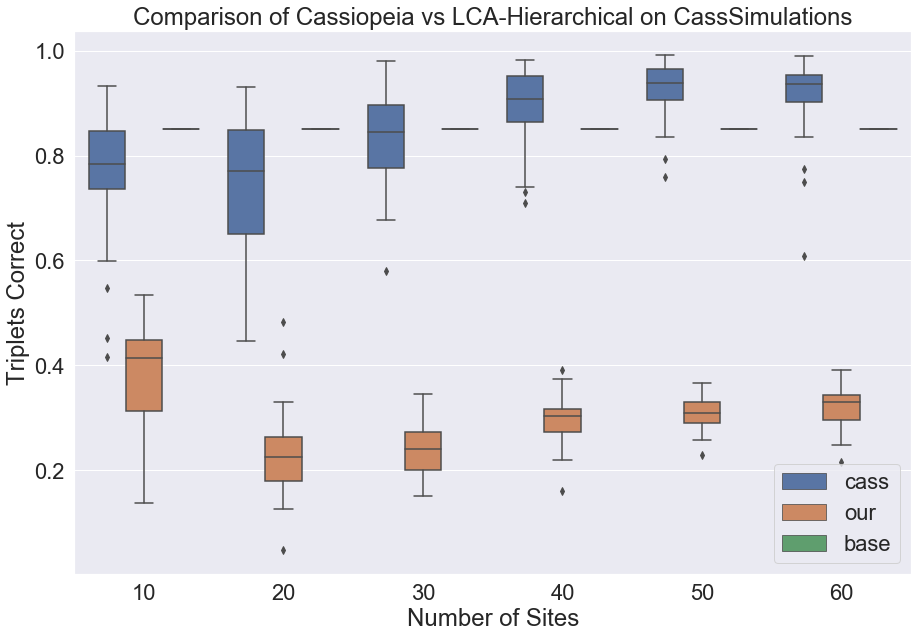

In [31]:
sns.boxplot(x='n_chars', y='value', hue='variable', data=xx)
plt.ylabel('Triplets Correct')
plt.xlabel('Number of Sites')
plt.title('Comparison of Cassiopeia vs LCA-Hierarchical on CassSimulations')
plt.legend()

In [38]:
results = {'cass':[],'our':[],'base':[], 'cass_t':[],'our_t':[],'n_chars':[]}

for d in ['dispersed_indels','dropout_multiplier','one_minus_mutation_rate','states','depth_of_tree']:
    try:
        directory = '/Users/sitarapersad/benchmark_networks/400_samples/{0}/trees/'.format(d)
        priors_dir = '/'.join(directory.split('/')[:-2])+'/priors/'
        for f in os.listdir(directory):
            if f.endswith(".pkl"):
                true_network = nx.read_gpickle(directory+f)
                priors = nx.read_gpickle(priors_dir+f[:-4]+'_priors.pkl')

                new_priors = dict_to_dist(priors)

                G = true_network

                leaves = [x for x in G.nodes() if G.out_degree(x)==0]

                print('Tree contains {0} leaves.'.format(len(leaves)))
                
                if len(leaves) < 4000:
                    character_matrix = pd.DataFrame([x.char_vec for x in leaves]).replace('-', np.nan).astype(np.float64)

                    names = [x.name for x in leaves]
                    character_matrix.index = names 


                    cm = pd.DataFrame([x.char_vec for x in leaves]).astype(str)
                    cm.index = names 
                    cm_uniq = cm.drop_duplicates(inplace=False)
                    target_nodes = cm_uniq.values.tolist()
                    target_nodes = list(map(lambda x, n: Node(n,x), target_nodes, cm_uniq.index))

                    # # Why is the score_triplets not 1??
                    base_score = score_triplets(true_network, true_network, number_of_trials = 5000, min_size_depth = 20)
                    print('Baseline:', base_score)

                    t = time.time()
                    tree, steps = cluster_nx(character_matrix, new_priors)
                    our_time = time.time()-t

                    our_tree = Cassiopeia_Tree(method ='simulated', network = tree)
                    our_score = score_triplets(true_network, tree, number_of_trials = 5000, min_size_depth = 20)
                    print('Our Score:', our_score)
                    print('Our Time: ', our_time)


                    t = time.time()
                    reconstructed_network_greedy = solve_lineage_instance(target_nodes, 
                                                                          method="greedy", 
                                                                          prior_probabilities=priors)
                    cass_time = time.time()-t
                    cass_tree = reconstructed_network_greedy[0]
                    cass_score = score_triplets(true_network, cass_tree, number_of_trials = 5000, min_size_depth = 20)
                    print('Cassiopeia Score: ', cass_score)
                    print('Cassiopeia Time: ', cass_time)


                    results['cass'].append(cass_score)
                    results['our'].append(our_score)
                    results['base'].append(base_score)
                    results['cass_t'].append(cass_time)
                    results['our_t'].append(our_time)
                    results['n_chars'].append(cm.shape[1])
    except Exception as e:
        print('d:',d)
        print(e)


Tree contains 1055 leaves.
Baseline: 0.45644363008361244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.42it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.56it/s]


Our Score: 0.20560579045678384
Our Time:  75.9565999507904
Cassiopeia Score:  0.6899631348478611
Cassiopeia Time:  1.785325050354004
Tree contains 1066 leaves.
Baseline: 0.7481843158590634
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.27it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.74it/s]


Our Score: 0.27788588120560426
Our Time:  76.87018585205078
Cassiopeia Score:  0.9071911646678
Cassiopeia Time:  1.93510103225708
Tree contains 1062 leaves.
Baseline: 0.7257845368646114
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.73it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.24it/s] 


Our Score: 0.2652321332238135
Our Time:  76.31708097457886
Cassiopeia Score:  0.9553680460284917
Cassiopeia Time:  1.9840879440307617
Tree contains 1067 leaves.
Baseline: 0.7534682109462167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 28.59it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.87it/s]


Our Score: 0.2877663044827987
Our Time:  77.6262059211731
Cassiopeia Score:  0.8973289352799636
Cassiopeia Time:  1.888484001159668
Tree contains 1064 leaves.
Baseline: 0.7505652580481098
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.15it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.12it/s] 


Our Score: 0.2781454878816007
Our Time:  76.42914581298828
Cassiopeia Score:  0.8626422872779242
Cassiopeia Time:  1.9587900638580322
Tree contains 1058 leaves.
Baseline: 0.8091616354629152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.89it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.86it/s]


Our Score: 0.30558024825935176
Our Time:  80.54549717903137
Cassiopeia Score:  0.9691486788802225
Cassiopeia Time:  2.1805760860443115
Tree contains 1066 leaves.
Baseline: 0.8004466598139978
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.85it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 62.77it/s] 


Our Score: 0.2971136677538002
Our Time:  88.09300994873047
Cassiopeia Score:  0.9426129426129427
Cassiopeia Time:  3.030876874923706
Tree contains 1065 leaves.
Baseline: 0.8259830016683967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.31it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.51it/s]


Our Score: 0.3354111111134468
Our Time:  93.0198450088501
Cassiopeia Score:  0.9666576094852325
Cassiopeia Time:  2.387316942214966
Tree contains 1057 leaves.
Baseline: 0.7566547565359899
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:35, 29.37it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 71.12it/s]


Our Score: 0.22171521615489118
Our Time:  81.74498701095581
Cassiopeia Score:  0.8469198180338319
Cassiopeia Time:  2.173957109451294
Tree contains 1065 leaves.
Baseline: 0.49920155293320057
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 70.98it/s] 


Our Score: 0.12165223958635915
Our Time:  84.15088820457458
Cassiopeia Score:  0.8129603244604262
Cassiopeia Time:  2.139916181564331
Tree contains 1061 leaves.
Baseline: 0.675991807142415
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.98it/s]


Our Score: 0.26199878310320734
Our Time:  82.05041480064392
Cassiopeia Score:  0.9605953196040075
Cassiopeia Time:  1.950989007949829
Tree contains 1061 leaves.
Baseline: 0.8260403798173582
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.86it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.04it/s]


Our Score: 0.307746653281904
Our Time:  81.70504093170166
Cassiopeia Score:  0.8856792578184683
Cassiopeia Time:  2.004673957824707
Tree contains 1056 leaves.
Baseline: 0.801121272714409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.41it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.59it/s] 


Our Score: 0.3207684212787254
Our Time:  80.71409392356873
Cassiopeia Score:  0.9579744250122115
Cassiopeia Time:  2.0896542072296143
Tree contains 1054 leaves.
Baseline: 0.8886044296261014
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.24it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 72.85it/s]


Our Score: 0.3283295798034557
Our Time:  81.0691249370575
Cassiopeia Score:  0.9371016311754485
Cassiopeia Time:  2.4010958671569824
Tree contains 1060 leaves.
Baseline: 0.7347619047619047
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 27.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.21it/s]


Our Score: 0.28488015248004944
Our Time:  85.2411789894104
Cassiopeia Score:  0.9504790299713536
Cassiopeia Time:  2.4498817920684814
Tree contains 1070 leaves.
Baseline: 0.8045983205276399
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.24it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.56it/s]


Our Score: 0.3155974409502126
Our Time:  90.1576681137085
Cassiopeia Score:  0.8621682690693291
Cassiopeia Time:  2.328274965286255
Tree contains 1055 leaves.
Baseline: 0.7228240566050129
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.08it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.89it/s]


Our Score: 0.28104584695860885
Our Time:  81.86599493026733
Cassiopeia Score:  0.9484438516646989
Cassiopeia Time:  2.046515941619873
Tree contains 1061 leaves.
Baseline: 0.7787963076665405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.14it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.94it/s]


Our Score: 0.3031955983395169
Our Time:  83.49466800689697
Cassiopeia Score:  0.8806211064563937
Cassiopeia Time:  2.0827369689941406
Tree contains 1057 leaves.
Baseline: 0.7381267950172276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.62it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.16it/s] 


Our Score: 0.2515804365068992
Our Time:  82.51818084716797
Cassiopeia Score:  0.9455775365701836
Cassiopeia Time:  2.1610798835754395
Tree contains 1071 leaves.
Baseline: 0.875452022538054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 25.11it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.90it/s] 


Our Score: 0.2893383864331552
Our Time:  84.39594316482544
Cassiopeia Score:  0.9015189317223424
Cassiopeia Time:  2.2207071781158447
Tree contains 1060 leaves.
Baseline: 0.7194186581307507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.30it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.36it/s]


Our Score: 0.2877655868086394
Our Time:  82.76333498954773
Cassiopeia Score:  0.9328256360195206
Cassiopeia Time:  2.089573860168457
Tree contains 1057 leaves.
Baseline: 0.7870645888623583
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.11it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.83it/s]


Our Score: 0.2922005859620698
Our Time:  82.36550784111023
Cassiopeia Score:  0.797443551104071
Cassiopeia Time:  2.0620229244232178
Tree contains 1058 leaves.
Baseline: 0.8813197919225615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.40it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.45it/s]


Our Score: 0.29086659041944163
Our Time:  83.83175468444824
Cassiopeia Score:  0.9402167197745078
Cassiopeia Time:  2.0582802295684814
Tree contains 1062 leaves.
Baseline: 0.642393272230574
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.87it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.56it/s]


Our Score: 0.2501646237297482
Our Time:  82.9635877609253
Cassiopeia Score:  0.8439313718356999
Cassiopeia Time:  2.183897018432617
Tree contains 1066 leaves.
Baseline: 0.7094284921195854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 25.91it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.04it/s]


Our Score: 0.2706306662315043
Our Time:  83.75352191925049
Cassiopeia Score:  0.9225615533154284
Cassiopeia Time:  2.07075834274292
Tree contains 1066 leaves.
Baseline: 0.7311816578483245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:43, 24.67it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.56it/s] 


Our Score: 0.255027929125228
Our Time:  85.01865601539612
Cassiopeia Score:  0.9518061914751718
Cassiopeia Time:  2.0766761302948
Tree contains 1056 leaves.
Baseline: 0.8277802016649778
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 70.43it/s]


Our Score: 0.36453984897488323
Our Time:  82.74909329414368
Cassiopeia Score:  0.9201246004943392
Cassiopeia Time:  2.2008590698242188
Tree contains 1064 leaves.
Baseline: 0.9379391100702577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.01it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.71it/s]


Our Score: 0.3788567694566948
Our Time:  83.50309824943542
Cassiopeia Score:  0.9209880467842252
Cassiopeia Time:  2.232538938522339
Tree contains 1062 leaves.
Baseline: 0.9057934432114674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.37it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.74it/s]


Our Score: 0.36810588514180287
Our Time:  82.9501039981842
Cassiopeia Score:  0.9505019232573413
Cassiopeia Time:  2.293231248855591
Tree contains 1056 leaves.
Baseline: 0.8560974209510179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.31it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.90it/s]


Our Score: 0.39575298600158937
Our Time:  83.63668608665466
Cassiopeia Score:  0.9562742369504489
Cassiopeia Time:  2.3278138637542725
Tree contains 1066 leaves.
Baseline: 0.6893241864866914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.03it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.67it/s]


Our Score: 0.25313086207988933
Our Time:  86.89354205131531
Cassiopeia Score:  0.9433403551978862
Cassiopeia Time:  2.087368965148926
Tree contains 1066 leaves.
Baseline: 0.7707507300695345
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.48it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.59it/s]


Our Score: 0.28568543806039104
Our Time:  84.4258279800415
Cassiopeia Score:  0.9144889309510308
Cassiopeia Time:  2.118975877761841
Tree contains 1063 leaves.
Baseline: 0.807967162736229
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.37it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.75it/s] 


Our Score: 0.3621919589567146
Our Time:  83.15776705741882
Cassiopeia Score:  0.9413693981899659
Cassiopeia Time:  2.0851569175720215
Tree contains 1066 leaves.
Baseline: 0.7452429641554449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.49it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.35it/s] 


Our Score: 0.2868748127209772
Our Time:  83.40469813346863
Cassiopeia Score:  0.9342517358010834
Cassiopeia Time:  2.1253459453582764
Tree contains 1061 leaves.
Baseline: 0.7960798137351706
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:34, 30.35it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.36it/s] 


Our Score: 0.2875947580001422
Our Time:  87.61926603317261
Cassiopeia Score:  0.9545278393168403
Cassiopeia Time:  3.4856321811676025
Tree contains 1059 leaves.
Baseline: 0.6807586076543051
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.68it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.33it/s]


Our Score: 0.25453076661624513
Our Time:  111.60073113441467
Cassiopeia Score:  0.911469356269888
Cassiopeia Time:  2.1623799800872803
Tree contains 1058 leaves.
Baseline: 0.7205081065454433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.37it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.86it/s] 


Our Score: 0.20528154448312916
Our Time:  82.48039603233337
Cassiopeia Score:  0.8790544764041451
Cassiopeia Time:  1.9903309345245361
Tree contains 1069 leaves.
Baseline: 0.6010781690970618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.40it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.31it/s] 


Our Score: 0.23792523620958136
Our Time:  85.41937613487244
Cassiopeia Score:  0.9107354432303124
Cassiopeia Time:  2.445054054260254
Tree contains 1062 leaves.
Baseline: 0.666069433599266
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.51it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.70it/s]


Our Score: 0.22837749529179052
Our Time:  82.80653166770935
Cassiopeia Score:  0.7961972628996189
Cassiopeia Time:  2.000685930252075
Tree contains 1066 leaves.
Baseline: 0.8694288665879575
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.24it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.44it/s]


Our Score: 0.3726276445684805
Our Time:  83.44220805168152
Cassiopeia Score:  0.9805172239834355
Cassiopeia Time:  2.1911187171936035
Tree contains 1071 leaves.
Baseline: 0.843825132589005
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.69it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.10it/s] 


Our Score: 0.3157107667102525
Our Time:  83.32799482345581
Cassiopeia Score:  0.9048042651675413
Cassiopeia Time:  2.017563819885254
Tree contains 1059 leaves.
Baseline: 0.8136582091161677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:35, 29.92it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 76.73it/s] 


Our Score: 0.2745702549817036
Our Time:  80.2548999786377
Cassiopeia Score:  0.9244577240705629
Cassiopeia Time:  2.0818910598754883
Tree contains 1068 leaves.
Baseline: 0.7715854452314747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.81it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.72it/s]


Our Score: 0.27854701925883263
Our Time:  83.92569088935852
Cassiopeia Score:  0.9036009866426701
Cassiopeia Time:  2.1692490577697754
Tree contains 1056 leaves.
Baseline: 0.9001519018106696
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.96it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.45it/s]


Our Score: 0.3336659879445306
Our Time:  82.1072940826416
Cassiopeia Score:  0.9317780371238709
Cassiopeia Time:  2.0676522254943848
Tree contains 1062 leaves.
Baseline: 0.8662789276784539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.58it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.74it/s]


Our Score: 0.35657592325570014
Our Time:  82.58746814727783
Cassiopeia Score:  0.9213052772063512
Cassiopeia Time:  2.160828113555908
Tree contains 1068 leaves.
Baseline: 0.6425984908864318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.62it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.90it/s]


Our Score: 0.23611337076661787
Our Time:  83.55558609962463
Cassiopeia Score:  0.7891974620485541
Cassiopeia Time:  1.9968960285186768
Tree contains 1057 leaves.
Baseline: 0.8521982374141972
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.16it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.17it/s]


Our Score: 0.2991479155150008
Our Time:  82.81335401535034
Cassiopeia Score:  0.9352861022852721
Cassiopeia Time:  2.119014024734497
Tree contains 1061 leaves.
Baseline: 0.8111371935315597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.19it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.00it/s] 


Our Score: 0.2952594014759099
Our Time:  83.31674599647522
Cassiopeia Score:  0.9564740380453411
Cassiopeia Time:  2.211620807647705
Tree contains 1062 leaves.
Baseline: 0.7335194039066476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.14it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.10it/s]


Our Score: 0.2822365788968184
Our Time:  83.28865194320679
Cassiopeia Score:  0.8720300281871173
Cassiopeia Time:  2.055629014968872
Tree contains 1062 leaves.
Baseline: 0.9045212765957447
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.11it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.40it/s] 


Our Score: 0.3495659407138536
Our Time:  83.17833685874939
Cassiopeia Score:  0.9493229093955047
Cassiopeia Time:  2.1243550777435303
Tree contains 1063 leaves.
Baseline: 0.8479350522721762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.02it/s] 


Our Score: 0.2902065658450668
Our Time:  83.16041612625122
Cassiopeia Score:  0.9467339703083225
Cassiopeia Time:  2.1965887546539307
Tree contains 1073 leaves.
Baseline: 0.8125502347228823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.78it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.21it/s] 


Our Score: 0.3014344335875079
Our Time:  84.79574775695801
Cassiopeia Score:  0.9273494303922812
Cassiopeia Time:  2.161041021347046
Tree contains 1075 leaves.
Baseline: 0.7935702280245083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 25.52it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 71.58it/s]


Our Score: 0.29409047050241677
Our Time:  85.74828600883484
Cassiopeia Score:  0.8488404242713004
Cassiopeia Time:  2.071038007736206
Tree contains 1064 leaves.
Baseline: 0.9517679677372893
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.78it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.04it/s]


Our Score: 0.3817569658741204
Our Time:  84.07167911529541
Cassiopeia Score:  0.9814642709624122
Cassiopeia Time:  2.2360877990722656
Tree contains 1055 leaves.
Baseline: 0.7632036625604119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.79it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 77.30it/s] 


Our Score: 0.30222147633489704
Our Time:  80.90656805038452
Cassiopeia Score:  0.9370867161072518
Cassiopeia Time:  1.9910459518432617
Tree contains 1061 leaves.
Baseline: 0.7575087759467947
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.63it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.24it/s] 


Our Score: 0.2543837228680991
Our Time:  82.44307398796082
Cassiopeia Score:  0.9446187939794501
Cassiopeia Time:  2.0832347869873047
Tree contains 1063 leaves.
Baseline: 0.8164684141593556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.57it/s]


Our Score: 0.3151640369853742
Our Time:  83.59493613243103
Cassiopeia Score:  0.9049848881710743
Cassiopeia Time:  2.0830349922180176
Tree contains 1066 leaves.
Baseline: 0.7593294246206868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.59it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.31it/s] 


Our Score: 0.2877033876211508
Our Time:  84.16463494300842
Cassiopeia Score:  0.8670894929088981
Cassiopeia Time:  2.071061134338379
Tree contains 1070 leaves.
Baseline: 0.6939872498479344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.09it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.18it/s] 


Our Score: 0.23256592228459236
Our Time:  101.94077706336975
Cassiopeia Score:  0.9015285509288686
Cassiopeia Time:  2.2719249725341797
Tree contains 1068 leaves.
Baseline: 0.7989018968747574
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.07it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.85it/s] 


Our Score: 0.2590582900231775
Our Time:  84.69658493995667
Cassiopeia Score:  0.9080878451514315
Cassiopeia Time:  2.106131076812744
Tree contains 1061 leaves.
Baseline: 0.7418379384842799
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.55it/s]


Our Score: 0.2638252560153638
Our Time:  92.974369764328
Cassiopeia Score:  0.8828286055096068
Cassiopeia Time:  2.331845760345459
Tree contains 1065 leaves.
Baseline: 0.8252711814717092
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.35it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.26it/s] 


Our Score: 0.29794144960479435
Our Time:  88.73658084869385
Cassiopeia Score:  0.9106224872236154
Cassiopeia Time:  2.111499071121216
Tree contains 1069 leaves.
Baseline: 0.8799338381194688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.45it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.48it/s] 


Our Score: 0.34468749316983543
Our Time:  86.40571212768555
Cassiopeia Score:  0.9373130955675432
Cassiopeia Time:  2.255527973175049
Tree contains 1065 leaves.
Baseline: 0.8243779248713361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.09it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.35it/s] 


Our Score: 0.34506018441426406
Our Time:  85.71544098854065
Cassiopeia Score:  0.955046590757004
Cassiopeia Time:  1.9553861618041992
Tree contains 1057 leaves.
Baseline: 0.8783213951751789
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.49it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.84it/s]


Our Score: 0.3738409253469042
Our Time:  83.20954895019531
Cassiopeia Score:  0.9108704698499471
Cassiopeia Time:  2.157531976699829
Tree contains 1066 leaves.
Baseline: 0.5356138964928074
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.72it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.27it/s]


Our Score: 0.24481718898385565
Our Time:  86.36882495880127
Cassiopeia Score:  0.9226545396611187
Cassiopeia Time:  2.3373799324035645
Tree contains 1067 leaves.
Baseline: 0.744829573952395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.65it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.65it/s]


Our Score: 0.24900839959921323
Our Time:  86.36177778244019
Cassiopeia Score:  0.7745773657561043
Cassiopeia Time:  1.9372317790985107
Tree contains 1064 leaves.
Baseline: 0.8271902582543315
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.52it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.37it/s]


Our Score: 0.3187365493780966
Our Time:  84.00718426704407
Cassiopeia Score:  0.9186405506630226
Cassiopeia Time:  2.1431801319122314
Tree contains 1057 leaves.
Baseline: 0.6012743252314233
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.81it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.43it/s]


Our Score: 0.23979179913683568
Our Time:  82.97436738014221
Cassiopeia Score:  0.9207995608887939
Cassiopeia Time:  2.0913710594177246
Tree contains 1071 leaves.
Baseline: 0.8009479657447065
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.93it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.34it/s] 


Our Score: 0.32348608367698545
Our Time:  87.86143898963928
Cassiopeia Score:  0.923545115637903
Cassiopeia Time:  2.23327898979187
Tree contains 1059 leaves.
Baseline: 0.6632907447777361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.80it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.81it/s] 


Our Score: 0.31740156164903544
Our Time:  87.57541823387146
Cassiopeia Score:  0.873258675533019
Cassiopeia Time:  2.3376080989837646
Tree contains 1072 leaves.
Baseline: 0.7702383300578837
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.93it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.68it/s]


Our Score: 0.2618558949246738
Our Time:  87.76893186569214
Cassiopeia Score:  0.8707137382435818
Cassiopeia Time:  2.141860008239746
Tree contains 1050 leaves.
Baseline: 0.9188013136288998
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:38, 27.04it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:14<00:00, 71.49it/s] 


Our Score: 0.32992891328376506
Our Time:  85.16054010391235
Cassiopeia Score:  0.9266706011476669
Cassiopeia Time:  2.271242141723633
Tree contains 1066 leaves.
Baseline: 0.8060899897593446
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.13it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.52it/s] 


Our Score: 0.28525958357855075
Our Time:  86.80620002746582
Cassiopeia Score:  0.8870536620004058
Cassiopeia Time:  2.161025047302246
Tree contains 1062 leaves.
Baseline: 0.7542250227525533
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:42, 24.80it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.39it/s] 


Our Score: 0.2866984661538853
Our Time:  88.335618019104
Cassiopeia Score:  0.8294222443943577
Cassiopeia Time:  2.3841450214385986
Tree contains 1067 leaves.
Baseline: 0.7536838160068563
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.41it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 68.92it/s]


Our Score: 0.2664882523292044
Our Time:  89.27508211135864
Cassiopeia Score:  0.9057449275317188
Cassiopeia Time:  2.272024154663086
Tree contains 1057 leaves.
Baseline: 0.9324430199430199
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.44it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 69.17it/s]


Our Score: 0.37713433617027114
Our Time:  87.47530484199524
Cassiopeia Score:  0.941115700981678
Cassiopeia Time:  2.415006160736084
Tree contains 1064 leaves.
Baseline: 0.8650670841611148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.25it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.44it/s] 


Our Score: 0.2659905674398558
Our Time:  88.84141802787781
Cassiopeia Score:  0.8706047428949162
Cassiopeia Time:  2.1839332580566406
Tree contains 1064 leaves.
Baseline: 0.7018822580217806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.00it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.09it/s] 


Our Score: 0.25630175231254687
Our Time:  94.2293438911438
Cassiopeia Score:  0.9159830949722682
Cassiopeia Time:  4.020600080490112
Tree contains 1070 leaves.
Baseline: 0.9476343739942066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.13it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:16<00:00, 63.49it/s] 


Our Score: 0.3966527079195327
Our Time:  102.40046787261963
Cassiopeia Score:  0.9400336863363856
Cassiopeia Time:  2.740504026412964
Tree contains 1068 leaves.
Baseline: 0.8261941325730857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:45, 23.22it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 66.21it/s]


Our Score: 0.32107033509948185
Our Time:  95.41468596458435
Cassiopeia Score:  0.7500066141628934
Cassiopeia Time:  2.4190688133239746
Tree contains 1062 leaves.
Baseline: 0.7176533631125785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.78it/s]


Our Score: 0.2556779400654029
Our Time:  90.77757215499878
Cassiopeia Score:  0.8871767760330856
Cassiopeia Time:  2.45635724067688
Tree contains 1060 leaves.
Baseline: 0.7601312892786862
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.82it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.69it/s] 


Our Score: 0.2663259054948631
Our Time:  89.5653510093689
Cassiopeia Score:  0.9470795709369758
Cassiopeia Time:  2.21584415435791
Tree contains 1060 leaves.
Baseline: 0.7887045039665306
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 65.68it/s]


Our Score: 0.30831125301641144
Our Time:  95.6793429851532
Cassiopeia Score:  0.9494644856204366
Cassiopeia Time:  2.149616241455078
Tree contains 1072 leaves.
Baseline: 0.8150676376319759
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:44, 24.12it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:16<00:00, 64.34it/s] 


Our Score: 0.3186269028938123
Our Time:  92.02831220626831
Cassiopeia Score:  0.9367929683525632
Cassiopeia Time:  3.4585788249969482
Tree contains 1061 leaves.
Baseline: 0.7442006407399258
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:26<00:00, 40.09it/s]


Our Score: 0.2503614262116302
Our Time:  116.02543115615845
Cassiopeia Score:  0.9182496038850134
Cassiopeia Time:  2.7801079750061035
Tree contains 1063 leaves.
Baseline: 0.636357453536296
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 53.82it/s]


Our Score: 0.26781508655918945
Our Time:  115.43463397026062
Cassiopeia Score:  0.8663832689697548
Cassiopeia Time:  3.1519742012023926
Tree contains 1060 leaves.
Baseline: 0.8348347816986573
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 25.90it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.74it/s]


Our Score: 0.28020161022024087
Our Time:  117.82733726501465
Cassiopeia Score:  0.980639647576495
Cassiopeia Time:  3.485377073287964
Tree contains 1070 leaves.
Baseline: 0.6898339377112962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 24.80it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:17<00:00, 62.66it/s] 


Our Score: 0.26764149977078616
Our Time:  135.89283394813538
Cassiopeia Score:  0.8872457356386771
Cassiopeia Time:  2.245638847351074
Tree contains 1062 leaves.
Baseline: 0.9054678061721416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.15it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.74it/s] 


Our Score: 0.3723374000925968
Our Time:  100.5297908782959
Cassiopeia Score:  0.8025180618441083
Cassiopeia Time:  2.7715959548950195
Tree contains 1060 leaves.
Baseline: 0.7293894232045491
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.61it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.48it/s] 


Our Score: 0.2485686185049194
Our Time:  93.07542514801025
Cassiopeia Score:  0.8368521292689873
Cassiopeia Time:  2.009443759918213
Tree contains 1061 leaves.
Baseline: 0.6965816429775957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.14it/s] 


Our Score: 0.26251978680107607
Our Time:  86.55347990989685
Cassiopeia Score:  0.8661869847069426
Cassiopeia Time:  2.1021668910980225
Tree contains 1072 leaves.
Baseline: 0.9118055555555555
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:37, 28.31it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.50it/s] 


Our Score: 0.3361747068024482
Our Time:  85.7450361251831
Cassiopeia Score:  0.9686370695379592
Cassiopeia Time:  2.214354991912842
Tree contains 1062 leaves.
Baseline: 0.805583743192744
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.72it/s]


Our Score: 0.32505876446396714
Our Time:  86.29842114448547
Cassiopeia Score:  0.8194677376634512
Cassiopeia Time:  2.4561848640441895
Tree contains 1070 leaves.
Baseline: 0.6820489535394709
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:44, 23.94it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.22it/s]


Our Score: 0.26589535572346973
Our Time:  90.4615581035614
Cassiopeia Score:  0.8518345133923676
Cassiopeia Time:  2.080644130706787
Tree contains 1064 leaves.
Baseline: 0.8273742081544151
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.91it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.73it/s]


Our Score: 0.300706031837361
Our Time:  84.076651096344
Cassiopeia Score:  0.9437227652642018
Cassiopeia Time:  2.0451560020446777
Tree contains 1057 leaves.
Baseline: 0.7714699766870393
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.58it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.36it/s] 


Our Score: 0.26883438538990495
Our Time:  83.12754201889038
Cassiopeia Score:  0.858027421676538
Cassiopeia Time:  2.043516159057617
Tree contains 1059 leaves.
Baseline: 0.5864473327917682
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.11it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.75it/s]


Our Score: 0.26974488318984463
Our Time:  88.57187414169312
Cassiopeia Score:  0.7048438863454343
Cassiopeia Time:  2.3351118564605713
Tree contains 1068 leaves.
Baseline: 0.6411711459862027
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.78it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 67.79it/s]


Our Score: 0.18521781007539959
Our Time:  86.7773790359497
Cassiopeia Score:  0.8964725865568063
Cassiopeia Time:  2.2310047149658203
Tree contains 1068 leaves.
Baseline: 0.7805107808247854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.00it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 67.70it/s]


Our Score: 0.2991134416204043
Our Time:  87.03089690208435
Cassiopeia Score:  0.9062625176173875
Cassiopeia Time:  2.348836898803711
Tree contains 1066 leaves.
Baseline: 0.7967269215726507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.45it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.58it/s] 


Our Score: 0.27746162970084653
Our Time:  86.40985703468323
Cassiopeia Score:  0.895814397825088
Cassiopeia Time:  2.3418540954589844
Tree contains 1063 leaves.
Baseline: 0.7589349193327865
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.86it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.37it/s] 


Our Score: 0.2846961327913992
Our Time:  86.55159282684326
Cassiopeia Score:  0.8685581885811189
Cassiopeia Time:  2.142091751098633
Tree contains 1067 leaves.
Baseline: 0.866817275419226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:20<00:00, 52.71it/s] 


Our Score: 0.2827506083878334
Our Time:  112.92895603179932
Cassiopeia Score:  0.8761264142361703
Cassiopeia Time:  2.316725015640259
Tree contains 1064 leaves.
Baseline: 0.8668104242314734
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.85it/s]


Our Score: 0.3099654012885803
Our Time:  100.30443501472473
Cassiopeia Score:  0.935912420134019
Cassiopeia Time:  2.7573821544647217
Tree contains 1060 leaves.
Baseline: 0.7924863773754615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.88it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.08it/s] 


Our Score: 0.25979185753417605
Our Time:  89.08063888549805
Cassiopeia Score:  0.9498006427780906
Cassiopeia Time:  2.4168269634246826
Tree contains 1055 leaves.
Baseline: 0.942043974565234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:40, 26.08it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:16<00:00, 62.27it/s]


Our Score: 0.39533330396072436
Our Time:  95.94903612136841
Cassiopeia Score:  0.9307047534629156
Cassiopeia Time:  2.5506019592285156
Tree contains 1066 leaves.
Baseline: 0.7330698129410599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:43, 24.23it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.03it/s]


Our Score: 0.30032381870628116
Our Time:  95.74304819107056
Cassiopeia Score:  0.9340136245800063
Cassiopeia Time:  2.5354480743408203
Tree contains 1059 leaves.
Baseline: 0.6988111185991212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 25.04it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 60.34it/s]


Our Score: 0.3432412019740787
Our Time:  105.53838586807251
Cassiopeia Score:  0.914966784533812
Cassiopeia Time:  3.043097972869873
Tree contains 1068 leaves.
Baseline: 0.6704951120540161
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 60.54it/s] 


Our Score: 0.23784024539824303
Our Time:  99.45791888237
Cassiopeia Score:  0.8283931895515804
Cassiopeia Time:  2.38887095451355
Tree contains 1061 leaves.
Baseline: 0.7427662683344501
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:44, 23.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 60.16it/s]


Our Score: 0.2772426760509925
Our Time:  104.85182785987854
Cassiopeia Score:  0.8426611759868639
Cassiopeia Time:  2.4005229473114014
Tree contains 1067 leaves.
Baseline: 0.6425475542612654
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 59.37it/s] 


Our Score: 0.24358615244305837
Our Time:  107.66556286811829
Cassiopeia Score:  0.8992517431231585
Cassiopeia Time:  2.8615589141845703
Tree contains 1059 leaves.
Baseline: 0.8236145079931716
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 59.57it/s]


Our Score: 0.2823747432182473
Our Time:  110.70089340209961
Cassiopeia Score:  0.8634832916645939
Cassiopeia Time:  2.6770238876342773
Tree contains 1066 leaves.
Baseline: 0.7398296997470937
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 59.34it/s]


Our Score: 0.2670885237721101
Our Time:  106.70742225646973
Cassiopeia Score:  0.86517090012943
Cassiopeia Time:  2.660133123397827
Tree contains 1058 leaves.
Baseline: 0.8304201637534971
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 59.44it/s]


Our Score: 0.3621921516637105
Our Time:  104.45746779441833
Cassiopeia Score:  0.720275686462243
Cassiopeia Time:  2.6883859634399414
Tree contains 1062 leaves.
Baseline: 0.7854928308350543
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:18<00:00, 58.14it/s] 


Our Score: 0.28340536233233654
Our Time:  104.32772040367126
Cassiopeia Score:  0.9409790795611285
Cassiopeia Time:  2.954454183578491
Tree contains 1061 leaves.
Baseline: 0.773732130998567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.12it/s] 


Our Score: 0.31266044862340353
Our Time:  105.206716299057
Cassiopeia Score:  0.9260723154438496
Cassiopeia Time:  2.7962701320648193
Tree contains 1061 leaves.
Baseline: 0.7451581764731693
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.68it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 60.76it/s]


Our Score: 0.27767204104872717
Our Time:  103.17079377174377
Cassiopeia Score:  0.9228474479922584
Cassiopeia Time:  2.5184500217437744
Tree contains 1056 leaves.
Baseline: 0.8562538754539818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:44, 23.64it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.90it/s]


Our Score: 0.3651545765141591
Our Time:  98.74631595611572
Cassiopeia Score:  0.95366687111189
Cassiopeia Time:  2.195728063583374
Tree contains 1067 leaves.
Baseline: 0.7485565698198768
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.49it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.83it/s]


Our Score: 0.29614691926149556
Our Time:  84.13086891174316
Cassiopeia Score:  0.8800074967002134
Cassiopeia Time:  1.9255969524383545
Tree contains 1067 leaves.
Baseline: 0.8561500835858648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.60it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.27it/s]


Our Score: 0.33960342681307865
Our Time:  83.77005791664124
Cassiopeia Score:  0.8036256980258134
Cassiopeia Time:  1.9370508193969727
Tree contains 1062 leaves.
Baseline: 0.7529239836058361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.75it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.89it/s]


Our Score: 0.27166972330704736
Our Time:  83.03897500038147
Cassiopeia Score:  0.8360696574907998
Cassiopeia Time:  1.9486026763916016
Tree contains 1061 leaves.
Baseline: 0.8070106063983936
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.57it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.79it/s] 


Our Score: 0.2513611970058764
Our Time:  82.9427740573883
Cassiopeia Score:  0.92587686367601
Cassiopeia Time:  2.2167208194732666
Tree contains 1065 leaves.
Baseline: 0.7777867561089492
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.86it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.12it/s] 


Our Score: 0.3066942384634616
Our Time:  84.71889781951904
Cassiopeia Score:  0.9060152807796586
Cassiopeia Time:  2.0408308506011963
Tree contains 1063 leaves.
Baseline: 0.7755941032275637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.28it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.05it/s]


Our Score: 0.2675384769850196
Our Time:  83.01454877853394
Cassiopeia Score:  0.8977535138725637
Cassiopeia Time:  2.283446788787842
Tree contains 1069 leaves.
Baseline: 0.7523111050710364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:37, 28.13it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.74it/s]


Our Score: 0.23167062977928313
Our Time:  84.3920350074768
Cassiopeia Score:  0.938992056915694
Cassiopeia Time:  1.9945249557495117
Tree contains 1064 leaves.
Baseline: 0.6978898976988308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.98it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.56it/s]


Our Score: 0.27654238034627904
Our Time:  82.80734086036682
Cassiopeia Score:  0.9174430494969914
Cassiopeia Time:  2.0440990924835205
Tree contains 1062 leaves.
Baseline: 0.7904767934270318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.81it/s]


Our Score: 0.34104022706480613
Our Time:  86.76983499526978
Cassiopeia Score:  0.925195043158799
Cassiopeia Time:  2.1257941722869873
Tree contains 1072 leaves.
Baseline: 0.6133661755296226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.43it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 67.46it/s] 


Our Score: 0.18646221585655096
Our Time:  87.57091403007507
Cassiopeia Score:  0.9359321516241388
Cassiopeia Time:  2.0699760913848877
Tree contains 1059 leaves.
Baseline: 0.7897821487065239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:35, 29.80it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.16it/s]


Our Score: 0.2931779376734375
Our Time:  82.77907991409302
Cassiopeia Score:  0.940945492120899
Cassiopeia Time:  2.115568161010742
Tree contains 1068 leaves.
Baseline: 0.776271156464395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.50it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.86it/s]


Our Score: 0.2839199982116544
Our Time:  83.46726512908936
Cassiopeia Score:  0.9015535955164792
Cassiopeia Time:  2.0402979850769043
Tree contains 1062 leaves.
Baseline: 0.8000500353510632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.69it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.86it/s] 


Our Score: 0.31504046141799547
Our Time:  83.11183619499207
Cassiopeia Score:  0.9297249674404351
Cassiopeia Time:  2.1089980602264404
Tree contains 1067 leaves.
Baseline: 0.8681155994379777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 27.99it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.55it/s] 


Our Score: 0.32304171436878737
Our Time:  83.56889915466309
Cassiopeia Score:  0.8724731746004272
Cassiopeia Time:  2.1984810829162598
Tree contains 1057 leaves.
Baseline: 0.897425035065772
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.18it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.06it/s] 


Our Score: 0.30567148902206537
Our Time:  82.84245920181274
Cassiopeia Score:  0.9405555555555556
Cassiopeia Time:  2.104802131652832
Tree contains 1071 leaves.
Baseline: 0.7331346323393662
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.70it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.78it/s]


Our Score: 0.25509904555630736
Our Time:  84.92490601539612
Cassiopeia Score:  0.9432806703301598
Cassiopeia Time:  1.9754078388214111
Tree contains 1065 leaves.
Baseline: 0.6049185314320217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 24.01it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.60it/s]


Our Score: 0.2630465797542045
Our Time:  84.01823496818542
Cassiopeia Score:  0.6720227327319526
Cassiopeia Time:  1.9376740455627441
Tree contains 1058 leaves.
Baseline: 0.7017211127993632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.83it/s] 


Our Score: 0.25451905766828153
Our Time:  82.56715488433838
Cassiopeia Score:  0.8686292286669837
Cassiopeia Time:  2.2092199325561523
Tree contains 1061 leaves.
Baseline: 0.8401254290198514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.49it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.41it/s] 


Our Score: 0.2927484803450745
Our Time:  83.39949297904968
Cassiopeia Score:  0.9418612266856272
Cassiopeia Time:  2.0888900756835938
Tree contains 1061 leaves.
Baseline: 0.582439209333806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.62it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.39it/s] 


Our Score: 0.22212136474143152
Our Time:  82.10131883621216
Cassiopeia Score:  0.8666671652283163
Cassiopeia Time:  1.978830099105835
Tree contains 1067 leaves.
Baseline: 0.8032880802230545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.32it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.23it/s] 


Our Score: 0.2918330605741696
Our Time:  83.94960594177246
Cassiopeia Score:  0.8867320669913602
Cassiopeia Time:  2.133625030517578
Tree contains 1073 leaves.
Baseline: 0.911311475409836
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:38, 27.57it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 69.36it/s]


Our Score: 0.32238610594905615
Our Time:  86.10685420036316
Cassiopeia Score:  0.9535059473819417
Cassiopeia Time:  2.260124921798706
Tree contains 1056 leaves.
Baseline: 0.5638778638036962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.54it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 70.03it/s]


Our Score: 0.2901188594423176
Our Time:  82.83975076675415
Cassiopeia Score:  0.7205136091556671
Cassiopeia Time:  2.1559488773345947
Tree contains 1071 leaves.
Baseline: 0.5821451915229666
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.55it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.12it/s]


Our Score: 0.29402077158569456
Our Time:  84.93296194076538
Cassiopeia Score:  0.8479794923086686
Cassiopeia Time:  1.9625909328460693
Tree contains 1065 leaves.
Baseline: 0.7735203290674019
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.90it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.75it/s] 


Our Score: 0.2677820880554573
Our Time:  84.97845506668091
Cassiopeia Score:  0.9178604276554574
Cassiopeia Time:  2.0436947345733643
Tree contains 1068 leaves.
Baseline: 0.7556940609623823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.37it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.59it/s]


Our Score: 0.2695688384848167
Our Time:  84.52707600593567
Cassiopeia Score:  0.8439331637784002
Cassiopeia Time:  1.9762523174285889
Tree contains 1066 leaves.
Baseline: 0.749792861119228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.58it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.48it/s]


Our Score: 0.22913680526434319
Our Time:  85.19561076164246
Cassiopeia Score:  0.9148695089746112
Cassiopeia Time:  1.991804838180542
Tree contains 1065 leaves.
Baseline: 0.5726775786833541
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.80it/s] 


Our Score: 0.21570890385550712
Our Time:  83.9946141242981
Cassiopeia Score:  0.8965149133287221
Cassiopeia Time:  2.267397880554199
Tree contains 1066 leaves.
Baseline: 0.7907360286495146
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.50it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.60it/s]


Our Score: 0.34650356720140724
Our Time:  84.58005976676941
Cassiopeia Score:  0.9134887549550474
Cassiopeia Time:  1.951686143875122
Tree contains 1068 leaves.
Baseline: 0.7430440576908067
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.05it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.61it/s]


Our Score: 0.2601110290250302
Our Time:  85.22380900382996
Cassiopeia Score:  0.8062649608172086
Cassiopeia Time:  2.05989408493042
Tree contains 1063 leaves.
Baseline: 0.7636422803913194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.12it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 70.82it/s] 


Our Score: 0.2894851498869171
Our Time:  84.32816410064697
Cassiopeia Score:  0.9091128443816404
Cassiopeia Time:  2.1452040672302246
Tree contains 1069 leaves.
Baseline: 0.8376399876208942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.26it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.98it/s]


Our Score: 0.30324733856392494
Our Time:  85.64964008331299
Cassiopeia Score:  0.9315141961141569
Cassiopeia Time:  2.11167311668396
Tree contains 1064 leaves.
Baseline: 0.7515200077700077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.08it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 70.86it/s]


Our Score: 0.3492949351622029
Our Time:  84.33665490150452
Cassiopeia Score:  0.9245502718476857
Cassiopeia Time:  2.320667028427124
Tree contains 1055 leaves.
Baseline: 0.6423171652739933
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.73it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 72.09it/s]


Our Score: 0.1863153916174434
Our Time:  84.1436939239502
Cassiopeia Score:  0.8532821100496012
Cassiopeia Time:  1.9532861709594727
Tree contains 1063 leaves.
Baseline: 0.7556302088906326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 53.75it/s] 


Our Score: 0.30646306334497747
Our Time:  92.18841505050659
Cassiopeia Score:  0.9171383531368059
Cassiopeia Time:  3.8214728832244873
Tree contains 1063 leaves.
Baseline: 0.7919810451585537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.79it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 67.78it/s]


Our Score: 0.3196649894808491
Our Time:  108.47594118118286
Cassiopeia Score:  0.9132824250876762
Cassiopeia Time:  2.4614768028259277
Tree contains 1059 leaves.
Baseline: 0.8121372031662268
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.05it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 61.74it/s] 


Our Score: 0.30312953097248563
Our Time:  100.4250180721283
Cassiopeia Score:  0.6988642709878665
Cassiopeia Time:  2.7280147075653076
Tree contains 1065 leaves.
Baseline: 0.8387254901960784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 23.57it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 59.96it/s] 


Our Score: 0.2939993939634856
Our Time:  112.27988314628601
Cassiopeia Score:  0.8563022310137716
Cassiopeia Time:  2.9976980686187744
Tree contains 1058 leaves.
Baseline: 0.8388949464661609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 24.63it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:18<00:00, 57.67it/s] 


Our Score: 0.33868110323795686
Our Time:  104.7310380935669
Cassiopeia Score:  0.9191963209204589
Cassiopeia Time:  3.2770299911499023
Tree contains 1064 leaves.
Baseline: 0.657978806749249
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:45, 23.26it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:19<00:00, 55.88it/s] 


Our Score: 0.22916054833909305
Our Time:  118.56903910636902
Cassiopeia Score:  0.7984635391997023
Cassiopeia Time:  3.2878968715667725
Tree contains 1057 leaves.
Baseline: 0.8482970794696247
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:44, 23.54it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:18<00:00, 56.62it/s]


Our Score: 0.3028564906009609
Our Time:  116.08254218101501
Cassiopeia Score:  0.9116057715201733
Cassiopeia Time:  3.118354320526123
Tree contains 1065 leaves.
Baseline: 0.638716745741746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:19<00:00, 53.34it/s] 


Our Score: 0.2947118673672872
Our Time:  118.70602083206177
Cassiopeia Score:  0.8653982305418517
Cassiopeia Time:  3.3643839359283447
Tree contains 1058 leaves.
Baseline: 0.8335835612561882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:21<00:00, 48.81it/s] 


Our Score: 0.25381869686679265
Our Time:  126.95168375968933
Cassiopeia Score:  0.958454364016196
Cassiopeia Time:  3.635976791381836
Tree contains 1075 leaves.
Baseline: 0.7698877103668212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:19<00:00, 54.02it/s] 


Our Score: 0.24865520312933237
Our Time:  120.13837599754333
Cassiopeia Score:  0.9238159968724055
Cassiopeia Time:  3.0425379276275635
Tree contains 1074 leaves.
Baseline: 0.7272676331108278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:46, 23.16it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:18<00:00, 56.65it/s] 


Our Score: 0.2958349706248866
Our Time:  119.2522439956665
Cassiopeia Score:  0.8975469434612275
Cassiopeia Time:  3.027509927749634
Tree contains 1054 leaves.
Baseline: 0.7034899570506391
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:41, 25.24it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:17<00:00, 59.43it/s] 


Our Score: 0.2906668188357325
Our Time:  104.33708810806274
Cassiopeia Score:  0.8987372071236507
Cassiopeia Time:  2.7622110843658447
Tree contains 1066 leaves.
Baseline: 0.749950337388761
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:44, 23.71it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.33it/s] 


Our Score: 0.2541092313849435
Our Time:  106.43942093849182
Cassiopeia Score:  0.8780165204007292
Cassiopeia Time:  2.984018325805664
Tree contains 1063 leaves.
Baseline: 0.683050181017249
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.19it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 60.23it/s] 


Our Score: 0.21426240956120782
Our Time:  103.13736581802368
Cassiopeia Score:  0.9417153521583902
Cassiopeia Time:  2.715273141860962
Tree contains 1062 leaves.
Baseline: 0.8830985058755677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:43, 24.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.62it/s] 


Our Score: 0.3238614341938179
Our Time:  100.80983710289001
Cassiopeia Score:  0.9405604145626387
Cassiopeia Time:  2.643589973449707
Tree contains 1063 leaves.
Baseline: 0.5875676546391753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.84it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 64.51it/s] 


Our Score: 0.19831326747616107
Our Time:  102.55308389663696
Cassiopeia Score:  0.8439876427944727
Cassiopeia Time:  2.651676893234253
Tree contains 1061 leaves.
Baseline: 0.7133483458074753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 25.03it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 63.05it/s]


Our Score: 0.30901217231282974
Our Time:  100.73476886749268
Cassiopeia Score:  0.9572229647582043
Cassiopeia Time:  3.028733253479004
Tree contains 1066 leaves.
Baseline: 0.7586672151378034
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.43it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 64.36it/s] 


Our Score: 0.29017984668502733
Our Time:  102.68901109695435
Cassiopeia Score:  0.7663232657359081
Cassiopeia Time:  2.765177011489868
Tree contains 1075 leaves.
Baseline: 0.9006696527845726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:44, 24.30it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:17<00:00, 62.49it/s] 


Our Score: 0.29824934055104263
Our Time:  101.76942896842957
Cassiopeia Score:  0.8334415342788686
Cassiopeia Time:  2.62490177154541
Tree contains 1066 leaves.
Baseline: 0.7535946195310922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.68it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.24it/s] 


Our Score: 0.26231985222743726
Our Time:  99.20037889480591
Cassiopeia Score:  0.9604960812808189
Cassiopeia Time:  2.6308398246765137
Tree contains 1062 leaves.
Baseline: 0.8386415339586097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.40it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.70it/s] 


Our Score: 0.32816171553899876
Our Time:  98.68840503692627
Cassiopeia Score:  0.924955432135567
Cassiopeia Time:  2.7869601249694824
Tree contains 1068 leaves.
Baseline: 0.8295825280285353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.18it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 64.65it/s] 


Our Score: 0.29253891983784325
Our Time:  102.70523595809937
Cassiopeia Score:  0.8883877427968474
Cassiopeia Time:  2.791630983352661
Tree contains 1066 leaves.
Baseline: 0.7148793060652802
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:25<00:00, 42.32it/s] 


Our Score: 0.2151060444692875
Our Time:  146.33599424362183
Cassiopeia Score:  0.8195497511244039
Cassiopeia Time:  3.59999418258667
Tree contains 1063 leaves.
Baseline: 0.7541924519831982
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:26<00:00, 40.30it/s] 


Our Score: 0.2934233179111917
Our Time:  150.60810112953186
Cassiopeia Score:  0.8986765692899233
Cassiopeia Time:  4.012777805328369
Tree contains 1056 leaves.
Baseline: 0.8631119588989157
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:39, 26.92it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 68.05it/s] 


Our Score: 0.32039062673737084
Our Time:  107.55634117126465
Cassiopeia Score:  0.8936134103911599
Cassiopeia Time:  2.472440004348755
Tree contains 1062 leaves.
Baseline: 0.793251374812943
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.25it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.16it/s] 


Our Score: 0.28745911355538867
Our Time:  90.4046859741211
Cassiopeia Score:  0.7289933394890378
Cassiopeia Time:  2.4127252101898193
Tree contains 1066 leaves.
Baseline: 0.8948075161153104
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.02it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.80it/s] 


Our Score: 0.29838693500065994
Our Time:  90.10145616531372
Cassiopeia Score:  0.9060981628522332
Cassiopeia Time:  2.5170910358428955
Tree contains 1061 leaves.
Baseline: 0.8035665130676776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.28it/s] 


Our Score: 0.29646621795100697
Our Time:  89.09954571723938
Cassiopeia Score:  0.9785169966701771
Cassiopeia Time:  2.568247079849243
Tree contains 1067 leaves.
Baseline: 0.7166004005464142
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.31it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.18it/s]


Our Score: 0.32075988807140976
Our Time:  89.2023777961731
Cassiopeia Score:  0.9448952858176098
Cassiopeia Time:  2.451219081878662
Tree contains 1073 leaves.
Baseline: 0.6780291970352509
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.70it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.60it/s] 


Our Score: 0.2674929308466904
Our Time:  88.97597622871399
Cassiopeia Score:  0.8809917335327037
Cassiopeia Time:  2.2293949127197266
Tree contains 1059 leaves.
Baseline: 0.8891633466135458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.48it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.56it/s]


Our Score: 0.3148481845514758
Our Time:  87.39494919776917
Cassiopeia Score:  0.9469848827062266
Cassiopeia Time:  2.4654829502105713
Tree contains 1067 leaves.
Baseline: 0.777915133362205
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.21it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.26it/s]


Our Score: 0.3363205924242995
Our Time:  87.46327710151672
Cassiopeia Score:  0.9038782599837658
Cassiopeia Time:  2.502465009689331
Tree contains 1057 leaves.
Baseline: 0.770156495246545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.71it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.04it/s] 


Our Score: 0.3633423440824446
Our Time:  86.68646311759949
Cassiopeia Score:  0.9300042916825858
Cassiopeia Time:  2.231674909591675
Tree contains 1075 leaves.
Baseline: 0.7334238961131434
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:40, 26.48it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 72.76it/s]


Our Score: 0.3046164401659397
Our Time:  87.38549566268921
Cassiopeia Score:  0.8186894195158881
Cassiopeia Time:  2.1960599422454834
Tree contains 1057 leaves.
Baseline: 0.8053325706995975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 28.98it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.07it/s]


Our Score: 0.31256715711492333
Our Time:  84.3485119342804
Cassiopeia Score:  0.9328665667368587
Cassiopeia Time:  2.3171169757843018
Tree contains 1069 leaves.
Baseline: 0.7186446542340046
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.52it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.61it/s]


Our Score: 0.2078512098422053
Our Time:  86.27102398872375
Cassiopeia Score:  0.8393330216270688
Cassiopeia Time:  2.0379912853240967
Tree contains 1068 leaves.
Baseline: 0.7548827075865869
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.63it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.71it/s] 


Our Score: 0.2754450105555245
Our Time:  85.05530905723572
Cassiopeia Score:  0.8807925005751093
Cassiopeia Time:  2.104487895965576
Tree contains 1073 leaves.
Baseline: 0.7925758399927343
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.86it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.11it/s]


Our Score: 0.33598854744604517
Our Time:  86.49114322662354
Cassiopeia Score:  0.9246919252739367
Cassiopeia Time:  2.179494857788086
Tree contains 1060 leaves.
Baseline: 0.9231388910745292
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.15it/s]


Our Score: 0.37292984695980397
Our Time:  83.52761912345886
Cassiopeia Score:  0.8394629041217375
Cassiopeia Time:  2.19970703125
Tree contains 1062 leaves.
Baseline: 0.7825748997753785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.86it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.75it/s] 


Our Score: 0.3362591618715179
Our Time:  82.47654986381531
Cassiopeia Score:  0.9329830697918011
Cassiopeia Time:  2.290722131729126
Tree contains 1058 leaves.
Baseline: 0.8096734083782953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.10it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.68it/s] 


Our Score: 0.26779568946487337
Our Time:  84.33550500869751
Cassiopeia Score:  0.9293355977807197
Cassiopeia Time:  2.40810489654541
Tree contains 1061 leaves.
Baseline: 0.7688313727864894
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.84it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.87it/s] 


Our Score: 0.2869558316599962
Our Time:  83.55140018463135
Cassiopeia Score:  0.8403642251237011
Cassiopeia Time:  2.0586538314819336
Tree contains 1061 leaves.
Baseline: 0.7858962943620564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.76it/s] 


Our Score: 0.3115916262517177
Our Time:  81.82140111923218
Cassiopeia Score:  0.9635877874554659
Cassiopeia Time:  2.177367925643921
Tree contains 1064 leaves.
Baseline: 0.8672058373303397
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:35, 29.69it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 77.27it/s]


Our Score: 0.32577325129601553
Our Time:  83.71809411048889
Cassiopeia Score:  0.8226964185954154
Cassiopeia Time:  2.0880839824676514
Tree contains 1059 leaves.
Baseline: 0.700342403074436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 29.04it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.76it/s]


Our Score: 0.2832155153352917
Our Time:  83.65668201446533
Cassiopeia Score:  0.6480552059499427
Cassiopeia Time:  2.08986234664917
Tree contains 1071 leaves.
Baseline: 0.7988846067592599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:37, 28.36it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 75.99it/s] 


Our Score: 0.280525073305252
Our Time:  85.54471492767334
Cassiopeia Score:  0.8773161305160615
Cassiopeia Time:  2.1805529594421387
Tree contains 1068 leaves.
Baseline: 0.9162397274625326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.22it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.10it/s]


Our Score: 0.35043430369182244
Our Time:  83.09362387657166
Cassiopeia Score:  0.970969387755102
Cassiopeia Time:  2.0469720363616943
Tree contains 1065 leaves.
Baseline: 0.6000787855766119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.64it/s] 


Our Score: 0.21059721090283437
Our Time:  80.14247107505798
Cassiopeia Score:  0.8402006962932624
Cassiopeia Time:  2.0059499740600586
Tree contains 1071 leaves.
Baseline: 0.709428992183038
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.33it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 74.17it/s]


Our Score: 0.27939093122233166
Our Time:  82.69862294197083
Cassiopeia Score:  0.9317683441052432
Cassiopeia Time:  1.8416252136230469
Tree contains 1063 leaves.
Baseline: 0.7189941040980976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.44it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.05it/s] 


Our Score: 0.23258845525510483
Our Time:  80.59804892539978
Cassiopeia Score:  0.7273646622541886
Cassiopeia Time:  2.0483901500701904
Tree contains 1063 leaves.
Baseline: 0.778510824617018
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.50it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.67it/s]


Our Score: 0.2585496489296264
Our Time:  79.04659104347229
Cassiopeia Score:  0.7274866132342291
Cassiopeia Time:  1.864903211593628
Tree contains 1056 leaves.
Baseline: 0.7715438521979189
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.84it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.98it/s]


Our Score: 0.33074531699959087
Our Time:  78.58422589302063
Cassiopeia Score:  0.9109255728319989
Cassiopeia Time:  1.9173920154571533
Tree contains 1068 leaves.
Baseline: 0.6718865881427458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.72it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.11it/s]


Our Score: 0.2391133113311331
Our Time:  79.70902514457703
Cassiopeia Score:  0.7801505375567616
Cassiopeia Time:  2.0244140625
Tree contains 1065 leaves.
Baseline: 0.8569908964971304
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.88it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.41it/s] 


Our Score: 0.3267182449903038
Our Time:  80.31153512001038
Cassiopeia Score:  0.8895409794143972
Cassiopeia Time:  2.1657700538635254
Tree contains 1063 leaves.
Baseline: 0.7548343033391613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 77.35it/s] 


Our Score: 0.2820587141272691
Our Time:  79.779452085495
Cassiopeia Score:  0.9067005358025174
Cassiopeia Time:  2.075176239013672
Tree contains 1062 leaves.
Baseline: 0.7670043885624888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.48it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.76it/s]


Our Score: 0.2971646105714824
Our Time:  79.36893081665039
Cassiopeia Score:  0.8987932479506414
Cassiopeia Time:  1.8995940685272217
Tree contains 1053 leaves.
Baseline: 0.5588659886735439
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:41, 25.05it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.05it/s] 


Our Score: 0.21620765911270645
Our Time:  77.94209814071655
Cassiopeia Score:  0.8378384426826316
Cassiopeia Time:  1.829350233078003
Tree contains 1068 leaves.
Baseline: 0.748606576647839
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.08it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.01it/s]


Our Score: 0.2728599117631074
Our Time:  79.75348997116089
Cassiopeia Score:  0.9645672778995711
Cassiopeia Time:  1.9996237754821777
Tree contains 1064 leaves.
Baseline: 0.7561002142611141
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.39it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.65it/s]


Our Score: 0.3420789980469397
Our Time:  79.24213290214539
Cassiopeia Score:  0.7792014574708864
Cassiopeia Time:  2.0679259300231934
Tree contains 1050 leaves.
Baseline: 0.872068612391193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:36, 28.54it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:13<00:00, 76.24it/s] 


Our Score: 0.3197549132252946
Our Time:  77.61203479766846
Cassiopeia Score:  0.7630199697438278
Cassiopeia Time:  2.0202999114990234
Tree contains 1055 leaves.
Baseline: 0.6913647285994374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.28it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.83it/s] 


Our Score: 0.30064432642546496
Our Time:  77.01339101791382
Cassiopeia Score:  0.9035993646184254
Cassiopeia Time:  1.8555078506469727
Tree contains 1066 leaves.
Baseline: 0.7745967775767502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.60it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.29it/s]


Our Score: 0.3111161463027715
Our Time:  78.80455803871155
Cassiopeia Score:  0.8815800308864159
Cassiopeia Time:  1.986846923828125
Tree contains 1059 leaves.
Baseline: 0.782420184537167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.71it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.39it/s] 


Our Score: 0.2885399556419427
Our Time:  77.84842133522034
Cassiopeia Score:  0.8846184761847673
Cassiopeia Time:  1.8704380989074707
Tree contains 1062 leaves.
Baseline: 0.9239828842611608
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.62it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.58it/s]


Our Score: 0.2975987928401616
Our Time:  78.03140377998352
Cassiopeia Score:  0.8899573900001777
Cassiopeia Time:  2.111643075942993
Tree contains 1058 leaves.
Baseline: 0.8215170136476526
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.92it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.24it/s] 


Our Score: 0.28933284010194593
Our Time:  77.56331205368042
Cassiopeia Score:  0.9022390489811711
Cassiopeia Time:  1.862372875213623
Tree contains 1067 leaves.
Baseline: 0.6345368600949719
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.42it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 78.46it/s] 


Our Score: 0.23526444306795272
Our Time:  79.01784491539001
Cassiopeia Score:  0.769702834161517
Cassiopeia Time:  1.850965976715088
Tree contains 1073 leaves.
Baseline: 0.6401482734717376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:40, 26.22it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.64it/s]


Our Score: 0.18029173300544898
Our Time:  80.29626393318176
Cassiopeia Score:  0.7530183477516874
Cassiopeia Time:  1.9229521751403809
Tree contains 1070 leaves.
Baseline: 0.7139018075064948
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:35, 29.69it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 76.45it/s]


Our Score: 0.23635569447136615
Our Time:  78.86924481391907
Cassiopeia Score:  0.7539426700878807
Cassiopeia Time:  1.8094959259033203
Tree contains 1066 leaves.
Baseline: 0.7311591471685213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.89it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 76.15it/s]


Our Score: 0.3266405025561496
Our Time:  78.2900538444519
Cassiopeia Score:  0.8987506592283871
Cassiopeia Time:  2.0554332733154297
Tree contains 1060 leaves.
Baseline: 0.9397435897435897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.47it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.20it/s] 


Our Score: 0.3361369563876583
Our Time:  77.00059509277344
Cassiopeia Score:  0.9587735056589737
Cassiopeia Time:  1.915950059890747
Tree contains 1060 leaves.
Baseline: 0.799853096979742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.98it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.43it/s]


Our Score: 0.2672751772734111
Our Time:  77.05853009223938
Cassiopeia Score:  0.9201600329166036
Cassiopeia Time:  1.8907649517059326
Tree contains 1070 leaves.
Baseline: 0.7737469979485955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.10it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.88it/s] 


Our Score: 0.31719908367916216
Our Time:  77.75604033470154
Cassiopeia Score:  0.7722235267450277
Cassiopeia Time:  1.7883193492889404
Tree contains 1068 leaves.
Baseline: 0.8929886373409013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.04it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.03it/s]


Our Score: 0.32361230896271154
Our Time:  79.32365703582764
Cassiopeia Score:  0.8852603015560809
Cassiopeia Time:  1.8257169723510742
Tree contains 1062 leaves.
Baseline: 0.605188553938554
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.73it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.97it/s]


Our Score: 0.29226984075157253
Our Time:  76.90684795379639
Cassiopeia Score:  0.7864413146326614
Cassiopeia Time:  1.931401014328003
Tree contains 1060 leaves.
Baseline: 0.660408186291818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.57it/s]


Our Score: 0.23771573889325617
Our Time:  75.92916107177734
Cassiopeia Score:  0.9415008867039307
Cassiopeia Time:  1.7710227966308594
Tree contains 1059 leaves.
Baseline: 0.72819660693302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.34it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.36it/s]


Our Score: 0.25901638106178804
Our Time:  75.93932819366455
Cassiopeia Score:  0.8237554075301426
Cassiopeia Time:  1.8894150257110596
Tree contains 1058 leaves.
Baseline: 0.7832981443372442
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.85it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.77it/s]


Our Score: 0.2953496990871007
Our Time:  76.34705400466919
Cassiopeia Score:  0.9318419045830145
Cassiopeia Time:  1.8192079067230225
Tree contains 1069 leaves.
Baseline: 0.8923888888888889
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 25.96it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.13it/s] 


Our Score: 0.33425188326621524
Our Time:  76.93008685112
Cassiopeia Score:  0.9139578111484126
Cassiopeia Time:  2.119150161743164
Tree contains 1057 leaves.
Baseline: 0.8094863397984259
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.65it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.10it/s] 


Our Score: 0.2821431037819076
Our Time:  75.16101002693176
Cassiopeia Score:  0.9457979278586466
Cassiopeia Time:  1.8599581718444824
Tree contains 1066 leaves.
Baseline: 0.7866358536113106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.56it/s] 


Our Score: 0.27979809392584015
Our Time:  77.62068510055542
Cassiopeia Score:  0.9347867984358053
Cassiopeia Time:  1.9008278846740723
Tree contains 1069 leaves.
Baseline: 0.843838454299451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.88it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.17it/s]


Our Score: 0.3133622193896396
Our Time:  77.69389581680298
Cassiopeia Score:  0.7621169969984597
Cassiopeia Time:  1.8277089595794678
Tree contains 1065 leaves.
Baseline: 0.6953517338071419
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.20it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.52it/s]


Our Score: 0.2714389196136145
Our Time:  76.38976716995239
Cassiopeia Score:  0.9021757290350925
Cassiopeia Time:  1.7717769145965576
Tree contains 1069 leaves.
Baseline: 0.7145845326187362
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.75it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.49it/s]


Our Score: 0.2480660446492302
Our Time:  77.07624530792236
Cassiopeia Score:  0.9409236378181184
Cassiopeia Time:  1.9114868640899658
Tree contains 1058 leaves.
Baseline: 0.7987679398148148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.88it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.62it/s] 


Our Score: 0.31305826930803415
Our Time:  75.19957518577576
Cassiopeia Score:  0.873152462341089
Cassiopeia Time:  1.8735287189483643
Tree contains 1062 leaves.
Baseline: 0.655513343604535
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:33, 31.66it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 75.96it/s]


Our Score: 0.27299500639159086
Our Time:  75.61486196517944
Cassiopeia Score:  0.6772145896814671
Cassiopeia Time:  1.8704631328582764
Tree contains 1071 leaves.
Baseline: 0.7345966243114507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.13it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.97it/s]


Our Score: 0.2938145407674825
Our Time:  77.54644989967346
Cassiopeia Score:  0.7847081637515629
Cassiopeia Time:  1.9766209125518799
Tree contains 1073 leaves.
Baseline: 0.7114391003621643
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.52it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.91it/s] 


Our Score: 0.3095143461839008
Our Time:  77.86718201637268
Cassiopeia Score:  0.7885111027115833
Cassiopeia Time:  2.013044834136963
Tree contains 1067 leaves.
Baseline: 0.7096262514320054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.41it/s]


Our Score: 0.2786409317178548
Our Time:  77.00166606903076
Cassiopeia Score:  0.8624538888977664
Cassiopeia Time:  1.8597989082336426
Tree contains 1061 leaves.
Baseline: 0.7924788823911632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.81it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.19it/s]


Our Score: 0.3173422422254885
Our Time:  76.24320101737976
Cassiopeia Score:  0.9653808031717611
Cassiopeia Time:  2.0002639293670654
Tree contains 1067 leaves.
Baseline: 0.9365872351094321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.18it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.17it/s]


Our Score: 0.3403385983064725
Our Time:  77.26101803779602
Cassiopeia Score:  0.9108035724419554
Cassiopeia Time:  1.9058170318603516
Tree contains 1068 leaves.
Baseline: 0.6242045894380309
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.00it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.70it/s]


Our Score: 0.26143101538556185
Our Time:  76.58316016197205
Cassiopeia Score:  0.8135987356616665
Cassiopeia Time:  1.8199350833892822
Tree contains 1059 leaves.
Baseline: 0.7406633849485011
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.95it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.40it/s]


Our Score: 0.30139210977254777
Our Time:  75.76668119430542
Cassiopeia Score:  0.8685412796019146
Cassiopeia Time:  1.9163589477539062
Tree contains 1054 leaves.
Baseline: 0.8442544677801385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.53it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 76.01it/s]


Our Score: 0.35762392817754957
Our Time:  74.76815104484558
Cassiopeia Score:  0.9011088283561678
Cassiopeia Time:  1.8005921840667725
Tree contains 1068 leaves.
Baseline: 0.6740292490225523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.42it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.85it/s] 


Our Score: 0.2839209449443631
Our Time:  77.20815896987915
Cassiopeia Score:  0.7266537645922401
Cassiopeia Time:  1.833709955215454
Tree contains 1054 leaves.
Baseline: 0.7484816380918685
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.95it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.84it/s]


Our Score: 0.2822372529008623
Our Time:  74.60566282272339
Cassiopeia Score:  0.9666052444853314
Cassiopeia Time:  1.7512929439544678
Tree contains 1063 leaves.
Baseline: 0.6457763963974389
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.38it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.16it/s] 


Our Score: 0.25153365871804406
Our Time:  76.1032178401947
Cassiopeia Score:  0.9278635863331385
Cassiopeia Time:  1.9548602104187012
Tree contains 1062 leaves.
Baseline: 0.7324730379963539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.64it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.82it/s] 


Our Score: 0.2772655248842249
Our Time:  75.78187084197998
Cassiopeia Score:  0.8420353740008805
Cassiopeia Time:  1.8274481296539307
Tree contains 1063 leaves.
Baseline: 0.7533525737745775
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.59it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.00it/s] 


Our Score: 0.3084236338933625
Our Time:  75.77482414245605
Cassiopeia Score:  0.8490579887963997
Cassiopeia Time:  1.8908398151397705
Tree contains 1060 leaves.
Baseline: 0.5811641642062423
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.94it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.71it/s]


Our Score: 0.21164169835683885
Our Time:  75.43397998809814
Cassiopeia Score:  0.8895850631382695
Cassiopeia Time:  1.7843060493469238
Tree contains 1064 leaves.
Baseline: 0.7931754359368628
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.26it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.37it/s]


Our Score: 0.2841789974103825
Our Time:  76.32580709457397
Cassiopeia Score:  0.7234676546339893
Cassiopeia Time:  1.8821461200714111
Tree contains 1074 leaves.
Baseline: 0.7659630483171028
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.82it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 73.70it/s]


Our Score: 0.253055345107567
Our Time:  77.83791589736938
Cassiopeia Score:  0.850209343800587
Cassiopeia Time:  1.7821097373962402
Tree contains 1072 leaves.
Baseline: 0.8216720648373524
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.59it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.64it/s] 


Our Score: 0.28132799544311654
Our Time:  79.16423106193542
Cassiopeia Score:  0.957098949425047
Cassiopeia Time:  1.929220199584961
Tree contains 1061 leaves.
Baseline: 0.5130962268933247
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.34it/s]


Our Score: 0.21616002321062863
Our Time:  75.85501599311829
Cassiopeia Score:  0.6832238017409348
Cassiopeia Time:  1.8052070140838623
Tree contains 1066 leaves.
Baseline: 0.6539185201350063
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 28.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.72it/s] 


Our Score: 0.23948350733573798
Our Time:  76.49801874160767
Cassiopeia Score:  0.7869371927575797
Cassiopeia Time:  1.7507638931274414
Tree contains 1058 leaves.
Baseline: 0.8981930315206075
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.94it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.63it/s]


Our Score: 0.3437273105087548
Our Time:  75.38821005821228
Cassiopeia Score:  0.880048721279266
Cassiopeia Time:  1.7783381938934326
Tree contains 1061 leaves.
Baseline: 0.6478876349529934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 77.66it/s] 


Our Score: 0.2483571273930565
Our Time:  75.56552600860596
Cassiopeia Score:  0.9279121815961314
Cassiopeia Time:  1.7715747356414795
Tree contains 1066 leaves.
Baseline: 0.6789868706617784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.94it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.79it/s]


Our Score: 0.26280243540406545
Our Time:  76.49074912071228
Cassiopeia Score:  0.8179573551196903
Cassiopeia Time:  1.8868188858032227
Tree contains 1066 leaves.
Baseline: 0.8188821601960876
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.91it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.14it/s] 


Our Score: 0.3271299313599664
Our Time:  76.9295220375061
Cassiopeia Score:  0.8474843461317763
Cassiopeia Time:  1.8785529136657715
Tree contains 1064 leaves.
Baseline: 0.861091897170055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.54it/s] 


Our Score: 0.3819572371041719
Our Time:  76.51055908203125
Cassiopeia Score:  0.9775010248225785
Cassiopeia Time:  1.9654219150543213
Tree contains 1062 leaves.
Baseline: 0.8495590399075654
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.70it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.72it/s]


Our Score: 0.4068900940124488
Our Time:  75.93872308731079
Cassiopeia Score:  0.9399908089860889
Cassiopeia Time:  1.8885667324066162
Tree contains 1060 leaves.
Baseline: 0.8594305768218813
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.80it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.98it/s] 


Our Score: 0.3265424254869991
Our Time:  75.51015496253967
Cassiopeia Score:  0.7434303908829877
Cassiopeia Time:  1.8043239116668701
Tree contains 1071 leaves.
Baseline: 0.7244000119453671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:35, 29.83it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 75.10it/s] 


Our Score: 0.28301375007708685
Our Time:  77.75121474266052
Cassiopeia Score:  0.9570084940053368
Cassiopeia Time:  1.776911973953247
Tree contains 1060 leaves.
Baseline: 0.746336898395722
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.77it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.49it/s] 


Our Score: 0.30166323145145574
Our Time:  75.38187909126282
Cassiopeia Score:  0.8743594191558278
Cassiopeia Time:  2.0177621841430664
Tree contains 1067 leaves.
Baseline: 0.8277340922134756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.73it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.33it/s]


Our Score: 0.30828461521414435
Our Time:  77.05245590209961
Cassiopeia Score:  0.9360027873380767
Cassiopeia Time:  1.8590359687805176
Tree contains 1063 leaves.
Baseline: 0.8800017041581459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.03it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.80it/s]


Our Score: 0.34190876023482797
Our Time:  78.24778175354004
Cassiopeia Score:  0.9365564981459384
Cassiopeia Time:  1.9964439868927002
Tree contains 1060 leaves.
Baseline: 0.8423069634771507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.19it/s] 


Our Score: 0.36234928547795986
Our Time:  75.77042508125305
Cassiopeia Score:  0.8426406108032102
Cassiopeia Time:  1.786614179611206
Tree contains 1067 leaves.
Baseline: 0.6911356673207338
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.75it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.25it/s]


Our Score: 0.31215333559628333
Our Time:  77.09853005409241
Cassiopeia Score:  0.8613890561369076
Cassiopeia Time:  1.743933916091919
Tree contains 1068 leaves.
Baseline: 0.8028923193678483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.45it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.19it/s]


Our Score: 0.3172103256007138
Our Time:  76.6363639831543
Cassiopeia Score:  0.8971911429658168
Cassiopeia Time:  1.960392951965332
Tree contains 1067 leaves.
Baseline: 0.8820885698673688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.34it/s] 


Our Score: 0.32228777840300066
Our Time:  76.60481595993042
Cassiopeia Score:  0.9402152267156862
Cassiopeia Time:  1.936575174331665
Tree contains 1062 leaves.
Baseline: 0.9247845100773229
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.46it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.08it/s]


Our Score: 0.35641818481645293
Our Time:  75.87428998947144
Cassiopeia Score:  0.9100492962744899
Cassiopeia Time:  2.03446888923645
Tree contains 1060 leaves.
Baseline: 0.7400264470651177
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.29it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.52it/s]


Our Score: 0.29674040088307824
Our Time:  76.04175114631653
Cassiopeia Score:  0.8974192289023954
Cassiopeia Time:  1.902238368988037
Tree contains 1068 leaves.
Baseline: 0.5071629739296167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.99it/s] 


Our Score: 0.22037773689929593
Our Time:  77.47348618507385
Cassiopeia Score:  0.7601759824627972
Cassiopeia Time:  1.9355437755584717
Tree contains 1065 leaves.
Baseline: 0.7537525450346959
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.32it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.61it/s]


Our Score: 0.23423693583763416
Our Time:  76.61636924743652
Cassiopeia Score:  0.7883999939000349
Cassiopeia Time:  1.7602710723876953
Tree contains 1070 leaves.
Baseline: 0.8608249809917782
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.06it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.71it/s]


Our Score: 0.31585199548348253
Our Time:  77.49292230606079
Cassiopeia Score:  0.6614928496114819
Cassiopeia Time:  1.7919178009033203
Tree contains 1058 leaves.
Baseline: 0.7360375800048757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.45it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.32it/s] 


Our Score: 0.26052962589253664
Our Time:  75.52807116508484
Cassiopeia Score:  0.9099154157277681
Cassiopeia Time:  1.9402837753295898
Tree contains 1060 leaves.
Baseline: 0.7519398462532999
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.70it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.40it/s]


Our Score: 0.27417714665021786
Our Time:  76.10494303703308
Cassiopeia Score:  0.8775009522593757
Cassiopeia Time:  1.8342440128326416
Tree contains 1061 leaves.
Baseline: 0.8044449939382612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.73it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.15it/s]


Our Score: 0.3121205604204789
Our Time:  76.1355631351471
Cassiopeia Score:  0.850008121163168
Cassiopeia Time:  1.955697774887085
Tree contains 1066 leaves.
Baseline: 0.8163142638338226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.96it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.62it/s]


Our Score: 0.2874188353851748
Our Time:  76.73521494865417
Cassiopeia Score:  0.8339023474475653
Cassiopeia Time:  1.7200250625610352
Tree contains 1064 leaves.
Baseline: 0.7922202257143978
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.54it/s] 


Our Score: 0.3106102057855695
Our Time:  76.4112708568573
Cassiopeia Score:  0.8652595397046725
Cassiopeia Time:  1.753391981124878
Tree contains 1059 leaves.
Baseline: 0.6919869518236729
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.07it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.34it/s] 


Our Score: 0.238913284218093
Our Time:  75.57939004898071
Cassiopeia Score:  0.8130792520653989
Cassiopeia Time:  1.78997802734375
Tree contains 1059 leaves.
Baseline: 0.6551104817691933
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.78it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.48it/s] 


Our Score: 0.20852608828750527
Our Time:  75.52444267272949
Cassiopeia Score:  0.8737956380438231
Cassiopeia Time:  1.8647420406341553
Tree contains 1064 leaves.
Baseline: 0.7297843735539087
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.34it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.46it/s] 


Our Score: 0.29206257150400244
Our Time:  76.59918189048767
Cassiopeia Score:  0.9578568325105076
Cassiopeia Time:  1.7284228801727295
Tree contains 1056 leaves.
Baseline: 0.764241699491607
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1054 [00:00<00:36, 28.96it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.60it/s] 


Our Score: 0.227367540289518
Our Time:  75.26314687728882
Cassiopeia Score:  0.925289619606682
Cassiopeia Time:  1.7961721420288086
Tree contains 1065 leaves.
Baseline: 0.6247227732838679
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.21it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.36it/s]


Our Score: 0.25025053094106803
Our Time:  76.42420101165771
Cassiopeia Score:  0.7791560841460262
Cassiopeia Time:  1.9168732166290283
Tree contains 1063 leaves.
Baseline: 0.8578739522888459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.80it/s]


Our Score: 0.31303412291199467
Our Time:  76.36206412315369
Cassiopeia Score:  0.8727922553939096
Cassiopeia Time:  1.8613481521606445
Tree contains 1057 leaves.
Baseline: 0.7287863048854613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.18it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.70it/s]


Our Score: 0.24325805719100782
Our Time:  75.87009978294373
Cassiopeia Score:  0.7960893814029101
Cassiopeia Time:  1.840250015258789
Tree contains 1064 leaves.
Baseline: 0.6420379502448879
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.04it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.64it/s] 


Our Score: 0.2042215566751531
Our Time:  76.49747586250305
Cassiopeia Score:  0.7788289458747553
Cassiopeia Time:  1.7450640201568604
Tree contains 1061 leaves.
Baseline: 0.4236705043859649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:32, 32.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 77.32it/s]


Our Score: 0.1843429158110883
Our Time:  75.46659517288208
Cassiopeia Score:  0.9159932115726523
Cassiopeia Time:  1.9776771068572998
Tree contains 1062 leaves.
Baseline: 0.8197583043461171
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.85it/s] 


Our Score: 0.3283944955889389
Our Time:  76.78141403198242
Cassiopeia Score:  0.960237467420986
Cassiopeia Time:  1.786001205444336
Tree contains 1063 leaves.
Baseline: 0.8582634509170427
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.30it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.53it/s]


Our Score: 0.3238934944360229
Our Time:  76.09477710723877
Cassiopeia Score:  0.9585617725677351
Cassiopeia Time:  1.9587888717651367
Tree contains 1072 leaves.
Baseline: 0.766965093536956
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.85it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.83it/s] 


Our Score: 0.24865539217109067
Our Time:  77.57956123352051
Cassiopeia Score:  0.7561832822670218
Cassiopeia Time:  1.7723143100738525
Tree contains 1061 leaves.
Baseline: 0.5028799337176301
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.98it/s]


Our Score: 0.22101733220925307
Our Time:  75.92515683174133
Cassiopeia Score:  0.630941147689942
Cassiopeia Time:  1.755300760269165
Tree contains 1062 leaves.
Baseline: 0.7558036410416342
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:33, 31.15it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 78.54it/s]


Our Score: 0.28780392800046467
Our Time:  75.34572792053223
Cassiopeia Score:  0.9190414846920162
Cassiopeia Time:  1.8675599098205566
Tree contains 1066 leaves.
Baseline: 0.8815749188187365
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.85it/s] 


Our Score: 0.31299335476099355
Our Time:  76.98315000534058
Cassiopeia Score:  0.911639720261636
Cassiopeia Time:  1.9321601390838623
Tree contains 1060 leaves.
Baseline: 0.7274945833508819
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.87it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.33it/s] 


Our Score: 0.3102357831932292
Our Time:  75.97113084793091
Cassiopeia Score:  0.8852779116668351
Cassiopeia Time:  1.8988308906555176
Tree contains 1050 leaves.
Baseline: 0.7561794557403908
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:36, 28.73it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:13<00:00, 76.35it/s]


Our Score: 0.31655127900721086
Our Time:  73.99954581260681
Cassiopeia Score:  0.9348393036537022
Cassiopeia Time:  1.8574812412261963
Tree contains 1069 leaves.
Baseline: 0.7875271651280578
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.10it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.51it/s]


Our Score: 0.29561697940798215
Our Time:  77.2093358039856
Cassiopeia Score:  0.8838802851524091
Cassiopeia Time:  1.871811866760254
Tree contains 1065 leaves.
Baseline: 0.7200814984272232
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.26it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.60it/s] 


Our Score: 0.2910475124254778
Our Time:  76.41234683990479
Cassiopeia Score:  0.9316770186335404
Cassiopeia Time:  1.8684558868408203
Tree contains 1054 leaves.
Baseline: 0.6455219451855455
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.68it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.89it/s] 


Our Score: 0.294874771074117
Our Time:  74.82542324066162
Cassiopeia Score:  0.92351360297417
Cassiopeia Time:  1.8982820510864258
Tree contains 1069 leaves.
Baseline: 0.7313873462259449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:35, 29.95it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 76.61it/s] 


Our Score: 0.302077777330573
Our Time:  76.9076578617096
Cassiopeia Score:  0.8029470944634642
Cassiopeia Time:  1.8240408897399902
Tree contains 1062 leaves.
Baseline: 0.8881350866706516
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.77it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.56it/s] 


Our Score: 0.36762815439834495
Our Time:  76.16294503211975
Cassiopeia Score:  0.8808380484715976
Cassiopeia Time:  1.8380520343780518
Tree contains 1069 leaves.
Baseline: 0.7786882934647376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.75it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.57it/s] 


Our Score: 0.29817193722302593
Our Time:  77.1276171207428
Cassiopeia Score:  0.829678937548307
Cassiopeia Time:  1.7530741691589355
Tree contains 1066 leaves.
Baseline: 0.696123467802463
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.67it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.85it/s]


Our Score: 0.19922553114042474
Our Time:  76.10638475418091
Cassiopeia Score:  0.4622137865805848
Cassiopeia Time:  1.827873706817627
Tree contains 1056 leaves.
Baseline: 0.8003115835777126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.35it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.65it/s]


Our Score: 0.295088925620752
Our Time:  75.52736473083496
Cassiopeia Score:  0.905086349803952
Cassiopeia Time:  1.8059709072113037
Tree contains 1056 leaves.
Baseline: 0.7922377423656197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.31it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.70it/s]


Our Score: 0.2510663102762716
Our Time:  74.72909498214722
Cassiopeia Score:  0.5254313296488102
Cassiopeia Time:  1.720823049545288
Tree contains 1062 leaves.
Baseline: 0.7263574681733248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.11it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.88it/s] 


Our Score: 0.30058572408682005
Our Time:  76.37762928009033
Cassiopeia Score:  0.6788513215170761
Cassiopeia Time:  1.8700299263000488
Tree contains 1056 leaves.
Baseline: 0.49274001288659797
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.25it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.70it/s]


Our Score: 0.22041632331240812
Our Time:  75.09115290641785
Cassiopeia Score:  0.9128227638917579
Cassiopeia Time:  1.9010789394378662
Tree contains 1068 leaves.
Baseline: 0.6826171025801265
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.28it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.15it/s]


Our Score: 0.2638505810387107
Our Time:  76.98217988014221
Cassiopeia Score:  0.6843482163958462
Cassiopeia Time:  1.8565058708190918
Tree contains 1075 leaves.
Baseline: 0.8779195011337868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 26.00it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 73.05it/s] 


Our Score: 0.3295585750609709
Our Time:  79.41135001182556
Cassiopeia Score:  0.8346291157367182
Cassiopeia Time:  1.866987943649292
Tree contains 1068 leaves.
Baseline: 0.7527196744836029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.55it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.91it/s] 


Our Score: 0.2884134181219009
Our Time:  77.02319622039795
Cassiopeia Score:  0.6674280007606329
Cassiopeia Time:  1.7288951873779297
Tree contains 1063 leaves.
Baseline: 0.7757865877745248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.56it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.05it/s]


Our Score: 0.2881080028995255
Our Time:  76.20564818382263
Cassiopeia Score:  0.9280404522173304
Cassiopeia Time:  1.8305141925811768
Tree contains 1060 leaves.
Baseline: 0.7779122887163088
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.72it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.47it/s]


Our Score: 0.26925738658251797
Our Time:  76.13252305984497
Cassiopeia Score:  0.8510736598671961
Cassiopeia Time:  1.8556218147277832
Tree contains 1061 leaves.
Baseline: 0.7274573250673403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.60it/s] 


Our Score: 0.3281242145266511
Our Time:  75.76238298416138
Cassiopeia Score:  0.577887366416231
Cassiopeia Time:  1.6515231132507324
Tree contains 1057 leaves.
Baseline: 0.6493185886013451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.02it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.01it/s]


Our Score: 0.27190102217361156
Our Time:  74.90970516204834
Cassiopeia Score:  0.6497786442947734
Cassiopeia Time:  1.8508269786834717
Tree contains 1063 leaves.
Baseline: 0.7188842816218934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.65it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.16it/s] 


Our Score: 0.2579061987661733
Our Time:  76.32215070724487
Cassiopeia Score:  0.9327565070388643
Cassiopeia Time:  1.8069119453430176
Tree contains 1057 leaves.
Baseline: 0.6447190184187561
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.11it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.21it/s]


Our Score: 0.2286767979677294
Our Time:  75.77015089988708
Cassiopeia Score:  0.6367370922895224
Cassiopeia Time:  1.9059200286865234
Tree contains 1058 leaves.
Baseline: 0.6044479637768814
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.13it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.47it/s] 


Our Score: 0.20707772071569988
Our Time:  75.48002195358276
Cassiopeia Score:  0.906733632185105
Cassiopeia Time:  2.067591905593872
Tree contains 1067 leaves.
Baseline: 0.5964694674489237
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.23it/s]


Our Score: 0.2689613526570048
Our Time:  76.99109888076782
Cassiopeia Score:  0.8379433533114429
Cassiopeia Time:  1.838552713394165
Tree contains 1069 leaves.
Baseline: 0.7290643751095729
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.50it/s]


Our Score: 0.3187933111957735
Our Time:  77.51810693740845
Cassiopeia Score:  0.8807058471866697
Cassiopeia Time:  1.7961902618408203
Tree contains 1056 leaves.
Baseline: 0.7361392694609723
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.98it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.68it/s]


Our Score: 0.2806346070288703
Our Time:  75.09167003631592
Cassiopeia Score:  0.6745423990592871
Cassiopeia Time:  1.7445869445800781
Tree contains 1071 leaves.
Baseline: 0.8046045615289433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.60it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.16it/s] 


Our Score: 0.3227926211574101
Our Time:  77.70790576934814
Cassiopeia Score:  0.9197411678120387
Cassiopeia Time:  1.7915079593658447
Tree contains 1077 leaves.
Baseline: 0.8513149922890505
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1075 [00:00<00:42, 25.45it/s]

Starting with 1077 nodes


Performing agglomerative clustering: 100%|██████████| 1075/1075 [00:14<00:00, 73.04it/s] 


Our Score: 0.3565260883395338
Our Time:  78.38337206840515
Cassiopeia Score:  0.8774116738902521
Cassiopeia Time:  2.099334716796875
Tree contains 1063 leaves.
Baseline: 0.7811564405627801
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.29it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.33it/s]


Our Score: 0.2837879101322912
Our Time:  76.58230996131897
Cassiopeia Score:  0.7419101734469837
Cassiopeia Time:  1.7366578578948975
Tree contains 1057 leaves.
Baseline: 0.5265162645913123
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.26it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.05it/s] 


Our Score: 0.20072580489406494
Our Time:  75.38291501998901
Cassiopeia Score:  0.7420791992169485
Cassiopeia Time:  1.8176672458648682
Tree contains 1061 leaves.
Baseline: 0.722679800565445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.00it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.14it/s]


Our Score: 0.2811916687919056
Our Time:  75.62623691558838
Cassiopeia Score:  0.8392125155594319
Cassiopeia Time:  1.778212070465088
Tree contains 1065 leaves.
Baseline: 0.6911797503800302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.43it/s]


Our Score: 0.292419689352534
Our Time:  76.68290495872498
Cassiopeia Score:  0.9807603553966233
Cassiopeia Time:  1.9987740516662598
Tree contains 1064 leaves.
Baseline: 0.8200127566784963
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.72it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.92it/s]


Our Score: 0.30860092339142786
Our Time:  76.59945392608643
Cassiopeia Score:  0.9027964421519292
Cassiopeia Time:  1.8279187679290771
Tree contains 1055 leaves.
Baseline: 0.7217697841680156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.98it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.32it/s] 


Our Score: 0.2725743766587368
Our Time:  75.18952012062073
Cassiopeia Score:  0.7365609418598852
Cassiopeia Time:  1.743708848953247
Tree contains 1069 leaves.
Baseline: 0.6464729081364647
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.03it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.24it/s] 


Our Score: 0.2937513715163485
Our Time:  77.11636304855347
Cassiopeia Score:  0.8644341882695209
Cassiopeia Time:  1.729369878768921
Tree contains 1065 leaves.
Baseline: 0.8703212666716288
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.39it/s]


Our Score: 0.30985861066485854
Our Time:  76.78026008605957
Cassiopeia Score:  0.9515559248082762
Cassiopeia Time:  1.9849779605865479
Tree contains 1070 leaves.
Baseline: 0.6260423301870404
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 26.91it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.29it/s]


Our Score: 0.2550125544642198
Our Time:  77.06329393386841
Cassiopeia Score:  0.4078094069927013
Cassiopeia Time:  1.92628812789917
Tree contains 1061 leaves.
Baseline: 0.6525222831662506
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.85it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.60it/s]


Our Score: 0.29004820799672865
Our Time:  76.09224700927734
Cassiopeia Score:  0.9199577478989545
Cassiopeia Time:  1.764030933380127
Tree contains 1061 leaves.
Baseline: 0.8179688450772788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.95it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.16it/s]


Our Score: 0.3358212752134834
Our Time:  77.48263597488403
Cassiopeia Score:  0.9226975033704782
Cassiopeia Time:  1.942209005355835
Tree contains 1056 leaves.
Baseline: 0.6998066113425537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.37it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.75it/s]


Our Score: 0.3195562497796287
Our Time:  75.24596381187439
Cassiopeia Score:  0.9859745310028925
Cassiopeia Time:  2.15109920501709
Tree contains 1061 leaves.
Baseline: 0.9311894273127752
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.32it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.73it/s]


Our Score: 0.3239857557005965
Our Time:  76.20297122001648
Cassiopeia Score:  0.9611842373364847
Cassiopeia Time:  2.0353269577026367
Tree contains 1061 leaves.
Baseline: 0.7464110961692066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.80it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.91it/s] 


Our Score: 0.39676735186798695
Our Time:  75.94475078582764
Cassiopeia Score:  0.9634357957184694
Cassiopeia Time:  1.8169541358947754
Tree contains 1069 leaves.
Baseline: 0.8519399460188934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.57it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.02it/s]


Our Score: 0.34516658483516116
Our Time:  77.08326888084412
Cassiopeia Score:  0.9815610859728507
Cassiopeia Time:  1.9282920360565186
Tree contains 1057 leaves.
Baseline: 0.6533111485557569
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.99it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.20it/s]


Our Score: 0.21566682029222994
Our Time:  75.21491384506226
Cassiopeia Score:  0.5177445875582352
Cassiopeia Time:  1.7437281608581543
Tree contains 1058 leaves.
Baseline: 0.7069146162463713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.17it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.47it/s]


Our Score: 0.2758720666557651
Our Time:  75.53473615646362
Cassiopeia Score:  0.9164613626529666
Cassiopeia Time:  1.9016051292419434
Tree contains 1061 leaves.
Baseline: 0.6721903169163695
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.56it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.08it/s]


Our Score: 0.2592661714622077
Our Time:  76.15394878387451
Cassiopeia Score:  0.6688205057903421
Cassiopeia Time:  1.6831340789794922
Tree contains 1068 leaves.
Baseline: 0.8574012410093264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.61it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:13<00:00, 77.21it/s]


Our Score: 0.3636686241025105
Our Time:  76.92864298820496
Cassiopeia Score:  0.8365931727126438
Cassiopeia Time:  1.8665368556976318
Tree contains 1063 leaves.
Baseline: 0.8087484326382762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.24it/s]


Our Score: 0.3346564338195288
Our Time:  76.45695495605469
Cassiopeia Score:  0.7214702631526597
Cassiopeia Time:  1.8104891777038574
Tree contains 1070 leaves.
Baseline: 0.7696648788882661
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.66it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.03it/s]


Our Score: 0.3781935337453312
Our Time:  77.2280797958374
Cassiopeia Score:  0.9694516221648004
Cassiopeia Time:  1.7882699966430664
Tree contains 1073 leaves.
Baseline: 0.8360287125410126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 26.05it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.42it/s]


Our Score: 0.3741395827244847
Our Time:  78.4186692237854
Cassiopeia Score:  0.8702352021285094
Cassiopeia Time:  1.852910041809082
Tree contains 1056 leaves.
Baseline: 0.7614682488866124
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:32, 32.00it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 77.53it/s]


Our Score: 0.26049528785009174
Our Time:  74.7892541885376
Cassiopeia Score:  0.807428534805633
Cassiopeia Time:  1.754744052886963
Tree contains 1058 leaves.
Baseline: 0.8487091222030981
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.91it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.37it/s]


Our Score: 0.2958127258796069
Our Time:  75.70606184005737
Cassiopeia Score:  0.8052136116366277
Cassiopeia Time:  1.6991908550262451
Tree contains 1069 leaves.
Baseline: 0.9172296028639857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.19it/s] 


Our Score: 0.31640567707129874
Our Time:  77.58032894134521
Cassiopeia Score:  0.7501472618690525
Cassiopeia Time:  1.7466139793395996
Tree contains 1069 leaves.
Baseline: 0.7033316489836924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.89it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.63it/s] 


Our Score: 0.24485185068202708
Our Time:  77.27261710166931
Cassiopeia Score:  0.6632508935859492
Cassiopeia Time:  1.9000771045684814
Tree contains 1067 leaves.
Baseline: 0.7993780211608018
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.93it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.48it/s]


Our Score: 0.28503170167268504
Our Time:  77.37353181838989
Cassiopeia Score:  0.4773054747178554
Cassiopeia Time:  1.653428077697754
Tree contains 1062 leaves.
Baseline: 0.7419620856847627
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.32it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.89it/s]


Our Score: 0.33896847537711194
Our Time:  76.26319074630737
Cassiopeia Score:  0.884228300156175
Cassiopeia Time:  1.886141061782837
Tree contains 1065 leaves.
Baseline: 0.8641417050691245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.63it/s]


Our Score: 0.36230007846688406
Our Time:  76.45240497589111
Cassiopeia Score:  0.6619080468690111
Cassiopeia Time:  1.80430006980896
Tree contains 1057 leaves.
Baseline: 0.6335210044188372
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.05it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.11it/s]


Our Score: 0.24170082060792222
Our Time:  74.98998093605042
Cassiopeia Score:  0.869597199525372
Cassiopeia Time:  1.7363080978393555
Tree contains 1062 leaves.
Baseline: 0.719228317258934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.44it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.89it/s] 


Our Score: 0.26503495814155875
Our Time:  76.95384073257446
Cassiopeia Score:  0.788221007893139
Cassiopeia Time:  1.833629846572876
Tree contains 1056 leaves.
Baseline: 0.7898877120642235
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1054 [00:00<00:36, 29.02it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.77it/s] 


Our Score: 0.32273602490653064
Our Time:  74.6813280582428
Cassiopeia Score:  0.8304979845394808
Cassiopeia Time:  1.7754600048065186
Tree contains 1059 leaves.
Baseline: 0.8021747965296352
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.10it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.46it/s] 


Our Score: 0.29621286061872065
Our Time:  75.66376686096191
Cassiopeia Score:  0.737807043057472
Cassiopeia Time:  1.7166099548339844
Tree contains 1058 leaves.
Baseline: 0.656925524896185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.02it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.73it/s]


Our Score: 0.2392268955477804
Our Time:  75.92026281356812
Cassiopeia Score:  0.8738617973542459
Cassiopeia Time:  1.7844281196594238
Tree contains 1062 leaves.
Baseline: 0.7421763456729423
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.05it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.05it/s] 


Our Score: 0.2512730588541798
Our Time:  75.85063195228577
Cassiopeia Score:  0.9563091348030692
Cassiopeia Time:  1.9347567558288574
Tree contains 1055 leaves.
Baseline: 0.7934855530460252
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 28.39it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.28it/s]


Our Score: 0.2933384768768553
Our Time:  75.17584085464478
Cassiopeia Score:  0.9164701147316251
Cassiopeia Time:  1.8148958683013916
Tree contains 1065 leaves.
Baseline: 0.806625735339353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.20it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.65it/s]


Our Score: 0.2623917635359783
Our Time:  76.94997215270996
Cassiopeia Score:  0.899330289273231
Cassiopeia Time:  1.779893159866333
Tree contains 1061 leaves.
Baseline: 0.7043551218504751
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.89it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.23it/s] 


Our Score: 0.3172809970632476
Our Time:  75.72329497337341
Cassiopeia Score:  0.773456467175714
Cassiopeia Time:  1.8668177127838135
Tree contains 1066 leaves.
Baseline: 0.8550930590376219
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.74it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.58it/s]


Our Score: 0.34894506896976674
Our Time:  76.72297787666321
Cassiopeia Score:  0.9273801062495831
Cassiopeia Time:  1.80488920211792
Tree contains 1058 leaves.
Baseline: 0.8456903986291544
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.99it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.83it/s]


Our Score: 0.2788779108877696
Our Time:  75.78262996673584
Cassiopeia Score:  0.4189850185125098
Cassiopeia Time:  1.6324338912963867
Tree contains 1067 leaves.
Baseline: 0.7488722406315667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.92it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.43it/s]


Our Score: 0.2749135485298416
Our Time:  76.58311986923218
Cassiopeia Score:  0.6771058916724615
Cassiopeia Time:  1.7027270793914795
Tree contains 1059 leaves.
Baseline: 0.7413912746268644
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.44it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.12it/s] 


Our Score: 0.26858774586708073
Our Time:  75.32817721366882
Cassiopeia Score:  0.6851265720469465
Cassiopeia Time:  1.96510910987854
Tree contains 1065 leaves.
Baseline: 0.7826504418171597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.83it/s]


Our Score: 0.28004252069622293
Our Time:  77.02814197540283
Cassiopeia Score:  0.6262089403442539
Cassiopeia Time:  1.6438899040222168
Tree contains 1065 leaves.
Baseline: 0.6955805439453657
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.11it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.58it/s] 


Our Score: 0.24012684403301723
Our Time:  76.50192022323608
Cassiopeia Score:  0.7415650213418425
Cassiopeia Time:  1.8214199542999268
Tree contains 1063 leaves.
Baseline: 0.9019952574630308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.16it/s]


Our Score: 0.3735017829868805
Our Time:  76.02903771400452
Cassiopeia Score:  0.8758932089010155
Cassiopeia Time:  1.8160319328308105
Tree contains 1068 leaves.
Baseline: 0.7962666066002403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:38, 27.65it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.78it/s]


Our Score: 0.4437593007965228
Our Time:  76.4885790348053
Cassiopeia Score:  0.9096673216877821
Cassiopeia Time:  1.805138349533081
Tree contains 1060 leaves.
Baseline: 0.6528064941372372
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.54it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.50it/s] 


Our Score: 0.22516475486654222
Our Time:  75.83533096313477
Cassiopeia Score:  0.5196040330075129
Cassiopeia Time:  1.5263233184814453
Tree contains 1069 leaves.
Baseline: 0.7331197714151055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.51it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.07it/s] 


Our Score: 0.3389769221150954
Our Time:  77.3655788898468
Cassiopeia Score:  0.9487866920953291
Cassiopeia Time:  1.8742129802703857
Tree contains 1058 leaves.
Baseline: 0.6727646561282802
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.78it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.25it/s]


Our Score: 0.23671684670565105
Our Time:  75.2531259059906
Cassiopeia Score:  0.5731110055506902
Cassiopeia Time:  1.7875888347625732
Tree contains 1060 leaves.
Baseline: 0.6652619125124098
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.86it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.48it/s]


Our Score: 0.20662035282724936
Our Time:  75.31784701347351
Cassiopeia Score:  0.5435930379320153
Cassiopeia Time:  1.6985373497009277
Tree contains 1057 leaves.
Baseline: 0.6507993922319517
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.26it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.19it/s]


Our Score: 0.2567276734071763
Our Time:  75.13288497924805
Cassiopeia Score:  0.6213326588144508
Cassiopeia Time:  1.7056708335876465
Tree contains 1059 leaves.
Baseline: 0.7751816484292612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.09it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.29it/s]


Our Score: 0.3539827560716118
Our Time:  75.76221895217896
Cassiopeia Score:  0.940446911454042
Cassiopeia Time:  1.737090826034546
Tree contains 1060 leaves.
Baseline: 0.8263816298877275
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.71it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.85it/s] 


Our Score: 0.36994625833034045
Our Time:  75.64219903945923
Cassiopeia Score:  0.9784255599472991
Cassiopeia Time:  1.9537742137908936
Tree contains 1064 leaves.
Baseline: 0.8113576610351039
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.97it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 75.07it/s] 


Our Score: 0.31755289457031954
Our Time:  78.54114413261414
Cassiopeia Score:  0.9224910954682739
Cassiopeia Time:  2.0673720836639404
Tree contains 1067 leaves.
Baseline: 0.8043520443520444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.00it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.20it/s]


Our Score: 0.32098839837899656
Our Time:  76.7572500705719
Cassiopeia Score:  0.9191865214781663
Cassiopeia Time:  1.9002020359039307
Tree contains 1063 leaves.
Baseline: 0.7792805221284046
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.15it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.82it/s] 


Our Score: 0.30402024761052393
Our Time:  76.77324604988098
Cassiopeia Score:  0.9512677989869402
Cassiopeia Time:  1.8082830905914307
Tree contains 1060 leaves.
Baseline: 0.7523767663376523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.45it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.35it/s]


Our Score: 0.30657822013962555
Our Time:  75.7058379650116
Cassiopeia Score:  0.9630581757770647
Cassiopeia Time:  1.7027833461761475
Tree contains 1051 leaves.
Baseline: 0.7615147469073826
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.90it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:13<00:00, 76.29it/s]


Our Score: 0.30278692506639343
Our Time:  74.4474470615387
Cassiopeia Score:  0.8980199061085993
Cassiopeia Time:  1.8192098140716553
Tree contains 1068 leaves.
Baseline: 0.7890410056783151
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.78it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.17it/s]


Our Score: 0.3424757430957005
Our Time:  76.89025616645813
Cassiopeia Score:  0.9508811999762491
Cassiopeia Time:  1.750643014907837
Tree contains 1055 leaves.
Baseline: 0.8835533497066448
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.84it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.02it/s]


Our Score: 0.3121760070035932
Our Time:  75.26620864868164
Cassiopeia Score:  0.5082057132526229
Cassiopeia Time:  1.6191086769104004
Tree contains 1066 leaves.
Baseline: 0.7233785812748698
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.58it/s] 


Our Score: 0.29826233857729106
Our Time:  77.4171462059021
Cassiopeia Score:  0.7647296979624797
Cassiopeia Time:  2.0019001960754395
Tree contains 1059 leaves.
Baseline: 0.7601826649730841
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.26it/s]


Our Score: 0.2533959205969413
Our Time:  75.57419610023499
Cassiopeia Score:  0.7873554882102555
Cassiopeia Time:  1.6973676681518555
Tree contains 1060 leaves.
Baseline: 0.8051603412768461
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.78it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.72it/s]


Our Score: 0.2802084743190977
Our Time:  75.84448075294495
Cassiopeia Score:  0.658769502432544
Cassiopeia Time:  1.732578992843628
Tree contains 1063 leaves.
Baseline: 0.8530821973744072
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.77it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.60it/s] 


Our Score: 0.4677516939146193
Our Time:  76.26419305801392
Cassiopeia Score:  0.9780964633273522
Cassiopeia Time:  1.6794869899749756
Tree contains 1059 leaves.
Baseline: 0.7156270404339464
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.48it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.97it/s] 


Our Score: 0.26687866825068396
Our Time:  76.09254479408264
Cassiopeia Score:  0.6805593536803655
Cassiopeia Time:  1.791477918624878
Tree contains 1060 leaves.
Baseline: 0.7544085009890481
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.66it/s]


Our Score: 0.28964478943079414
Our Time:  76.03741002082825
Cassiopeia Score:  0.5884954066624525
Cassiopeia Time:  1.795856237411499
Tree contains 1057 leaves.
Baseline: 0.8339197161140883
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.93it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.99it/s]


Our Score: 0.2876376627977212
Our Time:  75.15664577484131
Cassiopeia Score:  0.7295355598883124
Cassiopeia Time:  1.7241919040679932
Tree contains 1055 leaves.
Baseline: 0.8275226757369615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.29it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 77.45it/s] 


Our Score: 0.3392772147144303
Our Time:  74.45366501808167
Cassiopeia Score:  0.6624136434757957
Cassiopeia Time:  1.7088868618011475
Tree contains 1055 leaves.
Baseline: 0.5401929545052222
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.23it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.29it/s] 


Our Score: 0.22774035411409294
Our Time:  75.0121819972992
Cassiopeia Score:  0.7487347782960133
Cassiopeia Time:  1.929103136062622
Tree contains 1060 leaves.
Baseline: 0.7330233396763591
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.58it/s]


Our Score: 0.27213994523519
Our Time:  75.64760971069336
Cassiopeia Score:  0.7267465133356131
Cassiopeia Time:  1.752147912979126
Tree contains 1058 leaves.
Baseline: 0.6872312556588641
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.35it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.24it/s]


Our Score: 0.2597476854842787
Our Time:  75.66901087760925
Cassiopeia Score:  0.8732903156844106
Cassiopeia Time:  1.7985389232635498
Tree contains 1072 leaves.
Baseline: 0.7867777241711648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.56it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.86it/s] 


Our Score: 0.29083986822679536
Our Time:  77.84254312515259
Cassiopeia Score:  0.7460503547598327
Cassiopeia Time:  1.690331220626831
Tree contains 1058 leaves.
Baseline: 0.679656951852832
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.97it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.32it/s] 


Our Score: 0.32113465251414347
Our Time:  75.53340697288513
Cassiopeia Score:  0.7631693680326596
Cassiopeia Time:  1.739262342453003
Tree contains 1067 leaves.
Baseline: 0.8380939624521545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.29it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.27it/s]


Our Score: 0.3237934401310408
Our Time:  76.80143713951111
Cassiopeia Score:  0.89436445329851
Cassiopeia Time:  2.01690411567688
Tree contains 1067 leaves.
Baseline: 0.8898026047643234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.87it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.34it/s]


Our Score: 0.3547847390515263
Our Time:  76.86992311477661
Cassiopeia Score:  0.8413087334033035
Cassiopeia Time:  1.7657179832458496
Tree contains 1065 leaves.
Baseline: 0.826132202437815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.10it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 76.41it/s] 


Our Score: 0.24436787383324537
Our Time:  77.047208070755
Cassiopeia Score:  0.9163283651342813
Cassiopeia Time:  1.7800750732421875
Tree contains 1053 leaves.
Baseline: 0.7317472318833275
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 28.11it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.04it/s]


Our Score: 0.26786486022741957
Our Time:  74.69471597671509
Cassiopeia Score:  0.8836405706696028
Cassiopeia Time:  1.779939889907837
Tree contains 1060 leaves.
Baseline: 0.8222531674990811
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.50it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.62it/s]


Our Score: 0.32920826532630715
Our Time:  75.38847589492798
Cassiopeia Score:  0.7426304498622015
Cassiopeia Time:  1.9594149589538574
Tree contains 1062 leaves.
Baseline: 0.7252787073273715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.07it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.07it/s]


Our Score: 0.21842611481839871
Our Time:  75.7694902420044
Cassiopeia Score:  0.8458186055940827
Cassiopeia Time:  1.6543219089508057
Tree contains 1067 leaves.
Baseline: 0.7427736718286346
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.33it/s]


Our Score: 0.254599236920634
Our Time:  76.86209797859192
Cassiopeia Score:  0.7845357862075217
Cassiopeia Time:  1.7658460140228271
Tree contains 1067 leaves.
Baseline: 0.6632917287722407
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.13it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.53it/s]


Our Score: 0.19728245326504937
Our Time:  76.75250315666199
Cassiopeia Score:  0.5010222932953021
Cassiopeia Time:  1.6185240745544434
Tree contains 1070 leaves.
Baseline: 0.43658240958689776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.00it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.15it/s]


Our Score: 0.20048035942544298
Our Time:  77.44655704498291
Cassiopeia Score:  0.7721650646699393
Cassiopeia Time:  1.6486830711364746
Tree contains 1056 leaves.
Baseline: 0.7994493393626961
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.25it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 75.28it/s]


Our Score: 0.3093592142799815
Our Time:  75.39200115203857
Cassiopeia Score:  0.7280455257567975
Cassiopeia Time:  1.807804822921753
Tree contains 1057 leaves.
Baseline: 0.7880984340044742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.05it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.07it/s]


Our Score: 0.3039980977339762
Our Time:  75.85767912864685
Cassiopeia Score:  0.6853616545600438
Cassiopeia Time:  1.8289821147918701
Tree contains 1073 leaves.
Baseline: 0.6615706112095926
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.91it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.38it/s] 


Our Score: 0.31915018548255275
Our Time:  77.7568130493164
Cassiopeia Score:  0.9709043147416473
Cassiopeia Time:  1.7016000747680664
Tree contains 1067 leaves.
Baseline: 0.6717888155724315
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.99it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.48it/s] 


Our Score: 0.21366162460066138
Our Time:  77.265141248703
Cassiopeia Score:  0.49396278748492384
Cassiopeia Time:  1.6733548641204834
Tree contains 1059 leaves.
Baseline: 0.7205200250911804
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.73it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.43it/s] 


Our Score: 0.3137014135200436
Our Time:  75.59212803840637
Cassiopeia Score:  0.8832610722032008
Cassiopeia Time:  1.8949568271636963
Tree contains 1057 leaves.
Baseline: 0.9037957257112889
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.88it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.53it/s]


Our Score: 0.3423756077026564
Our Time:  75.36356973648071
Cassiopeia Score:  0.702463993859768
Cassiopeia Time:  1.5963609218597412
Tree contains 1063 leaves.
Baseline: 0.77646424883482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.92it/s]


Our Score: 0.29244429679884054
Our Time:  76.48559403419495
Cassiopeia Score:  0.5785341064116724
Cassiopeia Time:  1.7721431255340576
Tree contains 1057 leaves.
Baseline: 0.7316686848592311
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.09it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.52it/s]


Our Score: 0.3135867959354991
Our Time:  75.30680298805237
Cassiopeia Score:  0.6440241440241441
Cassiopeia Time:  1.6552400588989258
Tree contains 1060 leaves.
Baseline: 0.8432221824427515
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.83it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 78.88it/s] 


Our Score: 0.31524359754327597
Our Time:  75.56804895401001
Cassiopeia Score:  0.9411184277381459
Cassiopeia Time:  1.9541609287261963
Tree contains 1065 leaves.
Baseline: 0.7338927894999384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.44it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.23it/s]


Our Score: 0.33068417345915324
Our Time:  76.69648718833923
Cassiopeia Score:  0.7662401443590746
Cassiopeia Time:  1.683454990386963
Tree contains 1062 leaves.
Baseline: 0.7489070485801436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.21it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.19it/s]


Our Score: 0.35603196886647676
Our Time:  75.43293118476868
Cassiopeia Score:  0.9741379310344828
Cassiopeia Time:  1.8499248027801514
Tree contains 1055 leaves.
Baseline: 0.7687735009170308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 28.45it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.43it/s]


Our Score: 0.28856779765677976
Our Time:  78.18734908103943
Cassiopeia Score:  0.9276003932055147
Cassiopeia Time:  1.788498878479004
Tree contains 1060 leaves.
Baseline: 0.7636480975789526
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.90it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.62it/s] 


Our Score: 0.2839486644384212
Our Time:  76.09452414512634
Cassiopeia Score:  0.965330620803808
Cassiopeia Time:  1.8649718761444092
Tree contains 1063 leaves.
Baseline: 0.6952449513379976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.83it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.61it/s]


Our Score: 0.25555037674058584
Our Time:  75.94562005996704
Cassiopeia Score:  0.43893517163447743
Cassiopeia Time:  1.6878159046173096
Tree contains 1060 leaves.
Baseline: 0.7644265809156668
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 29.04it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 78.57it/s]


Our Score: 0.3183591658860334
Our Time:  74.85231685638428
Cassiopeia Score:  0.8120483992319459
Cassiopeia Time:  1.8064930438995361
Tree contains 1053 leaves.
Baseline: 0.8217687853894942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.76it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 77.32it/s]


Our Score: 0.292683927701797
Our Time:  74.77965998649597
Cassiopeia Score:  0.9800029058713712
Cassiopeia Time:  1.7138020992279053
Tree contains 1062 leaves.
Baseline: 0.7201014862337657
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.75it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.88it/s]


Our Score: 0.2500819145865929
Our Time:  76.37421488761902
Cassiopeia Score:  0.8105180943850895
Cassiopeia Time:  1.8438620567321777
Tree contains 1063 leaves.
Baseline: 0.6996168630817239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.61it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.04it/s] 


Our Score: 0.2575059104970579
Our Time:  76.30031108856201
Cassiopeia Score:  0.5502226132441524
Cassiopeia Time:  1.7337429523468018
Tree contains 1069 leaves.
Baseline: 0.7579010640081615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.85it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 76.03it/s]


Our Score: 0.2382944519466568
Our Time:  76.93943691253662
Cassiopeia Score:  0.6264875458680287
Cassiopeia Time:  1.6787991523742676
Tree contains 1073 leaves.
Baseline: 0.8015638299888691
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.68it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.30it/s] 


Our Score: 0.34169136009914264
Our Time:  78.31852388381958
Cassiopeia Score:  0.9584494991128474
Cassiopeia Time:  1.8666889667510986
Tree contains 1064 leaves.
Baseline: 0.7900853773732813
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.96it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:12<00:00, 84.14it/s] 


Our Score: 0.26776731393091774
Our Time:  74.61428308486938
Cassiopeia Score:  0.5663391441319732
Cassiopeia Time:  1.6527869701385498
Tree contains 1060 leaves.
Baseline: 0.6889383000600421
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.18it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.88it/s]


Our Score: 0.284514176317794
Our Time:  75.7678210735321
Cassiopeia Score:  0.8423547877958946
Cassiopeia Time:  1.8755030632019043
Tree contains 1067 leaves.
Baseline: 0.7408267091345712
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.34it/s]


Our Score: 0.27736129129496884
Our Time:  76.9743721485138
Cassiopeia Score:  0.7871079169221418
Cassiopeia Time:  1.7364699840545654
Tree contains 1068 leaves.
Baseline: 0.801817692793655
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.10it/s] 


Our Score: 0.2744265453802933
Our Time:  76.87055206298828
Cassiopeia Score:  0.6919079336833053
Cassiopeia Time:  1.931481122970581
Tree contains 1061 leaves.
Baseline: 0.8228369085615812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.18it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.61it/s] 


Our Score: 0.26507035097639126
Our Time:  76.80580401420593
Cassiopeia Score:  0.6230836210325111
Cassiopeia Time:  1.702171802520752
Tree contains 1062 leaves.
Baseline: 0.7378430082377665
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.78it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.09it/s]


Our Score: 0.24683709942053775
Our Time:  75.88414216041565
Cassiopeia Score:  0.8485515494947786
Cassiopeia Time:  2.024226188659668
Tree contains 1053 leaves.
Baseline: 0.6580196906843119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 28.37it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.14it/s]


Our Score: 0.23315217925962495
Our Time:  74.571124792099
Cassiopeia Score:  0.806887322889648
Cassiopeia Time:  1.624927043914795
Tree contains 1060 leaves.
Baseline: 0.6703958515933209
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.30it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.88it/s]


Our Score: 0.28501698687880045
Our Time:  75.76453685760498
Cassiopeia Score:  0.5733837155583449
Cassiopeia Time:  1.6359248161315918
Tree contains 1061 leaves.
Baseline: 0.8079767518239613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.99it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.43it/s]


Our Score: 0.2782984416834935
Our Time:  75.60877418518066
Cassiopeia Score:  0.7455410941086286
Cassiopeia Time:  1.777538776397705
Tree contains 1069 leaves.
Baseline: 0.7703099631612274
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.22it/s] 


Our Score: 0.30255211096903134
Our Time:  77.31781792640686
Cassiopeia Score:  0.874917535380433
Cassiopeia Time:  1.956176996231079
Tree contains 1064 leaves.
Baseline: 0.787426683188765
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.27it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.69it/s]


Our Score: 0.2804981296944669
Our Time:  76.34586119651794
Cassiopeia Score:  0.9109651052299953
Cassiopeia Time:  1.6516406536102295
Tree contains 1065 leaves.
Baseline: 0.6518825297072416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.24it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 86.45it/s]


Our Score: 0.215873056345401
Our Time:  75.13334560394287
Cassiopeia Score:  0.6107685648785518
Cassiopeia Time:  1.7903218269348145
Tree contains 1057 leaves.
Baseline: 0.7951158457389254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.21it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.79it/s]


Our Score: 0.26360029790037526
Our Time:  75.4116108417511
Cassiopeia Score:  0.9573256203594478
Cassiopeia Time:  1.7308990955352783
Tree contains 1062 leaves.
Baseline: 0.704505778597437
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.67it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.98it/s] 


Our Score: 0.2887723002219161
Our Time:  76.53893613815308
Cassiopeia Score:  0.8522395096652522
Cassiopeia Time:  1.882385015487671
Tree contains 1067 leaves.
Baseline: 0.71883656411097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.60it/s] 


Our Score: 0.2667327313962727
Our Time:  76.49414610862732
Cassiopeia Score:  0.8067622396580086
Cassiopeia Time:  1.8382179737091064
Tree contains 1068 leaves.
Baseline: 0.8780425480993742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.50it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.99it/s]


Our Score: 0.3420682370049799
Our Time:  77.11711597442627
Cassiopeia Score:  0.9157685223948385
Cassiopeia Time:  1.8346869945526123
Tree contains 1062 leaves.
Baseline: 0.7737944250035604
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.90it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.52it/s] 


Our Score: 0.2952940645668723
Our Time:  76.2649781703949
Cassiopeia Score:  0.8249163609682361
Cassiopeia Time:  1.7040119171142578
Tree contains 1061 leaves.
Baseline: 0.8043075504802687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.41it/s]


Our Score: 0.3207279521520739
Our Time:  76.13996410369873
Cassiopeia Score:  0.8044973175730729
Cassiopeia Time:  1.6375532150268555
Tree contains 1067 leaves.
Baseline: 0.7347437201447687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.65it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.34it/s]


Our Score: 0.2769122899562762
Our Time:  76.52179980278015
Cassiopeia Score:  0.37142707942638853
Cassiopeia Time:  1.8148181438446045
Tree contains 1066 leaves.
Baseline: 0.778845265368632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.49it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.62it/s]


Our Score: 0.2717236853979956
Our Time:  76.86601185798645
Cassiopeia Score:  0.7689376180980575
Cassiopeia Time:  1.707259178161621
Tree contains 1060 leaves.
Baseline: 0.7632758080859343
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.12it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.50it/s] 


Our Score: 0.2778573306521619
Our Time:  75.989990234375
Cassiopeia Score:  0.6009300461415359
Cassiopeia Time:  1.705199956893921
Tree contains 1056 leaves.
Baseline: 0.8614163655052132
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.54it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 77.84it/s]


Our Score: 0.3217757904570939
Our Time:  74.9011561870575
Cassiopeia Score:  0.893331680217222
Cassiopeia Time:  1.779102087020874
Tree contains 1064 leaves.
Baseline: 0.6954726158326097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.12it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.94it/s]


Our Score: 0.285981011960678
Our Time:  75.95810389518738
Cassiopeia Score:  0.8044379621626812
Cassiopeia Time:  1.9059011936187744
Tree contains 1064 leaves.
Baseline: 0.8068065945825887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.03it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.79it/s] 


Our Score: 0.27046054354055443
Our Time:  76.02993297576904
Cassiopeia Score:  0.707570874815583
Cassiopeia Time:  1.652773141860962
Tree contains 1054 leaves.
Baseline: 0.7683205593653355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.53it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.61it/s]


Our Score: 0.5424476577708781
Our Time:  75.18054509162903
Cassiopeia Score:  0.9982440737489026
Cassiopeia Time:  1.7489192485809326
Tree contains 1062 leaves.
Baseline: 0.7768432816686506
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.72it/s]


Our Score: 0.2679013122570661
Our Time:  76.40763974189758
Cassiopeia Score:  0.5923920243570351
Cassiopeia Time:  1.6293840408325195
Tree contains 1065 leaves.
Baseline: 0.5948862670527393
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:45, 23.22it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.45it/s] 


Our Score: 0.2733208488007804
Our Time:  76.57584595680237
Cassiopeia Score:  0.7713283402203857
Cassiopeia Time:  2.009289026260376
Tree contains 1066 leaves.
Baseline: 0.6364321172967874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.83it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.99it/s]


Our Score: 0.21475948542255052
Our Time:  77.14645504951477
Cassiopeia Score:  0.514273535848408
Cassiopeia Time:  1.6162998676300049
Tree contains 1069 leaves.
Baseline: 0.7364512773723271
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.31it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.31it/s] 


Our Score: 0.28457244158053047
Our Time:  76.99340605735779
Cassiopeia Score:  0.8151704340790121
Cassiopeia Time:  1.7136731147766113
Tree contains 1065 leaves.
Baseline: 0.8128517051192418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.37it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.12it/s]


Our Score: 0.30799222568730233
Our Time:  76.24195098876953
Cassiopeia Score:  0.8129093782764438
Cassiopeia Time:  1.7103991508483887
Tree contains 1063 leaves.
Baseline: 0.6942690284386558
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.06it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.33it/s]


Our Score: 0.27071872153008053
Our Time:  76.07254314422607
Cassiopeia Score:  0.9706302643940524
Cassiopeia Time:  1.758448839187622
Tree contains 1064 leaves.
Baseline: 0.9021935096153846
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.03it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.75it/s] 


Our Score: 0.3309764129721157
Our Time:  76.44812178611755
Cassiopeia Score:  0.8281867851145425
Cassiopeia Time:  1.7516062259674072
Tree contains 1062 leaves.
Baseline: 0.6168289030159242
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.02it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.00it/s]


Our Score: 0.2290749172099439
Our Time:  76.02815318107605
Cassiopeia Score:  0.488398619289886
Cassiopeia Time:  1.6298840045928955
Tree contains 1067 leaves.
Baseline: 0.5781000600644975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.37it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.31it/s]


Our Score: 0.25546094634950056
Our Time:  77.32284998893738
Cassiopeia Score:  0.9627296527296528
Cassiopeia Time:  1.77052903175354
Tree contains 1064 leaves.
Baseline: 0.7583819390035113
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.62it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.62it/s]


Our Score: 0.26563903973271635
Our Time:  76.52796196937561
Cassiopeia Score:  0.6093051171838876
Cassiopeia Time:  1.7427639961242676
Tree contains 1066 leaves.
Baseline: 0.7081330331016696
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.06it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.10it/s]


Our Score: 0.22361062380022848
Our Time:  76.94660091400146
Cassiopeia Score:  0.458873446543053
Cassiopeia Time:  1.9156708717346191
Tree contains 1066 leaves.
Baseline: 0.6725474262633017
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.93it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.48it/s] 


Our Score: 0.27770681019352966
Our Time:  76.85100507736206
Cassiopeia Score:  0.9086355430484985
Cassiopeia Time:  1.7466580867767334
Tree contains 1067 leaves.
Baseline: 0.7708475547217364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.08it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:12<00:00, 84.31it/s] 


Our Score: 0.3304375900768348
Our Time:  75.2768189907074
Cassiopeia Score:  0.8297151273554584
Cassiopeia Time:  1.75876784324646
Tree contains 1060 leaves.
Baseline: 0.7446398486002447
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.92it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.56it/s]


Our Score: 0.332442442893628
Our Time:  75.79482507705688
Cassiopeia Score:  0.9604827910359078
Cassiopeia Time:  1.8160712718963623
Tree contains 1066 leaves.
Baseline: 0.4398386891403651
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.48it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:12<00:00, 82.20it/s] 


Our Score: 0.13497052656565256
Our Time:  76.52466416358948
Cassiopeia Score:  0.44862987952712985
Cassiopeia Time:  2.01086163520813
Tree contains 1069 leaves.
Baseline: 0.7765622905923942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.33it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.15it/s] 


Our Score: 0.2965888091381063
Our Time:  76.85859513282776
Cassiopeia Score:  0.8029329069832127
Cassiopeia Time:  1.7616198062896729
Tree contains 1060 leaves.
Baseline: 0.7855031426936198
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.48it/s]


Our Score: 0.4200225447319822
Our Time:  75.61448502540588
Cassiopeia Score:  0.9858774235859887
Cassiopeia Time:  1.63309907913208
Tree contains 1051 leaves.
Baseline: 0.7576281256530798
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.83it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:13<00:00, 76.22it/s]


Our Score: 0.34564739142364376
Our Time:  74.58569192886353
Cassiopeia Score:  0.8646803562799557
Cassiopeia Time:  1.7180049419403076
Tree contains 1063 leaves.
Baseline: 0.8151150277332976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.18it/s]


Our Score: 0.2829927931500591
Our Time:  75.98744606971741
Cassiopeia Score:  0.6619220301097459
Cassiopeia Time:  1.8313908576965332
Tree contains 1065 leaves.
Baseline: 0.8658272668300419
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.55it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.40it/s]


Our Score: 0.3178264217226627
Our Time:  76.27943897247314
Cassiopeia Score:  0.7822641837551095
Cassiopeia Time:  1.7316360473632812
Tree contains 1053 leaves.
Baseline: 0.7783475783475783
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.82it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 76.35it/s] 


Our Score: 0.288250624808922
Our Time:  74.8135449886322
Cassiopeia Score:  0.487332735514622
Cassiopeia Time:  1.665928840637207
Tree contains 1066 leaves.
Baseline: 0.7451864896556043
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.78it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.17it/s]


Our Score: 0.2652114455093702
Our Time:  76.74559807777405
Cassiopeia Score:  0.6472191825898783
Cassiopeia Time:  1.7918858528137207
Tree contains 1061 leaves.
Baseline: 0.8411553724053724
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.99it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 75.85it/s]


Our Score: 0.31241013474300283
Our Time:  75.88874697685242
Cassiopeia Score:  0.6254267783744005
Cassiopeia Time:  1.7815580368041992
Tree contains 1059 leaves.
Baseline: 0.769577551671699
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.83it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.62it/s]


Our Score: 0.2647109691893605
Our Time:  75.70473885536194
Cassiopeia Score:  0.5339299454228491
Cassiopeia Time:  1.5759797096252441
Tree contains 1072 leaves.
Baseline: 0.8884299885715974
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.72it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.82it/s] 


Our Score: 0.2834233680075383
Our Time:  77.86362600326538
Cassiopeia Score:  0.868709592432931
Cassiopeia Time:  1.8810911178588867
Tree contains 1060 leaves.
Baseline: 0.7535502043565852
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.82it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 76.55it/s] 


Our Score: 0.299400458588668
Our Time:  75.95058107376099
Cassiopeia Score:  0.7369546388629266
Cassiopeia Time:  1.6267199516296387
Tree contains 1067 leaves.
Baseline: 0.7702428450845331
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.58it/s]


Our Score: 0.2420600177936143
Our Time:  77.68222498893738
Cassiopeia Score:  0.48095319605937986
Cassiopeia Time:  1.731034755706787
Tree contains 1074 leaves.
Baseline: 0.8819098454728664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.89it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 73.63it/s]


Our Score: 0.30806456218471734
Our Time:  78.31610417366028
Cassiopeia Score:  0.6276231056508802
Cassiopeia Time:  1.7164249420166016
Tree contains 1062 leaves.
Baseline: 0.730067505929575
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.84it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 78.69it/s]


Our Score: 0.275269181319975
Our Time:  75.97925305366516
Cassiopeia Score:  0.8764619421619241
Cassiopeia Time:  1.758254051208496
Tree contains 1063 leaves.
Baseline: 0.7540711767556636
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.06it/s] 


Our Score: 0.34493052926011525
Our Time:  76.32816910743713
Cassiopeia Score:  0.8655651860899747
Cassiopeia Time:  1.7376940250396729
Tree contains 1062 leaves.
Baseline: 0.7877410565381814
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.16it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.35it/s]


Our Score: 0.3021512263287809
Our Time:  75.59006905555725
Cassiopeia Score:  0.3416891426716984
Cassiopeia Time:  1.5803179740905762
Tree contains 1059 leaves.
Baseline: 0.8323152103889059
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.18it/s] 


Our Score: 0.28046923656348366
Our Time:  75.63974976539612
Cassiopeia Score:  0.7887979926687404
Cassiopeia Time:  1.7997097969055176
Tree contains 1069 leaves.
Baseline: 0.4949518940018692
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.78it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.25it/s] 


Our Score: 0.22115636870666414
Our Time:  77.50331616401672
Cassiopeia Score:  0.7835117401133408
Cassiopeia Time:  1.675678014755249
Tree contains 1066 leaves.
Baseline: 0.5291102122381194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.15it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.07it/s]


Our Score: 0.1527914386912404
Our Time:  76.45213007926941
Cassiopeia Score:  0.33217726414904986
Cassiopeia Time:  1.6331877708435059
Tree contains 1055 leaves.
Baseline: 0.87569573283859
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.86it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.22it/s]


Our Score: 0.33580984313951523
Our Time:  75.00148701667786
Cassiopeia Score:  0.6317883123979402
Cassiopeia Time:  1.6586461067199707
Tree contains 1063 leaves.
Baseline: 0.8641094104785132
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.72it/s]


Our Score: 0.30455118506772233
Our Time:  76.77598190307617
Cassiopeia Score:  0.6711350688079274
Cassiopeia Time:  1.7452027797698975
Tree contains 1059 leaves.
Baseline: 0.6633032395114179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.30it/s] 


Our Score: 0.1673674179247837
Our Time:  76.45104789733887
Cassiopeia Score:  0.44536104818636907
Cassiopeia Time:  1.627899169921875
Tree contains 1063 leaves.
Baseline: 0.6507666078699587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.98it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.07it/s]


Our Score: 0.24593072169654007
Our Time:  76.1265139579773
Cassiopeia Score:  0.7070689699193854
Cassiopeia Time:  1.6179840564727783
Tree contains 1065 leaves.
Baseline: 0.5462343558139625
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.29it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.42it/s]


Our Score: 0.259621998046967
Our Time:  76.3052568435669
Cassiopeia Score:  0.7522522522522522
Cassiopeia Time:  1.7102348804473877
Tree contains 1072 leaves.
Baseline: 0.7902705462008085
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.95it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.27it/s]


Our Score: 0.27023530277356017
Our Time:  77.42405891418457
Cassiopeia Score:  0.7906989692668449
Cassiopeia Time:  1.7232279777526855
Tree contains 1062 leaves.
Baseline: 0.8397641165249691
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.18it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.35it/s] 


Our Score: 0.4138816150585827
Our Time:  76.7510118484497
Cassiopeia Score:  0.9929695734663762
Cassiopeia Time:  1.8316693305969238
Tree contains 1068 leaves.
Baseline: 0.7853786622443338
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.33it/s] 


Our Score: 0.34166950004972146
Our Time:  76.9130711555481
Cassiopeia Score:  0.8345987111892209
Cassiopeia Time:  1.6035168170928955
Tree contains 1067 leaves.
Baseline: 0.8466417910447761
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.13it/s]


Our Score: 0.30881814659832363
Our Time:  77.29803705215454
Cassiopeia Score:  0.907065157065157
Cassiopeia Time:  1.7248129844665527
Tree contains 1061 leaves.
Baseline: 0.6346832033574494
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.89it/s]


Our Score: 0.2969909324715682
Our Time:  76.62951898574829
Cassiopeia Score:  0.934481334681628
Cassiopeia Time:  1.7997832298278809
Tree contains 1058 leaves.
Baseline: 0.8123687916026626
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.83it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.44it/s] 


Our Score: 0.29575259656503805
Our Time:  75.45483994483948
Cassiopeia Score:  0.6986351589167678
Cassiopeia Time:  1.654660940170288
Tree contains 1062 leaves.
Baseline: 0.7200073972650723
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.51it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.05it/s]


Our Score: 0.2291086169830231
Our Time:  75.54715704917908
Cassiopeia Score:  0.3173818835865072
Cassiopeia Time:  1.6037569046020508
Tree contains 1059 leaves.
Baseline: 0.5934498910402525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.99it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.42it/s] 


Our Score: 0.31406339835450164
Our Time:  75.69324493408203
Cassiopeia Score:  0.8228904359847924
Cassiopeia Time:  1.8602890968322754
Tree contains 1065 leaves.
Baseline: 0.5602825808272931
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.73it/s]


Our Score: 0.2000993876727734
Our Time:  76.69635391235352
Cassiopeia Score:  0.5598941297662283
Cassiopeia Time:  1.7785389423370361
Tree contains 1067 leaves.
Baseline: 0.8471037698017957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 75.06it/s]


Our Score: 0.29509087625814184
Our Time:  76.4686930179596
Cassiopeia Score:  0.724387769566032
Cassiopeia Time:  1.738696813583374
Tree contains 1068 leaves.
Baseline: 0.6916503866816525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.14it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:13<00:00, 80.51it/s]


Our Score: 0.2509541152628237
Our Time:  76.867516040802
Cassiopeia Score:  0.6832395478454619
Cassiopeia Time:  1.6407411098480225
Tree contains 1063 leaves.
Baseline: 0.8549210131216117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.40it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.37it/s]


Our Score: 0.3578034541049921
Our Time:  76.3114800453186
Cassiopeia Score:  0.8136621372297891
Cassiopeia Time:  1.6535828113555908
Tree contains 1064 leaves.
Baseline: 0.7922051785186444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.93it/s] 


Our Score: 0.3966764264623309
Our Time:  76.42323565483093
Cassiopeia Score:  0.8226899623497349
Cassiopeia Time:  1.8878278732299805
Tree contains 1068 leaves.
Baseline: 0.7497507883226527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.62it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.13it/s]


Our Score: 0.2655197674771599
Our Time:  77.15878486633301
Cassiopeia Score:  0.6909527362636064
Cassiopeia Time:  1.6805980205535889
Tree contains 1065 leaves.
Baseline: 0.723460407228622
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.53it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.64it/s]


Our Score: 0.2844148385776502
Our Time:  76.32726907730103
Cassiopeia Score:  0.7601557238676966
Cassiopeia Time:  1.8429927825927734
Tree contains 1063 leaves.
Baseline: 0.7537503341289964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.29it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.92it/s] 


Our Score: 0.3045828491926553
Our Time:  76.11953806877136
Cassiopeia Score:  0.9571475571383465
Cassiopeia Time:  1.7384717464447021
Tree contains 1063 leaves.
Baseline: 0.7605468319306112
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.68it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.95it/s] 


Our Score: 0.3483709191117315
Our Time:  76.26214599609375
Cassiopeia Score:  0.9549742468470702
Cassiopeia Time:  1.7308580875396729
Tree contains 1058 leaves.
Baseline: 0.5625357830826498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.02it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.40it/s]


Our Score: 0.2640748043711019
Our Time:  75.46118974685669
Cassiopeia Score:  0.9680547132942524
Cassiopeia Time:  1.8032360076904297
Tree contains 1063 leaves.
Baseline: 0.6809049967881983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.82it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.00it/s] 


Our Score: 0.3086959273493734
Our Time:  76.32747507095337
Cassiopeia Score:  0.8703677771259204
Cassiopeia Time:  1.8666651248931885
Tree contains 1061 leaves.
Baseline: 0.7452911285949855
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.21it/s]


Our Score: 0.2998084835132938
Our Time:  76.4475429058075
Cassiopeia Score:  0.6811937424678538
Cassiopeia Time:  1.6761391162872314
Tree contains 1058 leaves.
Baseline: 0.8054557191709122
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.75it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.53it/s]


Our Score: 0.30331757133601733
Our Time:  75.45429015159607
Cassiopeia Score:  0.6413313975071981
Cassiopeia Time:  1.7765910625457764
Tree contains 1062 leaves.
Baseline: 0.7952796870995185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.18it/s]


Our Score: 0.2593575009815419
Our Time:  75.7269492149353
Cassiopeia Score:  0.4553413714452198
Cassiopeia Time:  1.751526117324829
Tree contains 1047 leaves.
Baseline: 0.8092754856275197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1045 [00:00<00:36, 28.45it/s]

Starting with 1047 nodes


Performing agglomerative clustering: 100%|██████████| 1045/1045 [00:13<00:00, 76.66it/s]


Our Score: 0.31086984510743393
Our Time:  74.23058724403381
Cassiopeia Score:  0.6733662970700626
Cassiopeia Time:  1.7561290264129639
Tree contains 1069 leaves.
Baseline: 0.8435064900367021
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.00it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.44it/s]


Our Score: 0.30467240919784044
Our Time:  77.15942192077637
Cassiopeia Score:  0.5715459940761729
Cassiopeia Time:  1.61537504196167
Tree contains 1065 leaves.
Baseline: 0.7657474427484987
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1063 [00:00<00:33, 31.30it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 77.20it/s] 


Our Score: 0.2791572732710566
Our Time:  76.07706379890442
Cassiopeia Score:  0.540359734105656
Cassiopeia Time:  1.5257577896118164
Tree contains 1054 leaves.
Baseline: 0.7851647083765502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:35, 29.35it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.99it/s] 


Our Score: 0.2865531063960001
Our Time:  75.4599118232727
Cassiopeia Score:  0.7324678120659067
Cassiopeia Time:  1.7784550189971924
Tree contains 1069 leaves.
Baseline: 0.8115274555297757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.85it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.21it/s] 


Our Score: 0.3225982470520558
Our Time:  77.60449576377869
Cassiopeia Score:  0.8201113267265507
Cassiopeia Time:  1.6825520992279053
Tree contains 1063 leaves.
Baseline: 0.7985013645912795
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.55it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 81.28it/s]


Our Score: 0.3612808114154084
Our Time:  74.92286801338196
Cassiopeia Score:  0.8229603528648323
Cassiopeia Time:  1.8731870651245117
Tree contains 1061 leaves.
Baseline: 0.8061071898735417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.66it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 76.19it/s] 


Our Score: 0.28082236361598045
Our Time:  76.19885802268982
Cassiopeia Score:  0.5754045618609961
Cassiopeia Time:  1.6501610279083252
Tree contains 1067 leaves.
Baseline: 0.8932976025818349
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.79it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.88it/s] 


Our Score: 0.32763029070217675
Our Time:  77.01754307746887
Cassiopeia Score:  0.7737060812430753
Cassiopeia Time:  1.8612732887268066
Tree contains 1075 leaves.
Baseline: 0.6962878979910426
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 25.89it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:13<00:00, 76.82it/s] 


Our Score: 0.24152078133436325
Our Time:  78.05354905128479
Cassiopeia Score:  0.7348913697750907
Cassiopeia Time:  1.8255059719085693
Tree contains 1055 leaves.
Baseline: 0.9116456043956044
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.14it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.72it/s]


Our Score: 0.30406359155197754
Our Time:  75.0634560585022
Cassiopeia Score:  0.6670261314883374
Cassiopeia Time:  1.6969149112701416
Tree contains 1067 leaves.
Baseline: 0.7936585053506592
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.37it/s] 


Our Score: 0.26928872732002707
Our Time:  76.89636206626892
Cassiopeia Score:  0.5681516744644847
Cassiopeia Time:  1.6574997901916504
Tree contains 1068 leaves.
Baseline: 0.6950650688543577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.08it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.87it/s]


Our Score: 0.21804097223144828
Our Time:  77.1421709060669
Cassiopeia Score:  0.7651498782374951
Cassiopeia Time:  1.6779859066009521
Tree contains 1064 leaves.
Baseline: 0.7218191004471964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.06it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.64it/s] 


Our Score: 0.27490347406174803
Our Time:  76.38349175453186
Cassiopeia Score:  0.751954262628313
Cassiopeia Time:  1.8349850177764893
Tree contains 1064 leaves.
Baseline: 0.8374808732757377
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.30it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.31it/s]


Our Score: 0.33182783084607087
Our Time:  76.52963089942932
Cassiopeia Score:  0.7471549210029793
Cassiopeia Time:  1.6162800788879395
Tree contains 1062 leaves.
Baseline: 0.832582763825873
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.85it/s]


Our Score: 0.36188398208641503
Our Time:  76.2401819229126
Cassiopeia Score:  0.6996095483431681
Cassiopeia Time:  2.1049771308898926
Tree contains 1061 leaves.
Baseline: 0.8048520523675681
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.84it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.49it/s] 


Our Score: 0.34514678556775996
Our Time:  76.29503512382507
Cassiopeia Score:  0.9090628437678056
Cassiopeia Time:  1.6915578842163086
Tree contains 1076 leaves.
Baseline: 0.8204314384850924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:41, 26.07it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:14<00:00, 73.30it/s]


Our Score: 0.32375242783117963
Our Time:  78.36442112922668
Cassiopeia Score:  0.9234278056480223
Cassiopeia Time:  1.7577731609344482
Tree contains 1058 leaves.
Baseline: 0.8389919641587256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.00it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.38it/s] 


Our Score: 0.3551946728353423
Our Time:  75.65515303611755
Cassiopeia Score:  0.9324115845895317
Cassiopeia Time:  1.8024919033050537
Tree contains 1065 leaves.
Baseline: 0.8287068101427305
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.86it/s]


Our Score: 0.2774998855924274
Our Time:  76.14108991622925
Cassiopeia Score:  0.5978666321745081
Cassiopeia Time:  1.63037109375
Tree contains 1060 leaves.
Baseline: 0.5905754255774651
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.74it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.43it/s]


Our Score: 0.24314985819434126
Our Time:  75.87449789047241
Cassiopeia Score:  0.8750948794598434
Cassiopeia Time:  1.7844302654266357
Tree contains 1065 leaves.
Baseline: 0.8749857194804752
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.00it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.41it/s] 


Our Score: 0.29582047529089206
Our Time:  76.52629399299622
Cassiopeia Score:  0.6502584271641116
Cassiopeia Time:  1.7518296241760254
Tree contains 1057 leaves.
Baseline: 0.7615034472422106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.64it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 80.73it/s]


Our Score: 0.26868523122723825
Our Time:  74.58895897865295
Cassiopeia Score:  0.7237810731863843
Cassiopeia Time:  1.62257719039917
Tree contains 1058 leaves.
Baseline: 0.7696839989687339
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.03it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.49it/s]


Our Score: 0.336414806086917
Our Time:  75.55848002433777
Cassiopeia Score:  0.8826406949227994
Cassiopeia Time:  1.9164001941680908
Tree contains 1069 leaves.
Baseline: 0.8782724289185522
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.60it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.27it/s] 


Our Score: 0.32055828546375353
Our Time:  77.43320083618164
Cassiopeia Score:  0.7478681199062422
Cassiopeia Time:  1.714142084121704
Tree contains 1068 leaves.
Baseline: 0.68097970554878
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.51it/s]


Our Score: 0.25452294421311
Our Time:  77.161461353302
Cassiopeia Score:  0.4028075442448789
Cassiopeia Time:  1.835824728012085
Tree contains 1064 leaves.
Baseline: 0.7067369951444968
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.67it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.77it/s]


Our Score: 0.23176280523332804
Our Time:  75.98991322517395
Cassiopeia Score:  0.6732316300753554
Cassiopeia Time:  1.6447370052337646
Tree contains 1053 leaves.
Baseline: 0.7697623112793054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 28.01it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 77.03it/s]


Our Score: 0.3353952850797919
Our Time:  75.28189396858215
Cassiopeia Score:  0.598517926879785
Cassiopeia Time:  1.6846330165863037
Tree contains 1061 leaves.
Baseline: 0.5323854660347551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.13it/s]


Our Score: 0.2232224346994654
Our Time:  75.79774808883667
Cassiopeia Score:  0.8169705469845723
Cassiopeia Time:  1.7852768898010254
Tree contains 1057 leaves.
Baseline: 0.6872002815321424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.65it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.66it/s]


Our Score: 0.2659680628894399
Our Time:  75.39590191841125
Cassiopeia Score:  0.8370055098681622
Cassiopeia Time:  1.9355762004852295
Tree contains 1061 leaves.
Baseline: 0.7960378626322738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.61it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.73it/s] 


Our Score: 0.3207027410931189
Our Time:  76.28980708122253
Cassiopeia Score:  0.9247571698825068
Cassiopeia Time:  1.6632778644561768
Tree contains 1060 leaves.
Baseline: 0.7829274587233952
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.91it/s] 


Our Score: 0.4333054703884131
Our Time:  75.73262071609497
Cassiopeia Score:  0.9003685029141447
Cassiopeia Time:  1.7419698238372803
Tree contains 1072 leaves.
Baseline: 0.8881835315742934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 27.09it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.68it/s] 


Our Score: 0.34251736145680006
Our Time:  78.10614109039307
Cassiopeia Score:  0.6601436804246027
Cassiopeia Time:  1.6499829292297363
Tree contains 1054 leaves.
Baseline: 0.8681994047619048
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.05it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.75it/s]


Our Score: 0.2904208040392522
Our Time:  74.76548194885254
Cassiopeia Score:  0.30514793014822894
Cassiopeia Time:  1.6108131408691406
Tree contains 1063 leaves.
Baseline: 0.6399872494033927
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.08it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.22it/s]


Our Score: 0.23528475843677843
Our Time:  75.65601921081543
Cassiopeia Score:  0.7026427555962611
Cassiopeia Time:  1.6356661319732666
Tree contains 1070 leaves.
Baseline: 0.8567859361280186
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:43, 24.66it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.86it/s]


Our Score: 0.3369102802562609
Our Time:  77.66335105895996
Cassiopeia Score:  0.7215374148959534
Cassiopeia Time:  1.5948710441589355
Tree contains 1059 leaves.
Baseline: 0.9068055555555556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.64it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.89it/s] 


Our Score: 0.31961127913117515
Our Time:  76.50819301605225
Cassiopeia Score:  0.8148898017638092
Cassiopeia Time:  1.6658501625061035
Tree contains 1065 leaves.
Baseline: 0.833525715018597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.34it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.12it/s]


Our Score: 0.2881262384611667
Our Time:  76.71890115737915
Cassiopeia Score:  0.7079075260416245
Cassiopeia Time:  1.856186866760254
Tree contains 1071 leaves.
Baseline: 0.712432860797901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.32it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 74.44it/s]


Our Score: 0.24502429700004166
Our Time:  77.2097520828247
Cassiopeia Score:  0.6018679559733163
Cassiopeia Time:  1.6294047832489014
Tree contains 1066 leaves.
Baseline: 0.7428533917848253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.56it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.61it/s] 


Our Score: 0.2774677208074166
Our Time:  76.6768708229065
Cassiopeia Score:  0.8313740308350285
Cassiopeia Time:  1.6881248950958252
Tree contains 1064 leaves.
Baseline: 0.8427000286237888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.84it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.33it/s] 


Our Score: 0.39284578601034537
Our Time:  76.448233127594
Cassiopeia Score:  0.803044877410926
Cassiopeia Time:  1.8514041900634766
Tree contains 1062 leaves.
Baseline: 0.8967270826282454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.17it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.65it/s]


Our Score: 0.3413785196651982
Our Time:  75.89472317695618
Cassiopeia Score:  0.9019918307349748
Cassiopeia Time:  1.9362843036651611
Tree contains 1065 leaves.
Baseline: 0.7962863780043157
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.47it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.73it/s]


Our Score: 0.33057383674440893
Our Time:  76.8231041431427
Cassiopeia Score:  0.3631383169625045
Cassiopeia Time:  1.6392850875854492
Tree contains 1068 leaves.
Baseline: 0.8202042470693525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.71it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.64it/s]


Our Score: 0.27745698533243457
Our Time:  78.04621386528015
Cassiopeia Score:  0.44095459770405665
Cassiopeia Time:  1.5265710353851318
Tree contains 1056 leaves.
Baseline: 0.8223056319999159
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.22it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.54it/s]


Our Score: 0.29688342828494735
Our Time:  75.28508496284485
Cassiopeia Score:  0.7303040159597536
Cassiopeia Time:  1.652566909790039
Tree contains 1066 leaves.
Baseline: 0.7723675430069098
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.51it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.31it/s] 


Our Score: 0.2764851913213922
Our Time:  77.04525303840637
Cassiopeia Score:  0.6814797678768411
Cassiopeia Time:  1.5805251598358154
Tree contains 1060 leaves.
Baseline: 0.7947663368036396
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.19it/s]


Our Score: 0.2413687932453901
Our Time:  75.76664185523987
Cassiopeia Score:  0.41486852838495253
Cassiopeia Time:  1.625974178314209
Tree contains 1065 leaves.
Baseline: 0.8766535874439463
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.88it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.55it/s]


Our Score: 0.31599332112183554
Our Time:  76.57163000106812
Cassiopeia Score:  0.8248979196727493
Cassiopeia Time:  1.7170698642730713
Tree contains 1062 leaves.
Baseline: 0.6837655710245174
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.51it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.87it/s]


Our Score: 0.4817989933923973
Our Time:  75.88278222084045
Cassiopeia Score:  0.7331557405311557
Cassiopeia Time:  2.1528520584106445
Tree contains 1064 leaves.
Baseline: 0.8051021413104905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.38it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.68it/s]


Our Score: 0.37989424896903534
Our Time:  76.24656796455383
Cassiopeia Score:  0.8945243360193781
Cassiopeia Time:  1.8546669483184814
Tree contains 1066 leaves.
Baseline: 0.7746147757444511
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.25it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.40it/s]


Our Score: 0.3496355051642673
Our Time:  77.05465793609619
Cassiopeia Score:  0.7945748368670736
Cassiopeia Time:  1.6596319675445557
Tree contains 1055 leaves.
Baseline: 0.7972862030911679
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.81it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.85it/s]


Our Score: 0.28693833638151656
Our Time:  75.81272506713867
Cassiopeia Score:  0.8387893197134043
Cassiopeia Time:  1.8738038539886475
Tree contains 1081 leaves.
Baseline: 0.5353672185230481
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1079 [00:00<00:42, 25.15it/s]

Starting with 1081 nodes


Performing agglomerative clustering: 100%|██████████| 1079/1079 [00:14<00:00, 72.39it/s] 


Our Score: 0.3137123275626567
Our Time:  78.81656193733215
Cassiopeia Score:  0.8366493632526757
Cassiopeia Time:  1.683138132095337
Tree contains 1064 leaves.
Baseline: 0.7940132933907508
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 30.94it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 78.26it/s]


Our Score: 0.2892015093145678
Our Time:  75.73919367790222
Cassiopeia Score:  0.6269621372167341
Cassiopeia Time:  1.6732029914855957
Tree contains 1065 leaves.
Baseline: 0.7629245826137018
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.84it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.69it/s]


Our Score: 0.23299645033057978
Our Time:  76.8483259677887
Cassiopeia Score:  0.7286172035993449
Cassiopeia Time:  1.6725537776947021
Tree contains 1063 leaves.
Baseline: 0.6096770887548756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.08it/s]


Our Score: 0.2631691795907808
Our Time:  76.09466600418091
Cassiopeia Score:  0.5800339523264358
Cassiopeia Time:  1.6472268104553223
Tree contains 1065 leaves.
Baseline: 0.7811780804876531
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.96it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.63it/s]


Our Score: 0.3231555855891317
Our Time:  76.97518587112427
Cassiopeia Score:  0.9554425956799205
Cassiopeia Time:  1.6874630451202393
Tree contains 1071 leaves.
Baseline: 0.5694139849534374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.99it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.54it/s]


Our Score: 0.19986869058248857
Our Time:  77.68806505203247
Cassiopeia Score:  0.9107530046839614
Cassiopeia Time:  1.9543828964233398
Tree contains 1068 leaves.
Baseline: 0.7734457358212101
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.99it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.83it/s] 


Our Score: 0.33555165050053326
Our Time:  78.2589921951294
Cassiopeia Score:  0.5900933246440686
Cassiopeia Time:  1.6338138580322266
Tree contains 1058 leaves.
Baseline: 0.7704679301523405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.59it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 76.11it/s]


Our Score: 0.2723867769606523
Our Time:  75.40013885498047
Cassiopeia Score:  0.529479327009627
Cassiopeia Time:  1.6731791496276855
Tree contains 1066 leaves.
Baseline: 0.683478995840436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.13it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.12it/s]


Our Score: 0.2954790817355702
Our Time:  76.7091760635376
Cassiopeia Score:  0.7258265011759045
Cassiopeia Time:  1.806579828262329
Tree contains 1060 leaves.
Baseline: 0.8326818260343785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.77it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.44it/s]


Our Score: 0.28484185796478473
Our Time:  75.65481376647949
Cassiopeia Score:  0.7997580458917064
Cassiopeia Time:  1.743649959564209
Tree contains 1062 leaves.
Baseline: 0.7389402803237753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.63it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.54it/s]


Our Score: 0.30227413615766
Our Time:  75.99762988090515
Cassiopeia Score:  0.8415036270284023
Cassiopeia Time:  1.643216848373413
Tree contains 1057 leaves.
Baseline: 0.8605276958017934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.92it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.91it/s]


Our Score: 0.5204666902359392
Our Time:  75.5919418334961
Cassiopeia Score:  0.8526336742396377
Cassiopeia Time:  1.7113087177276611
Tree contains 1067 leaves.
Baseline: 0.7732791770386648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 28.57it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:12<00:00, 85.06it/s]


Our Score: 0.4124006294222002
Our Time:  75.8052589893341
Cassiopeia Score:  0.8585526315789473
Cassiopeia Time:  1.9363219738006592
Tree contains 1062 leaves.
Baseline: 0.8098787553600686
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.90it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.74it/s] 


Our Score: 0.26880976202464935
Our Time:  76.02104377746582
Cassiopeia Score:  0.6398163144583171
Cassiopeia Time:  1.7088048458099365
Tree contains 1073 leaves.
Baseline: 0.46245990034809914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.54it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.39it/s] 


Our Score: 0.13910509907308602
Our Time:  77.77871489524841
Cassiopeia Score:  0.30562713762022636
Cassiopeia Time:  1.6321632862091064
Tree contains 1062 leaves.
Baseline: 0.7102367677462368
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 75.43it/s]


Our Score: 0.2408741128255235
Our Time:  75.98195791244507
Cassiopeia Score:  0.5935371404150387
Cassiopeia Time:  1.6498849391937256
Tree contains 1065 leaves.
Baseline: 0.7703077906141674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:35, 29.99it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 77.19it/s] 


Our Score: 0.27243971932562966
Our Time:  75.85636520385742
Cassiopeia Score:  0.7792033296093006
Cassiopeia Time:  1.8165743350982666
Tree contains 1059 leaves.
Baseline: 0.7056922328006664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.71it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.64it/s]


Our Score: 0.26138524563545784
Our Time:  75.23718094825745
Cassiopeia Score:  0.32195105181971223
Cassiopeia Time:  1.605639934539795
Tree contains 1057 leaves.
Baseline: 0.7341248256021612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.72it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:12<00:00, 84.58it/s] 


Our Score: 0.26810010718455785
Our Time:  73.47022485733032
Cassiopeia Score:  0.8889544240390291
Cassiopeia Time:  1.717419147491455
Tree contains 1061 leaves.
Baseline: 0.7106623147014823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.36it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 82.93it/s]


Our Score: 0.28007144267448225
Our Time:  74.85185194015503
Cassiopeia Score:  0.7316073291375886
Cassiopeia Time:  1.7006199359893799
Tree contains 1061 leaves.
Baseline: 0.7841313380106483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.60it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.25it/s]


Our Score: 0.31447328908604205
Our Time:  76.06708312034607
Cassiopeia Score:  0.6287191783873749
Cassiopeia Time:  1.7294771671295166
Tree contains 1067 leaves.
Baseline: 0.7966925767837068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.22it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.23it/s]


Our Score: 0.29543692941971017
Our Time:  76.7459008693695
Cassiopeia Score:  0.6541255173021032
Cassiopeia Time:  1.652359962463379
Tree contains 1065 leaves.
Baseline: 0.8155300565877868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.90it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.98it/s]


Our Score: 0.33562720326242856
Our Time:  76.48614192008972
Cassiopeia Score:  0.6920170424123702
Cassiopeia Time:  1.6746411323547363
Tree contains 1065 leaves.
Baseline: 0.776865671641791
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.44it/s]


Our Score: 0.3020223890139531
Our Time:  76.45011591911316
Cassiopeia Score:  0.8738408666696532
Cassiopeia Time:  1.6563129425048828
Tree contains 1063 leaves.
Baseline: 0.6951319484159972
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.79it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 86.68it/s] 


Our Score: 0.23831320335871745
Our Time:  74.27425026893616
Cassiopeia Score:  0.9299797811803473
Cassiopeia Time:  1.7113656997680664
Tree contains 1068 leaves.
Baseline: 0.7540152348630353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:38, 27.49it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.42it/s] 


Our Score: 0.28099382432051756
Our Time:  77.52551794052124
Cassiopeia Score:  0.7454969794195384
Cassiopeia Time:  1.7906789779663086
Tree contains 1060 leaves.
Baseline: 0.7247357838841059
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.99it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.07it/s]


Our Score: 0.2439679219799149
Our Time:  76.29995012283325
Cassiopeia Score:  0.6957605529830703
Cassiopeia Time:  1.7022089958190918
Tree contains 1065 leaves.
Baseline: 0.8413542786910432
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.82it/s] 


Our Score: 0.33008059346993474
Our Time:  76.37030792236328
Cassiopeia Score:  0.8192691331496499
Cassiopeia Time:  1.6882390975952148
Tree contains 1059 leaves.
Baseline: 0.7497740329664181
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.69it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 81.32it/s] 


Our Score: 0.30686389971231465
Our Time:  75.10118508338928
Cassiopeia Score:  0.4610856510730541
Cassiopeia Time:  1.6170430183410645
Tree contains 1072 leaves.
Baseline: 0.7894343166459808
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.72it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 74.28it/s]


Our Score: 0.23805274029851448
Our Time:  77.05206489562988
Cassiopeia Score:  0.5685942831328552
Cassiopeia Time:  1.6089746952056885
Tree contains 1063 leaves.
Baseline: 0.8140336802769904
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.26it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.81it/s] 


Our Score: 0.3658018311253369
Our Time:  76.05080795288086
Cassiopeia Score:  0.77498196000326
Cassiopeia Time:  1.6656348705291748
Tree contains 1069 leaves.
Baseline: 0.8523218162358646
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.55it/s]


Our Score: 0.30202180611789864
Our Time:  79.05749988555908
Cassiopeia Score:  0.6289949799827027
Cassiopeia Time:  1.7183640003204346
Tree contains 1057 leaves.
Baseline: 0.7902248289345063
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.69it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.94it/s]


Our Score: 0.24934142040944554
Our Time:  75.52137422561646
Cassiopeia Score:  0.5787779188849521
Cassiopeia Time:  1.7292892932891846
Tree contains 1066 leaves.
Baseline: 0.7612193837180415
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.28it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.44it/s] 


Our Score: 0.306170558926139
Our Time:  76.98759603500366
Cassiopeia Score:  0.6703659153752919
Cassiopeia Time:  1.5687873363494873
Tree contains 1063 leaves.
Baseline: 0.8253808419204911
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.90it/s] 


Our Score: 0.28917737761891277
Our Time:  76.70345211029053
Cassiopeia Score:  0.7697886051422724
Cassiopeia Time:  1.7021808624267578
Tree contains 1061 leaves.
Baseline: 0.7437041430517112
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.05it/s]


Our Score: 0.38839714485239246
Our Time:  75.9560158252716
Cassiopeia Score:  0.9709518225349361
Cassiopeia Time:  1.681609869003296
Tree contains 1054 leaves.
Baseline: 0.7521371582866868
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.39it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.58it/s]


Our Score: 0.3304177274832478
Our Time:  75.50668978691101
Cassiopeia Score:  0.9704504399107347
Cassiopeia Time:  1.6716830730438232
Tree contains 1065 leaves.
Baseline: 0.6946441976155077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.98it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 75.04it/s]


Our Score: 0.2984291209701046
Our Time:  77.0490620136261
Cassiopeia Score:  0.7785305643955013
Cassiopeia Time:  1.6635308265686035
Tree contains 1068 leaves.
Baseline: 0.805454240087335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.55it/s] 


Our Score: 0.33980647745012005
Our Time:  77.28305220603943
Cassiopeia Score:  0.8350800853388399
Cassiopeia Time:  1.7546889781951904
Tree contains 1057 leaves.
Baseline: 0.6393750324202175
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.59it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.75it/s] 


Our Score: 0.29108326796832745
Our Time:  75.20531702041626
Cassiopeia Score:  0.8204359548377319
Cassiopeia Time:  1.6958489418029785
Tree contains 1060 leaves.
Baseline: 0.6713490964661348
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.86it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.11it/s] 


Our Score: 0.2277211264364616
Our Time:  76.60925817489624
Cassiopeia Score:  0.660435071554094
Cassiopeia Time:  1.6873509883880615
Tree contains 1068 leaves.
Baseline: 0.8316679883690193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.30it/s] 


Our Score: 0.2617940979063349
Our Time:  76.61800909042358
Cassiopeia Score:  0.4329763617266509
Cassiopeia Time:  1.5703229904174805
Tree contains 1066 leaves.
Baseline: 0.7478166158383324
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.36it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.22it/s]


Our Score: 0.3473068708647361
Our Time:  76.54334092140198
Cassiopeia Score:  0.8672106960911972
Cassiopeia Time:  1.80234694480896
Tree contains 1064 leaves.
Baseline: 0.6695252607030818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.21it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.72it/s]


Our Score: 0.22171776866037796
Our Time:  76.32834315299988
Cassiopeia Score:  0.5515394336262852
Cassiopeia Time:  1.646254062652588
Tree contains 1063 leaves.
Baseline: 0.6789755216947283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.62it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.09it/s]


Our Score: 0.3311933125716849
Our Time:  76.18637704849243
Cassiopeia Score:  0.7136581830078632
Cassiopeia Time:  1.9088108539581299
Tree contains 1064 leaves.
Baseline: 0.8153779564061883
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.68it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.54it/s]


Our Score: 0.28623884445588266
Our Time:  76.23011183738708
Cassiopeia Score:  0.619499905588653
Cassiopeia Time:  1.8918840885162354
Tree contains 1067 leaves.
Baseline: 0.8160254153402713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.13it/s]


Our Score: 0.2912407165835988
Our Time:  76.87551689147949
Cassiopeia Score:  0.5239897029449034
Cassiopeia Time:  1.575598955154419
Tree contains 1062 leaves.
Baseline: 0.7526423669064556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.26it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.68it/s]


Our Score: 0.24056512871071387
Our Time:  75.9733259677887
Cassiopeia Score:  0.8935863922786981
Cassiopeia Time:  1.6107091903686523
Tree contains 1061 leaves.
Baseline: 0.8167787116400942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.72it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.37it/s]


Our Score: 0.2858758455918152
Our Time:  75.73727297782898
Cassiopeia Score:  0.4687325162036959
Cassiopeia Time:  1.7096834182739258
Tree contains 1067 leaves.
Baseline: 0.6321556262769135
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.29it/s] 


Our Score: 0.32140038022390965
Our Time:  77.88165020942688
Cassiopeia Score:  0.9399136825064707
Cassiopeia Time:  1.9147558212280273
Tree contains 1062 leaves.
Baseline: 0.7781434065629281
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.87it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 77.17it/s] 


Our Score: 0.2863800015900599
Our Time:  75.5907039642334
Cassiopeia Score:  0.7175128388549075
Cassiopeia Time:  1.7550041675567627
Tree contains 1070 leaves.
Baseline: 0.5345945364821656
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 26.94it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.95it/s] 


Our Score: 0.24715323938218048
Our Time:  77.20046615600586
Cassiopeia Score:  0.7866579198449095
Cassiopeia Time:  1.8412320613861084
Tree contains 1057 leaves.
Baseline: 0.7011683911728733
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.71it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.72it/s] 


Our Score: 0.31032336258006216
Our Time:  75.4882071018219
Cassiopeia Score:  0.69330807354831
Cassiopeia Time:  1.714012861251831
Tree contains 1060 leaves.
Baseline: 0.7111515760493833
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.07it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.48it/s]


Our Score: 0.22293157622328244
Our Time:  76.07167506217957
Cassiopeia Score:  0.475776323575728
Cassiopeia Time:  2.0128912925720215
Tree contains 1064 leaves.
Baseline: 0.841952861952862
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.40it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.16it/s] 


Our Score: 0.2818937703892979
Our Time:  76.80619812011719
Cassiopeia Score:  0.6340758332318435
Cassiopeia Time:  1.572157859802246
Tree contains 1069 leaves.
Baseline: 0.8180527513064999
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.66it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.90it/s] 


Our Score: 0.29846608151260967
Our Time:  77.22781109809875
Cassiopeia Score:  0.5989010622013428
Cassiopeia Time:  1.590491771697998
Tree contains 1061 leaves.
Baseline: 0.7173887803886932
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.40it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.95it/s] 


Our Score: 0.25279630244224166
Our Time:  75.97195100784302
Cassiopeia Score:  0.40355172275216716
Cassiopeia Time:  1.6287479400634766
Tree contains 1070 leaves.
Baseline: 0.762770848002951
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.29it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.56it/s] 


Our Score: 0.2540115026050984
Our Time:  77.99240517616272
Cassiopeia Score:  0.740956036174125
Cassiopeia Time:  1.6280078887939453
Tree contains 1063 leaves.
Baseline: 0.8270705773915333
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.27it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 77.88it/s]


Our Score: 0.2621989463255727
Our Time:  75.72725987434387
Cassiopeia Score:  0.5018517004153267
Cassiopeia Time:  1.588197946548462
Tree contains 1063 leaves.
Baseline: 0.8523461031658817
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.78it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.65it/s]


Our Score: 0.3049507677414654
Our Time:  76.16599798202515
Cassiopeia Score:  0.8462414129495369
Cassiopeia Time:  1.6519479751586914
Tree contains 1064 leaves.
Baseline: 0.8736122698604724
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.14it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.56it/s] 


Our Score: 0.324936423489855
Our Time:  76.5429220199585
Cassiopeia Score:  0.6432592629052037
Cassiopeia Time:  1.689455270767212
Tree contains 1060 leaves.
Baseline: 0.47699629705354507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.48it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.55it/s] 


Our Score: 0.21126123572341568
Our Time:  76.45456099510193
Cassiopeia Score:  0.6521339595670819
Cassiopeia Time:  1.9442570209503174
Tree contains 1063 leaves.
Baseline: 0.6346387193366857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.05it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.88it/s]


Our Score: 0.21828650280034614
Our Time:  76.06270694732666
Cassiopeia Score:  0.733599921451715
Cassiopeia Time:  1.7191660404205322
Tree contains 1063 leaves.
Baseline: 0.926442636926474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.26it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.96it/s]


Our Score: 0.31664727119292363
Our Time:  76.45698475837708
Cassiopeia Score:  0.6002867909575436
Cassiopeia Time:  1.54681396484375
Tree contains 1059 leaves.
Baseline: 0.5804852033405955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.20it/s]


Our Score: 0.22623632807119046
Our Time:  75.33687591552734
Cassiopeia Score:  0.5861119161224215
Cassiopeia Time:  1.675563097000122
Tree contains 1075 leaves.
Baseline: 0.7167381535030047
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:42, 25.39it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 72.95it/s]


Our Score: 0.2480654740358997
Our Time:  78.39041590690613
Cassiopeia Score:  0.7421988735020485
Cassiopeia Time:  1.7200839519500732
Tree contains 1058 leaves.
Baseline: 0.853279375363418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.77it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.73it/s]


Our Score: 0.31138772525030944
Our Time:  76.38218188285828
Cassiopeia Score:  0.5528572705591864
Cassiopeia Time:  1.6794209480285645
Tree contains 1064 leaves.
Baseline: 0.7647084110191182
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.98it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.53it/s] 


Our Score: 0.27069147303336877
Our Time:  76.5606939792633
Cassiopeia Score:  0.6818155641641528
Cassiopeia Time:  1.624143123626709
Tree contains 1062 leaves.
Baseline: 0.7265555291293708
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.62it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.63it/s]


Our Score: 0.22800509422301385
Our Time:  76.66355109214783
Cassiopeia Score:  0.7125021945224719
Cassiopeia Time:  1.6768128871917725
Tree contains 1069 leaves.
Baseline: 0.7823786474988809
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.91it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.18it/s] 


Our Score: 0.3622173978763126
Our Time:  77.69519305229187
Cassiopeia Score:  0.9289283296748874
Cassiopeia Time:  1.7075309753417969
Tree contains 1067 leaves.
Baseline: 0.6909943415002651
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.30it/s]


Our Score: 0.3282561859639091
Our Time:  77.12144088745117
Cassiopeia Score:  0.9139763853655409
Cassiopeia Time:  1.6889228820800781
Tree contains 1060 leaves.
Baseline: 0.7165543897337939
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.00it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.54it/s] 


Our Score: 0.27846524496322866
Our Time:  76.48222208023071
Cassiopeia Score:  0.6660505578485156
Cassiopeia Time:  2.124994993209839
Tree contains 1062 leaves.
Baseline: 0.799858841588021
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.79it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.17it/s]


Our Score: 0.24563780934041005
Our Time:  94.33701610565186
Cassiopeia Score:  0.5326954463785302
Cassiopeia Time:  1.8457016944885254
Tree contains 1062 leaves.
Baseline: 0.628392800115765
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.88it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.18it/s]


Our Score: 0.35736108057932076
Our Time:  83.7861738204956
Cassiopeia Score:  0.7238337699589451
Cassiopeia Time:  2.4178922176361084
Tree contains 1062 leaves.
Baseline: 0.8532792959536009
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.63it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.61it/s] 


Our Score: 0.3401102151813905
Our Time:  84.77346301078796
Cassiopeia Score:  0.5535032310589458
Cassiopeia Time:  1.9376370906829834
Tree contains 1071 leaves.
Baseline: 0.8573266986959507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.45it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.73it/s]


Our Score: 0.31035759006471525
Our Time:  84.77861618995667
Cassiopeia Score:  0.6772330734145291
Cassiopeia Time:  1.7448766231536865
Tree contains 1075 leaves.
Baseline: 0.8196215549156726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:42, 24.90it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:15<00:00, 69.61it/s]


Our Score: 0.324898399561704
Our Time:  80.19696521759033
Cassiopeia Score:  0.5968643672213179
Cassiopeia Time:  1.6606483459472656
Tree contains 1065 leaves.
Baseline: 0.8941570498315482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.76it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.10it/s] 


Our Score: 0.3976177387335816
Our Time:  79.07422304153442
Cassiopeia Score:  0.6200530467518437
Cassiopeia Time:  1.7231967449188232
Tree contains 1065 leaves.
Baseline: 0.8023306328204778
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.11it/s] 


Our Score: 0.33015237074474096
Our Time:  78.68087601661682
Cassiopeia Score:  0.7157567089448552
Cassiopeia Time:  1.586158037185669
Tree contains 1069 leaves.
Baseline: 0.7568580404866365
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 24.87it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.64it/s] 


Our Score: 0.2836736586996909
Our Time:  79.10781216621399
Cassiopeia Score:  0.6400169827309388
Cassiopeia Time:  1.8277218341827393
Tree contains 1063 leaves.
Baseline: 0.593347667084717
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.12it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.62it/s]


Our Score: 0.257102349440581
Our Time:  78.68120694160461
Cassiopeia Score:  0.5058999435003048
Cassiopeia Time:  1.7947168350219727
Tree contains 1061 leaves.
Baseline: 0.8040479057349552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.95it/s]


Our Score: 0.30022357838046615
Our Time:  79.05163097381592
Cassiopeia Score:  0.48461588747755197
Cassiopeia Time:  1.7005300521850586
Tree contains 1068 leaves.
Baseline: 0.8482455951638234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.38it/s] 


Our Score: 0.34325072983975286
Our Time:  79.55272483825684
Cassiopeia Score:  0.867889824898065
Cassiopeia Time:  1.9247920513153076
Tree contains 1070 leaves.
Baseline: 0.8475998807394156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.29it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.51it/s]


Our Score: 0.351055356693821
Our Time:  79.48361611366272
Cassiopeia Score:  0.8463183301936578
Cassiopeia Time:  1.8370051383972168
Tree contains 1064 leaves.
Baseline: 0.654187596064571
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.11it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.45it/s]


Our Score: 0.26897576536319995
Our Time:  78.25244808197021
Cassiopeia Score:  0.7994867130752139
Cassiopeia Time:  1.8274340629577637
Tree contains 1067 leaves.
Baseline: 0.7371625067320627
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.56it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 76.62it/s] 


Our Score: 0.26806694089537797
Our Time:  79.06512904167175
Cassiopeia Score:  0.5412925235438609
Cassiopeia Time:  1.7379300594329834
Tree contains 1068 leaves.
Baseline: 0.7755975162193502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.18it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.18it/s]


Our Score: 0.308018532652732
Our Time:  79.06539511680603
Cassiopeia Score:  0.7669593916809226
Cassiopeia Time:  1.8757603168487549
Tree contains 1071 leaves.
Baseline: 0.608483913126418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.89it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.37it/s]


Our Score: 0.2719558212999945
Our Time:  79.4702079296112
Cassiopeia Score:  0.9118818539209601
Cassiopeia Time:  1.7956950664520264
Tree contains 1068 leaves.
Baseline: 0.6397820126299906
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.06it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.21it/s] 


Our Score: 0.23729047176680837
Our Time:  79.79172587394714
Cassiopeia Score:  0.7463273568536727
Cassiopeia Time:  1.8079192638397217
Tree contains 1071 leaves.
Baseline: 0.8633947632117805
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.98it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 69.46it/s] 


Our Score: 0.27163023489002547
Our Time:  79.80957698822021
Cassiopeia Score:  0.7776705029648305
Cassiopeia Time:  1.7931416034698486
Tree contains 1066 leaves.
Baseline: 0.5932745027690383
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.40it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.49it/s] 


Our Score: 0.2347180912970387
Our Time:  78.0174720287323
Cassiopeia Score:  0.4931936523679643
Cassiopeia Time:  2.0085079669952393
Tree contains 1067 leaves.
Baseline: 0.8523112972103599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:44, 23.92it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.14it/s] 


Our Score: 0.2841137415126772
Our Time:  79.26285600662231
Cassiopeia Score:  0.6918399854855413
Cassiopeia Time:  1.8658459186553955
Tree contains 1066 leaves.
Baseline: 0.9094093789650531
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.54it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.90it/s] 


Our Score: 0.36726203437812416
Our Time:  81.22110962867737
Cassiopeia Score:  0.907709633252983
Cassiopeia Time:  1.8509540557861328
Tree contains 1066 leaves.
Baseline: 0.6184657601762222
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.46it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.40it/s] 


Our Score: 0.2484805214476363
Our Time:  79.21302604675293
Cassiopeia Score:  0.3666913271370671
Cassiopeia Time:  1.6455941200256348
Tree contains 1061 leaves.
Baseline: 0.8360380314970826
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.67it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.82it/s]


Our Score: 0.2630096639419752
Our Time:  78.02528882026672
Cassiopeia Score:  0.6923684158978276
Cassiopeia Time:  1.8766767978668213
Tree contains 1065 leaves.
Baseline: 0.8927376913619798
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.25it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.21it/s] 


Our Score: 0.30405227153871156
Our Time:  78.34107899665833
Cassiopeia Score:  0.6148391619781308
Cassiopeia Time:  1.733579158782959
Tree contains 1063 leaves.
Baseline: 0.8350836177298653
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 25.06it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.33it/s] 


Our Score: 0.34470954932164954
Our Time:  77.652508020401
Cassiopeia Score:  0.4858244851066062
Cassiopeia Time:  2.0264172554016113
Tree contains 1063 leaves.
Baseline: 0.7652992367455905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.59it/s] 


Our Score: 0.30027297093071037
Our Time:  85.52319002151489
Cassiopeia Score:  0.46615233984499144
Cassiopeia Time:  2.5563418865203857
Tree contains 1059 leaves.
Baseline: 0.8189343563512361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:46, 22.86it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 67.12it/s]


Our Score: 0.26057867305751137
Our Time:  85.11150407791138
Cassiopeia Score:  0.6122572179841775
Cassiopeia Time:  1.9886729717254639
Tree contains 1062 leaves.
Baseline: 0.7362251882272416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.85it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 65.36it/s] 


Our Score: 0.2580709185085112
Our Time:  87.57683610916138
Cassiopeia Score:  0.4260643570988399
Cassiopeia Time:  2.0533461570739746
Tree contains 1075 leaves.
Baseline: 0.8362126690772733
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:45, 23.46it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:16<00:00, 63.73it/s]


Our Score: 0.2838420989538213
Our Time:  91.58705615997314
Cassiopeia Score:  0.6809960326264487
Cassiopeia Time:  1.985515832901001
Tree contains 1064 leaves.
Baseline: 0.7287541412915569
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.63it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.63it/s]


Our Score: 0.20955036024742676
Our Time:  87.6819019317627
Cassiopeia Score:  0.686877577885705
Cassiopeia Time:  2.0662782192230225
Tree contains 1054 leaves.
Baseline: 0.7525701924492152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:38, 27.14it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:16<00:00, 64.88it/s]


Our Score: 0.37161273122876454
Our Time:  88.54534816741943
Cassiopeia Score:  0.8799917461704658
Cassiopeia Time:  2.0994558334350586
Tree contains 1055 leaves.
Baseline: 0.8216593756629134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.05it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 67.04it/s] 


Our Score: 0.331716412192342
Our Time:  88.97675609588623
Cassiopeia Score:  0.6966461636472943
Cassiopeia Time:  2.1813502311706543
Tree contains 1059 leaves.
Baseline: 0.8677227417891225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 25.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.09it/s]


Our Score: 0.4356895393590836
Our Time:  84.56602716445923
Cassiopeia Score:  0.8739054951690821
Cassiopeia Time:  1.9343898296356201
Tree contains 1069 leaves.
Baseline: 0.812334451060434
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:38, 27.71it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 78.78it/s]


Our Score: 0.29016100645047743
Our Time:  78.97345423698425
Cassiopeia Score:  0.7008361556263376
Cassiopeia Time:  1.8241021633148193
Tree contains 1060 leaves.
Baseline: 0.616956556927618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:35, 29.90it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.12it/s] 


Our Score: 0.23815694794252
Our Time:  77.86117577552795
Cassiopeia Score:  0.6753239445491297
Cassiopeia Time:  1.9600481986999512
Tree contains 1064 leaves.
Baseline: 0.7949318707585628
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:42, 25.07it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.26it/s] 


Our Score: 0.28667147593136205
Our Time:  81.63280415534973
Cassiopeia Score:  0.48014535250271645
Cassiopeia Time:  1.6943440437316895
Tree contains 1065 leaves.
Baseline: 0.8809221560571789
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:46, 22.73it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.69it/s] 


Our Score: 0.283741001294201
Our Time:  82.50019001960754
Cassiopeia Score:  0.6054231398934735
Cassiopeia Time:  1.8881700038909912
Tree contains 1067 leaves.
Baseline: 0.6771756716335328
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 27.12it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.36it/s] 


Our Score: 0.23470961420406353
Our Time:  82.75563406944275
Cassiopeia Score:  0.31444395741710035
Cassiopeia Time:  1.844209909439087
Tree contains 1060 leaves.
Baseline: 0.8570507380188515
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.21it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.18it/s] 


Our Score: 0.3084167150540574
Our Time:  82.82831001281738
Cassiopeia Score:  0.5909819888022634
Cassiopeia Time:  1.8986780643463135
Tree contains 1061 leaves.
Baseline: 0.6141204315695384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:45, 22.98it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 67.20it/s] 


Our Score: 0.23965584358386396
Our Time:  85.65596222877502
Cassiopeia Score:  0.47828177147355944
Cassiopeia Time:  1.8639068603515625
Tree contains 1059 leaves.
Baseline: 0.6118454447968701
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.40it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.62it/s] 


Our Score: 0.2364777538500528
Our Time:  84.18662190437317
Cassiopeia Score:  0.5968728958955062
Cassiopeia Time:  1.7995011806488037
Tree contains 1063 leaves.
Baseline: 0.8287690839694658
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:53, 19.71it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.54it/s]


Our Score: 0.3432617911617668
Our Time:  85.240483045578
Cassiopeia Score:  0.8240886354179103
Cassiopeia Time:  1.872865915298462
Tree contains 1063 leaves.
Baseline: 0.8063463732479794
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.62it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.20it/s] 


Our Score: 0.3714361780766775
Our Time:  85.16715002059937
Cassiopeia Score:  0.4506807094425968
Cassiopeia Time:  2.0320639610290527
Tree contains 1063 leaves.
Baseline: 0.8340508027470779
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.72it/s]


Our Score: 0.3401754553599424
Our Time:  86.72919416427612
Cassiopeia Score:  0.721184503192238
Cassiopeia Time:  1.8762271404266357
Tree contains 1063 leaves.
Baseline: 0.8798156586578294
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:36, 28.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.27it/s]


Our Score: 0.39392812732136673
Our Time:  84.80106210708618
Cassiopeia Score:  0.651828728955001
Cassiopeia Time:  2.0821990966796875
Tree contains 1060 leaves.
Baseline: 0.6437222772027641
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.49it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.07it/s] 


Our Score: 0.28436861794759577
Our Time:  79.72349691390991
Cassiopeia Score:  0.633368496469404
Cassiopeia Time:  1.7937431335449219
Tree contains 1060 leaves.
Baseline: 0.80906209625323
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.06it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.73it/s]


Our Score: 0.38576488653298313
Our Time:  80.14434385299683
Cassiopeia Score:  0.8436089280567471
Cassiopeia Time:  1.9381260871887207
Tree contains 1062 leaves.
Baseline: 0.8990628395508874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.65it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.09it/s] 


Our Score: 0.32607158499272093
Our Time:  80.7780659198761
Cassiopeia Score:  0.5438349976947222
Cassiopeia Time:  1.6959922313690186
Tree contains 1061 leaves.
Baseline: 0.6599849664365897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:35, 29.50it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.23it/s] 


Our Score: 0.23315059097806703
Our Time:  80.67803883552551
Cassiopeia Score:  0.3168216012056487
Cassiopeia Time:  1.699737787246704
Tree contains 1065 leaves.
Baseline: 0.8299315029471888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.90it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.21it/s]


Our Score: 0.31789470233820094
Our Time:  80.09353590011597
Cassiopeia Score:  0.6608315500347932
Cassiopeia Time:  1.7278449535369873
Tree contains 1067 leaves.
Baseline: 0.700868874057587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:47, 22.42it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.85it/s] 


Our Score: 0.2600773469397213
Our Time:  81.40992999076843
Cassiopeia Score:  0.3837879477473339
Cassiopeia Time:  1.8221733570098877
Tree contains 1069 leaves.
Baseline: 0.7725303918410986
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:45, 23.36it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.87it/s]


Our Score: 0.26827000625575526
Our Time:  82.5014808177948
Cassiopeia Score:  0.8337891049472761
Cassiopeia Time:  1.8866000175476074
Tree contains 1065 leaves.
Baseline: 0.7502235044172152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.32it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.91it/s]


Our Score: 0.29354189168560424
Our Time:  81.57824277877808
Cassiopeia Score:  0.5609537859632256
Cassiopeia Time:  1.793426275253296
Tree contains 1070 leaves.
Baseline: 0.6536279183292066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:44, 24.00it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.69it/s] 


Our Score: 0.29395834240997926
Our Time:  82.50633692741394
Cassiopeia Score:  0.5342409284405174
Cassiopeia Time:  2.006140947341919
Tree contains 1067 leaves.
Baseline: 0.6785753036959474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.41it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.82it/s]


Our Score: 0.28450900136434726
Our Time:  83.40613198280334
Cassiopeia Score:  0.7093870042033966
Cassiopeia Time:  1.6982097625732422
Tree contains 1063 leaves.
Baseline: 0.8160321134938124
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.93it/s]


Our Score: 0.29215131419014345
Our Time:  80.79587697982788
Cassiopeia Score:  0.47048094954479075
Cassiopeia Time:  1.9096410274505615
Tree contains 1067 leaves.
Baseline: 0.717390999895278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 65.94it/s] 


Our Score: 0.29260958124559444
Our Time:  83.24438881874084
Cassiopeia Score:  0.7759859359711583
Cassiopeia Time:  1.7491719722747803
Tree contains 1063 leaves.
Baseline: 0.7639537944807553
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.53it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 70.13it/s] 


Our Score: 0.24751852092626445
Our Time:  82.35612916946411
Cassiopeia Score:  0.535992085547814
Cassiopeia Time:  2.030195951461792
Tree contains 1054 leaves.
Baseline: 0.7737058107256191
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:39, 26.46it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:15<00:00, 70.04it/s] 


Our Score: 0.26680914241911774
Our Time:  80.92083883285522
Cassiopeia Score:  0.43171943561666004
Cassiopeia Time:  1.5540847778320312
Tree contains 1060 leaves.
Baseline: 0.6737068108546951
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.75it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 69.61it/s]


Our Score: 0.25653782202005554
Our Time:  87.94772815704346
Cassiopeia Score:  0.6342580069950421
Cassiopeia Time:  2.0050859451293945
Tree contains 1062 leaves.
Baseline: 0.7410484077520704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 25.83it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.63it/s]


Our Score: 0.28367280133469097
Our Time:  81.1493411064148
Cassiopeia Score:  0.6486234383331106
Cassiopeia Time:  1.779630184173584
Tree contains 1061 leaves.
Baseline: 0.8719938649216409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.77it/s] 


Our Score: 0.39911984748347745
Our Time:  83.06198787689209
Cassiopeia Score:  0.7861401308082824
Cassiopeia Time:  1.9188141822814941
Tree contains 1064 leaves.
Baseline: 0.6921045940594438
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.32it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.63it/s]


Our Score: 0.28267808828755575
Our Time:  85.43915128707886
Cassiopeia Score:  0.6274304901325687
Cassiopeia Time:  2.052011728286743
Tree contains 1053 leaves.
Baseline: 0.7623623815377084
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.05it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.56it/s]


Our Score: 0.2656224159211463
Our Time:  81.33992075920105
Cassiopeia Score:  0.6598683704763547
Cassiopeia Time:  1.6525330543518066
Tree contains 1059 leaves.
Baseline: 0.7646484735095763
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.45it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 70.80it/s] 


Our Score: 0.331182819659569
Our Time:  85.80556607246399
Cassiopeia Score:  0.8270310972442614
Cassiopeia Time:  1.9470782279968262
Tree contains 1063 leaves.
Baseline: 0.7730157115236029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.39it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.18it/s] 


Our Score: 0.29754784794317063
Our Time:  79.89284992218018
Cassiopeia Score:  0.7441871691098846
Cassiopeia Time:  1.895618200302124
Tree contains 1052 leaves.
Baseline: 0.6996758327744245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:39, 26.72it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 72.31it/s]


Our Score: 0.2546980154366373
Our Time:  78.2433090209961
Cassiopeia Score:  0.7425948384301891
Cassiopeia Time:  1.9129600524902344
Tree contains 1061 leaves.
Baseline: 0.731358843545677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.76it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.18it/s] 


Our Score: 0.23968484180341695
Our Time:  82.00081205368042
Cassiopeia Score:  0.6534025833737211
Cassiopeia Time:  1.656451940536499
Tree contains 1065 leaves.
Baseline: 0.7415672951588966
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:46, 22.68it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.43it/s]


Our Score: 0.26737739731308696
Our Time:  81.83719611167908
Cassiopeia Score:  0.48154239461642234
Cassiopeia Time:  2.14113187789917
Tree contains 1055 leaves.
Baseline: 0.8746986770068897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:40, 25.90it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 72.27it/s] 


Our Score: 0.3145048419864428
Our Time:  78.58362603187561
Cassiopeia Score:  0.585971590457234
Cassiopeia Time:  1.643923044204712
Tree contains 1059 leaves.
Baseline: 0.7656421613640866
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.28it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 70.12it/s] 


Our Score: 0.2787476394480468
Our Time:  80.13548517227173
Cassiopeia Score:  0.6897845456591781
Cassiopeia Time:  1.8637919425964355
Tree contains 1055 leaves.
Baseline: 0.778310500770837
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:41, 25.61it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 68.77it/s] 


Our Score: 0.2996140683514134
Our Time:  80.6973021030426
Cassiopeia Score:  0.6290128345937053
Cassiopeia Time:  1.8783111572265625
Tree contains 1068 leaves.
Baseline: 0.7606019325486342
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 23.65it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.13it/s] 


Our Score: 0.309550945770938
Our Time:  81.3703510761261
Cassiopeia Score:  0.6423812482912898
Cassiopeia Time:  1.9894659519195557
Tree contains 1058 leaves.
Baseline: 0.7501922958126125
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:34, 30.20it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.04it/s] 


Our Score: 0.30747712149750916
Our Time:  79.70692920684814
Cassiopeia Score:  0.6956317237833348
Cassiopeia Time:  2.075852870941162
Tree contains 1068 leaves.
Baseline: 0.6692135062003873
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.93it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.69it/s] 


Our Score: 0.26019770176807033
Our Time:  83.63583111763
Cassiopeia Score:  0.3147217844539099
Cassiopeia Time:  2.0954248905181885
Tree contains 1063 leaves.
Baseline: 0.8200193957181534
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.49it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.60it/s] 


Our Score: 0.4226942832548576
Our Time:  83.85488486289978
Cassiopeia Score:  0.7638122242548322
Cassiopeia Time:  1.6716229915618896
Tree contains 1058 leaves.
Baseline: 0.861948743460957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 69.42it/s]


Our Score: 0.369274576871722
Our Time:  84.43774700164795
Cassiopeia Score:  0.8107523077959706
Cassiopeia Time:  2.2127838134765625
Tree contains 1060 leaves.
Baseline: 0.8516394231585861
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.47it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.80it/s] 


Our Score: 0.3097484818559819
Our Time:  83.24163770675659
Cassiopeia Score:  0.7815881600378749
Cassiopeia Time:  1.8615999221801758
Tree contains 1071 leaves.
Baseline: 0.8398101491321831
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:45, 23.53it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.50it/s] 


Our Score: 0.27688237923239944
Our Time:  86.15892314910889
Cassiopeia Score:  0.5381814103145043
Cassiopeia Time:  2.027596950531006
Tree contains 1058 leaves.
Baseline: 0.7990828377931947
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:40, 25.79it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.96it/s] 


Our Score: 0.2761442333708008
Our Time:  83.80207991600037
Cassiopeia Score:  0.6112366336011401
Cassiopeia Time:  1.9409728050231934
Tree contains 1059 leaves.
Baseline: 0.7608409890131308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.11it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.30it/s]


Our Score: 0.278740147342767
Our Time:  84.34933519363403
Cassiopeia Score:  0.5428477020969534
Cassiopeia Time:  1.9135587215423584
Tree contains 1066 leaves.
Baseline: 0.8846963652482269
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.88it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.02it/s] 


Our Score: 0.3054648387040658
Our Time:  86.3872971534729
Cassiopeia Score:  0.4279463961212122
Cassiopeia Time:  1.9012987613677979
Tree contains 1070 leaves.
Baseline: 0.7708965796397491
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.62it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.89it/s] 


Our Score: 0.2850677189277873
Our Time:  84.50312805175781
Cassiopeia Score:  0.836627878447468
Cassiopeia Time:  2.118987798690796
Tree contains 1059 leaves.
Baseline: 0.6340984969384263
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.64it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 78.38it/s] 


Our Score: 0.21314093000680137
Our Time:  80.53486585617065
Cassiopeia Score:  0.4764169137829874
Cassiopeia Time:  1.6848158836364746
Tree contains 1060 leaves.
Baseline: 0.7580937216571279
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.99it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.67it/s] 


Our Score: 0.27495514284407496
Our Time:  77.97042202949524
Cassiopeia Score:  0.668591213544728
Cassiopeia Time:  1.8973660469055176
Tree contains 1076 leaves.
Baseline: 0.808508543295685
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:42, 24.94it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:15<00:00, 69.28it/s] 


Our Score: 0.28549930760296616
Our Time:  82.11095404624939
Cassiopeia Score:  0.8503674594304309
Cassiopeia Time:  1.7637042999267578
Tree contains 1061 leaves.
Baseline: 0.7688101776256304
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.77it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.88it/s] 


Our Score: 0.28896919057053433
Our Time:  77.63752102851868
Cassiopeia Score:  0.612450828706934
Cassiopeia Time:  1.8607311248779297
Tree contains 1068 leaves.
Baseline: 0.8421625340589636
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.76it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.62it/s] 


Our Score: 0.29054240153494243
Our Time:  79.01248097419739
Cassiopeia Score:  0.8136212663909358
Cassiopeia Time:  1.6869549751281738
Tree contains 1065 leaves.
Baseline: 0.7483895061061171
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.18it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.04it/s]


Our Score: 0.27451956291502483
Our Time:  78.9544906616211
Cassiopeia Score:  0.6202224701594904
Cassiopeia Time:  1.7103009223937988
Tree contains 1056 leaves.
Baseline: 0.84317020454623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.22it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.40it/s] 


Our Score: 0.2873589132834566
Our Time:  76.83920407295227
Cassiopeia Score:  0.3514797266404461
Cassiopeia Time:  1.5382909774780273
Tree contains 1060 leaves.
Baseline: 0.7413860358958398
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.88it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.99it/s]


Our Score: 0.2692576721962012
Our Time:  77.42630004882812
Cassiopeia Score:  0.6464642196111812
Cassiopeia Time:  1.636805772781372
Tree contains 1062 leaves.
Baseline: 0.7693549125865617
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.23it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.25it/s] 


Our Score: 0.2856008461635804
Our Time:  79.23703813552856
Cassiopeia Score:  0.6605774960960362
Cassiopeia Time:  2.01728892326355
Tree contains 1066 leaves.
Baseline: 0.8060152285938623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.12it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 66.80it/s] 


Our Score: 0.30968869510536184
Our Time:  91.94637632369995
Cassiopeia Score:  0.5173701599369073
Cassiopeia Time:  1.619253396987915
Tree contains 1056 leaves.
Baseline: 0.5963120735116654
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.93it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 66.32it/s]


Our Score: 0.2385245980345069
Our Time:  79.67749381065369
Cassiopeia Score:  0.399614829905562
Cassiopeia Time:  2.2312779426574707
Tree contains 1064 leaves.
Baseline: 0.7206535132531252
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.47it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.25it/s]


Our Score: 0.2835328536417747
Our Time:  81.6910400390625
Cassiopeia Score:  0.5341111784810492
Cassiopeia Time:  1.8446390628814697
Tree contains 1064 leaves.
Baseline: 0.7194876836239638
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.64it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.40it/s] 


Our Score: 0.26948729592805626
Our Time:  80.4719717502594
Cassiopeia Score:  0.4530870344102708
Cassiopeia Time:  1.7870688438415527
Tree contains 1058 leaves.
Baseline: 0.7130502242754272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 25.00it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.27it/s] 


Our Score: 0.26317562167259817
Our Time:  80.02747893333435
Cassiopeia Score:  0.5917896925482964
Cassiopeia Time:  1.8276278972625732
Tree contains 1051 leaves.
Baseline: 0.8523385974601811
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.71it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:14<00:00, 71.49it/s]


Our Score: 0.47664043223155295
Our Time:  78.57559514045715
Cassiopeia Score:  0.693883765425176
Cassiopeia Time:  1.8800911903381348
Tree contains 1065 leaves.
Baseline: 0.7213421407917483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.52it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 67.26it/s] 


Our Score: 0.419482588918386
Our Time:  82.34237217903137
Cassiopeia Score:  0.7269430150977213
Cassiopeia Time:  1.99123215675354
Tree contains 1061 leaves.
Baseline: 0.7758924941822425
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.22it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.75it/s]


Our Score: 0.32827810608958763
Our Time:  80.091383934021
Cassiopeia Score:  0.8166444367600323
Cassiopeia Time:  1.815342903137207
Tree contains 1059 leaves.
Baseline: 0.9093770249004905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.14it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.52it/s]


Our Score: 0.3490331544456605
Our Time:  79.76448798179626
Cassiopeia Score:  0.676490249780371
Cassiopeia Time:  1.8162541389465332
Tree contains 1064 leaves.
Baseline: 0.7944395924308587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 25.87it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.60it/s] 


Our Score: 0.30508739088849274
Our Time:  81.16456508636475
Cassiopeia Score:  0.9259426855739297
Cassiopeia Time:  1.9686849117279053
Tree contains 1068 leaves.
Baseline: 0.7923803604649564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.29it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.35it/s] 


Our Score: 0.2916772795964004
Our Time:  80.99975991249084
Cassiopeia Score:  0.8064197266992797
Cassiopeia Time:  1.6922369003295898
Tree contains 1063 leaves.
Baseline: 0.8053144755169828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:46, 22.59it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.89it/s] 


Our Score: 0.3001581842560093
Our Time:  84.58411908149719
Cassiopeia Score:  0.4966076175573687
Cassiopeia Time:  1.6225910186767578
Tree contains 1060 leaves.
Baseline: 0.7428937679798476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.62it/s] 


Our Score: 0.2534903046401419
Our Time:  85.08299398422241
Cassiopeia Score:  0.5074428662663957
Cassiopeia Time:  2.152139902114868
Tree contains 1072 leaves.
Baseline: 0.826114360629286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.48it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.43it/s] 


Our Score: 0.28669046514309926
Our Time:  81.36395716667175
Cassiopeia Score:  0.5624253847736443
Cassiopeia Time:  1.5996999740600586
Tree contains 1059 leaves.
Baseline: 0.8223892699156166
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:44, 23.73it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.11it/s] 


Our Score: 0.33401100833723224
Our Time:  85.95783400535583
Cassiopeia Score:  0.7863172669974642
Cassiopeia Time:  1.9174370765686035
Tree contains 1065 leaves.
Baseline: 0.8420692858943283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.48it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.88it/s]


Our Score: 0.33488064481957663
Our Time:  84.55133700370789
Cassiopeia Score:  0.584042974732407
Cassiopeia Time:  1.8628437519073486
Tree contains 1056 leaves.
Baseline: 0.6925305570521556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.80it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.06it/s] 


Our Score: 0.23314082406309042
Our Time:  83.30706977844238
Cassiopeia Score:  0.6099899899189462
Cassiopeia Time:  1.9759249687194824
Tree contains 1063 leaves.
Baseline: 0.7162479401285372
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.97it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.86it/s]


Our Score: 0.2705932436271615
Our Time:  84.84952807426453
Cassiopeia Score:  0.8172901585807942
Cassiopeia Time:  1.9450898170471191
Tree contains 1065 leaves.
Baseline: 0.7043753522495012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 23.85it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.20it/s]


Our Score: 0.2311730081984444
Our Time:  85.49478101730347
Cassiopeia Score:  0.41191374331635644
Cassiopeia Time:  1.8058209419250488
Tree contains 1064 leaves.
Baseline: 0.7796702431867522
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.63it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.44it/s]


Our Score: 0.2796713809734254
Our Time:  85.48194789886475
Cassiopeia Score:  0.4914499433918105
Cassiopeia Time:  1.7026889324188232
Tree contains 1060 leaves.
Baseline: 0.7181871109871896
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:45, 23.39it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 68.63it/s] 


Our Score: 0.27001940485014553
Our Time:  84.18903589248657
Cassiopeia Score:  0.6585834116063749
Cassiopeia Time:  2.0857279300689697
Tree contains 1065 leaves.
Baseline: 0.8413976864330638
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.34it/s]


Our Score: 0.3093231736812288
Our Time:  81.50925207138062
Cassiopeia Score:  0.6140517067180289
Cassiopeia Time:  1.8516550064086914
Tree contains 1070 leaves.
Baseline: 0.5095326904549351
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.22it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 79.45it/s] 


Our Score: 0.15552667499201348
Our Time:  77.57393503189087
Cassiopeia Score:  0.355415534526375
Cassiopeia Time:  2.246135950088501
Tree contains 1074 leaves.
Baseline: 0.4761375334568664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 25.01it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 69.81it/s]


Our Score: 0.17307344632768362
Our Time:  80.97735500335693
Cassiopeia Score:  0.6140716359731117
Cassiopeia Time:  1.797874927520752
Tree contains 1067 leaves.
Baseline: 0.7740296849211904
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.69it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.97it/s] 


Our Score: 0.25075482452727366
Our Time:  78.65081286430359
Cassiopeia Score:  0.5274943501181559
Cassiopeia Time:  1.6655187606811523
Tree contains 1060 leaves.
Baseline: 0.8853184279697248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.15it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.64it/s]


Our Score: 0.3259534231343169
Our Time:  80.66477584838867
Cassiopeia Score:  0.638558718694336
Cassiopeia Time:  1.8961458206176758
Tree contains 1068 leaves.
Baseline: 0.74437912534206
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.74it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.27it/s]


Our Score: 0.31112961064071587
Our Time:  85.66049599647522
Cassiopeia Score:  0.5962114155977651
Cassiopeia Time:  2.3604819774627686
Tree contains 1053 leaves.
Baseline: 0.6856537558357715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:40, 25.59it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:15<00:00, 67.24it/s] 


Our Score: 0.2452115355701283
Our Time:  85.49478483200073
Cassiopeia Score:  0.5054943641861992
Cassiopeia Time:  3.3393518924713135
Tree contains 1066 leaves.
Baseline: 0.9368967181467182
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.79it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.33it/s]


Our Score: 0.3360732863753084
Our Time:  90.04866600036621
Cassiopeia Score:  0.8427352952019873
Cassiopeia Time:  2.339989185333252
Tree contains 1062 leaves.
Baseline: 0.8187783160361161
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.21it/s] 


Our Score: 0.3029424957804171
Our Time:  91.83038401603699
Cassiopeia Score:  0.7867126683448423
Cassiopeia Time:  1.7117009162902832
Tree contains 1056 leaves.
Baseline: 0.8521155085809589
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 26.06it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 69.79it/s] 


Our Score: 0.3271293106220699
Our Time:  83.4701738357544
Cassiopeia Score:  0.6563887738139538
Cassiopeia Time:  1.8296360969543457
Tree contains 1064 leaves.
Baseline: 0.6654809503250552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.74it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.16it/s]


Our Score: 0.20959166943122573
Our Time:  89.40170860290527
Cassiopeia Score:  0.5431806213796735
Cassiopeia Time:  2.2079029083251953
Tree contains 1061 leaves.
Baseline: 0.8355022745916921
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.32it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.25it/s] 


Our Score: 0.2952680454205482
Our Time:  82.5875780582428
Cassiopeia Score:  0.7794697451831886
Cassiopeia Time:  1.8583521842956543
Tree contains 1065 leaves.
Baseline: 0.6842134265649878
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.39it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.35it/s] 


Our Score: 0.29285759085869
Our Time:  86.1256959438324
Cassiopeia Score:  0.7585385796400108
Cassiopeia Time:  2.13547420501709
Tree contains 1064 leaves.
Baseline: 0.6251376639863264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.08it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.90it/s]


Our Score: 0.23511393676633704
Our Time:  78.77706384658813
Cassiopeia Score:  0.5665368643063338
Cassiopeia Time:  2.3805911540985107
Tree contains 1066 leaves.
Baseline: 0.8918575063613231
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:36, 29.29it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.74it/s]


Our Score: 0.2942630411609189
Our Time:  77.94224381446838
Cassiopeia Score:  0.6865596575141274
Cassiopeia Time:  1.8761141300201416
Tree contains 1054 leaves.
Baseline: 0.8325678230447806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:37, 28.33it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.33it/s]


Our Score: 0.299998048964566
Our Time:  78.42393803596497
Cassiopeia Score:  0.5910041416250758
Cassiopeia Time:  1.6861400604248047
Tree contains 1063 leaves.
Baseline: 0.860395937087318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.45it/s]


Our Score: 0.30535021344640867
Our Time:  77.61770701408386
Cassiopeia Score:  0.7038703754801747
Cassiopeia Time:  1.6134350299835205
Tree contains 1069 leaves.
Baseline: 0.7461411775150563
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.58it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.06it/s]


Our Score: 0.3086428820124472
Our Time:  78.46245694160461
Cassiopeia Score:  0.6998187006764413
Cassiopeia Time:  1.8510479927062988
Tree contains 1058 leaves.
Baseline: 0.8176519589933915
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.81it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.20it/s]


Our Score: 0.29687926164036627
Our Time:  77.40378904342651
Cassiopeia Score:  0.48196468558671307
Cassiopeia Time:  1.612008810043335
Tree contains 1061 leaves.
Baseline: 0.6006458799080576
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.43it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.42it/s] 


Our Score: 0.24622422274934894
Our Time:  77.5316550731659
Cassiopeia Score:  0.7492757910861517
Cassiopeia Time:  1.730727195739746
Tree contains 1071 leaves.
Baseline: 0.7757178182766009
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.02it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.31it/s] 


Our Score: 0.2700320774057522
Our Time:  78.84263706207275
Cassiopeia Score:  0.5178794811260945
Cassiopeia Time:  1.6438980102539062
Tree contains 1068 leaves.
Baseline: 0.5946963562753036
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:37, 28.06it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:12<00:00, 83.49it/s] 


Our Score: 0.22112641815235007
Our Time:  77.10030794143677
Cassiopeia Score:  0.692680820804551
Cassiopeia Time:  2.069331169128418
Tree contains 1054 leaves.
Baseline: 0.8232580560826959
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.09it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.74it/s] 


Our Score: 0.4083807244854173
Our Time:  76.33422422409058
Cassiopeia Score:  0.8450790803072463
Cassiopeia Time:  1.7211658954620361
Tree contains 1065 leaves.
Baseline: 0.8177919111877534
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.43it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.88it/s]


Our Score: 0.2592099984560617
Our Time:  77.74381279945374
Cassiopeia Score:  0.4858085167436921
Cassiopeia Time:  1.5963079929351807
Tree contains 1064 leaves.
Baseline: 0.6245195678211085
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.95it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 75.65it/s] 


Our Score: 0.2330384373696499
Our Time:  77.29887700080872
Cassiopeia Score:  0.30869918417086084
Cassiopeia Time:  1.942634105682373
Tree contains 1066 leaves.
Baseline: 0.6738919857589188
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.25it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.02it/s] 


Our Score: 0.24468147160050846
Our Time:  78.420654296875
Cassiopeia Score:  0.576344678041154
Cassiopeia Time:  1.8058462142944336
Tree contains 1071 leaves.
Baseline: 0.8208414677413618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.86it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.59it/s]


Our Score: 0.3202250855985115
Our Time:  79.05215001106262
Cassiopeia Score:  0.46198782814723666
Cassiopeia Time:  2.0674009323120117
Tree contains 1072 leaves.
Baseline: 0.846533900881727
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.59it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 71.98it/s]


Our Score: 0.2997469889563675
Our Time:  79.63018488883972
Cassiopeia Score:  0.5946442786427781
Cassiopeia Time:  1.8783438205718994
Tree contains 1066 leaves.
Baseline: 0.8442166707438215
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.31it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.20it/s] 


Our Score: 0.33534677804310214
Our Time:  78.21159815788269
Cassiopeia Score:  0.7134635415627016
Cassiopeia Time:  1.7804450988769531
Tree contains 1059 leaves.
Baseline: 0.6977637699653193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.58it/s]


Our Score: 0.23362035928020797
Our Time:  77.57252979278564
Cassiopeia Score:  0.5431432803308752
Cassiopeia Time:  1.8755788803100586
Tree contains 1063 leaves.
Baseline: 0.7268923545994498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.74it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.30it/s]


Our Score: 0.2718703458039254
Our Time:  77.82236313819885
Cassiopeia Score:  0.5343137853729544
Cassiopeia Time:  1.8670580387115479
Tree contains 1061 leaves.
Baseline: 0.8700843937787205
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.14it/s]


Our Score: 0.37387718636056844
Our Time:  77.54868626594543
Cassiopeia Score:  0.7346939838783666
Cassiopeia Time:  1.773772954940796
Tree contains 1060 leaves.
Baseline: 0.7546243897489674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.27it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.81it/s]


Our Score: 0.3541240410762323
Our Time:  77.45875406265259
Cassiopeia Score:  0.45781525146131075
Cassiopeia Time:  2.0311779975891113
Tree contains 1062 leaves.
Baseline: 0.8558128812597532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.41it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.42it/s] 


Our Score: 0.3128097286224589
Our Time:  77.68584299087524
Cassiopeia Score:  0.6180723718853532
Cassiopeia Time:  1.9470279216766357
Tree contains 1065 leaves.
Baseline: 0.6843461818224394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.15it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:12<00:00, 83.93it/s]


Our Score: 0.21528219015500086
Our Time:  76.05918097496033
Cassiopeia Score:  0.5274586821033015
Cassiopeia Time:  1.6176891326904297
Tree contains 1068 leaves.
Baseline: 0.5431377989899551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.87it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.92it/s]


Our Score: 0.29370862187392954
Our Time:  80.28741788864136
Cassiopeia Score:  0.5336770774588
Cassiopeia Time:  2.077934980392456
Tree contains 1058 leaves.
Baseline: 0.6836409758256333
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.26it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 70.49it/s]


Our Score: 0.21900833731154523
Our Time:  80.79807806015015
Cassiopeia Score:  0.689403439540524
Cassiopeia Time:  1.7696518898010254
Tree contains 1058 leaves.
Baseline: 0.5541249010815088
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.68it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.06it/s]


Our Score: 0.2668178963223143
Our Time:  80.51542806625366
Cassiopeia Score:  0.7591604437187688
Cassiopeia Time:  2.2966701984405518
Tree contains 1066 leaves.
Baseline: 0.8184761572120283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.33it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.35it/s] 


Our Score: 0.38276422594613496
Our Time:  82.49232721328735
Cassiopeia Score:  0.5374378144974026
Cassiopeia Time:  2.1751198768615723
Tree contains 1060 leaves.
Baseline: 0.711413383480815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.75it/s]


Our Score: 0.25553408449657194
Our Time:  81.00379610061646
Cassiopeia Score:  0.45556555981911756
Cassiopeia Time:  1.8606462478637695
Tree contains 1055 leaves.
Baseline: 0.772242080990687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.16it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.53it/s]


Our Score: 0.2511261354929477
Our Time:  80.37141489982605
Cassiopeia Score:  0.46666079671282584
Cassiopeia Time:  1.9100079536437988
Tree contains 1069 leaves.
Baseline: 0.743375643168228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:43, 24.48it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.32it/s] 


Our Score: 0.25924899753505265
Our Time:  90.6305820941925
Cassiopeia Score:  0.6190228500839885
Cassiopeia Time:  1.941676139831543
Tree contains 1064 leaves.
Baseline: 0.6179343339967286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.08it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.19it/s]


Our Score: 0.2622078798451206
Our Time:  91.47403717041016
Cassiopeia Score:  0.5435937306089077
Cassiopeia Time:  2.459447145462036
Tree contains 1066 leaves.
Baseline: 0.78401526733754
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.00it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:18<00:00, 57.17it/s] 


Our Score: 0.29359468057800164
Our Time:  95.58791017532349
Cassiopeia Score:  0.5491391720140117
Cassiopeia Time:  1.877202033996582
Tree contains 1060 leaves.
Baseline: 0.8201640490831532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 25.85it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.91it/s]


Our Score: 0.3132679721275633
Our Time:  93.96654105186462
Cassiopeia Score:  0.41742471730864267
Cassiopeia Time:  2.1453139781951904
Tree contains 1061 leaves.
Baseline: 0.8452615254161646
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.67it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.79it/s] 


Our Score: 0.2572908466969254
Our Time:  86.86507225036621
Cassiopeia Score:  0.5756173348637721
Cassiopeia Time:  1.858597993850708
Tree contains 1073 leaves.
Baseline: 0.6589511021415083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.54it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 69.75it/s]


Our Score: 0.2562535411283367
Our Time:  90.89635705947876
Cassiopeia Score:  0.6115091848007862
Cassiopeia Time:  2.1523079872131348
Tree contains 1058 leaves.
Baseline: 0.8162320458220601
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:39, 26.73it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 64.47it/s]


Our Score: 0.3041110360517806
Our Time:  86.12328290939331
Cassiopeia Score:  0.6404728321105164
Cassiopeia Time:  2.0260860919952393
Tree contains 1065 leaves.
Baseline: 0.6706575795401551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.86it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.59it/s] 


Our Score: 0.3206616589816054
Our Time:  89.65183305740356
Cassiopeia Score:  0.8120319927570883
Cassiopeia Time:  1.9555699825286865
Tree contains 1052 leaves.
Baseline: 0.8314393527578459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:40, 25.61it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:15<00:00, 68.43it/s]


Our Score: 0.39454547586520844
Our Time:  89.65074467658997
Cassiopeia Score:  0.6000635250092874
Cassiopeia Time:  2.119065999984741
Tree contains 1068 leaves.
Baseline: 0.7317640098721807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.17it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.78it/s]


Our Score: 0.334696199505516
Our Time:  86.44116115570068
Cassiopeia Score:  0.74236880876612
Cassiopeia Time:  1.8797667026519775
Tree contains 1062 leaves.
Baseline: 0.8136026413723645
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.24it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.96it/s] 


Our Score: 0.3108501352508244
Our Time:  79.79435014724731
Cassiopeia Score:  0.6385353579301544
Cassiopeia Time:  1.7687311172485352
Tree contains 1067 leaves.
Baseline: 0.7715008126137729
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.94it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.92it/s] 


Our Score: 0.3080110261664158
Our Time:  80.00908899307251
Cassiopeia Score:  0.7598599811058525
Cassiopeia Time:  1.6869499683380127
Tree contains 1062 leaves.
Baseline: 0.7225520486945713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.08it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.84it/s] 


Our Score: 0.3083320060432664
Our Time:  79.27738189697266
Cassiopeia Score:  0.44253465267419817
Cassiopeia Time:  1.8883299827575684
Tree contains 1064 leaves.
Baseline: 0.6437916269567409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.46it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.16it/s]


Our Score: 0.25537564957854814
Our Time:  79.5211730003357
Cassiopeia Score:  0.38891773240034794
Cassiopeia Time:  2.407709836959839
Tree contains 1067 leaves.
Baseline: 0.6180280711469895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.61it/s] 


Our Score: 0.2778271048322842
Our Time:  79.06932234764099
Cassiopeia Score:  0.8598630777398318
Cassiopeia Time:  1.8634169101715088
Tree contains 1068 leaves.
Baseline: 0.8272988853840587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.09it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.36it/s] 


Our Score: 0.3051237856811525
Our Time:  80.34737586975098
Cassiopeia Score:  0.6806171647430604
Cassiopeia Time:  1.7372572422027588
Tree contains 1058 leaves.
Baseline: 0.7681172925791321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:34, 30.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:12<00:00, 81.50it/s]


Our Score: 0.30054118510365074
Our Time:  76.75383996963501
Cassiopeia Score:  0.6693851681629793
Cassiopeia Time:  1.6050832271575928
Tree contains 1070 leaves.
Baseline: 0.8193654591023013
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 27.09it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.87it/s]


Our Score: 0.2928855471998183
Our Time:  80.48961615562439
Cassiopeia Score:  0.5217462491769661
Cassiopeia Time:  1.9290528297424316
Tree contains 1063 leaves.
Baseline: 0.7598362873375969
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.87it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.49it/s]


Our Score: 0.28346579282355805
Our Time:  79.16134524345398
Cassiopeia Score:  0.625689406640665
Cassiopeia Time:  1.7464849948883057
Tree contains 1057 leaves.
Baseline: 0.7283583721041449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.51it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.10it/s] 


Our Score: 0.2709412466523878
Our Time:  78.11409306526184
Cassiopeia Score:  0.82461736418769
Cassiopeia Time:  1.684767246246338
Tree contains 1053 leaves.
Baseline: 0.7742283447141414
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:39, 26.75it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.11it/s] 


Our Score: 0.298030898090953
Our Time:  77.7781503200531
Cassiopeia Score:  0.45663261254553145
Cassiopeia Time:  1.950110912322998
Tree contains 1059 leaves.
Baseline: 0.755614475120757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.85it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.37it/s] 


Our Score: 0.3043234841413456
Our Time:  78.16358494758606
Cassiopeia Score:  0.6449005899832718
Cassiopeia Time:  1.7480411529541016
Tree contains 1059 leaves.
Baseline: 0.6641900915106193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 24.70it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.61it/s] 


Our Score: 0.30187396096009017
Our Time:  78.96973896026611
Cassiopeia Score:  0.8023150143591574
Cassiopeia Time:  1.7954750061035156
Tree contains 1065 leaves.
Baseline: 0.8552832061163613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.35it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 75.31it/s] 


Our Score: 0.3699533288241786
Our Time:  78.24549317359924
Cassiopeia Score:  0.4955390525850236
Cassiopeia Time:  1.8916280269622803
Tree contains 1068 leaves.
Baseline: 0.7594571111486456
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.59it/s]


Our Score: 0.30271768535374605
Our Time:  80.280277967453
Cassiopeia Score:  0.35026084198500107
Cassiopeia Time:  2.3347620964050293
Tree contains 1062 leaves.
Baseline: 0.8927074885104083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.73it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.72it/s] 


Our Score: 0.2931267945683021
Our Time:  79.58694314956665
Cassiopeia Score:  0.4960949977664484
Cassiopeia Time:  1.530285120010376
Tree contains 1064 leaves.
Baseline: 0.8770770359111852
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.29it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.53it/s]


Our Score: 0.3129322055449526
Our Time:  82.18404603004456
Cassiopeia Score:  0.6823121227820013
Cassiopeia Time:  1.7168471813201904
Tree contains 1063 leaves.
Baseline: 0.659231181811598
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.35it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.82it/s] 


Our Score: 0.2563265655916333
Our Time:  80.83072185516357
Cassiopeia Score:  0.6074985699384232
Cassiopeia Time:  1.9169251918792725
Tree contains 1058 leaves.
Baseline: 0.8542497261207993
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.41it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.41it/s]


Our Score: 0.32150549741433593
Our Time:  81.10324501991272
Cassiopeia Score:  0.8717635826626741
Cassiopeia Time:  1.9204020500183105
Tree contains 1057 leaves.
Baseline: 0.7891851075843022
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.57it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.55it/s] 


Our Score: 0.3673960922826505
Our Time:  78.09120106697083
Cassiopeia Score:  0.684009712875573
Cassiopeia Time:  1.8404102325439453
Tree contains 1057 leaves.
Baseline: 0.8085421994769062
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.69it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.52it/s]


Our Score: 0.2956589016437296
Our Time:  77.35356521606445
Cassiopeia Score:  0.3643062842558889
Cassiopeia Time:  1.7400908470153809
Tree contains 1062 leaves.
Baseline: 0.6717135223150742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.76it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.69it/s] 


Our Score: 0.27819600766152247
Our Time:  78.72430801391602
Cassiopeia Score:  0.5224578869514854
Cassiopeia Time:  2.0584771633148193
Tree contains 1067 leaves.
Baseline: 0.7971828129468114
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.59it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.39it/s] 


Our Score: 0.2829389268449493
Our Time:  79.55763006210327
Cassiopeia Score:  0.6617331865561924
Cassiopeia Time:  1.715595006942749
Tree contains 1068 leaves.
Baseline: 0.6432552274021642
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.16it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.88it/s]


Our Score: 0.342632376185509
Our Time:  79.71477723121643
Cassiopeia Score:  0.700549780069231
Cassiopeia Time:  1.7783849239349365
Tree contains 1073 leaves.
Baseline: 0.8442633311733408
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.94it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.46it/s]


Our Score: 0.2896303535680726
Our Time:  80.0255560874939
Cassiopeia Score:  0.4235654495855432
Cassiopeia Time:  1.7496676445007324
Tree contains 1065 leaves.
Baseline: 0.869654780673282
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.29it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.40it/s] 


Our Score: 0.34088510978734465
Our Time:  78.84306025505066
Cassiopeia Score:  0.7025858272421479
Cassiopeia Time:  1.637218952178955
Tree contains 1060 leaves.
Baseline: 0.7540887362315934
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.05it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.98it/s]


Our Score: 0.28344848908272535
Our Time:  77.4565179347992
Cassiopeia Score:  0.5347614752136769
Cassiopeia Time:  2.128645181655884
Tree contains 1061 leaves.
Baseline: 0.7436093845109332
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.77it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 76.06it/s] 


Our Score: 0.3002076806910192
Our Time:  77.70434999465942
Cassiopeia Score:  0.4990528155188266
Cassiopeia Time:  1.6225662231445312
Tree contains 1062 leaves.
Baseline: 0.861798839458414
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.26it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.75it/s] 


Our Score: 0.2661924554955696
Our Time:  77.4211802482605
Cassiopeia Score:  0.5025541370681783
Cassiopeia Time:  1.5541918277740479
Tree contains 1062 leaves.
Baseline: 0.827658513418601
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.10it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.70it/s]


Our Score: 0.2859068395882522
Our Time:  77.83568120002747
Cassiopeia Score:  0.3742831871303175
Cassiopeia Time:  1.7908616065979004
Tree contains 1067 leaves.
Baseline: 0.8965254078963756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.86it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 77.10it/s] 


Our Score: 0.4247359001174388
Our Time:  78.27138781547546
Cassiopeia Score:  0.8099056060780476
Cassiopeia Time:  1.8412847518920898
Tree contains 1064 leaves.
Baseline: 0.7679770603973469
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.63it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.39it/s]


Our Score: 0.3023310139435776
Our Time:  78.28771209716797
Cassiopeia Score:  0.36364450708912893
Cassiopeia Time:  1.8799219131469727
Tree contains 1066 leaves.
Baseline: 0.7866147571375602
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.94it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.22it/s] 


Our Score: 0.28272753859791067
Our Time:  77.78540802001953
Cassiopeia Score:  0.4712203552881519
Cassiopeia Time:  1.8480000495910645
Tree contains 1060 leaves.
Baseline: 0.9312094206606402
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 27.03it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.26it/s] 


Our Score: 0.3755969597666015
Our Time:  77.1183271408081
Cassiopeia Score:  0.33264163601083574
Cassiopeia Time:  1.948763132095337
Tree contains 1065 leaves.
Baseline: 0.8309286412512219
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.94it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.65it/s] 


Our Score: 0.26996721782403926
Our Time:  78.01585483551025
Cassiopeia Score:  0.3050881973564561
Cassiopeia Time:  2.5997419357299805
Tree contains 1056 leaves.
Baseline: 0.8017619323351808
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.19it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.83it/s]


Our Score: 0.34567526278948557
Our Time:  76.33164691925049
Cassiopeia Score:  0.5351996308199941
Cassiopeia Time:  1.7760841846466064
Tree contains 1058 leaves.
Baseline: 0.6784889088440974
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.54it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 75.08it/s]


Our Score: 0.25162027701004663
Our Time:  76.63548803329468
Cassiopeia Score:  0.5340237341788324
Cassiopeia Time:  1.5690698623657227
Tree contains 1061 leaves.
Baseline: 0.7445747842168554
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.27it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.90it/s]


Our Score: 0.2780145489876205
Our Time:  77.55461883544922
Cassiopeia Score:  0.6858970933852415
Cassiopeia Time:  1.6907720565795898
Tree contains 1063 leaves.
Baseline: 0.6399426923117696
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.15it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.18it/s]


Our Score: 0.21025827457313148
Our Time:  77.62139320373535
Cassiopeia Score:  0.6789854279425258
Cassiopeia Time:  1.7345468997955322
Tree contains 1069 leaves.
Baseline: 0.5636107068997359
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.42it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.68it/s]


Our Score: 0.27494324379148966
Our Time:  79.30929017066956
Cassiopeia Score:  0.5810456260290253
Cassiopeia Time:  2.4804728031158447
Tree contains 1056 leaves.
Baseline: 0.853955411722402
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 27.78it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.44it/s]


Our Score: 0.28650077843485217
Our Time:  76.83072805404663
Cassiopeia Score:  0.6730663227702894
Cassiopeia Time:  1.5642828941345215
Tree contains 1068 leaves.
Baseline: 0.7089416290321213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.56it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.18it/s]


Our Score: 0.2786790883868073
Our Time:  78.76638197898865
Cassiopeia Score:  0.5636838061842994
Cassiopeia Time:  1.7120740413665771
Tree contains 1062 leaves.
Baseline: 0.8154355308714807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.56it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.34it/s]


Our Score: 0.2961550245098039
Our Time:  77.32703113555908
Cassiopeia Score:  0.8132839948271676
Cassiopeia Time:  1.6276390552520752
Tree contains 1063 leaves.
Baseline: 0.7943349818475997
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.84it/s] 


Our Score: 0.321156353040411
Our Time:  77.74762678146362
Cassiopeia Score:  0.5831304647618893
Cassiopeia Time:  1.7757010459899902
Tree contains 1061 leaves.
Baseline: 0.7979591837665585
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.90it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.35it/s] 


Our Score: 0.3194913512808293
Our Time:  77.66747713088989
Cassiopeia Score:  0.595278053827117
Cassiopeia Time:  1.6159138679504395
Tree contains 1059 leaves.
Baseline: 0.6140338633600052
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.24it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.60it/s]


Our Score: 0.23658304656664111
Our Time:  77.14532113075256
Cassiopeia Score:  0.5930917406540178
Cassiopeia Time:  1.9754257202148438
Tree contains 1061 leaves.
Baseline: 0.7930615724550689
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:32, 32.19it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 85.21it/s]


Our Score: 0.2984461657738769
Our Time:  75.66258907318115
Cassiopeia Score:  0.7866420928395562
Cassiopeia Time:  1.8991413116455078
Tree contains 1068 leaves.
Baseline: 0.9040514313440078
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.75it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.90it/s] 


Our Score: 0.28201262763776636
Our Time:  78.25991225242615
Cassiopeia Score:  0.37022577034464044
Cassiopeia Time:  1.7116458415985107
Tree contains 1060 leaves.
Baseline: 0.8548418324794471
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.32it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.19it/s]


Our Score: 0.3264457733350071
Our Time:  77.44524788856506
Cassiopeia Score:  0.6530724445282091
Cassiopeia Time:  1.8994600772857666
Tree contains 1061 leaves.
Baseline: 0.7579844505970859
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.21it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.22it/s]


Our Score: 0.28843453626450494
Our Time:  77.46788620948792
Cassiopeia Score:  0.5709030066904727
Cassiopeia Time:  1.7257540225982666
Tree contains 1064 leaves.
Baseline: 0.8730922749417015
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.89it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.49it/s]


Our Score: 0.32820021915081676
Our Time:  77.99115085601807
Cassiopeia Score:  0.5072430835495854
Cassiopeia Time:  1.8914029598236084
Tree contains 1067 leaves.
Baseline: 0.7921594224559843
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.27it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.02it/s]


Our Score: 0.3359110943581585
Our Time:  78.25959300994873
Cassiopeia Score:  0.47146880062881014
Cassiopeia Time:  1.5873081684112549
Tree contains 1058 leaves.
Baseline: 0.7362855222734255
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.54it/s]


Our Score: 0.30946947843622635
Our Time:  76.73708486557007
Cassiopeia Score:  0.2737187370128157
Cassiopeia Time:  2.140432834625244
Tree contains 1062 leaves.
Baseline: 0.5761479128385604
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.50it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.99it/s] 


Our Score: 0.24785013320138685
Our Time:  77.90085315704346
Cassiopeia Score:  0.6919661862190597
Cassiopeia Time:  2.008005142211914
Tree contains 1068 leaves.
Baseline: 0.7549863484977989
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.87it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.75it/s] 


Our Score: 0.28109565207230386
Our Time:  78.65282821655273
Cassiopeia Score:  0.540465185158592
Cassiopeia Time:  1.879983901977539
Tree contains 1064 leaves.
Baseline: 0.7642631369524424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.18it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.23it/s] 


Our Score: 0.2599720701557804
Our Time:  78.0238881111145
Cassiopeia Score:  0.45405940107762555
Cassiopeia Time:  1.6063287258148193
Tree contains 1062 leaves.
Baseline: 0.4936823867478025
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.40it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.50it/s] 


Our Score: 0.17745271166218862
Our Time:  77.53796100616455
Cassiopeia Score:  0.40445176859126897
Cassiopeia Time:  2.0557377338409424
Tree contains 1072 leaves.
Baseline: 0.6788954791297998
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.50it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 75.77it/s]


Our Score: 0.18193932212339262
Our Time:  78.17344784736633
Cassiopeia Score:  0.5636969920220453
Cassiopeia Time:  2.1329751014709473
Tree contains 1072 leaves.
Baseline: 0.8397295038328838
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.26it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 71.22it/s] 


Our Score: 0.309001480635395
Our Time:  79.30479621887207
Cassiopeia Score:  0.47619214951746636
Cassiopeia Time:  1.8420002460479736
Tree contains 1058 leaves.
Baseline: 0.7332033625444973
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.63it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.87it/s]


Our Score: 0.26086821330813714
Our Time:  76.75069999694824
Cassiopeia Score:  0.31516657249429086
Cassiopeia Time:  1.7864000797271729
Tree contains 1053 leaves.
Baseline: 0.49301436728679315
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1051 [00:00<00:33, 31.17it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:12<00:00, 84.83it/s] 


Our Score: 0.19569594076248292
Our Time:  74.66906714439392
Cassiopeia Score:  0.8471597218163754
Cassiopeia Time:  1.9983301162719727
Tree contains 1054 leaves.
Baseline: 0.8372451030172858
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.81it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.07it/s] 


Our Score: 0.30311858929738034
Our Time:  78.59211587905884
Cassiopeia Score:  0.39329661775642094
Cassiopeia Time:  1.787705898284912
Tree contains 1067 leaves.
Baseline: 0.791449829240527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.60it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.78it/s]


Our Score: 0.31241243648561984
Our Time:  78.2965521812439
Cassiopeia Score:  0.8689245758059236
Cassiopeia Time:  2.1384670734405518
Tree contains 1071 leaves.
Baseline: 0.8084572006940428
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:37, 28.15it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:13<00:00, 81.84it/s] 


Our Score: 0.32800939448097916
Our Time:  77.7481689453125
Cassiopeia Score:  0.932183703597805
Cassiopeia Time:  1.6657021045684814
Tree contains 1067 leaves.
Baseline: 0.5663675340584282
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.07it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.24it/s]


Our Score: 0.25120646148545256
Our Time:  78.89736294746399
Cassiopeia Score:  0.6912790867419929
Cassiopeia Time:  1.9605460166931152
Tree contains 1064 leaves.
Baseline: 0.7886126137968072
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.26it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.19it/s]


Our Score: 0.3110437751392524
Our Time:  78.11670708656311
Cassiopeia Score:  0.44774108232993426
Cassiopeia Time:  1.7392501831054688
Tree contains 1063 leaves.
Baseline: 0.6221773468774968
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.87it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.93it/s] 


Our Score: 0.24644718440638003
Our Time:  77.51613330841064
Cassiopeia Score:  0.521452400466854
Cassiopeia Time:  2.0870399475097656
Tree contains 1063 leaves.
Baseline: 0.6672999657209093
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.33it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.23it/s] 


Our Score: 0.25638384764490957
Our Time:  77.63628101348877
Cassiopeia Score:  0.6179130902211678
Cassiopeia Time:  1.8325600624084473
Tree contains 1062 leaves.
Baseline: 0.7433090356634643
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.49it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.95it/s]


Our Score: 0.25225285059692837
Our Time:  77.06297612190247
Cassiopeia Score:  0.4958015852413469
Cassiopeia Time:  1.9357500076293945
Tree contains 1051 leaves.
Baseline: 0.9204545454545454
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.60it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:13<00:00, 75.57it/s] 


Our Score: 0.3350728862296743
Our Time:  76.01623725891113
Cassiopeia Score:  0.5402579615703231
Cassiopeia Time:  1.5135669708251953
Tree contains 1061 leaves.
Baseline: 0.7992015294646873
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.56it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.21it/s] 


Our Score: 0.254294365132206
Our Time:  77.56306791305542
Cassiopeia Score:  0.3840764851892157
Cassiopeia Time:  2.668189287185669
Tree contains 1059 leaves.
Baseline: 0.6619796745898102
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.54it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.60it/s]


Our Score: 0.28165276747993034
Our Time:  77.13389110565186
Cassiopeia Score:  0.7956300250984754
Cassiopeia Time:  2.1198408603668213
Tree contains 1070 leaves.
Baseline: 0.6612231512896883
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 24.95it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.41it/s] 


Our Score: 0.24494591979254557
Our Time:  79.04472804069519
Cassiopeia Score:  0.4094580711172382
Cassiopeia Time:  1.8753409385681152
Tree contains 1060 leaves.
Baseline: 0.8480039459408824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.89it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.38it/s]


Our Score: 0.26870636361325045
Our Time:  77.79646611213684
Cassiopeia Score:  0.4276386552677412
Cassiopeia Time:  1.7139101028442383
Tree contains 1063 leaves.
Baseline: 0.720582786892991
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.86it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:12<00:00, 84.58it/s]


Our Score: 0.23863752814985564
Our Time:  75.68833899497986
Cassiopeia Score:  0.47193324999381137
Cassiopeia Time:  1.5462799072265625
Tree contains 1066 leaves.
Baseline: 0.8078309664879777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.47it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.43it/s] 


Our Score: 0.2982467247350444
Our Time:  78.02534413337708
Cassiopeia Score:  0.5994735456966223
Cassiopeia Time:  1.7462918758392334
Tree contains 1063 leaves.
Baseline: 0.7270741561556632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.61it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.07it/s]


Our Score: 0.268218051065907
Our Time:  77.72806715965271
Cassiopeia Score:  0.6973678743020386
Cassiopeia Time:  1.830143928527832
Tree contains 1062 leaves.
Baseline: 0.6671103343915384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.80it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.01it/s] 


Our Score: 0.22489088546518235
Our Time:  77.62239003181458
Cassiopeia Score:  0.7455507482482672
Cassiopeia Time:  1.6833961009979248
Tree contains 1064 leaves.
Baseline: 0.7506634881317106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.07it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.06it/s]


Our Score: 0.29634430847991283
Our Time:  77.52529621124268
Cassiopeia Score:  0.6401424501424501
Cassiopeia Time:  2.151370048522949
Tree contains 1059 leaves.
Baseline: 0.7203321389630118
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.45it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.53it/s]


Our Score: 0.2423877231665753
Our Time:  77.31223511695862
Cassiopeia Score:  0.5747875790529392
Cassiopeia Time:  1.786172866821289
Tree contains 1061 leaves.
Baseline: 0.9010266676306738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 29.07it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 78.02it/s] 


Our Score: 0.3235964256972976
Our Time:  76.43998098373413
Cassiopeia Score:  0.662482381584772
Cassiopeia Time:  1.7895309925079346
Tree contains 1058 leaves.
Baseline: 0.563736014706874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:33, 31.25it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 78.97it/s] 


Our Score: 0.1922197749825274
Our Time:  76.38737893104553
Cassiopeia Score:  0.7127587791095885
Cassiopeia Time:  1.642470121383667
Tree contains 1062 leaves.
Baseline: 0.8305441101542252
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.94it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.51it/s] 


Our Score: 0.2793820276670686
Our Time:  77.69378209114075
Cassiopeia Score:  0.6049217822049721
Cassiopeia Time:  1.7844231128692627
Tree contains 1065 leaves.
Baseline: 0.8481022139709786
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.79it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.77it/s] 


Our Score: 0.3552715925411899
Our Time:  78.23275685310364
Cassiopeia Score:  0.4499601203407452
Cassiopeia Time:  1.9841980934143066
Tree contains 1067 leaves.
Baseline: 0.8280368403584467
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.90it/s]


Our Score: 0.34532464392695505
Our Time:  78.8211259841919
Cassiopeia Score:  0.8662550858976836
Cassiopeia Time:  1.8089599609375
Tree contains 1057 leaves.
Baseline: 0.7433256259284596
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.69it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.99it/s]


Our Score: 0.3088634261429873
Our Time:  76.69839096069336
Cassiopeia Score:  0.41491510213586386
Cassiopeia Time:  1.879183053970337
Tree contains 1067 leaves.
Baseline: 0.7303343010320154
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.51it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.36it/s]


Our Score: 0.26138381605629457
Our Time:  78.35246706008911
Cassiopeia Score:  0.46086958672724854
Cassiopeia Time:  1.94480299949646
Tree contains 1067 leaves.
Baseline: 0.7618257590244794
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:49, 21.26it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.09it/s]


Our Score: 0.28968251822361096
Our Time:  78.84557700157166
Cassiopeia Score:  0.5691197754315401
Cassiopeia Time:  1.9067482948303223
Tree contains 1059 leaves.
Baseline: 0.8261605322515155
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.63it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.77it/s]


Our Score: 0.2972822249817652
Our Time:  76.64062428474426
Cassiopeia Score:  0.44377762852339125
Cassiopeia Time:  2.1226260662078857
Tree contains 1063 leaves.
Baseline: 0.8293559533195893
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.49it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.36it/s] 


Our Score: 0.23776846247489924
Our Time:  77.30341506004333
Cassiopeia Score:  0.6409270548829373
Cassiopeia Time:  1.5819659233093262
Tree contains 1060 leaves.
Baseline: 0.8004376689721517
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.19it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.16it/s]


Our Score: 0.2799966573047311
Our Time:  78.77663397789001
Cassiopeia Score:  0.5913291644587204
Cassiopeia Time:  1.9117708206176758
Tree contains 1062 leaves.
Baseline: 0.8553435236262981
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.99it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.89it/s] 


Our Score: 0.35763321418103344
Our Time:  77.65745306015015
Cassiopeia Score:  0.500032719923204
Cassiopeia Time:  2.086918830871582
Tree contains 1059 leaves.
Baseline: 0.7695569757605552
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.99it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.47it/s]


Our Score: 0.3413798046617765
Our Time:  77.16361713409424
Cassiopeia Score:  0.78843669250646
Cassiopeia Time:  1.93843412399292
Tree contains 1057 leaves.
Baseline: 0.843377875976382
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.52it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.93it/s]


Our Score: 0.3433559492150816
Our Time:  76.96509408950806
Cassiopeia Score:  0.537498536337705
Cassiopeia Time:  1.4594910144805908
Tree contains 1056 leaves.
Baseline: 0.6947744611742416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:39, 26.50it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:12<00:00, 83.36it/s] 


Our Score: 0.2770874139834191
Our Time:  75.17397713661194
Cassiopeia Score:  0.6102600513320269
Cassiopeia Time:  1.986759901046753
Tree contains 1069 leaves.
Baseline: 0.6631333319478219
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.61it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.70it/s] 


Our Score: 0.18989977718493298
Our Time:  78.51145601272583
Cassiopeia Score:  0.28235546752302
Cassiopeia Time:  1.728860855102539
Tree contains 1057 leaves.
Baseline: 0.7437285334110166
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:34, 30.69it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:12<00:00, 85.69it/s]


Our Score: 0.2716259826249389
Our Time:  75.06983399391174
Cassiopeia Score:  0.5958571818913584
Cassiopeia Time:  1.7387101650238037
Tree contains 1072 leaves.
Baseline: 0.7209305023197815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.87it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 72.12it/s]


Our Score: 0.2779802668089572
Our Time:  78.95612597465515
Cassiopeia Score:  0.6771066077139034
Cassiopeia Time:  1.6316661834716797
Tree contains 1059 leaves.
Baseline: 0.7968322806742366
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.24it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.35it/s]


Our Score: 0.3051469989380437
Our Time:  76.75590014457703
Cassiopeia Score:  0.45180730972548067
Cassiopeia Time:  1.7791531085968018
Tree contains 1056 leaves.
Baseline: 0.6952032057665861
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.60it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.92it/s]


Our Score: 0.30830289274930917
Our Time:  76.91537475585938
Cassiopeia Score:  0.5911573638398059
Cassiopeia Time:  2.0446808338165283
Tree contains 1071 leaves.
Baseline: 0.7717844227647044
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.06it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.06it/s] 


Our Score: 0.3519848223512701
Our Time:  78.9079122543335
Cassiopeia Score:  0.5229059650064557
Cassiopeia Time:  1.9376099109649658
Tree contains 1056 leaves.
Baseline: 0.9758064516129032
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.22it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.18it/s]


Our Score: 0.3718539942063054
Our Time:  76.95348191261292
Cassiopeia Score:  0.7717153848172882
Cassiopeia Time:  2.1275241374969482
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.75it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.72it/s]


Our Score: 0.3777165433929108
Our Time:  76.42461705207825
Cassiopeia Score:  0.8456739138951794
Cassiopeia Time:  2.5824923515319824
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.74it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.62it/s] 


Our Score: 0.404308449837334
Our Time:  77.80259299278259
Cassiopeia Score:  0.902104569724707
Cassiopeia Time:  2.253728151321411
Tree contains 1059 leaves.
Baseline: 0.9020113460546674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.32it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 78.41it/s] 


Our Score: 0.3262064971250243
Our Time:  76.29217100143433
Cassiopeia Score:  0.7018199914652071
Cassiopeia Time:  1.767273187637329
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.23it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.05it/s]


Our Score: 0.3813678888177271
Our Time:  77.4491798877716
Cassiopeia Score:  0.9074166666666666
Cassiopeia Time:  2.5215160846710205
Tree contains 1062 leaves.
Baseline: 0.9894366197183099
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.91it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.76it/s] 


Our Score: 0.379151741810977
Our Time:  77.30041813850403
Cassiopeia Score:  0.9085477177170838
Cassiopeia Time:  2.268641948699951
Tree contains 1071 leaves.
Baseline: 0.99
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.86it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 69.83it/s] 


Our Score: 0.3962451528414511
Our Time:  79.41623210906982
Cassiopeia Score:  0.9296502243669766
Cassiopeia Time:  2.1966300010681152
Tree contains 1065 leaves.
Baseline: 0.7254014701794382
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.23it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.15it/s]


Our Score: 0.2756705757566837
Our Time:  77.74902105331421
Cassiopeia Score:  0.3528071761075509
Cassiopeia Time:  2.7652130126953125
Tree contains 1060 leaves.
Baseline: 0.902500368446262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.72it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.03it/s]


Our Score: 0.35947359266993717
Our Time:  77.37068319320679
Cassiopeia Score:  0.7803579370500088
Cassiopeia Time:  2.1450748443603516
Tree contains 1064 leaves.
Baseline: 0.9889705882352942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.46it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.19it/s]


Our Score: 0.3424555033043864
Our Time:  78.16469192504883
Cassiopeia Score:  0.8904045035551619
Cassiopeia Time:  2.069951057434082
Tree contains 1064 leaves.
Baseline: 0.4690035481922079
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.66it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.70it/s] 


Our Score: 0.15664993453432324
Our Time:  77.44009208679199
Cassiopeia Score:  0.4134188199438267
Cassiopeia Time:  2.7755401134490967
Tree contains 1060 leaves.
Baseline: 0.8542237478799743
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.30it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.53it/s] 


Our Score: 0.29779063369695324
Our Time:  77.23792314529419
Cassiopeia Score:  0.5726208941854986
Cassiopeia Time:  1.8486049175262451
Tree contains 1057 leaves.
Baseline: 0.5662178997803392
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.64it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.65it/s] 


Our Score: 0.26057728755340703
Our Time:  76.18429899215698
Cassiopeia Score:  0.5236297071129707
Cassiopeia Time:  1.8349111080169678
Tree contains 1070 leaves.
Baseline: 0.9901960784313726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.58it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.82it/s]


Our Score: 0.4279595714928424
Our Time:  78.5210349559784
Cassiopeia Score:  0.9473096804511278
Cassiopeia Time:  1.6673340797424316
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.20it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 77.76it/s]


Our Score: 0.3879973579849641
Our Time:  76.79256916046143
Cassiopeia Score:  0.9827351924945188
Cassiopeia Time:  2.73689603805542
Tree contains 1069 leaves.
Baseline: 0.9346919971919971
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.32it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 79.51it/s]


Our Score: 0.34066206931423876
Our Time:  78.23885083198547
Cassiopeia Score:  0.8179993183367417
Cassiopeia Time:  2.0768189430236816
Tree contains 1072 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.11it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 71.89it/s] 


Our Score: 0.33713089750542546
Our Time:  79.35974907875061
Cassiopeia Score:  0.936344537815126
Cassiopeia Time:  1.0286719799041748
Tree contains 1058 leaves.
Baseline: 0.42143025508649484
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:39, 26.89it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.79it/s]


Our Score: 0.1826893072602455
Our Time:  76.74467897415161
Cassiopeia Score:  0.5165925389798234
Cassiopeia Time:  2.46835994720459
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.12it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.95it/s] 


Our Score: 0.39912289090489006
Our Time:  78.53333616256714
Cassiopeia Score:  0.9635923769511336
Cassiopeia Time:  2.6257119178771973
Tree contains 1073 leaves.
Baseline: 0.9814410480349345
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:42, 25.24it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.89it/s]


Our Score: 0.4192909830692795
Our Time:  79.17280006408691
Cassiopeia Score:  0.878694997572912
Cassiopeia Time:  2.5217080116271973
Tree contains 1060 leaves.
Baseline: 0.9939024390243902
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.35it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.49it/s]


Our Score: 0.413983155497217
Our Time:  76.9387640953064
Cassiopeia Score:  0.9551931791347957
Cassiopeia Time:  2.341949939727783
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.73it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 80.97it/s] 


Our Score: 0.4151732355629012
Our Time:  75.74030208587646
Cassiopeia Score:  0.8940709222856449
Cassiopeia Time:  2.379152774810791
Tree contains 1069 leaves.
Baseline: 0.7727444049852586
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 24.91it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.96it/s] 


Our Score: 0.29589095162831397
Our Time:  78.87074208259583
Cassiopeia Score:  0.7804397883512058
Cassiopeia Time:  1.9502301216125488
Tree contains 1059 leaves.
Baseline: 0.9921875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:43, 24.20it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 65.62it/s] 


Our Score: 0.4197344330027054
Our Time:  84.19164395332336
Cassiopeia Score:  0.8683558930340047
Cassiopeia Time:  1.2893390655517578
Tree contains 1074 leaves.
Baseline: 0.8757103004919597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 25.34it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 67.42it/s] 


Our Score: 0.3198540487578387
Our Time:  96.07857203483582
Cassiopeia Score:  0.45390968693576605
Cassiopeia Time:  3.092449903488159
Tree contains 1065 leaves.
Baseline: 0.879191403834261
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.32it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 59.58it/s] 


Our Score: 0.3081722929270556
Our Time:  98.27282118797302
Cassiopeia Score:  0.7297384534042843
Cassiopeia Time:  2.430217981338501
Tree contains 1067 leaves.
Baseline: 0.9773706896551724
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.43it/s] 


Our Score: 0.3534834430579043
Our Time:  100.069415807724
Cassiopeia Score:  0.7918334497430232
Cassiopeia Time:  2.952834129333496
Tree contains 1065 leaves.
Baseline: 0.9880952380952381
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 66.40it/s]


Our Score: 0.45384205766871555
Our Time:  95.30483818054199
Cassiopeia Score:  0.8733936766252
Cassiopeia Time:  1.4901177883148193
Tree contains 1067 leaves.
Baseline: 0.9635416666666666
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.68it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 67.50it/s] 


Our Score: 0.3779171244800634
Our Time:  91.04289698600769
Cassiopeia Score:  0.9275337881512986
Cassiopeia Time:  1.134453296661377
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.48it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.65it/s] 


Our Score: 0.4171591493384069
Our Time:  90.62871289253235
Cassiopeia Score:  0.9106761447069817
Cassiopeia Time:  1.1560451984405518
Tree contains 1059 leaves.
Baseline: 0.933754659832246
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:43, 24.40it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 64.91it/s]


Our Score: 0.3640443254916115
Our Time:  87.43620610237122
Cassiopeia Score:  0.6832996273373383
Cassiopeia Time:  2.442991018295288
Tree contains 1063 leaves.
Baseline: 0.9555905695611577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.79it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 60.63it/s]


Our Score: 0.3536653844000302
Our Time:  100.91454482078552
Cassiopeia Score:  0.7200929214295082
Cassiopeia Time:  2.673849105834961
Tree contains 1066 leaves.
Baseline: 0.8823348694316436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:44, 23.93it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 64.42it/s] 


Our Score: 0.40760609350193455
Our Time:  98.37566494941711
Cassiopeia Score:  0.8182455123343051
Cassiopeia Time:  1.1878600120544434
Tree contains 1065 leaves.
Baseline: 0.9143155694879833
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.13it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:18<00:00, 58.56it/s] 


Our Score: 0.3487730769110555
Our Time:  93.11686301231384
Cassiopeia Score:  0.6875856571521092
Cassiopeia Time:  1.995715856552124
Tree contains 1076 leaves.
Baseline: 0.859566663038351
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:43, 24.88it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:17<00:00, 63.03it/s] 


Our Score: 0.317197034017826
Our Time:  94.90256190299988
Cassiopeia Score:  0.7254452858125044
Cassiopeia Time:  2.787165880203247
Tree contains 1061 leaves.
Baseline: 0.9795918367346939
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 25.07it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 66.14it/s] 


Our Score: 0.42973182214750316
Our Time:  92.92747592926025
Cassiopeia Score:  0.8528581981642147
Cassiopeia Time:  1.164832592010498
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:45, 23.57it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:17<00:00, 62.28it/s] 


Our Score: 0.36905356825099694
Our Time:  103.18299007415771
Cassiopeia Score:  0.8411689670037666
Cassiopeia Time:  2.7862131595611572
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 24.06it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.14it/s] 


Our Score: 0.41560703268092664
Our Time:  93.68443298339844
Cassiopeia Score:  0.9502276135537707
Cassiopeia Time:  2.97514271736145
Tree contains 1064 leaves.
Baseline: 0.9744897959183674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:43, 24.39it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 66.20it/s]


Our Score: 0.36680749504297794
Our Time:  89.65863490104675
Cassiopeia Score:  0.9473620803583105
Cassiopeia Time:  2.9451467990875244
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:39, 26.26it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 69.57it/s] 


Our Score: 0.36112919692976353
Our Time:  89.10813903808594
Cassiopeia Score:  0.8793331159551079
Cassiopeia Time:  3.2775630950927734
Tree contains 1066 leaves.
Baseline: 0.37561124694376524
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.00it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.49it/s]


Our Score: 0.14979117659941205
Our Time:  89.29580521583557
Cassiopeia Score:  0.4917107851418329
Cassiopeia Time:  2.5014400482177734
Tree contains 1059 leaves.
Baseline: 0.9756944444444444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:44, 23.56it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.04it/s] 


Our Score: 0.36389281392690825
Our Time:  86.82228374481201
Cassiopeia Score:  0.9248444570135747
Cassiopeia Time:  1.5143098831176758
Tree contains 1063 leaves.
Baseline: 0.902111311431279
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.32it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.61it/s]


Our Score: 0.3144876070013787
Our Time:  88.65277600288391
Cassiopeia Score:  0.5939489540430729
Cassiopeia Time:  2.3195841312408447
Tree contains 1062 leaves.
Baseline: 0.995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.71it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.91it/s] 


Our Score: 0.3877125521054021
Our Time:  89.09063982963562
Cassiopeia Score:  0.9372711931225544
Cassiopeia Time:  1.8859658241271973
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.41it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.30it/s] 


Our Score: 0.3811697876643518
Our Time:  80.91831088066101
Cassiopeia Score:  0.8947310388796383
Cassiopeia Time:  2.723389148712158
Tree contains 1060 leaves.
Baseline: 0.6676436966384455
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:42, 24.64it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:18<00:00, 58.54it/s] 


Our Score: 0.2926311197010372
Our Time:  88.76717019081116
Cassiopeia Score:  0.446866367179569
Cassiopeia Time:  1.8452661037445068
Tree contains 1064 leaves.
Baseline: 0.8568715697155194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:19<00:00, 54.85it/s]


Our Score: 0.35369494797479933
Our Time:  105.68799805641174
Cassiopeia Score:  0.5935113069394922
Cassiopeia Time:  2.245896339416504
Tree contains 1062 leaves.
Baseline: 0.7111522910042941
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 65.54it/s]


Our Score: 0.2528768806699691
Our Time:  107.78837203979492
Cassiopeia Score:  0.6310804024111558
Cassiopeia Time:  2.411526918411255
Tree contains 1074 leaves.
Baseline: 0.9470802372962608
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:46, 23.23it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:16<00:00, 65.13it/s] 


Our Score: 0.39990305424377137
Our Time:  103.16027784347534
Cassiopeia Score:  0.7975543208641351
Cassiopeia Time:  2.9237887859344482
Tree contains 1060 leaves.
Baseline: 0.6994385295831346
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.59it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.97it/s]


Our Score: 0.2551711658499011
Our Time:  88.30351901054382
Cassiopeia Score:  0.6397489181507875
Cassiopeia Time:  2.2189507484436035
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:18<00:00, 57.96it/s] 


Our Score: 0.37573566914126366
Our Time:  102.2605230808258
Cassiopeia Score:  0.8894317560612393
Cassiopeia Time:  2.5872340202331543
Tree contains 1071 leaves.
Baseline: 0.9502810381881303
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.53it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:16<00:00, 65.82it/s]


Our Score: 0.3680959157449475
Our Time:  99.09087681770325
Cassiopeia Score:  0.6551355902732664
Cassiopeia Time:  2.4304089546203613
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:47, 22.31it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:18<00:00, 56.64it/s] 


Our Score: 0.37876378339660355
Our Time:  100.89470291137695
Cassiopeia Score:  0.8995658622884046
Cassiopeia Time:  3.2759311199188232
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:20<00:00, 52.11it/s] 


Our Score: 0.3772848814144698
Our Time:  106.71261310577393
Cassiopeia Score:  0.9253238506477014
Cassiopeia Time:  3.91607403755188
Tree contains 1059 leaves.
Baseline: 0.7751565360860471
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.25it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 64.50it/s]


Our Score: 0.24365647344724994
Our Time:  87.61543893814087
Cassiopeia Score:  0.44017817087857986
Cassiopeia Time:  2.6106150150299072
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.49it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 68.37it/s] 


Our Score: 0.4443944797505231
Our Time:  84.38400912284851
Cassiopeia Score:  0.9278015743810677
Cassiopeia Time:  2.3459060192108154
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:43, 24.21it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.10it/s] 


Our Score: 0.36024045108076974
Our Time:  84.19558596611023
Cassiopeia Score:  0.9485024466962937
Cassiopeia Time:  2.801398992538452
Tree contains 1064 leaves.
Baseline: 0.9379781420765028
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.10it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 67.49it/s] 


Our Score: 0.3772746551575633
Our Time:  84.23943495750427
Cassiopeia Score:  0.7058133514529348
Cassiopeia Time:  2.210285186767578
Tree contains 1065 leaves.
Baseline: 0.990174672489083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.59it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 61.34it/s]


Our Score: 0.37926238880901064
Our Time:  89.74779295921326
Cassiopeia Score:  0.7066687823593164
Cassiopeia Time:  2.6632308959960938
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.06it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.53it/s] 


Our Score: 0.3859512018423976
Our Time:  91.95972204208374
Cassiopeia Score:  0.9862067226614816
Cassiopeia Time:  3.2260212898254395
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.48it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 63.69it/s]


Our Score: 0.38963851336486416
Our Time:  95.18852591514587
Cassiopeia Score:  0.992898187384909
Cassiopeia Time:  2.4050209522247314
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:39, 26.83it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 68.72it/s]


Our Score: 0.37625773804602375
Our Time:  85.37458109855652
Cassiopeia Score:  0.9595384877139571
Cassiopeia Time:  2.6239449977874756
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 25.99it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.57it/s] 


Our Score: 0.39757286931140917
Our Time:  83.7273440361023
Cassiopeia Score:  0.9557502522334683
Cassiopeia Time:  2.8727638721466064
Tree contains 1070 leaves.
Baseline: 0.980952380952381
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.15it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:16<00:00, 65.85it/s] 


Our Score: 0.3702400474766708
Our Time:  87.32264184951782
Cassiopeia Score:  0.8587035629257714
Cassiopeia Time:  2.854940176010132
Tree contains 1059 leaves.
Baseline: 0.9609982163332909
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.38it/s]


Our Score: 0.3821285422308216
Our Time:  83.92099022865295
Cassiopeia Score:  0.8123020451816101
Cassiopeia Time:  2.208390235900879
Tree contains 1063 leaves.
Baseline: 0.8852937538651824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.51it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 67.42it/s] 


Our Score: 0.3453808804796331
Our Time:  84.05538892745972
Cassiopeia Score:  0.7072827721692705
Cassiopeia Time:  2.111896276473999
Tree contains 1065 leaves.
Baseline: 0.9821428571428572
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:18<00:00, 56.16it/s]


Our Score: 0.363452276633465
Our Time:  94.96485018730164
Cassiopeia Score:  0.7454111535963485
Cassiopeia Time:  2.386496067047119
Tree contains 1050 leaves.
Baseline: 0.6923076933262647
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1048 [00:00<?, ?it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:15<00:00, 65.57it/s] 


Our Score: 0.2827112910945579
Our Time:  95.09128499031067
Cassiopeia Score:  0.5444692118221391
Cassiopeia Time:  2.3269829750061035
Tree contains 1060 leaves.
Baseline: 0.46453121886944715
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.95it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 60.83it/s]


Our Score: 0.18374205313026412
Our Time:  89.3633029460907
Cassiopeia Score:  0.5892000445899963
Cassiopeia Time:  1.536942958831787
Tree contains 1063 leaves.
Baseline: 0.9904761904761905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.01it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:21<00:00, 49.37it/s] 


Our Score: 0.3891872053949929
Our Time:  92.92925906181335
Cassiopeia Score:  0.8027644050356741
Cassiopeia Time:  2.921928882598877
Tree contains 1067 leaves.
Baseline: 0.9421191102607032
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:44, 24.09it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:18<00:00, 59.02it/s] 


Our Score: 0.3823486160079054
Our Time:  108.54585409164429
Cassiopeia Score:  0.6585971307493216
Cassiopeia Time:  2.9641759395599365
Tree contains 1064 leaves.
Baseline: 0.9787234042553191
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:21<00:00, 50.34it/s] 


Our Score: 0.3944286856263783
Our Time:  98.46204280853271
Cassiopeia Score:  0.9306049485313044
Cassiopeia Time:  1.8213398456573486
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.15it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 63.54it/s] 


Our Score: 0.3697334620189232
Our Time:  96.23546504974365
Cassiopeia Score:  0.5710892273334035
Cassiopeia Time:  2.1298561096191406
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 63.00it/s] 


Our Score: 0.3948593274852739
Our Time:  93.12885022163391
Cassiopeia Score:  0.8496082510138458
Cassiopeia Time:  1.6872658729553223
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.20it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.86it/s] 


Our Score: 0.4224850747781951
Our Time:  91.00417113304138
Cassiopeia Score:  0.8364097027699969
Cassiopeia Time:  1.4458930492401123
Tree contains 1070 leaves.
Baseline: 0.9743714517437145
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.56it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:17<00:00, 62.40it/s] 


Our Score: 0.36111934589787476
Our Time:  97.81866908073425
Cassiopeia Score:  0.7626490486656659
Cassiopeia Time:  2.518371105194092
Tree contains 1059 leaves.
Baseline: 0.5457520848663232
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.03it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.81it/s]


Our Score: 0.20231363560818932
Our Time:  81.95978116989136
Cassiopeia Score:  0.4911435204898919
Cassiopeia Time:  2.4494071006774902
Tree contains 1066 leaves.
Baseline: 0.9955357142857143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.55it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 67.65it/s]


Our Score: 0.3318279943864088
Our Time:  83.93971610069275
Cassiopeia Score:  0.8921121115782966
Cassiopeia Time:  2.3239707946777344
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.20it/s] 


Our Score: 0.38881420113180887
Our Time:  83.33644580841064
Cassiopeia Score:  0.8891486868357228
Cassiopeia Time:  2.5286941528320312
Tree contains 1059 leaves.
Baseline: 0.9888059701492538
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 25.89it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.35it/s]


Our Score: 0.42800306939061705
Our Time:  82.58947205543518
Cassiopeia Score:  0.9151802036131987
Cassiopeia Time:  2.471774101257324
Tree contains 1061 leaves.
Baseline: 0.9888888888888889
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.48it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.27it/s]


Our Score: 0.3845970190344371
Our Time:  82.73311805725098
Cassiopeia Score:  0.967391304347826
Cassiopeia Time:  2.060102939605713
Tree contains 1068 leaves.
Baseline: 0.8844254056969162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.93it/s]


Our Score: 0.3427606839099547
Our Time:  85.07011795043945
Cassiopeia Score:  0.5636191051846003
Cassiopeia Time:  1.821662187576294
Tree contains 1057 leaves.
Baseline: 0.7834819001792472
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 26.98it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 70.11it/s] 


Our Score: 0.2873354318208419
Our Time:  81.33405995368958
Cassiopeia Score:  0.5585844840517737
Cassiopeia Time:  1.8758001327514648
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.79it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 66.81it/s]


Our Score: 0.4182312011762422
Our Time:  82.68300104141235
Cassiopeia Score:  0.898751241663119
Cassiopeia Time:  1.241105318069458
Tree contains 1061 leaves.
Baseline: 0.9710144927536232
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.89it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.29it/s] 


Our Score: 0.3794547676610542
Our Time:  81.1187162399292
Cassiopeia Score:  0.8962605482147806
Cassiopeia Time:  1.059762954711914
Tree contains 1057 leaves.
Baseline: 0.9913419913419913
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:42, 24.74it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 68.26it/s]


Our Score: 0.40525888059741727
Our Time:  82.70196795463562
Cassiopeia Score:  0.8807611877022442
Cassiopeia Time:  2.208613872528076
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.74it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 65.94it/s]


Our Score: 0.4430611817135468
Our Time:  83.73978209495544
Cassiopeia Score:  0.8543766578249337
Cassiopeia Time:  1.0259990692138672
Tree contains 1056 leaves.
Baseline: 0.9905857740585774
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:35, 29.94it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.55it/s]


Our Score: 0.3450401564250668
Our Time:  80.36095690727234
Cassiopeia Score:  0.6404908005392462
Cassiopeia Time:  2.1382341384887695
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.22it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 75.40it/s] 


Our Score: 0.43654880445745226
Our Time:  81.65270805358887
Cassiopeia Score:  0.8632641492503874
Cassiopeia Time:  0.9320559501647949
Tree contains 1064 leaves.
Baseline: 0.9099630968177327
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.82it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.43it/s] 


Our Score: 0.34734916519926595
Our Time:  83.12277412414551
Cassiopeia Score:  0.7456961406155169
Cassiopeia Time:  1.9834580421447754
Tree contains 1055 leaves.
Baseline: 0.8758366216435927
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.14it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 68.60it/s] 


Our Score: 0.2968677438226372
Our Time:  82.72631287574768
Cassiopeia Score:  0.6706823782456132
Cassiopeia Time:  1.9542920589447021
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.21it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 70.41it/s] 


Our Score: 0.3720376880781721
Our Time:  81.92057800292969
Cassiopeia Score:  0.8612661318451342
Cassiopeia Time:  1.750546932220459
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.61it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 70.98it/s] 


Our Score: 0.4088956007937484
Our Time:  82.82356810569763
Cassiopeia Score:  0.8105505050505051
Cassiopeia Time:  2.301499128341675
Tree contains 1070 leaves.
Baseline: 0.9951923076923077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 24.97it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.78it/s]


Our Score: 0.35571018210020466
Our Time:  81.85144996643066
Cassiopeia Score:  0.8103888664802624
Cassiopeia Time:  2.304811954498291
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.68it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.06it/s] 


Our Score: 0.3724287663911873
Our Time:  79.60319209098816
Cassiopeia Score:  0.8669385326036374
Cassiopeia Time:  2.3498167991638184
Tree contains 1057 leaves.
Baseline: 0.6009303035880537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.03it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.71it/s]


Our Score: 0.256544869221282
Our Time:  78.5125641822815
Cassiopeia Score:  0.44890951612610813
Cassiopeia Time:  1.9288208484649658
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.32it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.25it/s] 


Our Score: 0.3899857924858213
Our Time:  80.4901876449585
Cassiopeia Score:  0.7962827001920654
Cassiopeia Time:  2.2784199714660645
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.02it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 71.08it/s]


Our Score: 0.4517668051726622
Our Time:  81.16742610931396
Cassiopeia Score:  0.9117661690141374
Cassiopeia Time:  1.0125758647918701
Tree contains 1057 leaves.
Baseline: 0.9664282343857241
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.44it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.61it/s]


Our Score: 0.39406429531508363
Our Time:  79.09286618232727
Cassiopeia Score:  0.7210569657283674
Cassiopeia Time:  1.8992640972137451
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.26it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.18it/s]


Our Score: 0.4360459881671813
Our Time:  80.69064593315125
Cassiopeia Score:  0.9073129251700681
Cassiopeia Time:  1.4933030605316162
Tree contains 1065 leaves.
Baseline: 0.9688464097755731
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.12it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.02it/s]


Our Score: 0.3499432323628652
Our Time:  80.02107214927673
Cassiopeia Score:  0.5769540624212719
Cassiopeia Time:  1.8180458545684814
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.86it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.62it/s] 


Our Score: 0.4092404956014623
Our Time:  79.76845383644104
Cassiopeia Score:  0.9653302368313597
Cassiopeia Time:  2.7306199073791504
Tree contains 1053 leaves.
Baseline: 0.990909090909091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1051 [00:00<00:33, 31.18it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:12<00:00, 81.62it/s]


Our Score: 0.4060254777448573
Our Time:  76.97660708427429
Cassiopeia Score:  0.8564696493100413
Cassiopeia Time:  1.5468957424163818
Tree contains 1064 leaves.
Baseline: 0.6850821976890026
Computing initial distance matrix
Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.68it/s]


Our Score: 0.2446599331605809
Our Time:  79.81122589111328
Cassiopeia Score:  0.3255229569619427
Cassiopeia Time:  2.2536840438842773
Tree contains 1057 leaves.
Baseline: 0.8079806442293802
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1055 [00:00<00:33, 31.50it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:12<00:00, 82.23it/s]


Our Score: 0.30792030655809577
Our Time:  77.1679699420929
Cassiopeia Score:  0.5097242469542583
Cassiopeia Time:  2.045675039291382
Tree contains 1054 leaves.
Baseline: 0.9637409420289855
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:44, 23.43it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.58it/s]


Our Score: 0.3555743573778134
Our Time:  77.95681977272034
Cassiopeia Score:  0.6311578461080329
Cassiopeia Time:  1.9993116855621338
Tree contains 1066 leaves.
Baseline: 0.968850267379679
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.03it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.40it/s]


Our Score: 0.3688628346209385
Our Time:  80.63063716888428
Cassiopeia Score:  0.7774589526996142
Cassiopeia Time:  2.0393409729003906
Tree contains 1052 leaves.
Baseline: 0.9884615384615385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:37, 28.10it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 73.39it/s]


Our Score: 0.3623266581807739
Our Time:  78.10813498497009
Cassiopeia Score:  0.5613482815562759
Cassiopeia Time:  2.0093822479248047
Tree contains 1066 leaves.
Baseline: 0.9805194805194806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.98it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.82it/s]


Our Score: 0.36698794686730396
Our Time:  79.3233630657196
Cassiopeia Score:  0.8957281239401891
Cassiopeia Time:  2.781958818435669
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.72it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.41it/s] 


Our Score: 0.40498779131908885
Our Time:  80.397292137146
Cassiopeia Score:  0.948139245014245
Cassiopeia Time:  2.4544739723205566
Tree contains 1061 leaves.
Baseline: 0.9884615384615385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 27.06it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.64it/s]


Our Score: 0.39929698619359183
Our Time:  78.88616180419922
Cassiopeia Score:  0.9280033854978498
Cassiopeia Time:  2.6340701580047607
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.46it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.24it/s] 


Our Score: 0.36994477565053174
Our Time:  80.0529351234436
Cassiopeia Score:  0.9816810344827587
Cassiopeia Time:  2.2286789417266846
Tree contains 1054 leaves.
Baseline: 0.9956896551724138
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.70it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.33it/s] 


Our Score: 0.37719985564481495
Our Time:  78.55539894104004
Cassiopeia Score:  0.9781626506024096
Cassiopeia Time:  2.4947147369384766
Tree contains 1061 leaves.
Baseline: 0.9441959433568516
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.45it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.82it/s] 


Our Score: 0.3739204421676301
Our Time:  79.11859202384949
Cassiopeia Score:  0.8059017582009486
Cassiopeia Time:  2.1459178924560547
Tree contains 1059 leaves.
Baseline: 0.9956896551724138
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.27it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.51it/s]


Our Score: 0.38744181345041606
Our Time:  79.24251890182495
Cassiopeia Score:  0.9325784205936162
Cassiopeia Time:  1.9870319366455078
Tree contains 1061 leaves.
Baseline: 0.9905660377358491
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 27.07it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.75it/s] 


Our Score: 0.35990121661116065
Our Time:  79.07281684875488
Cassiopeia Score:  0.6999799665832641
Cassiopeia Time:  2.215501070022583
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.61it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.95it/s]


Our Score: 0.3520334057410841
Our Time:  78.99908137321472
Cassiopeia Score:  0.6690947419055484
Cassiopeia Time:  2.7202839851379395
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.19it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 76.54it/s]


Our Score: 0.39506949003418057
Our Time:  79.43983006477356
Cassiopeia Score:  0.8162315043404512
Cassiopeia Time:  2.5584681034088135
Tree contains 1065 leaves.
Baseline: 0.9826086956521738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.68it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.59it/s] 


Our Score: 0.3706669421066362
Our Time:  80.27164483070374
Cassiopeia Score:  0.8528840173910597
Cassiopeia Time:  2.7659692764282227
Tree contains 1058 leaves.
Baseline: 0.9849103139013453
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.70it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.41it/s] 


Our Score: 0.36848117838858113
Our Time:  79.05272483825684
Cassiopeia Score:  0.855850727253961
Cassiopeia Time:  2.778273105621338
Tree contains 1063 leaves.
Baseline: 0.762800190318784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.83it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.76it/s] 


Our Score: 0.28587478997271404
Our Time:  79.51960301399231
Cassiopeia Score:  0.6824537558238983
Cassiopeia Time:  1.9399909973144531
Tree contains 1056 leaves.
Baseline: 0.990909090909091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.38it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.55it/s]


Our Score: 0.3677003834625312
Our Time:  78.71380400657654
Cassiopeia Score:  0.7857481374869231
Cassiopeia Time:  2.1586780548095703
Tree contains 1062 leaves.
Baseline: 0.9685613682092555
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.14it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.22it/s]


Our Score: 0.37390352342115424
Our Time:  80.051922082901
Cassiopeia Score:  0.7847513845919855
Cassiopeia Time:  2.206117868423462
Tree contains 1070 leaves.
Baseline: 0.979658698156682
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.10it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.70it/s]


Our Score: 0.3566571550178431
Our Time:  80.90768218040466
Cassiopeia Score:  0.707228095255628
Cassiopeia Time:  2.240936040878296
Tree contains 1078 leaves.
Baseline: 0.5481843467312049
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1076 [00:00<00:41, 25.89it/s]

Starting with 1078 nodes


Performing agglomerative clustering: 100%|██████████| 1076/1076 [00:15<00:00, 70.39it/s] 


Our Score: 0.24885359885409622
Our Time:  81.85983729362488
Cassiopeia Score:  0.4275660569105691
Cassiopeia Time:  1.7626938819885254
Tree contains 1063 leaves.
Baseline: 0.8952107279693486
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.37it/s] 


Our Score: 0.3357763816373357
Our Time:  79.8361029624939
Cassiopeia Score:  0.5000406820140084
Cassiopeia Time:  2.0359387397766113
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.82it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.86it/s]


Our Score: 0.4431564255258297
Our Time:  80.7739589214325
Cassiopeia Score:  0.9051876046645879
Cassiopeia Time:  1.745055913925171
Tree contains 1070 leaves.
Baseline: 0.990909090909091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:47, 22.31it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.71it/s] 


Our Score: 0.399285547889549
Our Time:  80.69050312042236
Cassiopeia Score:  0.9010416666666666
Cassiopeia Time:  1.3937361240386963
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.97it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.48it/s] 


Our Score: 0.38781155404057716
Our Time:  80.05372309684753
Cassiopeia Score:  0.8929991360537785
Cassiopeia Time:  2.661818742752075
Tree contains 1071 leaves.
Baseline: 0.952269853037373
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.40it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.25it/s]


Our Score: 0.32246379270857733
Our Time:  81.47150897979736
Cassiopeia Score:  0.7764024988675257
Cassiopeia Time:  2.0829570293426514
Tree contains 1060 leaves.
Baseline: 0.9785714285714285
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.72it/s] 


Our Score: 0.4713490760287161
Our Time:  79.45257902145386
Cassiopeia Score:  0.8924479166666667
Cassiopeia Time:  1.1157257556915283
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.42it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 75.85it/s]


Our Score: 0.38626751465876913
Our Time:  79.44431710243225
Cassiopeia Score:  0.9050455010938883
Cassiopeia Time:  2.4022910594940186
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.91it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.15it/s] 


Our Score: 0.41630821228631987
Our Time:  79.75111508369446
Cassiopeia Score:  0.9152494367334277
Cassiopeia Time:  2.3814172744750977
Tree contains 1067 leaves.
Baseline: 0.530175990226137
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.13it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.69it/s]


Our Score: 0.2421926831966715
Our Time:  80.1981189250946
Cassiopeia Score:  0.5047486545784873
Cassiopeia Time:  2.1410229206085205
Tree contains 1057 leaves.
Baseline: 0.9910714285714286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.53it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.92it/s] 


Our Score: 0.36014116033449667
Our Time:  79.16741490364075
Cassiopeia Score:  0.8958678382786189
Cassiopeia Time:  2.6725950241088867
Tree contains 1054 leaves.
Baseline: 0.9928571428571429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:46, 22.66it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.43it/s]


Our Score: 0.39994124327801456
Our Time:  78.13934516906738
Cassiopeia Score:  0.7606421795264238
Cassiopeia Time:  0.912257194519043
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.27it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.73it/s]


Our Score: 0.3578966017917103
Our Time:  79.70244026184082
Cassiopeia Score:  0.8623102519823923
Cassiopeia Time:  2.3805840015411377
Tree contains 1064 leaves.
Baseline: 0.96484375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.45it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.38it/s]


Our Score: 0.4118903747926109
Our Time:  79.93883013725281
Cassiopeia Score:  0.7789659579678866
Cassiopeia Time:  0.8537681102752686
Tree contains 1062 leaves.
Baseline: 0.8017719045125148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.04it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.17it/s]


Our Score: 0.2593460640331232
Our Time:  79.68250107765198
Cassiopeia Score:  0.5556056149790121
Cassiopeia Time:  2.1305551528930664
Tree contains 1060 leaves.
Baseline: 0.9153320131554568
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.64it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.49it/s]


Our Score: 0.30365323728368987
Our Time:  79.72245383262634
Cassiopeia Score:  0.626829286262373
Cassiopeia Time:  1.7862141132354736
Tree contains 1064 leaves.
Baseline: 0.9392264757820383
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.29it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.61it/s]


Our Score: 0.3390289957567185
Our Time:  79.98999094963074
Cassiopeia Score:  0.6643295472850693
Cassiopeia Time:  1.7990429401397705
Tree contains 1066 leaves.
Baseline: 0.9615384615384616
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.20it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.18it/s]


Our Score: 0.36769052910243116
Our Time:  80.50100302696228
Cassiopeia Score:  0.5581622735097586
Cassiopeia Time:  2.009086847305298
Tree contains 1066 leaves.
Baseline: 0.9968354430379747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.97it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.37it/s]


Our Score: 0.38678375235249984
Our Time:  80.63678622245789
Cassiopeia Score:  0.5943693189918717
Cassiopeia Time:  2.152014970779419
Tree contains 1066 leaves.
Baseline: 0.9859154929577465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.00it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.92it/s]


Our Score: 0.4101774979110587
Our Time:  80.39213585853577
Cassiopeia Score:  0.9104538520213578
Cassiopeia Time:  1.0010559558868408
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.35it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.07it/s]


Our Score: 0.4355200206411876
Our Time:  79.46144795417786
Cassiopeia Score:  0.9169529187746417
Cassiopeia Time:  0.97652268409729
Tree contains 1072 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.72it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.36it/s] 


Our Score: 0.38057504468238834
Our Time:  81.5638279914856
Cassiopeia Score:  0.8737100245232972
Cassiopeia Time:  3.014446973800659
Tree contains 1066 leaves.
Baseline: 0.43882113821138213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.75it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.04it/s]


Our Score: 0.22493785359163382
Our Time:  79.79320788383484
Cassiopeia Score:  0.7375229638701776
Cassiopeia Time:  1.9435348510742188
Tree contains 1059 leaves.
Baseline: 0.9759786476868327
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.26it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.38it/s]


Our Score: 0.4237375551639507
Our Time:  78.66249394416809
Cassiopeia Score:  0.8445289631003916
Cassiopeia Time:  2.510637044906616
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.34it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.38it/s] 


Our Score: 0.37348170812885717
Our Time:  79.19715881347656
Cassiopeia Score:  0.8663309228650138
Cassiopeia Time:  2.2613871097564697
Tree contains 1073 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:42, 25.41it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.70it/s]


Our Score: 0.41933517357181044
Our Time:  81.70429587364197
Cassiopeia Score:  0.7790861362187724
Cassiopeia Time:  0.8484928607940674
Tree contains 1051 leaves.
Baseline: 0.9730808080808081
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:38, 27.18it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:14<00:00, 73.43it/s] 


Our Score: 0.35601316328217686
Our Time:  77.99327301979065
Cassiopeia Score:  0.6244956210751598
Cassiopeia Time:  2.0260181427001953
Tree contains 1061 leaves.
Baseline: 0.9897260273972602
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.50it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.62it/s]


Our Score: 0.41124089594276664
Our Time:  79.32611680030823
Cassiopeia Score:  0.8545651617895433
Cassiopeia Time:  1.349313735961914
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.59it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.05it/s] 


Our Score: 0.3971627229325792
Our Time:  79.66765475273132
Cassiopeia Score:  0.9271636200940032
Cassiopeia Time:  2.7923080921173096
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.16it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.88it/s]


Our Score: 0.4232210012210012
Our Time:  79.60948872566223
Cassiopeia Score:  0.9207278178222875
Cassiopeia Time:  1.3751919269561768
Tree contains 1072 leaves.
Baseline: 0.8901120580808081
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 26.01it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.71it/s]


Our Score: 0.31050969519997373
Our Time:  81.34519791603088
Cassiopeia Score:  0.7747008692757119
Cassiopeia Time:  2.2116200923919678
Tree contains 1063 leaves.
Baseline: 0.4782473664617702
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.40it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.80it/s] 


Our Score: 0.19424604571938112
Our Time:  79.25965881347656
Cassiopeia Score:  0.6037784333869558
Cassiopeia Time:  1.975039005279541
Tree contains 1058 leaves.
Baseline: 0.9453719008264463
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.13it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.89it/s]


Our Score: 0.3708994632293735
Our Time:  79.03815293312073
Cassiopeia Score:  0.5623378518208008
Cassiopeia Time:  2.1145691871643066
Tree contains 1063 leaves.
Baseline: 0.9478897932487919
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.15it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.42it/s]


Our Score: 0.3355990885811192
Our Time:  79.63477802276611
Cassiopeia Score:  0.6336718888680563
Cassiopeia Time:  2.1368682384490967
Tree contains 1069 leaves.
Baseline: 0.9711538461538461
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.26it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.24it/s]


Our Score: 0.3455845355886508
Our Time:  80.85802912712097
Cassiopeia Score:  0.7890428820867277
Cassiopeia Time:  2.173156261444092
Tree contains 1057 leaves.
Baseline: 0.5621139925953177
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.56it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.96it/s]


Our Score: 0.3062703802936839
Our Time:  79.02409815788269
Cassiopeia Score:  0.518645830035304
Cassiopeia Time:  2.208685874938965
Tree contains 1062 leaves.
Baseline: 0.9913419913419913
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.36it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.74it/s] 


Our Score: 0.4040859740782134
Our Time:  79.54639720916748
Cassiopeia Score:  0.9115121266324313
Cassiopeia Time:  2.656637191772461
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.76it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.68it/s] 


Our Score: 0.38755760861723704
Our Time:  79.49372696876526
Cassiopeia Score:  0.8928924327704815
Cassiopeia Time:  2.3319637775421143
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.64it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.54it/s]


Our Score: 0.4217043122020109
Our Time:  78.78743696212769
Cassiopeia Score:  0.9772321428571429
Cassiopeia Time:  2.716625928878784
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.14it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.36it/s] 


Our Score: 0.3498836527137943
Our Time:  80.49020910263062
Cassiopeia Score:  0.879480795855188
Cassiopeia Time:  2.52365779876709
Tree contains 1071 leaves.
Baseline: 0.8397877512586955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.77it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.24it/s] 


Our Score: 0.3386661074686284
Our Time:  80.91612696647644
Cassiopeia Score:  0.7764800162285005
Cassiopeia Time:  2.128736972808838
Tree contains 1070 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.34it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.50it/s] 


Our Score: 0.38441162988968636
Our Time:  80.46651005744934
Cassiopeia Score:  0.8805258916218556
Cassiopeia Time:  2.2271947860717773
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.13it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.96it/s] 


Our Score: 0.4014824646847119
Our Time:  78.58101725578308
Cassiopeia Score:  0.8729336303105304
Cassiopeia Time:  2.1536221504211426
Tree contains 1063 leaves.
Baseline: 0.9681209230553413
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.94it/s]


Our Score: 0.40703282268736163
Our Time:  79.49969625473022
Cassiopeia Score:  0.37926230302350905
Cassiopeia Time:  2.2968380451202393
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.67it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.42it/s] 


Our Score: 0.37622721006377075
Our Time:  78.14043998718262
Cassiopeia Score:  0.8367613820769666
Cassiopeia Time:  2.328183650970459
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.26it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.91it/s]


Our Score: 0.3991875328495504
Our Time:  78.49983286857605
Cassiopeia Score:  0.8865781548281073
Cassiopeia Time:  2.367161989212036
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.58it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.89it/s] 


Our Score: 0.4088257029439476
Our Time:  78.9373939037323
Cassiopeia Score:  0.9674423716855163
Cassiopeia Time:  2.498648166656494
Tree contains 1064 leaves.
Baseline: 0.636626481224232
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.31it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.25it/s]


Our Score: 0.2691316025863372
Our Time:  80.14359617233276
Cassiopeia Score:  0.6686485271708745
Cassiopeia Time:  2.1979360580444336
Tree contains 1059 leaves.
Baseline: 0.9886363636363636
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.36it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.19it/s]


Our Score: 0.3522049502286051
Our Time:  85.91821217536926
Cassiopeia Score:  0.7547735558874759
Cassiopeia Time:  2.848357915878296
Tree contains 1065 leaves.
Baseline: 0.9538634658664666
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.16it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 78.84it/s] 


Our Score: 0.3586158173463462
Our Time:  83.63308119773865
Cassiopeia Score:  0.7467153462334185
Cassiopeia Time:  2.1754202842712402
Tree contains 1064 leaves.
Baseline: 0.968
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1062 [00:00<00:57, 18.34it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.79it/s]


Our Score: 0.33796871801650374
Our Time:  80.85126304626465
Cassiopeia Score:  0.8363350651532975
Cassiopeia Time:  2.356471061706543
Tree contains 1063 leaves.
Baseline: 0.8082421875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.90it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 70.78it/s] 


Our Score: 0.2831855945925011
Our Time:  83.70198178291321
Cassiopeia Score:  0.49011410763994795
Cassiopeia Time:  1.8732540607452393
Tree contains 1053 leaves.
Baseline: 0.9578301705961281
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.31it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 71.27it/s] 


Our Score: 0.404482801397219
Our Time:  81.45295262336731
Cassiopeia Score:  0.544490389905179
Cassiopeia Time:  2.5371007919311523
Tree contains 1063 leaves.
Baseline: 0.7266213833546096
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:36, 28.93it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 64.83it/s]


Our Score: 0.254740382180436
Our Time:  82.16610622406006
Cassiopeia Score:  0.5198335175401999
Cassiopeia Time:  1.5802497863769531
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.51it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 75.71it/s] 


Our Score: 0.32909109156052435
Our Time:  84.30561780929565
Cassiopeia Score:  0.8709588630221362
Cassiopeia Time:  2.4000022411346436
Tree contains 1069 leaves.
Baseline: 0.9703771907543816
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.44it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.96it/s] 


Our Score: 0.3992011799580357
Our Time:  86.75929307937622
Cassiopeia Score:  0.44082864234232666
Cassiopeia Time:  2.263073205947876
Tree contains 1074 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:41, 25.68it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 70.14it/s] 


Our Score: 0.37148261798792737
Our Time:  90.17866396903992
Cassiopeia Score:  0.9595366037436549
Cassiopeia Time:  2.381078004837036
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.65it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 80.19it/s]


Our Score: 0.4317896505733976
Our Time:  78.79752397537231
Cassiopeia Score:  0.9463918585526316
Cassiopeia Time:  1.1412580013275146
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.81it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.86it/s]


Our Score: 0.4446013996343515
Our Time:  81.40918707847595
Cassiopeia Score:  0.9199578539306816
Cassiopeia Time:  1.052581787109375
Tree contains 1054 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:37, 27.94it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.67it/s] 


Our Score: 0.4158131023429569
Our Time:  82.8835620880127
Cassiopeia Score:  0.8653164658755783
Cassiopeia Time:  2.107309103012085
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.12it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.60it/s]


Our Score: 0.36094458930824985
Our Time:  86.54052996635437
Cassiopeia Score:  0.9357567202261616
Cassiopeia Time:  2.2494373321533203
Tree contains 1074 leaves.
Baseline: 0.5687536695961785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 25.23it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 67.99it/s] 


Our Score: 0.20851547388781433
Our Time:  88.05714201927185
Cassiopeia Score:  0.5159781057292906
Cassiopeia Time:  1.7813680171966553
Tree contains 1057 leaves.
Baseline: 0.9903846153846154
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.25it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 67.99it/s] 


Our Score: 0.4139297842270492
Our Time:  82.95691299438477
Cassiopeia Score:  0.7199351867829825
Cassiopeia Time:  2.559311866760254
Tree contains 1062 leaves.
Baseline: 0.9858490566037736
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.59it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 62.03it/s] 


Our Score: 0.36889485175005277
Our Time:  83.19448709487915
Cassiopeia Score:  0.8833585359831002
Cassiopeia Time:  2.6659951210021973
Tree contains 1063 leaves.
Baseline: 0.9910714285714286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.20it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:13<00:00, 80.55it/s]


Our Score: 0.4167457961453781
Our Time:  80.39161396026611
Cassiopeia Score:  0.7424114867941712
Cassiopeia Time:  0.8559849262237549
Tree contains 1051 leaves.
Baseline: 0.9598140770252325
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:39, 26.76it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:15<00:00, 66.57it/s] 


Our Score: 0.31566258563027144
Our Time:  86.4512631893158
Cassiopeia Score:  0.6754072170159983
Cassiopeia Time:  2.2613911628723145
Tree contains 1053 leaves.
Baseline: 0.9951923076923077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:42, 24.39it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:15<00:00, 67.21it/s] 


Our Score: 0.4094547169343282
Our Time:  82.40863394737244
Cassiopeia Score:  0.8342607153616686
Cassiopeia Time:  0.7456588745117188
Tree contains 1065 leaves.
Baseline: 0.9591498506592846
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.73it/s] 


Our Score: 0.3747945037666784
Our Time:  83.97799015045166
Cassiopeia Score:  0.3472165124764995
Cassiopeia Time:  2.8433690071105957
Tree contains 1068 leaves.
Baseline: 0.9625
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.70it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.31it/s] 


Our Score: 0.36786330891958724
Our Time:  82.44212675094604
Cassiopeia Score:  0.4315090872468609
Cassiopeia Time:  1.982942819595337
Tree contains 1070 leaves.
Baseline: 0.9775641025641025
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1068 [00:00<00:54, 19.43it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.76it/s]


Our Score: 0.3658426539999359
Our Time:  90.83395910263062
Cassiopeia Score:  0.7378008050510649
Cassiopeia Time:  1.8387391567230225
Tree contains 1081 leaves.
Baseline: 0.856420384162644
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1079 [00:00<?, ?it/s]

Starting with 1081 nodes


Performing agglomerative clustering: 100%|██████████| 1079/1079 [00:15<00:00, 68.27it/s] 


Our Score: 0.3288853795076675
Our Time:  87.71040487289429
Cassiopeia Score:  0.48103807126877596
Cassiopeia Time:  2.573632001876831
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 67.93it/s] 


Our Score: 0.38568602982413097
Our Time:  83.07869815826416
Cassiopeia Score:  0.8849683213908915
Cassiopeia Time:  1.261744737625122
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1058 [00:00<00:35, 29.31it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.38it/s]


Our Score: 0.408522901933562
Our Time:  85.38613891601562
Cassiopeia Score:  0.8945238466741081
Cassiopeia Time:  1.0845460891723633
Tree contains 1068 leaves.
Baseline: 0.9451045627376427
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.49it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.74it/s]


Our Score: 0.3597576834185796
Our Time:  90.0398781299591
Cassiopeia Score:  0.5673226975002453
Cassiopeia Time:  2.180929183959961
Tree contains 1073 leaves.
Baseline: 0.986784140969163
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.62it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 68.15it/s]


Our Score: 0.3665713558032841
Our Time:  86.27779412269592
Cassiopeia Score:  0.73786093141441
Cassiopeia Time:  2.9055581092834473
Tree contains 1068 leaves.
Baseline: 0.9953703703703703
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 23.91it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.37it/s]


Our Score: 0.4167826728434806
Our Time:  84.05483388900757
Cassiopeia Score:  0.5004692539475226
Cassiopeia Time:  2.4949891567230225
Tree contains 1065 leaves.
Baseline: 0.32495485093406756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 27.94it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.29it/s]


Our Score: 0.1388125693843843
Our Time:  84.1339910030365
Cassiopeia Score:  0.4701740042329662
Cassiopeia Time:  2.9113149642944336
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.10it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 82.18it/s]


Our Score: 0.3445274494517032
Our Time:  83.4118139743805
Cassiopeia Score:  0.8543997201921308
Cassiopeia Time:  2.207206964492798
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.16it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.23it/s] 


Our Score: 0.3982137006546791
Our Time:  87.01567816734314
Cassiopeia Score:  0.9590026888811363
Cassiopeia Time:  2.26098895072937
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.74it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.50it/s] 


Our Score: 0.39630746781324194
Our Time:  83.54106497764587
Cassiopeia Score:  0.7771936960318041
Cassiopeia Time:  0.7811410427093506
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.81it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.80it/s]


Our Score: 0.3570175926069022
Our Time:  85.21861910820007
Cassiopeia Score:  0.8760783394897652
Cassiopeia Time:  2.460853099822998
Tree contains 1059 leaves.
Baseline: 0.9917582417582418
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:35, 29.47it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 76.96it/s] 


Our Score: 0.40086715760281466
Our Time:  85.36385202407837
Cassiopeia Score:  0.8627197477005206
Cassiopeia Time:  1.020097017288208
Tree contains 1069 leaves.
Baseline: 0.9229307432432432
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:43, 24.29it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 68.00it/s] 


Our Score: 0.33213770344676935
Our Time:  86.54449892044067
Cassiopeia Score:  0.4993484193015714
Cassiopeia Time:  2.1707589626312256
Tree contains 1059 leaves.
Baseline: 0.9836065573770492
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.78it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.37it/s] 


Our Score: 0.3675891114314862
Our Time:  82.73514890670776
Cassiopeia Score:  0.8075212471352177
Cassiopeia Time:  2.368234157562256
Tree contains 1069 leaves.
Baseline: 0.5767943442507005
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:37, 28.40it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 77.76it/s] 


Our Score: 0.1813871911105015
Our Time:  80.03887796401978
Cassiopeia Score:  0.6273809459977134
Cassiopeia Time:  2.262803077697754
Tree contains 1063 leaves.
Baseline: 0.9857142857142858
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.35it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.33it/s]


Our Score: 0.3919836668751303
Our Time:  82.73567008972168
Cassiopeia Score:  0.6413296815105769
Cassiopeia Time:  2.104020118713379
Tree contains 1067 leaves.
Baseline: 0.582321095139262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.38it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.76it/s] 


Our Score: 0.27836323713957895
Our Time:  87.06508207321167
Cassiopeia Score:  0.536044941770542
Cassiopeia Time:  1.9984302520751953
Tree contains 1067 leaves.
Baseline: 0.9768518518518519
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.69it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 63.91it/s] 


Our Score: 0.37327837528600255
Our Time:  90.04008293151855
Cassiopeia Score:  0.6192186881598878
Cassiopeia Time:  2.0559098720550537
Tree contains 1059 leaves.
Baseline: 0.9927536231884058
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.03it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 67.14it/s]


Our Score: 0.3878000128017515
Our Time:  84.56241297721863
Cassiopeia Score:  0.814020221613514
Cassiopeia Time:  2.680673122406006
Tree contains 1072 leaves.
Baseline: 0.9441259068570091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.89it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.72it/s] 


Our Score: 0.29992313600085535
Our Time:  85.15212988853455
Cassiopeia Score:  0.3425842715477756
Cassiopeia Time:  2.680911064147949
Tree contains 1074 leaves.
Baseline: 0.7476007011476139
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.78it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:18<00:00, 59.33it/s] 


Our Score: 0.22214860207108467
Our Time:  85.92047691345215
Cassiopeia Score:  0.5279022122068849
Cassiopeia Time:  2.121962070465088
Tree contains 1075 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:40, 26.57it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 72.03it/s]


Our Score: 0.3881435054081509
Our Time:  86.526043176651
Cassiopeia Score:  0.8608865313860098
Cassiopeia Time:  2.7354209423065186
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.95it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 70.90it/s]


Our Score: 0.4036372138723896
Our Time:  85.87224221229553
Cassiopeia Score:  0.9692812538085884
Cassiopeia Time:  2.4199931621551514
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.33it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.74it/s] 


Our Score: 0.39035814790836504
Our Time:  87.5705668926239
Cassiopeia Score:  0.7055229744558262
Cassiopeia Time:  2.5364060401916504
Tree contains 1066 leaves.
Baseline: 0.9708646616541353
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 25.09it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 67.95it/s] 


Our Score: 0.3687788225698385
Our Time:  88.52818703651428
Cassiopeia Score:  0.5945218740476577
Cassiopeia Time:  2.193795919418335
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.47it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 71.96it/s]


Our Score: 0.3974049040062548
Our Time:  82.78139805793762
Cassiopeia Score:  0.8685984307082006
Cassiopeia Time:  2.13525390625
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:42, 24.57it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 66.81it/s] 


Our Score: 0.39124015028800696
Our Time:  81.57578086853027
Cassiopeia Score:  0.903619180538872
Cassiopeia Time:  2.0961709022521973
Tree contains 1075 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:40, 26.31it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 71.58it/s] 


Our Score: 0.373498010270263
Our Time:  86.18254899978638
Cassiopeia Score:  0.9062076108464162
Cassiopeia Time:  2.75803804397583
Tree contains 1060 leaves.
Baseline: 0.9359126984126984
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:35, 29.48it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.49it/s] 


Our Score: 0.39017025173086634
Our Time:  86.1088719367981
Cassiopeia Score:  0.6258046303581316
Cassiopeia Time:  2.6290650367736816
Tree contains 1062 leaves.
Baseline: 0.984375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.40it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.18it/s]


Our Score: 0.3760274606693728
Our Time:  81.09333515167236
Cassiopeia Score:  0.49378605785417956
Cassiopeia Time:  2.1799628734588623
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 69.19it/s]


Our Score: 0.39724903803958167
Our Time:  85.51537108421326
Cassiopeia Score:  0.9243505566657151
Cassiopeia Time:  2.7198870182037354
Tree contains 1053 leaves.
Baseline: 0.9813432835820896
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.19it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:15<00:00, 69.78it/s] 


Our Score: 0.4110076010223854
Our Time:  81.85155892372131
Cassiopeia Score:  0.7784287083996279
Cassiopeia Time:  2.3379597663879395
Tree contains 1065 leaves.
Baseline: 0.9146000050451737
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.02it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 65.46it/s] 


Our Score: 0.34596539235412477
Our Time:  82.28787398338318
Cassiopeia Score:  0.6060465178687476
Cassiopeia Time:  2.1788887977600098
Tree contains 1067 leaves.
Baseline: 0.9959677419354839
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.95it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.13it/s]


Our Score: 0.38654805178196344
Our Time:  83.72923183441162
Cassiopeia Score:  0.7319037240719516
Cassiopeia Time:  2.4719228744506836
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.78it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.49it/s]


Our Score: 0.4031046417436335
Our Time:  85.54001522064209
Cassiopeia Score:  0.8480584156621997
Cassiopeia Time:  2.3284027576446533
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 27.17it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.64it/s] 


Our Score: 0.39019543921082117
Our Time:  87.06064009666443
Cassiopeia Score:  0.8991436491436492
Cassiopeia Time:  2.390454053878784
Tree contains 1064 leaves.
Baseline: 0.9717741935483871
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.65it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.16it/s]


Our Score: 0.340763451391638
Our Time:  88.1249589920044
Cassiopeia Score:  0.5811433710853418
Cassiopeia Time:  2.160331964492798
Tree contains 1065 leaves.
Baseline: 0.9872881355932204
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.37it/s]


Our Score: 0.32480564896254954
Our Time:  86.86704516410828
Cassiopeia Score:  0.8314240654537807
Cassiopeia Time:  2.1598808765411377
Tree contains 1065 leaves.
Baseline: 0.8124461441818331
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.95it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.13it/s] 


Our Score: 0.2852127614317392
Our Time:  85.68620014190674
Cassiopeia Score:  0.5125763383902572
Cassiopeia Time:  2.7317800521850586
Tree contains 1067 leaves.
Baseline: 0.8811886147080381
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.79it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 67.03it/s]


Our Score: 0.3681511218422489
Our Time:  85.0458619594574
Cassiopeia Score:  0.5788349569722767
Cassiopeia Time:  2.2570488452911377
Tree contains 1059 leaves.
Baseline: 0.9436974789915966
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 28.65it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 64.11it/s] 


Our Score: 0.37677097203453663
Our Time:  82.35561800003052
Cassiopeia Score:  0.6807809125618884
Cassiopeia Time:  1.9946320056915283
Tree contains 1060 leaves.
Baseline: 0.9826086956521738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.92it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.45it/s]


Our Score: 0.45111771949310175
Our Time:  83.60584712028503
Cassiopeia Score:  0.9486747227300414
Cassiopeia Time:  1.1128771305084229
Tree contains 1065 leaves.
Baseline: 0.9838709677419355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.31it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.05it/s] 


Our Score: 0.37970802221687
Our Time:  87.38085412979126
Cassiopeia Score:  0.7195830531729253
Cassiopeia Time:  2.3388559818267822
Tree contains 1070 leaves.
Baseline: 0.9816602316602316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.65it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.41it/s] 


Our Score: 0.3947008197931463
Our Time:  83.39521789550781
Cassiopeia Score:  0.7599172378000287
Cassiopeia Time:  2.2037880420684814
Tree contains 1065 leaves.
Baseline: 0.3382151778280005
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.02it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.63it/s] 


Our Score: 0.15289319854205352
Our Time:  86.9857189655304
Cassiopeia Score:  0.44681165580728455
Cassiopeia Time:  2.3590288162231445
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.54it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.47it/s] 


Our Score: 0.3976425760472595
Our Time:  83.63208317756653
Cassiopeia Score:  0.7647429207346725
Cassiopeia Time:  2.7473561763763428
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 24.97it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 64.75it/s]


Our Score: 0.3980267129455944
Our Time:  82.8014988899231
Cassiopeia Score:  0.8364797664879615
Cassiopeia Time:  2.501577138900757
Tree contains 1059 leaves.
Baseline: 0.6818078359239595
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.30it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 70.91it/s] 


Our Score: 0.3035671215352631
Our Time:  85.0112771987915
Cassiopeia Score:  0.3699017851841772
Cassiopeia Time:  1.7678930759429932
Tree contains 1068 leaves.
Baseline: 0.9066395014381592
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.16it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.09it/s] 


Our Score: 0.34668177219391405
Our Time:  85.36865997314453
Cassiopeia Score:  0.50980796090284
Cassiopeia Time:  2.1284759044647217
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.31it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.46it/s] 


Our Score: 0.4082062046473167
Our Time:  84.77608013153076
Cassiopeia Score:  0.8139212503183092
Cassiopeia Time:  2.588308095932007
Tree contains 1063 leaves.
Baseline: 0.98828125
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.42it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 67.12it/s]


Our Score: 0.32858296402553167
Our Time:  82.48580026626587
Cassiopeia Score:  0.7732822088845792
Cassiopeia Time:  2.2094340324401855
Tree contains 1071 leaves.
Baseline: 0.9725103734439834
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:37, 28.71it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:13<00:00, 79.48it/s]


Our Score: 0.4229341453041922
Our Time:  80.94247126579285
Cassiopeia Score:  0.5106749361443624
Cassiopeia Time:  2.331799030303955
Tree contains 1065 leaves.
Baseline: 0.6418432540633193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.36it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.63it/s]


Our Score: 0.21683924753102654
Our Time:  85.5884530544281
Cassiopeia Score:  0.3821978838155309
Cassiopeia Time:  2.6916158199310303
Tree contains 1061 leaves.
Baseline: 0.9044789884298312
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.37it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.22it/s] 


Our Score: 0.3808448086520593
Our Time:  85.86020588874817
Cassiopeia Score:  0.7326501815270463
Cassiopeia Time:  1.9815289974212646
Tree contains 1066 leaves.
Baseline: 0.9798387096774194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.50it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 67.38it/s]


Our Score: 0.41778735355502594
Our Time:  83.82965803146362
Cassiopeia Score:  0.8619373445240449
Cassiopeia Time:  1.0564007759094238
Tree contains 1065 leaves.
Baseline: 0.9868421052631579
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.75it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.29it/s] 


Our Score: 0.46264894610652296
Our Time:  84.5851559638977
Cassiopeia Score:  0.8414415219259277
Cassiopeia Time:  0.6877272129058838
Tree contains 1053 leaves.
Baseline: 0.8934678477145561
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 28.44it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 71.20it/s]


Our Score: 0.35864065030011616
Our Time:  87.40650177001953
Cassiopeia Score:  0.27921007725940244
Cassiopeia Time:  2.940945863723755
Tree contains 1067 leaves.
Baseline: 0.8459346982527836
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.68it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.21it/s] 


Our Score: 0.37038275262594067
Our Time:  85.16522693634033
Cassiopeia Score:  0.6338787199128193
Cassiopeia Time:  2.0251970291137695
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:44, 23.89it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 65.78it/s] 


Our Score: 0.340574980474285
Our Time:  83.51324105262756
Cassiopeia Score:  0.6984867181147458
Cassiopeia Time:  2.6955552101135254
Tree contains 1063 leaves.
Baseline: 0.9606352356432812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.19it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.19it/s]


Our Score: 0.3523787509064964
Our Time:  81.93269610404968
Cassiopeia Score:  0.3046682082945377
Cassiopeia Time:  3.2009119987487793
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.84it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 79.71it/s]


Our Score: 0.37437073829127054
Our Time:  84.97408199310303
Cassiopeia Score:  0.9751765564076742
Cassiopeia Time:  2.4659006595611572
Tree contains 1062 leaves.
Baseline: 0.9248917748917749
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:46, 22.76it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.74it/s]


Our Score: 0.36734793870249194
Our Time:  83.80961465835571
Cassiopeia Score:  0.5566352325661666
Cassiopeia Time:  2.1153059005737305
Tree contains 1060 leaves.
Baseline: 0.15393890675241156
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:41, 25.58it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 67.46it/s] 


Our Score: 0.17390617822691776
Our Time:  85.28290319442749
Cassiopeia Score:  0.4328329501044772
Cassiopeia Time:  2.265475034713745
Tree contains 1068 leaves.
Baseline: 0.9954545454545455
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:46, 23.09it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 63.49it/s] 


Our Score: 0.37118291295450523
Our Time:  83.9017882347107
Cassiopeia Score:  0.7237833270895465
Cassiopeia Time:  2.6358730792999268
Tree contains 1068 leaves.
Baseline: 0.9795081967213115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1066 [00:00<00:56, 18.85it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.87it/s]


Our Score: 0.40402568581446696
Our Time:  83.62312388420105
Cassiopeia Score:  0.9601265716257384
Cassiopeia Time:  3.1163811683654785
Tree contains 1059 leaves.
Baseline: 0.3137374607962843
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.36it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 76.68it/s] 


Our Score: 0.13351013191894465
Our Time:  85.3499128818512
Cassiopeia Score:  0.49717200182579535
Cassiopeia Time:  2.0439200401306152
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:49, 21.41it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.89it/s] 


Our Score: 0.36152876709433324
Our Time:  89.28718900680542
Cassiopeia Score:  0.7906604112661787
Cassiopeia Time:  2.0967228412628174
Tree contains 1062 leaves.
Baseline: 0.9682459677419355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.95it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.76it/s] 


Our Score: 0.37358585412841516
Our Time:  85.17993092536926
Cassiopeia Score:  0.8030971619429694
Cassiopeia Time:  2.2175419330596924
Tree contains 1066 leaves.
Baseline: 0.9821428571428572
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.33it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.89it/s]


Our Score: 0.43935975850918263
Our Time:  83.52977108955383
Cassiopeia Score:  0.8787697892355111
Cassiopeia Time:  1.8692419528961182
Tree contains 1064 leaves.
Baseline: 0.9227067669172931
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.07it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.46it/s]


Our Score: 0.3618203002152508
Our Time:  83.34396505355835
Cassiopeia Score:  0.7233576301280255
Cassiopeia Time:  2.6135008335113525
Tree contains 1063 leaves.
Baseline: 0.8614543068111593
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:36, 28.87it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.28it/s]


Our Score: 0.3103932125311197
Our Time:  86.34059691429138
Cassiopeia Score:  0.6401114733561988
Cassiopeia Time:  1.971031904220581
Tree contains 1065 leaves.
Baseline: 0.818924211975736
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:37, 28.07it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.52it/s] 


Our Score: 0.3298782741828826
Our Time:  87.38934206962585
Cassiopeia Score:  0.6321634677437094
Cassiopeia Time:  1.8216173648834229
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 30.65it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 76.40it/s]


Our Score: 0.3857327334674458
Our Time:  82.77307224273682
Cassiopeia Score:  0.5344278955525159
Cassiopeia Time:  2.1334099769592285
Tree contains 1061 leaves.
Baseline: 0.9750544662309368
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.02it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 67.02it/s]


Our Score: 0.3536310808210939
Our Time:  86.42215704917908
Cassiopeia Score:  0.5089593441638502
Cassiopeia Time:  2.358191728591919
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.99it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.73it/s] 


Our Score: 0.3914232320803208
Our Time:  82.45244598388672
Cassiopeia Score:  0.7853575147929179
Cassiopeia Time:  2.2431552410125732
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:35, 29.60it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 62.82it/s] 


Our Score: 0.3890655420809319
Our Time:  82.15891194343567
Cassiopeia Score:  0.751461656339923
Cassiopeia Time:  2.3703219890594482
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.10it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 83.34it/s]


Our Score: 0.38039448005634335
Our Time:  78.16605615615845
Cassiopeia Score:  0.9410421080508474
Cassiopeia Time:  2.2059741020202637
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 28.16it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 79.30it/s]


Our Score: 0.3695707300400877
Our Time:  85.67135691642761
Cassiopeia Score:  0.8805641072005436
Cassiopeia Time:  2.002384901046753
Tree contains 1058 leaves.
Baseline: 0.8986264822134387
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.34it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.86it/s]


Our Score: 0.2883311610743114
Our Time:  86.6458671092987
Cassiopeia Score:  0.6190892517797837
Cassiopeia Time:  2.070420980453491
Tree contains 1072 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:42, 25.38it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 69.92it/s] 


Our Score: 0.3563433646219326
Our Time:  88.52203011512756
Cassiopeia Score:  0.8852384613415094
Cassiopeia Time:  2.393162727355957
Tree contains 1062 leaves.
Baseline: 0.9448450854700855
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.74it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.59it/s] 


Our Score: 0.36177777979434744
Our Time:  86.2782199382782
Cassiopeia Score:  0.6403552584972696
Cassiopeia Time:  2.0167670249938965
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.00it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.34it/s] 


Our Score: 0.35736138019031877
Our Time:  85.02329111099243
Cassiopeia Score:  0.7031146890246914
Cassiopeia Time:  1.8010540008544922
Tree contains 1065 leaves.
Baseline: 0.9931506849315068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.15it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.95it/s] 


Our Score: 0.3690571429477574
Our Time:  83.63214015960693
Cassiopeia Score:  0.5465035679670085
Cassiopeia Time:  2.5859792232513428
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.54it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 65.69it/s]


Our Score: 0.3935194235547813
Our Time:  82.09393692016602
Cassiopeia Score:  0.9182101042896498
Cassiopeia Time:  3.028878688812256
Tree contains 1067 leaves.
Baseline: 0.8776051602249942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.39it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 65.98it/s] 


Our Score: 0.33293923549929344
Our Time:  83.41219997406006
Cassiopeia Score:  0.3285905291994707
Cassiopeia Time:  2.587282180786133
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 28.95it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 76.47it/s]


Our Score: 0.3956254265673312
Our Time:  80.73519587516785
Cassiopeia Score:  0.7925214449588174
Cassiopeia Time:  2.366546869277954
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.57it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.51it/s]


Our Score: 0.3611695166986342
Our Time:  83.0213258266449
Cassiopeia Score:  0.7085293153471487
Cassiopeia Time:  2.4397168159484863
Tree contains 1067 leaves.
Baseline: 0.9501855997645955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 27.21it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.21it/s]


Our Score: 0.3775161850656843
Our Time:  84.57724809646606
Cassiopeia Score:  0.625920559919141
Cassiopeia Time:  2.490856170654297
Tree contains 1062 leaves.
Baseline: 0.9904761904761905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.47it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 77.21it/s] 


Our Score: 0.38044665551708584
Our Time:  86.22477698326111
Cassiopeia Score:  0.9337521082328946
Cassiopeia Time:  1.801358938217163
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.83it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.12it/s]


Our Score: 0.35489290125489337
Our Time:  82.32326984405518
Cassiopeia Score:  0.7497837154150817
Cassiopeia Time:  2.0638349056243896
Tree contains 1065 leaves.
Baseline: 0.9948979591836735
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.55it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.41it/s]


Our Score: 0.4023733149613703
Our Time:  78.39522314071655
Cassiopeia Score:  0.8017606432073274
Cassiopeia Time:  2.1671547889709473
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.76it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.72it/s]


Our Score: 0.40217836876951657
Our Time:  77.2868800163269
Cassiopeia Score:  0.9258851693460725
Cassiopeia Time:  1.7350330352783203
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.42it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.68it/s] 


Our Score: 0.39721822014893915
Our Time:  78.14904499053955
Cassiopeia Score:  0.7814689857440078
Cassiopeia Time:  2.078927993774414
Tree contains 1055 leaves.
Baseline: 0.5257396584935609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:36, 28.47it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.54it/s]


Our Score: 0.1893630325618815
Our Time:  76.36075401306152
Cassiopeia Score:  0.4546742250882838
Cassiopeia Time:  2.1059162616729736
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.21it/s]


Our Score: 0.36818710451403247
Our Time:  78.6016149520874
Cassiopeia Score:  0.652769031716931
Cassiopeia Time:  1.9912352561950684
Tree contains 1066 leaves.
Baseline: 0.7970220530330722
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.42it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.47it/s] 


Our Score: 0.3098743914107372
Our Time:  78.07075881958008
Cassiopeia Score:  0.3404980082296473
Cassiopeia Time:  2.6450412273406982
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.65it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.02it/s]


Our Score: 0.3773275501761729
Our Time:  77.04585194587708
Cassiopeia Score:  0.3319540263588318
Cassiopeia Time:  2.3093528747558594
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.90it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.92it/s]


Our Score: 0.3662330671164965
Our Time:  77.08037519454956
Cassiopeia Score:  0.9165719042133416
Cassiopeia Time:  1.7166311740875244
Tree contains 1069 leaves.
Baseline: 0.7160149483031315
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.86it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.53it/s]


Our Score: 0.2551986292722631
Our Time:  79.31299495697021
Cassiopeia Score:  0.40937283044893036
Cassiopeia Time:  3.3095169067382812
Tree contains 1066 leaves.
Baseline: 0.9897260273972602
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.61it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.59it/s]


Our Score: 0.3534868091951095
Our Time:  79.204185962677
Cassiopeia Score:  0.6028351122092985
Cassiopeia Time:  2.210437059402466
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.44it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 70.54it/s]


Our Score: 0.4000810188246996
Our Time:  77.71314096450806
Cassiopeia Score:  0.8786434871626372
Cassiopeia Time:  2.1451199054718018
Tree contains 1061 leaves.
Baseline: 0.404490957122536
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.04it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 76.89it/s]


Our Score: 0.22764769049684358
Our Time:  76.53698992729187
Cassiopeia Score:  0.5628782166540998
Cassiopeia Time:  2.0992748737335205
Tree contains 1056 leaves.
Baseline: 0.4097414521817705
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 29.13it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 77.94it/s]


Our Score: 0.12007892250402949
Our Time:  75.52294778823853
Cassiopeia Score:  0.5177732379979572
Cassiopeia Time:  1.9424598217010498
Tree contains 1066 leaves.
Baseline: 0.9814814814814815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 25.89it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 77.93it/s]


Our Score: 0.3555898095806993
Our Time:  77.01795673370361
Cassiopeia Score:  0.7409906155471094
Cassiopeia Time:  2.1042418479919434
Tree contains 1054 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.88it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.53it/s]


Our Score: 0.38056142732553044
Our Time:  75.93234729766846
Cassiopeia Score:  0.3649290786629656
Cassiopeia Time:  2.5093438625335693
Tree contains 1058 leaves.
Baseline: 0.5374353593526922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.85it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 76.22it/s] 


Our Score: 0.22922211242218
Our Time:  77.02630686759949
Cassiopeia Score:  0.34314875206742856
Cassiopeia Time:  2.644649028778076
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:32, 31.92it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 77.56it/s] 


Our Score: 0.43579617771644774
Our Time:  76.08785104751587
Cassiopeia Score:  0.9020091030152677
Cassiopeia Time:  2.0376620292663574
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 28.96it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.29it/s]


Our Score: 0.40696553016581494
Our Time:  78.04674673080444
Cassiopeia Score:  0.3910581965169395
Cassiopeia Time:  2.0891551971435547
Tree contains 1063 leaves.
Baseline: 0.9741379310344828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.02it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.27it/s]


Our Score: 0.3905021965015669
Our Time:  77.544517993927
Cassiopeia Score:  0.47970968780430623
Cassiopeia Time:  2.042937994003296
Tree contains 1062 leaves.
Baseline: 0.7754030691530692
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.24it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.90it/s]


Our Score: 0.24477345102612735
Our Time:  77.44284105300903
Cassiopeia Score:  0.5166668172858446
Cassiopeia Time:  1.840019941329956
Tree contains 1048 leaves.
Baseline: 0.8599423086016929
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1046 [00:00<00:36, 28.93it/s]

Starting with 1048 nodes


Performing agglomerative clustering: 100%|██████████| 1046/1046 [00:14<00:00, 73.59it/s]


Our Score: 0.34105844553698883
Our Time:  75.52701020240784
Cassiopeia Score:  0.5059241992926875
Cassiopeia Time:  1.9225800037384033
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.57it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.35it/s]


Our Score: 0.4042217915932209
Our Time:  78.95348024368286
Cassiopeia Score:  0.7731499596386104
Cassiopeia Time:  0.6687192916870117
Tree contains 1060 leaves.
Baseline: 0.9907407407407407
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.95it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.80it/s]


Our Score: 0.4307235817309432
Our Time:  77.25582218170166
Cassiopeia Score:  0.717528564331843
Cassiopeia Time:  0.7029409408569336
Tree contains 1062 leaves.
Baseline: 0.853448575981147
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.10it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.35it/s]


Our Score: 0.3436759233069474
Our Time:  77.8257348537445
Cassiopeia Score:  0.4252719561226439
Cassiopeia Time:  2.0814480781555176
Tree contains 1064 leaves.
Baseline: 0.6689214922642529
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.58it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 70.92it/s]


Our Score: 0.2666262281383927
Our Time:  77.88469886779785
Cassiopeia Score:  0.34293490494492057
Cassiopeia Time:  3.202923059463501
Tree contains 1067 leaves.
Baseline: 0.8827947165930345
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.62it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.06it/s] 


Our Score: 0.3119147170795347
Our Time:  77.8908941745758
Cassiopeia Score:  0.27509730062807747
Cassiopeia Time:  2.672934055328369
Tree contains 1058 leaves.
Baseline: 0.9904761904761905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.78it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.52it/s]


Our Score: 0.39779199166582563
Our Time:  77.64860105514526
Cassiopeia Score:  0.5834181611677844
Cassiopeia Time:  2.1281142234802246
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.58it/s]


Our Score: 0.4227761860212736
Our Time:  77.19027209281921
Cassiopeia Score:  0.9113846524492761
Cassiopeia Time:  2.0993568897247314
Tree contains 1063 leaves.
Baseline: 0.12326841999598474
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.72it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.12it/s]


Our Score: 0.05430861723446894
Our Time:  77.81173872947693
Cassiopeia Score:  0.48857257417802724
Cassiopeia Time:  2.551769971847534
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.62it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.83it/s]


Our Score: 0.3744383113567823
Our Time:  78.3064227104187
Cassiopeia Score:  0.6164444303757812
Cassiopeia Time:  2.2052927017211914
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.77it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.25it/s] 


Our Score: 0.3487050789698464
Our Time:  78.032142162323
Cassiopeia Score:  0.3652618252309261
Cassiopeia Time:  2.272258996963501
Tree contains 1061 leaves.
Baseline: 0.3650821783037703
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.84it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.05it/s] 


Our Score: 0.11114011999019618
Our Time:  77.22866201400757
Cassiopeia Score:  0.6425108049702863
Cassiopeia Time:  1.9701440334320068
Tree contains 1071 leaves.
Baseline: 0.42787599066266746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:47, 22.43it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 75.66it/s] 


Our Score: 0.13924366735037602
Our Time:  77.9783570766449
Cassiopeia Score:  0.48794405984064715
Cassiopeia Time:  1.7924542427062988
Tree contains 1062 leaves.
Baseline: 0.9442068965517241
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.49it/s]


Our Score: 0.3366706189456884
Our Time:  77.18481206893921
Cassiopeia Score:  0.7456883970073975
Cassiopeia Time:  2.326575994491577
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.42it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.04it/s] 


Our Score: 0.34224893996039985
Our Time:  77.19462704658508
Cassiopeia Score:  0.701268478167991
Cassiopeia Time:  2.017786979675293
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.35it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.22it/s] 


Our Score: 0.4363422812866156
Our Time:  78.16203999519348
Cassiopeia Score:  0.8517517943465549
Cassiopeia Time:  1.4962248802185059
Tree contains 1061 leaves.
Baseline: 0.870162175865173
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.71it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.64it/s]


Our Score: 0.3325171163256897
Our Time:  77.84915900230408
Cassiopeia Score:  0.3496759844560128
Cassiopeia Time:  2.824817180633545
Tree contains 1057 leaves.
Baseline: 0.9419216061185468
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.83it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.54it/s] 


Our Score: 0.3632778322832265
Our Time:  76.75748682022095
Cassiopeia Score:  0.6577317365240697
Cassiopeia Time:  2.0117270946502686
Tree contains 1058 leaves.
Baseline: 0.8404856658079629
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.55it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.74it/s] 


Our Score: 0.26715110657834
Our Time:  77.210205078125
Cassiopeia Score:  0.3916462221576901
Cassiopeia Time:  2.0756709575653076
Tree contains 1063 leaves.
Baseline: 0.9954545454545455
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.25it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.10it/s] 


Our Score: 0.3681556064502066
Our Time:  78.14821672439575
Cassiopeia Score:  0.43878176321380324
Cassiopeia Time:  2.1513211727142334
Tree contains 1054 leaves.
Baseline: 0.8911271580475417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:41, 25.19it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 72.52it/s]


Our Score: 0.2668897621195294
Our Time:  76.29050898551941
Cassiopeia Score:  0.3283129891448867
Cassiopeia Time:  1.980212926864624
Tree contains 1057 leaves.
Baseline: 0.9933035714285714
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.77it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.43it/s] 


Our Score: 0.3993903063009835
Our Time:  76.52667689323425
Cassiopeia Score:  0.7436496715383878
Cassiopeia Time:  1.8812847137451172
Tree contains 1070 leaves.
Baseline: 0.9821428571428572
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.69it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.77it/s] 


Our Score: 0.3900222016261058
Our Time:  79.64732694625854
Cassiopeia Score:  0.8296016784572399
Cassiopeia Time:  2.108937978744507
Tree contains 1060 leaves.
Baseline: 0.9936507936507937
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.70it/s] 


Our Score: 0.4040414072719272
Our Time:  77.6960518360138
Cassiopeia Score:  0.8116419433363085
Cassiopeia Time:  1.5959250926971436
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.11it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.51it/s]


Our Score: 0.3562576780399189
Our Time:  78.68472290039062
Cassiopeia Score:  0.7431288210345455
Cassiopeia Time:  2.0856688022613525
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.97it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.89it/s] 


Our Score: 0.41863018599104285
Our Time:  77.32023191452026
Cassiopeia Score:  0.8081625712562791
Cassiopeia Time:  1.4714157581329346
Tree contains 1062 leaves.
Baseline: 0.9098964260888062
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.67it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.27it/s]


Our Score: 0.3984157225540134
Our Time:  77.95046401023865
Cassiopeia Score:  0.5372917891553535
Cassiopeia Time:  1.8984460830688477
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 6/1057 [00:00<00:36, 29.03it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.78it/s]


Our Score: 0.3963313076453079
Our Time:  77.5690770149231
Cassiopeia Score:  0.5939428305875577
Cassiopeia Time:  1.9190640449523926
Tree contains 1070 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 26.86it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.08it/s] 


Our Score: 0.4009489557861655
Our Time:  79.9059100151062
Cassiopeia Score:  0.8047445782643874
Cassiopeia Time:  1.9569027423858643
Tree contains 1066 leaves.
Baseline: 0.9334710743801653
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.56it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.20it/s]


Our Score: 0.3605161156239548
Our Time:  79.00318622589111
Cassiopeia Score:  0.5193359685286008
Cassiopeia Time:  2.1210689544677734
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.26it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.16it/s] 


Our Score: 0.42531902480039185
Our Time:  76.83293318748474
Cassiopeia Score:  0.7622262970887681
Cassiopeia Time:  1.5440189838409424
Tree contains 1057 leaves.
Baseline: 0.9826086956521738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.52it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.67it/s]


Our Score: 0.3926379299119474
Our Time:  76.50360298156738
Cassiopeia Score:  0.6363654841263828
Cassiopeia Time:  2.1543471813201904
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.16it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.02it/s]


Our Score: 0.4418349095370706
Our Time:  77.41670894622803
Cassiopeia Score:  0.8700941092967671
Cassiopeia Time:  1.4810068607330322
Tree contains 1060 leaves.
Baseline: 0.9671184738955824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.79it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.74it/s]


Our Score: 0.36586563695249974
Our Time:  77.45606279373169
Cassiopeia Score:  0.46649153828836365
Cassiopeia Time:  2.089149236679077
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.78it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.55it/s] 


Our Score: 0.41537365121888925
Our Time:  77.67730498313904
Cassiopeia Score:  0.45851562343212715
Cassiopeia Time:  1.9218640327453613
Tree contains 1057 leaves.
Baseline: 0.9923076923076923
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.06it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.87it/s] 


Our Score: 0.3706930560080928
Our Time:  77.32556796073914
Cassiopeia Score:  0.8041174343049524
Cassiopeia Time:  2.0172159671783447
Tree contains 1070 leaves.
Baseline: 0.9895833333333334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:46, 23.07it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 71.06it/s] 


Our Score: 0.35223899406951653
Our Time:  78.90670323371887
Cassiopeia Score:  0.3243467866296848
Cassiopeia Time:  2.3643598556518555
Tree contains 1069 leaves.
Baseline: 0.984375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:36, 29.51it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 75.17it/s] 


Our Score: 0.3488869960884886
Our Time:  77.67011880874634
Cassiopeia Score:  0.8051214237645401
Cassiopeia Time:  1.8487553596496582
Tree contains 1071 leaves.
Baseline: 0.9868421052631579
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.15it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.08it/s] 


Our Score: 0.40273473372648116
Our Time:  79.24921584129333
Cassiopeia Score:  0.60302806248219
Cassiopeia Time:  2.074199914932251
Tree contains 1058 leaves.
Baseline: 0.7390592324409845
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.47it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.32it/s] 


Our Score: 0.2950350069694873
Our Time:  77.56710600852966
Cassiopeia Score:  0.49894838989121565
Cassiopeia Time:  2.0551769733428955
Tree contains 1059 leaves.
Baseline: 0.9879032258064516
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.78it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.32it/s]


Our Score: 0.38049313570307
Our Time:  77.37293481826782
Cassiopeia Score:  0.620660156476851
Cassiopeia Time:  1.825157880783081
Tree contains 1061 leaves.
Baseline: 0.8903423236514523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.64it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.49it/s] 


Our Score: 0.36245007112927713
Our Time:  78.11984395980835
Cassiopeia Score:  0.5189098974438365
Cassiopeia Time:  1.642380952835083
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.74it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.32it/s] 


Our Score: 0.37760264777758434
Our Time:  78.08402013778687
Cassiopeia Score:  0.8217475528263636
Cassiopeia Time:  1.9829769134521484
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.59it/s]


Our Score: 0.4243790567719572
Our Time:  77.85179424285889
Cassiopeia Score:  0.715271931986806
Cassiopeia Time:  1.7640528678894043
Tree contains 1067 leaves.
Baseline: 0.9797463002114164
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:47, 22.44it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.50it/s] 


Our Score: 0.35647381455298593
Our Time:  78.55664587020874
Cassiopeia Score:  0.5336733261814686
Cassiopeia Time:  2.0025689601898193
Tree contains 1067 leaves.
Baseline: 0.8289788069206239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.66it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.03it/s]


Our Score: 0.2839405193602184
Our Time:  78.91930198669434
Cassiopeia Score:  0.4569219704136796
Cassiopeia Time:  2.158869981765747
Tree contains 1063 leaves.
Baseline: 0.9376740333607829
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.47it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.14it/s] 


Our Score: 0.34681214490239365
Our Time:  78.4219012260437
Cassiopeia Score:  0.6736980257956285
Cassiopeia Time:  2.1526570320129395
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.77it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 71.59it/s]


Our Score: 0.37406782732536803
Our Time:  77.01772975921631
Cassiopeia Score:  0.6103659326318372
Cassiopeia Time:  1.9326539039611816
Tree contains 1060 leaves.
Baseline: 0.2729920070595822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.49it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 77.27it/s] 


Our Score: 0.1274592244115664
Our Time:  76.13025784492493
Cassiopeia Score:  0.4767979727450319
Cassiopeia Time:  1.7264552116394043
Tree contains 1062 leaves.
Baseline: 0.37156960323941746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.81it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.13it/s]


Our Score: 0.1594932800353836
Our Time:  77.29480695724487
Cassiopeia Score:  0.4486734693877551
Cassiopeia Time:  1.603046178817749
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.63it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.63it/s] 


Our Score: 0.38357524339761634
Our Time:  77.81388521194458
Cassiopeia Score:  0.5152651457848284
Cassiopeia Time:  1.9344592094421387
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.62it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.60it/s] 


Our Score: 0.423241226559728
Our Time:  78.20414805412292
Cassiopeia Score:  0.715712120723134
Cassiopeia Time:  0.73490309715271
Tree contains 1057 leaves.
Baseline: 0.8208555965464714
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.95it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.88it/s] 


Our Score: 0.30463141457224613
Our Time:  77.2208800315857
Cassiopeia Score:  0.3530977917472598
Cassiopeia Time:  1.9238159656524658
Tree contains 1059 leaves.
Baseline: 0.9541542473919523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.67it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.27it/s]


Our Score: 0.32279565804974575
Our Time:  77.04531192779541
Cassiopeia Score:  0.3773099539588052
Cassiopeia Time:  1.8364391326904297
Tree contains 1063 leaves.
Baseline: 0.7298534743631325
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.38it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.22it/s]


Our Score: 0.26482396420321336
Our Time:  77.94566917419434
Cassiopeia Score:  0.4254756799728645
Cassiopeia Time:  2.2771708965301514
Tree contains 1058 leaves.
Baseline: 0.7778512214946374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.48it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.74it/s] 


Our Score: 0.3114218444402639
Our Time:  77.39178800582886
Cassiopeia Score:  0.5615062354736312
Cassiopeia Time:  1.6398179531097412
Tree contains 1059 leaves.
Baseline: 0.9807692307692308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 26.05it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.90it/s]


Our Score: 0.444092758566673
Our Time:  77.36477184295654
Cassiopeia Score:  0.635292835669737
Cassiopeia Time:  0.43178796768188477
Tree contains 1064 leaves.
Baseline: 0.9479638009049773
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 78.61it/s]


Our Score: 0.3809096497085964
Our Time:  77.33513402938843
Cassiopeia Score:  0.38193014640024503
Cassiopeia Time:  2.0799591541290283
Tree contains 1069 leaves.
Baseline: 0.6372451985389419
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.83it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.62it/s] 


Our Score: 0.23784541787099434
Our Time:  78.99718594551086
Cassiopeia Score:  0.4397247169793725
Cassiopeia Time:  1.559709072113037
Tree contains 1066 leaves.
Baseline: 0.4083183741407956
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.43it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.72it/s]


Our Score: 0.15184935962138035
Our Time:  78.13723015785217
Cassiopeia Score:  0.47807089676764136
Cassiopeia Time:  1.6605241298675537
Tree contains 1061 leaves.
Baseline: 0.9820754716981133
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.34it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.37it/s]


Our Score: 0.3851491494424843
Our Time:  77.44390392303467
Cassiopeia Score:  0.8123056987887949
Cassiopeia Time:  2.0755813121795654
Tree contains 1059 leaves.
Baseline: 0.9416961434536969
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.97it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.05it/s]


Our Score: 0.3860147096718436
Our Time:  77.85928916931152
Cassiopeia Score:  0.7016274488275898
Cassiopeia Time:  1.8341927528381348
Tree contains 1064 leaves.
Baseline: 0.8606856737866518
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.04it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 77.28it/s]


Our Score: 0.36843788235609304
Our Time:  77.24327325820923
Cassiopeia Score:  0.3264128271633248
Cassiopeia Time:  2.4132211208343506
Tree contains 1061 leaves.
Baseline: 0.9472083035075162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.33it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.09it/s]


Our Score: 0.35297988845545925
Our Time:  77.70196580886841
Cassiopeia Score:  0.3239495883586033
Cassiopeia Time:  2.439824104309082
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 29.04it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.84it/s] 


Our Score: 0.3988606052851929
Our Time:  77.25283026695251
Cassiopeia Score:  0.792332720439257
Cassiopeia Time:  1.65641188621521
Tree contains 1054 leaves.
Baseline: 0.9911504424778761
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.05it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 71.98it/s]


Our Score: 0.3968226264775804
Our Time:  77.60220503807068
Cassiopeia Score:  0.7652915629084873
Cassiopeia Time:  1.988358736038208
Tree contains 1066 leaves.
Baseline: 0.9927536231884058
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.29it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.21it/s] 


Our Score: 0.36455441386525034
Our Time:  78.61665678024292
Cassiopeia Score:  0.6675883827485019
Cassiopeia Time:  2.2563908100128174
Tree contains 1064 leaves.
Baseline: 0.813098953935068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.47it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.51it/s]


Our Score: 0.291350980730846
Our Time:  77.96987009048462
Cassiopeia Score:  0.29857040429682624
Cassiopeia Time:  3.220280885696411
Tree contains 1064 leaves.
Baseline: 0.8574778191926581
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.92it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.61it/s] 


Our Score: 0.3538012465188073
Our Time:  78.69934105873108
Cassiopeia Score:  0.6270049390487826
Cassiopeia Time:  2.0381650924682617
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.31it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.90it/s]


Our Score: 0.35755225048752265
Our Time:  79.208487033844
Cassiopeia Score:  0.578411379353752
Cassiopeia Time:  2.0008349418640137
Tree contains 1071 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.09it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.55it/s]


Our Score: 0.40395560800695374
Our Time:  79.30569100379944
Cassiopeia Score:  0.8120955747524842
Cassiopeia Time:  1.6867091655731201
Tree contains 1069 leaves.
Baseline: 0.9619638274471465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.06it/s]


Our Score: 0.37938098588349606
Our Time:  79.33207702636719
Cassiopeia Score:  0.5096551442447718
Cassiopeia Time:  1.9942169189453125
Tree contains 1070 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.08it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.94it/s] 


Our Score: 0.3662561866473638
Our Time:  78.67537999153137
Cassiopeia Score:  0.711775898283938
Cassiopeia Time:  1.8714869022369385
Tree contains 1074 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:40, 26.55it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 69.47it/s] 


Our Score: 0.3938306487332428
Our Time:  79.93229413032532
Cassiopeia Score:  0.6805704954006386
Cassiopeia Time:  1.9031639099121094
Tree contains 1063 leaves.
Baseline: 0.9644009130833933
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.21it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 70.32it/s]


Our Score: 0.33797576373184113
Our Time:  78.3746428489685
Cassiopeia Score:  0.2636048187498079
Cassiopeia Time:  2.1484711170196533
Tree contains 1050 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:37, 28.15it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:14<00:00, 73.12it/s]


Our Score: 0.42149021806873666
Our Time:  76.62203216552734
Cassiopeia Score:  0.8067712440499943
Cassiopeia Time:  1.1694588661193848
Tree contains 1062 leaves.
Baseline: 0.9807692307692308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.28it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.26it/s] 


Our Score: 0.35013425823803423
Our Time:  78.04155802726746
Cassiopeia Score:  0.682681644996059
Cassiopeia Time:  2.072299003601074
Tree contains 1065 leaves.
Baseline: 0.9850746268656716
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.30it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.47it/s]


Our Score: 0.3889311027044423
Our Time:  78.42325925827026
Cassiopeia Score:  0.750881167562088
Cassiopeia Time:  1.5254909992218018
Tree contains 1069 leaves.
Baseline: 0.9955357142857143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.00it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.96it/s] 


Our Score: 0.42681072690744504
Our Time:  79.13593435287476
Cassiopeia Score:  0.7194406437988115
Cassiopeia Time:  1.5171020030975342
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.08it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.13it/s] 


Our Score: 0.389579787144103
Our Time:  77.23536610603333
Cassiopeia Score:  0.6784051828578833
Cassiopeia Time:  1.4639308452606201
Tree contains 1059 leaves.
Baseline: 0.9444737168361022
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:36, 29.23it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.03it/s]


Our Score: 0.3414526241368798
Our Time:  77.25039100646973
Cassiopeia Score:  0.495186316684859
Cassiopeia Time:  2.0145516395568848
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.25it/s]


Our Score: 0.4398100121544918
Our Time:  78.23134183883667
Cassiopeia Score:  0.6845863767524586
Cassiopeia Time:  1.9188120365142822
Tree contains 1070 leaves.
Baseline: 0.9283310077922509
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.58it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.83it/s] 


Our Score: 0.3663925026191322
Our Time:  79.39330577850342
Cassiopeia Score:  0.3921446823646197
Cassiopeia Time:  2.069373846054077
Tree contains 1061 leaves.
Baseline: 0.898194099807003
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.80it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 76.17it/s]


Our Score: 0.3875325534388069
Our Time:  77.05268406867981
Cassiopeia Score:  0.614217497463711
Cassiopeia Time:  1.899425983428955
Tree contains 1063 leaves.
Baseline: 0.9901960784313726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.76it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.31it/s]


Our Score: 0.37347950056329915
Our Time:  77.64823722839355
Cassiopeia Score:  0.729644208300879
Cassiopeia Time:  1.8746747970581055
Tree contains 1071 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.25it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.62it/s] 


Our Score: 0.4044657144715912
Our Time:  79.43295884132385
Cassiopeia Score:  0.8170777110791084
Cassiopeia Time:  1.7119898796081543
Tree contains 1067 leaves.
Baseline: 0.8278896580658696
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.49it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.98it/s] 


Our Score: 0.3227595521063456
Our Time:  79.19429683685303
Cassiopeia Score:  0.43876160979905005
Cassiopeia Time:  2.5032448768615723
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.19it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.68it/s] 


Our Score: 0.3948385688800665
Our Time:  78.15039825439453
Cassiopeia Score:  0.7344054859184068
Cassiopeia Time:  1.529921054840088
Tree contains 1065 leaves.
Baseline: 0.8646805139940151
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.77it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.15it/s]


Our Score: 0.3265542227986249
Our Time:  78.32130718231201
Cassiopeia Score:  0.4862046685422966
Cassiopeia Time:  1.8550562858581543
Tree contains 1049 leaves.
Baseline: 0.9897959183673469
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1047 [00:00<00:37, 28.00it/s]

Starting with 1049 nodes


Performing agglomerative clustering: 100%|██████████| 1047/1047 [00:13<00:00, 75.95it/s]


Our Score: 0.37214335372989604
Our Time:  75.59795308113098
Cassiopeia Score:  0.5261829180957737
Cassiopeia Time:  1.8950490951538086
Tree contains 1057 leaves.
Baseline: 0.981404958677686
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.17it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.11it/s]


Our Score: 0.3607834774771477
Our Time:  77.0462749004364
Cassiopeia Score:  0.4799100662044761
Cassiopeia Time:  2.0161170959472656
Tree contains 1058 leaves.
Baseline: 0.9868421052631579
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.79it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 70.12it/s]


Our Score: 0.36255335033300584
Our Time:  77.84541392326355
Cassiopeia Score:  0.39279062944393284
Cassiopeia Time:  2.047376871109009
Tree contains 1064 leaves.
Baseline: 0.9913793103448276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.71it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.65it/s]


Our Score: 0.37447878946606517
Our Time:  78.72330498695374
Cassiopeia Score:  0.4540579072976616
Cassiopeia Time:  1.8932788372039795
Tree contains 1052 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:36, 28.83it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 72.03it/s]


Our Score: 0.4172182917044587
Our Time:  76.35816502571106
Cassiopeia Score:  0.7507325307979447
Cassiopeia Time:  1.72788405418396
Tree contains 1056 leaves.
Baseline: 0.9621745924113329
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.25it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 71.19it/s] 


Our Score: 0.32678259557454525
Our Time:  77.21765303611755
Cassiopeia Score:  0.38067426440483126
Cassiopeia Time:  2.315523862838745
Tree contains 1056 leaves.
Baseline: 0.712942612942613
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.73it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.17it/s]


Our Score: 0.235194905398468
Our Time:  76.99488997459412
Cassiopeia Score:  0.3528916436765061
Cassiopeia Time:  1.6059811115264893
Tree contains 1066 leaves.
Baseline: 0.9679616548940464
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.21it/s]


Our Score: 0.33473347541428117
Our Time:  78.89355802536011
Cassiopeia Score:  0.6889156265406228
Cassiopeia Time:  1.9133219718933105
Tree contains 1054 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.81it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 70.98it/s]


Our Score: 0.37955182680182037
Our Time:  77.07710719108582
Cassiopeia Score:  0.4485658430643384
Cassiopeia Time:  1.988637924194336
Tree contains 1059 leaves.
Baseline: 0.5498987737827152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.81it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 78.11it/s]


Our Score: 0.26100891861761427
Our Time:  76.38172101974487
Cassiopeia Score:  0.5053256567110471
Cassiopeia Time:  1.9053452014923096
Tree contains 1064 leaves.
Baseline: 0.9848484848484849
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.91it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.25it/s]


Our Score: 0.42008604373895025
Our Time:  77.87439727783203
Cassiopeia Score:  0.6778209823734411
Cassiopeia Time:  0.6308510303497314
Tree contains 1065 leaves.
Baseline: 0.6631514660297612
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.13it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.62it/s]


Our Score: 0.1930339768901588
Our Time:  78.14509916305542
Cassiopeia Score:  0.36881696931189656
Cassiopeia Time:  2.5403199195861816
Tree contains 1054 leaves.
Baseline: 0.8289383234339424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.03it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.51it/s]


Our Score: 0.32103821373199337
Our Time:  76.0446310043335
Cassiopeia Score:  0.398341720072356
Cassiopeia Time:  2.3482301235198975
Tree contains 1067 leaves.
Baseline: 0.9213001253968678
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.63it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.41it/s] 


Our Score: 0.3447550474016344
Our Time:  78.11985301971436
Cassiopeia Score:  0.26820015284457166
Cassiopeia Time:  2.8372650146484375
Tree contains 1066 leaves.
Baseline: 0.8137692663502233
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.72it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.84it/s] 


Our Score: 0.33487218267913943
Our Time:  77.87946820259094
Cassiopeia Score:  0.5722423422345062
Cassiopeia Time:  1.5757181644439697
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.91it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.18it/s]


Our Score: 0.3820547439488086
Our Time:  78.06713509559631
Cassiopeia Score:  0.9165801427987799
Cassiopeia Time:  0.6974120140075684
Tree contains 1061 leaves.
Baseline: 0.452691749504992
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.71it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.55it/s] 


Our Score: 0.14930521810064296
Our Time:  76.97198724746704
Cassiopeia Score:  0.46208443848005826
Cassiopeia Time:  1.8052988052368164
Tree contains 1060 leaves.
Baseline: 0.9967948717948718
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.25it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.03it/s] 


Our Score: 0.36620410512692086
Our Time:  77.62567901611328
Cassiopeia Score:  0.6860410213794667
Cassiopeia Time:  2.2887167930603027
Tree contains 1061 leaves.
Baseline: 0.9951923076923077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.79it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.46it/s] 


Our Score: 0.393580882897949
Our Time:  77.07679510116577
Cassiopeia Score:  0.38882982601317156
Cassiopeia Time:  2.123579978942871
Tree contains 1056 leaves.
Baseline: 0.3052305899109459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 29.12it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.83it/s]


Our Score: 0.11552646311937313
Our Time:  75.83128309249878
Cassiopeia Score:  0.538666415254437
Cassiopeia Time:  2.0202810764312744
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.36it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.46it/s] 


Our Score: 0.3748432282444456
Our Time:  76.70324683189392
Cassiopeia Score:  0.2982765977332425
Cassiopeia Time:  2.4974420070648193
Tree contains 1055 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.33it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.18it/s] 


Our Score: 0.40062005546009954
Our Time:  76.12876081466675
Cassiopeia Score:  0.7841847507767419
Cassiopeia Time:  1.5961527824401855
Tree contains 1067 leaves.
Baseline: 0.9626838235294117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.61it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.84it/s]


Our Score: 0.3663708353841075
Our Time:  78.32929372787476
Cassiopeia Score:  0.2510864707375154
Cassiopeia Time:  2.8451640605926514
Tree contains 1062 leaves.
Baseline: 0.9944444444444445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.55it/s]


Our Score: 0.3533481446613851
Our Time:  77.94404888153076
Cassiopeia Score:  0.6309782342421792
Cassiopeia Time:  1.769150972366333
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.75it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 75.72it/s]


Our Score: 0.3822517664548316
Our Time:  76.85766386985779
Cassiopeia Score:  0.4483493552105451
Cassiopeia Time:  2.039292812347412
Tree contains 1061 leaves.
Baseline: 0.9779648335203891
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.55it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.22it/s] 


Our Score: 0.35898741478305435
Our Time:  77.786208152771
Cassiopeia Score:  0.5201843057928368
Cassiopeia Time:  2.0526721477508545
Tree contains 1056 leaves.
Baseline: 0.8207576723861241
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 27.72it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.85it/s]


Our Score: 0.3320171459928163
Our Time:  77.06985998153687
Cassiopeia Score:  0.4176500574948094
Cassiopeia Time:  1.6516549587249756
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.54it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.21it/s] 


Our Score: 0.43481192166339544
Our Time:  76.9574990272522
Cassiopeia Score:  0.768816854263711
Cassiopeia Time:  1.710263729095459
Tree contains 1060 leaves.
Baseline: 0.9523820940190111
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.43it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.70it/s] 


Our Score: 0.33264480811261515
Our Time:  77.37448978424072
Cassiopeia Score:  0.6047820330317034
Cassiopeia Time:  1.7332441806793213
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.08it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.72it/s] 


Our Score: 0.37363171320933036
Our Time:  77.90074300765991
Cassiopeia Score:  0.8121952374274773
Cassiopeia Time:  1.5701088905334473
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:33, 31.79it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 76.56it/s]


Our Score: 0.38706555573179824
Our Time:  76.93851709365845
Cassiopeia Score:  0.7402089014141874
Cassiopeia Time:  1.5679059028625488
Tree contains 1068 leaves.
Baseline: 0.9366197183098591
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.22it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.12it/s]


Our Score: 0.3349587630103541
Our Time:  78.86810898780823
Cassiopeia Score:  0.6345558018548503
Cassiopeia Time:  1.91994309425354
Tree contains 1073 leaves.
Baseline: 0.965879433285175
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:40, 26.07it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 69.75it/s] 


Our Score: 0.34220751608667554
Our Time:  80.2427122592926
Cassiopeia Score:  0.35643790298033806
Cassiopeia Time:  2.3989620208740234
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:45, 23.34it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.45it/s]


Our Score: 0.3897593654835975
Our Time:  77.55814695358276
Cassiopeia Score:  0.5880560721677617
Cassiopeia Time:  1.8097968101501465
Tree contains 1056 leaves.
Baseline: 0.9956140350877193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:33, 31.73it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.52it/s] 


Our Score: 0.324114524272173
Our Time:  76.40702223777771
Cassiopeia Score:  0.7581609970394235
Cassiopeia Time:  1.7230291366577148
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.87it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.32it/s]


Our Score: 0.4047904638391449
Our Time:  77.43929696083069
Cassiopeia Score:  0.8094078587890071
Cassiopeia Time:  1.3732030391693115
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:32, 32.75it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.52it/s] 


Our Score: 0.40164141862288166
Our Time:  76.99996495246887
Cassiopeia Score:  0.6660230053319005
Cassiopeia Time:  1.4402790069580078
Tree contains 1063 leaves.
Baseline: 0.9667865008420781
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.51it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 70.22it/s]


Our Score: 0.36149224456815227
Our Time:  78.40134882926941
Cassiopeia Score:  0.4917602037850174
Cassiopeia Time:  2.0257351398468018
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.70it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.62it/s]


Our Score: 0.4032350066364757
Our Time:  77.84207487106323
Cassiopeia Score:  0.6799916561760717
Cassiopeia Time:  1.5598628520965576
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.54it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.28it/s] 


Our Score: 0.39560627217970207
Our Time:  77.83488821983337
Cassiopeia Score:  0.4959846890330547
Cassiopeia Time:  1.6674559116363525
Tree contains 1066 leaves.
Baseline: 0.9779735682819384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.70it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.55it/s]


Our Score: 0.3690236603349921
Our Time:  78.88627791404724
Cassiopeia Score:  0.41202792442231406
Cassiopeia Time:  2.0405988693237305
Tree contains 1056 leaves.
Baseline: 0.9734370619568264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.43it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 71.42it/s]


Our Score: 0.35401969477231165
Our Time:  76.84210205078125
Cassiopeia Score:  0.4885573311854589
Cassiopeia Time:  1.8057968616485596
Tree contains 1068 leaves.
Baseline: 0.9892857142857143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.36it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.76it/s] 


Our Score: 0.4140223523247395
Our Time:  78.52732014656067
Cassiopeia Score:  0.7858107113758183
Cassiopeia Time:  1.4316802024841309
Tree contains 1074 leaves.
Baseline: 0.49181178852594964
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.97it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 69.92it/s] 


Our Score: 0.19251227495908346
Our Time:  79.88249588012695
Cassiopeia Score:  0.3278844313773247
Cassiopeia Time:  3.0943050384521484
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.63it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.94it/s] 


Our Score: 0.41820870639959373
Our Time:  77.18249487876892
Cassiopeia Score:  0.903296229803193
Cassiopeia Time:  1.0926759243011475
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.46it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.24it/s] 


Our Score: 0.3844025643217088
Our Time:  78.61727285385132
Cassiopeia Score:  0.6888921037845263
Cassiopeia Time:  1.4635581970214844
Tree contains 1063 leaves.
Baseline: 0.7855524079320113
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:33, 31.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.76it/s]


Our Score: 0.26928470784627806
Our Time:  77.36485886573792
Cassiopeia Score:  0.2863690728435411
Cassiopeia Time:  3.0054330825805664
Tree contains 1075 leaves.
Baseline: 0.8611511243386243
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:41, 25.88it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:15<00:00, 70.12it/s]


Our Score: 0.3163274590568098
Our Time:  79.7085189819336
Cassiopeia Score:  0.3329249823658769
Cassiopeia Time:  2.283522129058838
Tree contains 1062 leaves.
Baseline: 0.9807692307692308
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.59it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.03it/s] 


Our Score: 0.4711856439268961
Our Time:  77.709636926651
Cassiopeia Score:  0.8484250927129973
Cassiopeia Time:  0.8598792552947998
Tree contains 1061 leaves.
Baseline: 0.9670297651066881
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.66it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.51it/s] 


Our Score: 0.38393991938111016
Our Time:  77.57154202461243
Cassiopeia Score:  0.4910110127852836
Cassiopeia Time:  2.270887851715088
Tree contains 1070 leaves.
Baseline: 0.9628623188405797
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.47it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.26it/s] 


Our Score: 0.3911103033649867
Our Time:  79.12857794761658
Cassiopeia Score:  0.512140213025121
Cassiopeia Time:  1.6012210845947266
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.60it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.86it/s] 


Our Score: 0.3307396220865396
Our Time:  78.67629408836365
Cassiopeia Score:  0.5843425925874413
Cassiopeia Time:  1.9023008346557617
Tree contains 1069 leaves.
Baseline: 0.9951923076923077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.73it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.59it/s]


Our Score: 0.35523163573912686
Our Time:  78.9967589378357
Cassiopeia Score:  0.517333392814927
Cassiopeia Time:  1.9269189834594727
Tree contains 1052 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:39, 26.19it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 73.19it/s] 


Our Score: 0.3405918081609139
Our Time:  76.30126810073853
Cassiopeia Score:  0.553599355406877
Cassiopeia Time:  1.9877159595489502
Tree contains 1067 leaves.
Baseline: 0.6151408312822996
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.47it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.41it/s]


Our Score: 0.26341846875294606
Our Time:  78.06590700149536
Cassiopeia Score:  0.44391524411330124
Cassiopeia Time:  1.5435492992401123
Tree contains 1067 leaves.
Baseline: 0.9321118731831395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.40it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.90it/s]


Our Score: 0.3185181277180571
Our Time:  78.82645082473755
Cassiopeia Score:  0.5397997165415758
Cassiopeia Time:  1.863008975982666
Tree contains 1068 leaves.
Baseline: 0.9166066900132834
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.76it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.56it/s] 


Our Score: 0.30801505133176765
Our Time:  78.84978818893433
Cassiopeia Score:  0.44569442121574865
Cassiopeia Time:  1.8441390991210938
Tree contains 1060 leaves.
Baseline: 0.9779411764705882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.43it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.70it/s]


Our Score: 0.3612882051035539
Our Time:  77.03607296943665
Cassiopeia Score:  0.40149915594028057
Cassiopeia Time:  2.241328239440918
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.81it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.85it/s]


Our Score: 0.3580449491728401
Our Time:  78.23403000831604
Cassiopeia Score:  0.656460373449264
Cassiopeia Time:  1.6898002624511719
Tree contains 1063 leaves.
Baseline: 0.9916666666666667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.39it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.83it/s]


Our Score: 0.3679877694145168
Our Time:  77.75839686393738
Cassiopeia Score:  0.294099003304811
Cassiopeia Time:  2.568650007247925
Tree contains 1063 leaves.
Baseline: 0.9198717948717949
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.62it/s]


Our Score: 0.3113360664862365
Our Time:  78.2234570980072
Cassiopeia Score:  0.26308101100831627
Cassiopeia Time:  2.8976731300354004
Tree contains 1061 leaves.
Baseline: 0.9820508231925555
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.74it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.23it/s]


Our Score: 0.33850567555148936
Our Time:  78.95656704902649
Cassiopeia Score:  0.4008172149166192
Cassiopeia Time:  2.1581192016601562
Tree contains 1053 leaves.
Baseline: 0.9257052354680882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.79it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.23it/s]


Our Score: 0.3587960199890835
Our Time:  77.34761118888855
Cassiopeia Score:  0.30046473539811897
Cassiopeia Time:  2.1607255935668945
Tree contains 1068 leaves.
Baseline: 0.43700723079517667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.20it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.43it/s] 


Our Score: 0.16743369215101614
Our Time:  79.09837508201599
Cassiopeia Score:  0.43889634175153003
Cassiopeia Time:  1.9031779766082764
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.84it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.74it/s] 


Our Score: 0.4102204929915457
Our Time:  79.27049803733826
Cassiopeia Score:  0.41926783200949724
Cassiopeia Time:  2.152975082397461
Tree contains 1061 leaves.
Baseline: 0.9948979591836735
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.73it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.06it/s]


Our Score: 0.33847236323226515
Our Time:  77.83638978004456
Cassiopeia Score:  0.5113965579270792
Cassiopeia Time:  1.965449333190918
Tree contains 1053 leaves.
Baseline: 0.9590909090909091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:39, 26.28it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.15it/s] 


Our Score: 0.36307329083914386
Our Time:  76.78761291503906
Cassiopeia Score:  0.5802205346561342
Cassiopeia Time:  2.212332010269165
Tree contains 1066 leaves.
Baseline: 0.7803896343227713
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.61it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 76.52it/s] 


Our Score: 0.2930252987318205
Our Time:  76.8411819934845
Cassiopeia Score:  0.6433862653349247
Cassiopeia Time:  1.8923780918121338
Tree contains 1061 leaves.
Baseline: 0.9771784232365145
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.22it/s]


Our Score: 0.3585993617185588
Our Time:  77.83967280387878
Cassiopeia Score:  0.39577261569512395
Cassiopeia Time:  1.9305658340454102
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.93it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.24it/s] 


Our Score: 0.4019182779133706
Our Time:  78.6318609714508
Cassiopeia Score:  0.6767691724011866
Cassiopeia Time:  0.8229207992553711
Tree contains 1069 leaves.
Baseline: 0.7242428101849123
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:36, 28.82it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 74.95it/s] 


Our Score: 0.26202662393937565
Our Time:  77.9868860244751
Cassiopeia Score:  0.6047491960613943
Cassiopeia Time:  1.8723711967468262
Tree contains 1054 leaves.
Baseline: 0.8980707274787381
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.95it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.82it/s] 


Our Score: 0.33146375796468364
Our Time:  76.37279295921326
Cassiopeia Score:  0.40207203884423187
Cassiopeia Time:  2.3037490844726562
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.96it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.67it/s] 


Our Score: 0.4183411049178219
Our Time:  78.67642903327942
Cassiopeia Score:  0.7462742344335667
Cassiopeia Time:  1.424191951751709
Tree contains 1068 leaves.
Baseline: 0.975
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.60it/s] 


Our Score: 0.433730994327862
Our Time:  78.77033591270447
Cassiopeia Score:  0.7284894163082336
Cassiopeia Time:  1.2432918548583984
Tree contains 1067 leaves.
Baseline: 0.6317253328557618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.88it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.84it/s] 


Our Score: 0.22743492656111916
Our Time:  78.4157931804657
Cassiopeia Score:  0.41669112789136165
Cassiopeia Time:  2.029815196990967
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.18it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.20it/s] 


Our Score: 0.41368870382576384
Our Time:  79.27189707756042
Cassiopeia Score:  0.63436143061643
Cassiopeia Time:  0.9897780418395996
Tree contains 1061 leaves.
Baseline: 0.9710109819121446
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.76it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.81it/s] 


Our Score: 0.3718079688820336
Our Time:  77.63004684448242
Cassiopeia Score:  0.18506921466418744
Cassiopeia Time:  3.181471109390259
Tree contains 1066 leaves.
Baseline: 0.9893617021276596
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.48it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.27it/s] 


Our Score: 0.3849300015171129
Our Time:  77.84141802787781
Cassiopeia Score:  0.5065082196333064
Cassiopeia Time:  2.2648067474365234
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.62it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 70.98it/s]


Our Score: 0.3810414151852383
Our Time:  78.49749493598938
Cassiopeia Score:  0.652081495102131
Cassiopeia Time:  1.6172380447387695
Tree contains 1066 leaves.
Baseline: 0.9913793103448276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.37it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.34it/s]


Our Score: 0.3933612348536288
Our Time:  78.3571720123291
Cassiopeia Score:  0.7383164571955114
Cassiopeia Time:  1.1236040592193604
Tree contains 1063 leaves.
Baseline: 0.90455868661037
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.39it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.53it/s]


Our Score: 0.33570463966358394
Our Time:  78.613285779953
Cassiopeia Score:  0.49064166463194137
Cassiopeia Time:  2.0162858963012695
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:45, 23.44it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.33it/s]


Our Score: 0.38367712930074005
Our Time:  78.00730395317078
Cassiopeia Score:  0.5631400823086565
Cassiopeia Time:  1.933887004852295
Tree contains 1069 leaves.
Baseline: 0.9775641025641025
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.86it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.75it/s]


Our Score: 0.36006988560623604
Our Time:  78.5280179977417
Cassiopeia Score:  0.2430432329541432
Cassiopeia Time:  2.2865610122680664
Tree contains 1071 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.26it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.93it/s] 


Our Score: 0.4191220289244525
Our Time:  78.99171304702759
Cassiopeia Score:  0.7999425395521792
Cassiopeia Time:  1.2736330032348633
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.85it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.24it/s] 


Our Score: 0.4127878219973503
Our Time:  77.548574924469
Cassiopeia Score:  0.48170152299543556
Cassiopeia Time:  2.0980958938598633
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.45it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.15it/s] 


Our Score: 0.39200191156718006
Our Time:  78.37736201286316
Cassiopeia Score:  0.6898033369564744
Cassiopeia Time:  1.7568907737731934
Tree contains 1061 leaves.
Baseline: 0.5467685059575839
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.55it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.66it/s]


Our Score: 0.2078708211619604
Our Time:  77.82544589042664
Cassiopeia Score:  0.4353151015540899
Cassiopeia Time:  2.0395469665527344
Tree contains 1060 leaves.
Baseline: 0.9921875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.52it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.10it/s]


Our Score: 0.37220666038817884
Our Time:  77.45379710197449
Cassiopeia Score:  0.6760263093126663
Cassiopeia Time:  1.2287709712982178
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.01it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.13it/s] 


Our Score: 0.3999106343909261
Our Time:  77.58011102676392
Cassiopeia Score:  0.7239499613540534
Cassiopeia Time:  1.1953909397125244
Tree contains 1049 leaves.
Baseline: 0.8572808003208935
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1047 [00:00<00:37, 28.00it/s]

Starting with 1049 nodes


Performing agglomerative clustering: 100%|██████████| 1047/1047 [00:14<00:00, 74.68it/s]


Our Score: 0.30115430035783125
Our Time:  76.10954785346985
Cassiopeia Score:  0.34962393623592375
Cassiopeia Time:  2.0006821155548096
Tree contains 1071 leaves.
Baseline: 0.7700533213230095
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.01it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.57it/s]


Our Score: 0.2573597386577745
Our Time:  78.64699006080627
Cassiopeia Score:  0.3566670132645031
Cassiopeia Time:  1.8269429206848145
Tree contains 1065 leaves.
Baseline: 0.9841614906832298
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.08it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.82it/s]


Our Score: 0.44286487031406196
Our Time:  77.84879803657532
Cassiopeia Score:  0.6045742700908302
Cassiopeia Time:  0.6716139316558838
Tree contains 1065 leaves.
Baseline: 0.9318267323273163
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.43it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.12it/s]


Our Score: 0.34818430833156844
Our Time:  78.66096997261047
Cassiopeia Score:  0.21982940506107718
Cassiopeia Time:  3.055211067199707
Tree contains 1059 leaves.
Baseline: 0.8034148269335745
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.82it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.37it/s]


Our Score: 0.27612548694804967
Our Time:  77.5853042602539
Cassiopeia Score:  0.28334730893691695
Cassiopeia Time:  3.0592501163482666
Tree contains 1066 leaves.
Baseline: 0.990506329113924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.30it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.93it/s] 


Our Score: 0.3388272908721015
Our Time:  78.55601716041565
Cassiopeia Score:  0.2565047159620331
Cassiopeia Time:  2.5334908962249756
Tree contains 1078 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1076 [00:00<00:41, 25.86it/s]

Starting with 1078 nodes


Performing agglomerative clustering: 100%|██████████| 1076/1076 [00:15<00:00, 69.53it/s] 


Our Score: 0.3976714230174023
Our Time:  80.57908916473389
Cassiopeia Score:  0.46952398667742806
Cassiopeia Time:  1.905872106552124
Tree contains 1063 leaves.
Baseline: 0.9788013318534962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.52it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.25it/s]


Our Score: 0.36123589215029395
Our Time:  78.322998046875
Cassiopeia Score:  0.2991651878535729
Cassiopeia Time:  2.6787359714508057
Tree contains 1055 leaves.
Baseline: 0.9821428571428572
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:39, 26.87it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 72.80it/s]


Our Score: 0.35117818521372945
Our Time:  76.81840491294861
Cassiopeia Score:  0.4545694179592249
Cassiopeia Time:  2.000154733657837
Tree contains 1066 leaves.
Baseline: 0.6854439592430858
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.12it/s]


Our Score: 0.28617456885311454
Our Time:  77.9569342136383
Cassiopeia Score:  0.3049355862385314
Cassiopeia Time:  1.36338472366333
Tree contains 1065 leaves.
Baseline: 0.9785507354033576
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.69it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.30it/s]


Our Score: 0.37597320434399084
Our Time:  77.75296306610107
Cassiopeia Score:  0.529103448567989
Cassiopeia Time:  2.296921968460083
Tree contains 1059 leaves.
Baseline: 0.4939219985541996
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.28it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.28it/s]


Our Score: 0.22616949136556977
Our Time:  77.14045906066895
Cassiopeia Score:  0.42954735924640886
Cassiopeia Time:  0.9583649635314941
Tree contains 1060 leaves.
Baseline: 0.9923371647509578
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.22it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.33it/s]


Our Score: 0.3887047682828649
Our Time:  77.08049011230469
Cassiopeia Score:  0.5031240298546076
Cassiopeia Time:  1.8636808395385742
Tree contains 1063 leaves.
Baseline: 0.8840053960038914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.74it/s]


Our Score: 0.3315465867556711
Our Time:  77.58793592453003
Cassiopeia Score:  0.21751839926374067
Cassiopeia Time:  1.9618349075317383
Tree contains 1063 leaves.
Baseline: 0.46003176838417115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.83it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.96it/s] 


Our Score: 0.15252157153697465
Our Time:  77.8634181022644
Cassiopeia Score:  0.39326443092285823
Cassiopeia Time:  2.1380038261413574
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.70it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.49it/s]


Our Score: 0.4062531981791083
Our Time:  78.84084606170654
Cassiopeia Score:  0.3967918902320212
Cassiopeia Time:  1.7970449924468994
Tree contains 1068 leaves.
Baseline: 0.7225745710634364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1066 [00:00<00:33, 31.44it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.18it/s] 


Our Score: 0.2382758576689899
Our Time:  77.8309109210968
Cassiopeia Score:  0.2778507627134692
Cassiopeia Time:  1.688868761062622
Tree contains 1065 leaves.
Baseline: 0.9655172413793103
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.85it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.65it/s] 


Our Score: 0.383660250725016
Our Time:  78.0999710559845
Cassiopeia Score:  0.5264287022856458
Cassiopeia Time:  1.8395791053771973
Tree contains 1063 leaves.
Baseline: 0.3418590395701281
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.28it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.80it/s]


Our Score: 0.1663535889637625
Our Time:  77.09456205368042
Cassiopeia Score:  0.5292418705938803
Cassiopeia Time:  1.2339191436767578
Tree contains 1066 leaves.
Baseline: 0.9718159315931593
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.51it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.73it/s] 


Our Score: 0.32855656860026233
Our Time:  77.92652893066406
Cassiopeia Score:  0.7396529009256905
Cassiopeia Time:  1.703645944595337
Tree contains 1059 leaves.
Baseline: 0.9891304347826086
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.35it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.74it/s]


Our Score: 0.4039123786234929
Our Time:  78.16098117828369
Cassiopeia Score:  0.5215414743381942
Cassiopeia Time:  1.8370068073272705
Tree contains 1059 leaves.
Baseline: 0.9958333333333333
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.57it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.20it/s] 


Our Score: 0.37593459124826667
Our Time:  77.34311437606812
Cassiopeia Score:  0.462576496202379
Cassiopeia Time:  2.0061440467834473
Tree contains 1073 leaves.
Baseline: 0.9933333333333334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:42, 25.35it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.92it/s] 


Our Score: 0.35911292121084926
Our Time:  79.81299090385437
Cassiopeia Score:  0.4165021365791379
Cassiopeia Time:  2.076741933822632
Tree contains 1064 leaves.
Baseline: 0.9480790527302155
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.49it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.49it/s] 


Our Score: 0.36582023226071514
Our Time:  77.86867785453796
Cassiopeia Score:  0.39930751364228345
Cassiopeia Time:  1.71539306640625
Tree contains 1067 leaves.
Baseline: 0.8383361954955488
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.68it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.02it/s]


Our Score: 0.3401462021129493
Our Time:  78.29008483886719
Cassiopeia Score:  0.2968321092704494
Cassiopeia Time:  2.812685251235962
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.04it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.95it/s]


Our Score: 0.40993083962710364
Our Time:  77.54385209083557
Cassiopeia Score:  0.672835196796857
Cassiopeia Time:  0.6137096881866455
Tree contains 1059 leaves.
Baseline: 0.8821139926903262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.81it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.54it/s] 


Our Score: 0.3428113595484339
Our Time:  77.13999700546265
Cassiopeia Score:  0.24523630249816958
Cassiopeia Time:  3.0337069034576416
Tree contains 1056 leaves.
Baseline: 0.8295793430018223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.58it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.99it/s]


Our Score: 0.291244890048586
Our Time:  76.42810201644897
Cassiopeia Score:  0.3206060065589557
Cassiopeia Time:  2.279788017272949
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.09it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.80it/s]


Our Score: 0.3955564899369857
Our Time:  76.67950105667114
Cassiopeia Score:  0.6436706508429978
Cassiopeia Time:  1.3926570415496826
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.35it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.51it/s] 


Our Score: 0.3834283715026231
Our Time:  78.65259170532227
Cassiopeia Score:  0.7034457811360104
Cassiopeia Time:  1.3448269367218018
Tree contains 1053 leaves.
Baseline: 0.6969596074632141
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:36, 28.74it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 74.24it/s]


Our Score: 0.24604863809074243
Our Time:  75.9599871635437
Cassiopeia Score:  0.4626526357864071
Cassiopeia Time:  1.491636037826538
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.98it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.16it/s] 


Our Score: 0.3609632343799052
Our Time:  78.88043880462646
Cassiopeia Score:  0.3152444126760657
Cassiopeia Time:  1.5492091178894043
Tree contains 1068 leaves.
Baseline: 0.9448651206814955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.71it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.19it/s]


Our Score: 0.3611201554421296
Our Time:  78.33392715454102
Cassiopeia Score:  0.5137911571808919
Cassiopeia Time:  1.6086030006408691
Tree contains 1052 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:38, 27.36it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 74.25it/s] 


Our Score: 0.43152125817967746
Our Time:  75.6165030002594
Cassiopeia Score:  0.7042071408013685
Cassiopeia Time:  0.9305830001831055
Tree contains 1065 leaves.
Baseline: 0.8654757645095812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.68it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.66it/s] 


Our Score: 0.35161582900335
Our Time:  78.62812280654907
Cassiopeia Score:  0.3566773852925729
Cassiopeia Time:  2.5940489768981934
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:33, 31.36it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.00it/s]


Our Score: 0.37831773768752974
Our Time:  77.7678451538086
Cassiopeia Score:  0.21900143724493687
Cassiopeia Time:  2.126270055770874
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.71it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.37it/s] 


Our Score: 0.4093311279821973
Our Time:  77.62353706359863
Cassiopeia Score:  0.4816756320094501
Cassiopeia Time:  1.7623932361602783
Tree contains 1072 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1070 [00:00<00:35, 30.01it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.36it/s] 


Our Score: 0.4444631975509985
Our Time:  79.26234579086304
Cassiopeia Score:  0.49212569699876774
Cassiopeia Time:  1.0943670272827148
Tree contains 1062 leaves.
Baseline: 0.9919354838709677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.80it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.97it/s] 


Our Score: 0.3873924021653894
Our Time:  77.30458116531372
Cassiopeia Score:  0.2640489565633195
Cassiopeia Time:  2.2824020385742188
Tree contains 1068 leaves.
Baseline: 0.9721583285413072
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:37, 28.05it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.87it/s] 


Our Score: 0.40380119500009815
Our Time:  78.65326428413391
Cassiopeia Score:  0.5838443713477258
Cassiopeia Time:  1.5618290901184082
Tree contains 1059 leaves.
Baseline: 0.7602057454998631
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.69it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.36it/s]


Our Score: 0.28792180798723704
Our Time:  77.80100989341736
Cassiopeia Score:  0.3833793265249669
Cassiopeia Time:  1.6983880996704102
Tree contains 1058 leaves.
Baseline: 0.7994663775124901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.00it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 79.33it/s]


Our Score: 0.3528557263984801
Our Time:  76.47756791114807
Cassiopeia Score:  0.3263036507505027
Cassiopeia Time:  2.169455051422119
Tree contains 1064 leaves.
Baseline: 0.9493197783452177
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.69it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 70.96it/s] 


Our Score: 0.32007289189905624
Our Time:  78.18786907196045
Cassiopeia Score:  0.3135007142368108
Cassiopeia Time:  2.7933950424194336
Tree contains 1068 leaves.
Baseline: 0.7526797126251049
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.26it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.44it/s] 


Our Score: 0.2691329371280408
Our Time:  79.4717025756836
Cassiopeia Score:  0.43546184477081673
Cassiopeia Time:  2.630735158920288
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.98it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.06it/s] 


Our Score: 0.4461828611139593
Our Time:  77.45352411270142
Cassiopeia Score:  0.4324687641052762
Cassiopeia Time:  1.4032840728759766
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.60it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.37it/s] 


Our Score: 0.3968267927833597
Our Time:  77.77292060852051
Cassiopeia Score:  0.4379285367618134
Cassiopeia Time:  1.017596960067749
Tree contains 1065 leaves.
Baseline: 0.7770762324697585
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:43, 24.54it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.85it/s] 


Our Score: 0.26936057998871843
Our Time:  78.36507487297058
Cassiopeia Score:  0.3673659801042963
Cassiopeia Time:  2.330064058303833
Tree contains 1060 leaves.
Baseline: 0.950491284511935
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.54it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.58it/s] 


Our Score: 0.36734367064246504
Our Time:  77.20480298995972
Cassiopeia Score:  0.3005736272610833
Cassiopeia Time:  2.3439230918884277
Tree contains 1062 leaves.
Baseline: 0.8996301354645199
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.78it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.49it/s]


Our Score: 0.35415963165745945
Our Time:  78.55745792388916
Cassiopeia Score:  0.27925792030992147
Cassiopeia Time:  2.767261028289795
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.36it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.54it/s]


Our Score: 0.4194998479929777
Our Time:  79.35865426063538
Cassiopeia Score:  0.5727518953131836
Cassiopeia Time:  0.6798419952392578
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.64it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.65it/s]


Our Score: 0.40459676619196333
Our Time:  78.02751922607422
Cassiopeia Score:  0.23082047252115578
Cassiopeia Time:  2.378326177597046
Tree contains 1059 leaves.
Baseline: 0.9715684513115344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.36it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.25it/s]


Our Score: 0.3812082678486636
Our Time:  77.95407509803772
Cassiopeia Score:  0.18201045608484628
Cassiopeia Time:  2.9416918754577637
Tree contains 1067 leaves.
Baseline: 0.9700544152087065
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.90it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.90it/s]


Our Score: 0.36547649617103356
Our Time:  79.33900809288025
Cassiopeia Score:  0.2560268337775891
Cassiopeia Time:  2.2831950187683105
Tree contains 1069 leaves.
Baseline: 0.49622022744835437
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.67it/s]


Our Score: 0.18653165304678918
Our Time:  79.05975198745728
Cassiopeia Score:  0.3675879936227618
Cassiopeia Time:  1.3937199115753174
Tree contains 1059 leaves.
Baseline: 0.9650741635046569
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.54it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.45it/s]


Our Score: 0.38007430500258654
Our Time:  77.74091625213623
Cassiopeia Score:  0.4184878544781319
Cassiopeia Time:  2.0656611919403076
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.60it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.45it/s]


Our Score: 0.41422177977884667
Our Time:  78.3486340045929
Cassiopeia Score:  0.4903852869156487
Cassiopeia Time:  1.2467012405395508
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.71it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.44it/s]


Our Score: 0.3779119574522026
Our Time:  76.80867075920105
Cassiopeia Score:  0.5031255052360419
Cassiopeia Time:  1.693533182144165
Tree contains 1067 leaves.
Baseline: 0.32058266133488633
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.68it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.95it/s] 


Our Score: 0.10016991698988655
Our Time:  78.20708084106445
Cassiopeia Score:  0.6180842279108174
Cassiopeia Time:  0.924177885055542
Tree contains 1062 leaves.
Baseline: 0.8415790178870504
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.64it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.49it/s] 


Our Score: 0.2904798544472049
Our Time:  77.68958687782288
Cassiopeia Score:  0.2843204188999227
Cassiopeia Time:  2.723557949066162
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.31it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 71.03it/s] 


Our Score: 0.40685397883745866
Our Time:  79.40403485298157
Cassiopeia Score:  0.5373839400884569
Cassiopeia Time:  0.3329010009765625
Tree contains 1073 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.69it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.27it/s] 


Our Score: 0.4030687893675736
Our Time:  79.45561814308167
Cassiopeia Score:  0.5401694199231515
Cassiopeia Time:  0.5072789192199707
Tree contains 1066 leaves.
Baseline: 0.8675364234662527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.04it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.50it/s]


Our Score: 0.3855005239933812
Our Time:  78.21577382087708
Cassiopeia Score:  0.392735591602275
Cassiopeia Time:  1.7850313186645508
Tree contains 1065 leaves.
Baseline: 0.6403053874963988
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.13it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.95it/s]


Our Score: 0.24155226263439936
Our Time:  77.82965803146362
Cassiopeia Score:  0.32313554182329596
Cassiopeia Time:  0.8463060855865479
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.63it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.94it/s]


Our Score: 0.3652591159781829
Our Time:  78.06172275543213
Cassiopeia Score:  0.5660719169903782
Cassiopeia Time:  1.7375731468200684
Tree contains 1074 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 26.75it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 71.17it/s] 


Our Score: 0.37787038576250354
Our Time:  79.44729495048523
Cassiopeia Score:  0.6425292258886418
Cassiopeia Time:  1.2136590480804443
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.18it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.60it/s] 


Our Score: 0.3437344568178079
Our Time:  78.31251001358032
Cassiopeia Score:  0.29705146329727705
Cassiopeia Time:  2.229109048843384
Tree contains 1051 leaves.
Baseline: 0.5721037054256118
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:37, 27.66it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:12<00:00, 81.77it/s] 


Our Score: 0.19377973490842368
Our Time:  74.76986193656921
Cassiopeia Score:  0.41749342477610946
Cassiopeia Time:  1.1754512786865234
Tree contains 1061 leaves.
Baseline: 0.9738955823293173
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.69it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.42it/s]


Our Score: 0.3606911185188816
Our Time:  77.2371141910553
Cassiopeia Score:  0.4480509853633977
Cassiopeia Time:  2.172412872314453
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.76it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.56it/s] 


Our Score: 0.3667732056625103
Our Time:  80.370934009552
Cassiopeia Score:  0.22179422769196674
Cassiopeia Time:  2.793170213699341
Tree contains 1069 leaves.
Baseline: 0.9714285714285714
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.26it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.82it/s] 


Our Score: 0.34867194158095904
Our Time:  79.74997782707214
Cassiopeia Score:  0.2858465530960139
Cassiopeia Time:  2.234973907470703
Tree contains 1068 leaves.
Baseline: 0.9913793103448276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.06it/s]


Our Score: 0.4331924546971142
Our Time:  78.55998706817627
Cassiopeia Score:  0.5135579461186099
Cassiopeia Time:  0.6212339401245117
Tree contains 1068 leaves.
Baseline: 0.946706956743718
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 26.65it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 71.00it/s]


Our Score: 0.4093630130995667
Our Time:  78.74334716796875
Cassiopeia Score:  0.1610515615419729
Cassiopeia Time:  2.6995208263397217
Tree contains 1055 leaves.
Baseline: 0.925
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.19it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 71.76it/s] 


Our Score: 0.33737010961106645
Our Time:  77.1384289264679
Cassiopeia Score:  0.17850094838096286
Cassiopeia Time:  2.523362159729004
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.65it/s]


Our Score: 0.39338018336138514
Our Time:  77.62704610824585
Cassiopeia Score:  0.6127385231220912
Cassiopeia Time:  1.0122830867767334
Tree contains 1064 leaves.
Baseline: 0.8106436430935344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.69it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.57it/s]


Our Score: 0.25942416220158854
Our Time:  78.51193022727966
Cassiopeia Score:  0.27526476135426986
Cassiopeia Time:  3.0964553356170654
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:36, 29.29it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.27it/s] 


Our Score: 0.39569166228914177
Our Time:  78.23132491111755
Cassiopeia Score:  0.5097487976842524
Cassiopeia Time:  1.2131986618041992
Tree contains 1069 leaves.
Baseline: 0.8764805414551607
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:43, 24.34it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.49it/s] 


Our Score: 0.35220975395786247
Our Time:  78.89099287986755
Cassiopeia Score:  0.16788403322344558
Cassiopeia Time:  2.2637650966644287
Tree contains 1063 leaves.
Baseline: 0.8125629259435271
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.76it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.03it/s] 


Our Score: 0.24234300844369985
Our Time:  77.91627979278564
Cassiopeia Score:  0.266127792395398
Cassiopeia Time:  1.790956974029541
Tree contains 1070 leaves.
Baseline: 0.9916666666666667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.33it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.07it/s]


Our Score: 0.38218164074634875
Our Time:  79.38440895080566
Cassiopeia Score:  0.311227256448299
Cassiopeia Time:  1.8146181106567383
Tree contains 1063 leaves.
Baseline: 0.7298790342328529
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.67it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.23it/s] 


Our Score: 0.2985933787034159
Our Time:  77.98354005813599
Cassiopeia Score:  0.2876472734824631
Cassiopeia Time:  2.2947959899902344
Tree contains 1063 leaves.
Baseline: 0.9391489361702128
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.98it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.43it/s] 


Our Score: 0.3571768769063804
Our Time:  77.8817868232727
Cassiopeia Score:  0.21946835669583822
Cassiopeia Time:  2.806968927383423
Tree contains 1066 leaves.
Baseline: 0.9784313725490196
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.13it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.04it/s]


Our Score: 0.3757995607930118
Our Time:  78.64149522781372
Cassiopeia Score:  0.3871133317000855
Cassiopeia Time:  2.2740259170532227
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.59it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.57it/s]


Our Score: 0.41865419214950456
Our Time:  77.096351146698
Cassiopeia Score:  0.4928817425696845
Cassiopeia Time:  1.598667860031128
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.99it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 72.11it/s] 


Our Score: 0.40954395279796807
Our Time:  76.82321119308472
Cassiopeia Score:  0.5118652063978684
Cassiopeia Time:  1.1858670711517334
Tree contains 1070 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.19it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.67it/s] 


Our Score: 0.41186736897955856
Our Time:  78.77641701698303
Cassiopeia Score:  0.17378288566743577
Cassiopeia Time:  1.5883252620697021
Tree contains 1069 leaves.
Baseline: 0.8912662401880495
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.73it/s]


Our Score: 0.28135054329564696
Our Time:  78.29625868797302
Cassiopeia Score:  0.2188461488269655
Cassiopeia Time:  3.3440091609954834
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.83it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.49it/s] 


Our Score: 0.41385436892836835
Our Time:  78.42929697036743
Cassiopeia Score:  0.57628222737763
Cassiopeia Time:  0.7830448150634766
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 29.15it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.52it/s]


Our Score: 0.3838631316729188
Our Time:  76.62682223320007
Cassiopeia Score:  0.340829148658777
Cassiopeia Time:  1.7505321502685547
Tree contains 1055 leaves.
Baseline: 0.9623564840956145
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.10it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 77.12it/s] 


Our Score: 0.37977396560278237
Our Time:  75.8927800655365
Cassiopeia Score:  0.23393577024033108
Cassiopeia Time:  2.4245970249176025
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.81it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.17it/s]


Our Score: 0.41062412633292805
Our Time:  78.24964594841003
Cassiopeia Score:  0.46695578373918745
Cassiopeia Time:  1.2861948013305664
Tree contains 1063 leaves.
Baseline: 0.7521742142059287
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.61it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.91it/s]


Our Score: 0.32123486557258046
Our Time:  78.19364094734192
Cassiopeia Score:  0.3843014550673666
Cassiopeia Time:  1.5936849117279053
Tree contains 1060 leaves.
Baseline: 0.8639803129732458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.21it/s]


Our Score: 0.32523630268614623
Our Time:  77.53395628929138
Cassiopeia Score:  0.1772409047678761
Cassiopeia Time:  2.5366618633270264
Tree contains 1060 leaves.
Baseline: 0.894084018499486
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.92it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.62it/s]


Our Score: 0.309465859862729
Our Time:  78.58063793182373
Cassiopeia Score:  0.19488041607850962
Cassiopeia Time:  1.8664379119873047
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.10it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.56it/s] 


Our Score: 0.4257961445425983
Our Time:  77.22457790374756
Cassiopeia Score:  0.25361424853007253
Cassiopeia Time:  1.3791208267211914
Tree contains 1055 leaves.
Baseline: 0.9893617021276596
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 28.31it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 72.57it/s]


Our Score: 0.39918615513464384
Our Time:  76.91746401786804
Cassiopeia Score:  0.5200355447457864
Cassiopeia Time:  1.1596050262451172
Tree contains 1062 leaves.
Baseline: 0.9374681517070684
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.64it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.04it/s]


Our Score: 0.3318870901614141
Our Time:  78.76445317268372
Cassiopeia Score:  0.23911260375781185
Cassiopeia Time:  2.3288381099700928
Tree contains 1063 leaves.
Baseline: 0.8004363445962892
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.34it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.12it/s] 


Our Score: 0.29611149267399267
Our Time:  78.07884216308594
Cassiopeia Score:  0.28593358395989976
Cassiopeia Time:  2.816027879714966
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.43it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.45it/s] 


Our Score: 0.4504956367619776
Our Time:  77.32160997390747
Cassiopeia Score:  0.4633956882529797
Cassiopeia Time:  0.6530508995056152
Tree contains 1073 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.60it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 70.14it/s]


Our Score: 0.4041254847097662
Our Time:  80.0202841758728
Cassiopeia Score:  0.2436164250224421
Cassiopeia Time:  2.6512649059295654
Tree contains 1068 leaves.
Baseline: 0.958614947595259
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.22it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.85it/s]


Our Score: 0.41357267014452637
Our Time:  78.62959480285645
Cassiopeia Score:  0.19427626353777291
Cassiopeia Time:  3.0169498920440674
Tree contains 1056 leaves.
Baseline: 0.98828125
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.79it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.38it/s] 


Our Score: 0.40492333045267004
Our Time:  76.56197881698608
Cassiopeia Score:  0.21438910897426777
Cassiopeia Time:  2.863995313644409
Tree contains 1063 leaves.
Baseline: 0.9913793103448276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.09it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.84it/s]


Our Score: 0.34703357912121385
Our Time:  77.45936822891235
Cassiopeia Score:  0.18848417459629777
Cassiopeia Time:  2.5033740997314453
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.85it/s]


Our Score: 0.3693864992154987
Our Time:  77.13345837593079
Cassiopeia Score:  0.36554226939569373
Cassiopeia Time:  1.7949590682983398
Tree contains 1061 leaves.
Baseline: 0.9430424528301886
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.82it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.72it/s] 


Our Score: 0.40435483265234273
Our Time:  77.62712287902832
Cassiopeia Score:  0.5064482910176213
Cassiopeia Time:  1.4336888790130615
Tree contains 1059 leaves.
Baseline: 0.9750484496124031
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.74it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.61it/s]


Our Score: 0.36715285468936343
Our Time:  77.09697484970093
Cassiopeia Score:  0.4622183618974147
Cassiopeia Time:  1.8271620273590088
Tree contains 1066 leaves.
Baseline: 0.6056439254164777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.06it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.05it/s] 


Our Score: 0.22780182989808392
Our Time:  77.86355185508728
Cassiopeia Score:  0.3506956705088428
Cassiopeia Time:  1.0961060523986816
Tree contains 1064 leaves.
Baseline: 0.6252777892804394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.00it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.21it/s] 


Our Score: 0.2036537641600392
Our Time:  78.4678270816803
Cassiopeia Score:  0.29926988235095114
Cassiopeia Time:  1.0017828941345215
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.75it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.03it/s]


Our Score: 0.36286881862391523
Our Time:  77.21755814552307
Cassiopeia Score:  0.24424156723585938
Cassiopeia Time:  2.1342711448669434
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.89it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.13it/s]


Our Score: 0.3625386934876032
Our Time:  78.69893908500671
Cassiopeia Score:  0.19743328446612368
Cassiopeia Time:  2.483093023300171
Tree contains 1063 leaves.
Baseline: 0.9958333333333333
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.71it/s] 


Our Score: 0.37844275434665053
Our Time:  78.49374127388
Cassiopeia Score:  0.18388588236011888
Cassiopeia Time:  2.070653200149536
Tree contains 1067 leaves.
Baseline: 0.9904761904761905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:35, 29.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.22it/s]


Our Score: 0.34113727976492664
Our Time:  78.28378176689148
Cassiopeia Score:  0.08823073503122142
Cassiopeia Time:  3.052962064743042
Tree contains 1073 leaves.
Baseline: 0.9414955003362497
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.62it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 71.03it/s]


Our Score: 0.38516912605811027
Our Time:  79.74810791015625
Cassiopeia Score:  0.21200330208139878
Cassiopeia Time:  2.2784342765808105
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.41it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.76it/s] 


Our Score: 0.366963867021826
Our Time:  79.34553790092468
Cassiopeia Score:  0.2525848000780004
Cassiopeia Time:  1.7714319229125977
Tree contains 1057 leaves.
Baseline: 0.9910714285714286
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 28.06it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.42it/s]


Our Score: 0.3798855780474555
Our Time:  77.17659091949463
Cassiopeia Score:  0.3179911987772258
Cassiopeia Time:  2.291982889175415
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.68it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.62it/s]


Our Score: 0.46091696652970443
Our Time:  77.47346591949463
Cassiopeia Score:  0.5536222267306361
Cassiopeia Time:  0.4192521572113037
Tree contains 1061 leaves.
Baseline: 0.8417445219474389
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.68it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.04it/s] 


Our Score: 0.32242039960953545
Our Time:  78.09222388267517
Cassiopeia Score:  0.21673891524767433
Cassiopeia Time:  1.9304859638214111
Tree contains 1057 leaves.
Baseline: 0.9739685273624051
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.86it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.77it/s] 


Our Score: 0.35129346828238167
Our Time:  76.72086024284363
Cassiopeia Score:  0.21075005668431274
Cassiopeia Time:  2.0388920307159424
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.11it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.39it/s]


Our Score: 0.4137994045783421
Our Time:  76.72024703025818
Cassiopeia Score:  0.2273638906174675
Cassiopeia Time:  1.3745579719543457
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.34it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 75.00it/s]


Our Score: 0.4084480862846729
Our Time:  77.1842029094696
Cassiopeia Score:  0.3993367839371643
Cassiopeia Time:  0.9191298484802246
Tree contains 1057 leaves.
Baseline: 0.8576675124275063
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.94it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:12<00:00, 81.59it/s] 


Our Score: 0.31035906960290083
Our Time:  75.7010908126831
Cassiopeia Score:  0.2726430764043653
Cassiopeia Time:  1.6628179550170898
Tree contains 1056 leaves.
Baseline: 0.887570912841671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.56it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 75.06it/s]


Our Score: 0.32733345234260236
Our Time:  76.50780510902405
Cassiopeia Score:  0.1699169943646809
Cassiopeia Time:  1.712256908416748
Tree contains 1065 leaves.
Baseline: 0.7144055303885253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 79.58it/s] 


Our Score: 0.24916086783418787
Our Time:  77.33889818191528
Cassiopeia Score:  0.2969635057693969
Cassiopeia Time:  1.6485369205474854
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.43it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 75.20it/s]


Our Score: 0.42299056918110434
Our Time:  76.63826513290405
Cassiopeia Score:  0.18022934335800994
Cassiopeia Time:  1.7888820171356201
Tree contains 1062 leaves.
Baseline: 0.9963768115942029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.71it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.05it/s]


Our Score: 0.40343318657638455
Our Time:  77.61538481712341
Cassiopeia Score:  0.4738239754106675
Cassiopeia Time:  0.9744668006896973
Tree contains 1062 leaves.
Baseline: 0.9055389746336239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.42it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.85it/s] 


Our Score: 0.40505144365438484
Our Time:  77.97018885612488
Cassiopeia Score:  0.417075292094484
Cassiopeia Time:  1.5178089141845703
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.31it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.86it/s]


Our Score: 0.3684283656923344
Our Time:  77.18265008926392
Cassiopeia Score:  0.23609416778973896
Cassiopeia Time:  2.0819740295410156
Tree contains 1072 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:39, 26.84it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.34it/s] 


Our Score: 0.41725377417084203
Our Time:  78.82678604125977
Cassiopeia Score:  0.2656872979405482
Cassiopeia Time:  1.2107899188995361
Tree contains 1057 leaves.
Baseline: 0.9637800227198962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.55it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.57it/s] 


Our Score: 0.3462672902755916
Our Time:  76.76511526107788
Cassiopeia Score:  0.2712856231555145
Cassiopeia Time:  1.9313299655914307
Tree contains 1063 leaves.
Baseline: 0.8344308148760888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.33it/s] 


Our Score: 0.33639451201539533
Our Time:  77.32697296142578
Cassiopeia Score:  0.19567862827998134
Cassiopeia Time:  1.5945889949798584
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.43it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.70it/s]


Our Score: 0.3685643221879179
Our Time:  76.76526308059692
Cassiopeia Score:  0.20917277914099325
Cassiopeia Time:  1.785876989364624
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.36it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.59it/s]


Our Score: 0.371353214266056
Our Time:  77.01428198814392
Cassiopeia Score:  0.31983942421294664
Cassiopeia Time:  1.5476160049438477
Tree contains 1060 leaves.
Baseline: 0.98046875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.48it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.95it/s]


Our Score: 0.3538849029701592
Our Time:  76.97604894638062
Cassiopeia Score:  0.19854475813643946
Cassiopeia Time:  1.9385087490081787
Tree contains 1059 leaves.
Baseline: 0.7892579383596648
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.15it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.46it/s] 


Our Score: 0.26706445512111593
Our Time:  76.88261604309082
Cassiopeia Score:  0.2524117285704384
Cassiopeia Time:  1.3896820545196533
Tree contains 1063 leaves.
Baseline: 0.9682971014492754
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.77it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.07it/s]


Our Score: 0.39045322083223
Our Time:  77.95950675010681
Cassiopeia Score:  0.4389706125903963
Cassiopeia Time:  1.4027540683746338
Tree contains 1073 leaves.
Baseline: 0.8079423750332767
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.63it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 73.15it/s]


Our Score: 0.30578546601448003
Our Time:  79.03448796272278
Cassiopeia Score:  0.2240149082951567
Cassiopeia Time:  1.4394359588623047
Tree contains 1055 leaves.
Baseline: 0.9567511520737326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.93it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.87it/s]


Our Score: 0.3833896893529247
Our Time:  76.86746311187744
Cassiopeia Score:  0.3552785896387741
Cassiopeia Time:  1.5130529403686523
Tree contains 1065 leaves.
Baseline: 0.7512654223696298
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.12it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.89it/s]


Our Score: 0.26714211112029634
Our Time:  78.453693151474
Cassiopeia Score:  0.22902300314643034
Cassiopeia Time:  1.66572904586792
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.38it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.28it/s] 


Our Score: 0.3720301807988303
Our Time:  77.047199010849
Cassiopeia Score:  0.21680565540084648
Cassiopeia Time:  1.777738094329834
Tree contains 1058 leaves.
Baseline: 0.9818181818181818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.99it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:13<00:00, 79.56it/s]


Our Score: 0.42917122633253413
Our Time:  76.17720293998718
Cassiopeia Score:  0.41589591868050646
Cassiopeia Time:  0.5040640830993652
Tree contains 1054 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.39it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 75.04it/s]


Our Score: 0.4292335673286206
Our Time:  76.11505508422852
Cassiopeia Score:  0.37556145643255945
Cassiopeia Time:  0.48762989044189453
Tree contains 1066 leaves.
Baseline: 0.9001517284783147
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:34, 31.03it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:13<00:00, 81.14it/s]


Our Score: 0.33841263346582495
Our Time:  77.78620386123657
Cassiopeia Score:  0.21042894961306632
Cassiopeia Time:  1.5375761985778809
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.87it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.75it/s] 


Our Score: 0.35908743294561773
Our Time:  78.49821972846985
Cassiopeia Score:  0.19599064338706526
Cassiopeia Time:  1.5136258602142334
Tree contains 1065 leaves.
Baseline: 0.9437963188916223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.50it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.93it/s] 


Our Score: 0.36042259970390256
Our Time:  83.99536418914795
Cassiopeia Score:  0.16356750334288794
Cassiopeia Time:  2.1159729957580566
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.30it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.66it/s]


Our Score: 0.3767414864774704
Our Time:  79.59845566749573
Cassiopeia Score:  0.17695405048255258
Cassiopeia Time:  2.572852849960327
Tree contains 1072 leaves.
Baseline: 0.9738805970149254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.49it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.33it/s]


Our Score: 0.3706572889836495
Our Time:  84.55870294570923
Cassiopeia Score:  0.5323487569856149
Cassiopeia Time:  1.0418050289154053
Tree contains 1062 leaves.
Baseline: 0.995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.75it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.64it/s]


Our Score: 0.4108433492018085
Our Time:  85.01346731185913
Cassiopeia Score:  0.5155548059637756
Cassiopeia Time:  1.176645040512085
Tree contains 1066 leaves.
Baseline: 0.9862385321100917
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.33it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.72it/s]


Our Score: 0.3352333337235798
Our Time:  84.23490786552429
Cassiopeia Score:  0.14841152555312137
Cassiopeia Time:  1.983309030532837
Tree contains 1072 leaves.
Baseline: 0.9642857142857143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:42, 25.01it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 70.11it/s] 


Our Score: 0.44085267747122436
Our Time:  85.10721898078918
Cassiopeia Score:  0.17444374808441598
Cassiopeia Time:  0.20781493186950684
Tree contains 1067 leaves.
Baseline: 0.9250116441546344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.77it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.18it/s] 


Our Score: 0.3748737304721977
Our Time:  79.87896180152893
Cassiopeia Score:  0.171658028593198
Cassiopeia Time:  1.8572349548339844
Tree contains 1063 leaves.
Baseline: 0.9966666666666667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.65it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 67.81it/s] 


Our Score: 0.3987097364788464
Our Time:  83.03424191474915
Cassiopeia Score:  0.08939195141074305
Cassiopeia Time:  0.39950013160705566
Tree contains 1064 leaves.
Baseline: 0.7955564714720981
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.57it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.72it/s]


Our Score: 0.3182606877415264
Our Time:  83.4034469127655
Cassiopeia Score:  0.22236120670118065
Cassiopeia Time:  1.8618710041046143
Tree contains 1070 leaves.
Baseline: 0.9803921568627451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:37, 28.29it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.24it/s]


Our Score: 0.42822438825688
Our Time:  86.03725004196167
Cassiopeia Score:  0.11567256114313484
Cassiopeia Time:  0.26284313201904297
Tree contains 1061 leaves.
Baseline: 0.9868421052631579
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 25.12it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.85it/s] 


Our Score: 0.4183166924032906
Our Time:  84.51740026473999
Cassiopeia Score:  0.26054453727023835
Cassiopeia Time:  0.2415180206298828
Tree contains 1055 leaves.
Baseline: 0.969379597057883
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 67.87it/s] 


Our Score: 0.38652269865520666
Our Time:  91.30894374847412
Cassiopeia Score:  0.17961346012226045
Cassiopeia Time:  1.9602711200714111
Tree contains 1071 leaves.
Baseline: 0.9904761904761905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:38, 27.57it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 74.68it/s] 


Our Score: 0.4172983829324467
Our Time:  87.69459295272827
Cassiopeia Score:  0.2245207352089339
Cassiopeia Time:  0.6388721466064453
Tree contains 1061 leaves.
Baseline: 0.9565908535094155
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.79it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 67.04it/s] 


Our Score: 0.39549100252543334
Our Time:  84.7882947921753
Cassiopeia Score:  0.15729720257886173
Cassiopeia Time:  2.111891031265259
Tree contains 1074 leaves.
Baseline: 0.9875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 25.27it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:16<00:00, 66.20it/s] 


Our Score: 0.3830561934452597
Our Time:  86.75533485412598
Cassiopeia Score:  0.20867419145069235
Cassiopeia Time:  0.1802968978881836
Tree contains 1050 leaves.
Baseline: 0.9773867730313948
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1048 [00:00<00:40, 25.94it/s]

Starting with 1050 nodes


Performing agglomerative clustering: 100%|██████████| 1048/1048 [00:14<00:00, 70.47it/s]


Our Score: 0.3876000308638538
Our Time:  85.65185570716858
Cassiopeia Score:  0.10637248763336733
Cassiopeia Time:  2.446352958679199
Tree contains 1059 leaves.
Baseline: 0.9880952380952381
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.17it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:16<00:00, 62.60it/s]


Our Score: 0.3756243174287728
Our Time:  93.99039077758789
Cassiopeia Score:  0.3573016785847992
Cassiopeia Time:  1.1067728996276855
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.67it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:18<00:00, 56.74it/s]


Our Score: 0.41316188826983824
Our Time:  90.17448496818542
Cassiopeia Score:  0.2688909077192426
Cassiopeia Time:  1.6331961154937744
Tree contains 1060 leaves.
Baseline: 0.9784784784784785
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:42, 24.84it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.12it/s]


Our Score: 0.36654792902312083
Our Time:  132.2117109298706
Cassiopeia Score:  0.3340519390045418
Cassiopeia Time:  1.5598697662353516
Tree contains 1054 leaves.
Baseline: 0.9567067067067068
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:38, 27.36it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 70.53it/s]


Our Score: 0.3844428417236295
Our Time:  87.39657807350159
Cassiopeia Score:  0.3319916655859242
Cassiopeia Time:  1.7426676750183105
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.14it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.59it/s] 


Our Score: 0.36421341836586174
Our Time:  97.30314707756042
Cassiopeia Score:  0.312211324430805
Cassiopeia Time:  1.5794990062713623
Tree contains 1059 leaves.
Baseline: 0.8824328636421079
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.54it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 66.30it/s] 


Our Score: 0.3326909008465596
Our Time:  94.77685022354126
Cassiopeia Score:  0.20163038341093675
Cassiopeia Time:  1.99745774269104
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.74it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 62.12it/s] 


Our Score: 0.4366293208185626
Our Time:  93.95878100395203
Cassiopeia Score:  0.043871111607461794
Cassiopeia Time:  0.8740208148956299
Tree contains 1060 leaves.
Baseline: 0.9776119402985075
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1058 [00:00<00:53, 19.70it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:18<00:00, 56.05it/s]


Our Score: 0.4094015481987304
Our Time:  116.36226201057434
Cassiopeia Score:  0.049937904065847874
Cassiopeia Time:  0.404141902923584
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 62.65it/s] 


Our Score: 0.36826392274348574
Our Time:  98.83177208900452
Cassiopeia Score:  0.31443946191781136
Cassiopeia Time:  1.8208749294281006
Tree contains 1070 leaves.
Baseline: 0.7627337201805288
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1068 [00:00<00:53, 19.82it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.23it/s]


Our Score: 0.3107082342592633
Our Time:  99.45789980888367
Cassiopeia Score:  0.24376094221059896
Cassiopeia Time:  1.8682432174682617
Tree contains 1064 leaves.
Baseline: 0.9367472434266327
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.28it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 70.06it/s]


Our Score: 0.34949526734929537
Our Time:  96.89902520179749
Cassiopeia Score:  0.16812780879230294
Cassiopeia Time:  2.3097522258758545
Tree contains 1060 leaves.
Baseline: 0.9824380165289256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:42, 25.10it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:18<00:00, 56.52it/s] 


Our Score: 0.3940268655136537
Our Time:  121.90584206581116
Cassiopeia Score:  0.2508391171183727
Cassiopeia Time:  1.6637349128723145
Tree contains 1065 leaves.
Baseline: 0.6507013418559082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:20<00:00, 51.05it/s] 


Our Score: 0.22233661992587694
Our Time:  115.14673900604248
Cassiopeia Score:  0.29046694447688964
Cassiopeia Time:  1.6596639156341553
Tree contains 1056 leaves.
Baseline: 0.6980390135366926
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:28<00:00, 37.21it/s] 


Our Score: 0.2793042040583167
Our Time:  205.08016300201416
Cassiopeia Score:  0.2603789913620627
Cassiopeia Time:  1.1177990436553955
Tree contains 1068 leaves.
Baseline: 0.9205369571374338
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:47, 22.35it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 59.29it/s] 


Our Score: 0.34843437265449084
Our Time:  109.35522603988647
Cassiopeia Score:  0.1955447641297844
Cassiopeia Time:  1.7717211246490479
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:47, 22.28it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:19<00:00, 53.36it/s]


Our Score: 0.3950430827200879
Our Time:  123.38455009460449
Cassiopeia Score:  0.18490633666667647
Cassiopeia Time:  1.6526319980621338
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.92it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 64.48it/s] 


Our Score: 0.4095943382028284
Our Time:  97.1082706451416
Cassiopeia Score:  0.3327630424117477
Cassiopeia Time:  1.788727045059204
Tree contains 1060 leaves.
Baseline: 0.8089840197479536
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 59.69it/s]


Our Score: 0.32341058798435185
Our Time:  107.50981020927429
Cassiopeia Score:  0.2511229223818755
Cassiopeia Time:  0.671288251876831
Tree contains 1059 leaves.
Baseline: 0.8104031310795433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:49, 21.46it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:18<00:00, 56.60it/s] 


Our Score: 0.3233329360781155
Our Time:  100.97435116767883
Cassiopeia Score:  0.27200144182684705
Cassiopeia Time:  1.9544179439544678
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.91it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 65.46it/s] 


Our Score: 0.4220194890669784
Our Time:  107.71329998970032
Cassiopeia Score:  0.1097374683793028
Cassiopeia Time:  2.016428232192993
Tree contains 1069 leaves.
Baseline: 0.996031746031746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 24.91it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.38it/s]


Our Score: 0.35792270597451514
Our Time:  98.31656789779663
Cassiopeia Score:  0.28125554559410965
Cassiopeia Time:  1.7412900924682617
Tree contains 1065 leaves.
Baseline: 0.9965517241379309
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 60.16it/s] 


Our Score: 0.3711357807253138
Our Time:  100.7205970287323
Cassiopeia Score:  0.1394586280516673
Cassiopeia Time:  1.6959540843963623
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.04it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.45it/s]


Our Score: 0.42491097855910026
Our Time:  93.8988778591156
Cassiopeia Score:  0.16005030312511634
Cassiopeia Time:  2.1138501167297363
Tree contains 1071 leaves.
Baseline: 0.7706698221803633
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 25.30it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.54it/s] 


Our Score: 0.2553468437614779
Our Time:  92.43929696083069
Cassiopeia Score:  0.21853299209889201
Cassiopeia Time:  0.9117469787597656
Tree contains 1061 leaves.
Baseline: 0.6432807784591706
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.81it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.96it/s]


Our Score: 0.23165443618868883
Our Time:  91.51634693145752
Cassiopeia Score:  0.2962356152889571
Cassiopeia Time:  0.9593911170959473
Tree contains 1062 leaves.
Baseline: 0.6399392973038633
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.09it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.48it/s] 


Our Score: 0.2328321926487328
Our Time:  90.2913990020752
Cassiopeia Score:  0.30044409239093023
Cassiopeia Time:  0.3484230041503906
Tree contains 1070 leaves.
Baseline: 0.8975378787878787
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.59it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.95it/s] 


Our Score: 0.32909758829476987
Our Time:  91.47735714912415
Cassiopeia Score:  0.15458111983447603
Cassiopeia Time:  1.350527048110962
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.24it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 67.82it/s]


Our Score: 0.3886139265154406
Our Time:  89.49854731559753
Cassiopeia Score:  0.1275097875709944
Cassiopeia Time:  1.5816562175750732
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.15it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 67.05it/s]


Our Score: 0.39900146741474285
Our Time:  89.72983813285828
Cassiopeia Score:  0.11350298446502258
Cassiopeia Time:  0.14723420143127441
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.72it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.58it/s]


Our Score: 0.44141053177044015
Our Time:  88.66045093536377
Cassiopeia Score:  0.21231771027158283
Cassiopeia Time:  0.4744069576263428
Tree contains 1065 leaves.
Baseline: 0.9220748358105773
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.45it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:20<00:00, 53.00it/s] 


Our Score: 0.3528949973132491
Our Time:  94.31344199180603
Cassiopeia Score:  0.18850732775842882
Cassiopeia Time:  1.6315929889678955
Tree contains 1064 leaves.
Baseline: 0.9341272938081118
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1062 [00:00<00:54, 19.55it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:20<00:00, 52.59it/s] 


Our Score: 0.3185820353970612
Our Time:  125.1614441871643
Cassiopeia Score:  0.14988394895703017
Cassiopeia Time:  1.2608189582824707
Tree contains 1061 leaves.
Baseline: 0.9875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:35<00:00, 29.94it/s] 


Our Score: 0.3564192058236397
Our Time:  181.5739710330963
Cassiopeia Score:  0.17593224948009395
Cassiopeia Time:  1.5350122451782227
Tree contains 1064 leaves.
Baseline: 0.98046875
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:21<00:00, 49.83it/s] 


Our Score: 0.40631040850850364
Our Time:  117.98186373710632
Cassiopeia Score:  0.33269156900895175
Cassiopeia Time:  0.259674072265625
Tree contains 1070 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1068 [00:00<00:57, 18.56it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:19<00:00, 56.12it/s] 


Our Score: 0.42800567247364385
Our Time:  123.20505499839783
Cassiopeia Score:  0.09214591574911932
Cassiopeia Time:  1.316098928451538
Tree contains 1076 leaves.
Baseline: 0.973725134452148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1074 [00:00<?, ?it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:25<00:00, 42.47it/s] 


Our Score: 0.367269189055688
Our Time:  123.24115800857544
Cassiopeia Score:  0.12023148456240255
Cassiopeia Time:  3.703094005584717
Tree contains 1073 leaves.
Baseline: 0.9124966066419329
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1071 [00:00<?, ?it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:22<00:00, 48.66it/s] 


Our Score: 0.3328772490497047
Our Time:  168.27426934242249
Cassiopeia Score:  0.11429726362662852
Cassiopeia Time:  1.8079779148101807
Tree contains 1059 leaves.
Baseline: 0.9944444444444445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:24<00:00, 43.00it/s] 


Our Score: 0.40188386304427703
Our Time:  147.78058195114136
Cassiopeia Score:  0.09558337397487836
Cassiopeia Time:  0.18294882774353027
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.95it/s] 


Our Score: 0.4120915703891335
Our Time:  129.4465367794037
Cassiopeia Score:  0.10676460830395547
Cassiopeia Time:  0.24747920036315918
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:20<00:00, 51.95it/s] 


Our Score: 0.4432156032905396
Our Time:  131.70072388648987
Cassiopeia Score:  0.28566375416487744
Cassiopeia Time:  0.21483612060546875
Tree contains 1066 leaves.
Baseline: 0.9813432835820896
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:22<00:00, 46.84it/s] 


Our Score: 0.40241307314800634
Our Time:  143.5134139060974
Cassiopeia Score:  0.039285714285714285
Cassiopeia Time:  0.0428619384765625
Tree contains 1057 leaves.
Baseline: 0.8767710618395423
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:42, 24.85it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:18<00:00, 58.22it/s] 


Our Score: 0.2861258943323761
Our Time:  117.0648729801178
Cassiopeia Score:  0.15452258505644917
Cassiopeia Time:  1.1819040775299072
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1058 [00:00<00:53, 19.89it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:18<00:00, 56.18it/s] 


Our Score: 0.37219577811538496
Our Time:  131.9231140613556
Cassiopeia Score:  0.15994597859952353
Cassiopeia Time:  1.269352912902832
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.08it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.63it/s] 


Our Score: 0.38568466192822093
Our Time:  99.53709197044373
Cassiopeia Score:  0.12199658663266258
Cassiopeia Time:  0.7093091011047363
Tree contains 1061 leaves.
Baseline: 0.9659090909090909
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.40it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.58it/s]


Our Score: 0.39268119239853705
Our Time:  89.14202690124512
Cassiopeia Score:  0.03521574575809356
Cassiopeia Time:  0.11094403266906738
Tree contains 1061 leaves.
Baseline: 0.9711344211344212
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.33it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.78it/s] 


Our Score: 0.37063500347589173
Our Time:  92.44006681442261
Cassiopeia Score:  0.06622520539692996
Cassiopeia Time:  0.951836109161377
Tree contains 1058 leaves.
Baseline: 0.8542612504978097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.75it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.74it/s] 


Our Score: 0.30341582831113345
Our Time:  96.52908420562744
Cassiopeia Score:  0.13525245674111497
Cassiopeia Time:  0.5770580768585205
Tree contains 1056 leaves.
Baseline: 0.8334462443140436
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:38, 27.64it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.74it/s] 


Our Score: 0.3190818495900283
Our Time:  86.99920582771301
Cassiopeia Score:  0.23609960296863614
Cassiopeia Time:  0.7801611423492432
Tree contains 1051 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:39, 26.51it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:14<00:00, 73.88it/s]


Our Score: 0.4255384130275717
Our Time:  85.85607767105103
Cassiopeia Score:  0.007644814284004993
Cassiopeia Time:  0.14218807220458984
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:42, 24.94it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.27it/s] 


Our Score: 0.4221575368929714
Our Time:  88.26024007797241
Cassiopeia Score:  0.11163561815895681
Cassiopeia Time:  0.11132311820983887
Tree contains 1056 leaves.
Baseline: 0.9566787003610109
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.26it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.62it/s] 


Our Score: 0.34963187202084656
Our Time:  88.33136892318726
Cassiopeia Score:  0.11277608426434557
Cassiopeia Time:  0.658721923828125
Tree contains 1064 leaves.
Baseline: 0.8089873081479277
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.19it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.79it/s]


Our Score: 0.2764170701482762
Our Time:  88.95392799377441
Cassiopeia Score:  0.19224695531424002
Cassiopeia Time:  0.34958791732788086
Tree contains 1054 leaves.
Baseline: 0.5613205474741295
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.67it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.41it/s] 


Our Score: 0.27083616623057216
Our Time:  89.03880906105042
Cassiopeia Score:  0.41446534410488106
Cassiopeia Time:  0.22208404541015625
Tree contains 1059 leaves.
Baseline: 0.4167597666051774
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.82it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.82it/s]


Our Score: 0.16314621902551144
Our Time:  86.92400407791138
Cassiopeia Score:  0.5349255270668937
Cassiopeia Time:  0.31750011444091797
Tree contains 1061 leaves.
Baseline: 0.5978355778481675
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.46it/s] 


Our Score: 0.24830762578176158
Our Time:  87.20422315597534
Cassiopeia Score:  0.28678318795533225
Cassiopeia Time:  0.41480517387390137
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:46, 22.83it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:19<00:00, 54.81it/s] 


Our Score: 0.3484269240172746
Our Time:  110.17626190185547
Cassiopeia Score:  0.10648193508174512
Cassiopeia Time:  0.39754199981689453
Tree contains 1060 leaves.
Baseline: 0.978341307814992
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.68it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.18it/s]


Our Score: 0.39297018379705595
Our Time:  95.30456495285034
Cassiopeia Score:  0.03639958452450191
Cassiopeia Time:  0.31914782524108887
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.74it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.12it/s] 


Our Score: 0.394223378152526
Our Time:  90.91690278053284
Cassiopeia Score:  0.1073903474043965
Cassiopeia Time:  0.3305380344390869
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.83it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.96it/s]


Our Score: 0.41344885839591455
Our Time:  88.32471704483032
Cassiopeia Score:  0.012563853725459758
Cassiopeia Time:  0.19231581687927246
Tree contains 1061 leaves.
Baseline: 0.8324398525717103
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.94it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.15it/s] 


Our Score: 0.26497325557062135
Our Time:  90.36177897453308
Cassiopeia Score:  0.19510798435526153
Cassiopeia Time:  0.05624222755432129
Tree contains 1072 leaves.
Baseline: 0.9318235432885115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.82it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.96it/s]


Our Score: 0.3393374449900626
Our Time:  91.63821125030518
Cassiopeia Score:  0.0819952844879606
Cassiopeia Time:  0.17968368530273438
Tree contains 1066 leaves.
Baseline: 0.8566718815724417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.01it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.22it/s] 


Our Score: 0.2868125701000865
Our Time:  90.03818798065186
Cassiopeia Score:  0.1241421082771684
Cassiopeia Time:  0.05615997314453125
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.61it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 70.80it/s]


Our Score: 0.434095110760585
Our Time:  87.47809982299805
Cassiopeia Score:  0.009523809523809523
Cassiopeia Time:  0.05536985397338867
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.12it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.14it/s]


Our Score: 0.3834916556850366
Our Time:  88.99847388267517
Cassiopeia Score:  0.0
Cassiopeia Time:  0.06340885162353516
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.32it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.54it/s]


Our Score: 0.3902193433118342
Our Time:  89.52530097961426
Cassiopeia Score:  0.0
Cassiopeia Time:  0.06340384483337402
Tree contains 1064 leaves.
Baseline: 0.5222791952141853
Computing initial distance matrix
Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:27<00:00, 38.95it/s] 


Our Score: 0.22074917225686044
Our Time:  113.84646582603455
Cassiopeia Score:  0.36499337742757354
Cassiopeia Time:  0.05645108222961426
Tree contains 1064 leaves.
Baseline: 0.6867014322951993
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.64it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.50it/s]


Our Score: 0.24583914754952385
Our Time:  86.63768100738525
Cassiopeia Score:  0.3464846393816828
Cassiopeia Time:  0.05149197578430176
Tree contains 1059 leaves.
Baseline: 0.9214924006949369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 70.28it/s] 


Our Score: 0.3577125792586092
Our Time:  94.0915641784668
Cassiopeia Score:  0.0951303830550788
Cassiopeia Time:  0.06587719917297363
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 24.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 66.28it/s] 


Our Score: 0.3800769349728944
Our Time:  96.69620609283447
Cassiopeia Score:  0.005319148936170213
Cassiopeia Time:  0.06201815605163574
Tree contains 1063 leaves.
Baseline: 0.8784763805163109
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:51, 20.56it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 55.73it/s]


Our Score: 0.33229382466015167
Our Time:  101.88509607315063
Cassiopeia Score:  0.15135088957814471
Cassiopeia Time:  0.07204413414001465
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<01:00, 17.57it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:22<00:00, 47.92it/s] 


Our Score: 0.3960122511489322
Our Time:  117.67913699150085
Cassiopeia Score:  0.0
Cassiopeia Time:  0.1063847541809082
Tree contains 1061 leaves.
Baseline: 0.9513888888888888
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1059 [00:00<00:58, 18.05it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:19<00:00, 55.24it/s] 


Our Score: 0.34780247332530195
Our Time:  122.03783416748047
Cassiopeia Score:  0.0546875
Cassiopeia Time:  0.07456207275390625
Tree contains 1071 leaves.
Baseline: 0.7999338434893232
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1069 [00:00<00:54, 19.50it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:19<00:00, 54.91it/s] 


Our Score: 0.3256296282512464
Our Time:  129.74864292144775
Cassiopeia Score:  0.18479741005273348
Cassiopeia Time:  0.0737447738647461
Tree contains 1056 leaves.
Baseline: 0.9918032786885246
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:21<00:00, 49.94it/s] 


Our Score: 0.38999591241147447
Our Time:  123.71950793266296
Cassiopeia Score:  0.019230769230769232
Cassiopeia Time:  0.06207394599914551
Tree contains 1065 leaves.
Baseline: 0.984375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:28<00:00, 37.59it/s] 


Our Score: 0.38454088871587033
Our Time:  201.71685791015625
Cassiopeia Score:  0.0
Cassiopeia Time:  0.06839776039123535
Tree contains 1058 leaves.
Baseline: 0.9457067341862119
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:33<00:00, 31.14it/s] 


Our Score: 0.3572304198042839
Our Time:  192.95997500419617
Cassiopeia Score:  0.05198726203320224
Cassiopeia Time:  0.1571671962738037
Tree contains 1070 leaves.
Baseline: 0.9956896551724138
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1068 [00:00<?, ?it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:43<00:00, 24.63it/s] 


Our Score: 0.40497814746925276
Our Time:  210.0810399055481
Cassiopeia Score:  0.003968253968253968
Cassiopeia Time:  0.14531922340393066
Tree contains 1059 leaves.
Baseline: 0.9695197316147259
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:31<00:00, 33.11it/s] 


Our Score: 0.36883020882374007
Our Time:  173.0563509464264
Cassiopeia Score:  0.027347781217750257
Cassiopeia Time:  0.16169214248657227
Tree contains 1066 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1064 [00:00<00:53, 19.86it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:19<00:00, 53.54it/s] 


Our Score: 0.43207770912532295
Our Time:  162.78748488426208
Cassiopeia Score:  0.0
Cassiopeia Time:  0.07718610763549805
Tree contains 1070 leaves.
Baseline: 0.9848484848484849
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1068 [00:00<?, ?it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:21<00:00, 49.20it/s] 


Our Score: 0.392164331424419
Our Time:  129.70814085006714
Cassiopeia Score:  0.009523809523809523
Cassiopeia Time:  0.0797569751739502
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:20<00:00, 50.57it/s] 


Our Score: 0.34304541869777694
Our Time:  120.50445413589478
Cassiopeia Score:  0.0
Cassiopeia Time:  0.08727192878723145
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:44, 23.92it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.55it/s] 


Our Score: 0.4705231032927212
Our Time:  112.80410599708557
Cassiopeia Score:  0.0
Cassiopeia Time:  0.042997121810913086
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1060 [00:00<00:54, 19.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:20<00:00, 51.61it/s] 


Our Score: 0.4195617293138574
Our Time:  119.2798981666565
Cassiopeia Score:  0.0
Cassiopeia Time:  0.056966304779052734
Tree contains 1062 leaves.
Baseline: 0.9566633266533067
Computing initial distance matrix
Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:38<00:00, 27.54it/s]


Our Score: 0.3643074067267714
Our Time:  165.64991426467896
Cassiopeia Score:  0.0429726996966633
Cassiopeia Time:  0.10959672927856445
Tree contains 1066 leaves.
Baseline: 0.9772727272727273
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1064 [00:00<01:01, 17.33it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:26<00:00, 40.09it/s] 


Our Score: 0.3741096098957938
Our Time:  170.68096899986267
Cassiopeia Score:  0.006666666666666667
Cassiopeia Time:  0.11347007751464844
Tree contains 1067 leaves.
Baseline: 0.9820075757575757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:26<00:00, 39.56it/s] 


Our Score: 0.3873915313109752
Our Time:  160.30484795570374
Cassiopeia Score:  0.016666666666666666
Cassiopeia Time:  0.09318900108337402
Tree contains 1070 leaves.
Baseline: 0.8437481204130429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1068 [00:00<?, ?it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:39<00:00, 27.26it/s] 


Our Score: 0.33206049904191304
Our Time:  195.85114002227783
Cassiopeia Score:  0.15120214351278605
Cassiopeia Time:  0.10948801040649414
Tree contains 1056 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1054 [00:00<?, ?it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:36<00:00, 28.81it/s] 


Our Score: 0.4196829858188512
Our Time:  161.15158820152283
Cassiopeia Score:  0.0
Cassiopeia Time:  0.09130096435546875
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:37<00:00, 28.14it/s] 


Our Score: 0.4339885141407517
Our Time:  267.26190209388733
Cassiopeia Score:  0.0
Cassiopeia Time:  0.08785009384155273
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:28<00:00, 37.32it/s] 


Our Score: 0.34142879137219145
Our Time:  146.7151381969452
Cassiopeia Score:  0.0
Cassiopeia Time:  0.10386800765991211
Tree contains 1060 leaves.
Baseline: 0.9761904761904762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:25<00:00, 41.28it/s] 


Our Score: 0.3708863709691212
Our Time:  179.8303999900818
Cassiopeia Score:  0.025
Cassiopeia Time:  0.16576194763183594
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:32<00:00, 33.02it/s] 


Our Score: 0.3652493963174292
Our Time:  209.78817105293274
Cassiopeia Score:  0.0
Cassiopeia Time:  0.1136770248413086
Tree contains 1078 leaves.
Baseline: 0.9751243781094527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1076 [00:00<?, ?it/s]

Starting with 1078 nodes


Performing agglomerative clustering: 100%|██████████| 1076/1076 [00:34<00:00, 30.82it/s] 


Our Score: 0.347050921526784
Our Time:  209.99419784545898
Cassiopeia Score:  0.019153225806451613
Cassiopeia Time:  0.11086106300354004
Tree contains 1067 leaves.
Baseline: 0.942595459236326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:28<00:00, 37.17it/s] 


Our Score: 0.32693983206136684
Our Time:  175.27531719207764
Cassiopeia Score:  0.052455357142857144
Cassiopeia Time:  0.2169480323791504
Tree contains 1053 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1051 [00:00<?, ?it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:40<00:00, 25.82it/s] 


Our Score: 0.42378961560851036
Our Time:  249.5599718093872
Cassiopeia Score:  0.0
Cassiopeia Time:  0.2590980529785156
Tree contains 1063 leaves.
Baseline: 0.9948979591836735
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:49<00:00, 21.52it/s] 


Our Score: 0.41422180358791133
Our Time:  190.96754717826843
Cassiopeia Score:  0.0
Cassiopeia Time:  0.10190320014953613
Tree contains 1067 leaves.
Baseline: 0.8533701610126312
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:30<00:00, 34.81it/s] 


Our Score: 0.31916040103383136
Our Time:  184.27960991859436
Cassiopeia Score:  0.1366596652821232
Cassiopeia Time:  0.10642790794372559
Tree contains 1059 leaves.
Baseline: 0.9918032786885246
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:23<00:00, 44.27it/s] 


Our Score: 0.4560793709522697
Our Time:  216.5165069103241
Cassiopeia Score:  0.010714285714285714
Cassiopeia Time:  0.07192611694335938
Tree contains 1061 leaves.
Baseline: 0.9323015873015873
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:28<00:00, 37.28it/s] 


Our Score: 0.3456388917400613
Our Time:  222.67297506332397
Cassiopeia Score:  0.08428455732674059
Cassiopeia Time:  0.10270524024963379
Tree contains 1061 leaves.
Baseline: 0.968407812962415
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:29<00:00, 35.32it/s] 


Our Score: 0.39535286397409164
Our Time:  157.74741125106812
Cassiopeia Score:  0.0361344537815126
Cassiopeia Time:  0.11282801628112793
Tree contains 1068 leaves.
Baseline: 0.7755214100440623
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:29<00:00, 36.63it/s] 


Our Score: 0.31605067646892854
Our Time:  168.4813368320465
Cassiopeia Score:  0.18183645269730692
Cassiopeia Time:  0.09588813781738281
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:30<00:00, 34.78it/s] 


Our Score: 0.37280918866033586
Our Time:  161.7616081237793
Cassiopeia Score:  0.0
Cassiopeia Time:  0.09688019752502441
Tree contains 1064 leaves.
Baseline: 0.9207803800556091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:26<00:00, 40.64it/s] 


Our Score: 0.3586822159624466
Our Time:  152.88852190971375
Cassiopeia Score:  0.05947591680350301
Cassiopeia Time:  0.09822225570678711
Tree contains 1059 leaves.
Baseline: 0.7393517556560765
Computing initial distance matrix
Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:28<00:00, 36.55it/s] 


Our Score: 0.27630427767178817
Our Time:  166.74308395385742
Cassiopeia Score:  0.23900948271242126
Cassiopeia Time:  0.07586193084716797
Tree contains 1055 leaves.
Baseline: 0.6427782042524507
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:28<00:00, 37.05it/s]


Our Score: 0.2121841662436442
Our Time:  167.64458084106445
Cassiopeia Score:  0.3814321598356467
Cassiopeia Time:  0.07572507858276367
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:33<00:00, 31.79it/s] 


Our Score: 0.42295273591664106
Our Time:  150.5290069580078
Cassiopeia Score:  0.0
Cassiopeia Time:  0.11073803901672363
Tree contains 1065 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:21<00:00, 49.23it/s] 


Our Score: 0.3918517472087425
Our Time:  144.494060754776
Cassiopeia Score:  0.0
Cassiopeia Time:  0.07891988754272461
Tree contains 1063 leaves.
Baseline: 0.984375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 60.40it/s]


Our Score: 0.3981572626049079
Our Time:  121.58427000045776
Cassiopeia Score:  0.017857142857142856
Cassiopeia Time:  0.06991386413574219
Tree contains 1057 leaves.
Baseline: 0.822358885155842
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1055 [00:00<00:53, 19.74it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:21<00:00, 50.12it/s] 


Our Score: 0.30019971511122545
Our Time:  127.04036617279053
Cassiopeia Score:  0.17791055544212273
Cassiopeia Time:  0.07883715629577637
Tree contains 1060 leaves.
Baseline: 0.9493241704001822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:20<00:00, 50.60it/s] 


Our Score: 0.3524183002724404
Our Time:  121.08976411819458
Cassiopeia Score:  0.05143411923843323
Cassiopeia Time:  0.080902099609375
Tree contains 1062 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:25<00:00, 41.49it/s] 


Our Score: 0.3719005771888186
Our Time:  125.0685920715332
Cassiopeia Score:  0.0
Cassiopeia Time:  0.09145712852478027
Tree contains 1059 leaves.
Baseline: 0.840339446039645
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 58.86it/s]


Our Score: 0.34622167107141055
Our Time:  113.58623313903809
Cassiopeia Score:  0.12176804508162759
Cassiopeia Time:  0.06842994689941406
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:23<00:00, 44.88it/s] 


Our Score: 0.42019154492487076
Our Time:  126.74041700363159
Cassiopeia Score:  0.0
Cassiopeia Time:  0.09994864463806152
Tree contains 1060 leaves.
Baseline: 0.9619047619047618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1058 [00:00<01:16, 13.74it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:32<00:00, 32.14it/s] 


Our Score: 0.3328025760063245
Our Time:  213.4694540500641
Cassiopeia Score:  0.00390625
Cassiopeia Time:  0.11471796035766602
Tree contains 1069 leaves.
Baseline: 0.6633515858615239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:41<00:00, 25.88it/s] 


Our Score: 0.2555903552026541
Our Time:  187.68716406822205
Cassiopeia Score:  0.3327417631848422
Cassiopeia Time:  0.12049007415771484
Tree contains 1068 leaves.
Baseline: 0.721043897376998
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1066 [00:00<?, ?it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:25<00:00, 42.62it/s] 


Our Score: 0.28117235168410054
Our Time:  150.45944499969482
Cassiopeia Score:  0.2926830544184125
Cassiopeia Time:  0.07266092300415039
Tree contains 1060 leaves.
Baseline: 0.9754901960784313
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:44, 23.84it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:18<00:00, 58.12it/s]


Our Score: 0.3612914381296624
Our Time:  115.9456148147583
Cassiopeia Score:  0.0
Cassiopeia Time:  0.24199604988098145
Tree contains 1068 leaves.
Baseline: 0.9352531630256296
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1066 [00:00<00:56, 18.67it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:21<00:00, 49.38it/s] 


Our Score: 0.32820766676622676
Our Time:  123.55272603034973
Cassiopeia Score:  0.07101940692762787
Cassiopeia Time:  0.10835671424865723
Tree contains 1055 leaves.
Baseline: 0.8446445225625941
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:26<00:00, 39.60it/s] 


Our Score: 0.3025508488348131
Our Time:  162.4575970172882
Cassiopeia Score:  0.13654994208322196
Cassiopeia Time:  0.16379714012145996
Tree contains 1065 leaves.
Baseline: 0.8485135330746155
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:19<00:00, 54.53it/s] 


Our Score: 0.35896163560552935
Our Time:  113.85735201835632
Cassiopeia Score:  0.15156959057061026
Cassiopeia Time:  0.07812690734863281
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:19<00:00, 54.87it/s] 


Our Score: 0.3907630152874122
Our Time:  117.82930302619934
Cassiopeia Score:  0.0
Cassiopeia Time:  0.08210086822509766
Tree contains 1062 leaves.
Baseline: 0.9742647058823529
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:19<00:00, 53.62it/s] 


Our Score: 0.3790601911012386
Our Time:  116.55350184440613
Cassiopeia Score:  0.020833333333333332
Cassiopeia Time:  0.07539892196655273
Tree contains 1060 leaves.
Baseline: 0.8418963720984577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:47, 22.40it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:19<00:00, 54.04it/s] 


Our Score: 0.3011833227226536
Our Time:  140.13948607444763
Cassiopeia Score:  0.1507598650248042
Cassiopeia Time:  0.07863593101501465
Tree contains 1063 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:49, 21.45it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:18<00:00, 55.91it/s] 


Our Score: 0.4256263948516396
Our Time:  115.99678182601929
Cassiopeia Score:  0.0
Cassiopeia Time:  0.05801200866699219
Tree contains 1060 leaves.
Baseline: 0.9920634920634921
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:20<00:00, 50.53it/s] 


Our Score: 0.4226620390479891
Our Time:  114.04551982879639
Cassiopeia Score:  0.0035211267605633804
Cassiopeia Time:  0.05358695983886719
Tree contains 1069 leaves.
Baseline: 0.9776487764182425
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:18<00:00, 58.50it/s] 


Our Score: 0.36633635304182405
Our Time:  116.30309414863586
Cassiopeia Score:  0.014634146341463415
Cassiopeia Time:  0.07333207130432129
Tree contains 1063 leaves.
Baseline: 0.9836065573770492
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:20<00:00, 51.55it/s]


Our Score: 0.39866843445716404
Our Time:  117.39737701416016
Cassiopeia Score:  0.013636363636363636
Cassiopeia Time:  0.0751497745513916
Tree contains 1067 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:54, 19.59it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:20<00:00, 52.70it/s] 


Our Score: 0.41085227941754243
Our Time:  118.88254690170288
Cassiopeia Score:  0.0
Cassiopeia Time:  0.2425069808959961
Tree contains 1058 leaves.
Baseline: 0.33894479975757186
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:20<00:00, 52.32it/s] 


Our Score: 0.1338917750661136
Our Time:  114.8602180480957
Cassiopeia Score:  0.6804033980701711
Cassiopeia Time:  0.06048107147216797
Tree contains 1069 leaves.
Baseline: 0.9798387096774194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:48, 21.81it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:18<00:00, 58.04it/s] 


Our Score: 0.37982233111204566
Our Time:  114.14194202423096
Cassiopeia Score:  0.008333333333333333
Cassiopeia Time:  0.07354283332824707
Tree contains 1061 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:47, 22.15it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:19<00:00, 53.58it/s] 


Our Score: 0.4302764799694942
Our Time:  116.4351019859314
Cassiopeia Score:  0.0
Cassiopeia Time:  0.05390000343322754
Tree contains 1067 leaves.
Baseline: 0.7549094597581384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:48, 21.99it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:19<00:00, 54.86it/s] 


Our Score: 0.32406290595502923
Our Time:  113.90762495994568
Cassiopeia Score:  0.24072075698075923
Cassiopeia Time:  0.07416272163391113
Tree contains 1063 leaves.
Baseline: 0.9754098360655737
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.22it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:22<00:00, 46.29it/s] 


Our Score: 0.4140573760928651
Our Time:  113.10558891296387
Cassiopeia Score:  0.025
Cassiopeia Time:  0.04888796806335449
Tree contains 1058 leaves.
Baseline: 0.9192053166177963
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 62.24it/s] 


Our Score: 0.3451976448487671
Our Time:  109.27631521224976
Cassiopeia Score:  0.08706126440427106
Cassiopeia Time:  0.0674440860748291
Tree contains 1059 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:18<00:00, 56.21it/s] 


Our Score: 0.4066223867926264
Our Time:  117.13125085830688
Cassiopeia Score:  0.0
Cassiopeia Time:  0.04252982139587402
Tree contains 1064 leaves.
Baseline: 0.9569889828841236
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:19<00:00, 55.33it/s]


Our Score: 0.3681295572988186
Our Time:  114.16491866111755
Cassiopeia Score:  0.05330450117568021
Cassiopeia Time:  0.0769040584564209
Tree contains 1064 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:42, 24.84it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:22<00:00, 48.19it/s] 


Our Score: 0.39759491221164894
Our Time:  110.22679400444031
Cassiopeia Score:  0.0
Cassiopeia Time:  0.04366326332092285
Tree contains 1067 leaves.
Baseline: 0.9106612424125016
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:55, 19.18it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:18<00:00, 56.49it/s] 


Our Score: 0.3212503449889603
Our Time:  118.01268696784973
Cassiopeia Score:  0.09297056700617531
Cassiopeia Time:  0.06730222702026367
Tree contains 1066 leaves.
Baseline: 0.993421052631579
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:21<00:00, 50.19it/s] 


Our Score: 0.41000455102965594
Our Time:  127.19802188873291
Cassiopeia Score:  0.0
Cassiopeia Time:  0.05583786964416504
Tree contains 1068 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1066 [00:00<00:54, 19.68it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:20<00:00, 51.77it/s] 


Our Score: 0.37836839324722626
Our Time:  116.51274418830872
Cassiopeia Score:  0.0
Cassiopeia Time:  0.06070590019226074
Tree contains 1057 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:19<00:00, 53.49it/s] 


Our Score: 0.38626488988626323
Our Time:  111.20577692985535
Cassiopeia Score:  0.0
Cassiopeia Time:  0.08694219589233398
Tree contains 1071 leaves.
Baseline: 0.18490600363856882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.23it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:18<00:00, 59.15it/s] 


Our Score: 0.04164152082076041
Our Time:  111.96973490715027
Cassiopeia Score:  0.7865136876006442
Cassiopeia Time:  0.051126956939697266
Tree contains 1065 leaves.
Baseline: 0.9361749530956849
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:48, 21.84it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:20<00:00, 51.71it/s] 


Our Score: 0.3610327595423321
Our Time:  122.10997295379639
Cassiopeia Score:  0.06399463605083587
Cassiopeia Time:  0.07469582557678223
Tree contains 1061 leaves.
Baseline: 0.9833333333333334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:46, 22.47it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:21<00:00, 50.33it/s] 


Our Score: 0.42353297001133794
Our Time:  114.06575584411621
Cassiopeia Score:  0.0
Cassiopeia Time:  0.07767391204833984
Tree contains 1057 leaves.
Baseline: 0.9777777777777777
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:48, 21.47it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:20<00:00, 52.00it/s] 


Our Score: 0.35049224485658825
Our Time:  112.49578595161438
Cassiopeia Score:  0.015957446808510637
Cassiopeia Time:  0.5696671009063721
Tree contains 1054 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:41, 25.07it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:19<00:00, 54.65it/s] 


Our Score: 0.4287666983338342
Our Time:  110.71754193305969
Cassiopeia Score:  0.0
Cassiopeia Time:  0.054589033126831055
Tree contains 1057 leaves.
Baseline: 0.9838709677419355
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:18<00:00, 57.32it/s]


Our Score: 0.3991272327957515
Our Time:  113.64920592308044
Cassiopeia Score:  0.03076923076923077
Cassiopeia Time:  0.05596423149108887
Tree contains 1054 leaves.
Baseline: 0.9060186667941394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:45, 23.00it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:19<00:00, 54.05it/s] 


Our Score: 0.3517829865967105
Our Time:  117.77989506721497
Cassiopeia Score:  0.10607926773028872
Cassiopeia Time:  0.07170891761779785
Tree contains 1066 leaves.
Baseline: 0.8670647614985426
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 61.40it/s] 


Our Score: 0.3035835367676311
Our Time:  106.6129379272461
Cassiopeia Score:  0.15283215784501133
Cassiopeia Time:  0.06439089775085449
Tree contains 1069 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:19<00:00, 55.76it/s] 


Our Score: 0.4169197761759389
Our Time:  102.41228199005127
Cassiopeia Score:  0.00909090909090909
Cassiopeia Time:  0.08222699165344238
Tree contains 1058 leaves.
Baseline: 0.8664598477244847
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:40, 25.82it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 63.14it/s]


Our Score: 0.2827115123429857
Our Time:  108.5948760509491
Cassiopeia Score:  0.1380524973839737
Cassiopeia Time:  0.07463979721069336
Tree contains 1061 leaves.
Baseline: 0.8383487616235676
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 27.06it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.39it/s]


Our Score: 0.3332035744180467
Our Time:  101.79821801185608
Cassiopeia Score:  0.2014913737321764
Cassiopeia Time:  0.05748701095581055
Tree contains 1055 leaves.
Baseline: 0.8353904678052322
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:16<00:00, 63.38it/s] 


Our Score: 0.3483146642464653
Our Time:  105.51810598373413
Cassiopeia Score:  0.1550107039044701
Cassiopeia Time:  0.07031702995300293
Tree contains 1058 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.48it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 66.80it/s] 


Our Score: 0.3535916992493385
Our Time:  100.13849782943726
Cassiopeia Score:  0.0
Cassiopeia Time:  0.06479501724243164
Tree contains 1067 leaves.
Baseline: 0.7952458170186532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 59.24it/s] 


Our Score: 0.2992010237180786
Our Time:  103.97933292388916
Cassiopeia Score:  0.23500612974331272
Cassiopeia Time:  0.06140708923339844
Tree contains 1061 leaves.
Baseline: 0.6637307905833917
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.18it/s]


Our Score: 0.24025077844343376
Our Time:  101.73552513122559
Cassiopeia Score:  0.34547230668823964
Cassiopeia Time:  0.05948925018310547
Tree contains 1066 leaves.
Baseline: 0.9472402597402597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.51it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 63.87it/s] 


Our Score: 0.3761153617196814
Our Time:  103.46992015838623
Cassiopeia Score:  0.019565217391304346
Cassiopeia Time:  0.07202696800231934
Tree contains 1060 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.52it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.63it/s] 


Our Score: 0.42061031139138794
Our Time:  103.69110918045044
Cassiopeia Score:  0.0
Cassiopeia Time:  0.06768321990966797
Tree contains 1062 leaves.
Baseline: 0.7517687678696025
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.52it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.89it/s] 


Our Score: 0.26540923661221616
Our Time:  95.81398177146912
Cassiopeia Score:  0.24480108630208625
Cassiopeia Time:  0.062032222747802734
Tree contains 1053 leaves.
Baseline: 1.0
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1051 [00:00<?, ?it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:18<00:00, 55.89it/s]


Our Score: 0.38250668281818034
Our Time:  111.99831295013428
Cassiopeia Score:  0.01171875
Cassiopeia Time:  0.08121299743652344
Tree contains 1071 leaves.
Baseline: 0.6338650651950554
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:19<00:00, 55.68it/s] 


Our Score: 0.27283446860832594
Our Time:  104.11849880218506
Cassiopeia Score:  0.40045502926904236
Cassiopeia Time:  0.0642249584197998
Tree contains 1065 leaves.
Baseline: 0.7598445251594614
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 60.49it/s]


Our Score: 0.23123009991216512
Our Time:  104.25240588188171
Cassiopeia Score:  0.21969840673100902
Cassiopeia Time:  0.06853699684143066
Tree contains 1062 leaves.
Baseline: 0.5052281131813017
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.07it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.57it/s] 


Our Score: 0.18714759535655057
Our Time:  101.26234126091003
Cassiopeia Score:  0.4606742759176917
Cassiopeia Time:  0.05485701560974121
Tree contains 1066 leaves.
Baseline: 0.804131785196905
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.69it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 61.62it/s]


Our Score: 0.32294023813431894
Our Time:  106.93230199813843
Cassiopeia Score:  0.26883867075945694
Cassiopeia Time:  0.05706191062927246
Tree contains 1068 leaves.
Baseline: 0.806208698324881
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.03it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.68it/s] 


Our Score: 0.32666843637793436
Our Time:  97.25481414794922
Cassiopeia Score:  0.18941294463400796
Cassiopeia Time:  0.05904197692871094
Tree contains 1059 leaves.
Baseline: 0.7984681477059525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:18<00:00, 58.37it/s] 


Our Score: 0.29646100836121064
Our Time:  100.03750705718994
Cassiopeia Score:  0.14560356910083685
Cassiopeia Time:  0.06266403198242188
Tree contains 1064 leaves.
Baseline: 0.7184145098994065
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:40, 26.36it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.13it/s] 


Our Score: 0.3198116094461996
Our Time:  95.81564283370972
Cassiopeia Score:  0.2753641637759212
Cassiopeia Time:  0.05978226661682129
Tree contains 1051 leaves.
Baseline: 0.7006214191482458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:40, 26.07it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:18<00:00, 56.64it/s] 


Our Score: 0.24704623274924184
Our Time:  97.81550908088684
Cassiopeia Score:  0.3035393968212272
Cassiopeia Time:  0.05572700500488281
Tree contains 1068 leaves.
Baseline: 0.8244485995318835
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.50it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 67.65it/s]


Our Score: 0.30816344301565973
Our Time:  99.32702279090881
Cassiopeia Score:  0.2253845795837297
Cassiopeia Time:  0.05533909797668457
Tree contains 1068 leaves.
Baseline: 0.714591991371083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.97it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.92it/s] 


Our Score: 0.28294794127674444
Our Time:  100.03404903411865
Cassiopeia Score:  0.8820403127379871
Cassiopeia Time:  3.0804810523986816
Tree contains 1072 leaves.
Baseline: 0.7516149874149557
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:43, 24.70it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:16<00:00, 66.76it/s] 


Our Score: 0.26304784469066117
Our Time:  101.05663681030273
Cassiopeia Score:  0.23678782886339733
Cassiopeia Time:  0.05806088447570801
Tree contains 1070 leaves.
Baseline: 0.7947842175818587
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.17it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 69.58it/s]


Our Score: 0.2966600770092514
Our Time:  95.6826753616333
Cassiopeia Score:  0.1953946097646885
Cassiopeia Time:  0.06337118148803711
Tree contains 1065 leaves.
Baseline: 0.8308498698569621
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.67it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:16<00:00, 66.06it/s] 


Our Score: 0.3278000415175213
Our Time:  99.71609926223755
Cassiopeia Score:  0.6532302700718348
Cassiopeia Time:  2.8143301010131836
Tree contains 1065 leaves.
Baseline: 0.7889433551198257
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.91it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.88it/s] 


Our Score: 0.25167456569648866
Our Time:  80.94501495361328
Cassiopeia Score:  0.7575970367606969
Cassiopeia Time:  2.1756396293640137
Tree contains 1065 leaves.
Baseline: 0.9091713454340358
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.84it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.01it/s] 


Our Score: 0.33237182406924104
Our Time:  80.32481527328491
Cassiopeia Score:  0.8451000635196307
Cassiopeia Time:  2.844306230545044
Tree contains 1067 leaves.
Baseline: 0.7065938971859999
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.29it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.18it/s] 


Our Score: 0.306483380257317
Our Time:  80.60008406639099
Cassiopeia Score:  0.27631106208398376
Cassiopeia Time:  0.04398703575134277
Tree contains 1067 leaves.
Baseline: 0.8851022351902997
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.83it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.52it/s] 


Our Score: 0.37005148306459074
Our Time:  80.27870392799377
Cassiopeia Score:  0.1411965213449681
Cassiopeia Time:  0.04333090782165527
Tree contains 1058 leaves.
Baseline: 0.8441818335018537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.85it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.91it/s] 


Our Score: 0.3333184563039977
Our Time:  78.65483617782593
Cassiopeia Score:  0.12379961587708067
Cassiopeia Time:  0.04427385330200195
Tree contains 1066 leaves.
Baseline: 0.7630211275105859
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.13it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.22it/s]


Our Score: 0.2716093217781227
Our Time:  80.5007951259613
Cassiopeia Score:  0.20272443403590945
Cassiopeia Time:  0.04321575164794922
Tree contains 1068 leaves.
Baseline: 0.7025553438383948
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.15it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.82it/s] 


Our Score: 0.28706592226899946
Our Time:  80.66127610206604
Cassiopeia Score:  0.7334110648045837
Cassiopeia Time:  2.499907970428467
Tree contains 1057 leaves.
Baseline: 0.553585010399432
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.88it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 76.69it/s] 


Our Score: 0.19353576751117735
Our Time:  78.1223349571228
Cassiopeia Score:  0.8561631070856164
Cassiopeia Time:  2.8955981731414795
Tree contains 1063 leaves.
Baseline: 0.7334822553973488
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.77it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.67it/s]


Our Score: 0.28422016484873314
Our Time:  79.51420068740845
Cassiopeia Score:  0.25166626926724844
Cassiopeia Time:  0.04188394546508789
Tree contains 1068 leaves.
Baseline: 0.7399291842142481
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.37it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.87it/s]


Our Score: 0.23687911853032068
Our Time:  81.63911485671997
Cassiopeia Score:  0.8379360048603228
Cassiopeia Time:  2.2867119312286377
Tree contains 1068 leaves.
Baseline: 0.6705676629472518
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.40it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.62it/s] 


Our Score: 0.22819284897959
Our Time:  80.86769032478333
Cassiopeia Score:  0.3474519168595344
Cassiopeia Time:  0.04520297050476074
Tree contains 1065 leaves.
Baseline: 0.6095405441836282
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.97it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.83it/s]


Our Score: 0.25704990941010697
Our Time:  80.0785322189331
Cassiopeia Score:  0.3412848249078904
Cassiopeia Time:  0.042437076568603516
Tree contains 1062 leaves.
Baseline: 0.6632799491663627
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.35it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.43it/s] 


Our Score: 0.270128997731303
Our Time:  79.70452094078064
Cassiopeia Score:  0.5231432638503166
Cassiopeia Time:  2.2764599323272705
Tree contains 1067 leaves.
Baseline: 0.8005006195786865
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.87it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.64it/s] 


Our Score: 0.3055315596872725
Our Time:  80.73372101783752
Cassiopeia Score:  0.7260762577874164
Cassiopeia Time:  2.3490488529205322
Tree contains 1063 leaves.
Baseline: 0.8716700050977323
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.32it/s]


Our Score: 0.4130995882060391
Our Time:  79.70964813232422
Cassiopeia Score:  0.14628455037728674
Cassiopeia Time:  0.04259514808654785
Tree contains 1067 leaves.
Baseline: 0.8328776607777848
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.31it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.90it/s] 


Our Score: 0.3288686027589179
Our Time:  80.21054315567017
Cassiopeia Score:  0.8304752801111905
Cassiopeia Time:  2.326045036315918
Tree contains 1059 leaves.
Baseline: 0.7638752537648092
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.21it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.67it/s] 


Our Score: 0.3094247385223319
Our Time:  78.98275589942932
Cassiopeia Score:  0.2121228194247996
Cassiopeia Time:  0.04204607009887695
Tree contains 1059 leaves.
Baseline: 0.7710281140307712
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.42it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.46it/s]


Our Score: 0.27712450049901927
Our Time:  78.61574292182922
Cassiopeia Score:  0.26543101171083916
Cassiopeia Time:  0.044341087341308594
Tree contains 1064 leaves.
Baseline: 0.8172566944305092
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.53it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.52it/s] 


Our Score: 0.3248606972123921
Our Time:  80.53059887886047
Cassiopeia Score:  0.875043536908968
Cassiopeia Time:  2.9399499893188477
Tree contains 1060 leaves.
Baseline: 0.8291688258409984
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.91it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.39it/s] 


Our Score: 0.3220603676178164
Our Time:  79.37155079841614
Cassiopeia Score:  0.7101375190059837
Cassiopeia Time:  2.313504219055176
Tree contains 1063 leaves.
Baseline: 0.8325670814521161
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.56it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.06it/s] 


Our Score: 0.25326886659876285
Our Time:  79.57017087936401
Cassiopeia Score:  0.1462971307992867
Cassiopeia Time:  0.04279613494873047
Tree contains 1067 leaves.
Baseline: 0.7514079147640791
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.90it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.42it/s]


Our Score: 0.25352108547726193
Our Time:  80.12949419021606
Cassiopeia Score:  0.2711238226186489
Cassiopeia Time:  0.043229103088378906
Tree contains 1066 leaves.
Baseline: 0.7975039353428194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.41it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.83it/s]


Our Score: 0.3082909955514649
Our Time:  80.57285594940186
Cassiopeia Score:  0.2598027715705352
Cassiopeia Time:  0.04418373107910156
Tree contains 1067 leaves.
Baseline: 0.6839329846988565
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.52it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.18it/s]


Our Score: 0.25401044798848277
Our Time:  80.3253390789032
Cassiopeia Score:  0.32339193067378375
Cassiopeia Time:  0.04290294647216797
Tree contains 1061 leaves.
Baseline: 0.8632701983667697
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.40it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.93it/s]


Our Score: 0.3393159395424903
Our Time:  79.76160907745361
Cassiopeia Score:  0.875197139311377
Cassiopeia Time:  2.7012810707092285
Tree contains 1066 leaves.
Baseline: 0.9012600331084334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.34it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.50it/s]


Our Score: 0.3422909888578285
Our Time:  80.57648611068726
Cassiopeia Score:  0.6600700804999033
Cassiopeia Time:  2.041619062423706
Tree contains 1063 leaves.
Baseline: 0.6130264592808147
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.18it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.89it/s]


Our Score: 0.20712526107651916
Our Time:  79.95542621612549
Cassiopeia Score:  0.727127819762737
Cassiopeia Time:  2.5124971866607666
Tree contains 1059 leaves.
Baseline: 0.5922574436442306
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.31it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.40it/s]


Our Score: 0.23703014999781014
Our Time:  79.32716608047485
Cassiopeia Score:  0.3968661114582586
Cassiopeia Time:  0.04493379592895508
Tree contains 1070 leaves.
Baseline: 0.538058354201852
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:36, 28.99it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:13<00:00, 78.61it/s]


Our Score: 0.19595431402229258
Our Time:  79.58371019363403
Cassiopeia Score:  0.4283449835354344
Cassiopeia Time:  0.04448890686035156
Tree contains 1059 leaves.
Baseline: 0.6460569528511932
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.23it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.61it/s]


Our Score: 0.2255571196597862
Our Time:  79.13042688369751
Cassiopeia Score:  0.7731017035164038
Cassiopeia Time:  2.3345348834991455
Tree contains 1064 leaves.
Baseline: 0.8123152709359606
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.71it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.58it/s] 


Our Score: 0.29880929487948754
Our Time:  79.7267677783966
Cassiopeia Score:  0.22161033270740044
Cassiopeia Time:  0.042817115783691406
Tree contains 1059 leaves.
Baseline: 0.7914335925307712
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.42it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.76it/s]


Our Score: 0.27762115042883084
Our Time:  79.17271494865417
Cassiopeia Score:  0.21924802349943223
Cassiopeia Time:  0.04615521430969238
Tree contains 1068 leaves.
Baseline: 0.7299922144161903
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.17it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.63it/s]


Our Score: 0.2705943691345151
Our Time:  80.37560987472534
Cassiopeia Score:  0.24427947143331386
Cassiopeia Time:  0.04683065414428711
Tree contains 1067 leaves.
Baseline: 0.6217585148778924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.80it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 75.05it/s] 


Our Score: 0.23909277141065755
Our Time:  79.95812916755676
Cassiopeia Score:  0.3287336675012417
Cassiopeia Time:  0.042608022689819336
Tree contains 1069 leaves.
Baseline: 0.8862745219025564
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1067 [00:00<00:34, 31.01it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.62it/s]


Our Score: 0.3685587176406554
Our Time:  81.37996912002563
Cassiopeia Score:  0.14161480577063862
Cassiopeia Time:  0.04653811454772949
Tree contains 1064 leaves.
Baseline: 0.8430345366597194
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.94it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.60it/s] 


Our Score: 0.33119899491635474
Our Time:  80.20619583129883
Cassiopeia Score:  0.16028626219809763
Cassiopeia Time:  0.04317784309387207
Tree contains 1055 leaves.
Baseline: 0.6806626225659319
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.69it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.34it/s] 


Our Score: 0.28445778843287917
Our Time:  78.39811587333679
Cassiopeia Score:  0.3104932949937225
Cassiopeia Time:  0.04183506965637207
Tree contains 1056 leaves.
Baseline: 0.7632715219596925
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.35it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.26it/s] 


Our Score: 0.2701776426501597
Our Time:  78.57294487953186
Cassiopeia Score:  0.2248142755316688
Cassiopeia Time:  0.046347856521606445
Tree contains 1074 leaves.
Baseline: 0.812888144669827
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 25.24it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 70.21it/s]


Our Score: 0.271696816353259
Our Time:  81.56983494758606
Cassiopeia Score:  0.14638161188433588
Cassiopeia Time:  0.046086788177490234
Tree contains 1064 leaves.
Baseline: 0.8620892805053462
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:43, 24.61it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.67it/s] 


Our Score: 0.3104736050778669
Our Time:  86.80351686477661
Cassiopeia Score:  0.13519627878399315
Cassiopeia Time:  0.054357051849365234
Tree contains 1069 leaves.
Baseline: 0.7098084094353753
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.60it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 70.19it/s] 


Our Score: 0.196359629122967
Our Time:  86.459144115448
Cassiopeia Score:  0.32462566137823456
Cassiopeia Time:  0.04848790168762207
Tree contains 1055 leaves.
Baseline: 0.7863109548452444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.47it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.76it/s]


Our Score: 0.24646078431372548
Our Time:  78.7680311203003
Cassiopeia Score:  0.17395454428191834
Cassiopeia Time:  0.046076059341430664
Tree contains 1059 leaves.
Baseline: 0.543366251007834
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.57it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.20it/s]


Our Score: 0.22636745372691358
Our Time:  79.43404698371887
Cassiopeia Score:  0.44009798245749576
Cassiopeia Time:  0.04329705238342285
Tree contains 1060 leaves.
Baseline: 0.790051889967216
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.25it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.22it/s]


Our Score: 0.30926166902824026
Our Time:  79.33932423591614
Cassiopeia Score:  0.21786646857554473
Cassiopeia Time:  0.04283905029296875
Tree contains 1053 leaves.
Baseline: 0.681332771155781
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.92it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 75.01it/s] 


Our Score: 0.2104474973397655
Our Time:  78.29908013343811
Cassiopeia Score:  0.30073510678019266
Cassiopeia Time:  0.046179771423339844
Tree contains 1061 leaves.
Baseline: 0.8333912304999933
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.62it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.05it/s] 


Our Score: 0.3085911541867354
Our Time:  79.5653567314148
Cassiopeia Score:  0.15691534315372707
Cassiopeia Time:  0.04519820213317871
Tree contains 1061 leaves.
Baseline: 0.7695746702883445
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.83it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.04it/s]


Our Score: 0.25816731277257593
Our Time:  79.50768899917603
Cassiopeia Score:  0.22066706068876046
Cassiopeia Time:  0.04467296600341797
Tree contains 1067 leaves.
Baseline: 0.7770358868184954
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.66it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.60it/s] 


Our Score: 0.3386855072862134
Our Time:  80.38002300262451
Cassiopeia Score:  0.17044677866156088
Cassiopeia Time:  0.044921875
Tree contains 1061 leaves.
Baseline: 0.6805303430022409
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.79it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.29it/s] 


Our Score: 0.2424807729650775
Our Time:  79.5224859714508
Cassiopeia Score:  0.26594395057458625
Cassiopeia Time:  0.04298710823059082
Tree contains 1053 leaves.
Baseline: 0.7848675608679692
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 28.03it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 75.06it/s]


Our Score: 0.2599459969354614
Our Time:  78.443363904953
Cassiopeia Score:  0.5720455992617243
Cassiopeia Time:  2.028841972351074
Tree contains 1064 leaves.
Baseline: 0.7351692956456853
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.54it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.18it/s]


Our Score: 0.2790556527394649
Our Time:  79.96958827972412
Cassiopeia Score:  0.25618584341964146
Cassiopeia Time:  0.04574894905090332
Tree contains 1053 leaves.
Baseline: 0.8773187431458745
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.89it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:13<00:00, 75.32it/s]


Our Score: 0.3628132104182747
Our Time:  78.28722476959229
Cassiopeia Score:  0.5483904245071007
Cassiopeia Time:  2.664746046066284
Tree contains 1055 leaves.
Baseline: 0.7348726472694996
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.92it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.53it/s]


Our Score: 0.2801682712699662
Our Time:  78.25144219398499
Cassiopeia Score:  0.24730836333008277
Cassiopeia Time:  0.04273200035095215
Tree contains 1066 leaves.
Baseline: 0.5266437325132145
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.18it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.77it/s]


Our Score: 0.18133819682399321
Our Time:  80.53420186042786
Cassiopeia Score:  0.6582952691680262
Cassiopeia Time:  2.7331740856170654
Tree contains 1068 leaves.
Baseline: 0.7632350719282825
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.08it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.23it/s]


Our Score: 0.28853305656188094
Our Time:  80.2862777709961
Cassiopeia Score:  0.25443531287496507
Cassiopeia Time:  0.04324674606323242
Tree contains 1065 leaves.
Baseline: 0.8085389126410799
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.91it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.63it/s] 


Our Score: 0.315310393447799
Our Time:  80.38098526000977
Cassiopeia Score:  0.9387490789825448
Cassiopeia Time:  2.9066450595855713
Tree contains 1061 leaves.
Baseline: 0.6840507138291073
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.89it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.29it/s] 


Our Score: 0.28835329765854556
Our Time:  79.8017647266388
Cassiopeia Score:  0.5451394861903893
Cassiopeia Time:  2.4140982627868652
Tree contains 1062 leaves.
Baseline: 0.7331288027490559
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 29.27it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.89it/s] 


Our Score: 0.2891884041152733
Our Time:  79.64424395561218
Cassiopeia Score:  0.2600265293383271
Cassiopeia Time:  0.04374384880065918
Tree contains 1063 leaves.
Baseline: 0.6309075421382689
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.47it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.49it/s]


Our Score: 0.22194610914283044
Our Time:  79.56087589263916
Cassiopeia Score:  0.621495419069973
Cassiopeia Time:  2.5651400089263916
Tree contains 1061 leaves.
Baseline: 0.9175574838829316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.87it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.98it/s] 


Our Score: 0.321418686168988
Our Time:  79.60366797447205
Cassiopeia Score:  0.9700248756218905
Cassiopeia Time:  3.081636905670166
Tree contains 1068 leaves.
Baseline: 0.8166502146382284
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:39, 27.12it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.05it/s] 


Our Score: 0.2766779523351069
Our Time:  80.79551696777344
Cassiopeia Score:  0.1528860307059988
Cassiopeia Time:  0.04599332809448242
Tree contains 1061 leaves.
Baseline: 0.6849638777512861
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.91it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.10it/s] 


Our Score: 0.23289491836967632
Our Time:  78.8757209777832
Cassiopeia Score:  0.35261797238077763
Cassiopeia Time:  0.04260993003845215
Tree contains 1073 leaves.
Baseline: 0.7256240364120671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.95it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 71.66it/s]


Our Score: 0.26669650269821504
Our Time:  81.91748785972595
Cassiopeia Score:  0.5550080766011668
Cassiopeia Time:  2.64411997795105
Tree contains 1059 leaves.
Baseline: 0.7680215823918645
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.96it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.07it/s]


Our Score: 0.256255370079086
Our Time:  79.08210611343384
Cassiopeia Score:  0.26178564736743487
Cassiopeia Time:  0.18727803230285645
Tree contains 1067 leaves.
Baseline: 0.850380709947731
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.56it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.52it/s] 


Our Score: 0.32361914030217426
Our Time:  80.43374300003052
Cassiopeia Score:  0.5576175246293372
Cassiopeia Time:  2.3239121437072754
Tree contains 1063 leaves.
Baseline: 0.6435227832178456
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.90it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.06it/s]


Our Score: 0.20727704458960355
Our Time:  79.41834902763367
Cassiopeia Score:  0.42979208984832035
Cassiopeia Time:  0.04351019859313965
Tree contains 1070 leaves.
Baseline: 0.6075025852356036
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:39, 26.84it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.20it/s] 


Our Score: 0.25618522983667796
Our Time:  80.63456773757935
Cassiopeia Score:  0.7228734433740867
Cassiopeia Time:  2.5043318271636963
Tree contains 1061 leaves.
Baseline: 0.8866691560866318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.68it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 78.78it/s] 


Our Score: 0.3220387495968286
Our Time:  78.64373111724854
Cassiopeia Score:  0.09831778814123918
Cassiopeia Time:  0.0422968864440918
Tree contains 1061 leaves.
Baseline: 0.7597455083625122
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.76it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.90it/s]


Our Score: 0.29243509079324626
Our Time:  79.60426378250122
Cassiopeia Score:  0.8701009603245349
Cassiopeia Time:  2.8686301708221436
Tree contains 1057 leaves.
Baseline: 0.761173451331838
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:40, 26.25it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.44it/s]


Our Score: 0.26643750177657083
Our Time:  78.87287902832031
Cassiopeia Score:  0.8943741270390945
Cassiopeia Time:  3.090812921524048
Tree contains 1061 leaves.
Baseline: 0.5342677036225424
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.57it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.05it/s]


Our Score: 0.3044548841053843
Our Time:  79.7030770778656
Cassiopeia Score:  0.5032835902674229
Cassiopeia Time:  2.4037539958953857
Tree contains 1062 leaves.
Baseline: 0.657486799341924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.40it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.98it/s] 


Our Score: 0.24005056442184106
Our Time:  79.443932056427
Cassiopeia Score:  0.33478635914536525
Cassiopeia Time:  0.04272007942199707
Tree contains 1059 leaves.
Baseline: 0.827506456500853
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.37it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.03it/s]


Our Score: 0.30207321876810234
Our Time:  79.36369514465332
Cassiopeia Score:  0.8286931616050516
Cassiopeia Time:  2.4845802783966064
Tree contains 1067 leaves.
Baseline: 0.7786984321452791
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.77it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.82it/s]


Our Score: 0.31817924854199964
Our Time:  80.68519592285156
Cassiopeia Score:  0.21797882950607408
Cassiopeia Time:  0.044158935546875
Tree contains 1060 leaves.
Baseline: 0.7499953273149149
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.19it/s] 


Our Score: 0.28737705867493546
Our Time:  79.48351693153381
Cassiopeia Score:  0.8908724477622115
Cassiopeia Time:  3.2375690937042236
Tree contains 1057 leaves.
Baseline: 0.783502088393465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.56it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.29it/s]


Our Score: 0.25204071929917654
Our Time:  89.46316909790039
Cassiopeia Score:  0.21493211036306384
Cassiopeia Time:  0.047161102294921875
Tree contains 1069 leaves.
Baseline: 0.623063889995453
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.43it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.15it/s]


Our Score: 0.22469431629097306
Our Time:  87.57451915740967
Cassiopeia Score:  0.547634695092332
Cassiopeia Time:  2.547374963760376
Tree contains 1060 leaves.
Baseline: 0.7383457615334461
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.78it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.61it/s] 


Our Score: 0.27538200630984133
Our Time:  88.71339797973633
Cassiopeia Score:  0.2401014950981266
Cassiopeia Time:  0.04786109924316406
Tree contains 1062 leaves.
Baseline: 0.811452524828321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:47, 22.37it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.24it/s]


Our Score: 0.29665729372897215
Our Time:  87.04293894767761
Cassiopeia Score:  0.18493143550562732
Cassiopeia Time:  0.05011320114135742
Tree contains 1053 leaves.
Baseline: 0.733884618262073
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.49it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 74.52it/s]


Our Score: 0.2592015780441083
Our Time:  82.64521408081055
Cassiopeia Score:  0.31312217194570136
Cassiopeia Time:  0.054518938064575195
Tree contains 1066 leaves.
Baseline: 0.7977896080784942
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.23it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.32it/s]


Our Score: 0.31037346030364377
Our Time:  85.81450390815735
Cassiopeia Score:  0.2401464363936595
Cassiopeia Time:  0.050074100494384766
Tree contains 1061 leaves.
Baseline: 0.7153915141435426
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.58it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.31it/s] 


Our Score: 0.2698730374363849
Our Time:  86.85550904273987
Cassiopeia Score:  0.2998399427415732
Cassiopeia Time:  0.05198311805725098
Tree contains 1057 leaves.
Baseline: 0.6416540993995901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.77it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.80it/s]


Our Score: 0.18798347896169407
Our Time:  84.20529890060425
Cassiopeia Score:  0.39533247106525254
Cassiopeia Time:  0.04619908332824707
Tree contains 1060 leaves.
Baseline: 0.7502659436149846
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.06it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.92it/s] 


Our Score: 0.24229773883744873
Our Time:  82.89258813858032
Cassiopeia Score:  0.2325381502350258
Cassiopeia Time:  0.04559588432312012
Tree contains 1062 leaves.
Baseline: 0.8117934484054703
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.71it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.40it/s]


Our Score: 0.3176393274307158
Our Time:  82.12180709838867
Cassiopeia Score:  0.1755647307092394
Cassiopeia Time:  0.04907488822937012
Tree contains 1068 leaves.
Baseline: 0.5410901603648893
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:37, 28.64it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.00it/s]


Our Score: 0.1867270612588965
Our Time:  83.34877419471741
Cassiopeia Score:  0.45309484422387647
Cassiopeia Time:  0.04617595672607422
Tree contains 1074 leaves.
Baseline: 0.8303025090592174
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:39, 27.03it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 72.67it/s]


Our Score: 0.31761166275217734
Our Time:  84.13447117805481
Cassiopeia Score:  0.18459485079223992
Cassiopeia Time:  0.047226905822753906
Tree contains 1063 leaves.
Baseline: 0.7836072014693192
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.74it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.96it/s]


Our Score: 0.3215196432759487
Our Time:  81.78621006011963
Cassiopeia Score:  0.2231027194282228
Cassiopeia Time:  0.04403209686279297
Tree contains 1071 leaves.
Baseline: 0.6602487186982416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.03it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.27it/s]


Our Score: 0.2662569642912551
Our Time:  81.72044014930725
Cassiopeia Score:  0.29860972863690255
Cassiopeia Time:  0.04658198356628418
Tree contains 1065 leaves.
Baseline: 0.7020908648780093
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.05it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.45it/s]


Our Score: 0.26912716217600813
Our Time:  80.49101495742798
Cassiopeia Score:  0.3069859759867244
Cassiopeia Time:  0.045342206954956055
Tree contains 1069 leaves.
Baseline: 0.89650444521973
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.07it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.25it/s]


Our Score: 0.34780353199270037
Our Time:  80.81395888328552
Cassiopeia Score:  0.13191269055606625
Cassiopeia Time:  0.043762922286987305
Tree contains 1061 leaves.
Baseline: 0.7331141650750442
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 28.63it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.94it/s]


Our Score: 0.2688020745210836
Our Time:  79.22174406051636
Cassiopeia Score:  0.2606975617632811
Cassiopeia Time:  0.043714046478271484
Tree contains 1065 leaves.
Baseline: 0.8858033343816577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.25it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.70it/s] 


Our Score: 0.3603968863964212
Our Time:  80.40892601013184
Cassiopeia Score:  0.10219329655927568
Cassiopeia Time:  0.046267032623291016
Tree contains 1062 leaves.
Baseline: 0.864233388435264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.48it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.74it/s]


Our Score: 0.3447215950214238
Our Time:  79.49188685417175
Cassiopeia Score:  0.11518186934259127
Cassiopeia Time:  0.04650473594665527
Tree contains 1063 leaves.
Baseline: 0.6777101097939221
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.57it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.89it/s]


Our Score: 0.2791336430416218
Our Time:  79.73650002479553
Cassiopeia Score:  0.2930042967563433
Cassiopeia Time:  0.04452109336853027
Tree contains 1065 leaves.
Baseline: 0.8047670250896057
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.21it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.86it/s]


Our Score: 0.31684158951239694
Our Time:  80.28676700592041
Cassiopeia Score:  0.2401947463768116
Cassiopeia Time:  0.04504132270812988
Tree contains 1068 leaves.
Baseline: 0.7804331520749431
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.25it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 75.84it/s] 


Our Score: 0.30986640599543824
Our Time:  80.00094604492188
Cassiopeia Score:  0.21840168567775284
Cassiopeia Time:  0.0456540584564209
Tree contains 1055 leaves.
Baseline: 0.7674261590833819
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.80it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 75.17it/s]


Our Score: 0.29082792847642575
Our Time:  78.33262205123901
Cassiopeia Score:  0.25125586265749883
Cassiopeia Time:  0.043045997619628906
Tree contains 1072 leaves.
Baseline: 0.7815829994851698
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.47it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 72.72it/s] 


Our Score: 0.2596552809298338
Our Time:  81.11227583885193
Cassiopeia Score:  0.2608966661422145
Cassiopeia Time:  0.0442957878112793
Tree contains 1071 leaves.
Baseline: 0.9237354750512645
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.96it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.25it/s] 


Our Score: 0.3542824695692568
Our Time:  80.88668704032898
Cassiopeia Score:  0.07589285714285714
Cassiopeia Time:  0.04384803771972656
Tree contains 1059 leaves.
Baseline: 0.8383614241547821
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.54it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.89it/s]


Our Score: 0.2993475430806761
Our Time:  79.44266510009766
Cassiopeia Score:  0.7877831619832304
Cassiopeia Time:  2.473261833190918
Tree contains 1064 leaves.
Baseline: 0.7447865952612788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.02it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.62it/s]


Our Score: 0.30643116113380986
Our Time:  79.9203999042511
Cassiopeia Score:  0.28163898684759703
Cassiopeia Time:  2.8108150959014893
Tree contains 1064 leaves.
Baseline: 0.534457269817288
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.02it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.69it/s]


Our Score: 0.22159345880684098
Our Time:  79.99478101730347
Cassiopeia Score:  0.6931882161172416
Cassiopeia Time:  2.750748872756958
Tree contains 1062 leaves.
Baseline: 0.6708094205996824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.74it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.99it/s] 


Our Score: 0.2485427503028408
Our Time:  79.19999408721924
Cassiopeia Score:  0.3052891407797362
Cassiopeia Time:  0.04351210594177246
Tree contains 1062 leaves.
Baseline: 0.8707909396237032
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.65it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.00it/s] 


Our Score: 0.3602213008865821
Our Time:  79.35447978973389
Cassiopeia Score:  0.1193356700888911
Cassiopeia Time:  0.043313026428222656
Tree contains 1065 leaves.
Baseline: 0.802396878483835
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.38it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.59it/s]


Our Score: 0.2801146818983494
Our Time:  79.79428815841675
Cassiopeia Score:  0.17245975855130785
Cassiopeia Time:  0.04250001907348633
Tree contains 1063 leaves.
Baseline: 0.7260774904404776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1061 [00:00<00:55, 19.15it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.22it/s] 


Our Score: 0.3181275696714447
Our Time:  79.92735004425049
Cassiopeia Score:  0.6703425496341591
Cassiopeia Time:  2.3239939212799072
Tree contains 1059 leaves.
Baseline: 0.8696083771571801
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.67it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.28it/s]


Our Score: 0.36432642788836267
Our Time:  78.59131813049316
Cassiopeia Score:  0.1355885773715697
Cassiopeia Time:  0.04392600059509277
Tree contains 1065 leaves.
Baseline: 0.6114531531752316
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.99it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.57it/s]


Our Score: 0.2208715649328978
Our Time:  79.89307618141174
Cassiopeia Score:  0.7473866483609077
Cassiopeia Time:  2.2195940017700195
Tree contains 1054 leaves.
Baseline: 0.7813119875100794
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.93it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.81it/s]


Our Score: 0.288850734021714
Our Time:  78.13027691841125
Cassiopeia Score:  0.19889732491256318
Cassiopeia Time:  0.04691910743713379
Tree contains 1064 leaves.
Baseline: 0.7121028482912983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.67it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.55it/s] 


Our Score: 0.3430296525445779
Our Time:  79.82365226745605
Cassiopeia Score:  0.6150355359208431
Cassiopeia Time:  2.910435914993286
Tree contains 1058 leaves.
Baseline: 0.833631471785922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.52it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.13it/s] 


Our Score: 0.2797619130768975
Our Time:  79.11149287223816
Cassiopeia Score:  0.8600031831714227
Cassiopeia Time:  2.853402853012085
Tree contains 1063 leaves.
Baseline: 0.7284907880327949
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.28it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.66it/s]


Our Score: 0.28776882814475013
Our Time:  80.24528312683105
Cassiopeia Score:  0.7278282243090333
Cassiopeia Time:  2.761361837387085
Tree contains 1056 leaves.
Baseline: 0.7477362365516114
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.77it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.46it/s]


Our Score: 0.24918964007764863
Our Time:  79.86675906181335
Cassiopeia Score:  0.7039356455955631
Cassiopeia Time:  2.2297449111938477
Tree contains 1065 leaves.
Baseline: 0.6337539417852041
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.33it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.50it/s] 


Our Score: 0.24831912292936795
Our Time:  79.77986526489258
Cassiopeia Score:  0.36818074232377734
Cassiopeia Time:  0.04402804374694824
Tree contains 1057 leaves.
Baseline: 0.7504029918194189
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.80it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.66it/s]


Our Score: 0.3110541961050193
Our Time:  78.97321391105652
Cassiopeia Score:  0.6466900023861535
Cassiopeia Time:  2.8929929733276367
Tree contains 1063 leaves.
Baseline: 0.6802746007686066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.60it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.05it/s]


Our Score: 0.2280861233005422
Our Time:  79.5956621170044
Cassiopeia Score:  0.28160413229447073
Cassiopeia Time:  0.04540085792541504
Tree contains 1059 leaves.
Baseline: 0.7988954364401891
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.89it/s]


Our Score: 0.3408979044978008
Our Time:  79.4305362701416
Cassiopeia Score:  0.6841126419546231
Cassiopeia Time:  2.217763900756836
Tree contains 1069 leaves.
Baseline: 0.745543229368158
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.18it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.48it/s]


Our Score: 0.3228992260238639
Our Time:  80.52663397789001
Cassiopeia Score:  0.25521614514756336
Cassiopeia Time:  0.04178595542907715
Tree contains 1063 leaves.
Baseline: 0.8603159295124186
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.22it/s] 


Our Score: 0.3692532962752867
Our Time:  79.8276891708374
Cassiopeia Score:  0.1353975201386423
Cassiopeia Time:  0.04417991638183594
Tree contains 1065 leaves.
Baseline: 0.7434940134495323
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.92it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.81it/s]


Our Score: 0.277071497697491
Our Time:  80.10755896568298
Cassiopeia Score:  0.2669369257743126
Cassiopeia Time:  0.043601036071777344
Tree contains 1065 leaves.
Baseline: 0.7665551839464882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.11it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.24it/s]


Our Score: 0.33129524640118485
Our Time:  80.26285886764526
Cassiopeia Score:  0.8833037302490592
Cassiopeia Time:  2.4740259647369385
Tree contains 1061 leaves.
Baseline: 0.8787502482375137
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.33it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.89it/s]


Our Score: 0.33092577440097143
Our Time:  79.7124891281128
Cassiopeia Score:  0.5819144661963694
Cassiopeia Time:  1.9289679527282715
Tree contains 1068 leaves.
Baseline: 0.7051220302909075
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.15it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.26it/s] 


Our Score: 0.22499445601325516
Our Time:  81.31935095787048
Cassiopeia Score:  0.8293602928396472
Cassiopeia Time:  2.591403007507324
Tree contains 1056 leaves.
Baseline: 0.8049179610079233
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.67it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.66it/s] 


Our Score: 0.28780142715183166
Our Time:  78.49133801460266
Cassiopeia Score:  0.16980724274826056
Cassiopeia Time:  0.043779850006103516
Tree contains 1071 leaves.
Baseline: 0.7611597707589922
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.08it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 71.17it/s]


Our Score: 0.27680706802181027
Our Time:  81.33856582641602
Cassiopeia Score:  0.24408674211744805
Cassiopeia Time:  0.04427528381347656
Tree contains 1063 leaves.
Baseline: 0.7738297994882302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.54it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.11it/s] 


Our Score: 0.28613616343857157
Our Time:  80.1390438079834
Cassiopeia Score:  0.24277999135903222
Cassiopeia Time:  0.042968034744262695
Tree contains 1065 leaves.
Baseline: 0.664700026838679
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.51it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.48it/s] 


Our Score: 0.305814618689597
Our Time:  79.88972783088684
Cassiopeia Score:  0.29093264630106735
Cassiopeia Time:  0.04416203498840332
Tree contains 1066 leaves.
Baseline: 0.7027961804277593
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.85it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.36it/s] 


Our Score: 0.2409538611764098
Our Time:  80.39805603027344
Cassiopeia Score:  0.2835729717475206
Cassiopeia Time:  0.04769587516784668
Tree contains 1066 leaves.
Baseline: 0.7205861982659467
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.86it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.59it/s] 


Our Score: 0.3026894160755282
Our Time:  80.24699592590332
Cassiopeia Score:  0.20091463525377676
Cassiopeia Time:  0.043028831481933594
Tree contains 1065 leaves.
Baseline: 0.7273362338175217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.03it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.98it/s]


Our Score: 0.29382610580053886
Our Time:  80.45346570014954
Cassiopeia Score:  0.31061412973077296
Cassiopeia Time:  0.04672503471374512
Tree contains 1063 leaves.
Baseline: 0.7867911832234127
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.58it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.87it/s] 


Our Score: 0.2988241362335858
Our Time:  79.99707221984863
Cassiopeia Score:  0.15344549202311739
Cassiopeia Time:  0.04754376411437988
Tree contains 1060 leaves.
Baseline: 0.8027074117453465
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.42it/s]


Our Score: 0.30154757533052473
Our Time:  79.20904898643494
Cassiopeia Score:  0.19397377388341244
Cassiopeia Time:  0.043684959411621094
Tree contains 1065 leaves.
Baseline: 0.7390011895984882
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.30it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.51it/s]


Our Score: 0.26654366088179854
Our Time:  80.08180499076843
Cassiopeia Score:  0.20929725610437527
Cassiopeia Time:  0.04536128044128418
Tree contains 1059 leaves.
Baseline: 0.7468155993158687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.75it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.69it/s] 


Our Score: 0.2814886666677418
Our Time:  79.0476861000061
Cassiopeia Score:  0.21276971147867182
Cassiopeia Time:  0.04446125030517578
Tree contains 1058 leaves.
Baseline: 0.792301602262017
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.98it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.12it/s] 


Our Score: 0.3139656427948399
Our Time:  79.1311469078064
Cassiopeia Score:  0.2522516645203001
Cassiopeia Time:  0.04872870445251465
Tree contains 1068 leaves.
Baseline: 0.8457173208840929
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.88it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.83it/s] 


Our Score: 0.3222843135250829
Our Time:  80.74585795402527
Cassiopeia Score:  0.15064967493689774
Cassiopeia Time:  0.05083918571472168
Tree contains 1067 leaves.
Baseline: 0.8135502331443245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.42it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 77.56it/s] 


Our Score: 0.3091592973533728
Our Time:  79.586354970932
Cassiopeia Score:  0.19136175119920631
Cassiopeia Time:  0.04575371742248535
Tree contains 1068 leaves.
Baseline: 0.7731164383561644
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.92it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.06it/s] 


Our Score: 0.35128481531799016
Our Time:  80.62526488304138
Cassiopeia Score:  0.16936564663837392
Cassiopeia Time:  0.04534912109375
Tree contains 1063 leaves.
Baseline: 0.8705319998403002
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.88it/s]


Our Score: 0.3240359920136171
Our Time:  79.79896402359009
Cassiopeia Score:  0.18505441909257803
Cassiopeia Time:  0.04683423042297363
Tree contains 1066 leaves.
Baseline: 0.7649652620969154
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:48, 21.98it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.91it/s]


Our Score: 0.2592010281791362
Our Time:  80.61853313446045
Cassiopeia Score:  0.2680254861660991
Cassiopeia Time:  0.042787790298461914
Tree contains 1070 leaves.
Baseline: 0.6732810836286198
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.85it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.56it/s]


Our Score: 0.2675077752962039
Our Time:  81.06113719940186
Cassiopeia Score:  0.5489457088959807
Cassiopeia Time:  2.951910972595215
Tree contains 1058 leaves.
Baseline: 0.5720839328085594
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.24it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.32it/s]


Our Score: 0.2933122207217228
Our Time:  78.80565619468689
Cassiopeia Score:  0.35587358193429386
Cassiopeia Time:  0.04328322410583496
Tree contains 1063 leaves.
Baseline: 0.8008625144706462
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.46it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.88it/s] 


Our Score: 0.3327317652488532
Our Time:  79.90597605705261
Cassiopeia Score:  0.14415921504870294
Cassiopeia Time:  0.043189048767089844
Tree contains 1059 leaves.
Baseline: 0.6464658393745041
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.01it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 80.11it/s] 


Our Score: 0.22716925145466765
Our Time:  78.1048378944397
Cassiopeia Score:  0.3358556522443948
Cassiopeia Time:  0.04491615295410156
Tree contains 1065 leaves.
Baseline: 0.6707318677141193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.13it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.58it/s] 


Our Score: 0.26577889916830205
Our Time:  80.25505781173706
Cassiopeia Score:  0.3295021404336262
Cassiopeia Time:  0.04418516159057617
Tree contains 1068 leaves.
Baseline: 0.6600859412826927
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.30it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.97it/s]


Our Score: 0.23704038269972336
Our Time:  80.47715306282043
Cassiopeia Score:  0.3603297377789582
Cassiopeia Time:  0.04476308822631836
Tree contains 1065 leaves.
Baseline: 0.7901969770246237
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:36, 29.06it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 77.79it/s] 


Our Score: 0.28101180832647854
Our Time:  79.39882397651672
Cassiopeia Score:  0.6681881323193544
Cassiopeia Time:  2.597961187362671
Tree contains 1064 leaves.
Baseline: 0.675922568167297
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.87it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.52it/s]


Our Score: 0.2537944067940913
Our Time:  79.89052104949951
Cassiopeia Score:  0.3289601780167818
Cassiopeia Time:  0.04457879066467285
Tree contains 1055 leaves.
Baseline: 0.7474986376355406
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.91it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.69it/s]


Our Score: 0.27110812130368256
Our Time:  78.8003032207489
Cassiopeia Score:  0.22911200304817325
Cassiopeia Time:  0.0425572395324707
Tree contains 1056 leaves.
Baseline: 0.692225988066658
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.66it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.49it/s] 


Our Score: 0.2410547980336758
Our Time:  78.65667629241943
Cassiopeia Score:  0.528579029741461
Cassiopeia Time:  2.041217803955078
Tree contains 1064 leaves.
Baseline: 0.7817225524249429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.66it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.30it/s]


Our Score: 0.3302664065604774
Our Time:  80.49307990074158
Cassiopeia Score:  0.7946521110190194
Cassiopeia Time:  2.58801007270813
Tree contains 1063 leaves.
Baseline: 0.6193747958810676
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.22it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.97it/s]


Our Score: 0.27627160296382425
Our Time:  79.79773902893066
Cassiopeia Score:  0.6588935717238675
Cassiopeia Time:  2.4786148071289062
Tree contains 1064 leaves.
Baseline: 0.6494259218472376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.85it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.70it/s]


Our Score: 0.2138297147915697
Our Time:  79.83264064788818
Cassiopeia Score:  0.4310889392177266
Cassiopeia Time:  0.043444156646728516
Tree contains 1066 leaves.
Baseline: 0.886411889596603
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.54it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.13it/s]


Our Score: 0.33892975217081955
Our Time:  80.52509307861328
Cassiopeia Score:  0.12934795086672024
Cassiopeia Time:  0.04461526870727539
Tree contains 1067 leaves.
Baseline: 0.8032211462250005
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.13it/s] 


Our Score: 0.34859105496356835
Our Time:  80.30830502510071
Cassiopeia Score:  0.21952803067800591
Cassiopeia Time:  0.042111873626708984
Tree contains 1068 leaves.
Baseline: 0.8051861396690646
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.25it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.79it/s]


Our Score: 0.3013677252321752
Our Time:  80.90980315208435
Cassiopeia Score:  0.7480706986292723
Cassiopeia Time:  2.277700185775757
Tree contains 1061 leaves.
Baseline: 0.9518302643302643
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.85it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 79.83it/s]


Our Score: 0.3314065509330611
Our Time:  78.41334700584412
Cassiopeia Score:  0.16117902350813745
Cassiopeia Time:  0.04524803161621094
Tree contains 1067 leaves.
Baseline: 0.8714441971451239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.43it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.29it/s]


Our Score: 0.33087008436276505
Our Time:  80.28576612472534
Cassiopeia Score:  0.6280104703414452
Cassiopeia Time:  2.253459930419922
Tree contains 1069 leaves.
Baseline: 0.7453575179975918
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.73it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.03it/s]


Our Score: 0.31603016574576026
Our Time:  81.18935298919678
Cassiopeia Score:  0.8405936111096183
Cassiopeia Time:  2.9733309745788574
Tree contains 1064 leaves.
Baseline: 0.7528747652244956
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.33it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.58it/s]


Our Score: 0.24278256418924596
Our Time:  80.36739993095398
Cassiopeia Score:  0.2627705543946547
Cassiopeia Time:  0.04375290870666504
Tree contains 1068 leaves.
Baseline: 0.709368613861995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.37it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.72it/s]


Our Score: 0.314588262354666
Our Time:  80.477952003479
Cassiopeia Score:  0.24472038212394046
Cassiopeia Time:  0.04338693618774414
Tree contains 1060 leaves.
Baseline: 0.9040782012326727
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.40it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.29it/s]


Our Score: 0.33100992281566405
Our Time:  79.47379183769226
Cassiopeia Score:  0.8534033518654549
Cassiopeia Time:  2.675563097000122
Tree contains 1061 leaves.
Baseline: 0.9041462800455606
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.29it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.61it/s] 


Our Score: 0.34222490135283634
Our Time:  79.88666081428528
Cassiopeia Score:  0.740697867139995
Cassiopeia Time:  2.225829839706421
Tree contains 1063 leaves.
Baseline: 0.916121129776021
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 75.71it/s]


Our Score: 0.37497617302683417
Our Time:  79.35154891014099
Cassiopeia Score:  0.10418065127391704
Cassiopeia Time:  0.04327225685119629
Tree contains 1060 leaves.
Baseline: 0.7402502865285134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.29it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.73it/s]


Our Score: 0.2632845134839576
Our Time:  79.42415380477905
Cassiopeia Score:  0.21934647832967125
Cassiopeia Time:  0.044242143630981445
Tree contains 1063 leaves.
Baseline: 0.8228869895536562
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.03it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.22it/s] 


Our Score: 0.311873830880945
Our Time:  80.36963200569153
Cassiopeia Score:  0.5387205756162199
Cassiopeia Time:  2.373363971710205
Tree contains 1057 leaves.
Baseline: 0.7406216975421055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:39, 26.67it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.66it/s] 


Our Score: 0.23449370432440894
Our Time:  78.61322593688965
Cassiopeia Score:  0.31779714024728295
Cassiopeia Time:  0.04284787178039551
Tree contains 1055 leaves.
Baseline: 0.7286314629969142
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.77it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.90it/s] 


Our Score: 0.21185707427627243
Our Time:  78.85261964797974
Cassiopeia Score:  0.3845220265454733
Cassiopeia Time:  0.04438328742980957
Tree contains 1072 leaves.
Baseline: 0.8461869199197799
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:42, 24.92it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.43it/s] 


Our Score: 0.27700516699270356
Our Time:  81.42650294303894
Cassiopeia Score:  0.9167899059773817
Cassiopeia Time:  2.5077030658721924
Tree contains 1062 leaves.
Baseline: 0.6855461637245318
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.36it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.05it/s]


Our Score: 0.2684745711447231
Our Time:  80.01290082931519
Cassiopeia Score:  0.7790698820387302
Cassiopeia Time:  2.7154550552368164
Tree contains 1067 leaves.
Baseline: 0.6041093316822953
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:37, 28.47it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 76.19it/s]


Our Score: 0.2051789458439075
Our Time:  79.99970293045044
Cassiopeia Score:  0.6225184746418647
Cassiopeia Time:  2.2521281242370605
Tree contains 1070 leaves.
Baseline: 0.6244633828880404
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.28it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.93it/s]


Our Score: 0.23985957825755347
Our Time:  80.62472295761108
Cassiopeia Score:  0.35564034609310197
Cassiopeia Time:  0.04304361343383789
Tree contains 1061 leaves.
Baseline: 0.8737523696499854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.74it/s]


Our Score: 0.32883242670344265
Our Time:  79.67054009437561
Cassiopeia Score:  0.09417288943925657
Cassiopeia Time:  0.04659008979797363
Tree contains 1058 leaves.
Baseline: 0.8550595585215086
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:39, 26.84it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.21it/s]


Our Score: 0.30707430545550535
Our Time:  79.452645778656
Cassiopeia Score:  0.7893642516938548
Cassiopeia Time:  2.4865059852600098
Tree contains 1063 leaves.
Baseline: 0.6863203877346685
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.96it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.74it/s] 


Our Score: 0.26204757731115064
Our Time:  79.48616123199463
Cassiopeia Score:  0.22322915896041504
Cassiopeia Time:  0.04504513740539551
Tree contains 1061 leaves.
Baseline: 0.7517119971224614
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.44it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.85it/s]


Our Score: 0.32766557315889994
Our Time:  79.65782499313354
Cassiopeia Score:  0.2532431493749545
Cassiopeia Time:  0.044035911560058594
Tree contains 1059 leaves.
Baseline: 0.7300191955859101
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.14it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.12it/s] 


Our Score: 0.26281298752697574
Our Time:  79.4513771533966
Cassiopeia Score:  0.2966775459660309
Cassiopeia Time:  0.04462909698486328
Tree contains 1065 leaves.
Baseline: 0.7469735222414117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.75it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.04it/s]


Our Score: 0.27162011711809153
Our Time:  80.09577870368958
Cassiopeia Score:  0.303234421635634
Cassiopeia Time:  0.045567989349365234
Tree contains 1068 leaves.
Baseline: 0.6534750395192765
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.46it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.95it/s] 


Our Score: 0.20445305049659246
Our Time:  80.80517983436584
Cassiopeia Score:  0.2851107267001589
Cassiopeia Time:  0.04386496543884277
Tree contains 1064 leaves.
Baseline: 0.6509817689085983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.73it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.40it/s] 


Our Score: 0.22750318661351124
Our Time:  80.82596707344055
Cassiopeia Score:  0.7434468584087347
Cassiopeia Time:  2.7767698764801025
Tree contains 1060 leaves.
Baseline: 0.7839912280701755
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.48it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.70it/s] 


Our Score: 0.30999751381660023
Our Time:  79.29589605331421
Cassiopeia Score:  0.17850392138433743
Cassiopeia Time:  0.04262995719909668
Tree contains 1060 leaves.
Baseline: 0.8023948559980193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.13it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 75.84it/s] 


Our Score: 0.2890810738940256
Our Time:  78.91988801956177
Cassiopeia Score:  0.1803927386211292
Cassiopeia Time:  0.04928898811340332
Tree contains 1074 leaves.
Baseline: 0.86021336176977
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:41, 25.53it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 72.98it/s]


Our Score: 0.31099701648742156
Our Time:  81.70140767097473
Cassiopeia Score:  0.169399277661334
Cassiopeia Time:  0.04523801803588867
Tree contains 1072 leaves.
Baseline: 0.7600185356811863
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.48it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 71.31it/s] 


Our Score: 0.29754081272060656
Our Time:  81.97804999351501
Cassiopeia Score:  0.16735180643912917
Cassiopeia Time:  0.04541730880737305
Tree contains 1061 leaves.
Baseline: 0.6053612626923995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 27.02it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.71it/s] 


Our Score: 0.20727422095259432
Our Time:  79.71878695487976
Cassiopeia Score:  0.4763557463207873
Cassiopeia Time:  0.0447540283203125
Tree contains 1062 leaves.
Baseline: 0.5917024923494747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.33it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.11it/s]


Our Score: 0.24562053388820382
Our Time:  79.66148400306702
Cassiopeia Score:  0.3260996432988526
Cassiopeia Time:  0.044113874435424805
Tree contains 1059 leaves.
Baseline: 0.8393035939662529
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:34, 30.86it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:12<00:00, 83.58it/s]


Our Score: 0.33897181735347837
Our Time:  77.63969397544861
Cassiopeia Score:  0.15365549485815852
Cassiopeia Time:  0.044352054595947266
Tree contains 1067 leaves.
Baseline: 0.8596900208322582
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.44it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:13<00:00, 81.18it/s] 


Our Score: 0.31477430738885526
Our Time:  79.1197760105133
Cassiopeia Score:  0.11881214069210067
Cassiopeia Time:  0.04259300231933594
Tree contains 1058 leaves.
Baseline: 0.8365428749546142
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.46it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.67it/s]


Our Score: 0.27566266777904863
Our Time:  79.37622404098511
Cassiopeia Score:  0.1423181273874558
Cassiopeia Time:  0.045053958892822266
Tree contains 1062 leaves.
Baseline: 0.6854551790105955
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.85it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.83it/s]


Our Score: 0.2315951831467499
Our Time:  79.3285391330719
Cassiopeia Score:  0.361316783498234
Cassiopeia Time:  2.5124900341033936
Tree contains 1059 leaves.
Baseline: 0.7691890933978636
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.29it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 75.72it/s]


Our Score: 0.30429631294964027
Our Time:  78.87813305854797
Cassiopeia Score:  0.25447368492012984
Cassiopeia Time:  0.04300808906555176
Tree contains 1059 leaves.
Baseline: 0.8151217926358791
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.34it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.07it/s] 


Our Score: 0.27090100588948207
Our Time:  79.44365811347961
Cassiopeia Score:  0.8636801593547118
Cassiopeia Time:  2.455803155899048
Tree contains 1060 leaves.
Baseline: 0.7353359186359938
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.26it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.99it/s] 


Our Score: 0.24820896156309613
Our Time:  79.24982595443726
Cassiopeia Score:  0.2696917646463671
Cassiopeia Time:  0.04237985610961914
Tree contains 1069 leaves.
Baseline: 0.6567093484864329
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.56it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.25it/s]


Our Score: 0.3031306660030704
Our Time:  80.91203093528748
Cassiopeia Score:  0.311359650227
Cassiopeia Time:  0.042969703674316406
Tree contains 1065 leaves.
Baseline: 0.6330013029042155
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.70it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.02it/s]


Our Score: 0.2518357745305488
Our Time:  80.05662417411804
Cassiopeia Score:  0.32038268706891554
Cassiopeia Time:  0.04494595527648926
Tree contains 1063 leaves.
Baseline: 0.8926724693745971
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.19it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.06it/s] 


Our Score: 0.35076029151260646
Our Time:  79.87862515449524
Cassiopeia Score:  0.48228790912281305
Cassiopeia Time:  2.1560590267181396
Tree contains 1057 leaves.
Baseline: 0.6831954915801438
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:44, 23.61it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.56it/s]


Our Score: 0.28559217215581667
Our Time:  78.85465717315674
Cassiopeia Score:  0.25829046079078644
Cassiopeia Time:  0.042973995208740234
Tree contains 1064 leaves.
Baseline: 0.8184575578341167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.97it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.52it/s]


Our Score: 0.3042948321112351
Our Time:  80.29817128181458
Cassiopeia Score:  0.7552254297182159
Cassiopeia Time:  1.9775049686431885
Tree contains 1057 leaves.
Baseline: 0.5845598801612946
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.60it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.21it/s]


Our Score: 0.22030377332788448
Our Time:  78.9940779209137
Cassiopeia Score:  0.4190449399890889
Cassiopeia Time:  0.04297280311584473
Tree contains 1062 leaves.
Baseline: 0.5484920409340968
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.20it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.31it/s] 


Our Score: 0.21245757244520833
Our Time:  79.65612602233887
Cassiopeia Score:  0.5018145107251853
Cassiopeia Time:  0.18968415260314941
Tree contains 1064 leaves.
Baseline: 0.7713410529150396
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.37it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.61it/s] 


Our Score: 0.2732770613604086
Our Time:  79.79396891593933
Cassiopeia Score:  0.22044814773111135
Cassiopeia Time:  0.04362201690673828
Tree contains 1061 leaves.
Baseline: 0.47821585530764027
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.93it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.70it/s] 


Our Score: 0.14705168969874852
Our Time:  79.75452303886414
Cassiopeia Score:  0.34552816895838995
Cassiopeia Time:  0.04344320297241211
Tree contains 1065 leaves.
Baseline: 0.8559195624942697
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.04it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.33it/s]


Our Score: 0.32851944566233837
Our Time:  80.45843935012817
Cassiopeia Score:  0.1292517906919304
Cassiopeia Time:  0.0437777042388916
Tree contains 1058 leaves.
Baseline: 0.7320590677364254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.49it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.67it/s] 


Our Score: 0.3356084807470573
Our Time:  78.4177463054657
Cassiopeia Score:  0.1983636307335263
Cassiopeia Time:  0.043268680572509766
Tree contains 1065 leaves.
Baseline: 0.8582673930816345
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.94it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.25it/s]


Our Score: 0.3234360783913087
Our Time:  80.04491591453552
Cassiopeia Score:  0.1577373918476563
Cassiopeia Time:  0.04567694664001465
Tree contains 1059 leaves.
Baseline: 0.7101254420542599
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.35it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.54it/s]


Our Score: 0.3057782050800855
Our Time:  79.55939292907715
Cassiopeia Score:  0.7090000019194566
Cassiopeia Time:  2.5190718173980713
Tree contains 1059 leaves.
Baseline: 0.7183901038388923
Computing initial distance matrix
Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.19it/s] 


Our Score: 0.27548847890683725
Our Time:  79.6505982875824
Cassiopeia Score:  0.7352840672220995
Cassiopeia Time:  2.2250912189483643
Tree contains 1061 leaves.
Baseline: 0.6173030087984036
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.30it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.40it/s] 


Our Score: 0.32602458032917725
Our Time:  79.0682110786438
Cassiopeia Score:  0.28508906193901845
Cassiopeia Time:  0.046225786209106445
Tree contains 1063 leaves.
Baseline: 0.6839188430192328
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.42it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.95it/s]


Our Score: 0.33551805127143075
Our Time:  79.69703912734985
Cassiopeia Score:  0.30855270706162113
Cassiopeia Time:  0.04189109802246094
Tree contains 1064 leaves.
Baseline: 0.614921142253808
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.55it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.78it/s]


Our Score: 0.2131468883849836
Our Time:  80.02392506599426
Cassiopeia Score:  0.4869381303047494
Cassiopeia Time:  2.4410481452941895
Tree contains 1066 leaves.
Baseline: 0.8105182989174773
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.93it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.64it/s] 


Our Score: 0.2811866154203241
Our Time:  80.36535382270813
Cassiopeia Score:  0.797114797539591
Cassiopeia Time:  2.748542070388794
Tree contains 1063 leaves.
Baseline: 0.8343226601132803
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.99it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.14it/s]


Our Score: 0.2710553074692441
Our Time:  79.69048714637756
Cassiopeia Score:  0.14104161897130646
Cassiopeia Time:  0.04537796974182129
Tree contains 1063 leaves.
Baseline: 0.8626302753164982
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.68it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.37it/s]


Our Score: 0.35020959078521025
Our Time:  79.56091809272766
Cassiopeia Score:  0.15094456798834271
Cassiopeia Time:  0.043031930923461914
Tree contains 1062 leaves.
Baseline: 0.8442406990920878
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.77it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.85it/s]


Our Score: 0.28667074101189627
Our Time:  79.68910717964172
Cassiopeia Score:  0.18015748180196756
Cassiopeia Time:  0.04290294647216797
Tree contains 1058 leaves.
Baseline: 0.6217254526691312
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.18it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.81it/s] 


Our Score: 0.2331390784899211
Our Time:  78.6762969493866
Cassiopeia Score:  0.35369366049437656
Cassiopeia Time:  0.0435938835144043
Tree contains 1066 leaves.
Baseline: 0.7128282456747671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.53it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.92it/s] 


Our Score: 0.28835544406044944
Our Time:  80.11103582382202
Cassiopeia Score:  0.27251999585633085
Cassiopeia Time:  0.05135774612426758
Tree contains 1067 leaves.
Baseline: 0.8074569003821205
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 25.97it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.06it/s]


Our Score: 0.29409788167699286
Our Time:  80.84844303131104
Cassiopeia Score:  0.1834862385321101
Cassiopeia Time:  0.04415106773376465
Tree contains 1061 leaves.
Baseline: 0.8172144896741269
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.75it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.39it/s] 


Our Score: 0.31435070918943053
Our Time:  79.48007035255432
Cassiopeia Score:  0.21878717909080986
Cassiopeia Time:  0.04247236251831055
Tree contains 1056 leaves.
Baseline: 0.6677344524958236
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 29.05it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.80it/s]


Our Score: 0.2846439432692886
Our Time:  79.03168416023254
Cassiopeia Score:  0.7200771695888286
Cassiopeia Time:  1.967167854309082
Tree contains 1068 leaves.
Baseline: 0.8153948676144226
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.33it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.11it/s] 


Our Score: 0.32319371346046055
Our Time:  81.16169214248657
Cassiopeia Score:  0.13836433573986226
Cassiopeia Time:  0.04647493362426758
Tree contains 1065 leaves.
Baseline: 0.7437418005176754
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.23it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.21it/s] 


Our Score: 0.30739418018973885
Our Time:  80.35556888580322
Cassiopeia Score:  0.3944189905459417
Cassiopeia Time:  2.672701835632324
Tree contains 1063 leaves.
Baseline: 0.7781605177701605
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.27it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.95it/s] 


Our Score: 0.32374016665385924
Our Time:  79.53356695175171
Cassiopeia Score:  0.16468499240945567
Cassiopeia Time:  0.045844078063964844
Tree contains 1068 leaves.
Baseline: 0.6875711598870794
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.18it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.00it/s] 


Our Score: 0.30527110531830964
Our Time:  80.5975239276886
Cassiopeia Score:  0.3863315210430069
Cassiopeia Time:  0.04297900199890137
Tree contains 1068 leaves.
Baseline: 0.8263864609220709
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.51it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.39it/s] 


Our Score: 0.30987198577769154
Our Time:  80.49822282791138
Cassiopeia Score:  0.1684540462867801
Cassiopeia Time:  0.04345083236694336
Tree contains 1063 leaves.
Baseline: 0.8048152160828218
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 25.90it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.65it/s] 


Our Score: 0.3261679214459234
Our Time:  79.9103512763977
Cassiopeia Score:  0.6246050585396036
Cassiopeia Time:  2.4794278144836426
Tree contains 1072 leaves.
Baseline: 0.70513670106826
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.26it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 73.10it/s]


Our Score: 0.22749645767351656
Our Time:  81.25337815284729
Cassiopeia Score:  0.29177538628998856
Cassiopeia Time:  0.04213905334472656
Tree contains 1062 leaves.
Baseline: 0.6711572156216649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.05it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.42it/s]


Our Score: 0.24275822382493684
Our Time:  79.52198910713196
Cassiopeia Score:  0.6073765310183931
Cassiopeia Time:  2.2060818672180176
Tree contains 1067 leaves.
Baseline: 0.5896876380224326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.30it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.50it/s] 


Our Score: 0.2692719861837509
Our Time:  80.37524604797363
Cassiopeia Score:  0.38418555894980466
Cassiopeia Time:  0.04477119445800781
Tree contains 1060 leaves.
Baseline: 0.8517680249646213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.50it/s]


Our Score: 0.2984702745303694
Our Time:  79.24657988548279
Cassiopeia Score:  0.14499761037063566
Cassiopeia Time:  0.043845176696777344
Tree contains 1065 leaves.
Baseline: 0.8738191632928476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.25it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.53it/s] 


Our Score: 0.33166286337978873
Our Time:  80.22956323623657
Cassiopeia Score:  0.07835501540568299
Cassiopeia Time:  0.04438209533691406
Tree contains 1064 leaves.
Baseline: 0.7003883840171891
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.94it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.78it/s]


Our Score: 0.2151620553296263
Our Time:  79.92368793487549
Cassiopeia Score:  0.3586466546792533
Cassiopeia Time:  0.044506072998046875
Tree contains 1071 leaves.
Baseline: 0.8408087718654128
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.89it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.96it/s] 


Our Score: 0.30486657146857893
Our Time:  80.97928619384766
Cassiopeia Score:  0.17302190464113212
Cassiopeia Time:  0.045954227447509766
Tree contains 1060 leaves.
Baseline: 0.8748795591276556
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.30it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.16it/s]


Our Score: 0.3392356482468365
Our Time:  79.69822072982788
Cassiopeia Score:  0.1276047233626647
Cassiopeia Time:  0.04541015625
Tree contains 1066 leaves.
Baseline: 0.8256645282908581
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.99it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.65it/s] 


Our Score: 0.3457360893101601
Our Time:  80.6887640953064
Cassiopeia Score:  0.12510793799417397
Cassiopeia Time:  0.04586601257324219
Tree contains 1062 leaves.
Baseline: 0.8557054400707652
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.38it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.81it/s] 


Our Score: 0.36380286485115315
Our Time:  79.71654200553894
Cassiopeia Score:  0.11694736842105263
Cassiopeia Time:  0.042983293533325195
Tree contains 1069 leaves.
Baseline: 0.8354995099515266
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.85it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.26it/s] 


Our Score: 0.36484221882088985
Our Time:  80.68282794952393
Cassiopeia Score:  0.11901084573591689
Cassiopeia Time:  0.04574394226074219
Tree contains 1061 leaves.
Baseline: 0.8495915032679738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.27it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.94it/s]


Our Score: 0.31612624792457406
Our Time:  79.97690415382385
Cassiopeia Score:  0.6425950043026615
Cassiopeia Time:  1.91031813621521
Tree contains 1060 leaves.
Baseline: 0.8285333871097966
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.13it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.40it/s]


Our Score: 0.32164665702058226
Our Time:  79.36278295516968
Cassiopeia Score:  0.20883641815934187
Cassiopeia Time:  0.043029069900512695
Tree contains 1060 leaves.
Baseline: 0.7363277530778913
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.97it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.07it/s]


Our Score: 0.2623909110259685
Our Time:  79.94503498077393
Cassiopeia Score:  0.702653133903134
Cassiopeia Time:  2.492640972137451
Tree contains 1063 leaves.
Baseline: 0.8358842433793765
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.28it/s]


Our Score: 0.35478580686369754
Our Time:  80.10223698616028
Cassiopeia Score:  0.14841802021809658
Cassiopeia Time:  0.04337787628173828
Tree contains 1060 leaves.
Baseline: 0.8994949494949496
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.18it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.12it/s]


Our Score: 0.34189815835350995
Our Time:  79.56333804130554
Cassiopeia Score:  0.1273988990580086
Cassiopeia Time:  0.04282188415527344
Tree contains 1062 leaves.
Baseline: 0.7247356216091094
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.50it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.72it/s]


Our Score: 0.3242086009440583
Our Time:  79.74643993377686
Cassiopeia Score:  0.24334508061905943
Cassiopeia Time:  0.04302406311035156
Tree contains 1059 leaves.
Baseline: 0.8423098430875784
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.61it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.15it/s] 


Our Score: 0.32810388220523334
Our Time:  79.5137529373169
Cassiopeia Score:  0.835253584951417
Cassiopeia Time:  2.4021780490875244
Tree contains 1071 leaves.
Baseline: 0.7251735594575313
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.33it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.90it/s]


Our Score: 0.23287091602040477
Our Time:  80.79154396057129
Cassiopeia Score:  0.2554961337856075
Cassiopeia Time:  0.04458284378051758
Tree contains 1066 leaves.
Baseline: 0.6694811758252128
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.57it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.18it/s] 


Our Score: 0.23483673662701796
Our Time:  80.37510395050049
Cassiopeia Score:  0.2740130661381487
Cassiopeia Time:  0.04486083984375
Tree contains 1065 leaves.
Baseline: 0.724848633878931
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.95it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.87it/s]


Our Score: 0.26155375938242836
Our Time:  80.39229583740234
Cassiopeia Score:  0.24956554446030757
Cassiopeia Time:  0.04477882385253906
Tree contains 1056 leaves.
Baseline: 0.7193964040696667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 29.07it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.27it/s] 


Our Score: 0.2670985175819197
Our Time:  78.86404609680176
Cassiopeia Score:  0.29005556115647857
Cassiopeia Time:  0.04509902000427246
Tree contains 1057 leaves.
Baseline: 0.7868252912165089
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.92it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.63it/s] 


Our Score: 0.3022731978698199
Our Time:  78.79141902923584
Cassiopeia Score:  0.5160738026228956
Cassiopeia Time:  2.23146390914917
Tree contains 1068 leaves.
Baseline: 0.45834673409560567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.09it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.84it/s]


Our Score: 0.18380874444704232
Our Time:  80.81685829162598
Cassiopeia Score:  0.5499615298953209
Cassiopeia Time:  2.566742181777954
Tree contains 1059 leaves.
Baseline: 0.7324631204624444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.84it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 76.98it/s] 


Our Score: 0.25995389908896505
Our Time:  78.84935021400452
Cassiopeia Score:  0.771968785237027
Cassiopeia Time:  2.3799707889556885
Tree contains 1047 leaves.
Baseline: 0.5827661643169664
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1045 [00:00<00:35, 29.10it/s]

Starting with 1047 nodes


Performing agglomerative clustering: 100%|██████████| 1045/1045 [00:13<00:00, 75.81it/s]


Our Score: 0.18659091236719572
Our Time:  77.39201712608337
Cassiopeia Score:  0.44831124124631727
Cassiopeia Time:  0.044335126876831055
Tree contains 1062 leaves.
Baseline: 0.7683312251370328
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.60it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.94it/s] 


Our Score: 0.3102811195372526
Our Time:  79.38808178901672
Cassiopeia Score:  0.23183056145025271
Cassiopeia Time:  0.04307913780212402
Tree contains 1061 leaves.
Baseline: 0.613119167886818
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.45it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.03it/s]


Our Score: 0.2694448739979966
Our Time:  79.60913681983948
Cassiopeia Score:  0.34504777925946056
Cassiopeia Time:  0.0429539680480957
Tree contains 1063 leaves.
Baseline: 0.7055579994789382
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1061 [00:00<00:34, 30.84it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.95it/s]


Our Score: 0.26817863743497733
Our Time:  79.72424602508545
Cassiopeia Score:  0.2998966815845314
Cassiopeia Time:  0.044096946716308594
Tree contains 1068 leaves.
Baseline: 0.7943323447374925
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.07it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.09it/s] 


Our Score: 0.3201094330060604
Our Time:  80.78295516967773
Cassiopeia Score:  0.2006704980842912
Cassiopeia Time:  0.04303383827209473
Tree contains 1059 leaves.
Baseline: 0.758458170916603
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 28.28it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.30it/s] 


Our Score: 0.27990613544057197
Our Time:  79.09376001358032
Cassiopeia Score:  0.22103831831058884
Cassiopeia Time:  0.04271578788757324
Tree contains 1067 leaves.
Baseline: 0.7623929235290261
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.63it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.02it/s] 


Our Score: 0.33334840064629523
Our Time:  80.54129695892334
Cassiopeia Score:  0.18344065889236705
Cassiopeia Time:  0.04270815849304199
Tree contains 1069 leaves.
Baseline: 0.7434632850347943
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.59it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 76.06it/s] 


Our Score: 0.2914233568877745
Our Time:  80.46937704086304
Cassiopeia Score:  0.8574201146534198
Cassiopeia Time:  2.628530740737915
Tree contains 1066 leaves.
Baseline: 0.6994754300011047
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.80it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.00it/s] 


Our Score: 0.252324629781183
Our Time:  80.52254295349121
Cassiopeia Score:  0.8140935177344999
Cassiopeia Time:  2.446746826171875
Tree contains 1068 leaves.
Baseline: 0.5218745695778023
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.90it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.21it/s]


Our Score: 0.16867638632456866
Our Time:  80.96914887428284
Cassiopeia Score:  0.6974027710907826
Cassiopeia Time:  2.169074058532715
Tree contains 1062 leaves.
Baseline: 0.8061904761904762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.78it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.60it/s] 


Our Score: 0.2735281143414214
Our Time:  80.38873887062073
Cassiopeia Score:  0.6666992540161091
Cassiopeia Time:  2.539524793624878
Tree contains 1069 leaves.
Baseline: 0.7859451834573193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:40, 26.14it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.31it/s] 


Our Score: 0.26812712839363073
Our Time:  80.67316579818726
Cassiopeia Score:  0.21591064571928814
Cassiopeia Time:  0.042841196060180664
Tree contains 1066 leaves.
Baseline: 0.7649608803929162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.38it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.34it/s]


Our Score: 0.2809715108496768
Our Time:  80.11557817459106
Cassiopeia Score:  0.18433594811595455
Cassiopeia Time:  0.0429997444152832
Tree contains 1062 leaves.
Baseline: 0.7107861859537468
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.44it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.92it/s] 


Our Score: 0.32518281504530683
Our Time:  79.54857993125916
Cassiopeia Score:  0.32577135780299615
Cassiopeia Time:  0.04408907890319824
Tree contains 1071 leaves.
Baseline: 0.7490860016785779
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 25.13it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.92it/s]


Our Score: 0.30152849857204655
Our Time:  80.92091798782349
Cassiopeia Score:  0.21023336858110975
Cassiopeia Time:  0.04325389862060547
Tree contains 1065 leaves.
Baseline: 0.7679755038950794
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.75it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.64it/s]


Our Score: 0.3118215645306842
Our Time:  80.1236777305603
Cassiopeia Score:  0.2232249880626486
Cassiopeia Time:  0.04307293891906738
Tree contains 1066 leaves.
Baseline: 0.7697326869666485
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.62it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.46it/s] 


Our Score: 0.314207059111549
Our Time:  80.24829912185669
Cassiopeia Score:  0.1443520541307302
Cassiopeia Time:  0.04308509826660156
Tree contains 1055 leaves.
Baseline: 0.7933740402396895
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1053 [00:00<00:33, 31.24it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:13<00:00, 75.64it/s]


Our Score: 0.2977132960807704
Our Time:  78.21882796287537
Cassiopeia Score:  0.2405997945422017
Cassiopeia Time:  0.042742013931274414
Tree contains 1065 leaves.
Baseline: 0.48279448259811986
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.79it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.41it/s]


Our Score: 0.1726702152708352
Our Time:  80.04741406440735
Cassiopeia Score:  0.6308104695099693
Cassiopeia Time:  2.854802131652832
Tree contains 1070 leaves.
Baseline: 0.7138959454576987
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.94it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 74.21it/s]


Our Score: 0.2575203962571775
Our Time:  81.00643396377563
Cassiopeia Score:  0.388514932083233
Cassiopeia Time:  2.2972841262817383
Tree contains 1062 leaves.
Baseline: 0.8835572191587746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.06it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.51it/s] 


Our Score: 0.33076810616158
Our Time:  80.61760091781616
Cassiopeia Score:  0.5569538584088767
Cassiopeia Time:  2.0604891777038574
Tree contains 1063 leaves.
Baseline: 0.6238336935733916
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.72it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.24it/s]


Our Score: 0.2711921246099607
Our Time:  79.45929408073425
Cassiopeia Score:  0.33135182620096776
Cassiopeia Time:  0.045804738998413086
Tree contains 1055 leaves.
Baseline: 0.7060530228847061
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.80it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.61it/s] 


Our Score: 0.2699627513820182
Our Time:  78.38449883460999
Cassiopeia Score:  0.2514756568717036
Cassiopeia Time:  0.04403996467590332
Tree contains 1066 leaves.
Baseline: 0.7411021498532993
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.15it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.54it/s]


Our Score: 0.32315050115864946
Our Time:  80.16488480567932
Cassiopeia Score:  0.22232970074738057
Cassiopeia Time:  0.04389500617980957
Tree contains 1057 leaves.
Baseline: 0.66432864332024
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.47it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.41it/s]


Our Score: 0.2570013864131511
Our Time:  78.7823429107666
Cassiopeia Score:  0.2718140283863236
Cassiopeia Time:  0.04464912414550781
Tree contains 1060 leaves.
Baseline: 0.8335862169471442
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.48it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.15it/s]


Our Score: 0.3278658329693461
Our Time:  79.60050392150879
Cassiopeia Score:  0.822348052812819
Cassiopeia Time:  2.3907830715179443
Tree contains 1063 leaves.
Baseline: 0.8055379850282762
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.29it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.80it/s]


Our Score: 0.2902850244809109
Our Time:  79.96895217895508
Cassiopeia Score:  0.18593199853832604
Cassiopeia Time:  0.04319119453430176
Tree contains 1068 leaves.
Baseline: 0.8797717390637745
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.46it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.25it/s]


Our Score: 0.26461387571776745
Our Time:  80.48925495147705
Cassiopeia Score:  0.17816369011295988
Cassiopeia Time:  0.04344296455383301
Tree contains 1064 leaves.
Baseline: 0.8316955777933115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.68it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.94it/s] 


Our Score: 0.32309784451359724
Our Time:  79.99289393424988
Cassiopeia Score:  0.15807485492200393
Cassiopeia Time:  0.042920827865600586
Tree contains 1057 leaves.
Baseline: 0.8800433504105646
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.55it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.65it/s] 


Our Score: 0.3271963675276353
Our Time:  79.15924215316772
Cassiopeia Score:  0.7859346723065304
Cassiopeia Time:  2.4751577377319336
Tree contains 1071 leaves.
Baseline: 0.5327531645569621
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.47it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.76it/s]


Our Score: 0.22941615335627985
Our Time:  80.8489019870758
Cassiopeia Score:  0.5010751120667662
Cassiopeia Time:  0.04512381553649902
Tree contains 1059 leaves.
Baseline: 0.6755975924924024
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.68it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.49it/s] 


Our Score: 0.2799477187539384
Our Time:  79.22450709342957
Cassiopeia Score:  0.5897632021186664
Cassiopeia Time:  2.333287000656128
Tree contains 1063 leaves.
Baseline: 0.7823450547532094
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.11it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.75it/s] 


Our Score: 0.2830154573829579
Our Time:  79.53512191772461
Cassiopeia Score:  0.2234753286394189
Cassiopeia Time:  0.045301198959350586
Tree contains 1072 leaves.
Baseline: 0.820877531340405
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.17it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 72.83it/s]


Our Score: 0.2800849182866898
Our Time:  81.24903607368469
Cassiopeia Score:  0.20997002008005466
Cassiopeia Time:  0.043699026107788086
Tree contains 1062 leaves.
Baseline: 0.7234477124183006
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.81it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.68it/s]


Our Score: 0.2756908925873306
Our Time:  79.5905511379242
Cassiopeia Score:  0.2427900255148697
Cassiopeia Time:  0.04527783393859863
Tree contains 1052 leaves.
Baseline: 0.7395191753424681
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:36, 28.56it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:13<00:00, 75.38it/s]


Our Score: 0.26265655659990733
Our Time:  77.95767617225647
Cassiopeia Score:  0.2794191687066583
Cassiopeia Time:  0.05278182029724121
Tree contains 1069 leaves.
Baseline: 0.6625999797509364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:43, 24.68it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.85it/s] 


Our Score: 0.263877100636575
Our Time:  80.84419989585876
Cassiopeia Score:  0.31970336252640547
Cassiopeia Time:  0.04599189758300781
Tree contains 1057 leaves.
Baseline: 0.5624164438502673
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:40, 26.27it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.89it/s]


Our Score: 0.2277069690475657
Our Time:  78.91359901428223
Cassiopeia Score:  0.34792928694838926
Cassiopeia Time:  0.05355405807495117
Tree contains 1060 leaves.
Baseline: 0.6487137712227748
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.57it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.62it/s] 


Our Score: 0.2967665469597396
Our Time:  79.12782907485962
Cassiopeia Score:  0.3631048127997776
Cassiopeia Time:  0.043942928314208984
Tree contains 1064 leaves.
Baseline: 0.6294245672857752
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.80it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.31it/s] 


Our Score: 0.261719044702238
Our Time:  80.07429790496826
Cassiopeia Score:  0.6067385826096646
Cassiopeia Time:  2.2976789474487305
Tree contains 1062 leaves.
Baseline: 0.8246026632302406
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.44it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.74it/s]


Our Score: 0.3284466337091001
Our Time:  79.7799322605133
Cassiopeia Score:  0.15269214157413946
Cassiopeia Time:  0.04405617713928223
Tree contains 1062 leaves.
Baseline: 0.9123931623931624
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.20it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.06it/s]


Our Score: 0.3815394468112627
Our Time:  80.1819760799408
Cassiopeia Score:  0.09159857616697678
Cassiopeia Time:  0.046816110610961914
Tree contains 1063 leaves.
Baseline: 0.6462236782236782
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.14it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.03it/s]


Our Score: 0.24309508156782297
Our Time:  79.60652494430542
Cassiopeia Score:  0.38218067982218923
Cassiopeia Time:  0.04302477836608887
Tree contains 1049 leaves.
Baseline: 0.8737745098039216
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1047 [00:00<00:37, 27.51it/s]

Starting with 1049 nodes


Performing agglomerative clustering: 100%|██████████| 1047/1047 [00:13<00:00, 75.65it/s] 


Our Score: 0.37886480851909016
Our Time:  78.04318284988403
Cassiopeia Score:  0.15104166666666669
Cassiopeia Time:  0.04306197166442871
Tree contains 1059 leaves.
Baseline: 0.7934382992327366
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.26it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.77it/s] 


Our Score: 0.3453940207223572
Our Time:  79.65325903892517
Cassiopeia Score:  0.8063061955225818
Cassiopeia Time:  2.5235610008239746
Tree contains 1067 leaves.
Baseline: 0.7873436268095814
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.25it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.07it/s] 


Our Score: 0.3209026712506299
Our Time:  80.4289059638977
Cassiopeia Score:  0.16884122233307466
Cassiopeia Time:  0.04405093193054199
Tree contains 1046 leaves.
Baseline: 0.7830289435947178
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1044 [00:00<00:35, 28.92it/s]

Starting with 1046 nodes


Performing agglomerative clustering: 100%|██████████| 1044/1044 [00:13<00:00, 76.72it/s]


Our Score: 0.3029460369396983
Our Time:  77.52955222129822
Cassiopeia Score:  0.6417676121172187
Cassiopeia Time:  2.264967203140259
Tree contains 1060 leaves.
Baseline: 0.7183504966086982
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.99it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.39it/s]


Our Score: 0.23763042051329084
Our Time:  79.46058297157288
Cassiopeia Score:  0.28717092450159165
Cassiopeia Time:  0.04358506202697754
Tree contains 1061 leaves.
Baseline: 0.6976279192993075
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.67it/s]


Our Score: 0.2515263476124167
Our Time:  79.7182891368866
Cassiopeia Score:  0.3616398216049634
Cassiopeia Time:  0.04535698890686035
Tree contains 1069 leaves.
Baseline: 0.7581018623373074
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:37, 28.20it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:12<00:00, 82.80it/s] 


Our Score: 0.2681755496065547
Our Time:  78.84494614601135
Cassiopeia Score:  0.31280628201728355
Cassiopeia Time:  0.18715214729309082
Tree contains 1063 leaves.
Baseline: 0.7424291793087892
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.67it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.84it/s]


Our Score: 0.2598588964969883
Our Time:  79.86719393730164
Cassiopeia Score:  0.25979111059402493
Cassiopeia Time:  0.05280613899230957
Tree contains 1069 leaves.
Baseline: 0.7283760780912768
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.88it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.57it/s] 


Our Score: 0.24133545210896235
Our Time:  80.71126008033752
Cassiopeia Score:  0.3371208997381605
Cassiopeia Time:  0.042790889739990234
Tree contains 1068 leaves.
Baseline: 0.7613747160822115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.19it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.73it/s]


Our Score: 0.3173993168697184
Our Time:  80.70808696746826
Cassiopeia Score:  0.5768074187437634
Cassiopeia Time:  2.086771011352539
Tree contains 1068 leaves.
Baseline: 0.8989192299457608
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.43it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.82it/s]


Our Score: 0.2936942850143568
Our Time:  80.67162609100342
Cassiopeia Score:  0.15330949702715732
Cassiopeia Time:  0.04176497459411621
Tree contains 1062 leaves.
Baseline: 0.8029892900980757
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.70it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.92it/s]


Our Score: 0.2986987884935729
Our Time:  80.07789826393127
Cassiopeia Score:  0.5466723633885787
Cassiopeia Time:  1.9772748947143555
Tree contains 1058 leaves.
Baseline: 0.8352319890706602
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.68it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.30it/s]


Our Score: 0.30477569541582544
Our Time:  79.1421251296997
Cassiopeia Score:  0.6510070905460289
Cassiopeia Time:  1.7165470123291016
Tree contains 1071 leaves.
Baseline: 0.7479721456994185
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.80it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.97it/s]


Our Score: 0.27379107052145757
Our Time:  81.02314805984497
Cassiopeia Score:  0.2305958696668496
Cassiopeia Time:  0.04329395294189453
Tree contains 1067 leaves.
Baseline: 0.7582927021075809
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.30it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.36it/s]


Our Score: 0.24132755842062853
Our Time:  80.7800829410553
Cassiopeia Score:  0.15597547675388765
Cassiopeia Time:  0.044161081314086914
Tree contains 1054 leaves.
Baseline: 0.47252661414511127
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 29.06it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 74.94it/s] 


Our Score: 0.1493311770058796
Our Time:  78.17965412139893
Cassiopeia Score:  0.49504568790467796
Cassiopeia Time:  0.043206214904785156
Tree contains 1061 leaves.
Baseline: 0.7305972025316182
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.36it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.78it/s]


Our Score: 0.2512381469250042
Our Time:  79.55396389961243
Cassiopeia Score:  0.24355220216670315
Cassiopeia Time:  0.04463911056518555
Tree contains 1060 leaves.
Baseline: 0.5779602672459815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.68it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.53it/s]


Our Score: 0.20530548892338082
Our Time:  79.14845418930054
Cassiopeia Score:  0.35313303772109306
Cassiopeia Time:  0.0426478385925293
Tree contains 1069 leaves.
Baseline: 0.6703336075945643
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.56it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 73.08it/s]


Our Score: 0.26133641725493667
Our Time:  80.82544922828674
Cassiopeia Score:  0.826570129177118
Cassiopeia Time:  2.558809280395508
Tree contains 1067 leaves.
Baseline: 0.6843323482867634
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.27it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.17it/s] 


Our Score: 0.2492168647562483
Our Time:  80.6885142326355
Cassiopeia Score:  0.5761845325720952
Cassiopeia Time:  2.297910213470459
Tree contains 1063 leaves.
Baseline: 0.7153805733959229
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.93it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.03it/s]


Our Score: 0.30655374727454265
Our Time:  80.11704087257385
Cassiopeia Score:  0.6184672110512948
Cassiopeia Time:  2.2661900520324707
Tree contains 1062 leaves.
Baseline: 0.9135433509389469
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.25it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.69it/s] 


Our Score: 0.3371299676331123
Our Time:  80.10902285575867
Cassiopeia Score:  0.8452207126751151
Cassiopeia Time:  2.479559898376465
Tree contains 1065 leaves.
Baseline: 0.7667623900620403
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.14it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.35it/s]


Our Score: 0.3103200043004373
Our Time:  80.04254221916199
Cassiopeia Score:  0.22530465026407318
Cassiopeia Time:  0.04342913627624512
Tree contains 1066 leaves.
Baseline: 0.5837137812484976
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.40it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.61it/s] 


Our Score: 0.2748682712891514
Our Time:  80.16159510612488
Cassiopeia Score:  0.3633492441045638
Cassiopeia Time:  0.043619632720947266
Tree contains 1071 leaves.
Baseline: 0.7418570447450489
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:40, 26.01it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.46it/s]


Our Score: 0.24336856883938088
Our Time:  81.13413095474243
Cassiopeia Score:  0.25674105117341883
Cassiopeia Time:  0.042482852935791016
Tree contains 1069 leaves.
Baseline: 0.8603836872586872
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.54it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 72.84it/s]


Our Score: 0.2973254206504827
Our Time:  80.54085397720337
Cassiopeia Score:  0.15492107517669737
Cassiopeia Time:  0.04492497444152832
Tree contains 1065 leaves.
Baseline: 0.874739619417117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.93it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.33it/s]


Our Score: 0.36332785078766755
Our Time:  79.68575096130371
Cassiopeia Score:  0.1403348784749387
Cassiopeia Time:  0.04330897331237793
Tree contains 1059 leaves.
Baseline: 0.8441660783988632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.43it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.23it/s] 


Our Score: 0.3376172376358326
Our Time:  79.56837368011475
Cassiopeia Score:  0.7543672340828204
Cassiopeia Time:  2.214876890182495
Tree contains 1069 leaves.
Baseline: 0.5677551770808357
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.38it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 76.04it/s] 


Our Score: 0.290486790922331
Our Time:  80.48041796684265
Cassiopeia Score:  0.6667452000076772
Cassiopeia Time:  1.9007837772369385
Tree contains 1065 leaves.
Baseline: 0.7696991885763853
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.75it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.32it/s] 


Our Score: 0.29229129269778625
Our Time:  80.2019100189209
Cassiopeia Score:  0.24963000016983092
Cassiopeia Time:  0.04335212707519531
Tree contains 1070 leaves.
Baseline: 0.8015368894903272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.89it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.63it/s]


Our Score: 0.28022858597338285
Our Time:  80.99885606765747
Cassiopeia Score:  0.3752347770204913
Cassiopeia Time:  2.6803200244903564
Tree contains 1067 leaves.
Baseline: 0.8259984731650127
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:39, 26.57it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.20it/s] 


Our Score: 0.3496186296081774
Our Time:  80.43762516975403
Cassiopeia Score:  0.15349319652569166
Cassiopeia Time:  0.04366707801818848
Tree contains 1056 leaves.
Baseline: 0.8318629907561826
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1054 [00:00<00:33, 31.38it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 75.29it/s]


Our Score: 0.305682251418339
Our Time:  78.77177405357361
Cassiopeia Score:  0.17194537995756068
Cassiopeia Time:  0.044461727142333984
Tree contains 1064 leaves.
Baseline: 0.8240221555933397
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.00it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.70it/s] 


Our Score: 0.302769837389106
Our Time:  79.95567488670349
Cassiopeia Score:  0.16887006816773395
Cassiopeia Time:  0.04499197006225586
Tree contains 1060 leaves.
Baseline: 0.7262634669350178
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.56it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.15it/s]


Our Score: 0.24114031127789715
Our Time:  79.90769624710083
Cassiopeia Score:  0.24899527406690733
Cassiopeia Time:  0.044499874114990234
Tree contains 1056 leaves.
Baseline: 0.8989632768086493
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.16it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.49it/s]


Our Score: 0.3407831159039246
Our Time:  78.76321482658386
Cassiopeia Score:  0.09791757894224688
Cassiopeia Time:  0.04319310188293457
Tree contains 1067 leaves.
Baseline: 0.8448517745805523
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.07it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.13it/s]


Our Score: 0.30724967484208515
Our Time:  80.79308891296387
Cassiopeia Score:  0.8561198617441095
Cassiopeia Time:  2.4206290245056152
Tree contains 1065 leaves.
Baseline: 0.7334261811022295
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.74it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.38it/s] 


Our Score: 0.30339546769889886
Our Time:  80.19280886650085
Cassiopeia Score:  0.2269381030296672
Cassiopeia Time:  0.04380011558532715
Tree contains 1066 leaves.
Baseline: 0.8595458615124076
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.38it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.33it/s] 


Our Score: 0.3565175971671153
Our Time:  80.40757179260254
Cassiopeia Score:  0.8267788409527987
Cassiopeia Time:  2.4055027961730957
Tree contains 1073 leaves.
Baseline: 0.795404199638954
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:37, 28.72it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 76.07it/s] 


Our Score: 0.3185165410281393
Our Time:  80.45899319648743
Cassiopeia Score:  0.22849375738495992
Cassiopeia Time:  0.043784141540527344
Tree contains 1067 leaves.
Baseline: 0.8056016597510374
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.08it/s]


Our Score: 0.32105980430907705
Our Time:  80.80446696281433
Cassiopeia Score:  0.15983072916666669
Cassiopeia Time:  0.04260396957397461
Tree contains 1072 leaves.
Baseline: 0.7019485087697911
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.32it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 72.57it/s]


Our Score: 0.25522732912672647
Our Time:  81.58365201950073
Cassiopeia Score:  0.33539151146475593
Cassiopeia Time:  0.04606890678405762
Tree contains 1065 leaves.
Baseline: 0.7731701379485224
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.30it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.34it/s]


Our Score: 0.26959498888764727
Our Time:  80.03001284599304
Cassiopeia Score:  0.22204876908914364
Cassiopeia Time:  0.04558897018432617
Tree contains 1062 leaves.
Baseline: 0.6396740560485108
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.40it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.60it/s] 


Our Score: 0.18321348193482975
Our Time:  79.92734408378601
Cassiopeia Score:  0.4574597453191702
Cassiopeia Time:  2.47576904296875
Tree contains 1072 leaves.
Baseline: 0.6407248571594498
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.54it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 72.57it/s]


Our Score: 0.17723192470663837
Our Time:  82.14468812942505
Cassiopeia Score:  0.46463157673492333
Cassiopeia Time:  0.04398512840270996
Tree contains 1067 leaves.
Baseline: 0.5385590177553118
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.32it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.04it/s]


Our Score: 0.2026948317151503
Our Time:  80.50284600257874
Cassiopeia Score:  0.5023315214427255
Cassiopeia Time:  0.046212196350097656
Tree contains 1064 leaves.
Baseline: 0.6616327681418682
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.54it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 77.49it/s] 


Our Score: 0.220994418007007
Our Time:  79.39711475372314
Cassiopeia Score:  0.3546435342151712
Cassiopeia Time:  0.046417951583862305
Tree contains 1060 leaves.
Baseline: 0.8204493457716128
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1058 [00:00<00:34, 30.59it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 83.12it/s] 


Our Score: 0.32416699008542327
Our Time:  77.80843377113342
Cassiopeia Score:  0.17251330671989354
Cassiopeia Time:  0.04572796821594238
Tree contains 1066 leaves.
Baseline: 0.8876275510204081
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:37, 28.22it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.57it/s] 


Our Score: 0.33728987959233364
Our Time:  80.3733777999878
Cassiopeia Score:  0.12240744568462633
Cassiopeia Time:  0.04481697082519531
Tree contains 1056 leaves.
Baseline: 0.7329081315360461
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.19it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.89it/s]


Our Score: 0.2912330139016988
Our Time:  78.99864506721497
Cassiopeia Score:  0.5756261740653636
Cassiopeia Time:  2.220351219177246
Tree contains 1071 leaves.
Baseline: 0.7757473193645172
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.70it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 73.00it/s] 


Our Score: 0.350577163972104
Our Time:  81.14002513885498
Cassiopeia Score:  0.1947955501034216
Cassiopeia Time:  0.04374980926513672
Tree contains 1067 leaves.
Baseline: 0.7265646284730254
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:55, 19.08it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.03it/s] 


Our Score: 0.34635585706575095
Our Time:  80.58353471755981
Cassiopeia Score:  0.28553577561677557
Cassiopeia Time:  0.045632123947143555
Tree contains 1062 leaves.
Baseline: 0.7864295315341842
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.53it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.75it/s] 


Our Score: 0.3234160410093273
Our Time:  80.08069205284119
Cassiopeia Score:  0.6896123559116272
Cassiopeia Time:  2.318596839904785
Tree contains 1069 leaves.
Baseline: 0.7987730460398725
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:37, 28.43it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:13<00:00, 79.03it/s]


Our Score: 0.2974866297124579
Our Time:  79.65421986579895
Cassiopeia Score:  0.2242151898734177
Cassiopeia Time:  0.04265117645263672
Tree contains 1063 leaves.
Baseline: 0.7180033914600327
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.41it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.68it/s]


Our Score: 0.26160798023755233
Our Time:  80.05340266227722
Cassiopeia Score:  0.21687973056867826
Cassiopeia Time:  0.04469799995422363
Tree contains 1071 leaves.
Baseline: 0.8195262416124124
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.95it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.78it/s]


Our Score: 0.30872314687747693
Our Time:  81.06003475189209
Cassiopeia Score:  0.1975560762129911
Cassiopeia Time:  0.0444490909576416
Tree contains 1058 leaves.
Baseline: 0.7121148119294162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.63it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.44it/s]


Our Score: 0.28393042426258003
Our Time:  78.80752611160278
Cassiopeia Score:  0.3291388085992623
Cassiopeia Time:  0.1884300708770752
Tree contains 1063 leaves.
Baseline: 0.8200559204686668
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.07it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.40it/s] 


Our Score: 0.2906424511729645
Our Time:  80.18370485305786
Cassiopeia Score:  0.6510367201522642
Cassiopeia Time:  2.5230720043182373
Tree contains 1064 leaves.
Baseline: 0.8832213324120297
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.04it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.59it/s] 


Our Score: 0.30546978922985185
Our Time:  80.14486408233643
Cassiopeia Score:  0.12424663973507794
Cassiopeia Time:  0.04644012451171875
Tree contains 1065 leaves.
Baseline: 0.6184365201490989
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.28it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.08it/s]


Our Score: 0.21929262692588303
Our Time:  80.29116678237915
Cassiopeia Score:  0.36416242872553556
Cassiopeia Time:  0.044023990631103516
Tree contains 1061 leaves.
Baseline: 0.825522890607856
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.22it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 81.21it/s] 


Our Score: 0.2993804723176783
Our Time:  78.4555938243866
Cassiopeia Score:  0.12456064999971067
Cassiopeia Time:  0.043216705322265625
Tree contains 1056 leaves.
Baseline: 0.8280079684788673
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.71it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 74.07it/s] 


Our Score: 0.30673374662778585
Our Time:  79.0203948020935
Cassiopeia Score:  0.18464321626086333
Cassiopeia Time:  0.042088985443115234
Tree contains 1073 leaves.
Baseline: 0.8597174420444655
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:42, 25.26it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 71.94it/s] 


Our Score: 0.3289644046946768
Our Time:  81.67319989204407
Cassiopeia Score:  0.4282785621359617
Cassiopeia Time:  2.063345193862915
Tree contains 1058 leaves.
Baseline: 0.7553333333333334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.37it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.86it/s]


Our Score: 0.2571774742276226
Our Time:  79.53256893157959
Cassiopeia Score:  0.5001513512273277
Cassiopeia Time:  1.9359591007232666
Tree contains 1064 leaves.
Baseline: 0.8891507055899206
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.73it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.46it/s]


Our Score: 0.3275239246184327
Our Time:  80.1663818359375
Cassiopeia Score:  0.09514886054156742
Cassiopeia Time:  0.04282498359680176
Tree contains 1064 leaves.
Baseline: 0.6766784961048461
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.22it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.84it/s] 


Our Score: 0.1983391679806211
Our Time:  79.80749487876892
Cassiopeia Score:  0.3178448987779367
Cassiopeia Time:  0.04273080825805664
Tree contains 1061 leaves.
Baseline: 0.6984184371756958
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.69it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:13<00:00, 80.78it/s]


Our Score: 0.2691681324000603
Our Time:  78.32728910446167
Cassiopeia Score:  0.2763948975108864
Cassiopeia Time:  0.04343700408935547
Tree contains 1060 leaves.
Baseline: 0.7203636383988741
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.91it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.99it/s] 


Our Score: 0.29206535750932566
Our Time:  79.59052991867065
Cassiopeia Score:  0.8457231174622478
Cassiopeia Time:  2.562958240509033
Tree contains 1073 leaves.
Baseline: 0.7813468866960617
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:43, 24.65it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:14<00:00, 72.17it/s]


Our Score: 0.2856709485955312
Our Time:  81.43764901161194
Cassiopeia Score:  0.4805726406499942
Cassiopeia Time:  2.350990056991577
Tree contains 1064 leaves.
Baseline: 0.7654895740045179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.18it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.21it/s] 


Our Score: 0.30830242225254273
Our Time:  80.1944968700409
Cassiopeia Score:  0.7852862651948949
Cassiopeia Time:  2.7534470558166504
Tree contains 1057 leaves.
Baseline: 0.6558594307160176
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.71it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:13<00:00, 75.53it/s]


Our Score: 0.2793301002870757
Our Time:  78.73853278160095
Cassiopeia Score:  0.29345576254644423
Cassiopeia Time:  0.043678998947143555
Tree contains 1060 leaves.
Baseline: 0.6380875425582225
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.16it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.05it/s]


Our Score: 0.2175313964199841
Our Time:  79.74673390388489
Cassiopeia Score:  0.336899371147594
Cassiopeia Time:  0.04462289810180664
Tree contains 1074 leaves.
Baseline: 0.8743852459016394
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:40, 26.23it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:14<00:00, 72.41it/s]


Our Score: 0.3335429561384504
Our Time:  81.54723691940308
Cassiopeia Score:  0.6137257061670703
Cassiopeia Time:  2.27762770652771
Tree contains 1059 leaves.
Baseline: 0.8048866839360688
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.98it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.90it/s]


Our Score: 0.26122067406410404
Our Time:  79.20712089538574
Cassiopeia Score:  0.6631291624244503
Cassiopeia Time:  2.6146390438079834
Tree contains 1063 leaves.
Baseline: 0.7788987914972167
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.62it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.89it/s] 


Our Score: 0.2768279780944628
Our Time:  80.03637290000916
Cassiopeia Score:  0.5882471781072918
Cassiopeia Time:  2.949392080307007
Tree contains 1064 leaves.
Baseline: 0.6661531096614611
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.84it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.58it/s] 


Our Score: 0.2739813441502514
Our Time:  79.92481517791748
Cassiopeia Score:  0.29036968304481076
Cassiopeia Time:  0.04453420639038086
Tree contains 1061 leaves.
Baseline: 0.8217456001807618
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.57it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.84it/s]


Our Score: 0.2662035800637001
Our Time:  79.58986496925354
Cassiopeia Score:  0.2116104752026644
Cassiopeia Time:  0.04477691650390625
Tree contains 1075 leaves.
Baseline: 0.6256912796177806
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1073 [00:00<00:56, 19.11it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:14<00:00, 72.23it/s]


Our Score: 0.28391188185528327
Our Time:  81.73477005958557
Cassiopeia Score:  0.3612064143709713
Cassiopeia Time:  0.04453682899475098
Tree contains 1064 leaves.
Baseline: 0.8813558831697834
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.66it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.39it/s] 


Our Score: 0.31962947541276565
Our Time:  80.39840507507324
Cassiopeia Score:  0.40810576123189174
Cassiopeia Time:  2.2904109954833984
Tree contains 1068 leaves.
Baseline: 0.5282245181357369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.92it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.46it/s]


Our Score: 0.22225279447761884
Our Time:  80.49107885360718
Cassiopeia Score:  0.4118306674821251
Cassiopeia Time:  2.794250011444092
Tree contains 1060 leaves.
Baseline: 0.6112831928262449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.40it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.37it/s] 


Our Score: 0.21241357491667676
Our Time:  79.31427812576294
Cassiopeia Score:  0.3545276675320541
Cassiopeia Time:  0.04354405403137207
Tree contains 1062 leaves.
Baseline: 0.7790685786914235
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.05it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.43it/s]


Our Score: 0.2782987621606286
Our Time:  79.7016088962555
Cassiopeia Score:  0.189995902611546
Cassiopeia Time:  0.19267988204956055
Tree contains 1065 leaves.
Baseline: 0.7190929060342213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 25.04it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.75it/s] 


Our Score: 0.24852805144567922
Our Time:  79.93499612808228
Cassiopeia Score:  0.2988499703207638
Cassiopeia Time:  0.04508018493652344
Tree contains 1066 leaves.
Baseline: 0.6897729428514187
Computing initial distance matrix
Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 73.50it/s] 


Our Score: 0.27414471544651325
Our Time:  80.3649890422821
Cassiopeia Score:  0.3131467038658284
Cassiopeia Time:  0.043582916259765625
Tree contains 1060 leaves.
Baseline: 0.7263871048103946
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.32it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.89it/s] 


Our Score: 0.2548245143066037
Our Time:  79.66402006149292
Cassiopeia Score:  0.8867088821359449
Cassiopeia Time:  2.2231521606445312
Tree contains 1070 leaves.
Baseline: 0.8648995148995149
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.47it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.58it/s]


Our Score: 0.2952630087753756
Our Time:  81.34442329406738
Cassiopeia Score:  0.1497009944642976
Cassiopeia Time:  0.042881011962890625
Tree contains 1066 leaves.
Baseline: 0.7802348664676804
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.34it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 75.66it/s] 


Our Score: 0.2870722039984175
Our Time:  79.58224105834961
Cassiopeia Score:  0.2261267609840603
Cassiopeia Time:  0.04306197166442871
Tree contains 1065 leaves.
Baseline: 0.7806091488589447
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.11it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.45it/s] 


Our Score: 0.26909917374403197
Our Time:  79.89036583900452
Cassiopeia Score:  0.2255557093657845
Cassiopeia Time:  0.04583287239074707
Tree contains 1065 leaves.
Baseline: 0.801229342026306
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.13it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.69it/s] 


Our Score: 0.33937008180671513
Our Time:  80.20360994338989
Cassiopeia Score:  0.21548418024928093
Cassiopeia Time:  0.04278826713562012
Tree contains 1060 leaves.
Baseline: 0.6511293361251055
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.93it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:13<00:00, 79.83it/s] 


Our Score: 0.25543511383918854
Our Time:  78.61371374130249
Cassiopeia Score:  0.7275511814033958
Cassiopeia Time:  2.2414610385894775
Tree contains 1059 leaves.
Baseline: 0.6869045996482278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.34it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.09it/s] 


Our Score: 0.2907502611337109
Our Time:  79.13150572776794
Cassiopeia Score:  0.19690073409321437
Cassiopeia Time:  0.04469919204711914
Tree contains 1068 leaves.
Baseline: 0.7563826667835505
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.91it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.06it/s]


Our Score: 0.2581224123047079
Our Time:  80.86476612091064
Cassiopeia Score:  0.24878600324198688
Cassiopeia Time:  0.0445098876953125
Tree contains 1062 leaves.
Baseline: 0.7522370901960995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1060 [00:00<00:34, 30.80it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 74.56it/s] 


Our Score: 0.2822390871839467
Our Time:  79.44986176490784
Cassiopeia Score:  0.4848298619119194
Cassiopeia Time:  1.9377400875091553
Tree contains 1066 leaves.
Baseline: 0.7404395866421764
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.22it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.82it/s] 


Our Score: 0.2614872392066632
Our Time:  80.23722100257874
Cassiopeia Score:  0.2688879164843408
Cassiopeia Time:  0.045857906341552734
Tree contains 1061 leaves.
Baseline: 0.8372849840657295
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.34it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.85it/s] 


Our Score: 0.3113489155870726
Our Time:  79.92760491371155
Cassiopeia Score:  0.16389767932489452
Cassiopeia Time:  0.04419302940368652
Tree contains 1061 leaves.
Baseline: 0.7650866205734239
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.04it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:12<00:00, 83.27it/s]


Our Score: 0.25170143555716024
Our Time:  77.9196469783783
Cassiopeia Score:  0.2439595042464784
Cassiopeia Time:  0.045503854751586914
Tree contains 1062 leaves.
Baseline: 0.7634762425402473
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.72it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.55it/s]


Our Score: 0.31345765613875526
Our Time:  79.69506001472473
Cassiopeia Score:  0.24864883065464782
Cassiopeia Time:  0.04288220405578613
Tree contains 1061 leaves.
Baseline: 0.8012164019504547
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.21it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.83it/s] 


Our Score: 0.2997368841996407
Our Time:  81.36201524734497
Cassiopeia Score:  0.21382692854874663
Cassiopeia Time:  0.04545307159423828
Tree contains 1063 leaves.
Baseline: 0.9175777453838678
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.77it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.71it/s] 


Our Score: 0.31769664869507497
Our Time:  80.95009922981262
Cassiopeia Score:  0.11065462957399508
Cassiopeia Time:  0.04597306251525879
Tree contains 1061 leaves.
Baseline: 0.6529189601793249
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.93it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.99it/s]


Our Score: 0.2536472136444818
Our Time:  81.43707323074341
Cassiopeia Score:  0.3985999810325848
Cassiopeia Time:  0.05038785934448242
Tree contains 1061 leaves.
Baseline: 0.8352381419532054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.23it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.28it/s] 


Our Score: 0.28468479489113796
Our Time:  81.21290588378906
Cassiopeia Score:  0.15489621125523914
Cassiopeia Time:  0.04856514930725098
Tree contains 1064 leaves.
Baseline: 0.702672040603075
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1062 [00:00<00:34, 30.57it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:13<00:00, 77.29it/s] 


Our Score: 0.27662179601996906
Our Time:  81.00423884391785
Cassiopeia Score:  0.316195856873823
Cassiopeia Time:  0.04513883590698242
Tree contains 1070 leaves.
Baseline: 0.7703866339464533
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:43, 24.53it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.18it/s]


Our Score: 0.24390980641117987
Our Time:  82.29769968986511
Cassiopeia Score:  0.22251930852409293
Cassiopeia Time:  0.04437398910522461
Tree contains 1060 leaves.
Baseline: 0.5498937898885051
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.63it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.43it/s]


Our Score: 0.18748443325110556
Our Time:  81.27440309524536
Cassiopeia Score:  0.6952903522500539
Cassiopeia Time:  2.2911789417266846
Tree contains 1063 leaves.
Baseline: 0.6956254355652328
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.62it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.30it/s]


Our Score: 0.31979776495905526
Our Time:  81.7092649936676
Cassiopeia Score:  0.8784157130601257
Cassiopeia Time:  2.413740873336792
Tree contains 1056 leaves.
Baseline: 0.7616488803719793
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.10it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:13<00:00, 76.51it/s] 


Our Score: 0.34985048946727015
Our Time:  79.9002537727356
Cassiopeia Score:  0.19533740608103364
Cassiopeia Time:  0.0436248779296875
Tree contains 1071 leaves.
Baseline: 0.8584169453734671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.53it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 72.32it/s] 


Our Score: 0.26961217026574535
Our Time:  82.43505907058716
Cassiopeia Score:  0.21146788990825688
Cassiopeia Time:  0.04586076736450195
Tree contains 1064 leaves.
Baseline: 0.6569472436772114
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.61it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.76it/s]


Our Score: 0.19960042010300996
Our Time:  81.62468814849854
Cassiopeia Score:  0.4543140469451619
Cassiopeia Time:  0.04457211494445801
Tree contains 1064 leaves.
Baseline: 0.753228563076105
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.21it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.70it/s]


Our Score: 0.3108596641756802
Our Time:  81.90565299987793
Cassiopeia Score:  0.6205167030593975
Cassiopeia Time:  2.4026780128479004
Tree contains 1060 leaves.
Baseline: 0.7954536763779788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.73it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.98it/s] 


Our Score: 0.28420933606417476
Our Time:  81.11373019218445
Cassiopeia Score:  0.2005809466344782
Cassiopeia Time:  0.04491305351257324
Tree contains 1059 leaves.
Baseline: 0.7944972902672655
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.60it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.39it/s]


Our Score: 0.30780261074410836
Our Time:  81.06111407279968
Cassiopeia Score:  0.20168102094269266
Cassiopeia Time:  0.04671001434326172
Tree contains 1059 leaves.
Baseline: 0.849950196211767
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:35, 29.48it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 79.23it/s]


Our Score: 0.3652567189588373
Our Time:  79.9194586277008
Cassiopeia Score:  0.14527161970492392
Cassiopeia Time:  0.047950029373168945
Tree contains 1062 leaves.
Baseline: 0.8192053451175555
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.10it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.14it/s]


Our Score: 0.3065672737379315
Our Time:  81.38718914985657
Cassiopeia Score:  0.16633286331426314
Cassiopeia Time:  0.045668840408325195
Tree contains 1061 leaves.
Baseline: 0.8922182468694096
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.37it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.67it/s] 


Our Score: 0.2946108079541375
Our Time:  81.29903411865234
Cassiopeia Score:  0.4847126801142257
Cassiopeia Time:  1.8515617847442627
Tree contains 1066 leaves.
Baseline: 0.6656878961849609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.02it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.66it/s] 


Our Score: 0.22269165526023202
Our Time:  81.92990016937256
Cassiopeia Score:  0.37138127787502495
Cassiopeia Time:  0.045624732971191406
Tree contains 1061 leaves.
Baseline: 0.8623141012423321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.26it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 73.10it/s] 


Our Score: 0.3219870016554931
Our Time:  81.70504117012024
Cassiopeia Score:  0.17879226707057477
Cassiopeia Time:  0.04435110092163086
Tree contains 1065 leaves.
Baseline: 0.603831253667567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.73it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.19it/s] 


Our Score: 0.2542018368056007
Our Time:  81.74003911018372
Cassiopeia Score:  0.40592815503079666
Cassiopeia Time:  0.04437994956970215
Tree contains 1067 leaves.
Baseline: 0.6795552906156677
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.17it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.95it/s] 


Our Score: 0.28934795920158723
Our Time:  82.5367579460144
Cassiopeia Score:  0.7417197193538234
Cassiopeia Time:  2.6897661685943604
Tree contains 1068 leaves.
Baseline: 0.8157723538695771
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.79it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.93it/s]


Our Score: 0.3060963381841755
Our Time:  81.85321593284607
Cassiopeia Score:  0.17659481586644804
Cassiopeia Time:  0.04434609413146973
Tree contains 1059 leaves.
Baseline: 0.7654734078090399
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 27.00it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.67it/s]


Our Score: 0.3016053731029213
Our Time:  81.1437599658966
Cassiopeia Score:  0.19520431786145837
Cassiopeia Time:  0.04541301727294922
Tree contains 1055 leaves.
Baseline: 0.7584065135624493
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.74it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 74.20it/s]


Our Score: 0.2707452723769668
Our Time:  79.8906180858612
Cassiopeia Score:  0.3110962681045851
Cassiopeia Time:  0.044783830642700195
Tree contains 1061 leaves.
Baseline: 0.7784175835753183
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.39it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.99it/s] 


Our Score: 0.23182828341947068
Our Time:  81.1339201927185
Cassiopeia Score:  0.27973304516757075
Cassiopeia Time:  0.0469210147857666
Tree contains 1053 leaves.
Baseline: 0.8038774787535411
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:37, 27.59it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 73.92it/s]


Our Score: 0.2813297986302701
Our Time:  80.19142699241638
Cassiopeia Score:  0.8181961288047653
Cassiopeia Time:  2.754997968673706
Tree contains 1062 leaves.
Baseline: 0.7420544361182246
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.16it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.65it/s]


Our Score: 0.2795515390556525
Our Time:  81.37512493133545
Cassiopeia Score:  0.2484330805607818
Cassiopeia Time:  0.04769492149353027
Tree contains 1061 leaves.
Baseline: 0.7438550046916417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.25it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.44it/s] 


Our Score: 0.2799128758600737
Our Time:  81.92966771125793
Cassiopeia Score:  0.47978363874730756
Cassiopeia Time:  2.9283971786499023
Tree contains 1066 leaves.
Baseline: 0.7998798076923077
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.05it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.69it/s]


Our Score: 0.29858251630163596
Our Time:  82.2703149318695
Cassiopeia Score:  0.15409321023290795
Cassiopeia Time:  0.047328948974609375
Tree contains 1064 leaves.
Baseline: 0.8079816701524591
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.69it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.25it/s] 


Our Score: 0.311906853083732
Our Time:  82.08457374572754
Cassiopeia Score:  0.88125
Cassiopeia Time:  2.462568759918213
Tree contains 1064 leaves.
Baseline: 0.7985890983871478
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.76it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.68it/s]


Our Score: 0.2796463928166366
Our Time:  82.39879989624023
Cassiopeia Score:  0.8803754223701127
Cassiopeia Time:  2.9661707878112793
Tree contains 1068 leaves.
Baseline: 0.6586444046916408
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.68it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.18it/s]


Our Score: 0.24328632914259826
Our Time:  82.08836197853088
Cassiopeia Score:  0.33221581887754986
Cassiopeia Time:  0.04461407661437988
Tree contains 1071 leaves.
Baseline: 0.659260731731054
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.77it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.85it/s]


Our Score: 0.27958081450977096
Our Time:  82.98871397972107
Cassiopeia Score:  0.32841579906713564
Cassiopeia Time:  0.04532670974731445
Tree contains 1066 leaves.
Baseline: 0.7943190442321129
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.20it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.50it/s] 


Our Score: 0.2847801132876302
Our Time:  81.94908618927002
Cassiopeia Score:  0.16997324859764257
Cassiopeia Time:  0.046491146087646484
Tree contains 1059 leaves.
Baseline: 0.7504235063607824
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.86it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.66it/s]


Our Score: 0.2868871963501119
Our Time:  80.72293710708618
Cassiopeia Score:  0.24095280333809713
Cassiopeia Time:  0.04346776008605957
Tree contains 1059 leaves.
Baseline: 0.8175708880043245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.64it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.26it/s]


Our Score: 0.3463629711542734
Our Time:  81.62945008277893
Cassiopeia Score:  0.7009337172451179
Cassiopeia Time:  2.5771431922912598
Tree contains 1065 leaves.
Baseline: 0.6463407555175253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.74it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.34it/s]


Our Score: 0.19125532788300936
Our Time:  81.99125099182129
Cassiopeia Score:  0.3758184243940137
Cassiopeia Time:  0.04570126533508301
Tree contains 1067 leaves.
Baseline: 0.6489950766026179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.50it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.88it/s] 


Our Score: 0.28791162605038373
Our Time:  82.18797588348389
Cassiopeia Score:  0.2952896581785717
Cassiopeia Time:  0.046288251876831055
Tree contains 1066 leaves.
Baseline: 0.7339633520841574
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.43it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.69it/s] 


Our Score: 0.3340764587663219
Our Time:  82.26914286613464
Cassiopeia Score:  0.21406490015360982
Cassiopeia Time:  0.0428311824798584
Tree contains 1070 leaves.
Baseline: 0.7489039130280527
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.50it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.83it/s]


Our Score: 0.35203551147296097
Our Time:  83.00464797019958
Cassiopeia Score:  0.4598368578270713
Cassiopeia Time:  2.3733317852020264
Tree contains 1070 leaves.
Baseline: 0.7144379935562869
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.41it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.02it/s]


Our Score: 0.2181183615744368
Our Time:  82.61509895324707
Cassiopeia Score:  0.27728003135410545
Cassiopeia Time:  0.04702401161193848
Tree contains 1063 leaves.
Baseline: 0.8095737994530228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.70it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.01it/s]


Our Score: 0.2925328034548787
Our Time:  81.8703601360321
Cassiopeia Score:  0.1935632602299269
Cassiopeia Time:  0.19637107849121094
Tree contains 1062 leaves.
Baseline: 0.7412546559842574
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.41it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.20it/s]


Our Score: 0.28403318326123494
Our Time:  81.20061588287354
Cassiopeia Score:  0.3102350616555162
Cassiopeia Time:  0.04405689239501953
Tree contains 1060 leaves.
Baseline: 0.6450288576520743
Computing initial distance matrix
Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.57it/s]


Our Score: 0.19028867887589654
Our Time:  81.03399896621704
Cassiopeia Score:  0.37803028138203626
Cassiopeia Time:  0.04634976387023926
Tree contains 1070 leaves.
Baseline: 0.7520509534606074
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.06it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.80it/s]


Our Score: 0.3263229462463179
Our Time:  83.33609890937805
Cassiopeia Score:  0.6192901967022727
Cassiopeia Time:  2.786123037338257
Tree contains 1058 leaves.
Baseline: 0.832421580995571
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.88it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.46it/s]


Our Score: 0.2919171735239427
Our Time:  80.55313897132874
Cassiopeia Score:  0.1928002252386225
Cassiopeia Time:  0.044957876205444336
Tree contains 1064 leaves.
Baseline: 0.7722543472327297
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.79it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.56it/s]


Our Score: 0.3441170430199088
Our Time:  81.94293212890625
Cassiopeia Score:  0.15138473615229908
Cassiopeia Time:  0.044348955154418945
Tree contains 1062 leaves.
Baseline: 0.9490649606299213
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.07it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 73.32it/s] 


Our Score: 0.360433076213014
Our Time:  81.33090496063232
Cassiopeia Score:  0.04438565549676661
Cassiopeia Time:  0.042881011962890625
Tree contains 1061 leaves.
Baseline: 0.7643415852406273
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:36, 29.28it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.64it/s]


Our Score: 0.3703174541158005
Our Time:  81.40042424201965
Cassiopeia Score:  0.770480930046613
Cassiopeia Time:  2.392357110977173
Tree contains 1067 leaves.
Baseline: 0.6472810219313856
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.91it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.51it/s] 


Our Score: 0.24789692490775242
Our Time:  82.3583459854126
Cassiopeia Score:  0.66634167227951
Cassiopeia Time:  2.8486831188201904
Tree contains 1056 leaves.
Baseline: 0.7864376149016615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:39, 26.43it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 71.86it/s] 


Our Score: 0.34244613207190466
Our Time:  79.3460910320282
Cassiopeia Score:  0.20391888812941442
Cassiopeia Time:  0.04489874839782715
Tree contains 1068 leaves.
Baseline: 0.6179393304780302
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:43, 24.39it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.64it/s] 


Our Score: 0.19278765292950076
Our Time:  81.49281811714172
Cassiopeia Score:  0.42414835568685905
Cassiopeia Time:  0.046154022216796875
Tree contains 1063 leaves.
Baseline: 0.8370462217005694
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 27.90it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 70.41it/s] 


Our Score: 0.33899382532616995
Our Time:  80.38045692443848
Cassiopeia Score:  0.19404644475982458
Cassiopeia Time:  0.1906440258026123
Tree contains 1063 leaves.
Baseline: 0.8100198183637344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.36it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.28it/s]


Our Score: 0.2996931457007857
Our Time:  80.7815580368042
Cassiopeia Score:  0.23700495117244158
Cassiopeia Time:  0.045266151428222656
Tree contains 1059 leaves.
Baseline: 0.9081850533807829
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.56it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.98it/s] 


Our Score: 0.35070292505814094
Our Time:  80.28734302520752
Cassiopeia Score:  0.08224505473401192
Cassiopeia Time:  0.043554067611694336
Tree contains 1061 leaves.
Baseline: 0.7929630005029407
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.84it/s]


Our Score: 0.30393169948443954
Our Time:  81.08330488204956
Cassiopeia Score:  0.21108819599176315
Cassiopeia Time:  0.04197382926940918
Tree contains 1068 leaves.
Baseline: 0.7076062520023966
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 23.89it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:16<00:00, 65.65it/s] 


Our Score: 0.23516732286404873
Our Time:  88.72283506393433
Cassiopeia Score:  0.29919765914113555
Cassiopeia Time:  0.05036520957946777
Tree contains 1053 leaves.
Baseline: 0.7301201236917222
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:41, 25.18it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 70.15it/s] 


Our Score: 0.25473757266706604
Our Time:  84.4042558670044
Cassiopeia Score:  0.2614002520393302
Cassiopeia Time:  0.05359673500061035
Tree contains 1064 leaves.
Baseline: 0.6297224182545283
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:42, 24.81it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.73it/s] 


Our Score: 0.30561596416208514
Our Time:  86.31832075119019
Cassiopeia Score:  0.3777977648499694
Cassiopeia Time:  0.05266714096069336
Tree contains 1070 leaves.
Baseline: 0.6917207215212369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.50it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:22<00:00, 47.44it/s] 


Our Score: 0.25275220522264574
Our Time:  94.33069491386414
Cassiopeia Score:  0.3007203733766234
Cassiopeia Time:  0.06721305847167969
Tree contains 1062 leaves.
Baseline: 0.6507045431658093
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:20<00:00, 52.15it/s]


Our Score: 0.2597298077941628
Our Time:  111.19509506225586
Cassiopeia Score:  0.442027058770994
Cassiopeia Time:  3.2508411407470703
Tree contains 1065 leaves.
Baseline: 0.7348920664221659
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1063 [00:00<00:55, 19.19it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:19<00:00, 53.50it/s] 


Our Score: 0.2678293754446877
Our Time:  104.32843279838562
Cassiopeia Score:  0.25560348548854295
Cassiopeia Time:  0.05820202827453613
Tree contains 1061 leaves.
Baseline: 0.812938914128919
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:45, 23.22it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:20<00:00, 52.53it/s] 


Our Score: 0.31368944776621627
Our Time:  103.43717980384827
Cassiopeia Score:  0.2012664048958223
Cassiopeia Time:  0.05640697479248047
Tree contains 1066 leaves.
Baseline: 0.7689736273828287
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 60.02it/s] 


Our Score: 0.26617371681278823
Our Time:  95.1358630657196
Cassiopeia Score:  0.2225596226698724
Cassiopeia Time:  0.06266593933105469
Tree contains 1064 leaves.
Baseline: 0.8774733007699314
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:44, 23.70it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 63.51it/s] 


Our Score: 0.3815691562912461
Our Time:  91.58092904090881
Cassiopeia Score:  0.11296583850931677
Cassiopeia Time:  0.05590200424194336
Tree contains 1056 leaves.
Baseline: 0.8705528917747248
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:46, 22.78it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:15<00:00, 66.33it/s] 


Our Score: 0.34006756612914196
Our Time:  88.59382200241089
Cassiopeia Score:  0.17945250153468384
Cassiopeia Time:  0.05786633491516113
Tree contains 1062 leaves.
Baseline: 0.748253367003367
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.20it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.59it/s] 


Our Score: 0.24986413360395912
Our Time:  102.73040103912354
Cassiopeia Score:  0.6844004213639793
Cassiopeia Time:  2.8143060207366943
Tree contains 1069 leaves.
Baseline: 0.6721811040394442
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:44, 23.83it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:16<00:00, 66.00it/s] 


Our Score: 0.22985565667632016
Our Time:  96.63826775550842
Cassiopeia Score:  0.34372982180663475
Cassiopeia Time:  0.05390286445617676
Tree contains 1061 leaves.
Baseline: 0.6806625743259073
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:43, 24.46it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 64.24it/s] 


Our Score: 0.30999198125979366
Our Time:  98.98711109161377
Cassiopeia Score:  0.2393343395513456
Cassiopeia Time:  0.05126190185546875
Tree contains 1070 leaves.
Baseline: 0.6591854340921476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.30it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 66.94it/s]


Our Score: 0.2376319331417952
Our Time:  101.29809093475342
Cassiopeia Score:  0.6953981812684588
Cassiopeia Time:  2.5786781311035156
Tree contains 1071 leaves.
Baseline: 0.8475336963143467
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:43, 24.43it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 68.43it/s] 


Our Score: 0.3202669838223928
Our Time:  86.48067092895508
Cassiopeia Score:  0.7924817778174807
Cassiopeia Time:  2.6758151054382324
Tree contains 1059 leaves.
Baseline: 0.787248123050193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:43, 24.39it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 70.30it/s]


Our Score: 0.28289019568892587
Our Time:  86.96423625946045
Cassiopeia Score:  0.20660230306923702
Cassiopeia Time:  0.04346108436584473
Tree contains 1062 leaves.
Baseline: 0.7654841246592897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 25.89it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 67.32it/s]


Our Score: 0.24319368448000359
Our Time:  92.84317398071289
Cassiopeia Score:  0.2575163885278064
Cassiopeia Time:  0.05346989631652832
Tree contains 1063 leaves.
Baseline: 0.7933082974462665
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.06it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 64.53it/s]


Our Score: 0.3567471635760514
Our Time:  93.06286287307739
Cassiopeia Score:  0.16610732175655368
Cassiopeia Time:  0.047274112701416016
Tree contains 1060 leaves.
Baseline: 0.8948793875487505
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.16it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 69.45it/s] 


Our Score: 0.37318080386582375
Our Time:  93.33094763755798
Cassiopeia Score:  0.10557037403679873
Cassiopeia Time:  0.04489898681640625
Tree contains 1064 leaves.
Baseline: 0.6548367512413458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.70it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:21<00:00, 50.02it/s] 


Our Score: 0.21437278787483985
Our Time:  108.23729681968689
Cassiopeia Score:  0.33369240359377855
Cassiopeia Time:  0.04613375663757324
Tree contains 1062 leaves.
Baseline: 0.6374871784181576
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.14it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 65.36it/s] 


Our Score: 0.2391378063514741
Our Time:  96.3329849243164
Cassiopeia Score:  0.31417662295572607
Cassiopeia Time:  0.05682516098022461
Tree contains 1058 leaves.
Baseline: 0.6894511785178141
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:39, 26.63it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 60.20it/s] 


Our Score: 0.28609782614931134
Our Time:  99.4791030883789
Cassiopeia Score:  0.2522394524617045
Cassiopeia Time:  0.05890989303588867
Tree contains 1069 leaves.
Baseline: 0.78325369700458
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:45, 23.40it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:17<00:00, 62.05it/s] 


Our Score: 0.2960729795903232
Our Time:  106.95258688926697
Cassiopeia Score:  0.1597002740313216
Cassiopeia Time:  0.06714081764221191
Tree contains 1060 leaves.
Baseline: 0.8577328124914874
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.22it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 62.99it/s] 


Our Score: 0.27067470432083873
Our Time:  89.50626516342163
Cassiopeia Score:  0.4115089831345505
Cassiopeia Time:  3.0862929821014404
Tree contains 1069 leaves.
Baseline: 0.8033006861469771
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:17<00:00, 61.38it/s]


Our Score: 0.3250627687366693
Our Time:  96.47683882713318
Cassiopeia Score:  0.7624767579190114
Cassiopeia Time:  2.7013092041015625
Tree contains 1063 leaves.
Baseline: 0.7393405493427965
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.70it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.96it/s] 


Our Score: 0.3421801832908095
Our Time:  90.73409914970398
Cassiopeia Score:  0.20211622645022587
Cassiopeia Time:  0.058419227600097656
Tree contains 1067 leaves.
Baseline: 0.8188756919627216
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:44, 23.72it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 63.82it/s]


Our Score: 0.3314765240712732
Our Time:  94.00693583488464
Cassiopeia Score:  0.1529519441594754
Cassiopeia Time:  0.047213077545166016
Tree contains 1055 leaves.
Baseline: 0.7713633509906069
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.52it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 68.44it/s]


Our Score: 0.3128847638014656
Our Time:  88.47698187828064
Cassiopeia Score:  0.4301084600997346
Cassiopeia Time:  2.44707989692688
Tree contains 1065 leaves.
Baseline: 0.7758699633699634
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.61it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.22it/s] 


Our Score: 0.27801361852227197
Our Time:  83.89642715454102
Cassiopeia Score:  0.21667281166983368
Cassiopeia Time:  0.048314809799194336
Tree contains 1062 leaves.
Baseline: 0.752008340620872
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.41it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.18it/s]


Our Score: 0.2777173266550835
Our Time:  82.44097113609314
Cassiopeia Score:  0.2631276901004304
Cassiopeia Time:  0.04988694190979004
Tree contains 1057 leaves.
Baseline: 0.8364072488703829
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:36, 29.07it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:18<00:00, 56.84it/s]


Our Score: 0.2592954574534294
Our Time:  88.29151916503906
Cassiopeia Score:  0.19205678797345782
Cassiopeia Time:  0.0780341625213623
Tree contains 1065 leaves.
Baseline: 0.7482668152771246
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:42, 24.65it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 61.82it/s]


Our Score: 0.26796474446340884
Our Time:  98.96282386779785
Cassiopeia Score:  0.9440766888985761
Cassiopeia Time:  3.783003807067871
Tree contains 1071 leaves.
Baseline: 0.86525291361288
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:16<00:00, 65.50it/s]


Our Score: 0.3020161820811608
Our Time:  93.40700125694275
Cassiopeia Score:  0.1423247090506877
Cassiopeia Time:  0.10771918296813965
Tree contains 1064 leaves.
Baseline: 0.8075958258077462
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.75it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 65.13it/s] 


Our Score: 0.26999021252796424
Our Time:  97.09129786491394
Cassiopeia Score:  0.19235934407690133
Cassiopeia Time:  0.052787065505981445
Tree contains 1068 leaves.
Baseline: 0.7373548005840528
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 24.88it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.35it/s]


Our Score: 0.2785233747088492
Our Time:  98.01289200782776
Cassiopeia Score:  0.25550283330838663
Cassiopeia Time:  0.04531097412109375
Tree contains 1068 leaves.
Baseline: 0.641894984990384
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 23.72it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.00it/s] 


Our Score: 0.24153472706246873
Our Time:  84.3142478466034
Cassiopeia Score:  0.7575148177353274
Cassiopeia Time:  2.9841508865356445
Tree contains 1070 leaves.
Baseline: 0.6372189697885344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:43, 24.68it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:19<00:00, 55.60it/s] 


Our Score: 0.29379198253422945
Our Time:  90.11207604408264
Cassiopeia Score:  0.38996131684342306
Cassiopeia Time:  0.06727433204650879
Tree contains 1062 leaves.
Baseline: 0.4758873362587583
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.04it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.80it/s] 


Our Score: 0.2816244521258802
Our Time:  88.6016640663147
Cassiopeia Score:  0.5116986152939115
Cassiopeia Time:  0.0561521053314209
Tree contains 1060 leaves.
Baseline: 0.7450975906784494
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.64it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 72.08it/s] 


Our Score: 0.27979792490026406
Our Time:  84.13829493522644
Cassiopeia Score:  0.21766899678342577
Cassiopeia Time:  0.05077314376831055
Tree contains 1060 leaves.
Baseline: 0.8137773079633546
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.22it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.21it/s]


Our Score: 0.30016496353982913
Our Time:  87.06236791610718
Cassiopeia Score:  0.16096866096866097
Cassiopeia Time:  0.04294610023498535
Tree contains 1059 leaves.
Baseline: 0.6970032851903154
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.09it/s]


Our Score: 0.2279928567417856
Our Time:  83.16915512084961
Cassiopeia Score:  0.4690825414313915
Cassiopeia Time:  2.9297258853912354
Tree contains 1066 leaves.
Baseline: 0.7839421992888734
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.81it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 62.03it/s] 


Our Score: 0.31169175410427946
Our Time:  109.72838687896729
Cassiopeia Score:  0.21084220168708426
Cassiopeia Time:  0.062383174896240234
Tree contains 1061 leaves.
Baseline: 0.8130277923923116
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 63.26it/s]


Our Score: 0.3164524971698761
Our Time:  106.69441890716553
Cassiopeia Score:  0.1601446426060823
Cassiopeia Time:  0.04988384246826172
Tree contains 1062 leaves.
Baseline: 0.7928555594569965
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.25it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.34it/s] 


Our Score: 0.28769880885337534
Our Time:  85.82942175865173
Cassiopeia Score:  0.9080931517692266
Cassiopeia Time:  3.0612030029296875
Tree contains 1057 leaves.
Baseline: 0.7434828593634277
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:42, 24.63it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:16<00:00, 62.29it/s]


Our Score: 0.31494080990304024
Our Time:  119.61524605751038
Cassiopeia Score:  0.39093196604728003
Cassiopeia Time:  2.7596871852874756
Tree contains 1065 leaves.
Baseline: 0.5771865907791579
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.69it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 66.97it/s] 


Our Score: 0.26025253220953115
Our Time:  100.92365789413452
Cassiopeia Score:  0.43144949922191406
Cassiopeia Time:  0.08542895317077637
Tree contains 1058 leaves.
Baseline: 0.8196599936116435
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1056 [00:00<?, ?it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:23<00:00, 44.09it/s] 


Our Score: 0.3191201551293134
Our Time:  124.59131073951721
Cassiopeia Score:  0.1635562141968017
Cassiopeia Time:  0.0809488296508789
Tree contains 1065 leaves.
Baseline: 0.7062877143263725
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:20<00:00, 51.56it/s] 


Our Score: 0.263910741304981
Our Time:  122.60963106155396
Cassiopeia Score:  0.3032940229231789
Cassiopeia Time:  0.06501913070678711
Tree contains 1067 leaves.
Baseline: 0.6933658324557747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:53, 19.78it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:19<00:00, 54.47it/s] 


Our Score: 0.28386891869762676
Our Time:  121.68165111541748
Cassiopeia Score:  0.3154661845239678
Cassiopeia Time:  0.09197187423706055
Tree contains 1067 leaves.
Baseline: 0.5184777973194901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:26<00:00, 39.54it/s] 


Our Score: 0.1950039195534164
Our Time:  216.80203294754028
Cassiopeia Score:  0.39309850031030735
Cassiopeia Time:  0.08464789390563965
Tree contains 1054 leaves.
Baseline: 0.7971292594077806
Computing initial distance matrix
Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [01:02<00:00, 16.72it/s] 


Our Score: 0.3043465334572368
Our Time:  239.01651096343994
Cassiopeia Score:  0.24076612903225808
Cassiopeia Time:  0.5936729907989502
Tree contains 1058 leaves.
Baseline: 0.7607649394063536
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1056 [00:00<01:00, 17.45it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [01:03<00:00, 16.51it/s]


Our Score: 0.25787391454116815
Our Time:  209.89074206352234
Cassiopeia Score:  0.25037052904175144
Cassiopeia Time:  0.44626712799072266
Tree contains 1066 leaves.
Baseline: 0.7468746472508735
Computing initial distance matrix
Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [01:10<00:00, 15.19it/s] 


Our Score: 0.31862819448435886
Our Time:  384.60641980171204
Cassiopeia Score:  0.2280810678140069
Cassiopeia Time:  0.12907004356384277
Tree contains 1055 leaves.
Baseline: 0.7247544640250382
Computing initial distance matrix
Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [01:20<00:00, 13.14it/s]


Our Score: 0.2879524747964756
Our Time:  347.13013768196106
Cassiopeia Score:  0.6375005244928108
Cassiopeia Time:  37.853123903274536
Tree contains 1057 leaves.
Baseline: 0.80365224449856
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1055 [00:00<01:08, 15.41it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:31<00:00, 33.79it/s] 


Our Score: 0.2716962110041311
Our Time:  784.0588090419769
Cassiopeia Score:  0.626434705921312
Cassiopeia Time:  7.801107883453369
Tree contains 1060 leaves.
Baseline: 0.8238434880722115
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1058 [00:00<01:12, 14.52it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:24<00:00, 42.75it/s] 


Our Score: 0.31150297564676555
Our Time:  184.94183611869812
Cassiopeia Score:  0.21645489290094405
Cassiopeia Time:  0.08163690567016602
Tree contains 1064 leaves.
Baseline: 0.5813145755311238
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:36<00:00, 28.73it/s] 


Our Score: 0.21326605535918586
Our Time:  175.5401201248169
Cassiopeia Score:  0.39555083207563274
Cassiopeia Time:  0.12233662605285645
Tree contains 1062 leaves.
Baseline: 0.8810381678302633
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1060 [00:00<00:59, 17.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:22<00:00, 46.63it/s] 


Our Score: 0.3237160790646729
Our Time:  148.84215712547302
Cassiopeia Score:  0.4785866231665704
Cassiopeia Time:  4.80259895324707
Tree contains 1057 leaves.
Baseline: 0.7583036386863986
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:16<00:00, 62.17it/s] 


Our Score: 0.2534555466077843
Our Time:  107.90576410293579
Cassiopeia Score:  0.2331491029040158
Cassiopeia Time:  0.06473088264465332
Tree contains 1063 leaves.
Baseline: 0.7169865220724674
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 60.91it/s] 


Our Score: 0.2721034787578704
Our Time:  110.74339008331299
Cassiopeia Score:  0.24533379157612753
Cassiopeia Time:  0.06539082527160645
Tree contains 1057 leaves.
Baseline: 0.6131902560820066
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:42, 25.00it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:17<00:00, 61.07it/s]


Our Score: 0.1708336413172234
Our Time:  103.636873960495
Cassiopeia Score:  0.40982224277436896
Cassiopeia Time:  0.06509089469909668
Tree contains 1070 leaves.
Baseline: 0.8493329893867925
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:44, 24.16it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:17<00:00, 60.77it/s] 


Our Score: 0.2952731101712111
Our Time:  104.63610816001892
Cassiopeia Score:  0.09305606674027726
Cassiopeia Time:  0.06603789329528809
Tree contains 1061 leaves.
Baseline: 0.7316066649399983
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:46, 22.74it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:20<00:00, 51.31it/s] 


Our Score: 0.2992310321413861
Our Time:  105.19464874267578
Cassiopeia Score:  0.2323360209679927
Cassiopeia Time:  0.06484508514404297
Tree contains 1063 leaves.
Baseline: 0.7710046248715314
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1061 [00:00<01:05, 16.15it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:24<00:00, 42.54it/s] 


Our Score: 0.28679894179894183
Our Time:  140.23959112167358
Cassiopeia Score:  0.674161340543744
Cassiopeia Time:  3.689764976501465
Tree contains 1055 leaves.
Baseline: 0.7670274168344995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:24<00:00, 43.25it/s]


Our Score: 0.3220920599296074
Our Time:  142.22460222244263
Cassiopeia Score:  0.19443769431912702
Cassiopeia Time:  0.27542924880981445
Tree contains 1062 leaves.
Baseline: 0.692588179885694
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.48it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 64.70it/s]


Our Score: 0.24210213237131306
Our Time:  129.84781312942505
Cassiopeia Score:  0.3325833265335885
Cassiopeia Time:  0.059995174407958984
Tree contains 1058 leaves.
Baseline: 0.7054050139098894
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1056 [00:00<00:55, 19.00it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:22<00:00, 46.72it/s] 


Our Score: 0.2609532993601627
Our Time:  115.8825581073761
Cassiopeia Score:  0.3049704481298852
Cassiopeia Time:  0.11880970001220703
Tree contains 1054 leaves.
Baseline: 0.7171331317461348
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1052 [00:00<00:54, 19.40it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:21<00:00, 48.69it/s] 


Our Score: 0.27368594983659095
Our Time:  143.78199982643127
Cassiopeia Score:  0.2630771310864889
Cassiopeia Time:  0.08820414543151855
Tree contains 1070 leaves.
Baseline: 0.823510479744637
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:52, 20.47it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:19<00:00, 55.45it/s] 


Our Score: 0.3321712784576561
Our Time:  110.21561479568481
Cassiopeia Score:  0.27442291701641014
Cassiopeia Time:  0.0693671703338623
Tree contains 1067 leaves.
Baseline: 0.894618320610687
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:20<00:00, 51.13it/s] 


Our Score: 0.3675338765093236
Our Time:  108.14710021018982
Cassiopeia Score:  0.11350056018921947
Cassiopeia Time:  0.07711601257324219
Tree contains 1058 leaves.
Baseline: 0.8448136926250644
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 24.96it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 63.74it/s] 


Our Score: 0.33194057798538396
Our Time:  102.09049987792969
Cassiopeia Score:  0.16790677152941982
Cassiopeia Time:  0.07094097137451172
Tree contains 1060 leaves.
Baseline: 0.8580900170714876
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1058 [00:00<00:58, 18.07it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:22<00:00, 46.15it/s] 


Our Score: 0.3219636534280482
Our Time:  143.8521740436554
Cassiopeia Score:  0.16598237297063417
Cassiopeia Time:  0.23593401908874512
Tree contains 1062 leaves.
Baseline: 0.8439770175770341
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:22<00:00, 47.06it/s] 


Our Score: 0.30152989121156715
Our Time:  130.41566801071167
Cassiopeia Score:  0.16180814416157474
Cassiopeia Time:  0.0834648609161377
Tree contains 1061 leaves.
Baseline: 0.784151350360823
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:20<00:00, 50.51it/s] 


Our Score: 0.2931265158974271
Our Time:  132.04917311668396
Cassiopeia Score:  0.2216473499209416
Cassiopeia Time:  0.07446718215942383
Tree contains 1055 leaves.
Baseline: 0.8377090483194422
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:49, 21.42it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:20<00:00, 52.02it/s]


Our Score: 0.291551425669125
Our Time:  134.5879418849945
Cassiopeia Score:  0.16587015821058373
Cassiopeia Time:  0.08140182495117188
Tree contains 1075 leaves.
Baseline: 0.722822238445378
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1073 [00:00<?, ?it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:18<00:00, 58.49it/s] 


Our Score: 0.25218874616518966
Our Time:  115.12635898590088
Cassiopeia Score:  0.5436861715000407
Cassiopeia Time:  3.6703381538391113
Tree contains 1061 leaves.
Baseline: 0.8833223142075104
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.03it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:18<00:00, 58.10it/s] 


Our Score: 0.3334665673057381
Our Time:  106.95589780807495
Cassiopeia Score:  0.16101403999397484
Cassiopeia Time:  0.08334183692932129
Tree contains 1064 leaves.
Baseline: 0.6494233696476134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:26<00:00, 40.58it/s] 


Our Score: 0.31133810376036947
Our Time:  270.0879602432251
Cassiopeia Score:  0.6112615786026003
Cassiopeia Time:  4.515161037445068
Tree contains 1056 leaves.
Baseline: 0.7990589415113872
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 26.04it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 63.26it/s] 


Our Score: 0.3094422996383781
Our Time:  109.93563222885132
Cassiopeia Score:  0.21703255656226342
Cassiopeia Time:  0.05745387077331543
Tree contains 1060 leaves.
Baseline: 0.7072368421052632
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 25.74it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.84it/s] 


Our Score: 0.28793398607824855
Our Time:  112.11493492126465
Cassiopeia Score:  0.2482833560677872
Cassiopeia Time:  0.06882619857788086
Tree contains 1069 leaves.
Baseline: 0.799018915866742
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:18<00:00, 56.49it/s] 


Our Score: 0.3341368440866593
Our Time:  102.73152208328247
Cassiopeia Score:  0.17692307692307693
Cassiopeia Time:  0.06222414970397949
Tree contains 1063 leaves.
Baseline: 0.7990969206375699
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:42, 24.90it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 66.24it/s] 


Our Score: 0.29331130286158996
Our Time:  100.1709771156311
Cassiopeia Score:  0.564160282176034
Cassiopeia Time:  3.52150297164917
Tree contains 1063 leaves.
Baseline: 0.7816522767299028
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.24it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 68.36it/s] 


Our Score: 0.3110157933166783
Our Time:  94.5436360836029
Cassiopeia Score:  0.7068594010640488
Cassiopeia Time:  3.1761679649353027
Tree contains 1070 leaves.
Baseline: 0.8922258064516129
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1068 [00:00<?, ?it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:19<00:00, 54.57it/s] 


Our Score: 0.33440055903197485
Our Time:  123.36776614189148
Cassiopeia Score:  0.10352316602316602
Cassiopeia Time:  0.05541419982910156
Tree contains 1072 leaves.
Baseline: 0.6750451535705967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.46it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 67.56it/s]


Our Score: 0.2544986992296711
Our Time:  103.45794105529785
Cassiopeia Score:  0.3485694441603391
Cassiopeia Time:  0.06401920318603516
Tree contains 1059 leaves.
Baseline: 0.7994867776087524
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 25.95it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.60it/s]


Our Score: 0.2965233186350656
Our Time:  92.22421717643738
Cassiopeia Score:  0.19302733239970657
Cassiopeia Time:  0.05379986763000488
Tree contains 1058 leaves.
Baseline: 0.43439787232214544
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.99it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 73.42it/s]


Our Score: 0.13024584216656587
Our Time:  85.54530191421509
Cassiopeia Score:  0.5655981364728471
Cassiopeia Time:  0.050061702728271484
Tree contains 1069 leaves.
Baseline: 0.7563347947765747
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:44, 23.66it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 68.76it/s] 


Our Score: 0.24891712459672277
Our Time:  83.87006092071533
Cassiopeia Score:  0.8489973417665079
Cassiopeia Time:  2.8252577781677246
Tree contains 1055 leaves.
Baseline: 0.6475812182523811
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.62it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 71.35it/s]


Our Score: 0.2717605470494954
Our Time:  97.32775115966797
Cassiopeia Score:  0.5536253478176542
Cassiopeia Time:  2.3597450256347656
Tree contains 1059 leaves.
Baseline: 0.7100598234107819
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.71it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 68.64it/s] 


Our Score: 0.26262176977625495
Our Time:  87.30871105194092
Cassiopeia Score:  0.267921146953405
Cassiopeia Time:  0.057810306549072266
Tree contains 1060 leaves.
Baseline: 0.890776882773069
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.91it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.67it/s]


Our Score: 0.36366181135670095
Our Time:  89.97142219543457
Cassiopeia Score:  0.13087946254595978
Cassiopeia Time:  0.05241274833679199
Tree contains 1062 leaves.
Baseline: 0.6958621301310363
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.00it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.68it/s]


Our Score: 0.3383640562585381
Our Time:  89.09815716743469
Cassiopeia Score:  0.3766656424977594
Cassiopeia Time:  2.869189739227295
Tree contains 1060 leaves.
Baseline: 0.8725291119628482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.38it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.84it/s] 


Our Score: 0.3592076336531172
Our Time:  89.94351482391357
Cassiopeia Score:  0.10757218212905093
Cassiopeia Time:  0.049027204513549805
Tree contains 1063 leaves.
Baseline: 0.8800815798807766
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.79it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.95it/s]


Our Score: 0.41710904274215016
Our Time:  90.93238091468811
Cassiopeia Score:  0.12337158409752755
Cassiopeia Time:  0.0494081974029541
Tree contains 1072 leaves.
Baseline: 0.7063391991002356
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:40, 26.43it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:15<00:00, 68.90it/s] 


Our Score: 0.2641020995491509
Our Time:  87.01282405853271
Cassiopeia Score:  0.33830567912459003
Cassiopeia Time:  0.052243947982788086
Tree contains 1070 leaves.
Baseline: 0.8040525964661097
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:44, 24.17it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 66.97it/s] 


Our Score: 0.2696157926075167
Our Time:  95.77471899986267
Cassiopeia Score:  0.18080852928046243
Cassiopeia Time:  0.05031704902648926
Tree contains 1063 leaves.
Baseline: 0.7881420904676719
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1061 [00:00<00:56, 18.69it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 53.26it/s] 


Our Score: 0.3129378120694991
Our Time:  115.7946298122406
Cassiopeia Score:  0.1850768932540708
Cassiopeia Time:  0.05607318878173828
Tree contains 1067 leaves.
Baseline: 0.720699281461577
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<01:00, 17.64it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:20<00:00, 50.95it/s] 


Our Score: 0.28768682054437983
Our Time:  119.68978214263916
Cassiopeia Score:  0.2645218236454768
Cassiopeia Time:  0.0690920352935791
Tree contains 1061 leaves.
Baseline: 0.8457881932288224
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:27<00:00, 38.69it/s] 


Our Score: 0.30787185984834686
Our Time:  111.74202799797058
Cassiopeia Score:  0.6850700540995749
Cassiopeia Time:  3.639951229095459
Tree contains 1063 leaves.
Baseline: 0.8899354887586102
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:46, 22.63it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:22<00:00, 47.12it/s] 


Our Score: 0.3494348682135763
Our Time:  102.91778016090393
Cassiopeia Score:  0.11939047055841852
Cassiopeia Time:  0.05716204643249512
Tree contains 1070 leaves.
Baseline: 0.7979652050101962
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.39it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.28it/s] 


Our Score: 0.2458746412800753
Our Time:  93.1823251247406
Cassiopeia Score:  0.8927545800421399
Cassiopeia Time:  4.824272871017456
Tree contains 1061 leaves.
Baseline: 0.8508860697594482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.49it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 66.88it/s]


Our Score: 0.3450624899322206
Our Time:  91.09266304969788
Cassiopeia Score:  0.22177828721139675
Cassiopeia Time:  0.052858829498291016
Tree contains 1062 leaves.
Baseline: 0.6011835936588256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.67it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.17it/s] 


Our Score: 0.24714593446819588
Our Time:  96.24830532073975
Cassiopeia Score:  0.4059468708120688
Cassiopeia Time:  0.06351113319396973
Tree contains 1066 leaves.
Baseline: 0.756163289749476
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.39it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:16<00:00, 64.68it/s] 


Our Score: 0.28063420382155546
Our Time:  109.71120500564575
Cassiopeia Score:  0.25451267236257097
Cassiopeia Time:  0.06532597541809082
Tree contains 1064 leaves.
Baseline: 0.7995847251060756
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 59.47it/s]


Our Score: 0.2896514081920854
Our Time:  98.6297378540039
Cassiopeia Score:  0.22025296380000792
Cassiopeia Time:  0.055297136306762695
Tree contains 1066 leaves.
Baseline: 0.7598436835312524
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:29<00:00, 36.24it/s] 


Our Score: 0.2637229648431469
Our Time:  110.07276487350464
Cassiopeia Score:  0.24542664211172496
Cassiopeia Time:  0.05619311332702637
Tree contains 1062 leaves.
Baseline: 0.7046751523339916
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:20<00:00, 50.58it/s] 


Our Score: 0.34344791169351296
Our Time:  106.67843985557556
Cassiopeia Score:  0.557583238263025
Cassiopeia Time:  2.9123361110687256
Tree contains 1060 leaves.
Baseline: 0.6881620610247553
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:46, 22.72it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:19<00:00, 54.63it/s] 


Our Score: 0.2677556950314666
Our Time:  110.24424505233765
Cassiopeia Score:  0.3708651912231091
Cassiopeia Time:  0.11108708381652832
Tree contains 1062 leaves.
Baseline: 0.6526181353767561
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.83it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:20<00:00, 51.96it/s] 


Our Score: 0.27561315614131604
Our Time:  103.75322818756104
Cassiopeia Score:  0.3155816045177747
Cassiopeia Time:  0.07456517219543457
Tree contains 1064 leaves.
Baseline: 0.7411220398175807
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:43, 24.51it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:18<00:00, 58.23it/s] 


Our Score: 0.2846768487818777
Our Time:  113.08868718147278
Cassiopeia Score:  0.4006244232591114
Cassiopeia Time:  3.63028621673584
Tree contains 1066 leaves.
Baseline: 0.7181506271540667
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:29<00:00, 36.41it/s]


Our Score: 0.274449450113936
Our Time:  141.0275890827179
Cassiopeia Score:  0.7653135589072005
Cassiopeia Time:  4.205457925796509
Tree contains 1057 leaves.
Baseline: 0.6002379627319656
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 68.08it/s] 


Our Score: 0.20766856058331032
Our Time:  142.5931420326233
Cassiopeia Score:  0.31230897525519824
Cassiopeia Time:  0.062319040298461914
Tree contains 1054 leaves.
Baseline: 0.716575010668
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1052 [00:00<00:54, 19.30it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:19<00:00, 54.72it/s] 


Our Score: 0.23704902895910726
Our Time:  136.23685932159424
Cassiopeia Score:  0.20622065460741013
Cassiopeia Time:  0.08301901817321777
Tree contains 1057 leaves.
Baseline: 0.8363186447130485
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:26<00:00, 40.21it/s]


Our Score: 0.31019870353674645
Our Time:  134.17290711402893
Cassiopeia Score:  0.1660147027875877
Cassiopeia Time:  0.06760978698730469
Tree contains 1069 leaves.
Baseline: 0.8596494526222123
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1067 [00:00<00:53, 19.80it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:20<00:00, 52.74it/s]


Our Score: 0.2735010285413511
Our Time:  112.28551506996155
Cassiopeia Score:  0.25279535027902167
Cassiopeia Time:  0.10017204284667969
Tree contains 1062 leaves.
Baseline: 0.7925965836674362
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1060 [00:00<00:53, 19.87it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:18<00:00, 56.76it/s] 


Our Score: 0.31437677678317055
Our Time:  140.0051929950714
Cassiopeia Score:  0.6516675766948683
Cassiopeia Time:  3.711879253387451
Tree contains 1061 leaves.
Baseline: 0.6938130005252442
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.57it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 64.64it/s] 


Our Score: 0.35976146880197396
Our Time:  121.9424889087677
Cassiopeia Score:  0.6959353635798633
Cassiopeia Time:  4.0786402225494385
Tree contains 1062 leaves.
Baseline: 0.7956389452332657
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:23<00:00, 44.47it/s] 


Our Score: 0.35898058473096095
Our Time:  135.58398509025574
Cassiopeia Score:  0.16673823016329956
Cassiopeia Time:  0.07415294647216797
Tree contains 1062 leaves.
Baseline: 0.7849813344550187
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.81it/s]


Our Score: 0.2707816813104738
Our Time:  112.2433967590332
Cassiopeia Score:  0.20368350775580277
Cassiopeia Time:  0.09717988967895508
Tree contains 1067 leaves.
Baseline: 0.747244913065944
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.41it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.97it/s] 


Our Score: 0.24744873723623187
Our Time:  83.72204685211182
Cassiopeia Score:  0.24254763708053206
Cassiopeia Time:  0.044370174407958984
Tree contains 1066 leaves.
Baseline: 0.9273273273273274
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.45it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.04it/s]


Our Score: 0.34669260982071104
Our Time:  78.67732405662537
Cassiopeia Score:  0.7463329043583725
Cassiopeia Time:  2.4320921897888184
Tree contains 1066 leaves.
Baseline: 0.8036245114534588
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1064 [00:00<00:34, 30.83it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.13it/s] 


Our Score: 0.31288390793121723
Our Time:  79.11018204689026
Cassiopeia Score:  0.2079806430618393
Cassiopeia Time:  0.042356014251708984
Tree contains 1068 leaves.
Baseline: 0.7235373996178339
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.76it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 74.12it/s]


Our Score: 0.2259392388155048
Our Time:  80.19058108329773
Cassiopeia Score:  0.6965017388331946
Cassiopeia Time:  2.2657968997955322
Tree contains 1059 leaves.
Baseline: 0.9122652981356845
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.69it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 74.63it/s]


Our Score: 0.31714557668245996
Our Time:  78.28330206871033
Cassiopeia Score:  0.11869116987897803
Cassiopeia Time:  0.04979896545410156
Tree contains 1064 leaves.
Baseline: 0.7867441970406089
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.53it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.15it/s] 


Our Score: 0.2783585206065826
Our Time:  80.55745792388916
Cassiopeia Score:  0.2709856938605146
Cassiopeia Time:  0.04482603073120117
Tree contains 1060 leaves.
Baseline: 0.8417434111116413
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.44it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 74.80it/s] 


Our Score: 0.3146334591684735
Our Time:  81.1697130203247
Cassiopeia Score:  0.17001577921802855
Cassiopeia Time:  0.04479479789733887
Tree contains 1062 leaves.
Baseline: 0.894185260311021
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:36, 28.79it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.18it/s]


Our Score: 0.32576659839994065
Our Time:  81.91052508354187
Cassiopeia Score:  0.11041228337448218
Cassiopeia Time:  0.04546523094177246
Tree contains 1054 leaves.
Baseline: 0.7036390787335769
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.92it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:13<00:00, 75.25it/s]


Our Score: 0.22440973231495628
Our Time:  79.9732301235199
Cassiopeia Score:  0.26363043114638623
Cassiopeia Time:  0.04531288146972656
Tree contains 1060 leaves.
Baseline: 0.6754844059191886
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:36, 28.81it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 73.97it/s]


Our Score: 0.22670510141023967
Our Time:  80.07764911651611
Cassiopeia Score:  0.36405129398173647
Cassiopeia Time:  0.04450201988220215
Tree contains 1072 leaves.
Baseline: 0.8073593709693746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1070 [00:00<00:41, 25.91it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:14<00:00, 72.83it/s] 


Our Score: 0.31878452565451415
Our Time:  83.07242608070374
Cassiopeia Score:  0.20975512789412687
Cassiopeia Time:  0.04625225067138672
Tree contains 1064 leaves.
Baseline: 0.8762350773430567
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.92it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.30it/s] 


Our Score: 0.35592292372037637
Our Time:  80.36665511131287
Cassiopeia Score:  0.11832211870255349
Cassiopeia Time:  0.04540681838989258
Tree contains 1067 leaves.
Baseline: 0.6387888237315996
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.58it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 73.67it/s] 


Our Score: 0.23685530604628768
Our Time:  81.49217891693115
Cassiopeia Score:  0.3625535966560854
Cassiopeia Time:  0.04253101348876953
Tree contains 1070 leaves.
Baseline: 0.7014479684996652
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.59it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.23it/s] 


Our Score: 0.2659404136996295
Our Time:  82.33756303787231
Cassiopeia Score:  0.29135126328988586
Cassiopeia Time:  0.04608631134033203
Tree contains 1070 leaves.
Baseline: 0.7822512091403675
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.20it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.88it/s] 


Our Score: 0.30589572119513864
Our Time:  83.12339997291565
Cassiopeia Score:  0.2134030796832459
Cassiopeia Time:  0.043682098388671875
Tree contains 1056 leaves.
Baseline: 0.7785602081669537
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.77it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 75.16it/s]


Our Score: 0.2601777308251545
Our Time:  80.4293897151947
Cassiopeia Score:  0.22798161089790572
Cassiopeia Time:  0.04564666748046875
Tree contains 1064 leaves.
Baseline: 0.7972197293509944
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 27.14it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 73.60it/s]


Our Score: 0.27935695183248704
Our Time:  80.80407285690308
Cassiopeia Score:  0.23027051806641127
Cassiopeia Time:  0.04452204704284668
Tree contains 1066 leaves.
Baseline: 0.6764116155834339
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.64it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.16it/s]


Our Score: 0.29058229594760665
Our Time:  81.08460903167725
Cassiopeia Score:  0.295841189775616
Cassiopeia Time:  0.04394698143005371
Tree contains 1068 leaves.
Baseline: 0.5910735789935357
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.20it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 73.35it/s] 


Our Score: 0.24108528650807118
Our Time:  81.0698630809784
Cassiopeia Score:  0.42683950790050995
Cassiopeia Time:  0.04404711723327637
Tree contains 1064 leaves.
Baseline: 0.6951598373302671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.07it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 74.05it/s]


Our Score: 0.2313804475235746
Our Time:  80.00112986564636
Cassiopeia Score:  0.30482412663326164
Cassiopeia Time:  0.043672800064086914
Tree contains 1063 leaves.
Baseline: 0.7008819438519223
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.02it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.85it/s]


Our Score: 0.2744980372758143
Our Time:  78.90871286392212
Cassiopeia Score:  0.7308667301278507
Cassiopeia Time:  2.1818833351135254
Tree contains 1070 leaves.
Baseline: 0.7956416006401694
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 26.56it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 73.15it/s] 


Our Score: 0.29735058569283473
Our Time:  81.9000289440155
Cassiopeia Score:  0.19760781583869255
Cassiopeia Time:  0.0438380241394043
Tree contains 1063 leaves.
Baseline: 0.8572872856680686
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.55it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.32it/s] 


Our Score: 0.31185110577060776
Our Time:  80.20857405662537
Cassiopeia Score:  0.7742130268194182
Cassiopeia Time:  2.8960399627685547
Tree contains 1061 leaves.
Baseline: 0.733167663900148
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.77it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.49it/s]


Our Score: 0.2571796559330586
Our Time:  80.44319295883179
Cassiopeia Score:  0.23992949888415502
Cassiopeia Time:  0.04220914840698242
Tree contains 1066 leaves.
Baseline: 0.8110273430631264
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.89it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 74.22it/s] 


Our Score: 0.2783634238391531
Our Time:  79.42803025245667
Cassiopeia Score:  0.2678519745304862
Cassiopeia Time:  0.040313005447387695
Tree contains 1061 leaves.
Baseline: 0.7884822992037532
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 28.05it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.41it/s] 


Our Score: 0.3226863306813185
Our Time:  77.35792398452759
Cassiopeia Score:  0.15151725343574302
Cassiopeia Time:  0.04346919059753418
Tree contains 1061 leaves.
Baseline: 0.8127764015047253
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 25.89it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.38it/s] 


Our Score: 0.2957710629957273
Our Time:  79.39973402023315
Cassiopeia Score:  0.6132050166791109
Cassiopeia Time:  2.3638808727264404
Tree contains 1063 leaves.
Baseline: 0.8191766921648749
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.83it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.52it/s] 


Our Score: 0.28824098917619323
Our Time:  80.5355179309845
Cassiopeia Score:  0.19841652323580034
Cassiopeia Time:  0.044039011001586914
Tree contains 1070 leaves.
Baseline: 0.6250149337676819
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:40, 25.98it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 72.30it/s]


Our Score: 0.2757067292368662
Our Time:  81.50662803649902
Cassiopeia Score:  0.32854864507359
Cassiopeia Time:  0.04750323295593262
Tree contains 1067 leaves.
Baseline: 0.6877200488739171
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:46, 22.69it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 64.95it/s] 


Our Score: 0.30538370303885115
Our Time:  102.73580503463745
Cassiopeia Score:  0.3542207642181988
Cassiopeia Time:  0.04976797103881836
Tree contains 1071 leaves.
Baseline: 0.578714050807074
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:44, 24.03it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:16<00:00, 64.63it/s]


Our Score: 0.2743741765480896
Our Time:  92.58989477157593
Cassiopeia Score:  0.42261525387720417
Cassiopeia Time:  0.04621386528015137
Tree contains 1073 leaves.
Baseline: 0.8266785429055262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:50, 21.18it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:17<00:00, 60.97it/s]


Our Score: 0.33655557634230426
Our Time:  102.71234726905823
Cassiopeia Score:  0.18647668189030997
Cassiopeia Time:  0.04963493347167969
Tree contains 1066 leaves.
Baseline: 0.7439394929584399
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.80it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 68.93it/s] 


Our Score: 0.2834829740175316
Our Time:  96.06888794898987
Cassiopeia Score:  0.5138258171171611
Cassiopeia Time:  3.3979721069335938
Tree contains 1063 leaves.
Baseline: 0.8824933546873088
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:26<00:00, 39.56it/s] 


Our Score: 0.3186586486989713
Our Time:  113.4911880493164
Cassiopeia Score:  0.166027182758167
Cassiopeia Time:  0.07816481590270996
Tree contains 1051 leaves.
Baseline: 0.923469387755102
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1049 [00:00<?, ?it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:22<00:00, 47.48it/s] 


Our Score: 0.3421529966152314
Our Time:  121.20089602470398
Cassiopeia Score:  0.5442860144429793
Cassiopeia Time:  2.9970812797546387
Tree contains 1064 leaves.
Baseline: 0.753769570638205
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:19<00:00, 55.52it/s] 


Our Score: 0.2968225875136032
Our Time:  122.18605208396912
Cassiopeia Score:  0.1632552329577421
Cassiopeia Time:  0.0652780532836914
Tree contains 1067 leaves.
Baseline: 0.8348165473329522
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:55, 19.20it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:21<00:00, 49.63it/s] 


Our Score: 0.31194787772123356
Our Time:  127.42610692977905
Cassiopeia Score:  0.16739792605606907
Cassiopeia Time:  0.07897281646728516
Tree contains 1057 leaves.
Baseline: 0.8955907761828815
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:23<00:00, 44.19it/s] 


Our Score: 0.3524939942066722
Our Time:  152.91189312934875
Cassiopeia Score:  0.13333543537483603
Cassiopeia Time:  0.07823991775512695
Tree contains 1055 leaves.
Baseline: 0.7279059093403012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1053 [00:00<?, ?it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:26<00:00, 39.05it/s] 


Our Score: 0.24684739877189762
Our Time:  154.09794878959656
Cassiopeia Score:  0.8340517700873922
Cassiopeia Time:  7.168694972991943
Tree contains 1066 leaves.
Baseline: 0.7588787113187734
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:33<00:00, 32.14it/s] 


Our Score: 0.3055220032878761
Our Time:  204.62354612350464
Cassiopeia Score:  0.5119423596450274
Cassiopeia Time:  6.6058642864227295
Tree contains 1065 leaves.
Baseline: 0.5412745015400895
Computing initial distance matrix
Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [01:13<00:00, 14.48it/s] 


Our Score: 0.23456026016058515
Our Time:  369.8890030384064
Cassiopeia Score:  0.40188164611245575
Cassiopeia Time:  1.435208797454834
Tree contains 1071 leaves.
Baseline: 0.630729153499831
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:41<00:00, 25.84it/s] 


Our Score: 0.2656658611115315
Our Time:  290.3093898296356
Cassiopeia Score:  0.7121186305913356
Cassiopeia Time:  10.104482889175415
Tree contains 1048 leaves.
Baseline: 0.5071060712686328
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1046 [00:00<?, ?it/s]

Starting with 1048 nodes


Performing agglomerative clustering: 100%|██████████| 1046/1046 [00:43<00:00, 24.22it/s] 


Our Score: 0.1848920320953771
Our Time:  261.28945088386536
Cassiopeia Score:  0.5025814084200602
Cassiopeia Time:  0.15639209747314453
Tree contains 1059 leaves.
Baseline: 0.8231885411661393
Computing initial distance matrix
Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:45<00:00, 23.34it/s] 


Our Score: 0.2744815647642503
Our Time:  254.38892698287964
Cassiopeia Score:  0.5661214868096678
Cassiopeia Time:  5.620510816574097
Tree contains 1064 leaves.
Baseline: 0.77960396815091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.18it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.81it/s] 


Our Score: 0.28056885193378894
Our Time:  161.40419507026672
Cassiopeia Score:  0.2107942194890168
Cassiopeia Time:  0.05501198768615723
Tree contains 1065 leaves.
Baseline: 0.8356085051281179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.58it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.46it/s]


Our Score: 0.3254774173015695
Our Time:  87.90983009338379
Cassiopeia Score:  0.14648313808227853
Cassiopeia Time:  0.0558619499206543
Tree contains 1064 leaves.
Baseline: 0.7285710676804609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [01:46<00:00,  9.96it/s] 


Our Score: 0.2598102322831049
Our Time:  221.49709796905518
Cassiopeia Score:  0.24947590123235316
Cassiopeia Time:  0.08710813522338867
Tree contains 1059 leaves.
Baseline: 0.8788451116074195
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:26<00:00, 39.37it/s] 


Our Score: 0.31739423875149647
Our Time:  147.18886017799377
Cassiopeia Score:  0.5492237141851548
Cassiopeia Time:  3.783033847808838
Tree contains 1060 leaves.
Baseline: 0.7750439425834725
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:25<00:00, 41.98it/s] 


Our Score: 0.30306151123630387
Our Time:  163.3909890651703
Cassiopeia Score:  0.20528204405535277
Cassiopeia Time:  0.11449098587036133
Tree contains 1064 leaves.
Baseline: 0.8144570707070707
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:27<00:00, 38.26it/s] 


Our Score: 0.3350651715794677
Our Time:  201.12903594970703
Cassiopeia Score:  0.9306865760414466
Cassiopeia Time:  6.520065069198608
Tree contains 1059 leaves.
Baseline: 0.6084886260186998
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:26<00:00, 39.92it/s] 


Our Score: 0.2196946958968707
Our Time:  163.31970977783203
Cassiopeia Score:  0.3940667394174042
Cassiopeia Time:  0.17191386222839355
Tree contains 1061 leaves.
Baseline: 0.7510715709728867
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:25<00:00, 42.14it/s] 


Our Score: 0.26901911541603457
Our Time:  206.36317610740662
Cassiopeia Score:  0.2798864932318415
Cassiopeia Time:  0.07386207580566406
Tree contains 1066 leaves.
Baseline: 0.7990101675033188
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1064 [00:00<00:57, 18.56it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:20<00:00, 52.06it/s] 


Our Score: 0.3111190508870687
Our Time:  121.60381507873535
Cassiopeia Score:  0.19729259482772682
Cassiopeia Time:  0.07270121574401855
Tree contains 1063 leaves.
Baseline: 0.8274197991038209
Computing initial distance matrix
Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:23<00:00, 44.77it/s] 


Our Score: 0.32605077936475035
Our Time:  151.81246423721313
Cassiopeia Score:  0.1626290901341443
Cassiopeia Time:  0.06368827819824219
Tree contains 1063 leaves.
Baseline: 0.7290207338558939
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:41, 25.69it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 63.22it/s]


Our Score: 0.28437535956304555
Our Time:  126.0936930179596
Cassiopeia Score:  0.24621543093118312
Cassiopeia Time:  0.05787992477416992
Tree contains 1077 leaves.
Baseline: 0.6766764898034857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1075 [00:00<00:49, 21.66it/s]

Starting with 1077 nodes


Performing agglomerative clustering: 100%|██████████| 1075/1075 [00:20<00:00, 52.80it/s] 


Our Score: 0.26012537635607785
Our Time:  109.16571092605591
Cassiopeia Score:  0.7276498582169445
Cassiopeia Time:  3.892642021179199
Tree contains 1062 leaves.
Baseline: 0.6533375446526303
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 59.91it/s]


Our Score: 0.2395704085407575
Our Time:  105.5831789970398
Cassiopeia Score:  0.35766267913081135
Cassiopeia Time:  0.06165194511413574
Tree contains 1062 leaves.
Baseline: 0.7670100298183788
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:44, 23.57it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:19<00:00, 55.76it/s]


Our Score: 0.2607772161548713
Our Time:  106.67683124542236
Cassiopeia Score:  0.2394200491366483
Cassiopeia Time:  0.06655001640319824
Tree contains 1071 leaves.
Baseline: 0.8044629267232007
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:46, 22.95it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:19<00:00, 56.25it/s] 


Our Score: 0.2859870708512157
Our Time:  109.22970676422119
Cassiopeia Score:  0.17790847893857314
Cassiopeia Time:  0.06609582901000977
Tree contains 1068 leaves.
Baseline: 0.8103166503612435
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:46, 22.73it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:18<00:00, 57.19it/s] 


Our Score: 0.2652552469338735
Our Time:  108.52039694786072
Cassiopeia Score:  0.6186504221636706
Cassiopeia Time:  3.7431299686431885
Tree contains 1070 leaves.
Baseline: 0.8327842207714096
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:47, 22.21it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:19<00:00, 54.38it/s]


Our Score: 0.324958493539735
Our Time:  112.36388897895813
Cassiopeia Score:  0.19761428050251925
Cassiopeia Time:  0.06900572776794434
Tree contains 1063 leaves.
Baseline: 0.7654936517528297
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.28it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:19<00:00, 55.56it/s] 


Our Score: 0.26246081194519194
Our Time:  108.47125506401062
Cassiopeia Score:  0.5068371693892739
Cassiopeia Time:  3.4210450649261475
Tree contains 1068 leaves.
Baseline: 0.8363890328534048
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:48, 22.09it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:19<00:00, 54.74it/s] 


Our Score: 0.31797030547023986
Our Time:  113.07389903068542
Cassiopeia Score:  0.1666221536391873
Cassiopeia Time:  0.06823396682739258
Tree contains 1057 leaves.
Baseline: 0.6150625107680322
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:44, 23.44it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:19<00:00, 55.19it/s] 


Our Score: 0.27498416276966425
Our Time:  111.40441012382507
Cassiopeia Score:  0.32814226771446026
Cassiopeia Time:  0.06896281242370605
Tree contains 1069 leaves.
Baseline: 0.6821221866973501
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1067 [00:00<?, ?it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:18<00:00, 57.64it/s] 


Our Score: 0.25385909333277756
Our Time:  113.67203211784363
Cassiopeia Score:  0.31751120877752315
Cassiopeia Time:  0.06836915016174316
Tree contains 1057 leaves.
Baseline: 0.680931770988649
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1055 [00:00<?, ?it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:19<00:00, 53.68it/s] 


Our Score: 0.25299442653136167
Our Time:  111.23333311080933
Cassiopeia Score:  0.3248362935459353
Cassiopeia Time:  0.06926393508911133
Tree contains 1065 leaves.
Baseline: 0.8282466227243834
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:47, 22.09it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:19<00:00, 55.17it/s] 


Our Score: 0.32281763318878454
Our Time:  118.09400224685669
Cassiopeia Score:  0.19338321431157096
Cassiopeia Time:  0.0724339485168457
Tree contains 1062 leaves.
Baseline: 0.851285674736227
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:48, 21.93it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:18<00:00, 56.72it/s] 


Our Score: 0.32043850195485724
Our Time:  113.53711915016174
Cassiopeia Score:  0.18854337152209494
Cassiopeia Time:  0.06936001777648926
Tree contains 1057 leaves.
Baseline: 0.8196933445922681
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:46, 22.65it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:19<00:00, 54.22it/s]


Our Score: 0.30485489497698676
Our Time:  112.13117504119873
Cassiopeia Score:  0.23066192532954777
Cassiopeia Time:  0.07461905479431152
Tree contains 1069 leaves.
Baseline: 0.726795156966749
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:50, 21.15it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:20<00:00, 53.13it/s] 


Our Score: 0.2649339358015525
Our Time:  118.84355902671814
Cassiopeia Score:  0.2129451424479861
Cassiopeia Time:  0.07442402839660645
Tree contains 1062 leaves.
Baseline: 0.8583852452628161
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:50, 20.81it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:20<00:00, 50.88it/s] 


Our Score: 0.3091268489512088
Our Time:  121.30884218215942
Cassiopeia Score:  0.19001867797897937
Cassiopeia Time:  0.08733224868774414
Tree contains 1059 leaves.
Baseline: 0.6763900459748835
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:47, 22.10it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:19<00:00, 53.52it/s] 


Our Score: 0.25425283370895974
Our Time:  115.67242693901062
Cassiopeia Score:  0.3167488780712382
Cassiopeia Time:  0.06871700286865234
Tree contains 1064 leaves.
Baseline: 0.7191458064445593
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1062 [00:00<?, ?it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:19<00:00, 53.11it/s] 


Our Score: 0.259928762269895
Our Time:  120.57233190536499
Cassiopeia Score:  0.280597102628177
Cassiopeia Time:  0.07159709930419922
Tree contains 1067 leaves.
Baseline: 0.7946857249691132
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:53, 19.86it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:21<00:00, 49.92it/s] 


Our Score: 0.28375915817169167
Our Time:  120.98019480705261
Cassiopeia Score:  0.21353349418028228
Cassiopeia Time:  0.06883096694946289
Tree contains 1058 leaves.
Baseline: 0.6854377252728417
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:43, 23.96it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:19<00:00, 54.30it/s] 


Our Score: 0.2731302114093825
Our Time:  108.01520586013794
Cassiopeia Score:  0.27691719064259357
Cassiopeia Time:  0.07341217994689941
Tree contains 1057 leaves.
Baseline: 0.7454883893615083
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:43, 24.29it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:17<00:00, 60.16it/s] 


Our Score: 0.28947849144828314
Our Time:  111.13311982154846
Cassiopeia Score:  0.2572812554324353
Cassiopeia Time:  0.06587409973144531
Tree contains 1057 leaves.
Baseline: 0.6777727382112797
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.35it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:17<00:00, 59.51it/s] 


Our Score: 0.23205128205128206
Our Time:  105.02033686637878
Cassiopeia Score:  0.3316476427051108
Cassiopeia Time:  0.06581473350524902
Tree contains 1061 leaves.
Baseline: 0.7321351577665957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.19it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:18<00:00, 58.48it/s] 


Our Score: 0.28371653923832546
Our Time:  105.1968309879303
Cassiopeia Score:  0.26696573782264704
Cassiopeia Time:  0.0673069953918457
Tree contains 1067 leaves.
Baseline: 0.7707702646973469
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:48, 21.68it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:18<00:00, 57.84it/s] 


Our Score: 0.3232640606207165
Our Time:  105.99421501159668
Cassiopeia Score:  0.8550394250477491
Cassiopeia Time:  4.501975059509277
Tree contains 1057 leaves.
Baseline: 0.603208208857044
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:40, 26.28it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:16<00:00, 62.50it/s]


Our Score: 0.28403671962892657
Our Time:  99.58406805992126
Cassiopeia Score:  0.34253477656776005
Cassiopeia Time:  0.06100201606750488
Tree contains 1065 leaves.
Baseline: 0.5346647960439107
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:44, 23.98it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:17<00:00, 60.27it/s] 


Our Score: 0.24098306804652495
Our Time:  105.86203193664551
Cassiopeia Score:  0.6220220892101348
Cassiopeia Time:  3.581835985183716
Tree contains 1077 leaves.
Baseline: 0.6960892198768288
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1075 [00:00<00:46, 23.17it/s]

Starting with 1077 nodes


Performing agglomerative clustering: 100%|██████████| 1075/1075 [00:18<00:00, 57.85it/s] 


Our Score: 0.2636185421744988
Our Time:  104.1005699634552
Cassiopeia Score:  0.3065482655732668
Cassiopeia Time:  0.06328296661376953
Tree contains 1064 leaves.
Baseline: 0.6298240652948972
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.24it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 60.84it/s]


Our Score: 0.20935696415396085
Our Time:  102.28093194961548
Cassiopeia Score:  0.3299740452289938
Cassiopeia Time:  0.06161189079284668
Tree contains 1060 leaves.
Baseline: 0.8435265154810321
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:41, 25.59it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.62it/s]


Our Score: 0.29708025800952004
Our Time:  102.24289727210999
Cassiopeia Score:  0.11277996787482328
Cassiopeia Time:  0.061799049377441406
Tree contains 1056 leaves.
Baseline: 0.8042237001571126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:39, 26.79it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:17<00:00, 61.18it/s]


Our Score: 0.2629904828632461
Our Time:  100.20188093185425
Cassiopeia Score:  0.20709367926074773
Cassiopeia Time:  0.058854103088378906
Tree contains 1049 leaves.
Baseline: 0.7000794791409017
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1047 [00:00<00:40, 25.77it/s]

Starting with 1049 nodes


Performing agglomerative clustering: 100%|██████████| 1047/1047 [00:15<00:00, 66.16it/s]


Our Score: 0.2461787273449708
Our Time:  98.42676091194153
Cassiopeia Score:  0.2896470071282101
Cassiopeia Time:  0.061666011810302734
Tree contains 1060 leaves.
Baseline: 0.6929188696544375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 26.28it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.22it/s] 


Our Score: 0.2881856214629243
Our Time:  96.25458574295044
Cassiopeia Score:  0.29153064757577785
Cassiopeia Time:  0.06164908409118652
Tree contains 1063 leaves.
Baseline: 0.8281844759910878
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.26it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 66.72it/s] 


Our Score: 0.2787146426735489
Our Time:  97.17618203163147
Cassiopeia Score:  0.7684110751893947
Cassiopeia Time:  3.1295177936553955
Tree contains 1055 leaves.
Baseline: 0.8838025858650705
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:39, 26.37it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:16<00:00, 63.54it/s]


Our Score: 0.3396725128586981
Our Time:  93.68648099899292
Cassiopeia Score:  0.5519700735193387
Cassiopeia Time:  2.5947022438049316
Tree contains 1062 leaves.
Baseline: 0.5571862792686592
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.53it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:16<00:00, 63.57it/s]


Our Score: 0.26674338611501985
Our Time:  94.76209211349487
Cassiopeia Score:  0.6924084825028222
Cassiopeia Time:  3.589327812194824
Tree contains 1071 leaves.
Baseline: 0.8520815718036581
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 24.84it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:16<00:00, 64.28it/s]


Our Score: 0.3175237164955814
Our Time:  97.30100870132446
Cassiopeia Score:  0.12296081173138287
Cassiopeia Time:  0.0567631721496582
Tree contains 1060 leaves.
Baseline: 0.5972281006292669
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.24it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 68.35it/s] 


Our Score: 0.24469229009380003
Our Time:  92.41108894348145
Cassiopeia Score:  0.3764010534078824
Cassiopeia Time:  0.05205798149108887
Tree contains 1066 leaves.
Baseline: 0.8444789671705853
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.68it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 68.07it/s] 


Our Score: 0.3159401330365507
Our Time:  90.81399297714233
Cassiopeia Score:  0.1408538590905988
Cassiopeia Time:  0.05459094047546387
Tree contains 1055 leaves.
Baseline: 0.8146130103482959
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.12it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 69.82it/s] 


Our Score: 0.28682136009678166
Our Time:  89.51275491714478
Cassiopeia Score:  0.18627406139661334
Cassiopeia Time:  0.05294322967529297
Tree contains 1062 leaves.
Baseline: 0.8087981282582752
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.71it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.22it/s] 


Our Score: 0.29741801948203433
Our Time:  91.79073309898376
Cassiopeia Score:  0.8277261172735311
Cassiopeia Time:  3.5518102645874023
Tree contains 1066 leaves.
Baseline: 0.8698187245942323
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.44it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 66.53it/s]


Our Score: 0.3240605627108081
Our Time:  92.60941886901855
Cassiopeia Score:  0.9036536090847742
Cassiopeia Time:  3.4341418743133545
Tree contains 1061 leaves.
Baseline: 0.9020967702957401
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.73it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 68.12it/s]


Our Score: 0.3010419653323983
Our Time:  91.15867304801941
Cassiopeia Score:  0.09403421861018933
Cassiopeia Time:  0.05113077163696289
Tree contains 1070 leaves.
Baseline: 0.6997074099286326
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 24.89it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.85it/s]


Our Score: 0.26357235016053143
Our Time:  92.76097989082336
Cassiopeia Score:  0.3705279229611291
Cassiopeia Time:  3.497403860092163
Tree contains 1061 leaves.
Baseline: 0.6789405253659768
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.60it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.73it/s]


Our Score: 0.27180762562265687
Our Time:  87.71455597877502
Cassiopeia Score:  0.8030690683744273
Cassiopeia Time:  2.4092259407043457
Tree contains 1063 leaves.
Baseline: 0.649541626765375
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.17it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.01it/s] 


Our Score: 0.31991894868925036
Our Time:  89.0175769329071
Cassiopeia Score:  0.333230950987266
Cassiopeia Time:  0.058199167251586914
Tree contains 1064 leaves.
Baseline: 0.4813441663958401
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.98it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.96it/s]


Our Score: 0.14413436134247498
Our Time:  90.89868783950806
Cassiopeia Score:  0.6775462818332723
Cassiopeia Time:  3.5873610973358154
Tree contains 1058 leaves.
Baseline: 0.8191779841639812
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.44it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 69.64it/s] 


Our Score: 0.29830669296033974
Our Time:  89.3182430267334
Cassiopeia Score:  0.21165202273861072
Cassiopeia Time:  0.0502772331237793
Tree contains 1061 leaves.
Baseline: 0.7471349331610234
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.78it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.45it/s] 


Our Score: 0.27028588373856144
Our Time:  89.66476798057556
Cassiopeia Score:  0.826179989462546
Cassiopeia Time:  3.305211067199707
Tree contains 1069 leaves.
Baseline: 0.8369729258828035
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 25.20it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 68.45it/s]


Our Score: 0.3019953011145009
Our Time:  90.61473202705383
Cassiopeia Score:  0.20168513056941717
Cassiopeia Time:  0.05294013023376465
Tree contains 1061 leaves.
Baseline: 0.6236659250611929
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.29it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.72it/s]


Our Score: 0.2415161288890019
Our Time:  89.37410879135132
Cassiopeia Score:  0.3616057955841872
Cassiopeia Time:  0.050768136978149414
Tree contains 1065 leaves.
Baseline: 0.6661151869966898
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.11it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.53it/s]


Our Score: 0.23824525569783325
Our Time:  89.71766686439514
Cassiopeia Score:  0.3048810024769755
Cassiopeia Time:  0.05179095268249512
Tree contains 1062 leaves.
Baseline: 0.8430247970398188
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.95it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 68.73it/s]


Our Score: 0.3517993095513853
Our Time:  90.76979494094849
Cassiopeia Score:  0.6669471559645122
Cassiopeia Time:  2.8441498279571533
Tree contains 1064 leaves.
Baseline: 0.8739090039159026
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.66it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 66.20it/s] 


Our Score: 0.416104608539663
Our Time:  92.72051572799683
Cassiopeia Score:  0.5095723093301157
Cassiopeia Time:  2.152132987976074
Tree contains 1055 leaves.
Baseline: 0.7121723937099592
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.54it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 70.20it/s] 


Our Score: 0.31907087437048304
Our Time:  88.03029084205627
Cassiopeia Score:  0.7951809501585619
Cassiopeia Time:  3.370455026626587
Tree contains 1061 leaves.
Baseline: 0.8105794042942738
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.09it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.43it/s]


Our Score: 0.31746285366283555
Our Time:  86.9998300075531
Cassiopeia Score:  0.19340328882724975
Cassiopeia Time:  0.050522804260253906
Tree contains 1061 leaves.
Baseline: 0.8427745691749842
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.80it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.33it/s] 


Our Score: 0.37700744761580984
Our Time:  89.12583804130554
Cassiopeia Score:  0.1476259001769206
Cassiopeia Time:  0.05353689193725586
Tree contains 1060 leaves.
Baseline: 0.5884522566938344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.69it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 69.90it/s] 


Our Score: 0.29771166375550867
Our Time:  87.857666015625
Cassiopeia Score:  0.36861658999504643
Cassiopeia Time:  0.050734758377075195
Tree contains 1066 leaves.
Baseline: 0.724786553911892
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.88it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.30it/s] 


Our Score: 0.3196694775545181
Our Time:  89.26450800895691
Cassiopeia Score:  0.22439365583470386
Cassiopeia Time:  0.051898956298828125
Tree contains 1066 leaves.
Baseline: 0.7289341267516244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.40it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.18it/s]


Our Score: 0.3099029524619361
Our Time:  88.53185415267944
Cassiopeia Score:  0.31508072856814523
Cassiopeia Time:  0.05128192901611328
Tree contains 1059 leaves.
Baseline: 0.9142863399117924
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.16it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 70.27it/s] 


Our Score: 0.34756247224838427
Our Time:  88.12418103218079
Cassiopeia Score:  0.09538485082983761
Cassiopeia Time:  0.04983091354370117
Tree contains 1053 leaves.
Baseline: 0.7714220860288276
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:39, 26.84it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 72.49it/s] 


Our Score: 0.2484432208852534
Our Time:  87.10108685493469
Cassiopeia Score:  0.6888530436646011
Cassiopeia Time:  2.9844441413879395
Tree contains 1070 leaves.
Baseline: 0.7846494996501551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.54it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 67.87it/s]


Our Score: 0.301257473221268
Our Time:  89.56670212745667
Cassiopeia Score:  0.2823042984461578
Cassiopeia Time:  0.05362391471862793
Tree contains 1055 leaves.
Baseline: 0.6895276142490836
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.31it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 70.43it/s]


Our Score: 0.2587093990091016
Our Time:  86.23046803474426
Cassiopeia Score:  0.8098010482595147
Cassiopeia Time:  3.5198519229888916
Tree contains 1067 leaves.
Baseline: 0.821164914914915
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.37it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.22it/s] 


Our Score: 0.28648964928639103
Our Time:  89.48278999328613
Cassiopeia Score:  0.18008917758449852
Cassiopeia Time:  0.05219888687133789
Tree contains 1063 leaves.
Baseline: 0.6263465688911957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.76it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.62it/s] 


Our Score: 0.24319721868064412
Our Time:  87.43778204917908
Cassiopeia Score:  0.3203158361528102
Cassiopeia Time:  0.0524899959564209
Tree contains 1047 leaves.
Baseline: 0.6565094430970914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1045 [00:00<00:37, 27.43it/s]

Starting with 1047 nodes


Performing agglomerative clustering: 100%|██████████| 1045/1045 [00:15<00:00, 66.68it/s] 


Our Score: 0.2456773429017934
Our Time:  86.67544317245483
Cassiopeia Score:  0.31027585215886155
Cassiopeia Time:  0.05250716209411621
Tree contains 1058 leaves.
Baseline: 0.7989214318921433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.45it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 71.08it/s] 


Our Score: 0.29763855819399593
Our Time:  86.28787302970886
Cassiopeia Score:  0.2227223156406882
Cassiopeia Time:  0.05058407783508301
Tree contains 1064 leaves.
Baseline: 0.5827287180388037
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.94it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.59it/s] 


Our Score: 0.24698083033143126
Our Time:  87.78636717796326
Cassiopeia Score:  0.4266591487897936
Cassiopeia Time:  0.04936099052429199
Tree contains 1055 leaves.
Baseline: 0.8029064727838809
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.15it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 70.38it/s] 


Our Score: 0.3007280754217385
Our Time:  88.10690307617188
Cassiopeia Score:  0.13488186213349967
Cassiopeia Time:  0.05068373680114746
Tree contains 1061 leaves.
Baseline: 0.7268706146562126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.96it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.35it/s]


Our Score: 0.2674507738353776
Our Time:  87.56601786613464
Cassiopeia Score:  0.27709537315448646
Cassiopeia Time:  0.049347877502441406
Tree contains 1069 leaves.
Baseline: 0.7445711073008698
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 24.90it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.79it/s]


Our Score: 0.24537591506315046
Our Time:  88.15148591995239
Cassiopeia Score:  0.23345560320931402
Cassiopeia Time:  0.052831172943115234
Tree contains 1057 leaves.
Baseline: 0.5849310443607791
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.30it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 70.20it/s] 


Our Score: 0.22102680480965733
Our Time:  87.2204978466034
Cassiopeia Score:  0.26562139666092816
Cassiopeia Time:  0.048912763595581055
Tree contains 1061 leaves.
Baseline: 0.7853395758122743
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.11it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.85it/s] 


Our Score: 0.30509075772428473
Our Time:  88.37119221687317
Cassiopeia Score:  0.22370848708487084
Cassiopeia Time:  0.05145597457885742
Tree contains 1053 leaves.
Baseline: 0.700267803465049
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.58it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 71.62it/s] 


Our Score: 0.2404747554382726
Our Time:  85.21745109558105
Cassiopeia Score:  0.30676776687481416
Cassiopeia Time:  0.049510955810546875
Tree contains 1067 leaves.
Baseline: 0.7467188847704967
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 24.81it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.55it/s]


Our Score: 0.28153339736576394
Our Time:  88.03729796409607
Cassiopeia Score:  0.23266870109905238
Cassiopeia Time:  0.052520036697387695
Tree contains 1074 leaves.
Baseline: 0.7666082593857407
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:40, 26.11it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 68.00it/s]


Our Score: 0.3485704757081487
Our Time:  86.06905126571655
Cassiopeia Score:  0.22050851103016908
Cassiopeia Time:  0.04682612419128418
Tree contains 1073 leaves.
Baseline: 0.7213278854831773
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:40, 26.11it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 67.16it/s] 


Our Score: 0.3589225486679558
Our Time:  88.84935283660889
Cassiopeia Score:  0.22243333487122485
Cassiopeia Time:  0.05212521553039551
Tree contains 1060 leaves.
Baseline: 0.7184140950109134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.74it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.14it/s]


Our Score: 0.2638959059928347
Our Time:  83.34238004684448
Cassiopeia Score:  0.2826371098211744
Cassiopeia Time:  0.04573988914489746
Tree contains 1059 leaves.
Baseline: 0.7173722683316835
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.07it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.01it/s]


Our Score: 0.2673079439400788
Our Time:  86.79071879386902
Cassiopeia Score:  0.2607531738575317
Cassiopeia Time:  0.05104994773864746
Tree contains 1055 leaves.
Baseline: 0.7863682042005828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.21it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 71.10it/s]


Our Score: 0.2861182974000336
Our Time:  83.65988492965698
Cassiopeia Score:  0.22370744856647112
Cassiopeia Time:  0.045575857162475586
Tree contains 1071 leaves.
Baseline: 0.7380673628665219
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.49it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 69.41it/s]


Our Score: 0.2738979786182137
Our Time:  86.07940602302551
Cassiopeia Score:  0.2526895638566414
Cassiopeia Time:  0.04961991310119629
Tree contains 1063 leaves.
Baseline: 0.74834395236957
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.59it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.04it/s] 


Our Score: 0.2870629234819178
Our Time:  86.81587886810303
Cassiopeia Score:  0.2302445732976509
Cassiopeia Time:  0.04993104934692383
Tree contains 1059 leaves.
Baseline: 0.7143941582673127
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.11it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.81it/s]


Our Score: 0.26169361020968324
Our Time:  84.43695282936096
Cassiopeia Score:  0.2511498122036276
Cassiopeia Time:  0.04723095893859863
Tree contains 1062 leaves.
Baseline: 0.753926427253699
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.93it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.88it/s] 


Our Score: 0.23895474796676397
Our Time:  86.36222004890442
Cassiopeia Score:  0.8018511887043432
Cassiopeia Time:  3.104227066040039
Tree contains 1061 leaves.
Baseline: 0.8849022667951912
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 27.06it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.70it/s]


Our Score: 0.3212080710340271
Our Time:  85.23587393760681
Cassiopeia Score:  0.14511878230052067
Cassiopeia Time:  0.04995298385620117
Tree contains 1055 leaves.
Baseline: 0.8086584258083844
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.76it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 70.32it/s]


Our Score: 0.30926431824784867
Our Time:  83.23451590538025
Cassiopeia Score:  0.2631453109519356
Cassiopeia Time:  0.04710197448730469
Tree contains 1071 leaves.
Baseline: 0.8987150007291514
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:42, 25.03it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 68.75it/s] 


Our Score: 0.38210511976571687
Our Time:  87.16087174415588
Cassiopeia Score:  0.1011903013500225
Cassiopeia Time:  0.04876518249511719
Tree contains 1065 leaves.
Baseline: 0.7500009126996129
Computing initial distance matrix
Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.81it/s] 


Our Score: 0.33924973729162033
Our Time:  85.1564929485321
Cassiopeia Score:  0.4260584959416688
Cassiopeia Time:  2.712148904800415
Tree contains 1057 leaves.
Baseline: 0.8054336654016444
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.51it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 71.08it/s]


Our Score: 0.3215852658970513
Our Time:  82.71100521087646
Cassiopeia Score:  0.21158963585434176
Cassiopeia Time:  0.0478360652923584
Tree contains 1062 leaves.
Baseline: 0.7766022949902043
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.91it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 70.24it/s] 


Our Score: 0.3020262836676648
Our Time:  84.86440110206604
Cassiopeia Score:  0.24827388371218864
Cassiopeia Time:  0.04744696617126465
Tree contains 1058 leaves.
Baseline: 0.5454239825830262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.69it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 69.87it/s] 


Our Score: 0.16127956070413468
Our Time:  82.8741250038147
Cassiopeia Score:  0.5318072530786467
Cassiopeia Time:  0.04685187339782715
Tree contains 1074 leaves.
Baseline: 0.637340053198936
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:41, 25.85it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 69.23it/s] 


Our Score: 0.26266329396617044
Our Time:  85.2286970615387
Cassiopeia Score:  0.3627926494662332
Cassiopeia Time:  0.04748702049255371
Tree contains 1059 leaves.
Baseline: 0.6097940489260228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.72it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.94it/s]


Our Score: 0.16304069419905284
Our Time:  83.84213280677795
Cassiopeia Score:  0.38168709783476584
Cassiopeia Time:  0.045691728591918945
Tree contains 1060 leaves.
Baseline: 0.8340777178568082
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.72it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.47it/s] 


Our Score: 0.2986650699953716
Our Time:  86.5622570514679
Cassiopeia Score:  0.7373659191161624
Cassiopeia Time:  2.7766528129577637
Tree contains 1063 leaves.
Baseline: 0.8662574925137739
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.86it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.43it/s]


Our Score: 0.3291731726539291
Our Time:  84.07013607025146
Cassiopeia Score:  0.7458105245149015
Cassiopeia Time:  2.629647731781006
Tree contains 1063 leaves.
Baseline: 0.7694606850706073
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.10it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.86it/s] 


Our Score: 0.39225151148518783
Our Time:  84.5745599269867
Cassiopeia Score:  0.24331207627661247
Cassiopeia Time:  0.04672384262084961
Tree contains 1065 leaves.
Baseline: 0.7671248160829963
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.95it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.47it/s] 


Our Score: 0.26837817477086884
Our Time:  84.09304904937744
Cassiopeia Score:  0.22620147124851264
Cassiopeia Time:  0.04684114456176758
Tree contains 1068 leaves.
Baseline: 0.6264475571421034
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.79it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.08it/s] 


Our Score: 0.23157216484364643
Our Time:  84.34837412834167
Cassiopeia Score:  0.30517096402828076
Cassiopeia Time:  0.04634809494018555
Tree contains 1068 leaves.
Baseline: 0.7079201417579598
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.79it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 69.10it/s] 


Our Score: 0.26441406828091024
Our Time:  85.11909914016724
Cassiopeia Score:  0.6810290255528626
Cassiopeia Time:  2.4992849826812744
Tree contains 1061 leaves.
Baseline: 0.7398798641943065
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:19<00:00, 54.37it/s]


Our Score: 0.3010679861382637
Our Time:  99.90672612190247
Cassiopeia Score:  0.7759871529506587
Cassiopeia Time:  4.383147954940796
Tree contains 1067 leaves.
Baseline: 0.5420137339259059
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1065 [00:00<?, ?it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:20<00:00, 51.96it/s] 


Our Score: 0.2111039822595414
Our Time:  115.86347699165344
Cassiopeia Score:  0.6990311194817852
Cassiopeia Time:  4.122290849685669
Tree contains 1071 leaves.
Baseline: 0.5663868553482553
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:17<00:00, 61.93it/s] 


Our Score: 0.21530023624383046
Our Time:  107.05316519737244
Cassiopeia Score:  0.6119881957834404
Cassiopeia Time:  3.077301025390625
Tree contains 1063 leaves.
Baseline: 0.8021785608106116
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:17<00:00, 60.73it/s] 


Our Score: 0.3363501995362816
Our Time:  97.69916796684265
Cassiopeia Score:  0.6176975887979199
Cassiopeia Time:  2.7525229454040527
Tree contains 1071 leaves.
Baseline: 0.6492199983404451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:18<00:00, 58.41it/s] 


Our Score: 0.26643235289579253
Our Time:  106.2949230670929
Cassiopeia Score:  0.7035813061062232
Cassiopeia Time:  3.894091844558716
Tree contains 1060 leaves.
Baseline: 0.7036708820278361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.19it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:19<00:00, 54.87it/s] 


Our Score: 0.2697294743586047
Our Time:  103.15710711479187
Cassiopeia Score:  0.17838719811903966
Cassiopeia Time:  0.04723191261291504
Tree contains 1070 leaves.
Baseline: 0.7617543685135448
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:45, 23.27it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:18<00:00, 58.04it/s] 


Our Score: 0.2926575551240176
Our Time:  104.97793793678284
Cassiopeia Score:  0.24797760782149333
Cassiopeia Time:  0.05717873573303223
Tree contains 1059 leaves.
Baseline: 0.7544040500677669
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1057 [00:00<?, ?it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 58.92it/s] 


Our Score: 0.30000752282823556
Our Time:  123.75934481620789
Cassiopeia Score:  0.6905348265396665
Cassiopeia Time:  2.6976380348205566
Tree contains 1062 leaves.
Baseline: 0.7981471593117684
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 60.96it/s]


Our Score: 0.2815785933711991
Our Time:  104.28033304214478
Cassiopeia Score:  0.8738363149357914
Cassiopeia Time:  3.642359972000122
Tree contains 1067 leaves.
Baseline: 0.78911078049897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1065 [00:00<00:55, 19.33it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.24it/s] 


Our Score: 0.2865314479593047
Our Time:  100.20089507102966
Cassiopeia Score:  0.7774492419152015
Cassiopeia Time:  4.138887882232666
Tree contains 1071 leaves.
Baseline: 0.8421378606820169
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1069 [00:00<?, ?it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:17<00:00, 61.79it/s] 


Our Score: 0.3072515013626234
Our Time:  106.83609390258789
Cassiopeia Score:  0.6993520211450214
Cassiopeia Time:  2.6631298065185547
Tree contains 1058 leaves.
Baseline: 0.9372096110447365
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.22it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 62.62it/s]


Our Score: 0.3678893504204811
Our Time:  101.2759051322937
Cassiopeia Score:  0.8351986100005311
Cassiopeia Time:  4.341209888458252
Tree contains 1058 leaves.
Baseline: 0.7374327956989247
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 24.62it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:17<00:00, 60.58it/s]


Our Score: 0.2738520796940292
Our Time:  112.52089381217957
Cassiopeia Score:  0.4625447639788742
Cassiopeia Time:  3.205447196960449
Tree contains 1065 leaves.
Baseline: 0.8781868671812029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:46, 22.82it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:21<00:00, 50.08it/s] 


Our Score: 0.3138503223907553
Our Time:  103.57867121696472
Cassiopeia Score:  0.10438646958163687
Cassiopeia Time:  0.0565190315246582
Tree contains 1061 leaves.
Baseline: 0.7858978806955269
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.77it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.93it/s]


Our Score: 0.24623934481533213
Our Time:  93.41226291656494
Cassiopeia Score:  0.20929663591781036
Cassiopeia Time:  0.04811382293701172
Tree contains 1065 leaves.
Baseline: 0.696898931921689
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1063 [00:00<?, ?it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:19<00:00, 54.80it/s]


Our Score: 0.27752031111678194
Our Time:  101.34827399253845
Cassiopeia Score:  0.23844895867022217
Cassiopeia Time:  0.0683450698852539
Tree contains 1066 leaves.
Baseline: 0.8045634539862109
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1064 [00:00<?, ?it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:20<00:00, 51.67it/s]


Our Score: 0.31733378234084675
Our Time:  96.59397506713867
Cassiopeia Score:  0.793491349137827
Cassiopeia Time:  3.199939727783203
Tree contains 1061 leaves.
Baseline: 0.7656966574324652
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:37, 27.99it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 60.84it/s]


Our Score: 0.3185342720193466
Our Time:  107.17978286743164
Cassiopeia Score:  0.7214274618872558
Cassiopeia Time:  3.753329277038574
Tree contains 1059 leaves.
Baseline: 0.8127375730994152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:41, 25.18it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:17<00:00, 58.83it/s]


Our Score: 0.32653090578665384
Our Time:  92.62680292129517
Cassiopeia Score:  0.17493044929753793
Cassiopeia Time:  0.06140708923339844
Tree contains 1072 leaves.
Baseline: 0.9512138188608776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1070 [00:00<?, ?it/s]

Starting with 1072 nodes


Performing agglomerative clustering: 100%|██████████| 1070/1070 [00:18<00:00, 57.64it/s] 


Our Score: 0.30688174490039
Our Time:  98.73901414871216
Cassiopeia Score:  0.06149193548387097
Cassiopeia Time:  0.056993961334228516
Tree contains 1056 leaves.
Baseline: 0.7953902910657344
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:40, 25.76it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 63.77it/s]


Our Score: 0.2711571697910167
Our Time:  99.6955840587616
Cassiopeia Score:  0.20787544725915613
Cassiopeia Time:  0.06135296821594238
Tree contains 1060 leaves.
Baseline: 0.7144370194604072
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:35, 29.73it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.00it/s]


Our Score: 0.25635053575861183
Our Time:  98.42842292785645
Cassiopeia Score:  0.26446730750499287
Cassiopeia Time:  0.059127092361450195
Tree contains 1064 leaves.
Baseline: 0.7348510957677802
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:41, 25.34it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:16<00:00, 63.79it/s] 


Our Score: 0.2533560471598063
Our Time:  88.95315980911255
Cassiopeia Score:  0.2416624843368392
Cassiopeia Time:  0.053481101989746094
Tree contains 1061 leaves.
Baseline: 0.6574900616316341
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.25it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:16<00:00, 65.42it/s]


Our Score: 0.2611203918687374
Our Time:  88.4927818775177
Cassiopeia Score:  0.6954482185950422
Cassiopeia Time:  2.8529157638549805
Tree contains 1061 leaves.
Baseline: 0.8319509184853117
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1059 [00:00<?, ?it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 61.84it/s] 


Our Score: 0.34368474309056724
Our Time:  98.67445182800293
Cassiopeia Score:  0.30434061626993925
Cassiopeia Time:  0.05437111854553223
Tree contains 1057 leaves.
Baseline: 0.4551146048240995
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.12it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:18<00:00, 58.39it/s] 


Our Score: 0.18403514922699946
Our Time:  93.29284381866455
Cassiopeia Score:  0.5610091938083468
Cassiopeia Time:  0.05206298828125
Tree contains 1059 leaves.
Baseline: 0.723772615411303
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.76it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:19<00:00, 54.11it/s] 


Our Score: 0.26963303265361854
Our Time:  96.8260109424591
Cassiopeia Score:  0.24337170967403407
Cassiopeia Time:  0.04996514320373535
Tree contains 1063 leaves.
Baseline: 0.847271064030452
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1061 [00:00<?, ?it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 63.69it/s] 


Our Score: 0.3363169529248293
Our Time:  91.35717606544495
Cassiopeia Score:  0.7633845944175185
Cassiopeia Time:  3.0325770378112793
Tree contains 1066 leaves.
Baseline: 0.6665589171418979
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:43, 24.47it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:17<00:00, 59.45it/s] 


Our Score: 0.25172239726257417
Our Time:  94.05884385108948
Cassiopeia Score:  0.257569397763358
Cassiopeia Time:  0.052996158599853516
Tree contains 1060 leaves.
Baseline: 0.8362336186784887
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:40, 25.86it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 64.67it/s] 


Our Score: 0.34539191981452855
Our Time:  96.29794311523438
Cassiopeia Score:  0.12373381020226792
Cassiopeia Time:  0.0595250129699707
Tree contains 1067 leaves.
Baseline: 0.7983637614199671
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:46, 22.89it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 63.46it/s] 


Our Score: 0.2832017170491677
Our Time:  96.81357312202454
Cassiopeia Score:  0.22208983003161825
Cassiopeia Time:  0.051795005798339844
Tree contains 1071 leaves.
Baseline: 0.7396791832323766
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:45, 23.60it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:17<00:00, 62.01it/s] 


Our Score: 0.26736674740715166
Our Time:  93.92324781417847
Cassiopeia Score:  0.19709703770298387
Cassiopeia Time:  0.06377792358398438
Tree contains 1068 leaves.
Baseline: 0.5200685215946844
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1066 [00:00<00:58, 18.06it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:19<00:00, 55.05it/s] 


Our Score: 0.16613392857142856
Our Time:  102.83612179756165
Cassiopeia Score:  0.3219922463752911
Cassiopeia Time:  0.05243182182312012
Tree contains 1060 leaves.
Baseline: 0.8599494949494949
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1058 [00:00<?, ?it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:21<00:00, 48.59it/s] 


Our Score: 0.33231990165443404
Our Time:  121.67821598052979
Cassiopeia Score:  0.1067578125
Cassiopeia Time:  0.06156420707702637
Tree contains 1069 leaves.
Baseline: 0.7235169435947505
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:49, 21.65it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:17<00:00, 59.55it/s]


Our Score: 0.27649478680855527
Our Time:  108.83564114570618
Cassiopeia Score:  0.29762241848131415
Cassiopeia Time:  0.05851292610168457
Tree contains 1068 leaves.
Baseline: 0.7035575073729482
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.87it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:20<00:00, 51.91it/s]


Our Score: 0.2637055154440979
Our Time:  104.7289969921112
Cassiopeia Score:  0.2874052978026619
Cassiopeia Time:  0.06871294975280762
Tree contains 1060 leaves.
Baseline: 0.7104348774521262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.32it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 61.89it/s] 


Our Score: 0.29716415528672385
Our Time:  97.93354296684265
Cassiopeia Score:  0.2978667039394604
Cassiopeia Time:  0.05475878715515137
Tree contains 1048 leaves.
Baseline: 0.740428213003904
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1046 [00:00<00:41, 24.98it/s]

Starting with 1048 nodes


Performing agglomerative clustering: 100%|██████████| 1046/1046 [00:15<00:00, 65.49it/s]


Our Score: 0.28687457780274944
Our Time:  87.08751201629639
Cassiopeia Score:  0.2788738894657898
Cassiopeia Time:  0.05178713798522949
Tree contains 1063 leaves.
Baseline: 0.6923108486153676
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.07it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:20<00:00, 52.43it/s] 


Our Score: 0.27791742275997994
Our Time:  94.2721517086029
Cassiopeia Score:  0.3109613752122241
Cassiopeia Time:  0.05506420135498047
Tree contains 1061 leaves.
Baseline: 0.6680899152080709
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:45, 23.29it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 58.99it/s]


Our Score: 0.2926986443333791
Our Time:  89.353511095047
Cassiopeia Score:  0.2735516602759736
Cassiopeia Time:  0.05460190773010254
Tree contains 1062 leaves.
Baseline: 0.812219318813408
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/1060 [00:00<?, ?it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 59.52it/s] 


Our Score: 0.27513502125782224
Our Time:  94.32152104377747
Cassiopeia Score:  0.17499359800178863
Cassiopeia Time:  0.05869793891906738
Tree contains 1062 leaves.
Baseline: 0.619600460248038
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:41, 25.17it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:17<00:00, 61.74it/s]


Our Score: 0.26247799495575314
Our Time:  95.15148162841797
Cassiopeia Score:  0.3396042684659104
Cassiopeia Time:  0.05455183982849121
Tree contains 1056 leaves.
Baseline: 0.790670373802904
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 2/1054 [00:00<00:56, 18.61it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:16<00:00, 63.64it/s]


Our Score: 0.29673958153470165
Our Time:  92.60065984725952
Cassiopeia Score:  0.19905015043782126
Cassiopeia Time:  0.0593259334564209
Tree contains 1061 leaves.
Baseline: 0.607349634004494
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:41, 25.42it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:18<00:00, 57.48it/s] 


Our Score: 0.26711313465593817
Our Time:  90.13475203514099
Cassiopeia Score:  0.37155715556672697
Cassiopeia Time:  0.0562138557434082
Tree contains 1057 leaves.
Baseline: 0.7020720603338596
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:46, 22.49it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:17<00:00, 60.78it/s]


Our Score: 0.28227384996259924
Our Time:  89.99264597892761
Cassiopeia Score:  0.26158473190812226
Cassiopeia Time:  0.0584559440612793
Tree contains 1069 leaves.
Baseline: 0.8474019178923086
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.53it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:17<00:00, 60.90it/s] 


Our Score: 0.3411564670403656
Our Time:  90.69807696342468
Cassiopeia Score:  0.19028199244598581
Cassiopeia Time:  0.05928206443786621
Tree contains 1061 leaves.
Baseline: 0.6596342535015257
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:47, 22.32it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:17<00:00, 59.42it/s]


Our Score: 0.21476317607925868
Our Time:  92.4296007156372
Cassiopeia Score:  0.33639798859796466
Cassiopeia Time:  0.057591915130615234
Tree contains 1067 leaves.
Baseline: 0.6733265568947854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.00it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:16<00:00, 64.84it/s] 


Our Score: 0.2572123772139417
Our Time:  92.40444207191467
Cassiopeia Score:  0.3281285479497355
Cassiopeia Time:  0.05387091636657715
Tree contains 1064 leaves.
Baseline: 0.7242776784872728
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:43, 24.63it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:17<00:00, 61.68it/s] 


Our Score: 0.2569375898723035
Our Time:  89.37959575653076
Cassiopeia Score:  0.278805558346362
Cassiopeia Time:  0.05250120162963867
Tree contains 1063 leaves.
Baseline: 0.771034633373987
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:44, 23.80it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 62.80it/s] 


Our Score: 0.2882951569037666
Our Time:  88.7817919254303
Cassiopeia Score:  0.1814055265490387
Cassiopeia Time:  0.049484968185424805
Tree contains 1067 leaves.
Baseline: 0.7814378735170814
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:49, 21.67it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:17<00:00, 61.87it/s] 


Our Score: 0.2605898323365037
Our Time:  89.97960495948792
Cassiopeia Score:  0.7831721167302664
Cassiopeia Time:  3.283630132675171
Tree contains 1060 leaves.
Baseline: 0.5718891463614447
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:43, 24.19it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:17<00:00, 62.06it/s]


Our Score: 0.21675240396246107
Our Time:  88.24856424331665
Cassiopeia Score:  0.3437386672979051
Cassiopeia Time:  0.05145120620727539
Tree contains 1058 leaves.
Baseline: 0.8965294117647058
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:42, 24.77it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:16<00:00, 63.30it/s]


Our Score: 0.35519156362221604
Our Time:  87.85614204406738
Cassiopeia Score:  0.10624414402355775
Cassiopeia Time:  0.057752132415771484
Tree contains 1060 leaves.
Baseline: 0.8090611536109776
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:42, 24.80it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:16<00:00, 63.01it/s] 


Our Score: 0.27900542408538337
Our Time:  88.07398200035095
Cassiopeia Score:  0.19034655647337906
Cassiopeia Time:  0.05482912063598633
Tree contains 1058 leaves.
Baseline: 0.7486382707089718
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:36, 28.89it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 70.47it/s]


Our Score: 0.2543025450981414
Our Time:  84.35770869255066
Cassiopeia Score:  0.24963923839095317
Cassiopeia Time:  0.042642831802368164
Tree contains 1062 leaves.
Baseline: 0.8252823144777323
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.88it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.81it/s] 


Our Score: 0.3206178987508829
Our Time:  78.6762318611145
Cassiopeia Score:  0.470331530612314
Cassiopeia Time:  2.6004958152770996
Tree contains 1062 leaves.
Baseline: 0.8028509359973387
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 25.91it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.79it/s] 


Our Score: 0.3107793074852342
Our Time:  78.33852696418762
Cassiopeia Score:  0.1869913584258325
Cassiopeia Time:  0.04484820365905762
Tree contains 1061 leaves.
Baseline: 0.7778350806733221
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1059 [00:00<00:33, 31.13it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.80it/s] 


Our Score: 0.3288694902711709
Our Time:  78.5659110546112
Cassiopeia Score:  0.20784273004716805
Cassiopeia Time:  0.04808402061462402
Tree contains 1074 leaves.
Baseline: 0.7795038442418143
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:42, 24.90it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:16<00:00, 65.36it/s] 


Our Score: 0.3100790028165792
Our Time:  90.00168132781982
Cassiopeia Score:  0.8802578493918007
Cassiopeia Time:  2.828550338745117
Tree contains 1067 leaves.
Baseline: 0.7053005724148478
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.43it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.25it/s] 


Our Score: 0.2845893017266573
Our Time:  81.95496320724487
Cassiopeia Score:  0.7557403281115941
Cassiopeia Time:  2.5787789821624756
Tree contains 1071 leaves.
Baseline: 0.859949390384173
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.46it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:14<00:00, 71.49it/s] 


Our Score: 0.3438876061872861
Our Time:  80.83693790435791
Cassiopeia Score:  0.18627416980710393
Cassiopeia Time:  0.04559612274169922
Tree contains 1066 leaves.
Baseline: 0.7619133217724766
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.66it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.63it/s]


Our Score: 0.28247527634529046
Our Time:  79.6401948928833
Cassiopeia Score:  0.1904436350811511
Cassiopeia Time:  0.04239630699157715
Tree contains 1069 leaves.
Baseline: 0.767430675671369
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.88it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.95it/s]


Our Score: 0.32237221152917783
Our Time:  79.4533212184906
Cassiopeia Score:  0.2747584541062802
Cassiopeia Time:  0.04234504699707031
Tree contains 1065 leaves.
Baseline: 0.7401641695756126
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.25it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.54it/s] 


Our Score: 0.3091474421880633
Our Time:  78.56318187713623
Cassiopeia Score:  0.25034830361656224
Cassiopeia Time:  0.04285693168640137
Tree contains 1056 leaves.
Baseline: 0.675126716727596
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:36, 28.85it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 73.74it/s] 


Our Score: 0.2719054223097633
Our Time:  76.96559190750122
Cassiopeia Score:  0.31337199402643445
Cassiopeia Time:  0.04163694381713867
Tree contains 1062 leaves.
Baseline: 0.8628122689761728
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.36it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.94it/s] 


Our Score: 0.35347208749365894
Our Time:  77.95546913146973
Cassiopeia Score:  0.1429710318704766
Cassiopeia Time:  0.04262685775756836
Tree contains 1064 leaves.
Baseline: 0.9356751434198134
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 27.98it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 72.46it/s]


Our Score: 0.33768253616310717
Our Time:  78.83521485328674
Cassiopeia Score:  0.06901140684410646
Cassiopeia Time:  0.043949127197265625
Tree contains 1067 leaves.
Baseline: 0.8586988351958559
Computing initial distance matrix
Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.88it/s]


Our Score: 0.34284888011894865
Our Time:  78.98538327217102
Cassiopeia Score:  0.498859942914463
Cassiopeia Time:  2.13981294631958
Tree contains 1065 leaves.
Baseline: 0.7741283100743453
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.17it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 72.45it/s] 


Our Score: 0.27803903053686924
Our Time:  78.6508150100708
Cassiopeia Score:  0.26980492160802294
Cassiopeia Time:  0.04450821876525879
Tree contains 1052 leaves.
Baseline: 0.8404563405002193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1050 [00:00<00:37, 28.28it/s]

Starting with 1052 nodes


Performing agglomerative clustering: 100%|██████████| 1050/1050 [00:14<00:00, 74.08it/s]


Our Score: 0.3635990604905158
Our Time:  77.04894590377808
Cassiopeia Score:  0.8503742333522282
Cassiopeia Time:  2.8728079795837402
Tree contains 1058 leaves.
Baseline: 0.8734453639179249
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 28.31it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.27it/s]


Our Score: 0.33053347985657944
Our Time:  77.24240612983704
Cassiopeia Score:  0.12446830519695466
Cassiopeia Time:  0.042945146560668945
Tree contains 1068 leaves.
Baseline: 0.7135824681819133
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.92it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 72.06it/s]


Our Score: 0.28765218962547456
Our Time:  79.22238183021545
Cassiopeia Score:  0.7060246868618395
Cassiopeia Time:  2.090019702911377
Tree contains 1067 leaves.
Baseline: 0.723765796384903
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.48it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.05it/s]


Our Score: 0.2577203571105134
Our Time:  79.2236967086792
Cassiopeia Score:  0.8505825731131106
Cassiopeia Time:  2.670772075653076
Tree contains 1055 leaves.
Baseline: 0.6272687788556058
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.70it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.74it/s]


Our Score: 0.24383383357101532
Our Time:  77.05822896957397
Cassiopeia Score:  0.7208987712654196
Cassiopeia Time:  2.6877870559692383
Tree contains 1067 leaves.
Baseline: 0.7270858462458376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:40, 26.19it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 74.97it/s] 


Our Score: 0.2659335870128464
Our Time:  78.38439893722534
Cassiopeia Score:  0.2775544078965104
Cassiopeia Time:  0.04278302192687988
Tree contains 1057 leaves.
Baseline: 0.8770216932697179
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.74it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.65it/s]


Our Score: 0.3052952836800357
Our Time:  77.46957802772522
Cassiopeia Score:  0.7615647123829337
Cassiopeia Time:  2.9478580951690674
Tree contains 1062 leaves.
Baseline: 0.7682296502087748
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.74it/s]


Our Score: 0.31153608843723196
Our Time:  78.0481960773468
Cassiopeia Score:  0.5420540893816773
Cassiopeia Time:  2.0112221240997314
Tree contains 1066 leaves.
Baseline: 0.7785290777332746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.32it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.11it/s]


Our Score: 0.3348824378236143
Our Time:  78.24507880210876
Cassiopeia Score:  0.15645830645508108
Cassiopeia Time:  0.04113888740539551
Tree contains 1059 leaves.
Baseline: 0.6434730701397368
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.51it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 73.14it/s] 


Our Score: 0.2503805931425378
Our Time:  78.0703010559082
Cassiopeia Score:  0.6185934107844863
Cassiopeia Time:  2.1296639442443848
Tree contains 1062 leaves.
Baseline: 0.7688262154679751
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.99it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.75it/s] 


Our Score: 0.2595899911229472
Our Time:  78.02146983146667
Cassiopeia Score:  0.25266250459052514
Cassiopeia Time:  0.04250383377075195
Tree contains 1063 leaves.
Baseline: 0.8149710484666267
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.48it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.06it/s]


Our Score: 0.2957624843200825
Our Time:  78.49423098564148
Cassiopeia Score:  0.2601318525663605
Cassiopeia Time:  0.04225516319274902
Tree contains 1066 leaves.
Baseline: 0.7804179189529509
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.71it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 72.54it/s]


Our Score: 0.3383008713005952
Our Time:  78.67876720428467
Cassiopeia Score:  0.21118287523772342
Cassiopeia Time:  0.04346203804016113
Tree contains 1065 leaves.
Baseline: 0.90213529856387
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:38, 27.44it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 73.28it/s]


Our Score: 0.32962946521739633
Our Time:  78.46451902389526
Cassiopeia Score:  0.0792004048582996
Cassiopeia Time:  0.04240703582763672
Tree contains 1067 leaves.
Baseline: 0.689758877097907
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.75it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.31it/s] 


Our Score: 0.2779271930146963
Our Time:  78.88495182991028
Cassiopeia Score:  0.3165085321008283
Cassiopeia Time:  0.04307889938354492
Tree contains 1059 leaves.
Baseline: 0.7753796691284262
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.51it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 76.53it/s] 


Our Score: 0.2986779390227666
Our Time:  76.76227402687073
Cassiopeia Score:  0.19245467217046375
Cassiopeia Time:  0.042404890060424805
Tree contains 1062 leaves.
Baseline: 0.7883517959046661
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.63it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.69it/s]


Our Score: 0.2685884723752726
Our Time:  78.4430639743805
Cassiopeia Score:  0.19497392996212093
Cassiopeia Time:  0.05277419090270996
Tree contains 1063 leaves.
Baseline: 0.87880658436214
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 27.04it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 73.22it/s]


Our Score: 0.3211486851848075
Our Time:  78.27556896209717
Cassiopeia Score:  0.7242946138984744
Cassiopeia Time:  2.5273420810699463
Tree contains 1055 leaves.
Baseline: 0.75770213639885
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.94it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.90it/s]


Our Score: 0.2538278547899525
Our Time:  77.17873287200928
Cassiopeia Score:  0.6340164998818641
Cassiopeia Time:  2.505563974380493
Tree contains 1061 leaves.
Baseline: 0.8096110124582279
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.52it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.93it/s] 


Our Score: 0.3122058934391127
Our Time:  77.88913989067078
Cassiopeia Score:  0.21694220791118551
Cassiopeia Time:  0.04465293884277344
Tree contains 1054 leaves.
Baseline: 0.8742736843233739
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1052 [00:00<00:36, 28.88it/s]

Starting with 1054 nodes


Performing agglomerative clustering: 100%|██████████| 1052/1052 [00:14<00:00, 73.50it/s]


Our Score: 0.3368809448268527
Our Time:  76.99253487586975
Cassiopeia Score:  0.16252149894564039
Cassiopeia Time:  0.04523801803588867
Tree contains 1066 leaves.
Baseline: 0.8652605538147707
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 25.94it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.43it/s] 


Our Score: 0.27007225629191045
Our Time:  79.1229829788208
Cassiopeia Score:  0.7215819546128075
Cassiopeia Time:  2.2060952186584473
Tree contains 1068 leaves.
Baseline: 0.7775645874128067
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.24it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.73it/s] 


Our Score: 0.2837175563003979
Our Time:  79.54991579055786
Cassiopeia Score:  0.23762626262626263
Cassiopeia Time:  0.04248404502868652
Tree contains 1062 leaves.
Baseline: 0.8231920472797897
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.42it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.17it/s]


Our Score: 0.32369764306811843
Our Time:  78.34798192977905
Cassiopeia Score:  0.18637954416841648
Cassiopeia Time:  0.04656982421875
Tree contains 1062 leaves.
Baseline: 0.7819431201507102
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.26it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.54it/s]


Our Score: 0.2893666795001127
Our Time:  78.61831092834473
Cassiopeia Score:  0.18831058433567407
Cassiopeia Time:  0.04210186004638672
Tree contains 1068 leaves.
Baseline: 0.7431237036056313
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.14it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.88it/s]


Our Score: 0.2506797616917766
Our Time:  79.39235782623291
Cassiopeia Score:  0.19224298579712082
Cassiopeia Time:  0.044525146484375
Tree contains 1060 leaves.
Baseline: 0.7053496667616704
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 28.05it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:12<00:00, 81.74it/s] 


Our Score: 0.23685514225320622
Our Time:  76.55199790000916
Cassiopeia Score:  0.8436957052567111
Cassiopeia Time:  2.69667911529541
Tree contains 1061 leaves.
Baseline: 0.7787820480099541
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.64it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.87it/s]


Our Score: 0.25354709944935205
Our Time:  77.94595694541931
Cassiopeia Score:  0.2279533153765636
Cassiopeia Time:  0.043035268783569336
Tree contains 1066 leaves.
Baseline: 0.8708692479208979
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.83it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.86it/s] 


Our Score: 0.3381376736531673
Our Time:  78.92386412620544
Cassiopeia Score:  0.13284245455998248
Cassiopeia Time:  0.04177117347717285
Tree contains 1069 leaves.
Baseline: 0.7605170816924551
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:41, 25.77it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:14<00:00, 71.64it/s]


Our Score: 0.27401674981007595
Our Time:  79.10609793663025
Cassiopeia Score:  0.18577109554899593
Cassiopeia Time:  0.04120492935180664
Tree contains 1062 leaves.
Baseline: 0.860750841340304
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.33it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.97it/s]


Our Score: 0.3259780084976396
Our Time:  78.43850111961365
Cassiopeia Score:  0.11626123164584704
Cassiopeia Time:  0.043968915939331055
Tree contains 1063 leaves.
Baseline: 0.7745583364004416
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.32it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.56it/s]


Our Score: 0.2809219387096179
Our Time:  78.63382291793823
Cassiopeia Score:  0.21038535819904639
Cassiopeia Time:  0.045159101486206055
Tree contains 1063 leaves.
Baseline: 0.6577749647063726
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.92it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.18it/s] 


Our Score: 0.26542511355502757
Our Time:  78.79569506645203
Cassiopeia Score:  0.3261483407086963
Cassiopeia Time:  0.044656991958618164
Tree contains 1068 leaves.
Baseline: 0.6995208496755928
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 26.19it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 70.98it/s]


Our Score: 0.30804641463399035
Our Time:  79.53501105308533
Cassiopeia Score:  0.2765313206741166
Cassiopeia Time:  0.044203758239746094
Tree contains 1067 leaves.
Baseline: 0.7654846088034502
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.78it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 71.31it/s] 


Our Score: 0.2664205708189571
Our Time:  79.25527811050415
Cassiopeia Score:  0.18618106160768277
Cassiopeia Time:  0.04206681251525879
Tree contains 1061 leaves.
Baseline: 0.7512225247025609
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.25it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 75.48it/s]


Our Score: 0.24965146228208632
Our Time:  77.5863847732544
Cassiopeia Score:  0.24608849483849482
Cassiopeia Time:  0.04317808151245117
Tree contains 1059 leaves.
Baseline: 0.5425651292855451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.61it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.41it/s] 


Our Score: 0.2585288631249634
Our Time:  77.76432824134827
Cassiopeia Score:  0.41330567570970755
Cassiopeia Time:  0.043591976165771484
Tree contains 1059 leaves.
Baseline: 0.8591027154649914
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1057 [00:00<00:33, 31.43it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:13<00:00, 80.64it/s]


Our Score: 0.33303479399776736
Our Time:  76.30830001831055
Cassiopeia Score:  0.21439299294696568
Cassiopeia Time:  0.0420377254486084
Tree contains 1061 leaves.
Baseline: 0.7593472406992906
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.57it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.21it/s] 


Our Score: 0.27564351416469135
Our Time:  79.19081330299377
Cassiopeia Score:  0.23662335676760007
Cassiopeia Time:  0.043023109436035156
Tree contains 1065 leaves.
Baseline: 0.7651783948616963
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 27.02it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.83it/s]


Our Score: 0.2979420159504686
Our Time:  80.44409584999084
Cassiopeia Score:  0.2327243171655311
Cassiopeia Time:  0.04075908660888672
Tree contains 1074 leaves.
Baseline: 0.7530661894387385
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1072 [00:00<00:37, 28.37it/s]

Starting with 1074 nodes


Performing agglomerative clustering: 100%|██████████| 1072/1072 [00:15<00:00, 69.31it/s] 


Our Score: 0.2746715663981063
Our Time:  82.0765929222107
Cassiopeia Score:  0.2297157178660938
Cassiopeia Time:  0.051316022872924805
Tree contains 1066 leaves.
Baseline: 0.5479226655697245
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:38, 27.24it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.46it/s] 


Our Score: 0.18195036259768865
Our Time:  80.67360210418701
Cassiopeia Score:  0.4735655072602572
Cassiopeia Time:  0.04591488838195801
Tree contains 1063 leaves.
Baseline: 0.769529376211217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:37, 28.01it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.98it/s] 


Our Score: 0.3198703111814786
Our Time:  79.69475722312927
Cassiopeia Score:  0.1792359014495457
Cassiopeia Time:  0.04589104652404785
Tree contains 1066 leaves.
Baseline: 0.6429565755579446
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:41, 25.75it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 68.92it/s] 


Our Score: 0.22105543800459057
Our Time:  81.14206528663635
Cassiopeia Score:  0.34688357397338554
Cassiopeia Time:  0.05114293098449707
Tree contains 1065 leaves.
Baseline: 0.7195695558825673
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.41it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.83it/s]


Our Score: 0.23982111903571166
Our Time:  80.3870210647583
Cassiopeia Score:  0.23733081562800104
Cassiopeia Time:  0.04518866539001465
Tree contains 1066 leaves.
Baseline: 0.9184749053998029
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 27.01it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.24it/s] 


Our Score: 0.38822894470240377
Our Time:  80.57947969436646
Cassiopeia Score:  0.07012308589108356
Cassiopeia Time:  0.04301905632019043
Tree contains 1065 leaves.
Baseline: 0.798464869496693
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.81it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.92it/s] 


Our Score: 0.3244300166730256
Our Time:  80.67423176765442
Cassiopeia Score:  0.17886958608721337
Cassiopeia Time:  0.04665327072143555
Tree contains 1067 leaves.
Baseline: 0.8620929949126822
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.61it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.44it/s] 


Our Score: 0.30798835112593226
Our Time:  81.33861088752747
Cassiopeia Score:  0.9188545975241281
Cassiopeia Time:  2.769008159637451
Tree contains 1065 leaves.
Baseline: 0.7585776317493643
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.69it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 68.72it/s]


Our Score: 0.29752993804506406
Our Time:  80.65909123420715
Cassiopeia Score:  0.18804245053020763
Cassiopeia Time:  0.04462480545043945
Tree contains 1056 leaves.
Baseline: 0.8554703780850628
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:39, 26.58it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 70.72it/s] 


Our Score: 0.36004715194903375
Our Time:  79.25826692581177
Cassiopeia Score:  0.5931930769225844
Cassiopeia Time:  2.098968982696533
Tree contains 1057 leaves.
Baseline: 0.6207173524082297
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:37, 27.89it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 70.92it/s] 


Our Score: 0.25204303892828483
Our Time:  78.92981314659119
Cassiopeia Score:  0.38842682986759103
Cassiopeia Time:  0.042414188385009766
Tree contains 1060 leaves.
Baseline: 0.7967651195499297
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.28it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 71.18it/s]


Our Score: 0.32572871102642065
Our Time:  79.79394793510437
Cassiopeia Score:  0.17250530785562632
Cassiopeia Time:  0.041671037673950195
Tree contains 1066 leaves.
Baseline: 0.5136097543003045
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 25.97it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 69.69it/s]


Our Score: 0.21221025809633406
Our Time:  80.64613604545593
Cassiopeia Score:  0.4719816555084659
Cassiopeia Time:  0.04140901565551758
Tree contains 1064 leaves.
Baseline: 0.7618217396421846
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:39, 26.76it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 68.54it/s]


Our Score: 0.2981229440217722
Our Time:  80.9280800819397
Cassiopeia Score:  0.19860588906134968
Cassiopeia Time:  0.04380917549133301
Tree contains 1057 leaves.
Baseline: 0.681924935120395
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:40, 26.28it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 70.49it/s] 


Our Score: 0.24162362670430512
Our Time:  79.4234230518341
Cassiopeia Score:  0.33377248223858486
Cassiopeia Time:  0.044439077377319336
Tree contains 1061 leaves.
Baseline: 0.7253629529121555
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:38, 27.26it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 70.02it/s] 


Our Score: 0.28927306617844045
Our Time:  80.68462181091309
Cassiopeia Score:  0.8377411985715234
Cassiopeia Time:  2.447690010070801
Tree contains 1062 leaves.
Baseline: 0.7736829056848042
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.10it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 70.98it/s]


Our Score: 0.26324927003818
Our Time:  80.19117712974548
Cassiopeia Score:  0.7925178098488402
Cassiopeia Time:  2.6977291107177734
Tree contains 1067 leaves.
Baseline: 0.7927023105687846
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.42it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 68.44it/s]


Our Score: 0.29196914279724934
Our Time:  81.45276093482971
Cassiopeia Score:  0.23049236794608696
Cassiopeia Time:  0.043128013610839844
Tree contains 1058 leaves.
Baseline: 0.7965922890103219
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.94it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 70.10it/s]


Our Score: 0.24479469027377362
Our Time:  79.50225615501404
Cassiopeia Score:  0.1988504087241156
Cassiopeia Time:  0.04925394058227539
Tree contains 1060 leaves.
Baseline: 0.7150260482408539
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:39, 26.51it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:14<00:00, 70.83it/s]


Our Score: 0.26734860284676204
Our Time:  79.62054824829102
Cassiopeia Score:  0.7885627508025906
Cassiopeia Time:  2.497917890548706
Tree contains 1059 leaves.
Baseline: 0.7646407550019201
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.99it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 70.08it/s] 


Our Score: 0.2663780870196941
Our Time:  79.57246708869934
Cassiopeia Score:  0.25582043727856657
Cassiopeia Time:  0.049690961837768555
Tree contains 1065 leaves.
Baseline: 0.7676855332348911
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 26.26it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.34it/s]


Our Score: 0.27726932036757285
Our Time:  80.98539018630981
Cassiopeia Score:  0.26051618718859565
Cassiopeia Time:  0.20734000205993652
Tree contains 1060 leaves.
Baseline: 0.8844270420301348
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:38, 27.58it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 70.30it/s]


Our Score: 0.34530834810267513
Our Time:  79.76096796989441
Cassiopeia Score:  0.12731752519757042
Cassiopeia Time:  0.043099164962768555
Tree contains 1073 leaves.
Baseline: 0.7322957773540845
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1071 [00:00<00:41, 25.46it/s]

Starting with 1073 nodes


Performing agglomerative clustering: 100%|██████████| 1071/1071 [00:15<00:00, 67.80it/s] 


Our Score: 0.31278837857409736
Our Time:  82.26038408279419
Cassiopeia Score:  0.23542939400323007
Cassiopeia Time:  0.0438079833984375
Tree contains 1076 leaves.
Baseline: 0.8017734233935759
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:41, 25.61it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:15<00:00, 67.98it/s] 


Our Score: 0.29104213365157855
Our Time:  82.53518509864807
Cassiopeia Score:  0.7091072064652284
Cassiopeia Time:  1.9899530410766602
Tree contains 1057 leaves.
Baseline: 0.8342309791450193
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:35, 29.56it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 73.63it/s] 


Our Score: 0.2600918837888018
Our Time:  78.90659213066101
Cassiopeia Score:  0.9087861209460057
Cassiopeia Time:  2.7574830055236816
Tree contains 1062 leaves.
Baseline: 0.6163738986609993
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 28.06it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.45it/s]


Our Score: 0.2298282121701308
Our Time:  80.1044111251831
Cassiopeia Score:  0.3582937553206442
Cassiopeia Time:  0.043612003326416016
Tree contains 1067 leaves.
Baseline: 0.8515362003382361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.57it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 70.27it/s]


Our Score: 0.3849051348042396
Our Time:  81.02615690231323
Cassiopeia Score:  0.7172927317153179
Cassiopeia Time:  2.803234815597534
Tree contains 1065 leaves.
Baseline: 0.8546642029163215
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:41, 25.40it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 71.11it/s]


Our Score: 0.31290309341487443
Our Time:  80.55420207977295
Cassiopeia Score:  0.1636830868711121
Cassiopeia Time:  0.04570913314819336
Tree contains 1059 leaves.
Baseline: 0.8362947228442151
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 27.00it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 71.01it/s] 


Our Score: 0.30675548388369434
Our Time:  79.73787093162537
Cassiopeia Score:  0.8678245103376687
Cassiopeia Time:  2.9832942485809326
Tree contains 1063 leaves.
Baseline: 0.7939225466162837
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.83it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 71.00it/s]


Our Score: 0.26780044355799
Our Time:  80.60975313186646
Cassiopeia Score:  0.9011194452976159
Cassiopeia Time:  2.7171077728271484
Tree contains 1067 leaves.
Baseline: 0.7204043771247854
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.39it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.51it/s]


Our Score: 0.3001076885785625
Our Time:  81.05391788482666
Cassiopeia Score:  0.650331109657056
Cassiopeia Time:  2.1548690795898438
Tree contains 1067 leaves.
Baseline: 0.8308698586227741
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:41, 25.78it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.14it/s]


Our Score: 0.30440894603802615
Our Time:  80.77781105041504
Cassiopeia Score:  0.2207099457573841
Cassiopeia Time:  0.17409014701843262
Tree contains 1069 leaves.
Baseline: 0.5682384711258828
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1067 [00:00<00:42, 24.91it/s]

Starting with 1069 nodes


Performing agglomerative clustering: 100%|██████████| 1067/1067 [00:15<00:00, 69.90it/s]


Our Score: 0.22281693472090822
Our Time:  80.80133414268494
Cassiopeia Score:  0.47511026696745606
Cassiopeia Time:  0.043576717376708984
Tree contains 1061 leaves.
Baseline: 0.682671657196764
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.94it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:15<00:00, 69.43it/s]


Our Score: 0.27501266492109844
Our Time:  80.98176217079163
Cassiopeia Score:  0.3283889823206165
Cassiopeia Time:  0.04284405708312988
Tree contains 1066 leaves.
Baseline: 0.7391472239658
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:39, 26.81it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.00it/s] 


Our Score: 0.27063186769823927
Our Time:  80.23578906059265
Cassiopeia Score:  0.2664486806069393
Cassiopeia Time:  0.04963421821594238
Tree contains 1057 leaves.
Baseline: 0.7846603844000746
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.37it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 70.61it/s]


Our Score: 0.30668780462946166
Our Time:  79.89314699172974
Cassiopeia Score:  0.7093821073945141
Cassiopeia Time:  2.66943097114563
Tree contains 1062 leaves.
Baseline: 0.6234246235936092
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:38, 27.54it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.62it/s]


Our Score: 0.2723682192527535
Our Time:  79.97055101394653
Cassiopeia Score:  0.3681814114336756
Cassiopeia Time:  0.04239988327026367
Tree contains 1065 leaves.
Baseline: 0.7475600129664605
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.89it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 70.57it/s] 


Our Score: 0.27588940537600154
Our Time:  80.75366497039795
Cassiopeia Score:  0.265207520110205
Cassiopeia Time:  0.04338216781616211
Tree contains 1056 leaves.
Baseline: 0.7552456278523433
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.02it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 71.17it/s] 


Our Score: 0.26507203587105915
Our Time:  79.16191911697388
Cassiopeia Score:  0.7852877278786728
Cassiopeia Time:  2.382483959197998
Tree contains 1063 leaves.
Baseline: 0.8314256490587987
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.19it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 70.46it/s] 


Our Score: 0.2993908299055358
Our Time:  80.05058002471924
Cassiopeia Score:  0.3858671500672878
Cassiopeia Time:  3.0235180854797363
Tree contains 1068 leaves.
Baseline: 0.7860941605220781
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:42, 25.00it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:15<00:00, 68.57it/s]


Our Score: 0.3065602899448097
Our Time:  81.20410418510437
Cassiopeia Score:  0.21385326951391864
Cassiopeia Time:  0.04541325569152832
Tree contains 1060 leaves.
Baseline: 0.6652258901797459
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1058 [00:00<00:37, 27.94it/s]

Starting with 1060 nodes


Performing agglomerative clustering: 100%|██████████| 1058/1058 [00:15<00:00, 69.82it/s]


Our Score: 0.21996787725105693
Our Time:  79.83226275444031
Cassiopeia Score:  0.3157497557859547
Cassiopeia Time:  0.048573970794677734
Tree contains 1061 leaves.
Baseline: 0.5294326243227901
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.73it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 71.74it/s]


Our Score: 0.23913716409027921
Our Time:  80.1212511062622
Cassiopeia Score:  0.448211944372871
Cassiopeia Time:  0.04620504379272461
Tree contains 1055 leaves.
Baseline: 0.792685570217048
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:38, 27.41it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 71.72it/s] 


Our Score: 0.26150540281895973
Our Time:  78.52141904830933
Cassiopeia Score:  0.19251488654258855
Cassiopeia Time:  0.041011810302734375
Tree contains 1065 leaves.
Baseline: 0.7207987807190712
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:39, 26.72it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:15<00:00, 69.90it/s] 


Our Score: 0.27869710903910405
Our Time:  80.11616086959839
Cassiopeia Score:  0.27926751825604773
Cassiopeia Time:  0.04302406311035156
Tree contains 1058 leaves.
Baseline: 0.6410918430956335
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 4/1056 [00:00<00:34, 30.28it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.37it/s]


Our Score: 0.26109172726135904
Our Time:  78.91719198226929
Cassiopeia Score:  0.5638460856238591
Cassiopeia Time:  2.2943308353424072
Tree contains 1067 leaves.
Baseline: 0.7755601179293463
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:42, 25.02it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:15<00:00, 69.90it/s]


Our Score: 0.3098975350350102
Our Time:  80.77790784835815
Cassiopeia Score:  0.20187674988774554
Cassiopeia Time:  0.044861793518066406
Tree contains 1066 leaves.
Baseline: 0.8281633097577558
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.36it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 68.40it/s]


Our Score: 0.31193008885867735
Our Time:  80.97407412528992
Cassiopeia Score:  0.8950535709763731
Cassiopeia Time:  2.72552490234375
Tree contains 1058 leaves.
Baseline: 0.7318649607722483
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:37, 27.80it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 69.88it/s]


Our Score: 0.2768399855296454
Our Time:  79.44660902023315
Cassiopeia Score:  0.29006411831190554
Cassiopeia Time:  0.04252481460571289
Tree contains 1064 leaves.
Baseline: 0.8699133510172221
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:37, 28.09it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 69.74it/s]


Our Score: 0.31525650213442563
Our Time:  80.50783681869507
Cassiopeia Score:  0.12214979387139276
Cassiopeia Time:  0.042350053787231445
Tree contains 1057 leaves.
Baseline: 0.7526150761478361
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:40, 25.74it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 71.58it/s]


Our Score: 0.2530644721621378
Our Time:  79.04873394966125
Cassiopeia Score:  0.29924927979293686
Cassiopeia Time:  0.04253196716308594
Tree contains 1065 leaves.
Baseline: 0.7516519175956833
Computing initial distance matrix
Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:13<00:00, 77.41it/s] 


Our Score: 0.2620691462989989
Our Time:  79.29313611984253
Cassiopeia Score:  0.23721109695370532
Cassiopeia Time:  0.043586015701293945
Tree contains 1062 leaves.
Baseline: 0.8111662039530095
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:37, 27.92it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 69.62it/s]


Our Score: 0.31375159553850607
Our Time:  80.114755153656
Cassiopeia Score:  0.16775965699015968
Cassiopeia Time:  0.04665493965148926
Tree contains 1070 leaves.
Baseline: 0.7900545391550429
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.21it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 68.32it/s] 


Our Score: 0.2942329187481961
Our Time:  81.81541299819946
Cassiopeia Score:  0.22007590132827326
Cassiopeia Time:  0.049761056900024414
Tree contains 1059 leaves.
Baseline: 0.8060245915572606
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.39it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 69.64it/s]


Our Score: 0.30673305411337504
Our Time:  80.01449799537659
Cassiopeia Score:  0.17155870299097165
Cassiopeia Time:  0.05283021926879883
Tree contains 1063 leaves.
Baseline: 0.8456291593400037
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:40, 26.24it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:15<00:00, 69.01it/s]


Our Score: 0.3415435614814466
Our Time:  80.44999194145203
Cassiopeia Score:  0.1549241136235051
Cassiopeia Time:  0.04468822479248047
Tree contains 1059 leaves.
Baseline: 0.8160655542570229
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:40, 25.92it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 75.02it/s] 


Our Score: 0.2962829350327208
Our Time:  78.8294768333435
Cassiopeia Score:  0.22572163849255583
Cassiopeia Time:  0.04130721092224121
Tree contains 4102 leaves.
Tree contains 4105 leaves.
Tree contains 588 leaves.
Baseline: 0.8239213984626829
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/586 [00:00<00:07, 77.42it/s]

Starting with 588 nodes


Performing agglomerative clustering: 100%|██████████| 586/586 [00:03<00:00, 183.34it/s]


Our Score: 0.34765030530904906
Our Time:  23.514959812164307
Cassiopeia Score:  0.15292972923471412
Cassiopeia Time:  0.02742600440979004
Tree contains 410 leaves.
Baseline: 0.6061117006050233
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/408 [00:00<00:02, 153.80it/s]

Starting with 410 nodes


Performing agglomerative clustering: 100%|██████████| 408/408 [00:01<00:00, 307.40it/s]


Our Score: 0.2508765446194177
Our Time:  11.090796947479248
Cassiopeia Score:  0.37287175429669145
Cassiopeia Time:  0.022181987762451172
Tree contains 596 leaves.
Baseline: 0.6532810586218952
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 16/594 [00:00<00:07, 76.41it/s]

Starting with 596 nodes


Performing agglomerative clustering: 100%|██████████| 594/594 [00:03<00:00, 183.28it/s]


Our Score: 0.30601186314895984
Our Time:  23.609426021575928
Cassiopeia Score:  0.3048512340488065
Cassiopeia Time:  0.02594923973083496
Tree contains 8199 leaves.
Tree contains 414 leaves.
Baseline: 0.7957140381989033
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/412 [00:00<00:02, 153.12it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 322.03it/s]


Our Score: 0.2840453781736429
Our Time:  11.139662742614746
Cassiopeia Score:  0.22783064516560544
Cassiopeia Time:  0.0202178955078125
Tree contains 1068 leaves.
Baseline: 0.7817705421316378
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:41, 25.62it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.14it/s] 


Our Score: 0.29877716096928836
Our Time:  80.08311128616333
Cassiopeia Score:  0.30127999294839103
Cassiopeia Time:  0.04544496536254883
Tree contains 1056 leaves.
Baseline: 0.7335729858476894
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1054 [00:00<00:37, 28.11it/s]

Starting with 1056 nodes


Performing agglomerative clustering: 100%|██████████| 1054/1054 [00:14<00:00, 71.54it/s]


Our Score: 0.2970739053067523
Our Time:  79.3124680519104
Cassiopeia Score:  0.17472583118429086
Cassiopeia Time:  0.0521090030670166
Tree contains 1066 leaves.
Baseline: 0.8750261211315549
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 25.88it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 70.80it/s]


Our Score: 0.3572603770836923
Our Time:  80.76390600204468
Cassiopeia Score:  0.1370547229493641
Cassiopeia Time:  0.045638084411621094
Tree contains 1057 leaves.
Baseline: 0.7625234302772012
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.07it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 72.18it/s]


Our Score: 0.2589545489294955
Our Time:  79.23647880554199
Cassiopeia Score:  0.24275931251554625
Cassiopeia Time:  0.048349857330322266
Tree contains 414 leaves.
Baseline: 0.9025954131652661
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/412 [00:00<00:02, 137.91it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 273.83it/s]


Our Score: 0.3634170137313645
Our Time:  11.732454061508179
Cassiopeia Score:  0.07052582306132002
Cassiopeia Time:  0.019646883010864258
Tree contains 8198 leaves.
Tree contains 589 leaves.
Baseline: 0.7909567899878276
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/587 [00:00<00:07, 77.25it/s]

Starting with 589 nodes


Performing agglomerative clustering: 100%|██████████| 587/587 [00:03<00:00, 190.29it/s]


Our Score: 0.3016519869428559
Our Time:  22.992833137512207
Cassiopeia Score:  0.17881564079975487
Cassiopeia Time:  0.027867794036865234
Tree contains 410 leaves.
Baseline: 0.7917343073593074
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/408 [00:00<00:02, 133.87it/s]

Starting with 410 nodes


Performing agglomerative clustering: 100%|██████████| 408/408 [00:01<00:00, 305.19it/s]


Our Score: 0.33645776915136066
Our Time:  10.96328091621399
Cassiopeia Score:  0.15783402565990115
Cassiopeia Time:  0.020716190338134766
Tree contains 589 leaves.
Baseline: 0.7096231152586195
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 16/587 [00:00<00:07, 77.34it/s]

Starting with 589 nodes


Performing agglomerative clustering: 100%|██████████| 587/587 [00:03<00:00, 185.55it/s]


Our Score: 0.23225733403925522
Our Time:  23.107965230941772
Cassiopeia Score:  0.2644069836312876
Cassiopeia Time:  0.03170037269592285
Tree contains 4104 leaves.
Tree contains 4108 leaves.
Tree contains 4105 leaves.
Tree contains 4103 leaves.
Tree contains 4105 leaves.
Tree contains 587 leaves.
Baseline: 0.687155262717133
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/585 [00:00<00:07, 77.37it/s]

Starting with 587 nodes


Performing agglomerative clustering: 100%|██████████| 585/585 [00:03<00:00, 186.11it/s]


Our Score: 0.31047750929937773
Our Time:  23.03825807571411
Cassiopeia Score:  0.33484628135342853
Cassiopeia Time:  0.026134014129638672
Tree contains 8195 leaves.
Tree contains 414 leaves.
Baseline: 0.6018520626683642
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/412 [00:00<00:02, 149.25it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 306.39it/s]


Our Score: 0.20095013780784876
Our Time:  11.264661073684692
Cassiopeia Score:  0.4009942363410437
Cassiopeia Time:  0.019837141036987305
Tree contains 2067 leaves.
Baseline: 0.8547698149027052
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2065 [00:00<?, ?it/s]

Starting with 2067 nodes


Performing agglomerative clustering: 100%|██████████| 2065/2065 [01:56<00:00, 17.70it/s] 


Our Score: 0.30397520301848496
Our Time:  363.3735558986664
Cassiopeia Score:  0.10900367214023418
Cassiopeia Time:  0.16503214836120605
Tree contains 2070 leaves.
Baseline: 0.6919721368041256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2068 [00:00<?, ?it/s]

Starting with 2070 nodes


Performing agglomerative clustering: 100%|██████████| 2068/2068 [01:58<00:00, 17.38it/s] 


Our Score: 0.22387808390008482
Our Time:  369.39492297172546
Cassiopeia Score:  0.2922923664266245
Cassiopeia Time:  0.17338800430297852
Tree contains 1063 leaves.
Baseline: 0.6868918518777152
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:43, 24.33it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:16<00:00, 64.99it/s] 


Our Score: 0.2877232213128133
Our Time:  85.66852593421936
Cassiopeia Score:  0.3446244064272415
Cassiopeia Time:  0.06394696235656738
Tree contains 1070 leaves.
Baseline: 0.6571432988404334
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:42, 25.02it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:15<00:00, 70.82it/s] 


Our Score: 0.2504752250224729
Our Time:  82.35357999801636
Cassiopeia Score:  0.35255764885995616
Cassiopeia Time:  0.045372962951660156
Tree contains 1058 leaves.
Baseline: 0.7160415694081101
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:40, 26.02it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.82it/s]


Our Score: 0.32140992164119825
Our Time:  78.94537806510925
Cassiopeia Score:  0.24911848597995326
Cassiopeia Time:  0.04467201232910156
Tree contains 1059 leaves.
Baseline: 0.7214925791419228
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.51it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.59it/s] 


Our Score: 0.29136574543088123
Our Time:  79.22659015655518
Cassiopeia Score:  0.2185542598156541
Cassiopeia Time:  0.04555487632751465
Tree contains 2065 leaves.
Baseline: 0.7786458992941669
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2063 [00:00<?, ?it/s]

Starting with 2065 nodes


Performing agglomerative clustering: 100%|██████████| 2063/2063 [01:55<00:00, 17.91it/s] 


Our Score: 0.28046068597963414
Our Time:  359.8508930206299
Cassiopeia Score:  0.18969664138678224
Cassiopeia Time:  0.09845590591430664
Tree contains 2067 leaves.
Baseline: 0.797539209270127
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2065 [00:00<?, ?it/s]

Starting with 2067 nodes


Performing agglomerative clustering: 100%|██████████| 2065/2065 [01:57<00:00, 17.51it/s] 


Our Score: 0.2794144442759702
Our Time:  364.5805609226227
Cassiopeia Score:  0.21772251144423171
Cassiopeia Time:  0.10358691215515137
Tree contains 416 leaves.
Baseline: 0.8858073629310067
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 13/414 [00:00<00:03, 129.35it/s]

Starting with 416 nodes


Performing agglomerative clustering: 100%|██████████| 414/414 [00:01<00:00, 299.55it/s]


Our Score: 0.3616235712279393
Our Time:  14.340435981750488
Cassiopeia Score:  0.11631209417726865
Cassiopeia Time:  0.024940013885498047
Tree contains 8194 leaves.
Tree contains 582 leaves.
Baseline: 0.8644092726107688
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/580 [00:00<00:07, 80.32it/s]

Starting with 582 nodes


Performing agglomerative clustering: 100%|██████████| 580/580 [00:02<00:00, 193.48it/s]


Our Score: 0.3056538638837579
Our Time:  22.68894386291504
Cassiopeia Score:  0.12789749109856247
Cassiopeia Time:  0.025635957717895508
Tree contains 4110 leaves.
Tree contains 4109 leaves.
Tree contains 4106 leaves.
Tree contains 4101 leaves.
Tree contains 4105 leaves.
Tree contains 586 leaves.
Baseline: 0.8441996421738557
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/584 [00:00<00:07, 77.74it/s]

Starting with 586 nodes


Performing agglomerative clustering: 100%|██████████| 584/584 [00:03<00:00, 185.86it/s]


Our Score: 0.3137592323590279
Our Time:  23.199142932891846
Cassiopeia Score:  0.13482525130305287
Cassiopeia Time:  0.02706003189086914
Tree contains 8197 leaves.
Tree contains 411 leaves.
Baseline: 0.6040757852512446
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/409 [00:00<00:02, 150.66it/s]

Starting with 411 nodes


Performing agglomerative clustering: 100%|██████████| 409/409 [00:01<00:00, 306.70it/s]


Our Score: 0.3227438666360318
Our Time:  11.128397941589355
Cassiopeia Score:  0.3250920235180466
Cassiopeia Time:  0.020123958587646484
Tree contains 1062 leaves.
Baseline: 0.6929259738083268
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.82it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.29it/s]


Our Score: 0.2586814459370425
Our Time:  79.29134917259216
Cassiopeia Score:  0.2992679837425369
Cassiopeia Time:  0.049870967864990234
Tree contains 1061 leaves.
Baseline: 0.6699762689640525
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:39, 26.51it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 74.11it/s]


Our Score: 0.27238394745893574
Our Time:  79.05946707725525
Cassiopeia Score:  0.32768689359673
Cassiopeia Time:  0.046057939529418945
Tree contains 1055 leaves.
Baseline: 0.8558957711879278
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:37, 27.96it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:14<00:00, 73.23it/s] 


Our Score: 0.3362344216744006
Our Time:  78.87365102767944
Cassiopeia Score:  0.1690207156308851
Cassiopeia Time:  0.04647493362426758
Tree contains 1059 leaves.
Baseline: 0.7609008983544963
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.50it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.44it/s]


Our Score: 0.2985743240677451
Our Time:  79.11459803581238
Cassiopeia Score:  0.20717822643529038
Cassiopeia Time:  0.04852795600891113
Tree contains 414 leaves.
Baseline: 0.8956063178474045
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/412 [00:00<00:02, 150.23it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 310.98it/s]


Our Score: 0.3515031500545109
Our Time:  11.49909520149231
Cassiopeia Score:  0.13052581056145038
Cassiopeia Time:  0.019582033157348633
Tree contains 8196 leaves.
Tree contains 591 leaves.
Baseline: 0.7895189771498994
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/589 [00:00<00:07, 78.37it/s]

Starting with 591 nodes


Performing agglomerative clustering: 100%|██████████| 589/589 [00:03<00:00, 183.85it/s]


Our Score: 0.3013812871901142
Our Time:  23.229258060455322
Cassiopeia Score:  0.21702857915595522
Cassiopeia Time:  0.027240276336669922
Tree contains 4109 leaves.
Tree contains 4106 leaves.
Tree contains 8198 leaves.
Tree contains 4108 leaves.
Tree contains 4106 leaves.
Tree contains 595 leaves.
Baseline: 0.7353935275542597
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/593 [00:00<00:07, 78.88it/s]

Starting with 595 nodes


Performing agglomerative clustering: 100%|██████████| 593/593 [00:03<00:00, 186.03it/s]


Our Score: 0.2779389600000249
Our Time:  23.47463297843933
Cassiopeia Score:  0.27591351808429965
Cassiopeia Time:  0.027348995208740234
Tree contains 579 leaves.
Baseline: 0.7711004273504274
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/577 [00:00<00:06, 83.51it/s]

Starting with 579 nodes


Performing agglomerative clustering: 100%|██████████| 577/577 [00:02<00:00, 194.49it/s]


Our Score: 0.33887471248946555
Our Time:  22.153780937194824
Cassiopeia Score:  0.2070094877560728
Cassiopeia Time:  0.026615142822265625
Tree contains 8197 leaves.
Tree contains 415 leaves.
Baseline: 0.7997907463350609
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/413 [00:00<00:02, 157.02it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 313.59it/s]


Our Score: 0.3507907258431828
Our Time:  11.22150707244873
Cassiopeia Score:  0.2086583332153125
Cassiopeia Time:  0.02260613441467285
Tree contains 1066 leaves.
Baseline: 0.8824929971988795
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.10it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.83it/s] 


Our Score: 0.3696407363095571
Our Time:  80.71315932273865
Cassiopeia Score:  0.10491196590781654
Cassiopeia Time:  0.0450282096862793
Tree contains 1059 leaves.
Baseline: 0.8205193177697948
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:39, 26.88it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.04it/s] 


Our Score: 0.2657051449621477
Our Time:  78.99774885177612
Cassiopeia Score:  0.19585687905271837
Cassiopeia Time:  0.05118703842163086
Tree contains 1062 leaves.
Baseline: 0.6957563088674615
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.42it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.02it/s] 


Our Score: 0.2672254781829168
Our Time:  79.75112891197205
Cassiopeia Score:  0.2879931375008326
Cassiopeia Time:  0.04564523696899414
Tree contains 1053 leaves.
Baseline: 0.8625322046374678
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1051 [00:00<00:38, 27.35it/s]

Starting with 1053 nodes


Performing agglomerative clustering: 100%|██████████| 1051/1051 [00:14<00:00, 73.40it/s]


Our Score: 0.3215777874080534
Our Time:  78.23275208473206
Cassiopeia Score:  0.13784221371798647
Cassiopeia Time:  0.05396580696105957
Tree contains 409 leaves.
Baseline: 0.767396218427041
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/407 [00:00<00:02, 150.45it/s]

Starting with 409 nodes


Performing agglomerative clustering: 100%|██████████| 407/407 [00:01<00:00, 316.26it/s]


Our Score: 0.2967532252875882
Our Time:  11.23307180404663
Cassiopeia Score:  0.22950403151649337
Cassiopeia Time:  0.18263506889343262
Tree contains 8198 leaves.
Tree contains 584 leaves.
Baseline: 0.6912072139536335
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/582 [00:00<00:07, 81.13it/s]

Starting with 584 nodes


Performing agglomerative clustering: 100%|██████████| 582/582 [00:03<00:00, 189.98it/s]


Our Score: 0.25653669135795315
Our Time:  22.654611110687256
Cassiopeia Score:  0.3004673792284412
Cassiopeia Time:  0.02603602409362793
Tree contains 587 leaves.
Baseline: 0.43519922427736535
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/585 [00:00<00:07, 76.75it/s]

Starting with 587 nodes


Performing agglomerative clustering: 100%|██████████| 585/585 [00:03<00:00, 187.70it/s]


Our Score: 0.15093724531377345
Our Time:  22.895946979522705
Cassiopeia Score:  0.5837694266664235
Cassiopeia Time:  0.025927066802978516
Tree contains 4109 leaves.
Tree contains 4104 leaves.
Tree contains 8195 leaves.
Tree contains 4103 leaves.
Tree contains 8197 leaves.
Tree contains 8201 leaves.
Tree contains 593 leaves.
Baseline: 0.8143949673993497
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/591 [00:00<00:07, 78.23it/s]

Starting with 593 nodes


Performing agglomerative clustering: 100%|██████████| 591/591 [00:03<00:00, 184.14it/s]


Our Score: 0.2761338989382568
Our Time:  23.554888248443604
Cassiopeia Score:  0.21461247558272462
Cassiopeia Time:  0.027431964874267578
Tree contains 412 leaves.
Baseline: 0.6004307788052938
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/410 [00:00<00:02, 150.77it/s]

Starting with 412 nodes


Performing agglomerative clustering: 100%|██████████| 410/410 [00:01<00:00, 308.46it/s]


Our Score: 0.2256446277698071
Our Time:  11.118058204650879
Cassiopeia Score:  0.2990962734986511
Cassiopeia Time:  0.01941990852355957
Tree contains 415 leaves.
Baseline: 0.7829064619983902
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/413 [00:00<00:02, 155.15it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 313.77it/s]


Our Score: 0.33217225881255497
Our Time:  11.12834882736206
Cassiopeia Score:  0.17687793297827184
Cassiopeia Time:  0.018908023834228516
Tree contains 2066 leaves.
Baseline: 0.8128642501776829
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2064 [00:00<?, ?it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:53<00:00, 18.26it/s] 


Our Score: 0.31865531833661875
Our Time:  357.67844128608704
Cassiopeia Score:  0.18672937363489042
Cassiopeia Time:  0.1137547492980957
Tree contains 2066 leaves.
Baseline: 0.7406438615651965
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2064 [00:00<06:22,  5.39it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:57<00:00, 17.63it/s] 


Our Score: 0.27844272838844913
Our Time:  367.1905128955841
Cassiopeia Score:  0.2584653221662552
Cassiopeia Time:  0.16577506065368652
Tree contains 1064 leaves.
Baseline: 0.807947498238196
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:36, 29.06it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:15<00:00, 67.37it/s]


Our Score: 0.28691191006255745
Our Time:  84.99795699119568
Cassiopeia Score:  0.17076321450831375
Cassiopeia Time:  0.06563711166381836
Tree contains 1062 leaves.
Baseline: 0.7927867460241376
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.71it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.17it/s]


Our Score: 0.325448084437564
Our Time:  79.9714777469635
Cassiopeia Score:  0.19993841001767765
Cassiopeia Time:  0.044568777084350586
Tree contains 1070 leaves.
Baseline: 0.7516276342991145
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1068 [00:00<00:41, 25.71it/s]

Starting with 1070 nodes


Performing agglomerative clustering: 100%|██████████| 1068/1068 [00:14<00:00, 71.28it/s]


Our Score: 0.3015179383463758
Our Time:  80.87399387359619
Cassiopeia Score:  0.25147485454044505
Cassiopeia Time:  0.044241905212402344
Tree contains 1064 leaves.
Baseline: 0.8151972040251233
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1062 [00:00<00:38, 27.73it/s]

Starting with 1064 nodes


Performing agglomerative clustering: 100%|██████████| 1062/1062 [00:14<00:00, 71.37it/s] 


Our Score: 0.35742579788289225
Our Time:  79.74324917793274
Cassiopeia Score:  0.21463129926582228
Cassiopeia Time:  0.04559493064880371
Tree contains 2062 leaves.
Baseline: 0.7188497321297543
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2060 [00:00<?, ?it/s]

Starting with 2062 nodes


Performing agglomerative clustering: 100%|██████████| 2060/2060 [01:54<00:00, 17.95it/s] 


Our Score: 0.24796268591041096
Our Time:  358.0888600349426
Cassiopeia Score:  0.28775571348268897
Cassiopeia Time:  0.1335132122039795
Tree contains 2072 leaves.
Baseline: 0.6998228122399172
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2070 [00:00<?, ?it/s]

Starting with 2072 nodes


Performing agglomerative clustering: 100%|██████████| 2070/2070 [01:58<00:00, 17.43it/s] 


Our Score: 0.2529263106801339
Our Time:  366.49913787841797
Cassiopeia Score:  0.32375667627533794
Cassiopeia Time:  0.14447402954101562
Tree contains 408 leaves.
Baseline: 0.7625545785354922
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/406 [00:00<00:02, 136.09it/s]

Starting with 408 nodes


Performing agglomerative clustering: 100%|██████████| 406/406 [00:01<00:00, 293.44it/s]


Our Score: 0.3591497729882077
Our Time:  14.117229223251343
Cassiopeia Score:  0.23194245809791042
Cassiopeia Time:  0.021472930908203125
Tree contains 410 leaves.
Baseline: 0.8922353046115423
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/408 [00:00<00:02, 155.84it/s]

Starting with 410 nodes


Performing agglomerative clustering: 100%|██████████| 408/408 [00:01<00:00, 305.32it/s]


Our Score: 0.28651666075791304
Our Time:  10.955262899398804
Cassiopeia Score:  0.11728694541471521
Cassiopeia Time:  0.026411056518554688
Tree contains 597 leaves.
Baseline: 0.8227500045856312
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/595 [00:00<00:07, 75.24it/s]

Starting with 597 nodes


Performing agglomerative clustering: 100%|██████████| 595/595 [00:03<00:00, 181.36it/s]


Our Score: 0.28486351294101686
Our Time:  23.670732975006104
Cassiopeia Score:  0.17528027056889536
Cassiopeia Time:  0.026845932006835938
Tree contains 8195 leaves.
Tree contains 8201 leaves.
Tree contains 4103 leaves.
Tree contains 4103 leaves.
Tree contains 4105 leaves.
Tree contains 592 leaves.
Baseline: 0.754310173992311
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/590 [00:00<00:07, 79.22it/s]

Starting with 592 nodes


Performing agglomerative clustering: 100%|██████████| 590/590 [00:03<00:00, 182.28it/s]


Our Score: 0.2905706111012451
Our Time:  23.35340189933777
Cassiopeia Score:  0.21925415883854518
Cassiopeia Time:  0.0326991081237793
Tree contains 8194 leaves.
Tree contains 589 leaves.
Baseline: 0.6631141236102085
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/587 [00:00<00:07, 81.12it/s]

Starting with 589 nodes


Performing agglomerative clustering: 100%|██████████| 587/587 [00:03<00:00, 194.62it/s]


Our Score: 0.21904897706449025
Our Time:  22.97646999359131
Cassiopeia Score:  0.34583347612030657
Cassiopeia Time:  0.026749134063720703
Tree contains 8198 leaves.
Tree contains 411 leaves.
Baseline: 0.7877673796791443
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/409 [00:00<00:02, 153.18it/s]

Starting with 411 nodes


Performing agglomerative clustering: 100%|██████████| 409/409 [00:01<00:00, 315.71it/s]


Our Score: 0.27751997052441096
Our Time:  10.99402904510498
Cassiopeia Score:  0.1633158334327646
Cassiopeia Time:  0.023736000061035156
Tree contains 409 leaves.
Baseline: 0.8104802415725443
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 32/407 [00:00<00:02, 154.86it/s]

Starting with 409 nodes


Performing agglomerative clustering: 100%|██████████| 407/407 [00:01<00:00, 314.66it/s]


Our Score: 0.3722046359459287
Our Time:  11.23561692237854
Cassiopeia Score:  0.17838209552388096
Cassiopeia Time:  0.019346237182617188
Tree contains 2071 leaves.
Baseline: 0.8506034925526451
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2069 [00:00<05:59,  5.76it/s]

Starting with 2071 nodes


Performing agglomerative clustering: 100%|██████████| 2069/2069 [01:55<00:00, 17.90it/s] 


Our Score: 0.32965148400147376
Our Time:  361.7964539527893
Cassiopeia Score:  0.18259615169981472
Cassiopeia Time:  0.1250312328338623
Tree contains 1055 leaves.
Baseline: 0.6659427133433383
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1053 [00:00<00:39, 26.78it/s]

Starting with 1055 nodes


Performing agglomerative clustering: 100%|██████████| 1053/1053 [00:15<00:00, 67.97it/s] 


Our Score: 0.2805175446994286
Our Time:  82.65492391586304
Cassiopeia Score:  0.34553225333418314
Cassiopeia Time:  0.04290628433227539
Tree contains 1062 leaves.
Baseline: 0.8082468889915728
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:40, 26.15it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.15it/s] 


Our Score: 0.28206922982197635
Our Time:  79.80432796478271
Cassiopeia Score:  0.24223593467889215
Cassiopeia Time:  0.0442349910736084
Tree contains 1066 leaves.
Baseline: 0.8606740064786597
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.35it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.78it/s] 


Our Score: 0.3522324325159376
Our Time:  80.25049495697021
Cassiopeia Score:  0.1234876062033301
Cassiopeia Time:  0.04534792900085449
Tree contains 1067 leaves.
Baseline: 0.8536350403411492
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1065 [00:00<00:43, 24.19it/s]

Starting with 1067 nodes


Performing agglomerative clustering: 100%|██████████| 1065/1065 [00:14<00:00, 72.08it/s]


Our Score: 0.3074394856533047
Our Time:  80.09908080101013
Cassiopeia Score:  0.1545198826430006
Cassiopeia Time:  0.04619193077087402
Tree contains 1063 leaves.
Baseline: 0.7482899039136628
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.52it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 74.30it/s]


Our Score: 0.25498978763713515
Our Time:  80.51754307746887
Cassiopeia Score:  0.250844580256345
Cassiopeia Time:  0.043714046478271484
Tree contains 1059 leaves.
Baseline: 0.556188108556039
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:37, 27.80it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.89it/s]


Our Score: 0.1778068198610906
Our Time:  79.19356894493103
Cassiopeia Score:  0.31451846077592444
Cassiopeia Time:  0.04808521270751953
Tree contains 2071 leaves.
Baseline: 0.8618894363573584
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2069 [00:00<06:06,  5.65it/s]

Starting with 2071 nodes


Performing agglomerative clustering: 100%|██████████| 2069/2069 [01:57<00:00, 17.66it/s] 


Our Score: 0.3143941389225572
Our Time:  363.67018604278564
Cassiopeia Score:  0.1366047091952058
Cassiopeia Time:  0.1523418426513672
Tree contains 409 leaves.
Baseline: 0.7682945228054922
Computing initial distance matrix


Performing agglomerative clustering:   7%|▋         | 30/407 [00:00<00:02, 144.78it/s]

Starting with 409 nodes


Performing agglomerative clustering: 100%|██████████| 407/407 [00:01<00:00, 294.00it/s]


Our Score: 0.3045544993153342
Our Time:  14.198457717895508
Cassiopeia Score:  0.1860624410139659
Cassiopeia Time:  0.020418882369995117
Tree contains 415 leaves.
Baseline: 0.8468587494999846
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/413 [00:00<00:02, 151.46it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 315.47it/s]


Our Score: 0.3509774298957522
Our Time:  11.251359939575195
Cassiopeia Score:  0.1301191242051457
Cassiopeia Time:  0.02069687843322754
Tree contains 8200 leaves.
Tree contains 592 leaves.
Baseline: 0.7878497458792701
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/590 [00:00<00:07, 77.18it/s]

Starting with 592 nodes


Performing agglomerative clustering: 100%|██████████| 590/590 [00:03<00:00, 179.60it/s]


Our Score: 0.3580119922469472
Our Time:  23.419209003448486
Cassiopeia Score:  0.23552109501730312
Cassiopeia Time:  0.025933027267456055
Tree contains 8197 leaves.
Tree contains 585 leaves.
Baseline: 0.7535763293310463
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 16/583 [00:00<00:07, 79.23it/s]

Starting with 585 nodes


Performing agglomerative clustering: 100%|██████████| 583/583 [00:03<00:00, 187.60it/s]


Our Score: 0.32280039347522027
Our Time:  22.732531309127808
Cassiopeia Score:  0.19370772822467128
Cassiopeia Time:  0.02810502052307129
Tree contains 4105 leaves.
Tree contains 4111 leaves.
Tree contains 4106 leaves.
Tree contains 8192 leaves.
Tree contains 594 leaves.
Baseline: 0.7391509433962264
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/592 [00:00<00:07, 78.33it/s]

Starting with 594 nodes


Performing agglomerative clustering: 100%|██████████| 592/592 [00:03<00:00, 185.66it/s]


Our Score: 0.2763535627272628
Our Time:  23.47422504425049
Cassiopeia Score:  0.2759537210756723
Cassiopeia Time:  0.0277707576751709
Tree contains 8193 leaves.
Tree contains 8196 leaves.
Tree contains 414 leaves.
Baseline: 0.6000247062830716
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/412 [00:00<00:02, 149.23it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 310.80it/s]


Our Score: 0.23017518091417744
Our Time:  11.254165172576904
Cassiopeia Score:  0.503815782922579
Cassiopeia Time:  0.021218061447143555
Tree contains 410 leaves.
Baseline: 0.7258064070048852
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/408 [00:00<00:02, 156.89it/s]

Starting with 410 nodes


Performing agglomerative clustering: 100%|██████████| 408/408 [00:01<00:00, 323.36it/s]


Our Score: 0.31661088187400765
Our Time:  10.9221830368042
Cassiopeia Score:  0.21715487333581
Cassiopeia Time:  0.019404888153076172
Tree contains 414 leaves.
Baseline: 0.8959061771561772
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/412 [00:00<00:02, 153.57it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 315.18it/s]


Our Score: 0.32489757512850687
Our Time:  11.17628788948059
Cassiopeia Score:  0.10510256598779501
Cassiopeia Time:  0.020207881927490234
Tree contains 2072 leaves.
Baseline: 0.7712196430967396
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2070 [00:00<?, ?it/s]

Starting with 2072 nodes


Performing agglomerative clustering: 100%|██████████| 2070/2070 [01:55<00:00, 17.97it/s] 


Our Score: 0.27490790655884995
Our Time:  361.3341062068939
Cassiopeia Score:  0.25613583819454017
Cassiopeia Time:  0.13540983200073242
Tree contains 1068 leaves.
Baseline: 0.7971954583251256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:44, 24.07it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:17<00:00, 62.13it/s] 


Our Score: 0.3458244282178885
Our Time:  86.15349316596985
Cassiopeia Score:  0.21756379852141633
Cassiopeia Time:  0.07497406005859375
Tree contains 1058 leaves.
Baseline: 0.7028238816964106
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.08it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 74.07it/s] 


Our Score: 0.275282042252107
Our Time:  78.90694403648376
Cassiopeia Score:  0.2968088679879073
Cassiopeia Time:  0.04533195495605469
Tree contains 1071 leaves.
Baseline: 0.8535502274304217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1069 [00:00<00:41, 25.97it/s]

Starting with 1071 nodes


Performing agglomerative clustering: 100%|██████████| 1069/1069 [00:15<00:00, 70.91it/s]


Our Score: 0.3333777084927963
Our Time:  81.96659898757935
Cassiopeia Score:  0.18016082436423458
Cassiopeia Time:  0.050803184509277344
Tree contains 1057 leaves.
Baseline: 0.8469042947460215
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:38, 27.03it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:14<00:00, 74.29it/s]


Our Score: 0.36791378885319964
Our Time:  78.65269994735718
Cassiopeia Score:  0.16351267779839207
Cassiopeia Time:  0.20989990234375
Tree contains 2066 leaves.
Baseline: 0.7637627551020408
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2064 [00:00<?, ?it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:55<00:00, 17.83it/s] 


Our Score: 0.2904136410981152
Our Time:  360.3854978084564
Cassiopeia Score:  0.1930205334597076
Cassiopeia Time:  0.7938909530639648
Tree contains 410 leaves.
Baseline: 0.7732530896737538
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/408 [00:00<00:02, 137.08it/s]

Starting with 410 nodes


Performing agglomerative clustering: 100%|██████████| 408/408 [00:01<00:00, 292.81it/s]


Our Score: 0.2853969813228839
Our Time:  13.978608131408691
Cassiopeia Score:  0.2113271033103531
Cassiopeia Time:  0.024466991424560547
Tree contains 418 leaves.
Baseline: 0.809023054479361
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/416 [00:00<00:02, 153.21it/s]

Starting with 418 nodes


Performing agglomerative clustering: 100%|██████████| 416/416 [00:01<00:00, 307.71it/s]


Our Score: 0.3060175074974445
Our Time:  11.564162015914917
Cassiopeia Score:  0.18380244093217288
Cassiopeia Time:  0.020045995712280273
Tree contains 412 leaves.
Baseline: 0.63603323542366
Computing initial distance matrix


Performing agglomerative clustering:   7%|▋         | 30/410 [00:00<00:02, 147.45it/s]

Starting with 412 nodes


Performing agglomerative clustering: 100%|██████████| 410/410 [00:01<00:00, 306.45it/s]


Our Score: 0.2393712837178553
Our Time:  11.018685102462769
Cassiopeia Score:  0.3068719960988959
Cassiopeia Time:  0.01860976219177246
Tree contains 8199 leaves.
Tree contains 8197 leaves.
Tree contains 594 leaves.
Baseline: 0.7731441453458259
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/592 [00:00<00:07, 77.07it/s]

Starting with 594 nodes


Performing agglomerative clustering: 100%|██████████| 592/592 [00:03<00:00, 178.95it/s]


Our Score: 0.35843018945674465
Our Time:  23.594385147094727
Cassiopeia Score:  0.23418816162218578
Cassiopeia Time:  0.030596017837524414
Tree contains 8197 leaves.
Tree contains 4103 leaves.
Tree contains 4106 leaves.
Tree contains 8195 leaves.
Tree contains 8199 leaves.
Tree contains 598 leaves.
Baseline: 0.8247301202981603
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/596 [00:00<00:07, 75.51it/s]

Starting with 598 nodes


Performing agglomerative clustering: 100%|██████████| 596/596 [00:03<00:00, 180.33it/s]


Our Score: 0.3027943669120365
Our Time:  23.830240964889526
Cassiopeia Score:  0.17829698477751757
Cassiopeia Time:  0.028962135314941406
Tree contains 411 leaves.
Baseline: 0.8544734414622309
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 17/409 [00:00<00:02, 161.29it/s]

Starting with 411 nodes


Performing agglomerative clustering: 100%|██████████| 409/409 [00:01<00:00, 315.05it/s]


Our Score: 0.29340449269958707
Our Time:  11.02677035331726
Cassiopeia Score:  0.1737045352086787
Cassiopeia Time:  0.021414995193481445
Tree contains 407 leaves.
Baseline: 0.8234721239981141
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 31/405 [00:00<00:02, 149.41it/s]

Starting with 407 nodes


Performing agglomerative clustering: 100%|██████████| 405/405 [00:01<00:00, 322.94it/s]


Our Score: 0.3302029821003043
Our Time:  10.737044334411621
Cassiopeia Score:  0.21279159899721878
Cassiopeia Time:  0.018898963928222656
Tree contains 2063 leaves.
Baseline: 0.7713483961435496
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2061 [00:00<?, ?it/s]

Starting with 2063 nodes


Performing agglomerative clustering: 100%|██████████| 2061/2061 [01:52<00:00, 18.25it/s] 


Our Score: 0.31010317179390945
Our Time:  357.12397170066833
Cassiopeia Score:  0.20060321053988148
Cassiopeia Time:  0.8321630954742432
Tree contains 2067 leaves.
Baseline: 0.7911556603773585
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2065 [00:00<?, ?it/s]

Starting with 2067 nodes


Performing agglomerative clustering: 100%|██████████| 2065/2065 [01:56<00:00, 17.70it/s] 


Our Score: 0.3232807655417576
Our Time:  367.25660490989685
Cassiopeia Score:  0.20670914542728636
Cassiopeia Time:  1.0427830219268799
Tree contains 1051 leaves.
Baseline: 0.7187771798217004
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1049 [00:00<00:38, 27.28it/s]

Starting with 1051 nodes


Performing agglomerative clustering: 100%|██████████| 1049/1049 [00:15<00:00, 67.26it/s]


Our Score: 0.3581896102905453
Our Time:  82.97847580909729
Cassiopeia Score:  0.2449729009071675
Cassiopeia Time:  0.05746197700500488
Tree contains 1058 leaves.
Baseline: 0.7129765348762456
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:41, 25.68it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:15<00:00, 70.36it/s] 


Our Score: 0.28791216978404005
Our Time:  80.06963300704956
Cassiopeia Score:  0.19568291457938347
Cassiopeia Time:  0.04393601417541504
Tree contains 1059 leaves.
Baseline: 0.6460446672897732
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:38, 27.31it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:14<00:00, 72.88it/s] 


Our Score: 0.2275143125189876
Our Time:  78.74495315551758
Cassiopeia Score:  0.3499367580118364
Cassiopeia Time:  0.04590487480163574
Tree contains 1063 leaves.
Baseline: 0.49835989811162584
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.67it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.31it/s] 


Our Score: 0.2418623440376355
Our Time:  80.8908007144928
Cassiopeia Score:  0.44005728314238957
Cassiopeia Time:  0.05159711837768555
Tree contains 2069 leaves.
Baseline: 0.8408708364852857
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2067 [00:00<?, ?it/s]

Starting with 2069 nodes


Performing agglomerative clustering: 100%|██████████| 2067/2067 [01:57<00:00, 17.60it/s] 


Our Score: 0.2671963009128111
Our Time:  362.16792130470276
Cassiopeia Score:  0.1589277124810265
Cassiopeia Time:  0.09766006469726562
Tree contains 2073 leaves.
Baseline: 0.8074456266290647
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2071 [00:00<?, ?it/s]

Starting with 2073 nodes


Performing agglomerative clustering: 100%|██████████| 2071/2071 [01:59<00:00, 17.26it/s] 


Our Score: 0.28951874646710324
Our Time:  369.5952739715576
Cassiopeia Score:  0.24099284753204445
Cassiopeia Time:  0.1076200008392334
Tree contains 416 leaves.
Baseline: 0.8507218398522747
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 11/414 [00:00<00:03, 106.07it/s]

Starting with 416 nodes


Performing agglomerative clustering: 100%|██████████| 414/414 [00:01<00:00, 294.91it/s]


Our Score: 0.3504030070122761
Our Time:  14.329976797103882
Cassiopeia Score:  0.151276438365452
Cassiopeia Time:  0.019665002822875977
Tree contains 416 leaves.
Baseline: 0.6284360399771706
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/414 [00:00<00:02, 137.88it/s]

Starting with 416 nodes


Performing agglomerative clustering: 100%|██████████| 414/414 [00:01<00:00, 303.55it/s]


Our Score: 0.24195647754282287
Our Time:  11.29225492477417
Cassiopeia Score:  0.41528908092183525
Cassiopeia Time:  0.019791841506958008
Tree contains 589 leaves.
Baseline: 0.7568241604838026
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/587 [00:00<00:07, 79.86it/s]

Starting with 589 nodes


Performing agglomerative clustering: 100%|██████████| 587/587 [00:03<00:00, 188.55it/s]


Our Score: 0.2846433577793227
Our Time:  22.982152938842773
Cassiopeia Score:  0.2092841615785732
Cassiopeia Time:  0.029234886169433594
Tree contains 8199 leaves.
Tree contains 8195 leaves.
Tree contains 4108 leaves.
Tree contains 4103 leaves.
Tree contains 587 leaves.
Baseline: 0.6866614133630988
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/585 [00:00<00:07, 80.21it/s]

Starting with 587 nodes


Performing agglomerative clustering: 100%|██████████| 585/585 [00:03<00:00, 189.80it/s]


Our Score: 0.28496197934400186
Our Time:  22.944919109344482
Cassiopeia Score:  0.3049418404410359
Cassiopeia Time:  0.026329755783081055
Tree contains 8198 leaves.
Tree contains 413 leaves.
Baseline: 0.691026026045133
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/411 [00:00<00:02, 147.37it/s]

Starting with 413 nodes


Performing agglomerative clustering: 100%|██████████| 411/411 [00:01<00:00, 319.85it/s]


Our Score: 0.319704647337359
Our Time:  11.23765778541565
Cassiopeia Score:  0.25300755260448754
Cassiopeia Time:  0.020702123641967773
Tree contains 2074 leaves.
Baseline: 0.7288845519993061
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2072 [00:00<?, ?it/s]

Starting with 2074 nodes


Performing agglomerative clustering: 100%|██████████| 2072/2072 [01:56<00:00, 17.85it/s] 


Our Score: 0.2748238297949083
Our Time:  361.81105303764343
Cassiopeia Score:  0.27499196399871423
Cassiopeia Time:  0.17201495170593262
Tree contains 2062 leaves.
Baseline: 0.555715414699386
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2060 [00:00<?, ?it/s]

Starting with 2062 nodes


Performing agglomerative clustering: 100%|██████████| 2060/2060 [01:56<00:00, 17.73it/s] 


Our Score: 0.2552791262205432
Our Time:  361.97851300239563
Cassiopeia Score:  0.3850953681971759
Cassiopeia Time:  0.17116284370422363
Tree contains 1062 leaves.
Baseline: 0.8158219313930364
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 26.53it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:15<00:00, 66.96it/s] 


Our Score: 0.3051012525508723
Our Time:  84.35775780677795
Cassiopeia Score:  0.17297160861783895
Cassiopeia Time:  0.060323238372802734
Tree contains 1062 leaves.
Baseline: 0.816787594252383
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:35, 29.38it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 72.25it/s] 


Our Score: 0.29543819195567383
Our Time:  79.74684000015259
Cassiopeia Score:  0.17666269044031474
Cassiopeia Time:  0.043905019760131836
Tree contains 2066 leaves.
Baseline: 0.7319379211585182
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2064 [00:00<?, ?it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:53<00:00, 18.18it/s] 


Our Score: 0.25906882109374824
Our Time:  357.666277885437
Cassiopeia Score:  0.2916327603030064
Cassiopeia Time:  0.13790416717529297
Tree contains 2063 leaves.
Baseline: 0.7397029893835522
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2061 [00:00<?, ?it/s]

Starting with 2063 nodes


Performing agglomerative clustering: 100%|██████████| 2061/2061 [01:56<00:00, 17.73it/s] 


Our Score: 0.2431493156777295
Our Time:  361.7965040206909
Cassiopeia Score:  0.23585447971325135
Cassiopeia Time:  0.14009904861450195
Tree contains 409 leaves.
Baseline: 0.7575042756367608
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/407 [00:00<00:02, 142.53it/s]

Starting with 409 nodes


Performing agglomerative clustering: 100%|██████████| 407/407 [00:01<00:00, 292.04it/s]


Our Score: 0.2658143772946706
Our Time:  13.965301990509033
Cassiopeia Score:  0.2585739907863078
Cassiopeia Time:  0.020538806915283203
Tree contains 8199 leaves.
Tree contains 583 leaves.
Baseline: 0.6846699274748577
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/581 [00:00<00:07, 77.44it/s]

Starting with 583 nodes


Performing agglomerative clustering: 100%|██████████| 581/581 [00:03<00:00, 192.62it/s]


Our Score: 0.2615181098493304
Our Time:  22.57835292816162
Cassiopeia Score:  0.329157020185165
Cassiopeia Time:  0.02598285675048828
Tree contains 4103 leaves.
Tree contains 4103 leaves.
Tree contains 598 leaves.
Baseline: 0.9118984604235609
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/596 [00:00<00:07, 76.28it/s]

Starting with 598 nodes


Performing agglomerative clustering: 100%|██████████| 596/596 [00:03<00:00, 182.37it/s]


Our Score: 0.32818998693684853
Our Time:  23.836234092712402
Cassiopeia Score:  0.13674011671514552
Cassiopeia Time:  0.0272371768951416
Tree contains 591 leaves.
Baseline: 0.7496714755647783
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/589 [00:00<00:07, 79.70it/s]

Starting with 591 nodes


Performing agglomerative clustering: 100%|██████████| 589/589 [00:03<00:00, 191.53it/s]


Our Score: 0.2949302213328563
Our Time:  23.038458824157715
Cassiopeia Score:  0.2422287033661441
Cassiopeia Time:  0.02740621566772461
Tree contains 8195 leaves.
Tree contains 8195 leaves.
Tree contains 413 leaves.
Baseline: 0.7147081773870546
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 33/411 [00:00<00:02, 162.34it/s]

Starting with 413 nodes


Performing agglomerative clustering: 100%|██████████| 411/411 [00:01<00:00, 329.82it/s]


Our Score: 0.2990416123798784
Our Time:  11.136924266815186
Cassiopeia Score:  0.26957457814613567
Cassiopeia Time:  0.01936817169189453
Tree contains 417 leaves.
Baseline: 0.8476515455640306
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/415 [00:00<00:02, 157.05it/s]

Starting with 417 nodes


Performing agglomerative clustering: 100%|██████████| 415/415 [00:01<00:00, 306.73it/s]


Our Score: 0.3613342524618211
Our Time:  11.323659181594849
Cassiopeia Score:  0.10639044943820225
Cassiopeia Time:  0.0196993350982666
Tree contains 2071 leaves.
Baseline: 0.7110239827514869
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2069 [00:00<?, ?it/s]

Starting with 2071 nodes


Performing agglomerative clustering: 100%|██████████| 2069/2069 [01:55<00:00, 17.99it/s] 


Our Score: 0.25281842178426855
Our Time:  360.78876090049744
Cassiopeia Score:  0.22340864849231967
Cassiopeia Time:  0.08966612815856934
Tree contains 2073 leaves.
Baseline: 0.830971613727638
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2071 [00:00<?, ?it/s]

Starting with 2073 nodes


Performing agglomerative clustering: 100%|██████████| 2071/2071 [01:58<00:00, 17.52it/s] 


Our Score: 0.3184998556325874
Our Time:  366.5174388885498
Cassiopeia Score:  0.16459070106095278
Cassiopeia Time:  0.09788799285888672
Tree contains 1057 leaves.
Baseline: 0.8558080271819919
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1055 [00:00<00:41, 25.12it/s]

Starting with 1057 nodes


Performing agglomerative clustering: 100%|██████████| 1055/1055 [00:15<00:00, 67.20it/s] 


Our Score: 0.3659586955287367
Our Time:  84.06601071357727
Cassiopeia Score:  0.1401930671347082
Cassiopeia Time:  0.044467926025390625
Tree contains 1062 leaves.
Baseline: 0.9045454545454545
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:46, 22.82it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:14<00:00, 71.97it/s] 


Our Score: 0.2975852344821587
Our Time:  80.19911003112793
Cassiopeia Score:  0.12153764204545454
Cassiopeia Time:  0.0472259521484375
Tree contains 1063 leaves.
Baseline: 0.8332896506142169
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:39, 26.56it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.19it/s] 


Our Score: 0.29182449142194905
Our Time:  79.3913209438324
Cassiopeia Score:  0.17653925755120803
Cassiopeia Time:  0.044904232025146484
Tree contains 1063 leaves.
Baseline: 0.6552537438579217
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1061 [00:00<00:38, 27.31it/s]

Starting with 1063 nodes


Performing agglomerative clustering: 100%|██████████| 1061/1061 [00:14<00:00, 72.91it/s]


Our Score: 0.20262220750950474
Our Time:  79.2323248386383
Cassiopeia Score:  0.36557893449040574
Cassiopeia Time:  0.04332113265991211
Tree contains 2068 leaves.
Baseline: 0.6785770347696413
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2066 [00:00<05:38,  6.10it/s]

Starting with 2068 nodes


Performing agglomerative clustering: 100%|██████████| 2066/2066 [01:57<00:00, 17.58it/s] 


Our Score: 0.2250324613340828
Our Time:  360.9626657962799
Cassiopeia Score:  0.27371932468098614
Cassiopeia Time:  0.18112993240356445
Tree contains 2068 leaves.
Baseline: 0.8498972603828197
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2066 [00:00<?, ?it/s]

Starting with 2068 nodes


Performing agglomerative clustering: 100%|██████████| 2066/2066 [01:57<00:00, 17.57it/s] 


Our Score: 0.30169335858842045
Our Time:  362.5815920829773
Cassiopeia Score:  0.14645062800697714
Cassiopeia Time:  0.12636709213256836
Tree contains 417 leaves.
Baseline: 0.8900837581746399
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/415 [00:00<00:02, 149.01it/s]

Starting with 417 nodes


Performing agglomerative clustering: 100%|██████████| 415/415 [00:01<00:00, 290.21it/s]


Our Score: 0.2993502040676976
Our Time:  14.58099102973938
Cassiopeia Score:  0.14613406471204637
Cassiopeia Time:  0.03202986717224121
Tree contains 410 leaves.
Baseline: 0.9142861670434618
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/408 [00:00<00:02, 136.72it/s]

Starting with 410 nodes


Performing agglomerative clustering: 100%|██████████| 408/408 [00:01<00:00, 313.16it/s]


Our Score: 0.3439535084929341
Our Time:  10.95931601524353
Cassiopeia Score:  0.060544750467737024
Cassiopeia Time:  0.02993488311767578
Tree contains 8196 leaves.
Tree contains 8200 leaves.
Tree contains 587 leaves.
Baseline: 0.7302494053139533
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 16/585 [00:00<00:07, 79.05it/s]

Starting with 587 nodes


Performing agglomerative clustering: 100%|██████████| 585/585 [00:03<00:00, 188.03it/s]


Our Score: 0.22290277505058617
Our Time:  23.08544373512268
Cassiopeia Score:  0.267533033776228
Cassiopeia Time:  0.027512073516845703
Tree contains 589 leaves.
Baseline: 0.586337622007131
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 16/587 [00:00<00:07, 79.40it/s]

Starting with 589 nodes


Performing agglomerative clustering: 100%|██████████| 587/587 [00:03<00:00, 187.10it/s]


Our Score: 0.26075154274231543
Our Time:  23.148218154907227
Cassiopeia Score:  0.3314212128915805
Cassiopeia Time:  0.34807586669921875
Tree contains 4109 leaves.
Tree contains 4104 leaves.
Tree contains 592 leaves.
Baseline: 0.7905579060661732
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/590 [00:00<00:07, 76.19it/s]

Starting with 592 nodes


Performing agglomerative clustering: 100%|██████████| 590/590 [00:03<00:00, 189.08it/s]


Our Score: 0.30095318822929085
Our Time:  23.256062030792236
Cassiopeia Score:  0.14770057315764706
Cassiopeia Time:  0.028090953826904297
Tree contains 8201 leaves.
Tree contains 8195 leaves.
Tree contains 412 leaves.
Baseline: 0.840561761240102
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/410 [00:00<00:02, 147.87it/s]

Starting with 412 nodes


Performing agglomerative clustering: 100%|██████████| 410/410 [00:01<00:00, 295.52it/s]


Our Score: 0.34200303609219806
Our Time:  11.169985055923462
Cassiopeia Score:  0.1087980303673424
Cassiopeia Time:  0.019852161407470703
Tree contains 411 leaves.
Baseline: 0.766611760750355
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 32/409 [00:00<00:02, 154.02it/s]

Starting with 411 nodes


Performing agglomerative clustering: 100%|██████████| 409/409 [00:01<00:00, 315.37it/s]


Our Score: 0.2998709303050763
Our Time:  10.955970048904419
Cassiopeia Score:  0.21558020438439685
Cassiopeia Time:  0.018288135528564453
Tree contains 2069 leaves.
Baseline: 0.7271796810824277
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2067 [00:00<?, ?it/s]

Starting with 2069 nodes


Performing agglomerative clustering: 100%|██████████| 2067/2067 [01:54<00:00, 18.13it/s] 


Our Score: 0.19718655842785038
Our Time:  358.13371086120605
Cassiopeia Score:  0.36491471602538245
Cassiopeia Time:  0.10967302322387695
Tree contains 2071 leaves.
Baseline: 0.8452938382284707
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2069 [00:00<?, ?it/s]

Starting with 2071 nodes


Performing agglomerative clustering: 100%|██████████| 2069/2069 [01:56<00:00, 17.77it/s] 


Our Score: 0.2874623151953087
Our Time:  366.4468882083893
Cassiopeia Score:  0.23120627203942737
Cassiopeia Time:  0.10042381286621094
Tree contains 1059 leaves.
Baseline: 0.7586460345603216
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1057 [00:00<00:42, 24.64it/s]

Starting with 1059 nodes


Performing agglomerative clustering: 100%|██████████| 1057/1057 [00:15<00:00, 67.98it/s] 


Our Score: 0.2665074704159878
Our Time:  83.81015014648438
Cassiopeia Score:  0.2160878097330592
Cassiopeia Time:  0.055094003677368164
Tree contains 1058 leaves.
Baseline: 0.8806334371754932
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1056 [00:00<00:38, 27.25it/s]

Starting with 1058 nodes


Performing agglomerative clustering: 100%|██████████| 1056/1056 [00:14<00:00, 72.59it/s] 


Our Score: 0.36135527075563245
Our Time:  79.72111415863037
Cassiopeia Score:  0.15821831002291853
Cassiopeia Time:  0.04415583610534668
Tree contains 1065 leaves.
Baseline: 0.7248572559217593
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1063 [00:00<00:40, 25.99it/s]

Starting with 1065 nodes


Performing agglomerative clustering: 100%|██████████| 1063/1063 [00:14<00:00, 74.00it/s]


Our Score: 0.24422178708081693
Our Time:  80.00838804244995
Cassiopeia Score:  0.27138685515187794
Cassiopeia Time:  0.0475611686706543
Tree contains 1068 leaves.
Baseline: 0.775108949707345
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1066 [00:00<00:40, 25.93it/s]

Starting with 1068 nodes


Performing agglomerative clustering: 100%|██████████| 1066/1066 [00:14<00:00, 71.45it/s]


Our Score: 0.31757605120576166
Our Time:  80.20568704605103
Cassiopeia Score:  0.23588399340728328
Cassiopeia Time:  0.044732093811035156
Tree contains 2069 leaves.
Baseline: 0.8820148779726162
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2067 [00:00<?, ?it/s]

Starting with 2069 nodes


Performing agglomerative clustering: 100%|██████████| 2067/2067 [01:55<00:00, 17.91it/s] 


Our Score: 0.36367594858138164
Our Time:  358.31242394447327
Cassiopeia Score:  0.1360107974360189
Cassiopeia Time:  0.10303092002868652
Tree contains 2066 leaves.
Baseline: 0.9016036231058449
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2064 [00:00<?, ?it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:58<00:00, 17.48it/s] 


Our Score: 0.3460624035719628
Our Time:  368.8776421546936
Cassiopeia Score:  0.10170940170940171
Cassiopeia Time:  0.10065793991088867
Tree contains 416 leaves.
Baseline: 0.7580547299822878
Computing initial distance matrix


Performing agglomerative clustering:   7%|▋         | 28/414 [00:00<00:02, 137.71it/s]

Starting with 416 nodes


Performing agglomerative clustering: 100%|██████████| 414/414 [00:01<00:00, 298.78it/s]


Our Score: 0.2858459714404837
Our Time:  14.282586097717285
Cassiopeia Score:  0.21041777026537023
Cassiopeia Time:  0.020602941513061523
Tree contains 415 leaves.
Baseline: 0.7453251127642195
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 14/413 [00:00<00:03, 132.22it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 301.31it/s]


Our Score: 0.27674692542790186
Our Time:  11.231126070022583
Cassiopeia Score:  0.2249193235483169
Cassiopeia Time:  0.0196688175201416
Tree contains 8197 leaves.
Tree contains 8195 leaves.
Tree contains 587 leaves.
Baseline: 0.8064141102718257
Computing initial distance matrix


Performing agglomerative clustering:   1%|          | 7/585 [00:00<00:09, 60.40it/s]

Starting with 587 nodes


Performing agglomerative clustering: 100%|██████████| 585/585 [00:03<00:00, 182.29it/s]


Our Score: 0.30969470036067664
Our Time:  23.573101043701172
Cassiopeia Score:  0.18774202420242025
Cassiopeia Time:  0.02686309814453125
Tree contains 4104 leaves.
Tree contains 4107 leaves.
Tree contains 4106 leaves.
Tree contains 603 leaves.
Baseline: 0.8646655686268236
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/601 [00:00<00:07, 74.20it/s]

Starting with 603 nodes


Performing agglomerative clustering: 100%|██████████| 601/601 [00:03<00:00, 179.13it/s]


Our Score: 0.36591469803392995
Our Time:  24.163012981414795
Cassiopeia Score:  0.15244133976013508
Cassiopeia Time:  0.02778911590576172
Tree contains 8196 leaves.
Tree contains 413 leaves.
Baseline: 0.8214323464539168
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/411 [00:00<00:02, 152.92it/s]

Starting with 413 nodes


Performing agglomerative clustering: 100%|██████████| 411/411 [00:01<00:00, 308.19it/s]


Our Score: 0.30647753930604094
Our Time:  11.18257474899292
Cassiopeia Score:  0.1558862153692773
Cassiopeia Time:  0.020194053649902344
Tree contains 2070 leaves.
Baseline: 0.5167272447758244
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2068 [00:00<?, ?it/s]

Starting with 2070 nodes


Performing agglomerative clustering: 100%|██████████| 2068/2068 [01:55<00:00, 17.96it/s] 


Our Score: 0.22342976727187164
Our Time:  359.4749701023102
Cassiopeia Score:  0.3174525707468607
Cassiopeia Time:  0.11850905418395996
Tree contains 2071 leaves.
Baseline: 0.5162514736505768
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2069 [00:00<?, ?it/s]

Starting with 2071 nodes


Performing agglomerative clustering: 100%|██████████| 2069/2069 [01:58<00:00, 17.44it/s] 


Our Score: 0.19744637385086822
Our Time:  365.204815864563
Cassiopeia Score:  0.4956140350877193
Cassiopeia Time:  0.13889384269714355
Tree contains 2064 leaves.
Baseline: 0.6887901007870175
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2062 [00:00<?, ?it/s]

Starting with 2064 nodes


Performing agglomerative clustering: 100%|██████████| 2062/2062 [01:57<00:00, 17.57it/s] 


Our Score: 0.22009635273259306
Our Time:  361.9728500843048
Cassiopeia Score:  0.35225156259355983
Cassiopeia Time:  1.1753756999969482
Tree contains 1076 leaves.
Baseline: 0.7941956134396959
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1074 [00:00<00:44, 24.08it/s]

Starting with 1076 nodes


Performing agglomerative clustering: 100%|██████████| 1074/1074 [00:16<00:00, 64.92it/s] 


Our Score: 0.30211014147477616
Our Time:  86.02851414680481
Cassiopeia Score:  0.20824495986133917
Cassiopeia Time:  0.04672098159790039
Tree contains 1061 leaves.
Baseline: 0.775724057686346
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1059 [00:00<00:40, 26.10it/s]

Starting with 1061 nodes


Performing agglomerative clustering: 100%|██████████| 1059/1059 [00:14<00:00, 72.09it/s]


Our Score: 0.33166079964713785
Our Time:  79.4655749797821
Cassiopeia Score:  0.206399826912537
Cassiopeia Time:  0.04547882080078125
Tree contains 2069 leaves.
Baseline: 0.7042646298714107
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2067 [00:00<?, ?it/s]

Starting with 2069 nodes


Performing agglomerative clustering: 100%|██████████| 2067/2067 [01:56<00:00, 17.78it/s] 


Our Score: 0.2510834608238635
Our Time:  359.2645230293274
Cassiopeia Score:  0.3206877256420375
Cassiopeia Time:  0.10288214683532715
Tree contains 2065 leaves.
Baseline: 0.701110187138272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2063 [00:00<?, ?it/s]

Starting with 2065 nodes


Performing agglomerative clustering: 100%|██████████| 2063/2063 [01:56<00:00, 17.78it/s] 


Our Score: 0.2205719370626542
Our Time:  361.6873347759247
Cassiopeia Score:  0.3179265071079567
Cassiopeia Time:  0.12451004981994629
Tree contains 2063 leaves.
Baseline: 0.787155886516682
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2061 [00:00<?, ?it/s]

Starting with 2063 nodes


Performing agglomerative clustering: 100%|██████████| 2061/2061 [01:57<00:00, 17.60it/s] 


Our Score: 0.2921505522818388
Our Time:  366.78175163269043
Cassiopeia Score:  0.23320873905308348
Cassiopeia Time:  0.09632372856140137
Tree contains 415 leaves.
Baseline: 0.7301183990761754
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/413 [00:00<00:02, 141.18it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 290.72it/s]


Our Score: 0.2802267173015347
Our Time:  13.891710042953491
Cassiopeia Score:  0.30463747575464195
Cassiopeia Time:  0.02025008201599121
Tree contains 8194 leaves.
Tree contains 591 leaves.
Baseline: 0.7234120567615011
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/589 [00:00<00:07, 80.25it/s]

Starting with 591 nodes


Performing agglomerative clustering: 100%|██████████| 589/589 [00:03<00:00, 192.43it/s]


Our Score: 0.3142417622515601
Our Time:  22.759377002716064
Cassiopeia Score:  0.2696862873142375
Cassiopeia Time:  0.026988983154296875
Tree contains 4107 leaves.
Tree contains 4105 leaves.
Tree contains 8196 leaves.
Tree contains 4106 leaves.
Tree contains 578 leaves.
Baseline: 0.62499132245748
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/576 [00:00<00:06, 84.00it/s]

Starting with 578 nodes


Performing agglomerative clustering: 100%|██████████| 576/576 [00:02<00:00, 197.35it/s]


Our Score: 0.2871277383742758
Our Time:  21.737321138381958
Cassiopeia Score:  0.3648764294731203
Cassiopeia Time:  0.027122974395751953
Tree contains 597 leaves.
Baseline: 0.695243253402532
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/595 [00:00<00:07, 79.22it/s]

Starting with 597 nodes


Performing agglomerative clustering: 100%|██████████| 595/595 [00:03<00:00, 189.45it/s]


Our Score: 0.24779271970881084
Our Time:  22.988997220993042
Cassiopeia Score:  0.29741520200107
Cassiopeia Time:  0.027091026306152344
Tree contains 411 leaves.
Baseline: 0.7302398217032363
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 17/409 [00:00<00:02, 160.18it/s]

Starting with 411 nodes


Performing agglomerative clustering: 100%|██████████| 409/409 [00:01<00:00, 328.47it/s]


Our Score: 0.2552772389605574
Our Time:  10.834036111831665
Cassiopeia Score:  0.2588026087895032
Cassiopeia Time:  0.342602014541626
Tree contains 8195 leaves.
Tree contains 412 leaves.
Baseline: 0.6838075718788238
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 33/410 [00:00<00:02, 159.99it/s]

Starting with 412 nodes


Performing agglomerative clustering: 100%|██████████| 410/410 [00:01<00:00, 326.23it/s]


Our Score: 0.2656333421615736
Our Time:  10.784739255905151
Cassiopeia Score:  0.31265926615949907
Cassiopeia Time:  0.019290924072265625
Tree contains 2066 leaves.
Baseline: 0.7793861593829481
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2064 [00:00<05:14,  6.57it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:51<00:00, 18.52it/s] 


Our Score: 0.24871543802888607
Our Time:  349.94735622406006
Cassiopeia Score:  0.21294425791000457
Cassiopeia Time:  0.10137414932250977
Tree contains 2068 leaves.
Baseline: 0.7441841048106064
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2066 [00:00<?, ?it/s]

Starting with 2068 nodes


Performing agglomerative clustering: 100%|██████████| 2066/2066 [01:55<00:00, 17.90it/s] 


Our Score: 0.29060019241741264
Our Time:  356.639111995697
Cassiopeia Score:  0.24534656793773846
Cassiopeia Time:  0.17586421966552734
Tree contains 2071 leaves.
Baseline: 0.798953016580992
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2069 [00:00<?, ?it/s]

Starting with 2071 nodes


Performing agglomerative clustering: 100%|██████████| 2069/2069 [01:55<00:00, 17.88it/s] 


Our Score: 0.2907678431062385
Our Time:  356.97633695602417
Cassiopeia Score:  0.15404599260549107
Cassiopeia Time:  0.19096899032592773
Tree contains 2068 leaves.
Baseline: 0.6100770821583005
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2066 [00:00<?, ?it/s]

Starting with 2068 nodes


Performing agglomerative clustering: 100%|██████████| 2066/2066 [02:01<00:00, 16.98it/s] 


Our Score: 0.20889640877012958
Our Time:  382.1690938472748
Cassiopeia Score:  0.3802203856749311
Cassiopeia Time:  0.20841383934020996
Tree contains 415 leaves.
Baseline: 0.7347090791019694
Computing initial distance matrix


Performing agglomerative clustering:   7%|▋         | 30/413 [00:00<00:02, 144.85it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 304.38it/s]


Our Score: 0.2553376048294241
Our Time:  14.62703013420105
Cassiopeia Score:  0.25221244832440065
Cassiopeia Time:  0.020481109619140625
Tree contains 8194 leaves.
Tree contains 411 leaves.
Baseline: 0.8574816263138919
Computing initial distance matrix


Performing agglomerative clustering:   4%|▎         | 15/409 [00:00<00:02, 144.30it/s]

Starting with 411 nodes


Performing agglomerative clustering: 100%|██████████| 409/409 [00:01<00:00, 308.39it/s]


Our Score: 0.3068846870386624
Our Time:  11.0242018699646
Cassiopeia Score:  0.16443429394100417
Cassiopeia Time:  0.019697189331054688
Tree contains 587 leaves.
Baseline: 0.8538491437831209
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/585 [00:00<00:07, 80.00it/s]

Starting with 587 nodes


Performing agglomerative clustering: 100%|██████████| 585/585 [00:03<00:00, 194.00it/s]


Our Score: 0.36172166351040413
Our Time:  22.203617095947266
Cassiopeia Score:  0.16078927033608362
Cassiopeia Time:  0.02558112144470215
Tree contains 598 leaves.
Baseline: 0.7182435158823859
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/596 [00:00<00:07, 77.38it/s]

Starting with 598 nodes


Performing agglomerative clustering: 100%|██████████| 596/596 [00:03<00:00, 187.18it/s]


Our Score: 0.32492323455085576
Our Time:  23.10333013534546
Cassiopeia Score:  0.29995262825722596
Cassiopeia Time:  0.028879880905151367
Tree contains 4105 leaves.
Tree contains 8200 leaves.
Tree contains 8197 leaves.
Tree contains 4105 leaves.
Tree contains 4104 leaves.
Tree contains 588 leaves.
Baseline: 0.7315388837291238
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/586 [00:00<00:07, 82.03it/s]

Starting with 588 nodes


Performing agglomerative clustering: 100%|██████████| 586/586 [00:03<00:00, 193.05it/s]


Our Score: 0.2899398082928607
Our Time:  22.43707799911499
Cassiopeia Score:  0.3513417019147678
Cassiopeia Time:  0.026000022888183594
Tree contains 598 leaves.
Baseline: 0.6425031658774651
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/596 [00:00<00:07, 80.13it/s]

Starting with 598 nodes


Performing agglomerative clustering: 100%|██████████| 596/596 [00:03<00:00, 187.48it/s]


Our Score: 0.22979605300733522
Our Time:  23.10374402999878
Cassiopeia Score:  0.3919032815287205
Cassiopeia Time:  0.027459144592285156
Tree contains 417 leaves.
Baseline: 0.8934024798101643
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/415 [00:00<00:02, 158.21it/s]

Starting with 417 nodes


Performing agglomerative clustering: 100%|██████████| 415/415 [00:01<00:00, 321.00it/s]


Our Score: 0.3142729427758922
Our Time:  10.968953132629395
Cassiopeia Score:  0.1488028175845435
Cassiopeia Time:  0.019292831420898438
Tree contains 2067 leaves.
Baseline: 0.7116779218046272
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2065 [00:00<?, ?it/s]

Starting with 2067 nodes


Performing agglomerative clustering: 100%|██████████| 2065/2065 [01:52<00:00, 18.36it/s] 


Our Score: 0.25788545346988173
Our Time:  376.6974160671234
Cassiopeia Score:  0.27744486159336595
Cassiopeia Time:  0.7454206943511963
Tree contains 2064 leaves.
Baseline: 0.7674645677810235
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2062 [00:00<?, ?it/s]

Starting with 2064 nodes


Performing agglomerative clustering: 100%|██████████| 2062/2062 [01:54<00:00, 17.93it/s] 


Our Score: 0.2725654996930703
Our Time:  355.8438010215759
Cassiopeia Score:  0.226137077905663
Cassiopeia Time:  1.3326129913330078
Tree contains 1075 leaves.
Baseline: 0.9301656372824256
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1073 [00:00<00:46, 23.10it/s]

Starting with 1075 nodes


Performing agglomerative clustering: 100%|██████████| 1073/1073 [00:16<00:00, 65.44it/s] 


Our Score: 0.31846093085264426
Our Time:  85.55918312072754
Cassiopeia Score:  0.08150154798761611
Cassiopeia Time:  0.0469660758972168
Tree contains 1066 leaves.
Baseline: 0.7992638513234985
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:40, 26.22it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:14<00:00, 71.64it/s] 


Our Score: 0.2906121516243698
Our Time:  79.09722399711609
Cassiopeia Score:  0.21267098103661777
Cassiopeia Time:  0.04472708702087402
Tree contains 2066 leaves.
Baseline: 0.6957933080666958
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2064 [00:00<05:33,  6.18it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:53<00:00, 18.11it/s] 


Our Score: 0.23754069924337087
Our Time:  352.9439799785614
Cassiopeia Score:  0.33418784127743817
Cassiopeia Time:  0.09281015396118164
Tree contains 2069 leaves.
Baseline: 0.755308834455581
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2067 [00:00<?, ?it/s]

Starting with 2069 nodes


Performing agglomerative clustering: 100%|██████████| 2067/2067 [01:56<00:00, 17.79it/s] 


Our Score: 0.2792892150585481
Our Time:  357.64698696136475
Cassiopeia Score:  0.2751167780369598
Cassiopeia Time:  0.10169601440429688
Tree contains 414 leaves.
Baseline: 0.6942347771317122
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/412 [00:00<00:02, 157.90it/s]

Starting with 414 nodes


Performing agglomerative clustering: 100%|██████████| 412/412 [00:01<00:00, 326.58it/s]


Our Score: 0.232907320306892
Our Time:  14.067870855331421
Cassiopeia Score:  0.35671315083079785
Cassiopeia Time:  0.0223238468170166
Tree contains 593 leaves.
Baseline: 0.8007468883079301
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/591 [00:00<00:07, 79.87it/s]

Starting with 593 nodes


Performing agglomerative clustering: 100%|██████████| 591/591 [00:03<00:00, 188.29it/s]


Our Score: 0.2620392226338671
Our Time:  22.73336386680603
Cassiopeia Score:  0.20818139469379351
Cassiopeia Time:  0.026700735092163086
Tree contains 590 leaves.
Baseline: 0.8329485082556138
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/588 [00:00<00:07, 78.97it/s]

Starting with 590 nodes


Performing agglomerative clustering: 100%|██████████| 588/588 [00:03<00:00, 190.87it/s]


Our Score: 0.3324147670295063
Our Time:  22.583944082260132
Cassiopeia Score:  0.1832097831764926
Cassiopeia Time:  0.04399299621582031
Tree contains 4103 leaves.
Tree contains 4111 leaves.
Tree contains 8196 leaves.
Tree contains 8194 leaves.
Tree contains 4111 leaves.
Tree contains 4100 leaves.
Tree contains 415 leaves.
Baseline: 0.6650882171589599
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 16/413 [00:00<00:02, 157.45it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 322.45it/s]


Our Score: 0.26915514079234076
Our Time:  10.902759075164795
Cassiopeia Score:  0.31970418129444594
Cassiopeia Time:  0.02036309242248535
Tree contains 595 leaves.
Baseline: 0.803860356382109
Computing initial distance matrix


Performing agglomerative clustering:   3%|▎         | 16/593 [00:00<00:07, 78.88it/s]

Starting with 595 nodes


Performing agglomerative clustering: 100%|██████████| 593/593 [00:03<00:00, 188.56it/s]


Our Score: 0.2919391474842193
Our Time:  22.847458124160767
Cassiopeia Score:  0.1584696939028611
Cassiopeia Time:  0.026591062545776367
Tree contains 593 leaves.
Baseline: 0.8416482717850627
Computing initial distance matrix


Performing agglomerative clustering:   1%|▏         | 8/591 [00:00<00:07, 79.41it/s]

Starting with 593 nodes


Performing agglomerative clustering: 100%|██████████| 591/591 [00:03<00:00, 189.41it/s]


Our Score: 0.30937896023983447
Our Time:  22.6413733959198
Cassiopeia Score:  0.1953167851308377
Cassiopeia Time:  0.02581000328063965
Tree contains 2065 leaves.
Baseline: 0.7194837113536301
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2063 [00:00<?, ?it/s]

Starting with 2065 nodes


Performing agglomerative clustering: 100%|██████████| 2063/2063 [01:51<00:00, 18.51it/s] 


Our Score: 0.24193052085722222
Our Time:  349.5134279727936
Cassiopeia Score:  0.2763539199800573
Cassiopeia Time:  0.13150429725646973
Tree contains 2064 leaves.
Baseline: 0.6782799941453446
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2062 [00:00<?, ?it/s]

Starting with 2064 nodes


Performing agglomerative clustering: 100%|██████████| 2062/2062 [01:52<00:00, 18.34it/s] 


Our Score: 0.2422604728503541
Our Time:  352.16160583496094
Cassiopeia Score:  0.32464307883302296
Cassiopeia Time:  0.12838983535766602
Tree contains 2074 leaves.
Baseline: 0.5934097795809233
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2072 [00:00<?, ?it/s]

Starting with 2074 nodes


Performing agglomerative clustering: 100%|██████████| 2072/2072 [01:56<00:00, 17.79it/s] 


Our Score: 0.2076009576009576
Our Time:  351.97035813331604
Cassiopeia Score:  0.47627626302734394
Cassiopeia Time:  0.117279052734375
Tree contains 2064 leaves.
Baseline: 0.8241912740544127
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2062 [00:00<06:07,  5.61it/s]

Starting with 2064 nodes


Performing agglomerative clustering: 100%|██████████| 2062/2062 [01:54<00:00, 17.99it/s] 


Our Score: 0.3109887057434148
Our Time:  348.3412551879883
Cassiopeia Score:  0.1873154815605145
Cassiopeia Time:  0.1656348705291748
Tree contains 597 leaves.
Baseline: 0.7362924886542558
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/595 [00:00<00:07, 83.39it/s]

Starting with 597 nodes


Performing agglomerative clustering: 100%|██████████| 595/595 [00:03<00:00, 186.01it/s]


Our Score: 0.33660208841169953
Our Time:  26.28630495071411
Cassiopeia Score:  0.27781431823931196
Cassiopeia Time:  0.02840590476989746
Tree contains 590 leaves.
Baseline: 0.8462592936802973
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/588 [00:00<00:07, 82.40it/s]

Starting with 590 nodes


Performing agglomerative clustering: 100%|██████████| 588/588 [00:03<00:00, 185.75it/s]


Our Score: 0.31045122037570594
Our Time:  21.998320817947388
Cassiopeia Score:  0.15246649088112502
Cassiopeia Time:  0.025216102600097656
Tree contains 413 leaves.
Baseline: 0.7930595256152055
Computing initial distance matrix


Performing agglomerative clustering:   4%|▍         | 17/411 [00:00<00:02, 164.74it/s]

Starting with 413 nodes


Performing agglomerative clustering: 100%|██████████| 411/411 [00:01<00:00, 338.37it/s]


Our Score: 0.34587200006635416
Our Time:  10.636047840118408
Cassiopeia Score:  0.1982992969982091
Cassiopeia Time:  0.019192934036254883
Tree contains 4104 leaves.
Tree contains 4106 leaves.
Tree contains 8196 leaves.
Tree contains 8197 leaves.
Tree contains 4109 leaves.
Tree contains 415 leaves.
Baseline: 0.6760964197594834
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 34/413 [00:00<00:02, 167.13it/s]

Starting with 415 nodes


Performing agglomerative clustering: 100%|██████████| 413/413 [00:01<00:00, 350.59it/s]


Our Score: 0.26179957493355527
Our Time:  10.503518104553223
Cassiopeia Score:  0.33081983780752366
Cassiopeia Time:  0.01899099349975586
Tree contains 586 leaves.
Baseline: 0.7876780665454024
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/584 [00:00<00:06, 82.95it/s]

Starting with 586 nodes


Performing agglomerative clustering: 100%|██████████| 584/584 [00:02<00:00, 198.26it/s]


Our Score: 0.33085102141794254
Our Time:  21.47766900062561
Cassiopeia Score:  0.17147609517032925
Cassiopeia Time:  0.02479386329650879
Tree contains 588 leaves.
Baseline: 0.6564104808590102
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/586 [00:00<00:06, 82.85it/s]

Starting with 588 nodes


Performing agglomerative clustering: 100%|██████████| 586/586 [00:03<00:00, 176.31it/s]


Our Score: 0.2673900733976258
Our Time:  22.04662799835205
Cassiopeia Score:  0.32716316550351004
Cassiopeia Time:  0.025015830993652344
Tree contains 586 leaves.
Baseline: 0.9102672157839288
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 10/584 [00:00<00:06, 93.18it/s]

Starting with 586 nodes


Performing agglomerative clustering: 100%|██████████| 584/584 [00:02<00:00, 223.59it/s]


Our Score: 0.3406387871385071
Our Time:  21.133888959884644
Cassiopeia Score:  0.09006891343339941
Cassiopeia Time:  0.02515101432800293
Tree contains 2070 leaves.
Baseline: 0.7991301191399792
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2068 [00:00<?, ?it/s]

Starting with 2070 nodes


Performing agglomerative clustering: 100%|██████████| 2068/2068 [01:51<00:00, 18.50it/s] 


Our Score: 0.2954853523476439
Our Time:  343.68175172805786
Cassiopeia Score:  0.23650357054740662
Cassiopeia Time:  0.08598923683166504
Tree contains 2067 leaves.
Baseline: 0.5605066156881952
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2065 [00:00<?, ?it/s]

Starting with 2067 nodes


Performing agglomerative clustering: 100%|██████████| 2065/2065 [01:55<00:00, 17.95it/s] 


Our Score: 0.20467787223971254
Our Time:  348.7623951435089
Cassiopeia Score:  0.3977882201095102
Cassiopeia Time:  0.09894990921020508
Tree contains 1066 leaves.
Baseline: 0.9000284090909091
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1064 [00:00<00:42, 24.78it/s]

Starting with 1066 nodes


Performing agglomerative clustering: 100%|██████████| 1064/1064 [00:15<00:00, 68.36it/s] 


Our Score: 0.337745847843406
Our Time:  79.79203486442566
Cassiopeia Score:  0.08169802867383513
Cassiopeia Time:  0.04651975631713867
Tree contains 1062 leaves.
Baseline: 0.8112116786167419
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 3/1060 [00:00<00:39, 27.01it/s]

Starting with 1062 nodes


Performing agglomerative clustering: 100%|██████████| 1060/1060 [00:13<00:00, 76.03it/s]


Our Score: 0.3128688112129686
Our Time:  75.41192197799683
Cassiopeia Score:  0.17511618941098217
Cassiopeia Time:  0.04606795310974121
Tree contains 2067 leaves.
Baseline: 0.7261573920760472
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 0/2065 [00:00<?, ?it/s]

Starting with 2067 nodes


Performing agglomerative clustering: 100%|██████████| 2065/2065 [01:52<00:00, 18.36it/s] 


Our Score: 0.2571895424836601
Our Time:  343.77877497673035
Cassiopeia Score:  0.24916512059369203
Cassiopeia Time:  0.10861492156982422
Tree contains 2066 leaves.
Baseline: 0.7896578010870322
Computing initial distance matrix


Performing agglomerative clustering:   0%|          | 1/2064 [00:00<06:00,  5.72it/s]

Starting with 2066 nodes


Performing agglomerative clustering: 100%|██████████| 2064/2064 [01:54<00:00, 17.98it/s] 


Our Score: 0.2920122256812035
Our Time:  347.3327910900116
Cassiopeia Score:  0.18390133195148164
Cassiopeia Time:  0.144287109375
Tree contains 595 leaves.
Baseline: 0.7204885993485343
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/593 [00:00<00:06, 85.40it/s]

Starting with 595 nodes


Performing agglomerative clustering: 100%|██████████| 593/593 [00:02<00:00, 211.33it/s]


Our Score: 0.26368363162452463
Our Time:  25.235930681228638
Cassiopeia Score:  0.3419317657906869
Cassiopeia Time:  0.0266878604888916
Tree contains 591 leaves.
Baseline: 0.8601468933838876
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/589 [00:00<00:07, 81.49it/s]

Starting with 591 nodes


Performing agglomerative clustering: 100%|██████████| 589/589 [00:02<00:00, 197.09it/s]


Our Score: 0.30456037735849056
Our Time:  21.797622680664062
Cassiopeia Score:  0.13107173411552622
Cassiopeia Time:  0.025492191314697266
Tree contains 592 leaves.
Baseline: 0.7836327084492122
Computing initial distance matrix


Performing agglomerative clustering:   2%|▏         | 9/590 [00:00<00:07, 80.82it/s]

Starting with 592 nodes


Performing agglomerative clustering: 100%|██████████| 590/590 [00:03<00:00, 193.85it/s]


Our Score: 0.2677083218827272
Our Time:  22.03423810005188
Cassiopeia Score:  0.2228217102532171
Cassiopeia Time:  0.02563190460205078
Tree contains 412 leaves.
Baseline: 0.8404559075922713
Computing initial distance matrix


Performing agglomerative clustering:   8%|▊         | 33/410 [00:00<00:02, 165.74it/s]

Starting with 412 nodes


Performing agglomerative clustering: 100%|██████████| 410/410 [00:01<00:00, 334.53it/s]


Our Score: 0.30144393874675346
Our Time:  10.377331018447876
Cassiopeia Score:  0.21536706067870948
Cassiopeia Time:  0.01872730255126953
Tree contains 4107 leaves.
Tree contains 8195 leaves.


In [39]:
np.sqrt(2)

1.4142135623730951

In [40]:
pd.results

{'cass': [0.6899631348478611,
  0.9071911646678,
  0.9553680460284917,
  0.8973289352799636,
  0.8626422872779242,
  0.9691486788802225,
  0.9426129426129427,
  0.9666576094852325,
  0.8469198180338319,
  0.8129603244604262,
  0.9605953196040075,
  0.8856792578184683,
  0.9579744250122115,
  0.9371016311754485,
  0.9504790299713536,
  0.8621682690693291,
  0.9484438516646989,
  0.8806211064563937,
  0.9455775365701836,
  0.9015189317223424,
  0.9328256360195206,
  0.797443551104071,
  0.9402167197745078,
  0.8439313718356999,
  0.9225615533154284,
  0.9518061914751718,
  0.9201246004943392,
  0.9209880467842252,
  0.9505019232573413,
  0.9562742369504489,
  0.9433403551978862,
  0.9144889309510308,
  0.9413693981899659,
  0.9342517358010834,
  0.9545278393168403,
  0.911469356269888,
  0.8790544764041451,
  0.9107354432303124,
  0.7961972628996189,
  0.9805172239834355,
  0.9048042651675413,
  0.9244577240705629,
  0.9036009866426701,
  0.9317780371238709,
  0.9213052772063512,
  0.789

In [52]:
# look at yosef real data, missing at realistic 
 picasso more work than worth 
    

celltagging from jose as well 

do cells exit senescence Why does recurrence take long unless senescence occurred (rather than not affected by the treatment)

Is there heterogeneity among senescent cells 
Is the a subtype that can exit?

Defined by gene markers that are senescent... 

Baseline: 0.8229330621907148
Our Score: 0.5078


In [ ]:
todo:
    3. Compare our results with Cassiopeia simulations (by 2:30pm) 
    4. Compare our results with greedy approach on Cassiopeia simulations 
    

In [4]:
graphs_1000 = []
directory = '/Users/sitarapersad/benchmark_networks/1000_samples/characters/trees/' 
for f in os.listdir(directory):
    if f.endswith(".pkl"):
        true_network = nx.read_gpickle(directory+f)

        G = true_network
        graphs_1000.append(G)
        leaves = [x for x in G.nodes() if G.out_degree(x)==0]

        print('Tree contains {0} leaves.'.format(len(leaves)))

Tree contains 1263 leaves.
Tree contains 1267 leaves.
Tree contains 1261 leaves.
Tree contains 1271 leaves.
Tree contains 1273 leaves.
Tree contains 1271 leaves.
Tree contains 1274 leaves.
Tree contains 1260 leaves.
Tree contains 1270 leaves.
Tree contains 1276 leaves.
Tree contains 1275 leaves.
Tree contains 1264 leaves.
Tree contains 1256 leaves.
Tree contains 1273 leaves.
Tree contains 1262 leaves.
Tree contains 1252 leaves.
Tree contains 1279 leaves.
Tree contains 1278 leaves.
Tree contains 1275 leaves.
Tree contains 1276 leaves.
Tree contains 1289 leaves.
Tree contains 1265 leaves.
Tree contains 1267 leaves.
Tree contains 1263 leaves.
Tree contains 1276 leaves.
Tree contains 1262 leaves.
Tree contains 1265 leaves.
Tree contains 1264 leaves.
Tree contains 1267 leaves.
Tree contains 1264 leaves.
Tree contains 1275 leaves.
Tree contains 1257 leaves.
Tree contains 1263 leaves.
Tree contains 1265 leaves.
Tree contains 1266 leaves.
Tree contains 1259 leaves.
Tree contains 1274 leaves.
T

In [13]:
from cassiopeia.TreeSolver.score_triplets import score_triplets
from cassiopeia.TreeSolver.Cassiopeia_Tree import Cassiopeia_Tree

In [16]:
G = graphs_400[0]
tree = Cassiopeia_Tree(method ='simulated', network = G)

# Why is the score_triplets not 1??
score_triplets(tree,tree,modified=True)

0.8581556004420126

In [ ]:
# #Make this display a tree...
# import json

# import flask
# import networkx as nx
# from networkx.readwrite import json_graph


# # write json formatted data
# d = json_graph.node_link_data(true_network)  # node-link format to serialize

# # Make Node objects serialized
# l = []
# for elt in d['nodes']:
#     l.append({'id':elt['id'].toJSON()})
# d['nodes'] = l

# l = []
# for elt in d['links']:
#     l.append({'source':elt['source'].toJSON(), 'target':elt['target'].toJSON()})
# d['links'] = l


# # write json
# json.dump(d, open("force/force.json", "w"))
# print("Wrote node-link JSON data to force/force.json")

# # Serve the file over http to allow for cross origin requests
# app = flask.Flask(__name__, static_folder="force")

# @app.route("/")
# def static_proxy():
#     return app.send_static_file("force.html")


# print("\nGo to http://localhost:8000 to see the example\n")
# app.run(port=8000)